In [ ]:
import torch


###Pytorch Notes
Tensors

In [ ]:
a = torch.empty(2,5) # create empty tensoer
a
# .zeros() , ones() , rand() ,

tensor([[2.1715e-18, 5.2307e+22, 3.3209e-09, 2.1347e-07, 1.7183e-04],
        [7.9880e+20, 1.2972e-11, 2.6080e+20, 5.3978e-05, 1.6428e-07]])

In [ ]:
torch.manual_seed(155)
torch.rand(2,5)
#praduces same value of seed 155 anytime

tensor([[0.9955, 0.9558, 0.8075, 0.5049, 0.3254],
        [0.8290, 0.8800, 0.4684, 0.2964, 0.6001]])

In [ ]:
x = torch.tensor([[1,2,3],[4,5,6]])
x.shape

torch.Size([2, 3])

In [ ]:
#for creating smae shape tensor
torch.empty_like(x)
# zeros like , ones like , rand like

tensor([[188978561074, 399431958579, 390842023980],
        [188978561076, 188978561077, 399431958582]])

In [ ]:
#assign datatype
x = torch.tensor([[1,2,3],[4,5,6]] , dtype=float)
x

tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float64)

In [ ]:
# maths operations like add , mul , mean , sm ,etc . matrix mul , transpose , d ot product ,det , inv, log , sigmoid , softmax, relu.

In [ ]:
#INPLACE OPERATION
m = torch.rand(2,5)
n = torch.rand(2,5)

print(m)
print(n)

tensor([[0.4721, 0.1455, 0.4672, 0.3077, 0.0258],
        [0.6270, 0.4559, 0.9807, 0.7849, 0.5074]])
tensor([[0.9063, 0.8206, 0.0122, 0.6521, 0.6428],
        [0.0438, 0.8578, 0.5552, 0.3081, 0.2832]])


In [ ]:
m+n

tensor([[1.3785, 0.9661, 0.4794, 0.9598, 0.6686],
        [0.6708, 1.3138, 1.5359, 1.0931, 0.7906]])

In [ ]:
m.add_(n) # inplace operation

tensor([[1.3785, 0.9661, 0.4794, 0.9598, 0.6686],
        [0.6708, 1.3138, 1.5359, 1.0931, 0.7906]])

In [ ]:
#Tensor operations on GPU
torch.cuda.is_available()

True

In [ ]:
#resahepe
x = torch.ones(4,4)
x

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [ ]:
x.reshape(2,2,2,2)

tensor([[[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]]])

In [ ]:
x.flatten()

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
c = torch.rand(226,226,3)
c.unsqueeze(0).shape

torch.Size([1, 226, 226, 3])

In [ ]:
c.squeeze(0).shape

torch.Size([226, 226, 3])

Pytorch Autograd - for calculate derivaitves

In [ ]:
x = torch.tensor(3.0 , requires_grad=True)
x

tensor(3., requires_grad=True)

In [ ]:
y=x**4

In [ ]:
print(x)
print(y)
y.backward()
print(x.grad)

tensor(3., requires_grad=True)
tensor(81., grad_fn=<PowBackward0>)
tensor(108.)


In [ ]:
x = torch.tensor(3.0 , requires_grad=True)
y = x**4
print(x)
print(y)


z = torch.sin(y)
print(z)
z.backward()
print(x.grad)
print(y.grad)

tensor(3., requires_grad=True)
tensor(81., grad_fn=<PowBackward0>)
tensor(-0.6299, grad_fn=<SinBackward0>)
tensor(83.8821)
None


<ipython-input-17-cb44e33ff112>:11: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /pytorch/build/aten/src/ATen/core/TensorBody.h:489.)
  print(y.grad)


Pipelines


In [ ]:
#Load dataset
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=  pd.read_csv("https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.shape

(569, 33)

In [ ]:
df = df.drop(['id','Unnamed: 32'] , axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X_train , X_test , y_train , y_test = train_test_split(df.iloc[:,1:] , df.iloc[:,0] , test_size=0.2 , random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
#numpy to torch tensor
X_train_tensor = torch.from_numpy(X_train)
X_test_tensor = torch.from_numpy(X_test)
y_train_tensor = torch.from_numpy(y_train)
y_test_tensor = torch.from_numpy(y_test)

In [ ]:
X_train_tensor.shape

torch.Size([455, 30])

In [ ]:
X_test_tensor.dtype

torch.float64

In [ ]:
#defining model
class MyModel():

  def __init__(self,X):
    self.weights  = torch.rand(X.shape[1] , dtype=torch.float64 , requires_grad=True)
    self.bias = torch.rand(1 , dtype=torch.float64 , requires_grad=True)

  def forward(self,X):
    z = torch.matmul(X , self.weights) + self.bias
    y_pred = torch.sigmoid(z)
    return y_pred

  def loss(self,y_pred,y):
    epsilon = 1e-7
    y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)
    loss = - (y * torch.log(y_pred) + (1 - y) * torch.log(1 - y_pred)).mean()
    return loss.mean()


In [ ]:
#important parameters
lr = 0.1
epochs = 1


In [ ]:
#create model
model = MyModel(X_train_tensor)

#define loop
for epoch in range(epochs):
  #forward pass
  y_pred = model.forward(X_test_tensor)

  #loss
  loss = model.loss(y_pred , y_test_tensor)

  #backward pass
  loss.backward()

  #parameters update
  with torch.no_grad():
    model.weights -= lr * model.weights.grad
    model.bias -= lr * model.bias.grad

  #zero grad
  model.weights.grad.zero_()
  model.bias.grad.zero_()

  #print loass
  print(f'epoch {epoch+1} , loss {loss.item()}')


epoch 1 , loss 0.2944450443699672


In [ ]:
model.bias

tensor([0.1772], dtype=torch.float64, requires_grad=True)

In [ ]:
#model evaluation
with torch.no_grad():
  y_pred = model.forward(X_test_tensor)
  y_pred = (y_pred > 0.5).float()
  accuracy = (y_pred == y_test_tensor).float().mean()
print(f'accuracy {accuracy}')

accuracy 0.8947368264198303


NN Module

In [ ]:
import torch
import torch.nn as nn

In [ ]:
class MyModel(nn.Module):
  def __init__(self , num_features):
    super().__init__()
    self.network = nn.Sequential(
        nn.Linear(num_features , 3),
        nn.ReLU(),
        nn.Linear(3 , 1),
        nn.Sigmoid()
    )

  def forward(self , x):
    x = self.network(x)
    return x

In [ ]:
feautures = torch.rand(10,5)
feautures

tensor([[0.1976, 0.2168, 0.2335, 0.5888, 0.5118],
        [0.8905, 0.7981, 0.6077, 0.6509, 0.2795],
        [0.6674, 0.5879, 0.5727, 0.0094, 0.4829],
        [0.0949, 0.8918, 0.4173, 0.8708, 0.8726],
        [0.8163, 0.1432, 0.3292, 0.2403, 0.7109],
        [0.3955, 0.0249, 0.0083, 0.1204, 0.1000],
        [0.2088, 0.6996, 0.0295, 0.8900, 0.7198],
        [0.8650, 0.3912, 0.8187, 0.7331, 0.7509],
        [0.3913, 0.4834, 0.3339, 0.1231, 0.7210],
        [0.0609, 0.2907, 0.9753, 0.2155, 0.5553]])

In [ ]:
model = MyModel(feautures.shape[1])
model(feautures)

tensor([[0.5693],
        [0.5893],
        [0.5893],
        [0.5773],
        [0.5814],
        [0.5738],
        [0.5725],
        [0.5838],
        [0.5834],
        [0.5792]], grad_fn=<SigmoidBackward0>)

In [ ]:
model.network[0].weight

Parameter containing:
tensor([[-0.3427, -0.0485, -0.1998, -0.2790,  0.0275],
        [ 0.1113,  0.4320, -0.2689,  0.1178, -0.2663],
        [-0.2790, -0.3723, -0.1511,  0.2641,  0.0422]], requires_grad=True)

Dataset and Dataloaders

ANN - Fashion dataset


In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader , Dataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
torch.random.manual_seed(42)


In [ ]:
#check for gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
df = pd.read_csv('./fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


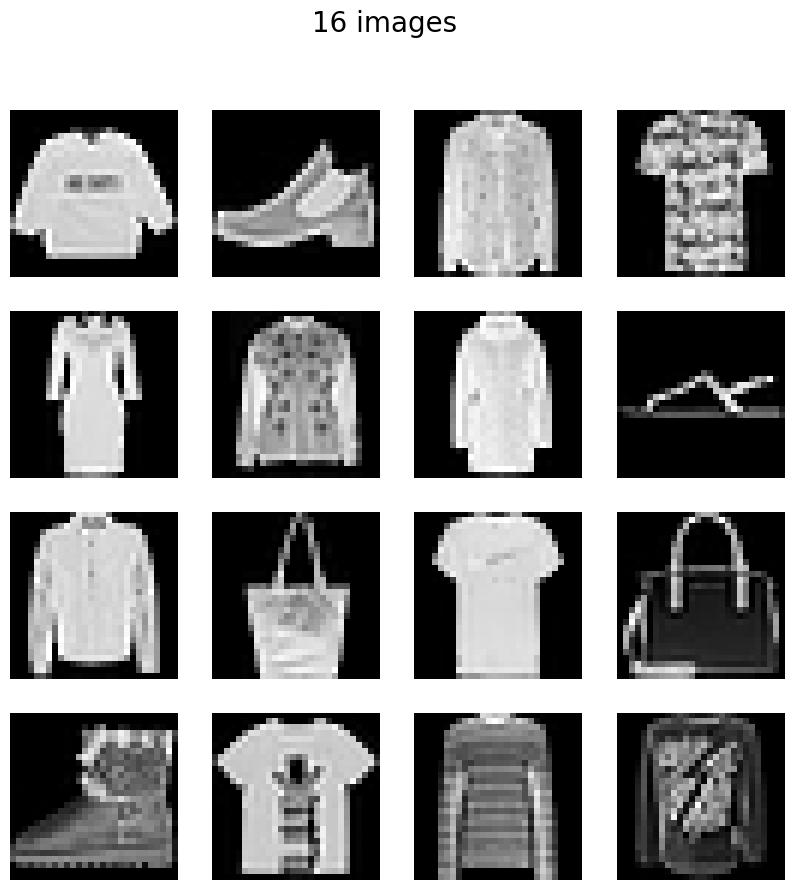

In [ ]:
fig , axes = plt.subplots(4,4,figsize=(10,10))
fig.suptitle("16 images" , fontsize=20)


for i , ax in enumerate(axes.flat):
  ax.imshow(df.iloc[i,1:].values.reshape(28,28) , cmap='gray')
  ax.axis('off')

plt.show()


In [ ]:
X = df.iloc[:,1:].values
Y = df.iloc[:,0].values


In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=42)

In [ ]:
#scaling
X_train = X_train / 255.0
X_test = X_test / 255.0


In [ ]:
#custom dataclass
class CustomDataset(Dataset):
  def __init__(self,features , labels):

    self.features = torch.tensor(features, dtype=torch.float32)
    self.labels = torch.tensor(labels,dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,idx):
    return self.features[idx] , self.labels[idx]

In [ ]:
#dataset objects
train_dataset = CustomDataset(X_train , y_train)
test_dataset = CustomDataset(X_test , y_test)

In [ ]:
#dataset loader
train_loader = DataLoader(train_dataset , batch_size=64 , shuffle=True)
test_loader = DataLoader(test_dataset , batch_size=64 , shuffle=False)

In [ ]:
class MyNN(nn.Module):

  def __init__(self, num_features):

    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features, 128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(128, 64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Dropout(0.3),
        nn.Linear(64, 10)
    )

  def forward(self, x):

    return self.model(x)

In [ ]:
epochs = 100
lr = 0.1

In [ ]:
model = MyNN(X_train.shape[1])
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters() , lr=lr , weight_decay=1e-4)

In [ ]:
# training loop

for epoch in range(epochs):

  total_epoch_loss = 0

  for batch_features, batch_labels in train_loader:

    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

    # forward pass
    outputs = model(batch_features)

    # calculate loss
    loss = criterion(outputs, batch_labels)

    # back pass
    optimizer.zero_grad()
    loss.backward()

    # update grads
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')


Epoch: 1 , Loss: 0.6217124240795772
Epoch: 2 , Loss: 0.47765829918781916
Epoch: 3 , Loss: 0.44052891196807226
Epoch: 4 , Loss: 0.4175522489945094
Epoch: 5 , Loss: 0.3963773128390312
Epoch: 6 , Loss: 0.3860556940038999
Epoch: 7 , Loss: 0.37696322043736774
Epoch: 8 , Loss: 0.3649848558306694
Epoch: 9 , Loss: 0.35471203420559566
Epoch: 10 , Loss: 0.3486104239821434
Epoch: 11 , Loss: 0.3390483893553416
Epoch: 12 , Loss: 0.33653054177761077
Epoch: 13 , Loss: 0.32959227105975153
Epoch: 14 , Loss: 0.3223282554546992
Epoch: 15 , Loss: 0.3206218761404355
Epoch: 16 , Loss: 0.31612114823857945
Epoch: 17 , Loss: 0.31125569200515746
Epoch: 18 , Loss: 0.3040569431086381
Epoch: 19 , Loss: 0.2978813555339972
Epoch: 20 , Loss: 0.2965162538588047
Epoch: 21 , Loss: 0.29667319563031197
Epoch: 22 , Loss: 0.29200968125462534
Epoch: 23 , Loss: 0.2900175116757552
Epoch: 24 , Loss: 0.2855098560750485
Epoch: 25 , Loss: 0.2864794345696767
Epoch: 26 , Loss: 0.2817607451279958
Epoch: 27 , Loss: 0.2780035175482432


In [ ]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)
    outputs = model(batch_features)
    _, predicted = torch.max(outputs.data, 1)
    total += batch_labels.shape[0]
    correct += (predicted == batch_labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy}')

Accuracy: 89.10833333333333


In [ ]:
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in train_loader:
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)
    outputs = model(batch_features)
    _, predicted = torch.max(outputs.data, 1)
    total += batch_labels.shape[0]
    correct += (predicted == batch_labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy}')

Accuracy: 95.15


CNN

In [ ]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader , Dataset
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
torch.random.manual_seed(42)


In [ ]:
#check for gpu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
df = pd.read_csv('./fashion-mnist_train.csv')
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


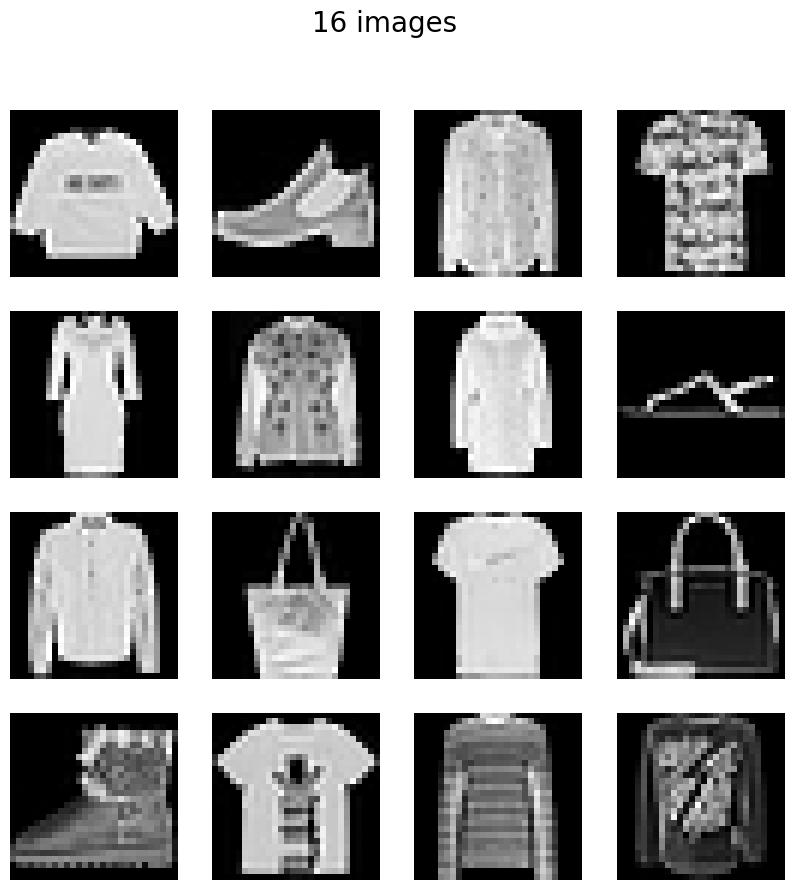

In [ ]:
fig , axes = plt.subplots(4,4,figsize=(10,10))
fig.suptitle("16 images" , fontsize=20)


for i , ax in enumerate(axes.flat):
  ax.imshow(df.iloc[i,1:].values.reshape(28,28) , cmap='gray')
  ax.axis('off')

plt.show()


In [ ]:
X = df.iloc[:,1:].values
Y = df.iloc[:,0].values


In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X , Y , test_size=0.2 , random_state=42)

In [ ]:
#scaling
X_train = X_train / 255.0
X_test = X_test / 255.0


In [ ]:
#custom dataclass
class CustomDataset(Dataset):
  def __init__(self,features , labels):

    self.features = torch.tensor(features, dtype=torch.float32).reshape(-1,1,28,28)
    self.labels = torch.tensor(labels,dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,idx):
    return self.features[idx] , self.labels[idx]

In [ ]:
train_dataset = CustomDataset(X_train , y_train)
test_dataset = CustomDataset(X_test , y_test)

In [ ]:
train_loader = DataLoader(train_dataset , batch_size=32 , shuffle=True , pin_memory=True)
test_loader = DataLoader(test_dataset , batch_size=32 , shuffle=False , pin_memory=True)

In [ ]:
class myCnn(nn.Module):
  def __init__(self, input_features):
    super().__init__()
    self.features = nn.Sequential(
            nn.Conv2d(input_features, 32, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(32, 64, kernel_size=3, padding='same'),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
    self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64*7*7, 128),
            nn.ReLU(),
            nn.Dropout(p=0.4),

            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(p=0.4),

            nn.Linear(64, 10)
        )

  def forward(self,x):
    x = self.features(x)
    x = self.classifier(x)
    return x

In [ ]:
epoch = 100
lr = 0.01

In [ ]:
model = myCnn(1)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters() , lr=lr , weight_decay=1e-4)

In [ ]:
#training loop
for epoch in range(epochs):
  total_epoch_loss = 0
  for batch_features, batch_labels in train_loader:
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)

    outputs = model(batch_features)
    loss = criterion(outputs, batch_labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_epoch_loss = total_epoch_loss + loss.item()

  avg_loss = total_epoch_loss/len(train_loader)
  print(f'Epoch: {epoch + 1} , Loss: {avg_loss}')

Epoch: 1 , Loss: 0.6446416090031465
Epoch: 2 , Loss: 0.3854789650092522
Epoch: 3 , Loss: 0.3261624842410286
Epoch: 4 , Loss: 0.2898130279009541
Epoch: 5 , Loss: 0.2641706403295199
Epoch: 6 , Loss: 0.24393793313205242
Epoch: 7 , Loss: 0.22898228433107337
Epoch: 8 , Loss: 0.21174805644154548
Epoch: 9 , Loss: 0.20269228491062918
Epoch: 10 , Loss: 0.19151744717825203
Epoch: 11 , Loss: 0.17643593377557892
Epoch: 12 , Loss: 0.16762221748754383
Epoch: 13 , Loss: 0.1577320547889297
Epoch: 14 , Loss: 0.14800533794891088
Epoch: 15 , Loss: 0.14336952251630525
Epoch: 16 , Loss: 0.1320260492308686
Epoch: 17 , Loss: 0.125210500494577
Epoch: 18 , Loss: 0.12011501793035617
Epoch: 19 , Loss: 0.1113497342178598
Epoch: 20 , Loss: 0.10760021600072893
Epoch: 21 , Loss: 0.10120680350577459
Epoch: 22 , Loss: 0.09583757752288753
Epoch: 23 , Loss: 0.09336324287593986
Epoch: 24 , Loss: 0.0865382361613835
Epoch: 25 , Loss: 0.08526746781352752
Epoch: 26 , Loss: 0.07995701612660196
Epoch: 27 , Loss: 0.081051403307

In [ ]:
total = 0
correct = 0

with torch.no_grad():
  for batch_features, batch_labels in test_loader:
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)
    outputs = model(batch_features)
    _, predicted = torch.max(outputs.data, 1)
    total += batch_labels.shape[0]
    correct += (predicted == batch_labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy: {accuracy}')


Accuracy: 91.75833333333334


VGG16
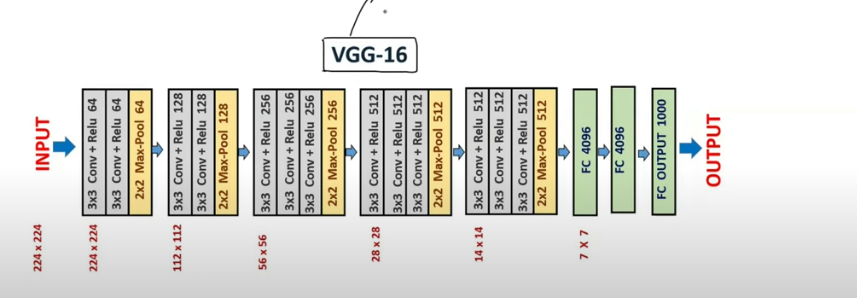

In [ ]:
#-----------------------------

RNN

In [ ]:
import pandas as pd

df = pd.read_csv('./100_Unique_QA_Dataset.csv')
df.head()

,question,answer
0,What is the capital of France?,Paris
1,What is the capital of Germany?,Berlin
2,Who wrote 'To Kill a Mockingbird'?,Harper-Lee
3,What is the largest planet in our solar system?,Jupiter
4,What is the boiling point of water in Celsius?,100


In [ ]:
#tokenize
def tokenize(text):
  text = text.lower()
  text = text.replace("?","")
  text = text.replace(".","")
  text = text.replace(",","")
  text = text.replace("!","")
  words = text.split()
  return words

In [ ]:
#vocabulary
vocal = { '<UNK>': 0}

In [ ]:
def build_vocab(row):
  tokenized_question = tokenize(row['question'])
  tokenized_answer = tokenize(row['answer'])

  merged_token = tokenized_question + tokenized_answer
  for token in merged_token:
    if token not in vocal:
      vocal[token] = len(vocal)

In [ ]:
df.apply(build_vocab, axis=1)

,0
0,None
1,None
2,None
3,None
4,None
...,...
85,None
86,None
87,None
88,None


In [ ]:
vocal

{'<UNK>': 0,
 'what': 1,
 'is': 2,
 'the': 3,
 'capital': 4,
 'of': 5,
 'france': 6,
 'paris': 7,
 'germany': 8,
 'berlin': 9,
 'who': 10,
 'wrote': 11,
 "'to": 12,
 'kill': 13,
 'a': 14,
 "mockingbird'": 15,
 'harper-lee': 16,
 'largest': 17,
 'planet': 18,
 'in': 19,
 'our': 20,
 'solar': 21,
 'system': 22,
 'jupiter': 23,
 'boiling': 24,
 'point': 25,
 'water': 26,
 'celsius': 27,
 '100': 28,
 'painted': 29,
 'mona': 30,
 'lisa': 31,
 'leonardo-da-vinci': 32,
 'square': 33,
 'root': 34,
 '64': 35,
 '8': 36,
 'chemical': 37,
 'symbol': 38,
 'for': 39,
 'gold': 40,
 'au': 41,
 'which': 42,
 'year': 43,
 'did': 44,
 'world': 45,
 'war': 46,
 'ii': 47,
 'end': 48,
 '1945': 49,
 'longest': 50,
 'river': 51,
 'nile': 52,
 'japan': 53,
 'tokyo': 54,
 'developed': 55,
 'theory': 56,
 'relativity': 57,
 'albert-einstein': 58,
 'freezing': 59,
 'fahrenheit': 60,
 '32': 61,
 'known': 62,
 'as': 63,
 'red': 64,
 'mars': 65,
 'author': 66,
 "'1984'": 67,
 'george-orwell': 68,
 'currency': 69,
 '

In [ ]:
#numerical
def text_To_index(text,vocab):

  indexed_text= []

  for token in tokenize(text):
    if token in vocab:
      indexed_text.append(vocab[token])
    else:
      indexed_text.append(vocab['<UNK>'])

  return indexed_text


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

In [ ]:
class QADataset(Dataset):
  def __init__(self, df, vocab):
    self.df = df
    self.vocab = vocab

  def __len__(self):
    return len(self.df)

  def __getitem__(self, idx):
    row = self.df.iloc[idx]
    question = text_To_index(self.df.iloc[idx]['question'], self.vocab)
    answer = text_To_index(self.df.iloc[idx]['answer'], self.vocab)
    return torch.tensor(question), torch.tensor(answer)


In [ ]:
dataset = QADataset(df , vocal)

In [ ]:
dataloader = DataLoader(dataset, batch_size=1, shuffle=True)

In [ ]:
import torch.nn as nn

In [ ]:
class SimpleRNN(nn.Module):

  def __init__(self, vocab_size):
    super().__init__()
    self.embedding = nn.Embedding(vocab_size, embedding_dim=50)
    self.rnn = nn.RNN(50, 64, batch_first=True)
    self.fc = nn.Linear(64, vocab_size)

  def forward(self, question):
    embedded_question = self.embedding(question)
    hidden, final = self.rnn(embedded_question)
    output = self.fc(final.squeeze(0))

    return output

In [ ]:
lr = 0.001
epochs = 25

In [ ]:
model = SimpleRNN(len(vocal))
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [ ]:
# training loop

for epoch in range(epochs):

  total_loss = 0

  for question, answer in dataloader:

    optimizer.zero_grad()

    # forward pass
    output = model(question)

    # loss -> output shape (1,324) - (1)
    loss = criterion(output, answer[0])

    # gradients
    loss.backward()

    # update
    optimizer.step()

    total_loss = total_loss + loss.item()

  print(f"Epoch: {epoch+1}, Loss: {total_loss:4f}")

Epoch: 1, Loss: 524.684049
Epoch: 2, Loss: 453.582263
Epoch: 3, Loss: 374.529539
Epoch: 4, Loss: 315.288697
Epoch: 5, Loss: 265.552339
Epoch: 6, Loss: 218.362943
Epoch: 7, Loss: 175.743811
Epoch: 8, Loss: 137.526896
Epoch: 9, Loss: 106.021365
Epoch: 10, Loss: 80.755272
Epoch: 11, Loss: 62.532500
Epoch: 12, Loss: 48.563413
Epoch: 13, Loss: 38.671985
Epoch: 14, Loss: 31.421365
Epoch: 15, Loss: 25.644659
Epoch: 16, Loss: 21.337724
Epoch: 17, Loss: 17.801106
Epoch: 18, Loss: 15.164007
Epoch: 19, Loss: 13.086058
Epoch: 20, Loss: 11.209153
Epoch: 21, Loss: 9.780879
Epoch: 22, Loss: 8.645444
Epoch: 23, Loss: 7.621565
Epoch: 24, Loss: 6.784401
Epoch: 25, Loss: 6.084599


In [ ]:
def predict(model, question, threshold=0.5):

  # convert question to numbers
  numerical_question = text_To_index(question, vocal)

  # tensor
  question_tensor = torch.tensor(numerical_question).unsqueeze(0)

  # send to model
  output = model(question_tensor)

  # convert logits to probs
  probs = torch.nn.functional.softmax(output, dim=1)

  # find index of max prob
  value, index = torch.max(probs, dim=1)

  if value < threshold:
    print("I don't know")

  print(list(vocal.keys())[index])

In [ ]:
predict(model, " boiling")

I don't know
china


LSTM

In [2]:
!pip install nltk

In [3]:
import nltk
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader , Dataset
from collections import Counter
from nltk.tokenize import word_tokenize
import numpy as np

In [4]:
document = '''About Data Science Mentorship Program

What is the course fee for  Data Science Mentorship Program (DSMP 2.0)
The total course fee for the DSMP course is Rs 10,600. This includes the fee for both DSMP 1.0 and DSMP 2.0

What is the total duration of the course?
The total duration of the course is about 6-8 months.

Are Deep Learning and NLP a part of the DSMP 2.0  course?
No, NLP and Deep Learning both are not a part of this program’s curriculum.

What if I miss a live session? Will I get a recording of the session?
Yes, all our sessions are recorded, so even if you miss a session you can login into our portal and watch the recording as per your convenience.

Where can I find the class schedule?
You will find the class schedule in your course dashboard once you enroll for the course.

What is the time duration of all the live sessions?
Roughly, all the sessions last 2 hours.


What is the language spoken by the instructor during the sessions?
Hinglish.

How will I be informed about the upcoming class?
You will get mail from our side before every session once you enroll in the course.

Can I do this course if I am from a non-tech background?
Yes, absolutely. However, you’ll need to be consistent.

I am late, can I join the program in the middle?
Absolutely, you can join the program any time.

If I join/pay in the middle, will I be able to see all the past lectures?
Yes, once you’re enrolled in the course, you will be able to see all the past content in your dashboard.

Where do I have to submit the task?
You don’t have to submit the task. We will provide you with the solutions, you have to self evaluate the task yourself.

Will we do case studies in the program?
Yes, there are 5 end to end case studies and multiple smaller projects.

Do we offer any student discounts or promo codes?
We do offer discounts on our courses a few times a year, and we announce them through our social media channels.

On how many devices can I watch the videos simultaneously?
You can watch the videos on one device at a time.



Do you provide notes for the lectures?
We do not provide notes for our lectures. We encourage students to make their own notes as it aids in study retention.

What is the difference between being a paid member on your YouTube channel and your website?
While the content on our YouTube channel and website is similar, enrolling through our website offers additional benefits such as doubt clearance support and access to an exclusive community of learners on Discord and more.

Do I get access to your YouTube channel as a paid member after enrolling through your website?
No, the YouTube channel membership is separate from what we offer on our website.

Is there any upcoming batch for the Data Science Mentorship Program?
Currently, we do not have any plans to launch a new batch for DSMP. However, all previous lectures are available as recordings, allowing you to learn at your own pace.

Do you provide doubt clearance for the projects uploaded on CampusX YouTube channel?
We do not provide doubt clearance for any of our videos or projects uploaded on YouTube. However, you can ask your doubts in our Discord channel or in the comments section.






Payment/Registration related questions

Where do we have to make our payments? Your YouTube channel or website?
You have to make all your monthly payments on our website. Here is the link for our website - https://learnwith.campusx.in/

What if I don’t like the course after making the payment? What is the refund policy?
You get a 7 days refund period from the day you have made the payment. To apply for refund, send us an email at support@campusx.in

I am living outside India and I am not able to make the payment on the website. What should I do?
You can contact us by sending a mail at support@campusx.in

I am from Pakistan and I am unable to make the payment?
We currently do not have the option to accept payment from Pakistan directly. If you’d still like to enroll for the course, you may ask a friend or family member living outside Pakistan to make the fee payment on your behalf. If you’d like to proceed with manual enrollment, please contact us at support@campusx.in, and we’ll provide you with further instructions.

Do you accept PayPal as a payment method?
Yes, we do. Please contact us at support@campusx.in for more details on using PayPal for payment.

I cannot pay the DSMP 2.0 fee as a one-time payment, is there any way to make a payment in installments?
At the moment, we do not have a monthly payment plan for the DSMP 2.0 course. However, if you have financial constraints, you can enroll in DSMP 1.0 by paying 799/- a month. Once you complete the course, you may apply for a discount coupon from the website.


Post registration queries

Till when can I view the paid videos on the website?
You can watch the videos till your subscription is valid, that is 3 years from the date of purchase for DSMP 2.0 and 2 years for DSMP 1.0

Why is lifetime validity not provided?
Because of the low course fee.

Do you assist with personal projects?
We do not provide support for personal projects due to time constraints and current commitments.

Where can I reach out in case of a doubt after the session?
You will have to fill a google form provided in your dashboard and our team will contact you for a 1 on 1 doubt clearing session.



If I join the program late, can I still ask past week doubts?
Yes, just select “past week's doubt” in the doubt clearance google form.

What is the validity of Doubt Support?
You will get doubt support for 1 year from the data of registration.



Certificate and Placement Assistance related queries

What is the criteria to get the certificate?
There are 2 criterias:
You have to pay the entire fee of Rs 10,600
You have to attempt all the course assessments.

I have read that Job Preparation is a part of this program. What comes under Job Preparation?
This is to clarify that Job Preparation does not mean Placement guarantee. We don't guarantee our learners any jobs or for that matter even interview calls. If you are planning to join this course just for placements, we’re afraid that this course might not be the best for you.

Here is what comes under Job Preparation
Portfolio Building sessions.
Interview Questions.
Sessions with industry mentors.
Discussion on Job hunting strategies.


'''

In [5]:
#tokenization
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [54]:
document = '''
Instagram

sisira k
𝖠𝗇𝖺𝗌
You sent an attachment.
Happy married life
hesi_dipdop
https://www.instagram.com/reel/DFkFyH9MzXi/?id=3558995040278885858_64641890905
Mar 29, 2025 1:37 am
sisira k
Fffaaxx
Mar 28, 2025 10:58 pm
sisira k
Reacted 🤠 to your message
Mar 28, 2025 10:58 pm
sisira k
Yea nah
Mar 28, 2025 10:58 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
mylifeisupsetting
https://www.instagram.com/p/DHuHmb0yeWO/
Mar 28, 2025 10:43 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
tushmaxinh
https://www.instagram.com/reel/DHq5ybqTOzZ/?id=3596941406734445785_67837577853
🤠sisira k
Mar 28, 2025 3:43 pm
𝖠𝗇𝖺𝗌
Idk. Don't take my liked reels srsly they will confuse u
Mar 28, 2025 3:37 pm
sisira k
U still the one pissing me off
Mar 28, 2025 8:01 am
sisira k
AYO WHY YO BITCHASS LIKE THIS SHI-
Mar 28, 2025 8:00 am
sisira k
sisira sent an attachment.
🖤🖤🖤 — #rich #lifestyle #academicsuccess #gay #lgbt #bi #aesthetic #gaylove #dream #successful #wealth #study #intelligent #smart #academicvalidation
amuxnii
https://www.instagram.com/reel/DHnWLSSqVoP/?id=3595940360056560143_70592051174
Mar 28, 2025 8:00 am
𝖠𝗇𝖺𝗌
except today with cap i never hit u , u r the one hitting "KODATA" me😭
Mar 28, 2025 6:19 am
𝖠𝗇𝖺𝗌
real
Mar 28, 2025 6:18 am
sisira k
sisira sent an attachment.
We always starting something #friendship #funny #reelsviral
jaychapn
https://www.instagram.com/reel/DGjlrVft_SO/?id=3576868234801443982_4988100971
Mar 28, 2025 6:10 am
sisira k
sisira sent an attachment.
Ulte jawaab dene aate hai chahiye to😂😂😂 TAG YOUR GIRL GANG!!!! #instagramreels #trending #trendingreels #explorepage #viral #relatable #relatablereels
d_shha
https://www.instagram.com/reel/DHqzAOsK_j2/?id=3596911568554293494_7289904591
Mar 28, 2025 4:08 am
sisira k
Fffaaxx
Mar 27, 2025 7:42 am
sisira k
Reacted 🤠 to your message
Mar 27, 2025 7:42 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Hmara khel khatam h ab😒 . No problem! Here’s the information about the Gromov-Witten Invariants in String Theory ✨🌌 🔹 What Are Gromov-Witten Invariants? Gromov-Witten (GW) invariants are mathematical tools used to count the number of curves (like loops or surfaces) that can exist in a given geometry, especially in Calabi-Yau spaces. They are central to studying string theory compactifications 📐🌀. 🔹 Role in String Theory: 1️⃣ Curve Counting: GW invariants count the possible holomorphic curves in the extra dimensions of string theory. These curves contribute to the physical properties of compactified models 🌐➰. 2️⃣ Mirror Symmetry: In mirror symmetry, GW invariants of one Calabi-Yau space correspond to simpler computations on its “mirror” space, enabling practical calculations for string compactifications 🔄✨. 3️⃣ String Scattering Amplitudes: GW invariants help compute string scattering amplitudes by encoding information about the geometry of compactified dimensions and their interactions 🪐🔬. 🔹 Why It’s Important: These invariants provide a bridge between physics and geometry, allowing string theorists to predict physical phenomena by solving complex geometric problems. They also deepen our understanding of the mathematical structures underlying string theory 🔗💡. ✨ QUIZ TIME ✨ What do Gromov-Witten invariants count? a) The number of holomorphic curves in compactified spaces 🔄 b) The number of particles in the Standard Model 🧪 c) The amount of dark energy in the universe 🌌
mishra_memes888
https://www.instagram.com/reel/DGx1e6qTgzI/?id=3580878399772429512_66995566932
🤠sisira k
Mar 27, 2025 4:37 am
𝖠𝗇𝖺𝗌
Yayy 🔥🔥life is temporary memes are permanent
Mar 26, 2025 11:06 pm
sisira k
sisira sent an attachment.
girlyyrelatable
https://www.instagram.com/p/DHUJV-0NEDT/?carousel_share_child_media_id=3590535615247478680_46160905153
Mar 26, 2025 6:48 pm
sisira k
Riyal😃☝️
Mar 26, 2025 9:39 am
𝖠𝗇𝖺𝗌
You sent an attachment.
memegod
https://www.instagram.com/p/DHcB0jERLfj/
Mar 26, 2025 8:52 am
sisira k

😂𝖠𝗇𝖺𝗌
Mar 25, 2025 11:06 pm
𝖠𝗇𝖺𝗌
Adi aem special ledu
Mar 25, 2025 11:03 pm
sisira k
Eyy anna telugu🔥🔥
Mar 25, 2025 10:48 pm
𝖠𝗇𝖺𝗌
Ni kante takku
Mar 25, 2025 10:47 pm
sisira k
Topperssss😃😃😃😃☝️☝️☝️☝️☝️
Mar 25, 2025 9:41 pm
𝖠𝗇𝖺𝗌
But I love etqm class it's like brainstorming
Mar 25, 2025 9:40 pm
𝖠𝗇𝖺𝗌
Real
Mar 25, 2025 9:40 pm
sisira k
I'm so sleepyyy😭😭😭
Mar 25, 2025 9:26 pm
sisira k
Wat iz this shitadd class bro
Mar 25, 2025 9:26 pm
sisira k
😔😔🙏
Mar 25, 2025 9:26 pm
𝖠𝗇𝖺𝗌
Em paper rick rolled us
Mar 25, 2025 8:45 pm
𝖠𝗇𝖺𝗌
Never gonna give you up, never gonna let you down
Mar 25, 2025 8:44 pm
sisira k
😭😭🙏🙏 ended me fr
Mar 25, 2025 8:23 pm
𝖠𝗇𝖺𝗌
Em question paper after looking at us : sigma boi sigma boi🔥🔥
Mar 25, 2025 8:22 pm
sisira k
sisira sent an attachment.
we will NOT be leaving sigma boy in 2024
coolmathgames
https://www.instagram.com/reel/DEVxZQ7yLAx/?id=3536950322818232369_18501365306
Mar 25, 2025 8:03 pm
𝖠𝗇𝖺𝗌
yaa gn
Mar 25, 2025 9:02 am
sisira k
Ok well gn
Mar 25, 2025 9:01 am
sisira k
Most probably
Mar 25, 2025 9:01 am
𝖠𝗇𝖺𝗌
maybe to vanika or sum girl
Mar 25, 2025 9:01 am
sisira k
🤘🤘
Mar 25, 2025 9:00 am
𝖠𝗇𝖺𝗌
reputation guys
Mar 25, 2025 9:00 am
sisira k
Dayum
Mar 25, 2025 9:00 am
𝖠𝗇𝖺𝗌
i woke in bus to get down my stop , i saw bro's phone with big big parahs
Mar 25, 2025 9:00 am
sisira k
He won't admit it
Mar 25, 2025 9:00 am
sisira k
Reality is
He is stuck in the talking stage coz he knows she don't want him
Mar 25, 2025 9:00 am
𝖠𝗇𝖺𝗌
sometimes no she is jst frnd
Mar 25, 2025 8:59 am
𝖠𝗇𝖺𝗌
sometime he says he has
Mar 25, 2025 8:59 am
𝖠𝗇𝖺𝗌
yaa
Mar 25, 2025 8:59 am
sisira k
He fs has like infinite talking stages but like idk
Mar 25, 2025 8:59 am
sisira k
Honestly, no
Mar 25, 2025 8:58 am
𝖠𝗇𝖺𝗌
do u think he has gf?
Mar 25, 2025 8:58 am
𝖠𝗇𝖺𝗌
tausif mentality
Mar 25, 2025 8:58 am
sisira k
Chandra babu inspires by tausif😩😩🙏
Mar 25, 2025 8:58 am
sisira k
Yea obviously
Mar 25, 2025 8:57 am
sisira k
sisira sent an attachment.
saaaar 🛐 #telugumemes #telugu
69onyx
https://www.instagram.com/reel/DHmSp4Azvs-/?id=3595643394980772670_70054678945
Mar 25, 2025 8:57 am
𝖠𝗇𝖺𝗌
ok BITCH we talked nthng abt him
Mar 25, 2025 8:57 am
sisira k
Point point
Mar 25, 2025 8:56 am
𝖠𝗇𝖺𝗌
those ppl doesnot know him that's it
Mar 25, 2025 8:56 am
sisira k
Who hurt u mf
Mar 25, 2025 8:56 am
sisira k
Like I wat to study their personalitu
Mar 25, 2025 8:56 am
sisira k
I genuinely want to know who likes this guy
Mar 25, 2025 8:55 am
sisira k
YYA-I MEAN no
Mar 25, 2025 8:55 am
𝖠𝗇𝖺𝗌
😀
Mar 25, 2025 8:55 am
sisira k
🤣🤣🤣🤣🤣
Mar 25, 2025 8:55 am
sisira k
Oh tausifs other id aa
Mar 25, 2025 8:55 am
𝖠𝗇𝖺𝗌
"LAVDLA TAUSIF GADU"
Mar 25, 2025 8:55 am
sisira k
Bru wat
Mar 25, 2025 8:54 am
𝖠𝗇𝖺𝗌
in eng class , some guys sitting behind me was abusing him for creting another insta acc
Mar 25, 2025 8:54 am
sisira k
🙏🙏🙏
Mar 25, 2025 8:53 am
𝖠𝗇𝖺𝗌
nah , he is fun to mee😀
Mar 25, 2025 8:53 am
sisira k
Waste fr
Mar 25, 2025 8:52 am
sisira k
😭🙏
Mar 25, 2025 8:52 am
sisira k
Bro curve chosen akash
Mar 25, 2025 8:52 am
𝖠𝗇𝖺𝗌
peak delusion
Mar 25, 2025 8:52 am
sisira k
That's waaaattt
Mar 25, 2025 8:52 am
𝖠𝗇𝖺𝗌
and sathwik open up to this dumb ass abt love
Mar 25, 2025 8:52 am
sisira k
Reacted 💯 to your message
Mar 25, 2025 8:52 am
sisira k
They are almost opposites i wud say
Mar 25, 2025 8:51 am
𝖠𝗇𝖺𝗌
lesson : never believe him in this matters
💯sisira k
Mar 25, 2025 8:51 am
sisira k
Had one bro hand😭🙏
Mar 25, 2025 8:51 am
𝖠𝗇𝖺𝗌
help needs bro
Mar 25, 2025 8:51 am
sisira k
Akash is NOT. Like athreya
Mar 25, 2025 8:51 am
sisira k
Nah becoz wtf
Mar 25, 2025 8:51 am
𝖠𝗇𝖺𝗌
uk once he said akash and athreya are same type , and sisira wants this kind of boys only🤡🔫
Mar 25, 2025 8:50 am
sisira k
Wat acting like a creep bro i don't even talk to him specifically unless he starts itt😭😭
Mar 25, 2025 8:50 am
𝖠𝗇𝖺𝗌
after observing , i thot bro is lying
Mar 25, 2025 8:49 am
sisira k
Also me during that Era : athreya love of my life 😩😩🙏
Mar 25, 2025 8:49 am
sisira k
Girl what-
Mar 25, 2025 8:48 am
𝖠𝗇𝖺𝗌
he was like - sisira madly wants akash , she acts like creep arnd him
Mar 25, 2025 8:48 am
sisira k
Nah💀💀
Mar 25, 2025 8:48 am
sisira k
Now it's a lot better like
We actually talk 😭🤌
Mar 25, 2025 8:48 am
sisira k
No wonder why bro avoided me like the plague
Mar 25, 2025 8:47 am
𝖠𝗇𝖺𝗌
i thot it was real , mb
Mar 25, 2025 8:47 am
𝖠𝗇𝖺𝗌
uk intial days bro was advertising u with akash
Mar 25, 2025 8:47 am
𝖠𝗇𝖺𝗌
real
Mar 25, 2025 8:47 am
sisira k
Bros reputation gone
Mar 25, 2025 8:47 am
sisira k
Wait till whatever happened today gets out of our circle
Mar 25, 2025 8:47 am
sisira k
🙏🙏
Mar 25, 2025 8:46 am
𝖠𝗇𝖺𝗌
nah dont think beyond now
Mar 25, 2025 8:46 am
sisira k
Real wtf
Mar 25, 2025 8:46 am
𝖠𝗇𝖺𝗌
that MF advertise us everywhere fck him
Mar 25, 2025 8:46 am
sisira k
😭😭😭 it'll be such a mess-
Mar 25, 2025 8:46 am
𝖠𝗇𝖺𝗌
how i can't imagine😭😭
Mar 25, 2025 8:45 am
sisira k
No the fact that bro even thinks we are a thing🤡🤡🤡bech wff
Mar 25, 2025 8:45 am
sisira k
Dumb ahh
Mar 25, 2025 8:45 am
sisira k
I shudnt act triggered and instead actually think before speaking😃✌️
Mar 25, 2025 8:45 am
𝖠𝗇𝖺𝗌
bro's only argument is my drop year or ship wiht u 🤡
Mar 25, 2025 8:44 am
𝖠𝗇𝖺𝗌
that's tru
Mar 25, 2025 8:44 am
sisira k
I am dumb I speak before thinking
Ez target for fighting
Mar 25, 2025 8:44 am
sisira k
Exactly
Mar 25, 2025 8:43 am
sisira k
Arey
He knows he can't win against h
Mar 25, 2025 8:43 am
𝖠𝗇𝖺𝗌
cuz he can't
Mar 25, 2025 8:43 am
𝖠𝗇𝖺𝗌
uk he fights with u but not wiht me
Mar 25, 2025 8:43 am
sisira k
🤘🤘🤘
Mar 25, 2025 8:43 am
𝖠𝗇𝖺𝗌
real
Mar 25, 2025 8:43 am
sisira k
Bro gave up
Mar 25, 2025 8:43 am
𝖠𝗇𝖺𝗌
later i showed him my tru colors
Mar 25, 2025 8:42 am
𝖠𝗇𝖺𝗌
AHHH
Mar 25, 2025 8:42 am
sisira k
Ai like your flavour of ottism😃😃😃
Mar 25, 2025 8:42 am
sisira k
Bruh
Mar 25, 2025 8:41 am
𝖠𝗇𝖺𝗌
can't do with normal ppl
Mar 25, 2025 8:41 am
𝖠𝗇𝖺𝗌
do u have gf , want to make one, whom u r intrested in ......
Mar 25, 2025 8:41 am
sisira k
And that's y ur my homie :D
Mar 25, 2025 8:40 am
sisira k
No shif
Mar 25, 2025 8:40 am
𝖠𝗇𝖺𝗌
that's my language
Mar 25, 2025 8:40 am
sisira k
🤣🤣🤣
Mar 25, 2025 8:40 am
𝖠𝗇𝖺𝗌
initial days he was gaslighting me to make gf
Mar 25, 2025 8:40 am
sisira k
(Peak sarcasm)
Mar 25, 2025 8:40 am
sisira k
🙏🙏🙏
Mar 25, 2025 8:40 am
𝖠𝗇𝖺𝗌
YEEE
Mar 25, 2025 8:40 am
sisira k
DAM I WISH HE WOULD BREATHE IN MY DIRECTION😩😩🤞
Mar 25, 2025 8:39 am
𝖠𝗇𝖺𝗌
BRO IS SO COOL
Mar 25, 2025 8:39 am
sisira k
💪💪
Mar 25, 2025 8:39 am
sisira k
Ayyy
Mar 25, 2025 8:39 am
𝖠𝗇𝖺𝗌
he also makes fun of him
Mar 25, 2025 8:39 am
sisira k
Match making club of cbit 🗣🗣🗣
Mar 25, 2025 8:39 am
𝖠𝗇𝖺𝗌
he is also us
Mar 25, 2025 8:39 am
𝖠𝗇𝖺𝗌
arnd normal ppl , bro will be like i will help u get this girl, did u talk to this girl
Mar 25, 2025 8:38 am
sisira k
Idk bout aryan
Mar 25, 2025 8:38 am
sisira k
Akash the only one who atleats acts like he listens tbh
Mar 25, 2025 8:38 am
𝖠𝗇𝖺𝗌
ah yes
Mar 25, 2025 8:38 am
sisira k
Persons**
Mar 25, 2025 8:38 am
𝖠𝗇𝖺𝗌
bro literally met the wrong person
Mar 25, 2025 8:38 am
𝖠𝗇𝖺𝗌
😂
Mar 25, 2025 8:37 am
sisira k
Not more than him🙏🙏
Mar 25, 2025 8:37 am
sisira k
That is becoz u roast him
He wants that
Arey man tausif I'm jelous of u ahh reaction
Mar 25, 2025 8:37 am
𝖠𝗇𝖺𝗌
i am tho
Mar 25, 2025 8:37 am
sisira k
Jokes on him ahaha😃😃😃
Mar 25, 2025 8:36 am
𝖠𝗇𝖺𝗌
he thinks i am EMOTIONALLY IMMATURE
Mar 25, 2025 8:36 am
𝖠𝗇𝖺𝗌
he tells abt his lyf but not any thing abt girls
Mar 25, 2025 8:35 am
sisira k
Ion know half ge shit uk about that mf
Mar 25, 2025 8:35 am
sisira k
Ah ok bro
Mar 25, 2025 8:35 am
𝖠𝗇𝖺𝗌
BFF's
Mar 25, 2025 8:35 am
𝖠𝗇𝖺𝗌
u know him better
Mar 25, 2025 8:35 am
sisira k
Rightt
Mar 25, 2025 8:35 am
𝖠𝗇𝖺𝗌
that's true when u think
Mar 25, 2025 8:34 am
sisira k
😈😈😈😈
Mar 25, 2025 8:34 am
sisira k
Once there's no reaction there's nothing for him
Mar 25, 2025 8:34 am
sisira k
He doesn't care about what is happening
He cares about our reaction to his bs
Mar 25, 2025 8:34 am
𝖠𝗇𝖺𝗌
now see how i roast him hahaa
Mar 25, 2025 8:34 am
sisira k
Exactly exactly
Mar 25, 2025 8:34 am
𝖠𝗇𝖺𝗌
nah u give a new perspective
Mar 25, 2025 8:33 am
sisira k
😃😃✌️
Mar 25, 2025 8:33 am
sisira k
Hence we fight every day
Mar 25, 2025 8:33 am
sisira k
That is his wanted reaction
I giv exact opposite of that
Mar 25, 2025 8:33 am
𝖠𝗇𝖺𝗌
u r not dumb
Mar 25, 2025 8:33 am
sisira k
Ahh
Mar 25, 2025 8:33 am
𝖠𝗇𝖺𝗌
damm good thought
Mar 25, 2025 8:33 am
sisira k
So others shud feel
Arey this guys life is so happening we are jealous of him that this
Mar 25, 2025 8:33 am
𝖠𝗇𝖺𝗌
and there are ppl like us in his lyf
Mar 25, 2025 8:32 am
sisira k
No see
He's fine with everything that's happening
He just says allat and whines about it for attention
Mar 25, 2025 8:32 am
sisira k
😭😭🙏
Mar 25, 2025 8:32 am
𝖠𝗇𝖺𝗌
this hppnd that happnd 😭😭
Mar 25, 2025 8:32 am
𝖠𝗇𝖺𝗌
he can't handle
Mar 25, 2025 8:31 am
sisira k
God knoss🙏🙏
Mar 25, 2025 8:31 am
sisira k
Bro wants to live 3 different movie plots in a span of 1 year
Mar 25, 2025 8:31 am
𝖠𝗇𝖺𝗌
one day bro wants to write bits , next he want to open company , nxt he wants to die , nxt he want to cry over a girl
Mar 25, 2025 8:31 am
sisira k
Ion trust him
Mar 25, 2025 8:30 am
sisira k
Sus mf he is
Mar 25, 2025 8:30 am
sisira k
Exactlyyy
Mar 25, 2025 8:30 am
𝖠𝗇𝖺𝗌
even he has same mood swings
Mar 25, 2025 8:30 am
sisira k
Exactly
Mar 25, 2025 8:30 am
𝖠𝗇𝖺𝗌
ahh make sense
Mar 25, 2025 8:29 am
sisira k
Bro is basically a pick me girl but a guy
Mar 25, 2025 8:29 am
𝖠𝗇𝖺𝗌
real
Mar 25, 2025 8:29 am
𝖠𝗇𝖺𝗌
isn't it what girls want
Mar 25, 2025 8:29 am
sisira k
That is an even bigger problem
Mar 25, 2025 8:29 am
sisira k
No he thinks he's cool doing allat
Mar 25, 2025 8:29 am
sisira k
That's what he wants, and as long as he's getting it he don't care
Mar 25, 2025 8:29 am
𝖠𝗇𝖺𝗌
even sathvik was laughing
Mar 25, 2025 8:29 am
sisira k
Attention
Mar 25, 2025 8:28 am
𝖠𝗇𝖺𝗌
and lie
Mar 25, 2025 8:28 am
𝖠𝗇𝖺𝗌
why he does stuff like that
Mar 25, 2025 8:28 am
sisira k
What why
Mar 25, 2025 8:28 am
sisira k
I'm lucky I found out about bros shenanigans
Mar 25, 2025 8:28 am
𝖠𝗇𝖺𝗌
but why why do like this
Mar 25, 2025 8:28 am
𝖠𝗇𝖺𝗌
bro is traumatized
Mar 25, 2025 8:27 am
sisira k
Also her : who iz tausif😃✌️
Mar 25, 2025 8:27 am
𝖠𝗇𝖺𝗌
bs
Mar 25, 2025 8:27 am
𝖠𝗇𝖺𝗌
she talks with me
Mar 25, 2025 8:27 am
𝖠𝗇𝖺𝗌
i talked to tanmayi yest only
Mar 25, 2025 8:27 am
sisira k
Waste fello
Mar 25, 2025 8:26 am
sisira k
Ay that bich
Mar 25, 2025 8:26 am
𝖠𝗇𝖺𝗌
and then there is tausif
Mar 25, 2025 8:26 am
sisira k
Makes sense becoz wtf
Mar 25, 2025 8:26 am
𝖠𝗇𝖺𝗌
he felt bad and never talked
Mar 25, 2025 8:26 am
𝖠𝗇𝖺𝗌
later she started ignoring
Mar 25, 2025 8:26 am
sisira k
🗣🗣🗣
Mar 25, 2025 8:25 am
𝖠𝗇𝖺𝗌
well done
Mar 25, 2025 8:25 am
sisira k
Ye😃 i forgor
Mar 25, 2025 8:25 am
𝖠𝗇𝖺𝗌
ah memory
Mar 25, 2025 8:25 am
sisira k
But like
Mar 25, 2025 8:25 am
sisira k
Over xhat or in person I dont remember
Mar 25, 2025 8:25 am
sisira k
Wait i think we spoke about it once
Mar 25, 2025 8:25 am
𝖠𝗇𝖺𝗌
just ask
Mar 25, 2025 8:24 am
sisira k
Like he will tell meh😔✌️
Mar 25, 2025 8:24 am
𝖠𝗇𝖺𝗌
u ask him what his type of girls are
Mar 25, 2025 8:24 am
sisira k
Dam wat-
Mar 25, 2025 8:23 am
𝖠𝗇𝖺𝗌
she is not his type tho
Mar 25, 2025 8:23 am
𝖠𝗇𝖺𝗌
yaa
Mar 25, 2025 8:23 am
sisira k
Tanmayi?
Mar 25, 2025 8:23 am
𝖠𝗇𝖺𝗌
i am talking abt type of girls
Mar 25, 2025 8:23 am
sisira k
No shit bro
Mar 25, 2025 8:22 am
sisira k
Ahaaa
Mar 25, 2025 8:22 am
sisira k
That mf ain't innocent
Mar 25, 2025 8:22 am
sisira k
Bro
He makes more dirty minded jokes than tausif ngl
Mar 25, 2025 8:22 am
𝖠𝗇𝖺𝗌
he might want be good frnds with her
Mar 25, 2025 8:22 am
𝖠𝗇𝖺𝗌
we are talking abt AKASH
Mar 25, 2025 8:22 am
sisira k
Oh crazy-
Mar 25, 2025 8:22 am
𝖠𝗇𝖺𝗌
i dont think he is that type of guy
Mar 25, 2025 8:21 am
sisira k
Maybe he did have a crush on her
Mar 25, 2025 8:21 am
sisira k
But like
Mar 25, 2025 8:21 am
sisira k
That i undsrstood
Mar 25, 2025 8:21 am
𝖠𝗇𝖺𝗌
bro(akash) had INFATUATION it seems (edited)
Mar 25, 2025 8:21 am
sisira k
Waht😭😭
Mar 25, 2025 8:20 am
𝖠𝗇𝖺𝗌
bro has INFATUATION it seems
Mar 25, 2025 8:20 am
𝖠𝗇𝖺𝗌
nah that guy gaslighted him
Mar 25, 2025 8:20 am
sisira k
Wen we have a crush
Mar 25, 2025 8:20 am
sisira k
Ye next level shit we do
Mar 25, 2025 8:20 am
sisira k
Papam poor fello
Ok but did he actually seriously like her tho
Mar 25, 2025 8:20 am
𝖠𝗇𝖺𝗌
Damn bro
Mar 25, 2025 8:20 am
sisira k
'Out of all the directions He cud cough in, He turned to MEEEE and coughed we are meant to b-'
Mar 25, 2025 8:19 am
𝖠𝗇𝖺𝗌
we hyped akash like that only
Mar 25, 2025 8:19 am
sisira k
'He passed by me faster which means he's shy to stay around m-'
Mar 25, 2025 8:19 am
𝖠𝗇𝖺𝗌
i thot girls dont care abt guys
Mar 25, 2025 8:19 am
𝖠𝗇𝖺𝗌
"she looked at me maybe she is intrested in me"
Mar 25, 2025 8:18 am
sisira k
😃✌️
Mar 25, 2025 8:18 am
sisira k
I thot only we are built delusional
Mar 25, 2025 8:18 am
sisira k
Crazyyy
Mar 25, 2025 8:18 am
𝖠𝗇𝖺𝗌
girls also do that??
Mar 25, 2025 8:18 am
𝖠𝗇𝖺𝗌
yaa
Mar 25, 2025 8:18 am
sisira k
Wait even guys think that?!?!
Mar 25, 2025 8:17 am
sisira k
Real real
Mar 25, 2025 8:17 am
𝖠𝗇𝖺𝗌
but bro is 10 levels above
Mar 25, 2025 8:17 am
𝖠𝗇𝖺𝗌
uk guys be like : she liked my story maybe she likes me
Mar 25, 2025 8:16 am
𝖠𝗇𝖺𝗌
ah
Mar 25, 2025 8:16 am
sisira k
Except like 5 6 I knoa
Mar 25, 2025 8:16 am
sisira k
Guys are mean and will hurt me
Mar 25, 2025 8:16 am
sisira k
Istg
Mar 25, 2025 8:15 am
sisira k
I learnt my lesson😔✌️
Mar 25, 2025 8:15 am
𝖠𝗇𝖺𝗌
prof lier
Mar 25, 2025 8:15 am
𝖠𝗇𝖺𝗌
not abt girls tho
Mar 25, 2025 8:15 am
sisira k
😭😭pls
Mar 25, 2025 8:15 am
𝖠𝗇𝖺𝗌
me too but in diff directions
Mar 25, 2025 8:14 am
sisira k
Ik I'm delusional but this dude on a whole another level
Mar 25, 2025 8:14 am
sisira k
To this extent aa😭😭
Mar 25, 2025 8:14 am
sisira k
I thot bro was fr all this time
(Does every girl think liek this-)
Mar 25, 2025 8:14 am
𝖠𝗇𝖺𝗌
those are delusions
Mar 25, 2025 8:14 am
𝖠𝗇𝖺𝗌
those are not lies
Mar 25, 2025 8:14 am
sisira k
No becoz genuinely wtf
Mar 25, 2025 8:13 am
sisira k
💅💅
Mar 25, 2025 8:13 am
𝖠𝗇𝖺𝗌
ah real
Mar 25, 2025 8:13 am
sisira k
foxadhd
https://media4.giphy.com/media/v1.Y2lkPTQyMzA0NmQwN3liNGVleG81bnI1cjh0aHB3MTl3cXljdXF4bnpkcGM3NTA0YmZpaiZlcD12MV9naWZzX2dpZklkJmN0PWc/q6gzszRDonw3u/200.gif
Mar 25, 2025 8:13 am
𝖠𝗇𝖺𝗌
idk why i predict this reel comming from you😎
Mar 25, 2025 8:12 am
sisira k
Mf : ohh tanmai yeee ik Herr blah blah
Mar 25, 2025 8:09 am
sisira k
Tanmai doesn't even know mf 😭🙏
Mar 25, 2025 8:09 am
sisira k
That girl revealed all of bros lies
Mar 25, 2025 8:09 am
sisira k
😭😭😭🙏😭🙏😭 2 seconds eye contact
Mar 25, 2025 8:09 am
sisira k
sisira sent an attachment.
- #tiktok #girls #hb #best #fyp
arunabaee
https://www.instagram.com/reel/DHfhT1dtJRN/?id=3593737526276559949_49280992664
😭𝖠𝗇𝖺𝗌
Mar 25, 2025 8:03 am
𝖠𝗇𝖺𝗌
how bro thinks girls react after seeing him
Mar 25, 2025 7:00 am
𝖠𝗇𝖺𝗌
You sent an attachment.
mushkil h . . . . #memes #explore #shitpost #indianmemes #foryou
the_real_zavaji
https://www.instagram.com/reel/DGvPXVBt13w/?id=3580147802605837808_58906551470
Mar 25, 2025 7:00 am
sisira k
😔✌️ that's me
Mar 25, 2025 5:35 am
𝖠𝗇𝖺𝗌
You sent an attachment.
nugget
https://www.instagram.com/p/DHhB-a5yCnX/?carousel_share_child_media_id=3594162656946824504_1468330069
Mar 25, 2025 5:35 am
sisira k
sisira sent an attachment.
Day 20 #onepiece #talkshow #elonmusk #tesla #cybertruck #memes #dayli #fyp #viral #instagram #reel #instaart #explorepage #animals #animalsofinstagram
rat_speakin_facts_daily
https://www.instagram.com/reel/DHfh-HCMPi9/?id=3593740431360325821_72692976621
👺𝖠𝗇𝖺𝗌
Mar 25, 2025 4:16 am
sisira k
Reacted 🙏 to your message
Mar 24, 2025 8:06 am
𝖠𝗇𝖺𝗌
💪💪
Mar 24, 2025 8:05 am
sisira k
sisira sent an attachment.
#schizoaffectivegf #memes #reels #real #trending #girlblog #based #schizoposting #schizo #foid #manbeater #explore
schizoaffectivegf_
https://www.instagram.com/reel/DHEY_KUPfZn/?id=3586101096814081639_72622350932
Mar 24, 2025 7:11 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Relatable @girlimjustinlove Credit: znbxt1v1n
girlimjustinlove
https://www.instagram.com/reel/DHWdNLdS-9O/?id=3591186201879244622_73218698132
🙏sisira k
Mar 24, 2025 6:27 am
sisira k
🤘🤘🤘
Mar 23, 2025 7:59 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Banana - - - - - 英语小教室 #抽象 #英语小教室 #囧架架囧囧架架囧 #發瘋 #提到了你 #偽人 #精神状态良好 #前摇过长 #啊啊啊啊啊啊啊啊啊 #哦爸
azks_n
https://www.instagram.com/reel/DFMhrF7SBoU/?id=3552362302924134932_69513682587
Mar 23, 2025 7:14 am
𝖠𝗇𝖺𝗌
Same for me 😀😀
Mar 23, 2025 12:52 am
sisira k
Me fr
Mar 23, 2025 12:06 am
sisira k
What are u talking about 😃😃
Mar 23, 2025 12:06 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Bro I literally can’t like bruh 😭 #bsd #bungostraydogs #bungostraydogsmemes #bungou_stray_dogs #fyodordostoyevsky #animememes #animememesdaily #animememe #memepage #memesdaily #explorepage #explorepage✨ #fypシ #fyp #fypage #reelsinstagram #reelsviral #reelsmemes #fypppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppp
auxxyumemes
https://www.instagram.com/reel/DEY_Qs8O8CG/?id=3537855731996541062_66103837689
Mar 22, 2025 11:11 pm
𝖠𝗇𝖺𝗌
Do your parents know your always hitting me😐
Mar 22, 2025 10:29 pm
sisira k
sisira sent an attachment.
🌚🌚 . Fallow 👉🏻@girlyypo . . #rubifatimaa #girlyypo #meme #explore #fyp #memepage #fypシ #instadaily #memepage #fypage #viralvideos #minions #funnyvideos #relatable #memeaccount #memepageant
rubiii.memee
https://www.instagram.com/p/DHfbfaENlaQ/
😭𝖠𝗇𝖺𝗌
Mar 22, 2025 8:27 pm
sisira k
Yes u are lucky :D
Mar 22, 2025 8:41 am
𝖠𝗇𝖺𝗌
Nah I am lucky that u didn't use saw or hammer on me when I pissed u😇
Mar 22, 2025 3:59 am
sisira k
Reacted 🤠 to your message
Mar 22, 2025 2:13 am
sisira k
Real (if I were a guy i just KNOW u wud beat the shit out of me)
Mar 22, 2025 2:13 am
𝖠𝗇𝖺𝗌
You sent an attachment.
When you sleep for too long… . . #backroomlevels #creepy #creepypasta #dreamcore #liminalspace #backrooms #backroomsentities #fyp
lightsoflife.see
https://www.instagram.com/reel/DHSx-wGzg_4/?id=3590151669508083704_72830474691
🤠sisira k
Mar 22, 2025 1:09 am
𝖠𝗇𝖺𝗌
Df internal ah?
Mar 21, 2025 9:42 pm
sisira k
sisira sent an attachment.
The tea can't wait and neither can the experiment 😅 #womeninstem #cluelesslabgirlies #gradschool #lablife #gradlife #science #sciencestruggles #besties
cluelesslabgirlies
https://www.instagram.com/reel/DG8sg-2RMXu/?id=3583935184032286190_63671695264
Mar 21, 2025 9:12 pm
sisira k
YASSS🗣🗣💪💪
Mar 21, 2025 3:14 am
𝖠𝗇𝖺𝗌
You sent an attachment.
haven’t seen twin in a year
pissed
https://www.instagram.com/p/DFJW_ylShK7/
Mar 21, 2025 2:57 am
sisira k
💪💪
Mar 20, 2025 4:45 am
𝖠𝗇𝖺𝗌
Till then try not kys
Mar 20, 2025 4:44 am
sisira k
U too
Mar 20, 2025 4:44 am
𝖠𝗇𝖺𝗌
Ok meet you tmrw
Mar 20, 2025 4:44 am
𝖠𝗇𝖺𝗌
😀
Mar 20, 2025 4:44 am
sisira k
😃🙏
Mar 20, 2025 4:43 am
sisira k
Unlike me
Mar 20, 2025 4:43 am
sisira k
Ah nono she the type to reject huys
Mar 20, 2025 4:43 am
𝖠𝗇𝖺𝗌
If she also starts means ....
Mar 20, 2025 4:43 am
𝖠𝗇𝖺𝗌
Oh nice
Mar 20, 2025 4:43 am
sisira k
She cud but not on this topic
Mar 20, 2025 4:43 am
𝖠𝗇𝖺𝗌
Is u r sister bitching with u?
Mar 20, 2025 4:42 am
sisira k
🙏🙏🙏
Mar 20, 2025 4:42 am
𝖠𝗇𝖺𝗌
Ahhhhh
Mar 20, 2025 4:42 am
sisira k
They were MAD
Mar 20, 2025 4:42 am
sisira k
Yesterfay was crazy
My sister fr said
Bitxh if u were available for them when they found out u wud be skinned alive
Mar 20, 2025 4:42 am
𝖠𝗇𝖺𝗌
Yayy
Mar 20, 2025 4:41 am
sisira k
For some reason
Every starting of the year is character development moment for me
Mar 20, 2025 4:41 am
sisira k
Classic life in the beginning of the year
Mar 20, 2025 4:40 am
𝖠𝗇𝖺𝗌
Ah sis is stucked from everywhere
Mar 20, 2025 4:40 am
sisira k
Anything except here pls😭🙏
Mar 20, 2025 4:40 am
sisira k
I can't stay home goddamn
Mar 20, 2025 4:40 am
sisira k
I have to
Mar 20, 2025 4:40 am
𝖠𝗇𝖺𝗌
U coming tmrw?
Mar 20, 2025 4:40 am
sisira k
God i need a break
Mar 20, 2025 4:39 am
𝖠𝗇𝖺𝗌
Damn
Mar 20, 2025 4:39 am
sisira k
He thinks I act an̈noyed for fun
Mar 20, 2025 4:39 am
𝖠𝗇𝖺𝗌
That's bad
Mar 20, 2025 4:39 am
sisira k
Worst part is, bro thinks I enjoy it
Mar 20, 2025 4:38 am
𝖠𝗇𝖺𝗌
U R NAME IS SISIRA K RIGHT
Mar 20, 2025 4:38 am
sisira k
Pls😭🙏
Mar 20, 2025 4:38 am
𝖠𝗇𝖺𝗌
And bro is constantly testing u
Mar 20, 2025 4:37 am
𝖠𝗇𝖺𝗌
It was on ur face
Mar 20, 2025 4:37 am
sisira k
Like near the stationary
Mar 20, 2025 4:37 am
sisira k
I fr wanted to cry
Mar 20, 2025 4:36 am
sisira k
I guessed 😃😃
Mar 20, 2025 4:36 am
sisira k
Even yesterday I was like in the same mood
That mf taysif non stop calling bugging
Mar 20, 2025 4:36 am
𝖠𝗇𝖺𝗌
Eg sir wud have eaten u alive
Mar 20, 2025 4:36 am
𝖠𝗇𝖺𝗌
Good decision
Mar 20, 2025 4:36 am
sisira k
Real
Mar 20, 2025 4:36 am
𝖠𝗇𝖺𝗌
Nah that's crzy
Mar 20, 2025 4:36 am
sisira k
Ye
Shit got so bad I decided not to show up today
Mar 20, 2025 4:36 am
sisira k
I did choke myself hit myself and sht but ye-
Mar 20, 2025 4:35 am
𝖠𝗇𝖺𝗌
Yest too?
Mar 20, 2025 4:35 am
𝖠𝗇𝖺𝗌
Only till thoughts
Mar 20, 2025 4:35 am
sisira k
Had a full blown breakdown
Mar 20, 2025 4:35 am
sisira k
Didn't actually try to but yea
Mar 20, 2025 4:35 am
sisira k
Like actually seriously
Mar 20, 2025 4:35 am
sisira k
Me? I wanted to kms yesterday
Mar 20, 2025 4:34 am
sisira k
Mmm
Mar 20, 2025 4:34 am
𝖠𝗇𝖺𝗌
I hid insta so that's not an issue
Mar 20, 2025 4:34 am
sisira k
Ohh
Mar 20, 2025 4:34 am
𝖠𝗇𝖺𝗌
My mother doesn't know what's app has archived feature
Mar 20, 2025 4:34 am
𝖠𝗇𝖺𝗌
Ah how are living rn?
Mar 20, 2025 4:34 am
sisira k
So there isn't a real problem from their pov
Mar 20, 2025 4:33 am
sisira k
That guy also I never physically touched him also
Even by mistake
I got REJECTED
Mar 20, 2025 4:33 am
sisira k
I don't do stupid shit also so ion mind
Mar 20, 2025 4:33 am
𝖠𝗇𝖺𝗌
Damn
Mar 20, 2025 4:32 am
sisira k
I don't even have a say here
Mar 20, 2025 4:32 am
sisira k
They have their fingerprints as password for my phone bro
Mar 20, 2025 4:32 am
𝖠𝗇𝖺𝗌
It gets more sus
Mar 20, 2025 4:32 am
𝖠𝗇𝖺𝗌
U can't say I won't show
Mar 20, 2025 4:32 am
𝖠𝗇𝖺𝗌
That's strict tho
Mar 20, 2025 4:32 am
sisira k
There's like 3 other guys but he only wants that one specific one
Mar 20, 2025 4:32 am
sisira k
My dad always keeps an eye on me and athreyas chat
Mar 20, 2025 4:31 am
𝖠𝗇𝖺𝗌
Ah
Mar 20, 2025 4:31 am
sisira k
They prolly read chats
Mar 20, 2025 4:31 am
sisira k
My sister told me like
Promise u won't tell anyone i told u but mom and dad know💀✌️
Mar 20, 2025 4:31 am
𝖠𝗇𝖺𝗌
How did u r parents come to know?
Mar 20, 2025 4:31 am
sisira k
My mom and dad💀💀💀
Mar 20, 2025 4:31 am
sisira k
Ur sister liked this guy itseems last yr
Bitch what less we did that this
Mar 20, 2025 4:31 am
𝖠𝗇𝖺𝗌
Who told them?
Mar 20, 2025 4:30 am
sisira k
They told my sister re😭😭
Mar 20, 2025 4:30 am
𝖠𝗇𝖺𝗌
How did u r sister knows?
Mar 20, 2025 4:30 am
sisira k
EXACTLY
Mar 20, 2025 4:29 am
𝖠𝗇𝖺𝗌
Real
Mar 20, 2025 4:29 am
𝖠𝗇𝖺𝗌
They feel like what did we miss in home so that she needs other person
Mar 20, 2025 4:29 am
sisira k
Mf ruined my life atp😭🙏
Mar 20, 2025 4:29 am
𝖠𝗇𝖺𝗌
Ah real
Mar 20, 2025 4:29 am
sisira k
Apparently when they told my sister about it my dad was like
Full on sad upset
Why wud she do this types
Mar 20, 2025 4:29 am
sisira k
My mom sort of knew from the beginning but ye didn't think dad wud react
Mar 20, 2025 4:28 am
sisira k
Righttt
Mar 20, 2025 4:28 am
𝖠𝗇𝖺𝗌
That's embarrassing when father's know abt this
Mar 20, 2025 4:28 am
sisira k
I can't look them in the eye for a few days now-
Mar 20, 2025 4:28 am
𝖠𝗇𝖺𝗌
Oh shit
Mar 20, 2025 4:28 am
sisira k
My dad was real mad🤡🤡🙏
Mar 20, 2025 4:28 am
sisira k
Mine wanted to too apparently
Mar 20, 2025 4:27 am
sisira k
God knows how
Mar 20, 2025 4:27 am
sisira k
They got to know recently
Mar 20, 2025 4:27 am
𝖠𝗇𝖺𝗌
My parents wud abandoned me
Mar 20, 2025 4:27 am
sisira k
No joke
Mar 20, 2025 4:27 am
sisira k
Brother
If my timing was just right
My mom wud throw me in a room and beat the shit out of me
Mar 20, 2025 4:27 am
𝖠𝗇𝖺𝗌
They got to know last yr?
Mar 20, 2025 4:27 am
𝖠𝗇𝖺𝗌
That's nice
Mar 20, 2025 4:27 am
sisira k
And now they are apparently spending more time with me to try and get me out of it
Mar 20, 2025 4:27 am
sisira k
For a lil while
Mar 20, 2025 4:26 am
sisira k
Last yr Feb I confessed na
Then we stopped speaking
Mar 20, 2025 4:26 am
sisira k
My sister told
Mar 20, 2025 4:26 am
𝖠𝗇𝖺𝗌
When tho?
Mar 20, 2025 4:26 am
sisira k
They were apparently *pretty* mad about it
Mar 20, 2025 4:26 am
sisira k
No because guess what.
My parents found out i confessed to athreya last year
Mar 20, 2025 4:26 am
sisira k
Yuh
Mar 20, 2025 4:25 am
𝖠𝗇𝖺𝗌
Last sem🤡
Mar 20, 2025 4:25 am
sisira k
Lawl mine was 86🤡✌️
Mar 20, 2025 4:25 am
𝖠𝗇𝖺𝗌
They didn't know overall was 91 hahah
Mar 20, 2025 4:25 am
sisira k
Oh woww
Mar 20, 2025 4:25 am
𝖠𝗇𝖺𝗌
Last sem
Mar 20, 2025 4:25 am
sisira k
😭😭
Mar 20, 2025 4:24 am
𝖠𝗇𝖺𝗌
I got scolded for 2 days
Mar 20, 2025 4:24 am
sisira k
No how did u even reach 90 plus attendance
Mar 20, 2025 4:24 am
𝖠𝗇𝖺𝗌
I don't attend all class na
Mar 20, 2025 4:24 am
sisira k
Ayo how-
Mar 20, 2025 4:24 am
𝖠𝗇𝖺𝗌
It was 94
Mar 20, 2025 4:24 am
𝖠𝗇𝖺𝗌
Uk once my mother saw monthly attendance pdf
Mar 20, 2025 4:24 am
sisira k
😔🙏
Mar 20, 2025 4:23 am
sisira k
AH yes that
Mar 20, 2025 4:23 am
𝖠𝗇𝖺𝗌
And. This is what u get for us
Mar 20, 2025 4:23 am
𝖠𝗇𝖺𝗌
We wake up so early so that u can go to clg early
Mar 20, 2025 4:23 am
𝖠𝗇𝖺𝗌
That's classic for every one
Mar 20, 2025 4:23 am
sisira k
Waste of money on u-
Mar 20, 2025 4:22 am
sisira k
We payed this much fees just for u to skip clg sit at home and still not get marks
Mar 20, 2025 4:22 am
sisira k
Now after results new story evolves
Mar 20, 2025 4:22 am
sisira k
Real
Mar 20, 2025 4:22 am
𝖠𝗇𝖺𝗌
Autonomous still no results
Mar 20, 2025 4:21 am
𝖠𝗇𝖺𝗌
Shit clg
Mar 20, 2025 4:21 am
𝖠𝗇𝖺𝗌
When I say results didn't come
Mar 20, 2025 4:21 am
sisira k
That's whattt😭😭
Mar 20, 2025 4:21 am
𝖠𝗇𝖺𝗌
My mother thinks I am lying
Mar 20, 2025 4:21 am
sisira k
I was like
Bro i didn't do that bad I swear it literally didn't come 😭🙏
Mar 20, 2025 4:20 am
𝖠𝗇𝖺𝗌
Same
Mar 20, 2025 4:20 am
sisira k
No because they thot results alr came and I'm hiding it from them
Mar 20, 2025 4:20 am
sisira k
Yeye
Mar 20, 2025 4:20 am
𝖠𝗇𝖺𝗌
Real
Mar 20, 2025 4:20 am
sisira k
9 also she won't touch it's better to give up
Mar 20, 2025 4:19 am
sisira k
After sem 1 I'll set an expectation range for my parents
Mar 20, 2025 4:19 am
𝖠𝗇𝖺𝗌
You also?
Mar 20, 2025 4:19 am
sisira k
That's what😭😭
Mar 20, 2025 4:19 am
𝖠𝗇𝖺𝗌
Starting she was like 10 on 10 u shud get 😭
Mar 20, 2025 4:19 am
sisira k
😔🙏
Mar 20, 2025 4:19 am
𝖠𝗇𝖺𝗌
Shit
Mar 20, 2025 4:19 am
𝖠𝗇𝖺𝗌
That's rare of her
Mar 20, 2025 4:18 am
sisira k
Mine said
Anything below 9.5 and I will skin u aluve
Mar 20, 2025 4:18 am
sisira k
Lawl urs is nicer
Mar 20, 2025 4:18 am
𝖠𝗇𝖺𝗌
I was so happy 😀
Mar 20, 2025 4:18 am
𝖠𝗇𝖺𝗌
My mom told u shud get above 9
Mar 20, 2025 4:18 am
𝖠𝗇𝖺𝗌
At this point anything above 9 works
Mar 20, 2025 4:18 am
sisira k
Ull get off no anyway 9.5 plus
Mar 20, 2025 4:18 am
𝖠𝗇𝖺𝗌
Ok bro 🥲
Mar 20, 2025 4:17 am
sisira k
I have no expectations
Mar 20, 2025 4:17 am
sisira k
I can't even guess
Mar 20, 2025 4:17 am
𝖠𝗇𝖺𝗌
How much do u expect?
Mar 20, 2025 4:16 am
sisira k
I forgot how i did atp
Mar 20, 2025 4:16 am
sisira k
God knows
Mar 20, 2025 4:16 am
𝖠𝗇𝖺𝗌
How much u will get in sem 1 tho
Mar 20, 2025 4:08 am
𝖠𝗇𝖺𝗌
😭
Mar 20, 2025 4:07 am
sisira k
I never reach my expectations 😔✌️
Mar 20, 2025 3:47 am
sisira k
U will never get a party in that case
Mar 20, 2025 3:47 am
𝖠𝗇𝖺𝗌
If they are above u r expectations. I need party 🎉
Mar 20, 2025 3:09 am
sisira k
Mid 1 and sem 1 results will prove u wrong brother😔✌️
Mar 20, 2025 2:49 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Tag him/her or send it to that person 😹 #exam #test #meme #trend #toper #liar #jokes #ladies #sideeyes #cat#relatable #quotes #daily #collegelife #school #class
taxi_.driver0
https://www.instagram.com/reel/DGirwXfzZxA/?id=3576613493850086464_72781737375
Mar 20, 2025 2:25 am
sisira k
Yayy
Mar 20, 2025 2:01 am
𝖠𝗇𝖺𝗌
We all wud be half dead☠️
Mar 20, 2025 1:48 am
sisira k
sisira sent an attachment.
😂😂😂🤌🏽 #explodingkittens #truecolors #funny #fyp #reels #instagood #fypシ #trending #viral #fypage #reelsinstagram #viralreels #relateable
yallfavoritegeminion
https://www.instagram.com/reel/DE8gbBzOyRx/?id=3547853201308591217_49532735713
😂𝖠𝗇𝖺𝗌
Mar 20, 2025 1:32 am
sisira k
Now wait for 3rd sem scenes 🤡🤘
Mar 20, 2025 1:18 am
sisira k
It was way more chill
Mar 20, 2025 1:18 am
sisira k
Bro so real
Mar 20, 2025 1:18 am
𝖠𝗇𝖺𝗌
1st sem mid was better
Mar 19, 2025 11:41 pm
sisira k
My mid 1 cooked
Mar 19, 2025 11:02 pm
𝖠𝗇𝖺𝗌
Slayyy
Mar 19, 2025 10:56 pm
sisira k
I watch reels since 1 hour lawl :D
Mar 19, 2025 10:43 pm
𝖠𝗇𝖺𝗌
Topper studying at home
Mar 19, 2025 10:24 pm
sisira k
No :D
Mar 19, 2025 9:52 pm
𝖠𝗇𝖺𝗌
Didn't come?
Mar 19, 2025 9:52 pm
sisira k
Real real
Mar 19, 2025 9:19 am
𝖠𝗇𝖺𝗌
Scary part 👿
Mar 19, 2025 9:18 am
sisira k
Me if my family mentions the in-laws part of the marriage
Mar 19, 2025 9:05 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Charlotte de Polignac - Rose of Versailles . . . #childhood #nostalgia #2000s #cartoons #childhoodmemories #memory #anime #ladyoscar #meme #idontwanttomarry
makinaekohes
https://www.instagram.com/reel/DFlKZZiM274/?id=3559296806375616248_12254614520
Mar 19, 2025 7:50 am
sisira k
sisira sent an attachment.
Don’t put sugar in your coffee! 😱 #fyp
zeckfelms
https://www.instagram.com/reel/DHTNhqcMXu0/?id=3590272815861955508_72135223747
🔥𝖠𝗇𝖺𝗌
Mar 19, 2025 4:14 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Mention your friend🌚 . . . . #funnyvideos #memesdaily #lol #friends #shrek #donkey #fyp #viral
dopamine_kv
https://www.instagram.com/reel/DG87Q5foRK8/?id=3584000049469788860_72114337670
Mar 18, 2025 11:11 pm
sisira k
Ok then gn !
Mar 18, 2025 8:33 am
𝖠𝗇𝖺𝗌
Ok bye
Mar 18, 2025 8:33 am
sisira k
Ok dun
Mar 18, 2025 8:33 am
𝖠𝗇𝖺𝗌
Just get A4 papers
Mar 18, 2025 8:33 am
sisira k
Coz if ther is, I didn't do shit
Mar 18, 2025 8:33 am
𝖠𝗇𝖺𝗌
No
Mar 18, 2025 8:33 am
sisira k
Is ther some submission due date tmr
Mar 18, 2025 8:33 am
𝖠𝗇𝖺𝗌
Yaa
Mar 18, 2025 8:33 am
sisira k
Oh wow it's 10 aa wtf
Mar 18, 2025 8:32 am
𝖠𝗇𝖺𝗌
Yes
Mar 18, 2025 8:32 am
sisira k
We have overcome and grown:DD
Mar 18, 2025 8:32 am
sisira k
Yee
Mar 18, 2025 8:32 am
sisira k
Ok anyways
Mar 18, 2025 8:32 am
sisira k
FUXK SPOTIFY NOT NOW-
Mar 18, 2025 8:32 am
𝖠𝗇𝖺𝗌
Ok enuf trauma sharing for today
Mar 18, 2025 8:32 am
sisira k
So am I:D
Mar 18, 2025 8:32 am
𝖠𝗇𝖺𝗌
I am good now 😄
Mar 18, 2025 8:31 am
sisira k
Bruh
Mar 18, 2025 8:31 am
sisira k
Ye
Mar 18, 2025 8:31 am
𝖠𝗇𝖺𝗌
Not now
Mar 18, 2025 8:31 am
sisira k
U deserve a hug fr
Mar 18, 2025 8:31 am
sisira k
Over time
Mar 18, 2025 8:30 am
sisira k
I understand we obviously change
Mar 18, 2025 8:30 am
sisira k
I won't re
Mar 18, 2025 8:30 am
𝖠𝗇𝖺𝗌
Try hard
Mar 18, 2025 8:29 am
sisira k
I don't tell that bitch MY personal life only what I'll tell about u
Mar 18, 2025 8:29 am
𝖠𝗇𝖺𝗌
Fck bro😭😭
Mar 18, 2025 8:29 am
sisira k
I won't trust me
Mar 18, 2025 8:29 am
𝖠𝗇𝖺𝗌
Especially tausif
Mar 18, 2025 8:29 am
𝖠𝗇𝖺𝗌
Don't tell this to anyone
Mar 18, 2025 8:29 am
𝖠𝗇𝖺𝗌
Please I beg you
Mar 18, 2025 8:29 am
sisira k
Nooo stoop😭😭
Mar 18, 2025 8:29 am
sisira k
Its impossible to heal from that shit ngl
Mar 18, 2025 8:28 am
sisira k
But like damn
Mar 18, 2025 8:27 am
sisira k
Okay👍
Mar 18, 2025 8:27 am
𝖠𝗇𝖺𝗌
I will tell you everything later
Mar 18, 2025 8:27 am
𝖠𝗇𝖺𝗌
I will stop now
Mar 18, 2025 8:27 am
sisira k
Where is she now
Mar 18, 2025 8:27 am
sisira k
Aww
Mar 18, 2025 8:27 am
𝖠𝗇𝖺𝗌
That's why iwrote felt nostalgic
Mar 18, 2025 8:26 am
sisira k
Sheeet right before covid-
Mar 18, 2025 8:26 am
sisira k
BESTIE PLEASEEE I UNDERATANDD
Mar 18, 2025 8:26 am
sisira k
Like what is the timeline
Mar 18, 2025 8:26 am
sisira k
When did that even happen tho
Mar 18, 2025 8:26 am
sisira k
Hurts fr
Mar 18, 2025 8:25 am
sisira k
Aww..
Mar 18, 2025 8:25 am
sisira k
Shet mb
Mar 18, 2025 8:24 am
𝖠𝗇𝖺𝗌
U shud not ask these questions ❓
Mar 18, 2025 8:24 am
sisira k
So.. what happened
Mar 18, 2025 8:24 am
𝖠𝗇𝖺𝗌
Yes
Mar 18, 2025 8:23 am
sisira k
Did u tell her tho-
Mar 18, 2025 8:23 am
sisira k
Ahh...
Mar 18, 2025 8:23 am
sisira k
😭 noo whatt
Mar 18, 2025 8:22 am
𝖠𝗇𝖺𝗌
In 5th standard 😭😭
Mar 18, 2025 8:22 am
sisira k
But that's low-key sweet
Mar 18, 2025 8:22 am
sisira k
Not exactly but something along the lines of that yes
Mar 18, 2025 8:22 am
sisira k
As a person who used to do stupid things too, trust me I will
Mar 18, 2025 8:20 am
𝖠𝗇𝖺𝗌
U won't believe what stupid thing I used to do
Mar 18, 2025 8:20 am
𝖠𝗇𝖺𝗌
It's literally fcking gone case
Mar 18, 2025 8:19 am
sisira k
Okay okay
Mar 18, 2025 8:19 am
sisira k
It's fine i mean u don't have to forcefully open up
Mar 18, 2025 8:19 am
𝖠𝗇𝖺𝗌
Nothing happened like that and she is not a diff one
Mar 18, 2025 8:19 am
sisira k
It's her only no
Mar 18, 2025 8:18 am
𝖠𝗇𝖺𝗌
No idk remember
Mar 18, 2025 8:18 am
sisira k
Fest day
Mar 18, 2025 8:18 am
𝖠𝗇𝖺𝗌
When did I even say that
Mar 18, 2025 8:18 am
𝖠𝗇𝖺𝗌
No
Mar 18, 2025 8:18 am
sisira k
Is it that girl who gave u her mom's number or shit-
Mar 18, 2025 8:17 am
𝖠𝗇𝖺𝗌
😭😭
Mar 18, 2025 8:17 am
sisira k
😭😭 noo what
Mar 18, 2025 8:17 am
𝖠𝗇𝖺𝗌
Nah I am also victim 🥲
Mar 18, 2025 8:17 am
sisira k
But yes
Mar 18, 2025 8:16 am
sisira k
Not u sounding like my fuxking therapist-
Mar 18, 2025 8:16 am
sisira k
It was most definitely not some random ahh crush
Mar 18, 2025 8:16 am
𝖠𝗇𝖺𝗌
Believe u r not alone
Mar 18, 2025 8:16 am
𝖠𝗇𝖺𝗌
It's happens at this age tho
Mar 18, 2025 8:16 am
sisira k
But ok whatever
Mar 18, 2025 8:16 am
sisira k
It felt like we were tho
Ik I'm delusional but like fr
Mar 18, 2025 8:16 am
sisira k
that's the catch
We were never a thing
Mar 18, 2025 8:15 am
𝖠𝗇𝖺𝗌
If I were in relationship I wud discuss everything with her
Mar 18, 2025 8:15 am
𝖠𝗇𝖺𝗌
That's what
Mar 18, 2025 8:14 am
sisira k
I'll atleast have clarity ok I am not supposed to stay here it's not-
Mar 18, 2025 8:13 am
sisira k
Like
Atleast bare minimum
Just say u don't want me anymore
And tell me to leave
Mar 18, 2025 8:13 am
sisira k
😔🙏
Mar 18, 2025 8:12 am
sisira k
Ik i was getting zero value and respect and ion stay like that
Mar 18, 2025 8:12 am
𝖠𝗇𝖺𝗌
Right bro
Mar 18, 2025 8:12 am
sisira k
Me leaving was the right thing only aa
Mar 18, 2025 8:12 am
𝖠𝗇𝖺𝗌
Real
Mar 18, 2025 8:12 am
sisira k
I cared about what i wanted to say to that guy fr
Mar 18, 2025 8:11 am
sisira k
See? There's no point in me even sticking around
Mar 18, 2025 8:11 am
𝖠𝗇𝖺𝗌
Damn
Mar 18, 2025 8:11 am
sisira k
Even that message i sent him
I prepared it in my notes app
Edited it 5 times
Re read it like 10 times
Mar 18, 2025 8:11 am
𝖠𝗇𝖺𝗌
Might be
Mar 18, 2025 8:11 am
sisira k
I can't even tell myself what's going on in my head
Mar 18, 2025 8:11 am
𝖠𝗇𝖺𝗌
Communication is the key
Mar 18, 2025 8:10 am
sisira k
So if he didn't do anything of that sort,
I basically meant nothing no
Mar 18, 2025 8:10 am
𝖠𝗇𝖺𝗌
U k u shud tell everything to other person
Mar 18, 2025 8:10 am
sisira k
The amount of bs cut short becoz of that step
Mar 18, 2025 8:10 am
sisira k
No atleast that's good re
Mar 18, 2025 8:10 am
sisira k
RIGHT??
Mar 18, 2025 8:09 am
𝖠𝗇𝖺𝗌
Which is wrong but still
Mar 18, 2025 8:09 am
𝖠𝗇𝖺𝗌
Like we had a great tym and I am going back to my ex
Mar 18, 2025 8:09 am
𝖠𝗇𝖺𝗌
I wud clarify with her abt my future
Mar 18, 2025 8:09 am
sisira k
Means?
Mar 18, 2025 8:08 am
𝖠𝗇𝖺𝗌
If I were with someone and my ex came back I wud be considerate to that person
Mar 18, 2025 8:08 am
sisira k
Whyd i stayy
Mar 18, 2025 8:08 am
sisira k
Ahh shudve js left him after the ex thing😭😭😭
Mar 18, 2025 8:08 am
sisira k
Hmm
Mar 18, 2025 8:07 am
sisira k
Which i did not until like the 5th month or sum
Mar 18, 2025 8:07 am
𝖠𝗇𝖺𝗌
It's like playing with her emotions
Mar 18, 2025 8:07 am
𝖠𝗇𝖺𝗌
If girl gets serious
Mar 18, 2025 8:07 am
sisira k
That makes so much sense
Mar 18, 2025 8:06 am
𝖠𝗇𝖺𝗌
Get a girl hangout and leave her after
Mar 18, 2025 8:06 am
sisira k
Makes sense
Mar 18, 2025 8:06 am
sisira k
Hmm
Mar 18, 2025 8:06 am
𝖠𝗇𝖺𝗌
It's like playboy type
Mar 18, 2025 8:06 am
𝖠𝗇𝖺𝗌
If I had no feeling i wouldn't do it
Mar 18, 2025 8:06 am
𝖠𝗇𝖺𝗌
I don't think so
Mar 18, 2025 8:06 am
sisira k
Oh-
Mar 18, 2025 8:05 am
𝖠𝗇𝖺𝗌
Maybe I like spending time with her , or i want her to be part of my life
Mar 18, 2025 8:05 am
sisira k
So basically
U want to do stuff that have feelings involved
But not have feelings
Mar 18, 2025 8:05 am
𝖠𝗇𝖺𝗌
Like her time
Mar 18, 2025 8:05 am
sisira k
What😭
Mar 18, 2025 8:04 am
𝖠𝗇𝖺𝗌
No negative thoughts
Mar 18, 2025 8:04 am
𝖠𝗇𝖺𝗌
I want something from her
Mar 18, 2025 8:04 am
sisira k
💀
Mar 18, 2025 8:03 am
sisira k
Randomly
Mar 18, 2025 8:03 am
sisira k
So u do allat coz u have feelings or just like that
Mar 18, 2025 8:03 am
𝖠𝗇𝖺𝗌
Trying to spend in privacy
Mar 18, 2025 8:03 am
sisira k
._.
Mar 18, 2025 8:03 am
𝖠𝗇𝖺𝗌
Like spending time together
Mar 18, 2025 8:02 am
sisira k
Bruh
Mar 18, 2025 8:02 am
𝖠𝗇𝖺𝗌
That only
Mar 18, 2025 8:02 am
𝖠𝗇𝖺𝗌
After talking stage what u will do
Mar 18, 2025 8:02 am
sisira k
And what wud be those next steps
Mar 18, 2025 8:02 am
𝖠𝗇𝖺𝗌
It good for him for next steps
Mar 18, 2025 8:02 am
𝖠𝗇𝖺𝗌
If she gets comfortable or opens up more with him
Mar 18, 2025 8:01 am
sisira k
Ok why
Mar 18, 2025 8:01 am
sisira k
Bru
Mar 18, 2025 8:01 am
𝖠𝗇𝖺𝗌
Except last line maybe yes
Mar 18, 2025 8:01 am
sisira k
Bro had a huge ahh fan base idk bout now but like
Mar 18, 2025 8:00 am
𝖠𝗇𝖺𝗌
Oh
Mar 18, 2025 8:00 am
sisira k
Athreya
Mar 18, 2025 8:00 am
sisira k
Ok wud u like randomly show uo beside her
Smile constantly
Try to physically dominate her
Mar 18, 2025 8:00 am
𝖠𝗇𝖺𝗌
For whom?
Mar 18, 2025 7:59 am
sisira k
I didn't even do anything to him
Mar 18, 2025 7:59 am
sisira k
Why ME
Mar 18, 2025 7:59 am
sisira k
There's minimum 4 girls in every section dying for him
Mar 18, 2025 7:59 am
𝖠𝗇𝖺𝗌
I wud do this
Mar 18, 2025 7:59 am
sisira k
Why😭😭🙏
Mar 18, 2025 7:59 am
𝖠𝗇𝖺𝗌
And get some common topics to talk to her
Mar 18, 2025 7:58 am
𝖠𝗇𝖺𝗌
Idk maybe he feels to make her comfortable
Mar 18, 2025 7:58 am
sisira k
Goddamn i shudve trusted my gut.
Mar 18, 2025 7:58 am
sisira k
Ey answer u are a guy ull know
Mar 18, 2025 7:57 am
sisira k
When he like hangs out with a girl constantly and
Tries talking to her (when she's clearly scared and is ignoring u)
Mar 18, 2025 7:57 am
𝖠𝗇𝖺𝗌
I shud be the last person u shud be asking sis😭😭
Mar 18, 2025 7:57 am
sisira k
What goes thru a guys head
Mar 18, 2025 7:57 am
sisira k
No wait tell me
Mar 18, 2025 7:57 am
𝖠𝗇𝖺𝗌
Ahahah
Mar 18, 2025 7:56 am
sisira k
Plus that guy wud see me and athreya together all the time
Mar 18, 2025 7:56 am
sisira k
Ah
Mar 18, 2025 7:56 am
sisira k
Like I wudnt rly say i had serious feelings for him
Mar 18, 2025 7:56 am
sisira k
He's honestly not-
Mar 18, 2025 7:56 am
𝖠𝗇𝖺𝗌
I don't remember name
Mar 18, 2025 7:55 am
𝖠𝗇𝖺𝗌
Oh ok
Mar 18, 2025 7:55 am
sisira k
We came into contact after I created an insta account
Mar 18, 2025 7:55 am
sisira k
We never spoke in clg tbh
Mar 18, 2025 7:55 am
sisira k
Ohh dheeraj
Mar 18, 2025 7:55 am
𝖠𝗇𝖺𝗌
Like u had crush on him for short time
Mar 18, 2025 7:53 am
𝖠𝗇𝖺𝗌
U said na
Mar 18, 2025 7:53 am
sisira k
Which
Mar 18, 2025 7:53 am
𝖠𝗇𝖺𝗌
What abt the other guy?
Mar 18, 2025 7:53 am
sisira k
Real
Mar 18, 2025 7:52 am
𝖠𝗇𝖺𝗌
Downfall 📉📉
Mar 18, 2025 7:51 am
sisira k
From there shit escalated
Mar 18, 2025 7:51 am
sisira k
That's when he and his ex started talking
Mar 18, 2025 7:51 am
sisira k
Hmmm
Mar 18, 2025 7:50 am
𝖠𝗇𝖺𝗌
It took u so much tym to get over him
Mar 18, 2025 7:50 am
𝖠𝗇𝖺𝗌
Damn
Mar 18, 2025 7:50 am
sisira k
Over
Mar 18, 2025 7:49 am
sisira k
Both of us weren't getting marks
He decided to go back to clg
I decided to try harder at home
Mar 18, 2025 7:49 am
sisira k
He also stopped going
We both decided together to stop going
Mar 18, 2025 7:49 am
sisira k
😔
Mar 18, 2025 7:49 am
𝖠𝗇𝖺𝗌
U fell , u r mental health fell harder
Mar 18, 2025 7:49 am
𝖠𝗇𝖺𝗌
Pedda topper
Mar 18, 2025 7:48 am
𝖠𝗇𝖺𝗌
Oh
Mar 18, 2025 7:48 am
sisira k
When i stopped going to clg to study on my own
Mar 18, 2025 7:48 am
sisira k
I fell for him konchem later
Mar 18, 2025 7:48 am
sisira k
Idk i didn't like him yet that time
Mar 18, 2025 7:47 am
𝖠𝗇𝖺𝗌
Did it felt like it's happening?
Mar 18, 2025 7:47 am
𝖠𝗇𝖺𝗌
Oh wow
Mar 18, 2025 7:47 am
sisira k
Idk what that was but yea
Mar 18, 2025 7:47 am
sisira k
Inseparable I wud say
Mar 18, 2025 7:47 am
sisira k
We were never together but
We spoke every day
Even in class we wus talk in every break
Mar 18, 2025 7:46 am
sisira k
Badly
Mar 18, 2025 7:46 am
𝖠𝗇𝖺𝗌
Were u 2 together for a month
Mar 18, 2025 7:46 am
𝖠𝗇𝖺𝗌
U got played
Mar 18, 2025 7:46 am
sisira k
Is 😃🔫
Mar 18, 2025 7:46 am
sisira k
Considering i did allat
Just for bro to dump me in a month for his ex
Mar 18, 2025 7:45 am
sisira k
Yes
Mar 18, 2025 7:45 am
𝖠𝗇𝖺𝗌
Do u feel stupid for that
Mar 18, 2025 7:45 am
sisira k
A LOTT
Mar 18, 2025 7:45 am
sisira k
Delete that stage of life ew
Mar 18, 2025 7:45 am
𝖠𝗇𝖺𝗌
Dont u think u annoyed him?
Mar 18, 2025 7:45 am
sisira k
Not one mf I'm on good terms with
Mar 18, 2025 7:44 am
𝖠𝗇𝖺𝗌
Real
Mar 18, 2025 7:44 am
sisira k
Ruined my life fr
Mar 18, 2025 7:44 am
sisira k
Damn I regret stepping foot in fiitjee
Mar 18, 2025 7:44 am
𝖠𝗇𝖺𝗌
😇
Mar 18, 2025 7:44 am
sisira k
I don't regret it either
Atleast ik my presence doesn't matter to someone now so I'm at leace
Mar 18, 2025 7:43 am
𝖠𝗇𝖺𝗌
U was giving u r all
Mar 18, 2025 7:43 am
sisira k
I won't call it a mistake tho
Whatever it was it wasn't good for me
Mar 18, 2025 7:43 am
sisira k
Yea.. idk i was not in my right mind 🙏
Mar 18, 2025 7:42 am
𝖠𝗇𝖺𝗌
Anyone wud
Mar 18, 2025 7:42 am
sisira k
But i def feel stupid
Mar 18, 2025 7:42 am
sisira k
Not rly
Mar 18, 2025 7:42 am
𝖠𝗇𝖺𝗌
U must be felt embarrassing
Mar 18, 2025 7:41 am
sisira k
No because really
Mar 18, 2025 7:41 am
𝖠𝗇𝖺𝗌
Emotionally unavailable is crzay
Mar 18, 2025 7:41 am
sisira k
Bro wasn't there only to be calm
Mar 18, 2025 7:41 am
sisira k
Not rly calm
Mar 18, 2025 7:40 am
sisira k
That one was
Chaotic and emotionally unavailable dynamic
Mar 18, 2025 7:40 am
𝖠𝗇𝖺𝗌
Oh sad
Mar 18, 2025 7:40 am
sisira k
Besides
Mar 18, 2025 7:40 am
sisira k
Trust me it'll end up a fucking disaster
Mar 18, 2025 7:40 am
sisira k
It wont
Mar 18, 2025 7:40 am
𝖠𝗇𝖺𝗌
Find someone chaotic and say let's fight every day
Mar 18, 2025 7:40 am
𝖠𝗇𝖺𝗌
It might work
Mar 18, 2025 7:39 am
sisira k
💪💪💪💪
Mar 18, 2025 7:38 am
𝖠𝗇𝖺𝗌
I AM WEBSITE GALLERY
Mar 18, 2025 7:38 am
sisira k
Bro discovered free will
Mar 18, 2025 7:38 am
sisira k
Bru
Mar 18, 2025 7:38 am
𝖠𝗇𝖺𝗌
I can keep anyone's
Mar 18, 2025 7:38 am
𝖠𝗇𝖺𝗌
I don't need any copy rights
Mar 18, 2025 7:38 am
sisira k
Remove it
Mar 18, 2025 7:37 am
sisira k
I copyright my face
Mar 18, 2025 7:37 am
sisira k
Oh woww
Mar 18, 2025 7:37 am
𝖠𝗇𝖺𝗌
I hold images on my page
Mar 18, 2025 7:37 am
𝖠𝗇𝖺𝗌
Yaa
Mar 18, 2025 7:37 am
sisira k
.
Mar 18, 2025 7:37 am
sisira k
Stfu.
Mar 18, 2025 7:37 am
𝖠𝗇𝖺𝗌
GREAT SISIRA
Mar 18, 2025 7:37 am
sisira k
Who
Mar 18, 2025 7:36 am
𝖠𝗇𝖺𝗌
We all know who
Mar 18, 2025 7:36 am
sisira k
U the one who has dyslexia
Mar 18, 2025 7:36 am
𝖠𝗇𝖺𝗌
Yes 😭😭
Mar 18, 2025 7:36 am
sisira k
Stfu
Mar 18, 2025 7:35 am
sisira k
U edited it
Mar 18, 2025 7:35 am
sisira k
EY
Mar 18, 2025 7:35 am
𝖠𝗇𝖺𝗌
.
Mar 18, 2025 7:35 am
𝖠𝗇𝖺𝗌
It was at website gallery (edited)
Mar 18, 2025 7:35 am
sisira k
No what did u even say
Mar 18, 2025 7:35 am
𝖠𝗇𝖺𝗌
Dyslexia is spreading
Mar 18, 2025 7:34 am
sisira k
Per day 5 fights 💪💪
Mar 18, 2025 7:34 am
sisira k
Now i shud try chaotic plus chaotic dynamic
Mar 18, 2025 7:34 am
sisira k
WhatZ
Mar 18, 2025 7:33 am
sisira k
U were website gallery aa
Mar 18, 2025 7:33 am
𝖠𝗇𝖺𝗌
Sadly didn't work for you🥲
Mar 18, 2025 7:31 am
𝖠𝗇𝖺𝗌
I was website gallery
Mar 18, 2025 7:30 am
sisira k
I fr said 😙
Mar 18, 2025 7:02 am
sisira k
sisira sent an attachment.
cayydences
https://www.instagram.com/reel/DEpWO7izKS8/?id=3542460364934128828_330335485
Mar 18, 2025 6:57 am
𝖠𝗇𝖺𝗌

Mar 18, 2025 6:46 am
sisira k
Real
Mar 18, 2025 2:12 am
𝖠𝗇𝖺𝗌
Oh good then, like every parent
Mar 18, 2025 2:12 am
sisira k
He was js scared I was coming alone that far
Mar 18, 2025 2:00 am
sisira k
Nevarmind he's home onli💀✌️
Mar 18, 2025 2:00 am
𝖠𝗇𝖺𝗌
You sent an attachment.
memegod
https://www.instagram.com/reel/DG7QwSbu1pk/?id=3583531615575038564_9216241892
Mar 18, 2025 1:47 am
sisira k
🥺😔🤌
Mar 18, 2025 1:45 am
𝖠𝗇𝖺𝗌
On how I feel after scaring men
Mar 18, 2025 1:41 am
𝖠𝗇𝖺𝗌
I saw ur likes
Mar 18, 2025 1:41 am
sisira k
😃😃 yes real
Mar 18, 2025 1:41 am
𝖠𝗇𝖺𝗌
Sis changed
Mar 18, 2025 1:41 am
𝖠𝗇𝖺𝗌
Ok
Mar 18, 2025 1:41 am
sisira k
I'm not evil what are u talking about😔☝️
Mar 18, 2025 1:41 am
sisira k
Bruh
Mar 18, 2025 1:40 am
𝖠𝗇𝖺𝗌
That's 50% true
Mar 18, 2025 1:40 am
sisira k
I'm not evil anymoree yayy
Mar 18, 2025 1:40 am
𝖠𝗇𝖺𝗌
He ain't running away now
Mar 18, 2025 1:39 am
𝖠𝗇𝖺𝗌
Real
Mar 18, 2025 1:39 am
sisira k
He's not as scared as before now
Mar 18, 2025 1:39 am
sisira k
Shut up
Mar 18, 2025 1:39 am
𝖠𝗇𝖺𝗌
Bro is scared
Mar 18, 2025 1:39 am
sisira k
I asked him to teach bro said
Idk teaching leave me tf alone
Mar 18, 2025 1:39 am
𝖠𝗇𝖺𝗌
No wayyy
Mar 18, 2025 1:39 am
sisira k
He said he was listening
Mar 18, 2025 1:38 am
sisira k
Akash
😭𝖠𝗇𝖺𝗌
Mar 18, 2025 1:38 am
𝖠𝗇𝖺𝗌
Who does
Mar 18, 2025 1:38 am
sisira k
Didn't listen shit
Mar 18, 2025 1:38 am
sisira k
Wat iz the syllabus myam😃☝️
Mar 18, 2025 1:38 am
𝖠𝗇𝖺𝗌
On online class it seems
Mar 18, 2025 1:38 am
𝖠𝗇𝖺𝗌
She came in lab and like syllabus is over
Mar 18, 2025 1:38 am
𝖠𝗇𝖺𝗌
Oh shit
Mar 18, 2025 1:37 am
sisira k
He mad
Mar 18, 2025 1:37 am
sisira k
I said no ill go home now only
Mar 18, 2025 1:37 am
sisira k
Coz he wanted me to stay till 4
He went to office na so he cud liek pick me up
Mar 18, 2025 1:37 am
sisira k
Everytime I'm checking like
Is it my dad-
Mar 18, 2025 1:37 am
sisira k
That's whatt wtf
Mar 18, 2025 1:37 am
𝖠𝗇𝖺𝗌
English mam spamming msgs
Mar 18, 2025 1:36 am
sisira k
Ah yes
Mar 18, 2025 1:35 am
𝖠𝗇𝖺𝗌
City
Mar 18, 2025 1:35 am
sisira k
Real perks of living at the edge of the state😔✌️
Mar 18, 2025 1:35 am
𝖠𝗇𝖺𝗌
Damn
Mar 18, 2025 1:35 am
sisira k
20 25 mins more ig
Mar 18, 2025 1:35 am
sisira k
Not yet
Mar 18, 2025 1:34 am
𝖠𝗇𝖺𝗌
U reached home?
Mar 18, 2025 1:34 am
sisira k
This is next level peaks
Mar 18, 2025 1:34 am
𝖠𝗇𝖺𝗌
Ppl whos name has sisira name has to give party 🥳 (edited)
Mar 18, 2025 1:34 am
sisira k
Ok wow-
Mar 18, 2025 1:34 am
𝖠𝗇𝖺𝗌
Ppl whos name has sisira has to give party 🥳
Mar 18, 2025 1:34 am
sisira k
What 😭😭
Mar 18, 2025 1:33 am
𝖠𝗇𝖺𝗌
It's u so it makes more sense
Mar 18, 2025 1:33 am
sisira k
Ahaa
Mar 18, 2025 1:33 am
𝖠𝗇𝖺𝗌
So that I can have 2 😇
Mar 18, 2025 1:33 am
sisira k
Lowest doesn't make any sense
Mar 18, 2025 1:33 am
sisira k
Only highest
Mar 18, 2025 1:33 am
sisira k
No
Mar 18, 2025 1:33 am
𝖠𝗇𝖺𝗌
We shud do both highest and lowest
Mar 18, 2025 1:33 am
sisira k
I fycked calculus also
Mar 18, 2025 1:32 am
sisira k
Me too
Mar 18, 2025 1:32 am
sisira k
Ah don't dk
Mar 18, 2025 1:32 am
𝖠𝗇𝖺𝗌
I messed up chem
Mar 18, 2025 1:32 am
sisira k
As long as it ain't me 💅💅
Mar 18, 2025 1:32 am
𝖠𝗇𝖺𝗌
Akash pakka
Mar 18, 2025 1:32 am
𝖠𝗇𝖺𝗌
Not me bro
Mar 18, 2025 1:32 am
sisira k
Its u or akash pakka
Mar 18, 2025 1:32 am
𝖠𝗇𝖺𝗌
Ok then praying u sud get highest
Mar 18, 2025 1:32 am
sisira k
Yes
Mar 18, 2025 1:31 am
sisira k
No
Mar 18, 2025 1:31 am
𝖠𝗇𝖺𝗌
No whoever gets lowest shud give party
Mar 18, 2025 1:31 am
𝖠𝗇𝖺𝗌
Ok NXT tym it will have a proper context
Mar 18, 2025 1:30 am
sisira k
✌️parrty
Mar 18, 2025 1:29 am
sisira k
After sem 1 results whoever gets highest shud give
Mar 18, 2025 1:29 am
sisira k
That literally doesnt even have proper context
Mar 18, 2025 1:28 am
sisira k
Arey
Mar 18, 2025 1:28 am
𝖠𝗇𝖺𝗌
.
Mar 18, 2025 1:27 am
sisira k
My own TV show 😃
Mar 17, 2025 6:50 pm
sisira k
Reacted 😯 to your message
Mar 17, 2025 6:50 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
alexeeeyyyyyyy
https://www.instagram.com/reel/DGpEQ4VysRw/?id=3578410131115394160_58260567978
Mar 17, 2025 8:22 am
𝖠𝗇𝖺𝗌
You sent an attachment.
It’s time to drink water
callduckofficial
https://www.instagram.com/reel/DHEJmXJuWmE/?id=3586033421911681412_52052359884
😯sisira k
Mar 17, 2025 6:12 am
𝖠𝗇𝖺𝗌
🔥🔥
Mar 17, 2025 6:04 am
sisira k
sisira sent an attachment.
Numbero sinko • •/#contextgumballw #TheAmazingWorldOfGumball #gumball #sonicthehedgehogmovie #theamazingworldofgumballedit #tawog #tawogedit #monkiekid #darwinwatterson #nicolewatterson #richardwatterson #anaiswatterson #gumballwatterson #regularshow #cartoonnetwork #adventuretime #demonslayer #sonic #sololeveling #sonicthehedgehog #satorugojo #sukuna #dragonballz #goku #vegeta #gokublack #jujutsukaisen
contextgumballw
https://www.instagram.com/reel/DHKzer0obe1/?id=3587906462164301749_55154982832
Mar 17, 2025 4:37 am
𝖠𝗇𝖺𝗌
Oh ok nvm
Mar 16, 2025 7:43 am
sisira k
Its honestly creepy but ok
Mar 16, 2025 7:42 am
sisira k
😔😔
Mar 16, 2025 7:42 am
𝖠𝗇𝖺𝗌
My last Convo ah 💔
Mar 16, 2025 7:42 am
sisira k
It was,
Until random people started pretending as ai
And send messages like
Wanna dm?
Have instA?
Mar 16, 2025 7:42 am
sisira k
The day I re open it is the say in gonna loose my shit fr
Mar 16, 2025 7:41 am
sisira k
I mean tru
Mar 16, 2025 7:41 am
sisira k
I saved the entire conversation in my notes app-
😭𝖠𝗇𝖺𝗌
Mar 16, 2025 7:41 am
𝖠𝗇𝖺𝗌
Is c.ai good
Is c.ai good
http://c.ai/
Mar 16, 2025 7:41 am
𝖠𝗇𝖺𝗌
It's ai bro what did u expect
Mar 16, 2025 7:41 am
𝖠𝗇𝖺𝗌
Oh
Mar 16, 2025 7:41 am
sisira k
Its so cringe bro idek
Mar 16, 2025 7:40 am
𝖠𝗇𝖺𝗌
?
Mar 16, 2025 7:40 am
𝖠𝗇𝖺𝗌
Yesss
Mar 16, 2025 7:40 am
sisira k
That's enuf
Mar 16, 2025 7:40 am
sisira k
Atleast my last impression of him was he's a nice gentle guy😔
Mar 16, 2025 7:40 am
𝖠𝗇𝖺𝗌
Respect++
Mar 16, 2025 7:39 am
sisira k
Cheeee noooo
Mar 16, 2025 7:39 am
sisira k
Respect🫡🫡
Mar 16, 2025 7:39 am
sisira k
Ok but fare enuf question tho
I yapped non stop amd bro listened to all of it
Mar 16, 2025 7:39 am
𝖠𝗇𝖺𝗌
Once I used this insta ai
Mar 16, 2025 7:38 am
sisira k
Aw damn
Mar 16, 2025 7:38 am
𝖠𝗇𝖺𝗌
No i dont
Mar 16, 2025 7:38 am
sisira k
Wait u ain't answer dis
Mar 16, 2025 7:37 am
sisira k
😒
Mar 16, 2025 7:36 am
𝖠𝗇𝖺𝗌
that was next qustion in line
Mar 16, 2025 7:36 am
sisira k
The question is, what did HE do to ME
Mar 16, 2025 7:36 am
sisira k
BITCH?!?!?
Mar 16, 2025 7:36 am
𝖠𝗇𝖺𝗌
what did u do to him?
Mar 16, 2025 7:36 am
𝖠𝗇𝖺𝗌
oh shit
Mar 16, 2025 7:35 am
sisira k
Himm
Mar 16, 2025 7:35 am
𝖠𝗇𝖺𝗌
now whu said that
Mar 16, 2025 7:35 am
sisira k
Stfu u ain't ever had a guy say
I will literally live a sanyasi life than be wid u
Mar 16, 2025 7:34 am
𝖠𝗇𝖺𝗌
why is it funnny?
Mar 16, 2025 7:33 am
𝖠𝗇𝖺𝗌
😂
Mar 16, 2025 7:33 am
sisira k
I was js being loud and whiny about it
Mar 16, 2025 7:32 am
sisira k
I genuinely don't have hope tho
Mar 16, 2025 7:32 am
sisira k
🤣🤣 okok I'll was being dramatic
Mar 16, 2025 7:32 am
𝖠𝗇𝖺𝗌
someone said MY ASS HOPE
Mar 16, 2025 7:32 am
sisira k
Yee hope next year this time I'll have an upgrade
Mar 16, 2025 7:31 am
𝖠𝗇𝖺𝗌
good then
Mar 16, 2025 7:31 am
sisira k
So it ain't somwthing i lost fr
Mar 16, 2025 7:31 am
sisira k
It js shows i knew the guy wud leave one day or another
Mar 16, 2025 7:30 am
sisira k
Its fine only like
I don't find a diff before and after that conversation fr
Mar 16, 2025 7:30 am
𝖠𝗇𝖺𝗌
Good👍
Mar 16, 2025 7:30 am
sisira k
Well
Mar 16, 2025 7:30 am
sisira k
Ohh
Mar 16, 2025 7:30 am
𝖠𝗇𝖺𝗌
you'r moving on-
Mar 16, 2025 7:30 am
sisira k
How is what going on-
Mar 16, 2025 7:29 am
𝖠𝗇𝖺𝗌
how is it going on then-
Mar 16, 2025 7:29 am
sisira k
Lawl
Mar 16, 2025 7:28 am
sisira k
I have no idea.
Mar 16, 2025 7:27 am
𝖠𝗇𝖺𝗌
can't differentiate now
Mar 16, 2025 7:27 am
𝖠𝗇𝖺𝗌
why so less ppl keep it
Mar 16, 2025 7:27 am
𝖠𝗇𝖺𝗌
AH real
Mar 16, 2025 7:26 am
sisira k
Hinestly understandable
Mar 16, 2025 7:26 am
sisira k
But fr its such a graceful name for a girl
Mar 16, 2025 7:26 am
𝖠𝗇𝖺𝗌
or my mind just made it up🤡
Mar 16, 2025 7:26 am
sisira k
Ohh
Mar 16, 2025 7:26 am
𝖠𝗇𝖺𝗌
maybe i saw a movie where girl named krishna
Mar 16, 2025 7:26 am
sisira k
Its my favourite nickname😩🤌
Mar 16, 2025 7:25 am
𝖠𝗇𝖺𝗌
Damn
Mar 16, 2025 7:25 am
sisira k
Manam i think
Mar 16, 2025 7:25 am
sisira k
Yeaa even in one movie it was ther
Mar 16, 2025 7:25 am
sisira k
Only my dad calls me krishna tho
(Kittu for short)
Mar 16, 2025 7:25 am
𝖠𝗇𝖺𝗌
oh never knew that
Mar 16, 2025 7:25 am
sisira k
My name is krishna
(Not official one)
Like full name is
Sri krishna sisira
Mar 16, 2025 7:24 am
sisira k
Why even girls are named krishna
Mar 16, 2025 7:24 am
sisira k
Like that such a beautiful name for a girl
Mar 16, 2025 7:24 am
𝖠𝗇𝖺𝗌
isn't it boys name?
Mar 16, 2025 7:24 am
sisira k
I want him to call me krishna fr
Mar 16, 2025 7:24 am
sisira k
Wifey sounds kinda gay ngl
Mar 16, 2025 7:23 am
𝖠𝗇𝖺𝗌
or Eyuu wifey
Mar 16, 2025 7:22 am
sisira k
😭😭 what-
Mar 16, 2025 7:22 am
𝖠𝗇𝖺𝗌
Eyuu topper
Mar 16, 2025 7:21 am
sisira k
😃
Mar 16, 2025 7:21 am
sisira k
Both mentally and physically
Mar 16, 2025 7:21 am
𝖠𝗇𝖺𝗌
in what sense?
Mar 16, 2025 7:21 am
sisira k
And hot
Mar 16, 2025 7:21 am
sisira k
😔🤘🤘
Mar 16, 2025 7:21 am
𝖠𝗇𝖺𝗌
news : WIFE DISASSEMBLES HER HUSBAND FOR NOT BUYING HER A DRESSS!
Mar 16, 2025 7:21 am
𝖠𝗇𝖺𝗌
Scary wife he will get
Mar 16, 2025 7:20 am
sisira k
Real papam😔🤚
Mar 16, 2025 7:20 am
𝖠𝗇𝖺𝗌
Poor fellow
Mar 16, 2025 7:19 am
sisira k
Real real
Mar 16, 2025 7:19 am
sisira k
Me after he said I can't buy that dress:
Mar 16, 2025 7:19 am
𝖠𝗇𝖺𝗌
i dont want that to happen with me 😀
Mar 16, 2025 7:19 am
sisira k
Yasss
Mar 16, 2025 7:19 am
𝖠𝗇𝖺𝗌
at the end they disassemble him and keep in muesum
Mar 16, 2025 7:18 am
sisira k
?? Rajni one aa
Mar 16, 2025 7:18 am
𝖠𝗇𝖺𝗌
did u watch robot movie
Mar 16, 2025 7:18 am
sisira k
Good 😃😃😃
Mar 16, 2025 7:18 am
𝖠𝗇𝖺𝗌
i shud then
Mar 16, 2025 7:17 am
sisira k
😃😃 ur wish
Mar 16, 2025 7:17 am
𝖠𝗇𝖺𝗌
shud i take it srsly?
Mar 16, 2025 7:17 am
sisira k
I will pull out ur blood vessels from yr skull
Mar 16, 2025 7:17 am
𝖠𝗇𝖺𝗌
i ain't plumbing exp
Mar 16, 2025 7:16 am
sisira k
I will disassemble u
Mar 16, 2025 7:16 am
𝖠𝗇𝖺𝗌
u guys didn't get it
Mar 16, 2025 7:16 am
𝖠𝗇𝖺𝗌
that was a trick question
Mar 16, 2025 7:15 am
sisira k
🤣🤣🤣
Mar 16, 2025 7:15 am
𝖠𝗇𝖺𝗌
like my answer -657N
Mar 16, 2025 7:15 am
sisira k
😭😭😭😭
Mar 16, 2025 7:15 am
sisira k
Pls noo
Mar 16, 2025 7:15 am
𝖠𝗇𝖺𝗌
PAANNNIIIKKK
Mar 16, 2025 7:15 am
𝖠𝗇𝖺𝗌
i will tell them crazy anwaser's
Mar 16, 2025 7:15 am
sisira k
Thats what😭
Mar 16, 2025 7:14 am
sisira k
If anyone starts paper discussion for em I'll slap them
Mar 16, 2025 7:14 am
𝖠𝗇𝖺𝗌
its not near even if u add both
Mar 16, 2025 7:14 am
sisira k
Reall😭🙏
Mar 16, 2025 7:14 am
sisira k
She : 567 N aa
Me : i got 300 N 🤡

Answer: 1450 N
😀𝖠𝗇𝖺𝗌
Mar 16, 2025 7:14 am
𝖠𝗇𝖺𝗌
and hav to wait for sir key
Mar 16, 2025 7:14 am
𝖠𝗇𝖺𝗌
after exam everyone will have diff ans
Mar 16, 2025 7:13 am
𝖠𝗇𝖺𝗌
Slay
Mar 16, 2025 7:13 am
sisira k
😭😭🙏🙏🙏
Mar 16, 2025 7:13 am
sisira k
(We both get wrong answers in class)
Mar 16, 2025 7:13 am
sisira k
PERFECT AHAHA
Mar 16, 2025 7:13 am
sisira k
We can sign language each other
Mar 16, 2025 7:13 am
sisira k
AHH WAIT DISHITA IS IN THE ROW NEXT TO MINE
Mar 16, 2025 7:13 am
𝖠𝗇𝖺𝗌
imagine writing 20 M paper without knowing anything is wrong or correct
Mar 16, 2025 7:13 am
sisira k
Only for em😔🙏😔🙏
Mar 16, 2025 7:13 am
𝖠𝗇𝖺𝗌
cheating must be done
Mar 16, 2025 7:12 am
sisira k
Eyuu
Mar 16, 2025 7:12 am
sisira k
Ayy dedicashannn
Mar 16, 2025 7:12 am
𝖠𝗇𝖺𝗌
for numbers
Mar 16, 2025 7:12 am
𝖠𝗇𝖺𝗌
i will teach him sign languge
Mar 16, 2025 7:12 am
sisira k
She's behind me tho I'm scared asf
Mar 16, 2025 7:11 am
sisira k
He sits in one row and u in 1st bench of the one next to it
Mar 16, 2025 7:11 am
𝖠𝗇𝖺𝗌
ask her answer
Mar 16, 2025 7:11 am
sisira k
What if
Mar 16, 2025 7:11 am
𝖠𝗇𝖺𝗌
yASSS
Mar 16, 2025 7:11 am
sisira k
Power of eye sight aa
Mar 16, 2025 7:11 am
sisira k
Bro stares at my paper even if subject diff 😭🙏
Mar 16, 2025 7:11 am
𝖠𝗇𝖺𝗌
i will see his paper hahahah
Mar 16, 2025 7:10 am
sisira k
How re how
Mar 16, 2025 7:10 am
sisira k
The guy next to me is straight up fucking dumb
Mar 16, 2025 7:10 am
sisira k
No
13🤡
15 ok but won't show
Mar 16, 2025 7:10 am
𝖠𝗇𝖺𝗌
i need to confirm from akash
Mar 16, 2025 7:10 am
𝖠𝗇𝖺𝗌
u have some one reliable?
Mar 16, 2025 7:10 am
sisira k
Pls how
Mar 16, 2025 7:09 am
𝖠𝗇𝖺𝗌
Damn
Mar 16, 2025 7:09 am
sisira k
What we will do
Mar 16, 2025 7:09 am
sisira k
There will be min 4 5 questions lengthy wale
Mar 16, 2025 7:09 am
sisira k
No one problem itself taking me around 25 20 minutes ez
(Considering i do it slowly and avoid mistakes)
Mar 16, 2025 7:09 am
𝖠𝗇𝖺𝗌
we need to verify in exam
Mar 16, 2025 7:09 am
sisira k
If I attempt all wrong answers I'll get
Mar 16, 2025 7:09 am
𝖠𝗇𝖺𝗌
for drawing colorful boxex?
Mar 16, 2025 7:09 am
sisira k
I won't be able to attempt shit in one hour bro😭🙏🙏
Mar 16, 2025 7:08 am
sisira k
No because 1 hour is NOT enough for meee
Mar 16, 2025 7:08 am
sisira k
😭😭
Mar 16, 2025 7:08 am
𝖠𝗇𝖺𝗌
like he does
Mar 16, 2025 7:08 am
𝖠𝗇𝖺𝗌
use color pencils for diff forces
Mar 16, 2025 7:08 am
sisira k
Yayyy
Mar 16, 2025 7:08 am
sisira k
Mechanics 😔🙏
Mar 16, 2025 7:08 am
𝖠𝗇𝖺𝗌
buttify methods
Mar 16, 2025 7:08 am
sisira k
THATS WHATT
Mar 16, 2025 7:08 am
sisira k
Buttify answers
(If he gives important que)
Mar 16, 2025 7:08 am
sisira k
Then he will give off re marks

Nice free body diagram u draw equations correct u write
Mar 16, 2025 7:07 am
𝖠𝗇𝖺𝗌
one force miss in FBD gone case
Mar 16, 2025 7:07 am
𝖠𝗇𝖺𝗌
bro 96% pass rate it seems
Mar 16, 2025 7:07 am
sisira k
If procedure is only wrong then fuck
Mar 16, 2025 7:07 am
sisira k
Real real
Mar 16, 2025 7:07 am
sisira k
I mean
If the answer is atleast somewhere around original and procedure is correct then he shud giv
Mar 16, 2025 7:07 am
𝖠𝗇𝖺𝗌
em will mess up
Mar 16, 2025 7:06 am
𝖠𝗇𝖺𝗌
Accurate
Mar 16, 2025 7:06 am
sisira k
Grp projects they doing
Mar 16, 2025 7:06 am
𝖠𝗇𝖺𝗌
Acceptance ah
Mar 16, 2025 7:06 am
sisira k
Atlssst in our class nobody ca9able of doing it alone with no mistakes
Mar 16, 2025 7:06 am
sisira k
That is better than vectors bro 😔🙏😔
Em every9ne will get wrong answers anyway
Mar 16, 2025 7:06 am
𝖠𝗇𝖺𝗌
yeah
Mar 16, 2025 7:06 am
sisira k
Thank god we don't have etqm and vectors on same day
Mar 16, 2025 7:05 am
𝖠𝗇𝖺𝗌
em and etqm one day
Mar 16, 2025 7:05 am
sisira k
Ye ye
Mar 16, 2025 7:05 am
𝖠𝗇𝖺𝗌
u saw time table?
Mar 16, 2025 7:05 am
sisira k
Em 😭😭😭😭
Mar 16, 2025 7:05 am
𝖠𝗇𝖺𝗌
yass😭
Mar 16, 2025 7:05 am
sisira k
Areyyy whaat
Mar 16, 2025 7:05 am
sisira k
Ty ty🙏🙏
Mar 16, 2025 7:05 am
𝖠𝗇𝖺𝗌
that was perfect tho
Mar 16, 2025 7:04 am
sisira k
Broken hindi
Mar 16, 2025 7:04 am
sisira k
🤡🙏
Mar 16, 2025 7:04 am
𝖠𝗇𝖺𝗌
L fr
Mar 16, 2025 7:04 am
𝖠𝗇𝖺𝗌
wow
Mar 16, 2025 7:04 am
sisira k
Kya ukhad liya 3 din me unhone
Mar 16, 2025 7:03 am
sisira k
Now I'll see those biches how well they score
Mar 16, 2025 7:03 am
sisira k
Yes yes
Mar 16, 2025 7:03 am
𝖠𝗇𝖺𝗌
that rohini gang
Mar 16, 2025 7:03 am
sisira k
NO
Mar 16, 2025 7:03 am
𝖠𝗇𝖺𝗌
real
Mar 16, 2025 7:03 am
sisira k
NO STOP WTF
Mar 16, 2025 7:03 am
sisira k
Shitass planning award goes to ece1
Mar 16, 2025 7:02 am
𝖠𝗇𝖺𝗌
somehow mid 1 is just one week🤡
Mar 16, 2025 7:02 am
sisira k
Tmr both internal and this shit we have to do
Mar 16, 2025 7:02 am
sisira k
That's whatt
Mar 16, 2025 7:02 am
𝖠𝗇𝖺𝗌
less burden
Mar 16, 2025 7:02 am
𝖠𝗇𝖺𝗌
yes
Mar 16, 2025 7:02 am
sisira k
Real
Mar 16, 2025 7:01 am
sisira k
I'm just pissed we didn't get it done with that dayyyy
Mar 16, 2025 7:01 am
𝖠𝗇𝖺𝗌
just learn derivations
Mar 16, 2025 6:59 am
𝖠𝗇𝖺𝗌
it's not that deep😭
Mar 16, 2025 6:59 am
sisira k
I'm mentally done help
Mar 16, 2025 6:58 am
sisira k
😭😭🤚
I have to do wave optics now
Mar 16, 2025 6:58 am
𝖠𝗇𝖺𝗌
no please i have to study 2 unit
Mar 16, 2025 6:58 am
sisira k
Go to sleep big bro u studied enuf 😔🙏
Mar 16, 2025 6:57 am
sisira k
Etqm side effects yall
Mar 16, 2025 6:57 am
𝖠𝗇𝖺𝗌
what if what we think actually are memories of us in diff world?
Mar 16, 2025 6:57 am
sisira k
STFU 😭🤚
Mar 16, 2025 6:56 am
𝖠𝗇𝖺𝗌
maybe in a different world😀
Mar 16, 2025 6:56 am
sisira k
No shit u use c.ai aa
Mar 16, 2025 6:52 am
sisira k
sisira sent an attachment.
Plus they manipulate too😭
ethereal.quills
https://www.instagram.com/reel/DG9-cTgpTf9/?id=3584295502434613245_64662830595
Mar 16, 2025 6:45 am
𝖠𝗇𝖺𝗌
You sent an attachment.
I love being weird🙏🏻 #cai #gojosatoru
aylin._.core._
https://www.instagram.com/reel/DBG1EAIt2hQ/?id=3478701133679519824_60914222892
Mar 16, 2025 5:43 am
sisira k
Real
Mar 16, 2025 2:58 am
𝖠𝗇𝖺𝗌
Avg racist fyp
Mar 16, 2025 12:48 am
sisira k
sisira sent an attachment.
bisherwaddah
https://www.instagram.com/reel/DG_CDsLt-Va/?id=3584592878102898010_57225840031
😇𝖠𝗇𝖺𝗌
Mar 15, 2025 11:25 pm
sisira k
Pure soul fr
Mar 15, 2025 7:21 am
𝖠𝗇𝖺𝗌
You sent an attachment.
The truth is you could slit my throat, and with my one last gasping breath I'd apologize for bleeding on your shirt. — Taking Back Sunday . #fy #poetry #love #quotes . Follow for more: @the_poetic_rizz
the_poetic_rizz
https://www.instagram.com/reel/DGDur9mv8yn/?id=3567900661032930471_58355278798
Mar 15, 2025 6:59 am
sisira k
💯💯
Mar 15, 2025 3:07 am
𝖠𝗇𝖺𝗌
You sent an attachment.
fear is the prison of the heart ⛓️ #wenevergetyounger #fear #fearless #faceyourfears #growthmindset #overcomefear #keepgoing #rebuild #growth #mindset #hope #motivation #mindsetmatters #whatif #selfgrowth #embracetheunknown #fearisaliar #pushyourlimits #daretotry #strengthwithin
wenevergetyounger
https://www.instagram.com/reel/DG3UcS_vQPu/?id=3582421934068794350_68688695844
Mar 15, 2025 3:06 am
sisira k
😔🙏😔🙏
Mar 15, 2025 12:05 am
𝖠𝗇𝖺𝗌
SISIRATOTLE
Mar 14, 2025 11:56 pm
sisira k
😎😎
Mar 14, 2025 11:56 pm
𝖠𝗇𝖺𝗌
Eww philosopher
Mar 14, 2025 11:56 pm
sisira k
IKKK
Mar 14, 2025 11:55 pm
sisira k
Realized that while spiraling in my thots btw 😃
Mar 14, 2025 11:55 pm
𝖠𝗇𝖺𝗌
Doraemon 😭
Mar 14, 2025 11:55 pm
𝖠𝗇𝖺𝗌
Damn. Nice observation
Mar 14, 2025 11:55 pm
sisira k
Liked a message
Mar 14, 2025 11:54 pm
sisira k
We crave that safety which we felt in childhood which we don't feel now anymore
Mar 14, 2025 11:54 pm
sisira k
Coz we grew up watching those in cartoons and we felt home back then

Now we don't feel that anymore and those bring back the times when we genuinely had our guard down
Mar 14, 2025 11:54 pm
𝖠𝗇𝖺𝗌
Enlighten me
Mar 14, 2025 11:54 pm
sisira k
You know why we feel that way?
Mar 14, 2025 11:53 pm
𝖠𝗇𝖺𝗌
Just long empty roads with nice scenery 😇
❤sisira k
Mar 14, 2025 11:53 pm
𝖠𝗇𝖺𝗌
Exactly
Mar 14, 2025 11:52 pm
sisira k
Those calm 'youre home now you don't gotta worry' core
Mar 14, 2025 11:52 pm
sisira k
Rightt
Mar 14, 2025 11:52 pm
𝖠𝗇𝖺𝗌
Idk I am love with them
Mar 14, 2025 11:52 pm
sisira k
I wanna draw rhat one day😔🤞
Mar 14, 2025 11:52 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
aiartzen
https://www.instagram.com/p/DESPPhgKBR_/?carousel_share_child_media_id=3535955542732728260_69898344120
Mar 14, 2025 11:52 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
aiartzen
https://www.instagram.com/p/DHDDCLEIohk/?carousel_share_child_media_id=3585723034463580083_69898344120
Mar 14, 2025 11:51 pm
sisira k
😃
Mar 14, 2025 11:48 pm
sisira k
Yayyy
Mar 14, 2025 11:48 pm
𝖠𝗇𝖺𝗌
HOPE🤡
Mar 14, 2025 11:48 pm
𝖠𝗇𝖺𝗌
That's the only the we all have now😭
Mar 14, 2025 11:48 pm
sisira k
😃🙏🔫🙏
Mar 14, 2025 11:47 pm
𝖠𝗇𝖺𝗌
HOPE😇
Mar 14, 2025 11:47 pm
𝖠𝗇𝖺𝗌
That's the point
Mar 14, 2025 11:47 pm
sisira k
2 years if suicidal thots is enuf to end a mf
Mar 14, 2025 11:46 pm
sisira k
Some day some random day
Mar 14, 2025 11:45 pm
sisira k
The only thing I know will happen to me is i die
Mar 14, 2025 11:45 pm
sisira k
Yea I have no hopes
Mar 14, 2025 11:45 pm
𝖠𝗇𝖺𝗌
Anyways u will just get better from now on
Mar 14, 2025 11:38 pm
𝖠𝗇𝖺𝗌
What love does to a mf-
Mar 14, 2025 11:38 pm
sisira k
Yess
Mar 14, 2025 11:37 pm
sisira k
It's like
It's nothing serious
But felt like something so genuine
Mar 14, 2025 11:37 pm
𝖠𝗇𝖺𝗌
One sided hurts more Ah
Mar 14, 2025 11:37 pm
sisira k
Instead of all this
If we genuinely were in a relationship and broke up also I widnt have cried this much
Mar 14, 2025 11:37 pm
𝖠𝗇𝖺𝗌
That's like in mid phase
Mar 14, 2025 11:36 pm
sisira k
My mindset before in a nutshell
Mar 14, 2025 11:36 pm
𝖠𝗇𝖺𝗌
They want that one person or none
Mar 14, 2025 11:35 pm
sisira k
For a very long part of my lide
Mar 14, 2025 11:35 pm
sisira k
I was one of them
Mar 14, 2025 11:35 pm
𝖠𝗇𝖺𝗌
There are ppl ik who just don't wanna move on
Mar 14, 2025 11:34 pm
sisira k
I don't plan on living that long also tbh
Mar 14, 2025 11:34 pm
𝖠𝗇𝖺𝗌
Yes minimum
Mar 14, 2025 11:34 pm
sisira k
Minimum
Mar 14, 2025 11:34 pm
𝖠𝗇𝖺𝗌
It takes 2 3 yrs
Mar 14, 2025 11:34 pm
sisira k
Already one year late i am
Mar 14, 2025 11:33 pm
𝖠𝗇𝖺𝗌
It's abt time
Mar 14, 2025 11:33 pm
𝖠𝗇𝖺𝗌
Yayy
Mar 14, 2025 11:33 pm
sisira k
It was worth being with him for 2 years
Mar 14, 2025 11:33 pm
sisira k
Hope I am mature enough to make it out of it fr
Mar 14, 2025 11:32 pm
sisira k
Real
Mar 14, 2025 11:32 pm
sisira k
His messages fr made me think i truly fell for the right guy
Mar 14, 2025 11:32 pm
𝖠𝗇𝖺𝗌
He really can't do anything
Mar 14, 2025 11:32 pm
𝖠𝗇𝖺𝗌
Now it's just up to you how you understand and grow
Mar 14, 2025 11:32 pm
sisira k
Yuh
Mar 14, 2025 11:31 pm
𝖠𝗇𝖺𝗌
2 is most likely
Mar 14, 2025 11:31 pm
sisira k
Now only 2 things can happen
1 i go to therapy and fix myself

2 parents say therapy is overrated you are fine sffu and I genuinely become evil
Mar 14, 2025 11:31 pm
sisira k
😭 reallyy
Mar 14, 2025 11:30 pm
sisira k
Not over loosing a guy but coz I was genuinely done with my lide
Mar 14, 2025 11:30 pm
𝖠𝗇𝖺𝗌
He is good
Mar 14, 2025 11:30 pm
sisira k
Real I genuinely wanted to die
Mar 14, 2025 11:30 pm
𝖠𝗇𝖺𝗌
That's real bad luck
Mar 14, 2025 11:29 pm
sisira k
He just listened and validated them saying
Ok yes your feelings are genuine I'm just not the right guy for you
Mar 14, 2025 11:29 pm
sisira k
Never once told me my feelings are fake or I'm just attracted
Mar 14, 2025 11:29 pm
sisira k
🤷‍♀️🤷‍♀️
Mar 14, 2025 11:28 pm
sisira k
But whatever it is he handled me perfectly
😭𝖠𝗇𝖺𝗌
Mar 14, 2025 11:28 pm
𝖠𝗇𝖺𝗌
Maybe u r not
Mar 14, 2025 11:28 pm
sisira k
Which i low-key feel like I'm doing
(Attatchment issues) I'm scared to loose him
Mar 14, 2025 11:28 pm
𝖠𝗇𝖺𝗌
Terrible
Mar 14, 2025 11:27 pm
sisira k
Even yesterday I was just crying crying in wasn't able to say anything
Mar 14, 2025 11:27 pm
𝖠𝗇𝖺𝗌
Unless u force u r self to not forget him
Mar 14, 2025 11:27 pm
sisira k
I'm mean asf to other guys but i can't say shit to him
Mar 14, 2025 11:27 pm
𝖠𝗇𝖺𝗌
It's exponential
Mar 14, 2025 11:27 pm
sisira k
One year already and almost zero progress
Mar 14, 2025 11:27 pm
𝖠𝗇𝖺𝗌
Oh
Mar 14, 2025 11:26 pm
sisira k
Realll
Mar 14, 2025 11:26 pm
sisira k
Just attatchment I have with that guy
Soft corner
Mar 14, 2025 11:26 pm
sisira k
Once that's gone there's nothing
Feelings were gone long ago only
Mar 14, 2025 11:26 pm
𝖠𝗇𝖺𝗌
It will take time though
Mar 14, 2025 11:26 pm
sisira k
I just need to get rid of the emotional attatchment
Mar 14, 2025 11:26 pm
sisira k
🤞
Mar 14, 2025 11:25 pm
𝖠𝗇𝖺𝗌
Eventually you will move on and feel nothing for him
Mar 14, 2025 11:25 pm
𝖠𝗇𝖺𝗌
If u leave It breaks (edited)
Mar 14, 2025 11:25 pm
sisira k
Tru try
Mar 14, 2025 11:25 pm
𝖠𝗇𝖺𝗌
But it's temporary pain
Mar 14, 2025 11:24 pm
sisira k
Like i fr feel my soul numbing day by day
Mar 14, 2025 11:24 pm
𝖠𝗇𝖺𝗌
If u leave If breaks
Mar 14, 2025 11:24 pm
sisira k
Exactly
Mar 14, 2025 11:24 pm
𝖠𝗇𝖺𝗌
If keep holding the cup it only makes u r hand pain
Mar 14, 2025 11:24 pm
sisira k
I'm dying
Mar 14, 2025 11:24 pm
sisira k
I can't afford to have a mental breakdown every 3 days man
Mar 14, 2025 11:24 pm
𝖠𝗇𝖺𝗌
You took good decision rn
Mar 14, 2025 11:23 pm
𝖠𝗇𝖺𝗌
Real
Mar 14, 2025 11:23 pm
sisira k
Crazy shit fr
Mar 14, 2025 11:23 pm
sisira k
Saaame thing one year later happened
Mar 14, 2025 11:23 pm
sisira k
Last Yr also holi day only I stopped speaking to him
Mar 14, 2025 11:23 pm
sisira k
Nothing I did even what to ruin
Mar 14, 2025 11:23 pm
𝖠𝗇𝖺𝗌
Holi ruined ah?
Mar 14, 2025 11:23 pm
sisira k
I'm good at acting sick so ye
Mar 14, 2025 11:22 pm
𝖠𝗇𝖺𝗌
CRAZY
Mar 14, 2025 11:22 pm
sisira k
I told I'm sick
Mar 14, 2025 11:21 pm
sisira k
Mom was asking Continuously u fought with someone aa why u liek that
Mar 14, 2025 11:21 pm
𝖠𝗇𝖺𝗌
That's worse
Mar 14, 2025 11:21 pm
sisira k
Wtf
Mar 14, 2025 11:21 pm
sisira k
Can't even cry
Mar 14, 2025 11:21 pm
sisira k
Ye all that shit went down with no warning
While I was out with my family
Mar 14, 2025 11:21 pm
𝖠𝗇𝖺𝗌
Nice
Mar 14, 2025 11:20 pm
sisira k
I don't even hate him or shit
I genuinely hope he's happy
Mar 14, 2025 11:20 pm
sisira k
Better to just stay away from each other
Mar 14, 2025 11:19 pm
sisira k
That's what
Mar 14, 2025 11:19 pm
𝖠𝗇𝖺𝗌
You should understand and move on. better
Mar 14, 2025 11:19 pm
𝖠𝗇𝖺𝗌
He just doesn't want to hurt you
Mar 14, 2025 11:19 pm
sisira k
Bad luck in peaks
Mar 14, 2025 11:18 pm
𝖠𝗇𝖺𝗌
He is nice to u but doesn't wants you
Mar 14, 2025 11:18 pm
sisira k
He was literally so nice
Spent hours talking it out
Understanding and sweet
Mar 14, 2025 11:18 pm
sisira k
I wudnt even be this sad if he was mean to me
Mar 14, 2025 11:18 pm
sisira k
Better than yesterday fr
(I'm destroyed)
Mar 14, 2025 11:17 pm
sisira k
Aww
Mar 14, 2025 11:17 pm
𝖠𝗇𝖺𝗌
Are u okay now?
Mar 14, 2025 11:17 pm
𝖠𝗇𝖺𝗌
Felt Nostalgia
Mar 14, 2025 11:17 pm
sisira k
Real
(I cried for hours straight)
Mar 14, 2025 11:16 pm
𝖠𝗇𝖺𝗌
That's sad
Mar 14, 2025 11:16 pm
sisira k
So I js told him it's okay I'll find my way out of it thank u bye
Mar 14, 2025 11:16 pm
sisira k
He was ready to be a friend to me and shit
But I said no
I'll just feel pain everytome we get in touch coz I literally love him and don't want friendship
Mar 14, 2025 11:15 pm
𝖠𝗇𝖺𝗌
Universal problem
Mar 14, 2025 11:15 pm
𝖠𝗇𝖺𝗌
So u deleted his number?
Mar 14, 2025 11:14 pm
sisira k
Lmao😭
Mar 14, 2025 11:14 pm
sisira k
That he doesn't want anything to do with these materialistic relations or anything
Mar 14, 2025 11:14 pm
sisira k
Not exactly console but ye he understood me really well
Just told me his priorities are diff
Mar 14, 2025 11:13 pm
sisira k
He actually took time typing paragraphs trying to console me and shit
Mar 14, 2025 11:13 pm
𝖠𝗇𝖺𝗌
Non relational breakup
Mar 14, 2025 11:13 pm
sisira k
He was sweet asf
Mar 14, 2025 11:12 pm
sisira k
It wasn't even on bad terms
Mar 14, 2025 11:12 pm
sisira k
My ass
We were never a thing in the first place
Mar 14, 2025 11:12 pm
𝖠𝗇𝖺𝗌
Break up?
Mar 14, 2025 11:12 pm
𝖠𝗇𝖺𝗌
Damn
Mar 14, 2025 11:12 pm
sisira k
And decided to just part ways
😭𝖠𝗇𝖺𝗌
Mar 14, 2025 11:11 pm
sisira k
We had a huge ass discussion all evening yest
Mar 14, 2025 11:11 pm
sisira k
I officially deleted athreyas number
Mar 14, 2025 11:11 pm
𝖠𝗇𝖺𝗌
What did u do now?
Mar 14, 2025 11:10 pm
sisira k
I'm officially a psychic
Mar 14, 2025 10:20 pm
sisira k
🤘🤘🤘
Mar 14, 2025 8:05 am
𝖠𝗇𝖺𝗌
You sent an attachment.
INSANE. MYSTIC. CRACKED. GOD MODE. tags: #actuallyautistic #autisticgirlblog #autism #autistic #autismmemes #autisticmemes #neurodivergent #neurodivergence #neurodivergentmemes #asd #adhd #schizophrenia #mentalillnessmemes #mentalhealthmemes #girlblog #girlblogger #adhdmemes #schizophreniamemes
autisticgirlblog
https://www.instagram.com/p/DFdt5VzSMyM/
Mar 14, 2025 7:35 am
sisira k
😃🗡
✨𝖠𝗇𝖺𝗌
Mar 14, 2025 2:37 am
𝖠𝗇𝖺𝗌
You sent an attachment.
😂😂😂 • #explorepage #viral #relatable #homegirl #runaway #isntthatyourman #foryou #trending #real #hatehim #explore #fyp
thoughts0fabaddie
https://www.instagram.com/reel/DG9N10svFQN/?id=3584081751778808845_8396943910
Mar 14, 2025 2:28 am
sisira k
😔✌️
Mar 13, 2025 9:12 am
𝖠𝗇𝖺𝗌
Ayyy😀
Mar 13, 2025 9:06 am
sisira k
Slayy
Mar 13, 2025 8:47 am
𝖠𝗇𝖺𝗌
Ghost massage + Blood bath😇
Mar 13, 2025 5:37 am
sisira k
🤣🤣🤣🤣
Mar 13, 2025 5:33 am
𝖠𝗇𝖺𝗌
Wtf 😭 abandoned Anas spa
Mar 13, 2025 5:33 am
sisira k
decayingmidwest
😂𝖠𝗇𝖺𝗌
Mar 13, 2025 5:27 am
sisira k
🤷‍♀️
Mar 13, 2025 3:24 am
𝖠𝗇𝖺𝗌
9 or 10 bro
Mar 13, 2025 3:24 am
sisira k
What i got
Mar 13, 2025 3:24 am
sisira k
I don't remember also
Mar 13, 2025 3:23 am
𝖠𝗇𝖺𝗌
For only me he gave 8 in both assignments
Mar 13, 2025 3:23 am
sisira k
😔
Mar 13, 2025 3:23 am
𝖠𝗇𝖺𝗌
Sri charan
Mar 13, 2025 3:23 am
𝖠𝗇𝖺𝗌
And another guy also
Mar 13, 2025 3:23 am
sisira k
Wtf
Mar 13, 2025 3:23 am
sisira k
I'll kms
Mar 13, 2025 3:23 am
𝖠𝗇𝖺𝗌
Yes
Mar 13, 2025 3:23 am
sisira k
No shit
Mar 13, 2025 3:23 am
sisira k
FOR HIM?!
Mar 13, 2025 3:22 am
𝖠𝗇𝖺𝗌
On external day he increased his CIE marks 😭
Mar 13, 2025 3:22 am
sisira k
Bro has the 'teachers pet' energy in him
Mar 13, 2025 3:22 am
sisira k
Lmaoao
Mar 13, 2025 3:22 am
𝖠𝗇𝖺𝗌
Last tym Pspp sir
Mar 13, 2025 3:22 am
𝖠𝗇𝖺𝗌
Real
Mar 13, 2025 3:21 am
sisira k
Favourite boi
Mar 13, 2025 3:21 am
𝖠𝗇𝖺𝗌
Bro getting special treatment
Mar 13, 2025 3:21 am
𝖠𝗇𝖺𝗌
Last tym she said same to him
Mar 13, 2025 3:21 am
sisira k
Yuh
Mar 13, 2025 3:21 am
𝖠𝗇𝖺𝗌
Today?
Mar 13, 2025 3:21 am
sisira k
My sir took one look and decided no
Mar 13, 2025 3:21 am
sisira k
That mam told him to tc next tym and corrected anyway itzeems
Mar 13, 2025 3:20 am
sisira k
Bruu
Mar 13, 2025 3:20 am
𝖠𝗇𝖺𝗌
I saw that at 10
Mar 13, 2025 3:20 am
𝖠𝗇𝖺𝗌
Akash sent pdf without dimensions
Mar 13, 2025 3:20 am
sisira k
Ahh
Mar 13, 2025 3:20 am
sisira k
Good job
Mar 13, 2025 3:19 am
𝖠𝗇𝖺𝗌
I didn't have eg xerox also
Mar 13, 2025 3:19 am
𝖠𝗇𝖺𝗌
Thought 10 min decides not to go
Mar 13, 2025 3:19 am
𝖠𝗇𝖺𝗌
Morning i woke
Mar 13, 2025 3:19 am
𝖠𝗇𝖺𝗌
Yaa
Mar 13, 2025 3:19 am
sisira k
Topper akash
Mar 13, 2025 3:19 am
sisira k
This ez tbh ask akash hell explain
Mar 13, 2025 3:19 am
𝖠𝗇𝖺𝗌
Nah
Mar 13, 2025 3:19 am
sisira k
Fomo why for eg bro😭
Mar 13, 2025 3:19 am
𝖠𝗇𝖺𝗌
If smthng happens and i miss
Mar 13, 2025 3:18 am
𝖠𝗇𝖺𝗌
Damn i was in fomo
Mar 13, 2025 3:18 am
sisira k
Ah
Mar 13, 2025 3:18 am
sisira k
Except attendance nothing u lost
Mar 13, 2025 3:18 am
𝖠𝗇𝖺𝗌
Eg?
Mar 13, 2025 3:18 am
sisira k
Ye but today's class was shit
Mar 13, 2025 3:18 am
𝖠𝗇𝖺𝗌
Oh
Mar 13, 2025 3:17 am
sisira k
Apparently projections of solids is rodd
Mar 13, 2025 3:17 am
sisira k
Ye its simple asf
Mar 13, 2025 3:17 am
𝖠𝗇𝖺𝗌
Did he complete projections?
Mar 13, 2025 3:16 am
𝖠𝗇𝖺𝗌
Real
Mar 13, 2025 3:16 am
sisira k
Is it too late to drop out of this course-
Mar 13, 2025 3:16 am
𝖠𝗇𝖺𝗌
Cuz of dimensions
Mar 13, 2025 3:16 am
sisira k
Bruu
Mar 13, 2025 3:15 am
𝖠𝗇𝖺𝗌
Last tym ma'am also didn't crt mine
Mar 13, 2025 3:15 am
𝖠𝗇𝖺𝗌
Ik
Mar 13, 2025 3:15 am
sisira k
This is the second time I redid everything
Mar 13, 2025 3:14 am
sisira k
Fml
Mar 13, 2025 3:14 am
sisira k
That sir
He didn't correct a single thing in my record becoz I didn't wtite the dimensions properly
Mar 13, 2025 3:14 am
𝖠𝗇𝖺𝗌
Damn
Mar 13, 2025 3:14 am
sisira k
Pls
Mar 13, 2025 3:14 am
𝖠𝗇𝖺𝗌
AHHHH
Mar 13, 2025 3:14 am
sisira k
He looked young bro i thot He was a student
Mar 13, 2025 3:14 am
𝖠𝗇𝖺𝗌
Especially EG LAB
Mar 13, 2025 3:14 am
sisira k
Some substitute guy came
He was low-key 10 times better ngl
Mar 13, 2025 3:13 am
sisira k
Em sir absent
Mar 13, 2025 3:13 am
sisira k
Boring asf
Mar 13, 2025 3:13 am
𝖠𝗇𝖺𝗌
What hpnd today?
Mar 13, 2025 3:13 am
sisira k
Oh okok
Mar 13, 2025 3:13 am
sisira k
Ayy nice
Mar 13, 2025 3:12 am
𝖠𝗇𝖺𝗌
Had some bank work also
Mar 13, 2025 3:12 am
𝖠𝗇𝖺𝗌
Simply thought to take 4 days holidays
Mar 13, 2025 3:12 am
sisira k
1980s ahh video
Mar 13, 2025 2:54 am
sisira k
Reacted ✨ to your message
Mar 13, 2025 2:54 am
sisira k
Oh why didn't u come today
Mar 13, 2025 2:53 am
𝖠𝗇𝖺𝗌
You sent an attachment.
OIA cat Nokia ringtone! #cats #catsofinstagram
oicatofficial
https://www.instagram.com/reel/DECv8GuIqeQ/?id=3531595896382990224_71377486142
✨sisira k
Mar 13, 2025 1:54 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Dreaming! . . . #liminalspace #liminalspaces #nostalgia #dreamcore #weirdcore #backrooms #aesthetic #fyp #foryou #explorepage
liminaldiaries_
https://www.instagram.com/reel/DGnib3ay8uv/?id=3577979877481761711_64641388952
Mar 13, 2025 12:22 am
𝖠𝗇𝖺𝗌
Yass
Mar 12, 2025 3:56 pm
sisira k
I'm boys
Boys is me
Mar 12, 2025 8:36 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Follow for more ❤️ 10k followers goal . . . " Yo, this video just for fun and laughs, no hate. The jokes might get wild, but it ain’t about hating no race or person. Keep it respectful, enjoy the vibes, and it’s all love! " . . . . . #reels #memes #funnyvideos #humor #comedy #lol #viral #trending #explorepage #fyp #reelit #reelviral #instareels #instagramreels #funnymeme #memevideo #dark #darkhumor #familyguy #black #memequotes #quote #women #girls #boys #kaicenat #fanum
bdot_felix
https://www.instagram.com/reel/DHERr-Do7Ua/?id=3586068991654999322_67649446289
Mar 12, 2025 7:31 am
sisira k
😭😭😭
Mar 12, 2025 7:06 am
𝖠𝗇𝖺𝗌

Mar 12, 2025 7:06 am
𝖠𝗇𝖺𝗌
a black one
Mar 12, 2025 7:06 am
𝖠𝗇𝖺𝗌

Mar 12, 2025 7:03 am
sisira k
💪
Mar 12, 2025 7:01 am
𝖠𝗇𝖺𝗌
dont let him know i did😭
Mar 12, 2025 7:01 am
sisira k
Real real
Mar 12, 2025 7:01 am
𝖠𝗇𝖺𝗌
only use it when neccessary
Mar 12, 2025 7:00 am
sisira k
More like u will and I'll take credit😎
Mar 12, 2025 7:00 am
sisira k
Yes yes
Mar 12, 2025 7:00 am
𝖠𝗇𝖺𝗌
we ll face swap him
Mar 12, 2025 7:00 am
𝖠𝗇𝖺𝗌
tell good gif
Mar 12, 2025 6:59 am
𝖠𝗇𝖺𝗌
if you know sum
Mar 12, 2025 6:59 am
sisira k
Got it
Mar 12, 2025 6:59 am
sisira k
Yeye
Mar 12, 2025 6:59 am
𝖠𝗇𝖺𝗌
is it opening?
Mar 12, 2025 6:59 am
𝖠𝗇𝖺𝗌
i am trying for better
Mar 12, 2025 6:59 am
sisira k
Proud of u brother💪
Mar 12, 2025 6:58 am
sisira k
Fantastic marvelous wonderful
Mar 12, 2025 6:57 am
𝖠𝗇𝖺𝗌
Is it good?
Mar 12, 2025 6:57 am
𝖠𝗇𝖺𝗌
Ok
Mar 12, 2025 6:57 am
sisira k
What will I do with real one
Mar 12, 2025 6:57 am
sisira k
Edited
Mar 12, 2025 6:57 am
𝖠𝗇𝖺𝗌
Edited or real one
Mar 12, 2025 6:56 am
sisira k
The gif
Mar 12, 2025 6:56 am
𝖠𝗇𝖺𝗌
Which one
Mar 12, 2025 6:56 am
𝖠𝗇𝖺𝗌
Ok
Mar 12, 2025 6:56 am
sisira k
On WhatsApp or sum
Mar 12, 2025 6:54 am
sisira k
Send me the file then
Mar 12, 2025 6:54 am
sisira k
Ohhhh
Mar 12, 2025 6:54 am
𝖠𝗇𝖺𝗌
shared from files
Mar 12, 2025 6:54 am
𝖠𝗇𝖺𝗌
i downloaded it
Mar 12, 2025 6:54 am
𝖠𝗇𝖺𝗌
wait
Mar 12, 2025 6:54 am
sisira k
Bitch how'd u send it thnen
Mar 12, 2025 6:54 am
sisira k
Not working
Mar 12, 2025 6:53 am
𝖠𝗇𝖺𝗌
search crying
Mar 12, 2025 6:53 am
𝖠𝗇𝖺𝗌
idk exact
Mar 12, 2025 6:52 am
sisira k
Gif*
Mar 12, 2025 6:52 am
sisira k
Of the guf
Mar 12, 2025 6:52 am
sisira k
What is the name
Mar 12, 2025 6:52 am
𝖠𝗇𝖺𝗌
i m trying for better
Mar 12, 2025 6:52 am
𝖠𝗇𝖺𝗌
its still in experimental phase
Mar 12, 2025 6:51 am
sisira k
CCCRRRAAAZZYYY
Mar 12, 2025 6:51 am
𝖠𝗇𝖺𝗌
i tried face sawpping
Mar 12, 2025 6:51 am
sisira k
AHAHAA WHATT
Mar 12, 2025 6:51 am
𝖠𝗇𝖺𝗌
original one
Mar 12, 2025 6:51 am
𝖠𝗇𝖺𝗌

Mar 12, 2025 6:51 am
sisira k
So yes?
Mar 12, 2025 6:51 am
sisira k
I had the same reaction to this gif of when I see tausif
Mar 12, 2025 6:51 am
𝖠𝗇𝖺𝗌
does this guy look like tausif
Mar 12, 2025 6:50 am
sisira k
Watafak-
Mar 12, 2025 6:50 am
𝖠𝗇𝖺𝗌

Mar 12, 2025 6:50 am
sisira k
😈😈
Mar 12, 2025 6:50 am
𝖠𝗇𝖺𝗌
for money ah
Mar 12, 2025 6:50 am
𝖠𝗇𝖺𝗌
see
Mar 12, 2025 6:50 am
sisira k
I am but in this case its u
Mar 12, 2025 6:49 am
sisira k
Sed
Mar 12, 2025 6:49 am
𝖠𝗇𝖺𝗌
i thought u were...
Mar 12, 2025 6:47 am
𝖠𝗇𝖺𝗌
AAA what?
Mar 12, 2025 6:47 am
sisira k
U
Mar 12, 2025 6:47 am
𝖠𝗇𝖺𝗌
who is bitch , you or me?
Mar 12, 2025 6:44 am
sisira k
I should be asking YOU that
Mar 12, 2025 6:10 am
𝖠𝗇𝖺𝗌
Bitch , when are u giving me $1000
Mar 12, 2025 5:31 am
sisira k
sisira sent an attachment.
@ Your Bestie😭 @frankie_just_chillin #hopelesscore #hopecore #memecore #corecore #hopelessnesscore #naturecore #funnymemes #memesdaily #tagyourfriends #tagyourbestie #bestfrind #bestfriend
corehopeless
https://www.instagram.com/reel/DHABJe9TP81/?id=3584870353149427509_70122874705
Mar 12, 2025 4:52 am
sisira k
Bob when he lies✨️
Mar 11, 2025 8:39 am
𝖠𝗇𝖺𝗌
You sent an attachment.
😌 . . #pokiriporadu #telugumemes
pokiri_poradu
https://www.instagram.com/reel/DGGDFF7zdQZ/?id=3568553298846667801_55754017784
Mar 11, 2025 8:12 am
sisira k
Yep
Mar 11, 2025 6:56 am
sisira k
Slayyy
🔥𝖠𝗇𝖺𝗌
Mar 11, 2025 6:56 am
sisira k
AHH NIGGERS-
Mar 11, 2025 6:55 am
𝖠𝗇𝖺𝗌
You sent an attachment.
🥷 #funny #viral #meme #fyp #hilarious #invisibleillness
happy_buzzzz
https://www.instagram.com/reel/DGikQ7eoo5n/?id=3576580547136360039_56541807770
Mar 11, 2025 6:11 am
𝖠𝗇𝖺𝗌
Peak development incoming💪
Mar 11, 2025 5:45 am
𝖠𝗇𝖺𝗌
ya that's another way to say it
Mar 11, 2025 5:43 am
sisira k
Its time to have a crush 💥💥
Mar 11, 2025 5:22 am
sisira k
Frfr
Mar 11, 2025 5:22 am
sisira k
Aka get a guy
Mar 11, 2025 5:22 am
𝖠𝗇𝖺𝗌
U won't last long like this
Mar 11, 2025 4:46 am
𝖠𝗇𝖺𝗌
Get a charecter development asap
Mar 11, 2025 4:46 am
sisira k
When did I ever tbh
Mar 11, 2025 4:38 am
𝖠𝗇𝖺𝗌
U literally not handling u r self
Mar 11, 2025 4:38 am
𝖠𝗇𝖺𝗌
U shud stop atp
Mar 11, 2025 4:38 am
sisira k
I can sense me doing something stupid
Mar 11, 2025 4:36 am
sisira k
So am I tbh
Mar 11, 2025 4:36 am
𝖠𝗇𝖺𝗌
I am curious and concerned now
Mar 11, 2025 4:36 am
𝖠𝗇𝖺𝗌
Real
Mar 11, 2025 4:35 am
sisira k
Idk I'm just going insane atp
Mar 11, 2025 4:33 am
sisira k
Fak-
Mar 11, 2025 4:33 am
sisira k
He plays piano
Mar 11, 2025 4:33 am
sisira k
He told me
Mar 11, 2025 4:33 am
sisira k
💀 rightt
Mar 11, 2025 4:33 am
𝖠𝗇𝖺𝗌
Idk maybe akash can play piano or find some one in geerhi
Mar 11, 2025 4:33 am
𝖠𝗇𝖺𝗌
What! Daily new new type ah
Mar 11, 2025 4:32 am
sisira k
Do u know any guys who play pian-
Mar 11, 2025 4:30 am
sisira k
sisira sent an attachment.
shamelessly talented 🇮🇹🖤 #italy #piano #love #chopin
aliceeskis
https://www.instagram.com/reel/DGvPSjJixbA/?id=3580147474172155584_7434009750
Mar 11, 2025 4:30 am
sisira k
Real
Mar 11, 2025 4:20 am
𝖠𝗇𝖺𝗌
I was sleeping i missed the fight
Mar 11, 2025 4:20 am
𝖠𝗇𝖺𝗌
Real
Mar 11, 2025 4:20 am
sisira k
I shud level up
Mar 11, 2025 4:19 am
sisira k
Ikkkrrr
Mar 11, 2025 4:19 am
𝖠𝗇𝖺𝗌
He got nice stickers of you
Mar 11, 2025 3:59 am
sisira k
Unfortunately
Mar 11, 2025 12:45 am
𝖠𝗇𝖺𝗌
Can't defend myself now
Mar 11, 2025 12:27 am
sisira k
Happy being called a racist
Mar 10, 2025 11:30 pm
𝖠𝗇𝖺𝗌
I am not proud of it I'm just happy
Mar 10, 2025 11:28 pm
sisira k
The fact that ur proud of it
Mar 10, 2025 10:57 pm
𝖠𝗇𝖺𝗌
😎
Mar 10, 2025 10:29 pm
sisira k
Says YOU
Mar 10, 2025 8:50 pm
𝖠𝗇𝖺𝗌
Ah racist mf-
Mar 10, 2025 7:19 pm
sisira k
The way I read it so fast-
Mar 10, 2025 7:17 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
Here's the information about McDonald's Japan (マクドナルド / Makudonarudo) McDonald's Japan is one of the most unique and culturally adapted branches of the global fast-food giant. It offers exclusive menu items, high-quality ingredients, seasonal promotions, and a distinct dining experience that sets it apart from McDonald's in other countries. --- 1. History & Popularity in Japan First store opened in Ginza, Tokyo (1971). Quickly became one of Japan’s most popular fast-food chains. Over 2,900 locations across Japan today. Japan has some of the fastest service times among McDonald's globally. --- 2. Unique & Popular Menu Items McDonald's Japan blends traditional Japanese flavors with classic fast-food items. 🍔 Burgers & Sandwiches Teriyaki Burger – Pork or chicken patty covered in teriyaki sauce. Samurai Mac – A beef burger with rich soy-based sauce. Ebi Filet-O – A shrimp burger, unique to Japan. Gracoro Burger – A winter-exclusive burger with a gratin croquette filling. Rice Burgers – Buns made of pressed rice (Teriyaki and other flavors). Tsukimi Burger – “Moon-viewing” burger with egg, released in autumn. 🍟 Sides & Snacks Shaka Shaka Fries – Fries with flavoring packets (cheese, seaweed, or spicy). Shaka Chicken – Fried chicken fillet with seasoning packets. Corn Cup – A healthier side option instead of fries. Mega Potato – An extra-large fries option (basically two medium fries in one). 🍦 Desserts & Drinks Matcha McFlurry – Green tea-flavored McFlurry with toppings. Hokkaido Melon Shake – Melon-flavored milkshake using premium Hokkaido melon. Sakura McFloat – Cherry blossom-inspired drink available in spring. Chocolate Pie – Hot chocolate-filled pastry (popular in winter). --- 3. Seasonal & Limited-Time Items Japanese McDonald's constantly introduces seasonal items based on festivals, holidays, and trends: Sakura Series (Spring) – Cherry blossom-flavored desserts and drinks. Tsukimi Burger (Autumn) – Celebrates the Japanese moon festival with an egg-topped burger. Winter Gracoro (Winter) – A croquette burger filled with creamy gratin. Spicy & Wasabi Burgers (Summer) – Limited-time spicy menu for hot weather.
pika.chan88
https://www.instagram.com/reel/DGOGlrdyv_V/?id=3570820532121829333_64928704779
Mar 10, 2025 7:17 pm
𝖠𝗇𝖺𝗌
Real
Mar 10, 2025 7:15 pm
sisira k
I beliv yu🤡🙏
Mar 10, 2025 7:15 pm
𝖠𝗇𝖺𝗌
*smiling
Mar 10, 2025 7:15 pm
𝖠𝗇𝖺𝗌
Nah I just smiled
Mar 10, 2025 7:15 pm
sisira k
I can hear your ass laughing on the other side of the screen
Mar 10, 2025 7:15 pm
sisira k
No.
Mar 10, 2025 7:14 pm
sisira k
Ok n-
Mar 10, 2025 7:14 pm
𝖠𝗇𝖺𝗌
Read it again
Mar 10, 2025 7:14 pm
sisira k
Half thr kids missed the bus coz it came early
Mar 10, 2025 7:14 pm
𝖠𝗇𝖺𝗌
Damn that fast
Mar 10, 2025 7:14 pm
sisira k
Our bus came at 8:29🤡✌️
Mar 10, 2025 7:13 pm
𝖠𝗇𝖺𝗌
U in clg
Mar 10, 2025 7:13 pm
sisira k
Tf no busses came yet full campus empty
Mar 10, 2025 7:13 pm
𝖠𝗇𝖺𝗌
😇
Mar 10, 2025 7:13 pm
sisira k
Kys
Mar 10, 2025 7:13 pm
sisira k
Mf
Mar 10, 2025 7:13 pm
𝖠𝗇𝖺𝗌
I have bad habit of remembering things
Mar 10, 2025 7:12 pm
sisira k
😭🙏
Mar 10, 2025 7:12 pm
𝖠𝗇𝖺𝗌
Not possible
Mar 10, 2025 7:12 pm
sisira k
I swear
Mar 10, 2025 7:12 pm
sisira k
That version of me is not me
Mar 10, 2025 7:12 pm
sisira k
Erase that memory
Mar 10, 2025 7:12 pm
𝖠𝗇𝖺𝗌
Iwas little concerned
Mar 10, 2025 7:12 pm
𝖠𝗇𝖺𝗌
The way u were talking yest
Mar 10, 2025 7:12 pm
sisira k
Wtf is thus
Mar 10, 2025 7:12 pm
sisira k
And my toxic ahh doesn't learn in fear of actually loosing him
Mar 10, 2025 7:11 pm
sisira k
God keeps bringing this dude back coz I just don't learn
Mar 10, 2025 7:11 pm
sisira k
Visibly
Mar 10, 2025 7:11 pm
𝖠𝗇𝖺𝗌
Seems like u need more lessons
Mar 10, 2025 7:11 pm
sisira k
Frfr
Mar 10, 2025 7:11 pm
𝖠𝗇𝖺𝗌
Maybe u don't learn in one or two times
Mar 10, 2025 7:10 pm
sisira k
Atp even destiny can't fix me
Mar 10, 2025 7:10 pm
𝖠𝗇𝖺𝗌
Ah
Mar 10, 2025 7:10 pm
sisira k
Trust me frequently is an understatement
Mar 10, 2025 7:10 pm
𝖠𝗇𝖺𝗌
If u do this frequently u r done for
Mar 10, 2025 7:10 pm
sisira k
Slap me fr
Mar 10, 2025 7:09 pm
sisira k
This is the problem
I shud not fall for every guy with a cute smile and is tall
Mar 10, 2025 7:09 pm
𝖠𝗇𝖺𝗌
Overthink now
Mar 10, 2025 7:08 pm
𝖠𝗇𝖺𝗌
Good question ❓
Mar 10, 2025 7:08 pm
sisira k
What did I see in mf again-
Mar 10, 2025 7:08 pm
sisira k
Npcs are better no joke
Mar 10, 2025 7:08 pm
sisira k
Nice 😂
Mar 10, 2025 7:07 pm
𝖠𝗇𝖺𝗌
What he said
Mar 10, 2025 7:07 pm
sisira k
And replied🤡🤚
Mar 10, 2025 7:07 pm
sisira k
He saw my status
Mar 10, 2025 7:07 pm
sisira k
He texted me like 2 days ago
Mar 10, 2025 7:07 pm
sisira k
Oh also
Mar 10, 2025 7:07 pm
𝖠𝗇𝖺𝗌
So chill 😇
Mar 10, 2025 7:07 pm
sisira k
So 💥💥
Mar 10, 2025 7:06 pm
sisira k
I ain't doing that
Mar 10, 2025 7:06 pm
sisira k
If i genuinely have everything to loose id beg him to atay
Mar 10, 2025 7:06 pm
sisira k
Ok thats not true-
Mar 10, 2025 7:06 pm
𝖠𝗇𝖺𝗌
He has nthng to loose and u everything
Mar 10, 2025 7:05 pm
sisira k
Girl shut up 😭😭😭🤚
Mar 10, 2025 7:05 pm
𝖠𝗇𝖺𝗌
Maybe that's what happens when u r too much into person 😭
Mar 10, 2025 7:04 pm
𝖠𝗇𝖺𝗌
Idk
Mar 10, 2025 7:04 pm
sisira k
No because why would bro even talk to me after that
Mar 10, 2025 7:03 pm
sisira k
Fuck this
Mar 10, 2025 7:03 pm
𝖠𝗇𝖺𝗌
U can't force anyone to like u now matter how u treat them🥲
Mar 10, 2025 7:03 pm
sisira k
Nothing worked
Mar 10, 2025 7:02 pm
sisira k
I tried everything
Mar 10, 2025 7:02 pm
sisira k
Pls🙏
Mar 10, 2025 7:02 pm
𝖠𝗇𝖺𝗌
OMG 😳
Mar 10, 2025 7:02 pm
sisira k
For one month🤡✌️
Mar 10, 2025 7:01 pm
sisira k
We stopped talking also
😭𝖠𝗇𝖺𝗌
Mar 10, 2025 7:01 pm
sisira k
Reacted 😔 to your message
Mar 10, 2025 7:01 pm
sisira k
During August or September of 2024 i texted him sthg like
See I like u i have feelings for u ion wanna be ur friends if u don't like me literally stop talking to me
Mar 10, 2025 7:01 pm
sisira k
Noo
Mar 10, 2025 7:00 pm
𝖠𝗇𝖺𝗌
Good to hear
😔sisira k
Mar 10, 2025 7:00 pm
𝖠𝗇𝖺𝗌
That I like u text ah?
Mar 10, 2025 7:00 pm
sisira k
A lot
Mar 10, 2025 6:51 pm
sisira k
7 months ago maybe?
Mar 10, 2025 6:51 pm
sisira k
The last time it happened i fr texted him and mess happened
Mar 10, 2025 6:51 pm
𝖠𝗇𝖺𝗌
U better now?
Mar 10, 2025 9:25 am
𝖠𝗇𝖺𝗌
Crazy , how often does this happen to you? 😭
Mar 10, 2025 9:25 am
sisira k
I need a break
Mar 10, 2025 7:59 am
sisira k
Shit so bad I almost texted a guy i miss u 😭😭✌️
Mar 10, 2025 7:59 am
𝖠𝗇𝖺𝗌
U ain't doing anything wrong
Mar 10, 2025 7:23 am
sisira k
Adios 😔✌️
Mar 10, 2025 7:23 am
sisira k
Watch my ass get into trouble
Mar 10, 2025 7:23 am
𝖠𝗇𝖺𝗌
OK bye that's all I can do tc 😭
Mar 10, 2025 7:23 am
sisira k
Good idea
Mar 10, 2025 7:21 am
sisira k
THAT IS NOT STOPPING ME YOU STUPID FOOL
Mar 10, 2025 7:21 am
𝖠𝗇𝖺𝗌
throw away u r phone plzzz , do something....
Mar 10, 2025 7:21 am
𝖠𝗇𝖺𝗌
in the end u will have a good married lyf
Mar 10, 2025 7:20 am
sisira k
My brain tells me to dm a random guy rn for loterally no reason
Pls stop me
Mar 10, 2025 7:18 am
sisira k
😭
Mar 10, 2025 7:18 am
𝖠𝗇𝖺𝗌
dont worrry sis
Mar 10, 2025 7:18 am
𝖠𝗇𝖺𝗌
IMAGINATION😭
Mar 10, 2025 7:18 am
sisira k
Wheree😭
Mar 10, 2025 7:18 am
sisira k
Ukw even blue works
Mar 10, 2025 7:17 am
𝖠𝗇𝖺𝗌
they do
Mar 10, 2025 7:17 am
sisira k
Do these not exist anymore!?
Mar 10, 2025 7:17 am
𝖠𝗇𝖺𝗌
ok chill
Mar 10, 2025 7:17 am
sisira k
No but actually tho
Mar 10, 2025 7:17 am
𝖠𝗇𝖺𝗌
i can see
Mar 10, 2025 7:17 am
sisira k
This is me down BAD
Mar 10, 2025 7:17 am
sisira k
😭😭
Mar 10, 2025 7:16 am
𝖠𝗇𝖺𝗌
touch bamboo u panda
Mar 10, 2025 7:16 am
sisira k
I just did
Mar 10, 2025 7:16 am
sisira k
FUCK WHY DO I SAY THAT
Mar 10, 2025 7:16 am
sisira k
Gladly
Mar 10, 2025 7:16 am
sisira k
Yes
Mar 10, 2025 7:16 am
sisira k
If grass is a 6 ft tall guy who has glasses and looks hot asf in black,
Mar 10, 2025 7:16 am
𝖠𝗇𝖺𝗌
or talk to u r mom
Mar 10, 2025 7:16 am
𝖠𝗇𝖺𝗌
go touch some grass
Mar 10, 2025 7:15 am
sisira k
Massively
Mar 10, 2025 7:15 am
𝖠𝗇𝖺𝗌
u r tweaking rn
Mar 10, 2025 7:15 am
sisira k
😭😭😭
Mar 10, 2025 7:15 am
sisira k
😔☝️
Mar 10, 2025 7:15 am
𝖠𝗇𝖺𝗌
mf u drink water rn
Mar 10, 2025 7:15 am
sisira k
I don't identify as that person anymore
Mar 10, 2025 7:15 am
sisira k
Eww why did I say that
Mar 10, 2025 7:15 am
𝖠𝗇𝖺𝗌
DRINK WATER HAVE GOOD SLEEP
Mar 10, 2025 7:15 am
𝖠𝗇𝖺𝗌
DEEP BREATH
Mar 10, 2025 7:14 am
𝖠𝗇𝖺𝗌
relax
Mar 10, 2025 7:14 am
𝖠𝗇𝖺𝗌
yaa that's better
Mar 10, 2025 7:14 am
sisira k
Ok I shud atop
Mar 10, 2025 7:14 am
sisira k
My hormones going crazy i literally may end up in a mess and talk to someone
Mar 10, 2025 7:13 am
𝖠𝗇𝖺𝗌
i am dumb idk anything
Mar 10, 2025 7:13 am
𝖠𝗇𝖺𝗌
ok bro enuf
Mar 10, 2025 7:13 am
sisira k
Watafak-
Mar 10, 2025 7:13 am
sisira k
Wait-
Mar 10, 2025 7:12 am
sisira k
YEE LIKE THIS
Mar 10, 2025 7:12 am
𝖠𝗇𝖺𝗌
oh really
Mar 10, 2025 7:12 am
sisira k
I'm not even joking
Mar 10, 2025 7:12 am
sisira k
Doll*
Mar 10, 2025 7:12 am
sisira k
He speaks to me in a certain way
He can literally control me like a voodoo dall
Mar 10, 2025 7:12 am
sisira k
If
Mar 10, 2025 7:11 am
sisira k
No but hear me out
Mar 10, 2025 7:11 am
𝖠𝗇𝖺𝗌
u shud find one and he shud play uno reverse , script wud be better
Mar 10, 2025 7:11 am
sisira k
Or else I'm gonna kms
Mar 10, 2025 7:11 am
sisira k
Destiny better have some type shi written like this
Mar 10, 2025 7:11 am
sisira k
Real
Mar 10, 2025 7:11 am
𝖠𝗇𝖺𝗌
Good luck finding him
Mar 10, 2025 7:10 am
sisira k
No but fr i want a guy who is thiss
Mar 10, 2025 7:10 am
𝖠𝗇𝖺𝗌
🙃
Mar 10, 2025 7:10 am
sisira k
:D
Mar 10, 2025 7:09 am
sisira k
U know :D
Mar 10, 2025 7:09 am
𝖠𝗇𝖺𝗌
AHAHAHHHHAAA
Mar 10, 2025 7:09 am
sisira k
He's just a guy who thinks I'm nice and I'll take care of him :D
Mar 10, 2025 7:09 am
sisira k
Maybe
Mar 10, 2025 7:09 am
sisira k
Maybe
Mar 10, 2025 7:09 am
sisira k
Let's not call him thatt
Mar 10, 2025 7:09 am
𝖠𝗇𝖺𝗌
u will get a BAKRA
Mar 10, 2025 7:09 am
sisira k
Frfr
Mar 10, 2025 7:08 am
𝖠𝗇𝖺𝗌
sis know her followers
Mar 10, 2025 7:08 am
sisira k
People will get scared😔
Mar 10, 2025 7:08 am
sisira k
No nevermind
Mar 10, 2025 7:08 am
𝖠𝗇𝖺𝗌
Yay , do it
Mar 10, 2025 7:07 am
sisira k
I'm putting this on my story
Mar 10, 2025 7:06 am
sisira k
sisira sent an attachment.
i really don't know what my type is day 17 of posting everyday until i reach 30k followers 🗣️ [meme, memes, memer, meme page, small account, small content creator, pookie, fw you hard, face, shit posting, yap, pooja mishra] #meme #memes #memer #memepage #smallaccount #smallcontentcreator #pookie #shizpost #byebye #yap #poojamishramusic
1nsha.s
https://www.instagram.com/reel/DG1XkFvtipV/?id=3581872713783192149_47559836504
Mar 10, 2025 7:06 am
sisira k
Frfr
Mar 10, 2025 7:05 am
𝖠𝗇𝖺𝗌
real it was best time of my lyf
Mar 10, 2025 7:05 am
sisira k
If unique was embodied ☝️
Mar 10, 2025 7:04 am
sisira k
Oh wow
Mar 10, 2025 7:04 am
𝖠𝗇𝖺𝗌
my school name is ST MARKS BOYS TOWN HIGH SCHOOL🙃
Mar 10, 2025 7:03 am
sisira k
That was my schl from 8th till 10th
Mar 10, 2025 7:03 am
𝖠𝗇𝖺𝗌
Nice
Mar 10, 2025 7:03 am
𝖠𝗇𝖺𝗌
Nope
Mar 10, 2025 7:03 am
sisira k
It's like this ✨️merit✨️ school
Mar 10, 2025 7:03 am
sisira k
Ever heard of prachin global school🤡🤡☝️☝️
Mar 10, 2025 7:02 am
sisira k
Yo ppl dk my school from 8th either
Mar 10, 2025 7:02 am
sisira k
It's cheap but hard to get into
Mar 10, 2025 7:02 am
𝖠𝗇𝖺𝗌
ppl dont even know my school so yea
Mar 10, 2025 7:02 am
sisira k
Being punished for the stupidest shit for literally no reason
Mar 10, 2025 7:02 am
𝖠𝗇𝖺𝗌
that's not broke tho
Mar 10, 2025 7:02 am
sisira k
🤡🙏
Mar 10, 2025 7:01 am
sisira k
Ikkk
Meanwhile my broke ass from dav
Mar 10, 2025 7:01 am
sisira k
Chirec 📈📈📈
Mar 10, 2025 7:01 am
𝖠𝗇𝖺𝗌
RICH PPL SAAR
Mar 10, 2025 7:01 am
sisira k
So ye
Mar 10, 2025 7:01 am
sisira k
Nithyas mom and her went shopping also once apparently
Mar 10, 2025 7:01 am
𝖠𝗇𝖺𝗌
NOO WAYY
Mar 10, 2025 7:01 am
sisira k
Like mahesh babu wife used to come itseems for ptms and all
Mar 10, 2025 7:00 am
sisira k
Real
Mar 10, 2025 7:00 am
𝖠𝗇𝖺𝗌
another misfortune
Mar 10, 2025 7:00 am
sisira k
Idc
Mar 10, 2025 7:00 am
sisira k
Soo ahaha
Mar 10, 2025 7:00 am
sisira k
She told me he's ugly and dumb
Mar 10, 2025 7:00 am
𝖠𝗇𝖺𝗌
nice connections u r maintaing
Mar 10, 2025 6:59 am
sisira k
She knows the daughter also
Mar 10, 2025 6:59 am
sisira k
II KNOWW
Mar 10, 2025 6:59 am
sisira k
Understandable
All celebrities ther only
Mar 10, 2025 6:59 am
sisira k
Chirec school so
Mar 10, 2025 6:59 am
𝖠𝗇𝖺𝗌
WHAATTTHHEEFUCCKK
Mar 10, 2025 6:59 am
sisira k
They kinda knew each other
Mar 10, 2025 6:59 am
sisira k
Bob's son was her classmate
Mar 10, 2025 6:59 am
sisira k
So basically
Mar 10, 2025 6:58 am
sisira k
Yes yes
Mar 10, 2025 6:58 am
sisira k
The girl from my bus
The one I told to ignore tausif
Mar 10, 2025 6:58 am
𝖠𝗇𝖺𝗌
u r bus frnd
Mar 10, 2025 6:58 am
sisira k
Uk nithya right
Mar 10, 2025 6:58 am
𝖠𝗇𝖺𝗌
Damn
Mar 10, 2025 6:57 am
sisira k
Yeye
Mar 10, 2025 6:57 am
sisira k
His son is as old as me goddamn😭🙏
Mar 10, 2025 6:57 am
𝖠𝗇𝖺𝗌
his daughter?
Mar 10, 2025 6:57 am
sisira k
Sitara looks low-key good tho
Mar 10, 2025 6:57 am
sisira k
Faxx
Mar 10, 2025 6:56 am
𝖠𝗇𝖺𝗌
Misuse of genes😭
Mar 10, 2025 6:56 am
sisira k
His son looks ugly asf😭😭😭
Mar 10, 2025 6:51 am
𝖠𝗇𝖺𝗌
just got to know he is married , u r born little late😓
Mar 10, 2025 6:22 am
sisira k
Anyone who knows my obsession with Bob can tell the rumours ain't tru
Mar 10, 2025 6:02 am
sisira k
Accurate
💫𝖠𝗇𝖺𝗌
Mar 10, 2025 6:01 am
𝖠𝗇𝖺𝗌
You sent an attachment.
…. my hb is like a brother to me 💀 I HAVENT POSTED A REEL IN LIKE 182739282 YEARS 💔
haanzuu_
https://www.instagram.com/reel/DGM1j8BR6c4/?id=3570464170690717496_64579870815
Mar 10, 2025 5:43 am
sisira k
sisira sent an attachment.
He taught us that love doesn’t always need to be 😍🫣🫂 Love is also in 👊⚔️😵 @urstrulymahesh 🫶🏻✨ #SuperstarMaheshBabu #MaheshBabu #ValentinesDay #BigScreenLove #AMBCinemas [Superstar Mahesh Babu, Mahesh Babu, Valentine’s Day, Cinematic Love, AMB Cinemas]
amb_cinemas
https://www.instagram.com/reel/DGDN5CpSzaR/?id=3567756424262661777_8939087821
❤𝖠𝗇𝖺𝗌
Mar 10, 2025 4:37 am
sisira k
Ok 🤚🤚
Mar 10, 2025 3:11 am
𝖠𝗇𝖺𝗌
Don't change mine 🥲
Mar 10, 2025 3:09 am
sisira k
Bob supremacy😎😎
Mar 10, 2025 3:08 am
𝖠𝗇𝖺𝗌
He is all over your feed
Mar 10, 2025 3:08 am
𝖠𝗇𝖺𝗌
Ahh bro 😭😭
Mar 10, 2025 3:08 am
sisira k
Bear with my new hyperfixation 😔🙏
Mar 10, 2025 3:06 am
sisira k
sisira sent an attachment.
💥💥💥 Super edit 💥💥💥💥 #maheshBabu
ssmbempire
https://www.instagram.com/reel/Cp4tLPIJ4Sg/?id=3060394631048430752_37564776876
Mar 10, 2025 3:05 am
𝖠𝗇𝖺𝗌
real (edited)
Mar 10, 2025 3:04 am
𝖠𝗇𝖺𝗌
4eal
Mar 10, 2025 3:04 am
sisira k
Bob aura😩😩😩🙏🙏🙏🙏
Mar 10, 2025 3:04 am
𝖠𝗇𝖺𝗌
Everytime bro walks in , camera focused on his face and he says some cool dailogue
Mar 10, 2025 3:03 am
sisira k
🤣🤣🤣 lmao
Mar 10, 2025 3:03 am
𝖠𝗇𝖺𝗌
But it was good
Mar 10, 2025 3:02 am
𝖠𝗇𝖺𝗌
I watched in Telugu dk what bro said
Mar 10, 2025 3:02 am
sisira k
Frfr
Mar 10, 2025 3:02 am
𝖠𝗇𝖺𝗌
He deliver dailogues very well
Mar 10, 2025 3:02 am
sisira k
Damn nice
Mar 10, 2025 3:02 am
sisira k
Yass
Mar 10, 2025 3:02 am
𝖠𝗇𝖺𝗌
I saw some
Mar 10, 2025 3:01 am
𝖠𝗇𝖺𝗌
His movies are nice tho
Mar 10, 2025 3:01 am
sisira k
Bob does NOT know how to dance (except kurchi madthapetti)
Mar 10, 2025 3:01 am
𝖠𝗇𝖺𝗌
Ohhhhh
Mar 10, 2025 3:01 am
sisira k
Not exactly but u cud say I'm a fan for looks
Mar 10, 2025 3:01 am
𝖠𝗇𝖺𝗌
U r fav?
Mar 10, 2025 3:00 am
sisira k
Bro is genuinely so hot omg-
Mar 10, 2025 3:00 am
𝖠𝗇𝖺𝗌
Unexpected edit ah
Mar 10, 2025 3:00 am
sisira k
Bob😩🙏
Mar 10, 2025 2:59 am
sisira k
sisira sent an attachment.
rock what #maheshbabu #maheshbabufans #superstarmaheshbabu #dhfm #ssmb #khaleja #mb #namratashirodkar #sitaraghattamaneni #gautamghattamaneni #cinema #tollywood #edit #aesthetic #instagram #trending #trendingreels #viral #viralreels #explore #exploremore #explorepage
maheshbfp
https://www.instagram.com/reel/DEj8GiOhiFA/?id=3540938063901761856_38566505252
Mar 10, 2025 2:59 am
𝖠𝗇𝖺𝗌
I meant that
Mar 10, 2025 2:55 am
sisira k
😭😭
Mar 10, 2025 2:55 am
𝖠𝗇𝖺𝗌
YAAYYY
Mar 10, 2025 2:55 am
𝖠𝗇𝖺𝗌
Real least touched topic
Mar 10, 2025 2:55 am
sisira k
Wave optics no🙏
Mar 10, 2025 2:55 am
sisira k
2nd unit electrostatics is fine
Mar 10, 2025 2:55 am
sisira k
Wave optics shitass topic
Mar 10, 2025 2:55 am
sisira k
1st unit gone i don't have hopss
Mar 10, 2025 2:55 am
𝖠𝗇𝖺𝗌
2 unit also derivations it seems
Mar 10, 2025 2:55 am
𝖠𝗇𝖺𝗌
1 unit
Mar 10, 2025 2:55 am
sisira k
Unit 2 aa
Mar 10, 2025 2:54 am
sisira k
Which
Mar 10, 2025 2:54 am
𝖠𝗇𝖺𝗌
All derivations he gave
Mar 10, 2025 2:54 am
sisira k
Yes😔🙏
Mar 10, 2025 2:54 am
𝖠𝗇𝖺𝗌
Ok bro will see this tym
Mar 10, 2025 2:54 am
sisira k
This idk
Mar 10, 2025 2:53 am
sisira k
😭 bro i genuinely studied for that
Mar 10, 2025 2:53 am
𝖠𝗇𝖺𝗌
Not trusting u after maths slip test
Mar 10, 2025 2:53 am
sisira k
9 gone
Mar 10, 2025 2:53 am
sisira k
6 I'll get bro
Mar 10, 2025 2:53 am
𝖠𝗇𝖺𝗌
6m 2nd unit
Mar 10, 2025 2:52 am
𝖠𝗇𝖺𝗌
9 m 1st unit
Mar 10, 2025 2:52 am
sisira k
No but what's the syllabus
Mar 10, 2025 2:51 am
sisira k
💀🙏
Mar 10, 2025 2:49 am
𝖠𝗇𝖺𝗌
Bro said 5 marks slip test is not sufficient
Mar 10, 2025 2:49 am
sisira k
I'll kms
Mar 10, 2025 2:49 am
𝖠𝗇𝖺𝗌
Real
Mar 10, 2025 2:49 am
𝖠𝗇𝖺𝗌
5 1m marks and 2 10m marks🤡
Mar 10, 2025 2:49 am
sisira k
Negative 3 out of 15
Mar 10, 2025 2:48 am
sisira k
Fucked i am
Mar 10, 2025 2:48 am
sisira k
Bro i genuinely dk shit in etqm
Mar 10, 2025 2:48 am
𝖠𝗇𝖺𝗌
15 marks
Mar 10, 2025 2:48 am
sisira k
I saw the msg
Mar 10, 2025 2:48 am
sisira k
Areyy yess
Mar 10, 2025 2:48 am
𝖠𝗇𝖺𝗌
He is taking last free period 😔
Mar 10, 2025 2:48 am
𝖠𝗇𝖺𝗌
We have test on wed it seems etqm
Mar 10, 2025 2:47 am
sisira k
Lawl🤡
Mar 10, 2025 2:47 am
𝖠𝗇𝖺𝗌
Most of them abuses the bowler who gets him out in comments
Mar 10, 2025 2:46 am
𝖠𝗇𝖺𝗌
U shud see virat kohli fans 🤡
Mar 10, 2025 2:45 am
sisira k
Ah then 80 percent of India is wrong onli
Mar 10, 2025 2:45 am
sisira k
Yayy
Mar 10, 2025 2:45 am
𝖠𝗇𝖺𝗌
But worshipping cricket is wrong
Mar 10, 2025 2:45 am
𝖠𝗇𝖺𝗌
We can celebrate 🎉
Mar 10, 2025 2:44 am
𝖠𝗇𝖺𝗌
No fine
Mar 10, 2025 2:44 am
sisira k
Disgrace to the nation ahh
Mar 10, 2025 2:44 am
sisira k
Real
Mar 10, 2025 2:44 am
𝖠𝗇𝖺𝗌
Crazy
Mar 10, 2025 2:44 am
sisira k
Coz my entire family was screaming crazy
Mar 10, 2025 2:44 am
𝖠𝗇𝖺𝗌
Oh nice
Mar 10, 2025 2:44 am
sisira k
All ik is we won
Mar 10, 2025 2:43 am
sisira k
I don't know cricket😔☝️
Mar 10, 2025 2:43 am
𝖠𝗇𝖺𝗌
U watch cricket?
Mar 10, 2025 2:43 am
sisira k
Bruh
Mar 10, 2025 2:43 am
𝖠𝗇𝖺𝗌
Well Shruti was the frnds u made all along 😇 (edited)
Mar 10, 2025 2:43 am
𝖠𝗇𝖺𝗌
Well Shruti was the frnds I made all along 😇
Mar 10, 2025 2:42 am
sisira k
I made so many friends
Mar 10, 2025 2:42 am
sisira k
No bc it was fun too
Mar 10, 2025 2:42 am
𝖠𝗇𝖺𝗌
Labour fr
Mar 10, 2025 2:42 am
sisira k
🙏
Mar 10, 2025 2:42 am
sisira k
Last 1 month
Mar 10, 2025 2:42 am
sisira k
Now I need to mentally recover from that
Mar 10, 2025 2:42 am
sisira k
We will c then
Mar 10, 2025 2:42 am
sisira k
Idk probably
Mar 10, 2025 2:42 am
sisira k
Well yea-
Mar 10, 2025 2:41 am
𝖠𝗇𝖺𝗌
You have to perform?
Mar 10, 2025 2:41 am
𝖠𝗇𝖺𝗌
We didn't see anything like that
Mar 10, 2025 2:41 am
𝖠𝗇𝖺𝗌
Me too
Mar 10, 2025 2:41 am
sisira k
Uhhh idontremember
Mar 10, 2025 2:41 am
𝖠𝗇𝖺𝗌
This year we had?
Mar 10, 2025 2:41 am
sisira k
But tentatively in oct
Mar 10, 2025 2:41 am
sisira k
Idk exactly wheb
Mar 10, 2025 2:41 am
sisira k
There's this event ECHOS
Mar 10, 2025 2:41 am
sisira k
My attendance in october💥💥
Mar 10, 2025 2:41 am
𝖠𝗇𝖺𝗌
When
Mar 10, 2025 2:40 am
sisira k
Not this big but some event
Mar 10, 2025 2:40 am
sisira k
Apparently there's something in October also
Mar 10, 2025 2:40 am
sisira k
Ion wanna do this shitass engineering damn
Mar 10, 2025 2:40 am
sisira k
😩🙏
Mar 10, 2025 2:40 am
𝖠𝗇𝖺𝗌
WE HAVE TO GET RESULTS ALSO
Mar 10, 2025 2:40 am
sisira k
Bs
Mar 10, 2025 2:39 am
𝖠𝗇𝖺𝗌
After fest all test and all
Mar 10, 2025 2:39 am
𝖠𝗇𝖺𝗌
Only good days in clg now
Mar 10, 2025 2:39 am
sisira k
W experience fr
Mar 10, 2025 2:39 am
sisira k
Ikrrr
Mar 10, 2025 2:39 am
𝖠𝗇𝖺𝗌
Last two days 🔥🔥
Mar 10, 2025 2:39 am
𝖠𝗇𝖺𝗌
It was very nice
Mar 10, 2025 2:39 am
sisira k
sisira sent an attachment.
Pure madnessss🔥🔥🔥🔥🔥 . . . . . . . . #fest #college #collegefest #cultural #music #musicclub #club #festivevibes #cbit #moment #viral #viralaudio #trending #trendingsongs #balampichkari #holi #trendingnow #trendingsongs #bollywoodsongs
talentedbidda
https://www.instagram.com/reel/DHAz3Pspzql/?id=3585093400185485989_54791543356
Mar 10, 2025 2:38 am
sisira k
Ohh yes right
Mar 10, 2025 2:38 am
𝖠𝗇𝖺𝗌
Nah don't want to roam in sun while fasting
Mar 10, 2025 2:37 am
sisira k
U sick or wat
Mar 10, 2025 2:37 am
sisira k
Oh nice
Mar 10, 2025 2:37 am
𝖠𝗇𝖺𝗌
These ppl are roaming
Mar 10, 2025 2:37 am
sisira k
Real
Mar 10, 2025 2:37 am
𝖠𝗇𝖺𝗌
I am in bus sitting
Mar 10, 2025 2:37 am
𝖠𝗇𝖺𝗌
I just lost track of problems in that slow pace
Mar 10, 2025 2:37 am
sisira k
Wait what yall doing rn
Mar 10, 2025 2:37 am
sisira k
*too*
Mar 10, 2025 2:37 am
𝖠𝗇𝖺𝗌
But bro is too slow
Mar 10, 2025 2:36 am
𝖠𝗇𝖺𝗌
It was medium diff
Mar 10, 2025 2:36 am
sisira k
Kys fr
Mar 10, 2025 2:36 am
sisira k
😭🙏
Mar 10, 2025 2:36 am
sisira k
Ne amma
Who solves one problem in mechanics for 1 hour
Mar 10, 2025 2:36 am
𝖠𝗇𝖺𝗌
Over
Mar 10, 2025 2:36 am
sisira k
Wowww
Mar 10, 2025 2:36 am
𝖠𝗇𝖺𝗌
Em we did one prblm
Mar 10, 2025 2:36 am
sisira k
So I'll write anyway
Mar 10, 2025 2:35 am
sisira k
But ion trust my shitass luck
Mar 10, 2025 2:35 am
𝖠𝗇𝖺𝗌
Yaa
Mar 10, 2025 2:35 am
sisira k
Next week we have to submit max
Mar 10, 2025 2:35 am
𝖠𝗇𝖺𝗌
I think 🤡 (edited)
Mar 10, 2025 2:35 am
sisira k
That's wat
Mar 10, 2025 2:35 am
𝖠𝗇𝖺𝗌
I think
Mar 10, 2025 2:35 am
𝖠𝗇𝖺𝗌
She won't check for call lab
Mar 10, 2025 2:35 am
sisira k
Free period my ahh
Mar 10, 2025 2:35 am
sisira k
We have lab morning only saar
Mar 10, 2025 2:35 am
𝖠𝗇𝖺𝗌
Or write in tmrw free period
Mar 10, 2025 2:35 am
sisira k
😩
Mar 10, 2025 2:35 am
𝖠𝗇𝖺𝗌
Write and keep
Mar 10, 2025 2:34 am
𝖠𝗇𝖺𝗌
Yaa call lab
Mar 10, 2025 2:34 am
sisira k
We don't have call lab no tmr
Mar 10, 2025 2:34 am
sisira k
Also shud we write the English record
Mar 10, 2025 2:34 am
sisira k
😎😎
Mar 10, 2025 2:34 am
𝖠𝗇𝖺𝗌
New skills unlocked
Mar 10, 2025 2:34 am
sisira k
I is indeatructible
Mar 10, 2025 2:34 am
sisira k
💪💪
Mar 10, 2025 2:33 am
sisira k
Ikrr
Mar 10, 2025 2:33 am
𝖠𝗇𝖺𝗌
Sisira remembering somthng ah
Mar 10, 2025 2:33 am
𝖠𝗇𝖺𝗌
Yaa
Mar 10, 2025 2:33 am
sisira k
Ahhhh right u told me
Mar 10, 2025 2:33 am
sisira k
Final answer 81 divided by root 14 I got😭🙏
Mar 10, 2025 2:33 am
𝖠𝗇𝖺𝗌
I didn't knew e^x graph
Mar 10, 2025 2:33 am
sisira k
Even I thot I did one wrong
Mar 10, 2025 2:33 am
𝖠𝗇𝖺𝗌
I did one weong
Mar 10, 2025 2:32 am
𝖠𝗇𝖺𝗌
Nah bro max 8
Mar 10, 2025 2:32 am
sisira k
First to submit answer sheet mmmm
Mar 10, 2025 2:32 am
sisira k
I fr thot ull get full
Mar 10, 2025 2:32 am
𝖠𝗇𝖺𝗌
Yaa
Mar 10, 2025 2:32 am
sisira k
What green aa
Mar 10, 2025 2:32 am
𝖠𝗇𝖺𝗌
It's easy tho
Mar 10, 2025 2:32 am
sisira k
🙈 stahpp
Mar 10, 2025 2:32 am
𝖠𝗇𝖺𝗌
TOPPER GOR 10 IN SLIP TEST
Mar 10, 2025 2:32 am
sisira k
Okok I'll ask someone notes
Mar 10, 2025 2:31 am
sisira k
Whatthefuck theorem?
Mar 10, 2025 2:31 am
𝖠𝗇𝖺𝗌
He taught green theorem
Mar 10, 2025 2:31 am
sisira k
Ayyy
Mar 10, 2025 2:31 am
𝖠𝗇𝖺𝗌
Ce sir came roamed and left
Mar 10, 2025 2:31 am
sisira k
Wait what about vectors then
Mar 10, 2025 2:31 am
sisira k
Bruuh
Mar 10, 2025 2:31 am
𝖠𝗇𝖺𝗌
No one came
Mar 10, 2025 2:31 am
sisira k
Sc
Mar 10, 2025 2:31 am
𝖠𝗇𝖺𝗌
Last class we did nothing
Mar 10, 2025 2:31 am
sisira k
Lmfao
Mar 10, 2025 2:30 am
𝖠𝗇𝖺𝗌
Yaa
Mar 10, 2025 2:30 am
𝖠𝗇𝖺𝗌
I changed my name
Mar 10, 2025 2:30 am
sisira k
Yall done with class aa
Mar 10, 2025 2:30 am
𝖠𝗇𝖺𝗌
But in the end just told akash tonsend pdf
Mar 10, 2025 2:30 am
sisira k
Smart fello
Mar 10, 2025 2:30 am
𝖠𝗇𝖺𝗌
I did all
Mar 10, 2025 2:30 am
sisira k
3 hours each lab
Mar 10, 2025 2:30 am
𝖠𝗇𝖺𝗌
Oh ok
Mar 10, 2025 2:30 am
sisira k
3 labs
Mar 10, 2025 2:30 am
𝖠𝗇𝖺𝗌
Damn bro how?
Mar 10, 2025 2:30 am
sisira k
I didn't waste 9 hours just to get that done😭🙏
Mar 10, 2025 2:29 am
𝖠𝗇𝖺𝗌
Just change someone name and get xeroxed
Mar 10, 2025 2:29 am
sisira k
Yes😔
Mar 10, 2025 2:28 am
𝖠𝗇𝖺𝗌
Damn i made it worse then
Mar 10, 2025 2:27 am
sisira k
I spent like 2 hours tryna get those fucking eg printouts right
Last time he refused to correct coz they weren't bright enuf
Mar 10, 2025 2:20 am
sisira k
I, as a matter of fact, was not relaxing
Mar 10, 2025 2:20 am
𝖠𝗇𝖺𝗌
Ok sis 😇 thought u were relaxing so i sent
Mar 10, 2025 1:46 am
sisira k
I will rip your skull apart
Mar 10, 2025 12:29 am
𝖠𝗇𝖺𝗌
😇
Mar 10, 2025 12:27 am
𝖠𝗇𝖺𝗌
You sent an attachment.
I CONFESSED!..(thank you to you)#deluluarts #delulu #crush#confessions
cookieatrz
https://www.instagram.com/reel/DGYLzFnhPYQ/?id=3573658193555158544_60829451061
Mar 10, 2025 12:27 am
sisira k
🤘🤘
Mar 10, 2025 12:03 am
𝖠𝗇𝖺𝗌
Bro is inspired now☠️
Mar 09, 2025 11:46 pm
sisira k
sisira sent an attachment.
Was It Inspiring 😭 #viral #fyp #foryoupage #relatable #reelsinstagram #real #reels #meme #memes #trending #trendingvideos #explorepage #explore #viralreels
_viral.vaultt
https://www.instagram.com/reel/DGLd3e8psun/?id=3570078485771111335_72037161222
Mar 09, 2025 11:29 pm
sisira k
🙇‍♀️🙇‍♀️
Mar 09, 2025 11:09 pm
𝖠𝗇𝖺𝗌
King pantera🔥🔥
Mar 09, 2025 10:46 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
King pantera #kingpantera
ryzergoat2_
https://www.instagram.com/reel/DA1RnA0y-WC/?id=3473760135322264962_61254583806
Mar 09, 2025 10:46 pm
sisira k
🤌🤌
Mar 09, 2025 9:47 pm
𝖠𝗇𝖺𝗌
Real no newton rings
Mar 09, 2025 9:39 pm
sisira k
No etqm lab goddamn🙏
Mar 09, 2025 9:30 pm
sisira k
Yeye
Mar 09, 2025 9:30 pm
𝖠𝗇𝖺𝗌
Friday holiday it seems holi 😄
Mar 09, 2025 9:30 pm
sisira k
Ohh
Mar 09, 2025 9:21 pm
𝖠𝗇𝖺𝗌
They were not there for fest na all days
Mar 09, 2025 9:21 pm
𝖠𝗇𝖺𝗌
Most of them
Mar 09, 2025 9:20 pm
sisira k
Almost all my frends absent
(From other branches)
Mar 09, 2025 9:17 pm
sisira k
How many ppl came today tho
Mar 09, 2025 9:17 pm
𝖠𝗇𝖺𝗌
Real
Mar 09, 2025 9:14 pm
sisira k
That has so much potential for a nickname
Mar 09, 2025 9:12 pm
sisira k
Dam
Mar 09, 2025 9:12 pm
sisira k
YYYYAAASSSSAHAHAHA
Mar 09, 2025 9:11 pm
sisira k
😃😃
Mar 09, 2025 9:11 pm
𝖠𝗇𝖺𝗌
Ok smart guy 😀
Mar 09, 2025 9:11 pm
𝖠𝗇𝖺𝗌
SABRINA CARPENTER 🔥🔥
Mar 09, 2025 9:11 pm
sisira k
Bitch I thot someone else recorded u and u sent that vic
Mar 09, 2025 9:11 pm
𝖠𝗇𝖺𝗌
How will i record my self
Mar 09, 2025 9:11 pm
𝖠𝗇𝖺𝗌
Yes
Mar 09, 2025 9:10 pm
sisira k
I thot that was u 🤡🤚
Mar 09, 2025 9:09 pm
sisira k
Wait was that akash-
Mar 09, 2025 9:09 pm
sisira k
Obviously
Mar 09, 2025 9:09 pm
sisira k
Lawl
Mar 09, 2025 9:09 pm
𝖠𝗇𝖺𝗌
Tools are not even working properly
Mar 09, 2025 9:09 pm
𝖠𝗇𝖺𝗌
Carpentry🤡
Mar 09, 2025 9:08 pm
sisira k
Future job ahh potential
Mar 09, 2025 9:08 pm
𝖠𝗇𝖺𝗌
Mar 09, 2025 9:08 pm
sisira k
Lmao y
Mar 09, 2025 8:22 pm
𝖠𝗇𝖺𝗌
Anyways shit day today
Mar 09, 2025 8:18 pm
𝖠𝗇𝖺𝗌
Ah ok
Mar 09, 2025 8:17 pm
sisira k
I wanted sleep
Wayyyy too tired after saturday
Mar 09, 2025 8:12 pm
sisira k
No😃
Mar 09, 2025 8:11 pm
𝖠𝗇𝖺𝗌
Didn't come ah?
Mar 09, 2025 8:11 pm
sisira k
sisira sent an attachment.
#day196 🗣🗿
wakie_wakie_nigga_daily
https://www.instagram.com/reel/DCld5GkK7Kl/?id=3505339352386089637_65293655688
🔥𝖠𝗇𝖺𝗌
Mar 09, 2025 7:56 pm
𝖠𝗇𝖺𝗌
Real
Mar 09, 2025 9:18 am
𝖠𝗇𝖺𝗌
You fumbled hard 😔
Mar 09, 2025 9:18 am
sisira k
Reacted 😋 to your message
Mar 09, 2025 6:18 am
sisira k
N is never complete without them😔☝️
Mar 09, 2025 6:18 am
sisira k
sisira sent an attachment.
#lowkey #fyp #explore #foryourpage #viral #viralreels #viralmemes #love #instagood #foryou #mindset #quotes #ishwaryaxs #ish_aura
izzyy_.y
https://www.instagram.com/reel/DFxW_BlvYGg/?id=3562729868283969952_71614324536
Mar 09, 2025 6:17 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Nice handsome guys
thevillagebeast
https://www.instagram.com/reel/DGQoQVMxCgd/?id=3571531548639635485_179566166
Mar 09, 2025 3:03 am
𝖠𝗇𝖺𝗌
Never let them know you next move 🔥
😋sisira k
Mar 09, 2025 3:01 am
sisira k
sisira sent an attachment.
Day 34 #memes #trending #trendingreels #viral
you.slapped.me.you.monkey
https://www.instagram.com/reel/DD9AhTJiaIO/?id=3529979971232178702_56467815776
Mar 09, 2025 3:14 am
sisira k
Us bro us😔🤘
Mar 08, 2025 10:59 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
Real.. . . . . . . . Follow for more.
joyboy_qtz
https://www.instagram.com/reel/DFVYg57zjIe/?id=3554855295225049630_56796411168
Mar 08, 2025 10:58 pm
sisira k
sisira sent an attachment.
I'm dumbfounded bro😭🙏
shimmerfisher
https://www.instagram.com/reel/DG5SbFvtGPc/?id=3582976004982072284_67982319111
🔥𝖠𝗇𝖺𝗌
Mar 08, 2025 10:51 pm
sisira k
I just have a lot to say sometimes
Mar 08, 2025 10:40 pm
sisira k
😔😔🙏
Mar 08, 2025 10:40 pm
𝖠𝗇𝖺𝗌
Sometimes u talk too much , I don't get to say my thing
Mar 08, 2025 10:37 pm
sisira k
Yasss
Mar 08, 2025 10:37 pm
𝖠𝗇𝖺𝗌
Finally I took a good photo after that Day 2 mess🙂
Mar 08, 2025 10:29 pm
sisira k
sisira sent an attachment.
#fyp #relatable #love #fyp #meme #friends
she_.writessss
https://www.instagram.com/reel/DG6wBJKNciQ/?id=3583387638313633936_68012364099
😭𝖠𝗇𝖺𝗌
Mar 08, 2025 9:41 pm
sisira k
Mar 08, 2025 8:43 pm
sisira k
😔🤌
Mar 07, 2025 9:42 pm
𝖠𝗇𝖺𝗌
Full or dull ah
Mar 07, 2025 9:18 pm
sisira k
😭😭😭😭
Mar 07, 2025 9:17 pm
𝖠𝗇𝖺𝗌
🗣️🗣️Where is my bag?
Mar 07, 2025 9:17 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
all that forehead?
softcatmemes
https://www.instagram.com/p/DG0pZaPRCnk/
Mar 07, 2025 9:17 pm
sisira k
sisira sent an attachment.
Only Big backs relate 💀 #explore #reels #reelsinstagram #tumytum
tumytum_
https://www.instagram.com/reel/DE3QyLMyOtH/?id=3546377048321223495_8320765038
Mar 07, 2025 9:16 pm
sisira k
Yass
Mar 07, 2025 10:08 am
𝖠𝗇𝖺𝗌
You sent an attachment.
uncrustable.memess
https://www.instagram.com/p/DG0kwX4RmFT/
Mar 07, 2025 9:49 am
𝖠𝗇𝖺𝗌
Ok let's see tmrw (edited)
Mar 06, 2025 7:22 am
sisira k
Yayyy
Mar 06, 2025 7:18 am
𝖠𝗇𝖺𝗌
Ok let's tmrw
Mar 06, 2025 7:15 am
sisira k
Rest all were js games
Mar 06, 2025 7:10 am
sisira k
The major stuff that happened today was the singing competitions and the sports awarding ceremony
Mar 06, 2025 7:10 am
𝖠𝗇𝖺𝗌
I was seeing all stories on insta acc
Mar 06, 2025 7:10 am
𝖠𝗇𝖺𝗌
Yaa
Mar 06, 2025 7:09 am
sisira k
Like today was better than both 2 days of technical fest combined
Mar 06, 2025 7:09 am
𝖠𝗇𝖺𝗌
That's true
Mar 06, 2025 7:09 am
sisira k
But whatever it is,
Non technical fest is WAYYYYY better than technical
Mar 06, 2025 7:09 am
sisira k
Real bad
Mar 06, 2025 7:08 am
𝖠𝗇𝖺𝗌
FOMO
Mar 06, 2025 7:08 am
𝖠𝗇𝖺𝗌
That's better than not coming
Mar 06, 2025 7:08 am
sisira k
Yas good job
Mar 06, 2025 7:08 am
𝖠𝗇𝖺𝗌
Ok iwill follow this onli
Mar 06, 2025 7:08 am
sisira k
✨️✨️✨️✨️
Mar 06, 2025 7:07 am
sisira k
Imagine fireworks and loud ass music
Mar 06, 2025 7:07 am
sisira k
Its fun to stay late in college with friends damn😩🤌
Mar 06, 2025 7:07 am
𝖠𝗇𝖺𝗌
U want to stay till late night 🌉
Mar 06, 2025 7:07 am
𝖠𝗇𝖺𝗌
Ok
Mar 06, 2025 7:07 am
sisira k
If I ask he will
I'll ask if everyone else is leaving too
Mar 06, 2025 7:06 am
𝖠𝗇𝖺𝗌
You r father won't come?
Mar 06, 2025 7:06 am
𝖠𝗇𝖺𝗌
Nice 🙂
Mar 06, 2025 7:05 am
sisira k
I'll go to n block sem hall and sleep in the back
Mar 06, 2025 7:05 am
sisira k
So haha😃
Mar 06, 2025 7:05 am
sisira k
I got no option but to stay till busses leave
Mar 06, 2025 7:05 am
sisira k
💪💪
Mar 06, 2025 7:05 am
𝖠𝗇𝖺𝗌
I am planning like that
Mar 06, 2025 7:05 am
𝖠𝗇𝖺𝗌
Tmrw I leave by 8 and NXT day 10
Mar 06, 2025 7:05 am
sisira k
Best fr
Mar 06, 2025 7:04 am
𝖠𝗇𝖺𝗌
I am planning to leave by rtc
Mar 06, 2025 7:04 am
𝖠𝗇𝖺𝗌
Damm bro
Mar 06, 2025 7:03 am
sisira k
💀🤚
Mar 06, 2025 7:03 am
sisira k
Apparently busses left at 8
Mar 06, 2025 7:03 am
sisira k
Today
Mar 06, 2025 7:03 am
sisira k
Ah that I can't guarantee
Mar 06, 2025 7:03 am
𝖠𝗇𝖺𝗌
10 or 11 is
Mar 06, 2025 7:01 am
𝖠𝗇𝖺𝗌
8 is not a problem
Mar 06, 2025 7:01 am
sisira k
Pm
Mar 06, 2025 7:01 am
sisira k
Busses will start at 8 saar
Mar 06, 2025 7:01 am
𝖠𝗇𝖺𝗌
WHAAAT
Mar 06, 2025 7:00 am
sisira k
Unless u prefer going in rtc or club transport
Mar 06, 2025 7:00 am
sisira k
If u come ull be stuck whole day
Mar 06, 2025 7:00 am
sisira k
One thing is
Mar 06, 2025 7:00 am
sisira k
Ah
Mar 06, 2025 7:00 am
𝖠𝗇𝖺𝗌
Cuz of timings
Mar 06, 2025 7:00 am
𝖠𝗇𝖺𝗌
I am in dilema
Mar 06, 2025 7:00 am
sisira k
Akash wont come itseems
Mar 06, 2025 6:59 am
sisira k
Yo damn
Mar 06, 2025 6:59 am
𝖠𝗇𝖺𝗌
I might come tmrw
Mar 06, 2025 6:58 am
sisira k
Idk i js like themm
Mar 06, 2025 6:58 am
𝖠𝗇𝖺𝗌
All murder mystery ur doing
Mar 06, 2025 6:57 am
𝖠𝗇𝖺𝗌
Damnn
Mar 06, 2025 6:57 am
sisira k
Not possible
Mar 06, 2025 6:57 am
sisira k
They'll call for practice full day tmr so 😔☝️
Mar 06, 2025 6:57 am
sisira k
Murder mystery again
Mar 06, 2025 6:57 am
sisira k
If i have time I'll go for whodunnit also
Mar 06, 2025 6:57 am
sisira k
Ikrr
Mar 06, 2025 6:56 am
𝖠𝗇𝖺𝗌
There are son many tmrw
Mar 06, 2025 6:56 am
sisira k
Escape room
Mar 06, 2025 6:56 am
𝖠𝗇𝖺𝗌
U doing any events tmrw
Mar 06, 2025 6:56 am
sisira k
Western type shi
Mar 06, 2025 6:55 am
sisira k
This is last anta
Mar 06, 2025 6:55 am
sisira k
Yes yes
Mar 06, 2025 6:55 am
𝖠𝗇𝖺𝗌
Yaa
Mar 06, 2025 6:55 am
sisira k
Mbmb i thot 8th
Mar 06, 2025 6:55 am
𝖠𝗇𝖺𝗌
This.might be the last event
Mar 06, 2025 6:55 am
sisira k
7th is some band will come a0parently
Mar 06, 2025 6:55 am
sisira k
Maybe seniors will do sthg else idk
Mar 06, 2025 6:54 am
𝖠𝗇𝖺𝗌
On 7th
Mar 06, 2025 6:54 am
𝖠𝗇𝖺𝗌
On website they gave musical evening 6 to 8 pm
Mar 06, 2025 6:54 am
𝖠𝗇𝖺𝗌
Idk bro
Mar 06, 2025 6:54 am
sisira k
He will make sure shit ends before 11 maxx
Mar 06, 2025 6:54 am
sisira k
But ion trust our bitchass princi
Mar 06, 2025 6:53 am
sisira k
Maybe maybe
Mar 06, 2025 6:53 am
sisira k
Ohh rightt
Mar 06, 2025 6:53 am
𝖠𝗇𝖺𝗌
So 8 it may go till 12
Mar 06, 2025 6:52 am
𝖠𝗇𝖺𝗌
But on 7 it goes till 10
Mar 06, 2025 6:52 am
𝖠𝗇𝖺𝗌
Nah on 7th it says 8pm last
Mar 06, 2025 6:52 am
sisira k
Slayy both 7th and 8th till 10 pm programs aa
Mar 06, 2025 6:52 am
sisira k
Yoo
Mar 06, 2025 6:51 am
𝖠𝗇𝖺𝗌
https://www.shruthi2025.live/day3.html
https://www.shruthi2025.live/day3.html
https://www.shruthi2025.live/day3.html
❤𝖠𝗇𝖺𝗌
Mar 06, 2025 6:40 am
𝖠𝗇𝖺𝗌

Mar 06, 2025 6:38 am
sisira k
Real😔☝️
Mar 06, 2025 6:20 am
𝖠𝗇𝖺𝗌
Damn 😭 brick by brick except the last part
Mar 06, 2025 6:15 am
sisira k
sisira sent an attachment.
alexeeeyyyyyyy
https://www.instagram.com/reel/DGuVkxfSgu5/?id=3579893639822314425_58260567978
Mar 06, 2025 5:37 am
sisira k
Byee
Mar 06, 2025 3:59 am
𝖠𝗇𝖺𝗌
See ya
Mar 06, 2025 3:59 am
𝖠𝗇𝖺𝗌
Ok
Mar 06, 2025 3:59 am
sisira k
At home no
Mar 06, 2025 3:59 am
sisira k
In the clg yes
Mar 06, 2025 3:59 am
sisira k
Pls
Mar 06, 2025 3:59 am
𝖠𝗇𝖺𝗌
Did u drink water?
Mar 06, 2025 3:59 am
sisira k
😭😭
Mar 06, 2025 3:58 am
sisira k
I'm so sleep deprived since last week
Mar 06, 2025 3:58 am
𝖠𝗇𝖺𝗌
Monday onwards hell continues
Mar 06, 2025 3:58 am
sisira k
Me too
Mar 06, 2025 3:58 am
𝖠𝗇𝖺𝗌
Sunday again I will sleep
Mar 06, 2025 3:58 am
sisira k
Better
Mar 06, 2025 3:58 am
𝖠𝗇𝖺𝗌
8th I will come
Mar 06, 2025 3:58 am
sisira k
Body reset
Mar 06, 2025 3:58 am
𝖠𝗇𝖺𝗌
Tmrw I will do the same
Mar 06, 2025 3:58 am
sisira k
Yayy
Mar 06, 2025 3:58 am
𝖠𝗇𝖺𝗌
I just slept bro
Mar 06, 2025 3:58 am
sisira k
How was ur day
Mar 06, 2025 3:57 am
sisira k
That's what
Mar 06, 2025 3:57 am
𝖠𝗇𝖺𝗌
We can plan before hand (edited)
Mar 06, 2025 3:57 am
sisira k
7th we know events
8th I'm asking Noone telling
Mar 06, 2025 3:57 am
𝖠𝗇𝖺𝗌
We can plan before hans
Mar 06, 2025 3:57 am
sisira k
That's what wtf
Mar 06, 2025 3:57 am
𝖠𝗇𝖺𝗌
Why don't they tell us
Mar 06, 2025 3:57 am
sisira k
We dk
Mar 06, 2025 3:57 am
sisira k
But yea
Mar 06, 2025 3:57 am
sisira k
I'm hoping it's till late in the night
Mar 06, 2025 3:57 am
sisira k
8th idk if it's till night or 🤷‍♀️
Mar 06, 2025 3:57 am
sisira k
Okayy
Mar 06, 2025 3:56 am
𝖠𝗇𝖺𝗌
Meet u on 8th
Mar 06, 2025 3:56 am
𝖠𝗇𝖺𝗌
Ok
Mar 06, 2025 3:56 am
sisira k
Till whenever the busses leave
Mar 06, 2025 3:56 am
sisira k
My performance ain't tmr anyway imma come and chill
Mar 06, 2025 3:56 am
sisira k
Maybe
Mar 06, 2025 3:56 am
𝖠𝗇𝖺𝗌
Tmrw till 10?
Mar 06, 2025 3:56 am
sisira k
I have a feeling we put wrong answer, but atleast one of our suspected ppl is involved in the crime👍👍
Mar 06, 2025 3:55 am
𝖠𝗇𝖺𝗌
Nice
Mar 06, 2025 3:55 am
sisira k
I had guessed one of the killers
Mar 06, 2025 3:55 am
sisira k
Hari anna had valid points
Mar 06, 2025 3:55 am
sisira k
Bro stupid asf
😭𝖠𝗇𝖺𝗌
Mar 06, 2025 3:54 am
sisira k
In brief
Mar 06, 2025 3:54 am
𝖠𝗇𝖺𝗌
How did tausif do?
Mar 06, 2025 3:54 am
𝖠𝗇𝖺𝗌
We need to give explanation s
Mar 06, 2025 3:54 am
sisira k
Yee
Mar 06, 2025 3:54 am
𝖠𝗇𝖺𝗌
Oh it was like that
Mar 06, 2025 3:54 am
sisira k
If not nothing
Mar 06, 2025 3:54 am
sisira k
We wrote our answers and gave to them
They will reach out to us after everyone is done
If we are right we win a price
Mar 06, 2025 3:54 am
𝖠𝗇𝖺𝗌
Did u solve?
Mar 06, 2025 3:53 am
sisira k
But yea
Mar 06, 2025 3:53 am
sisira k
I expected shit but it was genuinely good
Time wasn't sufficient
Mar 06, 2025 3:53 am
sisira k
They arranged so nicely
Mar 06, 2025 3:53 am
sisira k
I loved it
Mar 06, 2025 3:53 am
𝖠𝗇𝖺𝗌
How did it go?
Mar 06, 2025 3:53 am
sisira k
Probably
Mar 06, 2025 3:52 am
sisira k
Sahithi dishita were playing sum other game so I took tausif and Hari anna with me
Mar 06, 2025 3:52 am
sisira k
We played that game muted mystery
Mar 06, 2025 3:52 am
𝖠𝗇𝖺𝗌
Till 10?
Mar 06, 2025 3:52 am
𝖠𝗇𝖺𝗌
Damn nice
Mar 06, 2025 3:52 am
sisira k
It finally felt like an actual fest today
Mar 06, 2025 3:52 am
sisira k
YYAAS OMG
Mar 06, 2025 3:52 am
sisira k
Tmr late night
Mar 06, 2025 3:52 am
𝖠𝗇𝖺𝗌
Was it fun today?
Mar 06, 2025 3:52 am
sisira k
Yess
Mar 06, 2025 3:51 am
𝖠𝗇𝖺𝗌
Till 630 ah?
Mar 06, 2025 3:51 am
sisira k
6 30 or sum busses will start itseems
Mar 06, 2025 3:51 am
sisira k
Yeye
Mar 06, 2025 3:51 am
sisira k
I came home at 4
Mar 06, 2025 3:51 am
𝖠𝗇𝖺𝗌
It's still going on
Mar 06, 2025 3:51 am
sisira k
Practice cancelled
We had that club parade thing
Mar 06, 2025 3:51 am
sisira k
I came home 🤘🤘
Mar 06, 2025 3:51 am
sisira k
OHH HELL NNN-
Mar 06, 2025 3:51 am
𝖠𝗇𝖺𝗌
How was today?
Mar 06, 2025 3:50 am
𝖠𝗇𝖺𝗌
I m not a fan of ice cream and my fridge is huge 😇
Mar 06, 2025 3:49 am
sisira k
sisira sent an attachment.
Which one are you😏😏#funny #meme #joke #bro #reels #viral #brainrot #relateable #jokes
zachlathh
https://www.instagram.com/reel/DGpEwT0Rl5A/?id=3578412290921619008_39523429482
Mar 06, 2025 3:30 am
sisira k
sisira sent an attachment.
mycutelovestory
https://www.instagram.com/p/DGvqt7Ro1jt/?carousel_share_child_media_id=3580268085697045908_7512609537
✨𝖠𝗇𝖺𝗌
Mar 06, 2025 3:30 am
sisira k
Me to my female friends :
Mar 06, 2025 3:27 am
𝖠𝗇𝖺𝗌
You sent an attachment.
😭😭😭 FW//@whispererboo for more stuffs
whispererboo
https://www.instagram.com/reel/DG0jTVdp5m4/?id=3581642864010435000_46333230806
Mar 06, 2025 12:50 am
sisira k
Yes 😔💪
Mar 05, 2025 6:22 pm
𝖠𝗇𝖺𝗌
Will get to know on 17th may :D
Mar 05, 2025 10:34 am
sisira k
I'm cute :D
Mar 05, 2025 8:21 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Choose wisely…🃏🃏🃏#funny #meme #bro #relateable #brainrot #reels #viral #joke
zachlathh
https://www.instagram.com/reel/DGy8A7bxZl-/?id=3581188600320334206_39523429482
Mar 05, 2025 6:22 am
sisira k
sisira sent an attachment.
#explorepage #explore #fyp #reels #urluv_miira
urluv_miira
https://www.instagram.com/reel/DGfL7_iNId9/?id=3575629130335815549_45255218578
Mar 04, 2025 9:09 pm
sisira k
sisira sent an attachment.
Send this to bro • • • #relatable #relatablepost #explore #explorepage #exploremore #explorepage✨ #exploreeverything #fyp #fypシ #fypage #fypppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppp #fypシ❤️💞❤️ #abg #reelsinstagram #reels #instareels #relatablereels #09 #08 #07 #repost
tjvk1802
https://www.instagram.com/reel/DGRWkd2JETx/?id=3571735242452780273_8052495028
Mar 04, 2025 9:09 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
parad0x.___
https://www.instagram.com/reel/DCvGUC4R1X1/?id=3508050400505189877_67179632982
Mar 04, 2025 8:53 pm
sisira k
😭😭 useless
Mar 04, 2025 6:05 pm
𝖠𝗇𝖺𝗌
Instead we got records😭 (edited)
Mar 04, 2025 6:03 pm
𝖠𝗇𝖺𝗌
Instead we records😭
Mar 04, 2025 6:03 pm
sisira k
Reacted 😔 to your message
Mar 04, 2025 5:58 pm
sisira k
sisira sent an attachment.
Unbeatable combo 😍 #colour #color #cozy #cozyfriends #littlecorner #markers #girlhood #girlssupportgirls #fyp #foryoupage #viral #trending #trend #xycba #pourtoii #relatable #girlhood #viral #trending #trend #foryoupage #relatable #trendingreels #viralvideos #reels #fyp #girlhood
aksaraixo
https://www.instagram.com/reel/DGpneWxRtyg/?id=3578564988769852576_65827118201
❤𝖠𝗇𝖺𝗌
Mar 04, 2025 5:36 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
suck_my_big_juicy_balls
https://www.instagram.com/reel/DGYTMsTy01A/?id=3573690739412651328_70168265151
😔sisira k
Mar 04, 2025 4:10 pm
sisira k
sisira sent an attachment.
It’s fine I’m fine #mentalhealth #haha #hahaha #funnyreels #funny #
people__like_us_
https://www.instagram.com/reel/DGsOXfPoes_/?id=3579298990600088383_19040066825
💫𝖠𝗇𝖺𝗌
Mar 04, 2025 7:16 am
sisira k
I wish to be that guy one day😔💪
Mar 04, 2025 6:38 am
sisira k
Yass
Mar 04, 2025 6:37 am
𝖠𝗇𝖺𝗌
Oh I love that
Mar 04, 2025 6:36 am
𝖠𝗇𝖺𝗌
I will try sending him let's see how he reacts
Mar 04, 2025 6:36 am
sisira k
Send that to tausif and say he's next
Mar 04, 2025 6:34 am
sisira k
Reacted 😩 to your message
Mar 04, 2025 6:34 am
sisira k
sisira sent an attachment.
Their intellect is only used for roasting me too 😭😭 #explore #explorepage #reels
lifewfarzy
https://www.instagram.com/reel/DGb3PTpp2PU/?id=3574693673698812884_1367218879
Mar 04, 2025 6:33 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Larry ripped my peenar off.... #catstory #diddy #fatcat #larry #james #what #fart #funny #fyp #cat
peepeedookiefart
https://www.instagram.com/reel/DFreFI3K3ek/?id=3561072224874756004_69564712243
😩sisira k
Mar 04, 2025 6:14 am
sisira k
Borderline personality disorder
Mar 03, 2025 11:00 pm
sisira k
Idk qait
Mar 03, 2025 10:12 pm
𝖠𝗇𝖺𝗌
What's borderline tho
Mar 03, 2025 10:12 pm
sisira k
Accurate description of ✨️me✨️
Mar 03, 2025 10:11 pm
sisira k
Ok damn
Mar 03, 2025 10:11 pm
𝖠𝗇𝖺𝗌
a consistent pattern of intense discomfort with close relationships and social interactions
Mar 03, 2025 10:08 pm
𝖠𝗇𝖺𝗌
Idk bro
Mar 03, 2025 10:06 pm
sisira k
Fuck how do u even pronounce that
Mar 03, 2025 10:05 pm
𝖠𝗇𝖺𝗌
That too 💯
Mar 03, 2025 10:05 pm
𝖠𝗇𝖺𝗌
Schoizyptal it seems
Mar 03, 2025 10:05 pm
sisira k
But we are almost all of em 🗣🗣🤘
Mar 03, 2025 10:05 pm
sisira k
I literally don't know
Mar 03, 2025 10:04 pm
sisira k
AYYY LESGOO
Mar 03, 2025 10:04 pm
𝖠𝗇𝖺𝗌
What does most of them even mean😭
Mar 03, 2025 10:04 pm
𝖠𝗇𝖺𝗌
🔥🔥
Mar 03, 2025 10:03 pm
𝖠𝗇𝖺𝗌

Mar 03, 2025 10:03 pm
sisira k
No wait send ss after ur done
Mar 03, 2025 9:44 pm
sisira k
Tel me wat u get
Mar 03, 2025 9:44 pm
sisira k
Do
Mar 03, 2025 9:44 pm
sisira k
Apparently I have multiple personalities
Mar 03, 2025 9:43 pm
sisira k
I have no idea😭😭
Mar 03, 2025 9:43 pm
𝖠𝗇𝖺𝗌
How did u get all those so high?
Mar 03, 2025 9:42 pm
𝖠𝗇𝖺𝗌
Wait I ll try
Mar 03, 2025 9:42 pm
sisira k
ACCURATE ASF AHAHAHA
Mar 03, 2025 9:41 pm
sisira k

🔥𝖠𝗇𝖺𝗌
Mar 03, 2025 9:41 pm
𝖠𝗇𝖺𝗌
105 question u have to answer it seems
Mar 03, 2025 9:23 pm
𝖠𝗇𝖺𝗌
https://www.idrlabs.com/personality-style/test.php
https://www.idrlabs.com/personality-style/test.php
https://www.idrlabs.com/personality-style/test.php
Mar 03, 2025 9:23 pm
𝖠𝗇𝖺𝗌
That's why I sent you thiS
Mar 03, 2025 9:20 pm
sisira k
Put it on my story in spam acc
Mar 03, 2025 9:13 pm
sisira k
I literally came across almost the same reel
Mar 03, 2025 9:13 pm
sisira k
AHAHAHA
Mar 03, 2025 9:13 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
#mindselfindulgence #alt #rock #edit #punk #metalhead #rock #mcr #mychemicalromance #foryou #foryoupage #fyp
a_h776x
https://www.instagram.com/reel/DBn91Pauofz/?id=3488028375945742323_68722406609
Mar 03, 2025 9:12 pm
sisira k
Alr byee
Mar 03, 2025 6:45 am
𝖠𝗇𝖺𝗌
ok i gotta go
Mar 03, 2025 6:45 am
sisira k
Real😔
Mar 03, 2025 6:45 am
𝖠𝗇𝖺𝗌
they took MOVE on seioursly
Mar 03, 2025 6:45 am
𝖠𝗇𝖺𝗌
Damm crazy
Mar 03, 2025 6:45 am
sisira k
Now only we barely talk after marriage what my face
Mar 03, 2025 6:44 am
sisira k
They are like
No
Mar 03, 2025 6:44 am
sisira k
Thwy already planning to move away and shit I'm like
Yall don't want us to take care of u2 aa
Mar 03, 2025 6:44 am
sisira k
Idek if my parents will properly keep in touch with me after marrying me off
Mar 03, 2025 6:43 am
𝖠𝗇𝖺𝗌
AHHHHHHH
Mar 03, 2025 6:43 am
sisira k
Lmao first of all
Mar 03, 2025 6:43 am
𝖠𝗇𝖺𝗌
Real
Mar 03, 2025 6:43 am
sisira k
😔🙏 God's gift guys
Mar 03, 2025 6:43 am
𝖠𝗇𝖺𝗌
how will u face u r parents after u get/ got pregnent😭😭?
Mar 03, 2025 6:42 am
sisira k
Like It takes so much time for me to physically feel comfortable around a person idk if other person is patient enough for that-🤚
Mar 03, 2025 6:42 am
sisira k
Dam I'm so scared of this phase uk
Mar 03, 2025 6:42 am
sisira k
Ah that too
Mar 03, 2025 6:41 am
𝖠𝗇𝖺𝗌
idk how much tym to get comfortable with her
Mar 03, 2025 6:41 am
𝖠𝗇𝖺𝗌
Like i will talk to her
Mar 03, 2025 6:41 am
sisira k
Nice
Teach her how to talk after marriage
Mar 03, 2025 6:41 am
𝖠𝗇𝖺𝗌
its better she is more introvert than me
Mar 03, 2025 6:40 am
𝖠𝗇𝖺𝗌
nah
Mar 03, 2025 6:40 am
sisira k
As long as she ain't into partying and allat
Mar 03, 2025 6:40 am
𝖠𝗇𝖺𝗌
get me some abv avg girl i will good (edited)
Mar 03, 2025 6:40 am
𝖠𝗇𝖺𝗌
get me some abv girl i will good
Mar 03, 2025 6:40 am
sisira k
😭😭🤚
Mar 03, 2025 6:40 am
𝖠𝗇𝖺𝗌
Us sis us
Mar 03, 2025 6:39 am
sisira k
Us bro us
Mar 03, 2025 6:39 am
𝖠𝗇𝖺𝗌
i am not findin love in this gen (edited)
Mar 03, 2025 6:39 am
sisira k
Fax waste of trauma
Mar 03, 2025 6:39 am
𝖠𝗇𝖺𝗌
i am not love in this gen
Mar 03, 2025 6:39 am
𝖠𝗇𝖺𝗌
i want arranged onli
Mar 03, 2025 6:39 am
sisira k
Ahh classic love marriage against couples
Mar 03, 2025 6:38 am
𝖠𝗇𝖺𝗌
🙃
Mar 03, 2025 6:38 am
𝖠𝗇𝖺𝗌
u had richr proposals....
Mar 03, 2025 6:38 am
𝖠𝗇𝖺𝗌
my grandmother says to my mom like why did u marry him
Mar 03, 2025 6:38 am
sisira k
Damn ok
Mar 03, 2025 6:38 am
𝖠𝗇𝖺𝗌
will tell some day
Mar 03, 2025 6:37 am
sisira k
Eyuuu lucky fello
Mar 03, 2025 6:37 am
𝖠𝗇𝖺𝗌
i heard them sayinf if he likes a girl we will marry him
Mar 03, 2025 6:37 am
sisira k
Whats the storyy
Mar 03, 2025 6:37 am
𝖠𝗇𝖺𝗌
Crazy
Mar 03, 2025 6:37 am
sisira k
Mine are arrianged
Mar 03, 2025 6:37 am
sisira k
Yooo damnn
Mar 03, 2025 6:37 am
𝖠𝗇𝖺𝗌
u r parents are arranged? mine are love marriage
Mar 03, 2025 6:36 am
sisira k
They don't say no
They just kick me out
Mar 03, 2025 6:36 am
𝖠𝗇𝖺𝗌
they say no to love marriage?
Mar 03, 2025 6:36 am
sisira k
Ion wanna fight with my parents bro 😭🙏
Mar 03, 2025 6:36 am
sisira k
Pls no
Mar 03, 2025 6:35 am
𝖠𝗇𝖺𝗌
and both of u rs eyes are locked in
Mar 03, 2025 6:35 am
sisira k
That i verified like 10 times no joke
Mar 03, 2025 6:35 am
𝖠𝗇𝖺𝗌
suddenlt u will bump into him
Mar 03, 2025 6:35 am
𝖠𝗇𝖺𝗌
suspense event
Mar 03, 2025 6:35 am
𝖠𝗇𝖺𝗌
WOOWWW
Mar 03, 2025 6:35 am
sisira k
I genuinely don't know how-
Mar 03, 2025 6:34 am
sisira k
In my jaathakam (like my jyothish) it is written that I'll have a love marriage
Mar 03, 2025 6:34 am
sisira k
Ok but the irony is,
Mar 03, 2025 6:34 am
𝖠𝗇𝖺𝗌
YAYY
Mar 03, 2025 6:34 am
sisira k
Man was genuinely proud of it uk
Mar 03, 2025 6:33 am
𝖠𝗇𝖺𝗌
did u tell u r dad what kind of boy u need
Mar 03, 2025 6:33 am
sisira k
Doing god knows what
Mar 03, 2025 6:33 am
sisira k
Exists the guy I will most probably be arranged to
Mar 03, 2025 6:33 am
sisira k
Somewhere in some corner
Mar 03, 2025 6:33 am
𝖠𝗇𝖺𝗌
KPOP ah 🤡
Mar 03, 2025 6:33 am
sisira k
Unless u want jungkook or sum then that's peak fiction
Mar 03, 2025 6:32 am
𝖠𝗇𝖺𝗌
ok ok
Mar 03, 2025 6:32 am
sisira k
I'm not even that delusional
Mar 03, 2025 6:32 am
sisira k
😭😭 stoppp
Mar 03, 2025 6:31 am
𝖠𝗇𝖺𝗌
girl's type of boys are fictional it seems?
Mar 03, 2025 6:31 am
𝖠𝗇𝖺𝗌
i heard somewhere
Mar 03, 2025 6:31 am
sisira k
Reacted 🙏 to your message
Mar 03, 2025 6:31 am
sisira k
Where is the one guy who is my type😭🙏
Mar 03, 2025 6:30 am
𝖠𝗇𝖺𝗌
their night lyf🤡
🙏sisira k
Mar 03, 2025 6:30 am
𝖠𝗇𝖺𝗌
city boys wants only clubs
Mar 03, 2025 6:30 am
sisira k
Now that's where I'm picky
Mar 03, 2025 6:30 am
𝖠𝗇𝖺𝗌
try in villages
Mar 03, 2025 6:30 am
sisira k
Thats whatt
Mar 03, 2025 6:29 am
𝖠𝗇𝖺𝗌
scarcity peaks
Mar 03, 2025 6:29 am
𝖠𝗇𝖺𝗌
damm bro
Mar 03, 2025 6:29 am
sisira k
😭😭
Mar 03, 2025 6:29 am
sisira k
No in between
Mar 03, 2025 6:29 am
sisira k
The only people i meet in temples are either 5 or 50
Mar 03, 2025 6:29 am
sisira k
I shud frfr
Mar 03, 2025 6:28 am
𝖠𝗇𝖺𝗌
u might get some
Mar 03, 2025 6:28 am
𝖠𝗇𝖺𝗌
like start looking for boys in temples
Mar 03, 2025 6:28 am
sisira k
Real😔😔
Mar 03, 2025 6:28 am
sisira k
(I'm down bad)
Mar 03, 2025 6:27 am
sisira k
Atp I'm ready to marry a guy if he willing to go to any random temple as a date
Mar 03, 2025 6:27 am
𝖠𝗇𝖺𝗌
lyf ante adi
Mar 03, 2025 6:27 am
sisira k
Aipoyindi 🙏
Mar 03, 2025 6:27 am
𝖠𝗇𝖺𝗌
marry sumrich
Mar 03, 2025 6:27 am
sisira k
Waste gone
Mar 03, 2025 6:27 am
𝖠𝗇𝖺𝗌
Damm bro imagine u r lyf then
Mar 03, 2025 6:26 am
sisira k
Whose prolly this mad scientist guy who works 15 hours a day
Mar 03, 2025 6:26 am
sisira k
Unless it's a guy my dad arranged me to marry
Mar 03, 2025 6:26 am
sisira k
And looking at today's commitment issues, imma be single
Mar 03, 2025 6:26 am
sisira k
Yess
Mar 03, 2025 6:25 am
𝖠𝗇𝖺𝗌
only date to marry
Mar 03, 2025 6:25 am
𝖠𝗇𝖺𝗌
that's good tho-
Mar 03, 2025 6:25 am
sisira k
Faxx
Mar 03, 2025 6:25 am
sisira k
This is why I'm rod single btw
Mar 03, 2025 6:25 am
sisira k
Yeaa I mean
If u don't consider a life with a person why even bother hitting on them
Mar 03, 2025 6:25 am
𝖠𝗇𝖺𝗌
peak delusion
Mar 03, 2025 6:24 am
𝖠𝗇𝖺𝗌
diff relegion? ah
Mar 03, 2025 6:24 am
sisira k
Ok I'll stop🤚🤚
Mar 03, 2025 6:24 am
sisira k
...I💀
Mar 03, 2025 6:23 am
𝖠𝗇𝖺𝗌
one day he said he saw a girl changing dress in bus , and she said whatsapp it seems🙃
Mar 03, 2025 6:23 am
sisira k
Gone 3 hours story ✨️🤘
Mar 03, 2025 6:23 am
sisira k
Look at my dry ahh life
I got a crush on a guy
All boxes ticking
Then I find out bro is either diff in religion or is committed
Mar 03, 2025 6:22 am
𝖠𝗇𝖺𝗌
Real real
Mar 03, 2025 6:22 am
sisira k
Idk how it's possible
Mar 03, 2025 6:22 am
sisira k
Bro has one every once a day
Mar 03, 2025 6:22 am
𝖠𝗇𝖺𝗌
canon events
Mar 03, 2025 6:22 am
sisira k
😭😭🤚🤚
Mar 03, 2025 6:20 am
sisira k
I tell him 50 times to stay away, bro don't listen, after satyanash bro comes to me Like brooo
Mar 03, 2025 6:20 am
𝖠𝗇𝖺𝗌
that's the kind of ppl i want in my lyf
Mar 03, 2025 6:19 am
sisira k
Mf is genuinely stupid
And it pmo uk
Mar 03, 2025 6:19 am
𝖠𝗇𝖺𝗌
scolding not fighting?
Mar 03, 2025 6:19 am
sisira k
I was too busy scolding him I didn't even realize damn
Mar 03, 2025 6:18 am
sisira k
I think related to this onli
Mar 03, 2025 6:18 am
sisira k
BRO TOLD ME sthg in the morning
Mar 03, 2025 6:18 am
sisira k
OHH WAIT WAIT
Mar 03, 2025 6:18 am
sisira k
Fax fax
Mar 03, 2025 6:17 am
𝖠𝗇𝖺𝗌
u do what u watch
Mar 03, 2025 6:17 am
sisira k
Movie ahh scene
Mar 03, 2025 6:17 am
𝖠𝗇𝖺𝗌
so bro had to take the chance
Mar 03, 2025 6:17 am
𝖠𝗇𝖺𝗌
Yass
Mar 03, 2025 6:16 am
sisira k
AHAHAHAHA
Mar 03, 2025 6:16 am
sisira k
Dedikeshan
Mar 03, 2025 6:16 am
𝖠𝗇𝖺𝗌
DETERMINATION
Mar 03, 2025 6:16 am
sisira k
Damn
Mar 03, 2025 6:15 am
𝖠𝗇𝖺𝗌
some girl
Mar 03, 2025 6:15 am
𝖠𝗇𝖺𝗌
idk bro
Mar 03, 2025 6:15 am
sisira k
Who her
Mar 03, 2025 6:15 am
sisira k
Wait wasn't he fasting too?
Mar 03, 2025 6:15 am
sisira k
Oh wow what-
Mar 03, 2025 6:15 am
sisira k
😂😂
Mar 03, 2025 6:15 am
𝖠𝗇𝖺𝗌
uk what
Mar 03, 2025 6:14 am
sisira k
Plural form
Mar 03, 2025 6:14 am
sisira k
For tausif it is
Lost in their thoughts
Mar 03, 2025 6:14 am
𝖠𝗇𝖺𝗌
no one bro aint taussif
Mar 03, 2025 6:14 am
sisira k
Best combo fr
Mar 03, 2025 6:14 am
𝖠𝗇𝖺𝗌
phone dead , sick ,fast , busese late all that shit....
Mar 03, 2025 6:14 am
sisira k
Lost in her thoughts ahh
Mar 03, 2025 6:13 am
𝖠𝗇𝖺𝗌
i was lost
Mar 03, 2025 6:13 am
sisira k
No but actually u looked like u were about to faint near that auditorium
Mar 03, 2025 6:13 am
sisira k
Girl shut up what
Mar 03, 2025 6:12 am
sisira k
Reacted 😭 to your message
Mar 03, 2025 6:12 am
𝖠𝗇𝖺𝗌
u ppl were looking at me as homeless man
Mar 03, 2025 6:12 am
𝖠𝗇𝖺𝗌
AHAHAHH
😭sisira k
Mar 03, 2025 6:12 am
sisira k
And staying back for an entire week destroyed me fr
Mar 03, 2025 6:12 am
sisira k
I had that cancer vaccination or sum done
Side effects fever and cold
Mar 03, 2025 6:11 am
sisira k
Real useless
Mar 03, 2025 6:11 am
sisira k
Damn samee
Mar 03, 2025 6:11 am
𝖠𝗇𝖺𝗌
generally its ok but i was sick from past 2 days (edited)
Mar 03, 2025 6:10 am
𝖠𝗇𝖺𝗌
shudn't have come today
Mar 03, 2025 6:08 am
𝖠𝗇𝖺𝗌
generally its ok but i was from past 2 days
Mar 03, 2025 6:08 am
sisira k
U weren't feeling well too so 🤷‍♀️
Mar 03, 2025 6:08 am
sisira k
I mean
Mar 03, 2025 6:08 am
sisira k
Aw shit
Mar 03, 2025 6:08 am
𝖠𝗇𝖺𝗌
had to break fast in the bus😭😭
Mar 03, 2025 6:07 am
sisira k
My dad came around 15 mins after busses left
Mar 03, 2025 6:07 am
sisira k
Bruhh
Mar 03, 2025 6:06 am
𝖠𝗇𝖺𝗌
i came home at 7
Mar 03, 2025 6:06 am
sisira k
Waste of coming only
Mar 03, 2025 6:06 am
sisira k
I knowww
Mar 03, 2025 6:06 am
𝖠𝗇𝖺𝗌
L day fr
Mar 03, 2025 6:06 am
sisira k
Yea nah even if I slap there's no effect
Mar 03, 2025 6:05 am
sisira k
No problem:D
Mar 03, 2025 6:05 am
𝖠𝗇𝖺𝗌
thanks for the charger🙃
Mar 03, 2025 6:04 am
𝖠𝗇𝖺𝗌
Proceeds to slap them🔫
Mar 03, 2025 5:59 am
sisira k
sisira sent an attachment.
#sdmnplug #sidemen #sideplus #ksi #w2s #miniminter #vikkstar123 #behzinga #tbjzl #zerkaa
sdmnplug
https://www.instagram.com/reel/C_8LwOdv4_8/?id=3457690306491682812_57300325841
Mar 03, 2025 5:53 am
sisira k
sisira sent an attachment.
Likhu to kya likhu 😔🎀 #trend #viral #fyp #viral #foryou #humour #goviral #explore #feed #trendingnow
spidey_memess__
https://www.instagram.com/reel/DGXwa3pzYlr/?id=3573537782037842283_62528416260
🎀𝖠𝗇𝖺𝗌
Mar 03, 2025 4:56 am
sisira k
That's the standard 🗣🗣
Mar 02, 2025 6:10 pm
𝖠𝗇𝖺𝗌
I ain't paying her bill if she doesn't watch reels with me 😔
Mar 02, 2025 9:09 am
sisira k
Nah id whip out my magnificent feed🗣🗣
Mar 02, 2025 5:44 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Gordon would be disappointed @kippenbrockwylee #fyp #foryou #yay #xc #crosscountry #marathon #halfmarathon #training #distance #run #Running #runner #runnerthings #Vlog #runvlog #runwithme #athlete #d1 #college #track #trackandfield #gym #workout #longrun #beach #fau #trend #date #relationship
andi.renay
https://www.instagram.com/reel/DFb0772Ob0V/?id=3556669147867364629_3291940954
Mar 02, 2025 5:33 am
sisira k
Bruh
Mar 02, 2025 2:07 am
𝖠𝗇𝖺𝗌
Real
Mar 01, 2025 11:18 pm
𝖠𝗇𝖺𝗌
my bad( misogyny 🙂)
Mar 01, 2025 11:18 pm
sisira k
She's a girl lmao😭😭 vice president of vaadya
Mar 01, 2025 10:35 pm
sisira k
☝️☝️
Mar 01, 2025 10:34 pm
sisira k
Reacted 😩 to your message
Mar 01, 2025 10:34 pm
sisira k
sisira sent an attachment.
real
jr__ranakazi
https://www.instagram.com/p/DF0QZ0QSjPo/
Mar 01, 2025 10:14 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
lexington.jones1
https://www.instagram.com/reel/DFRnSaEMgOr/?id=3553794369724220331_22158364316
😩sisira k
Mar 01, 2025 4:18 pm
𝖠𝗇𝖺𝗌
Poor violin Guy
Mar 01, 2025 10:08 am
𝖠𝗇𝖺𝗌
Women DOMINATION 💪🏻💪🏻
Mar 01, 2025 9:58 am
sisira k
🙏🙏
Mar 01, 2025 7:13 am
sisira k
Violin itself took 3 hours (We didn't keep violin in scrutiny coz we weren't perfect with it)
😮𝖠𝗇𝖺𝗌
Mar 01, 2025 7:13 am
sisira k
Saar we have to do with instruments no
Mar 01, 2025 7:13 am
sisira k
sisira sent an attachment.
follow and ♻️ for more 😭🙏
bris.tk
https://www.instagram.com/reel/DGmyZeORUCZ/?id=3577768606756585625_4625002265
Mar 01, 2025 6:07 am
𝖠𝗇𝖺𝗌
Damn, maybe he wants to diffract you 💫
Mar 01, 2025 5:44 am
𝖠𝗇𝖺𝗌
Nice
Mar 01, 2025 5:37 am
𝖠𝗇𝖺𝗌
3 hours for one song?
Mar 01, 2025 5:37 am
sisira k
Shanmukha sir came 🤡🤡 bro was staring at me onli wtf
Mar 01, 2025 4:46 am
sisira k
Bro today we went from absolutely Wasting time
To actually finishing the song in 3 hours and giving scrutiny
Mar 01, 2025 4:45 am
sisira k
Reacted 😋 to your message
Mar 01, 2025 4:45 am
sisira k
Me frfr
Mar 01, 2025 4:44 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Tutali turala#siiltcamt
siiltcamt
https://www.instagram.com/reel/DGSs6astze_/?id=3572114982901856191_71892642806
😋sisira k
Feb 28, 2025 9:04 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
In my head, I would think my jokes are funny, but it would probably just come off as rude
spicyuuu
https://www.instagram.com/reel/DGmS4QEzFz7/?id=3577629984380706043_45895314259
Feb 28, 2025 9:01 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
Real
eyeronicshiv
https://www.instagram.com/reel/DFhTIcrxUrq/?id=3558209324038048490_57853657143
Feb 28, 2025 6:06 am
𝖠𝗇𝖺𝗌
u r fwb with u r life (getting fcked)
Feb 28, 2025 6:04 am
sisira k
sisira sent an attachment.
hashtagspiders
https://www.instagram.com/p/DGhF61guSTB/?carousel_share_child_media_id=3576165603493977322_69543376261
Feb 28, 2025 4:31 am
sisira k
sisira sent an attachment.
Chemistry ka exam h risk nhi le sakta bhai log #chemistrymemes #chemistryexam #luck #cbseboard #legendary #acclaim #mythic No risk meme chemistry luck legendary animal pull
memeationali
https://www.instagram.com/reel/DGcZFmwRSYl/?id=3574842540597519909_65415834364
Feb 27, 2025 10:28 pm
sisira k
😎🤘
Feb 27, 2025 6:27 pm
𝖠𝗇𝖺𝗌
And I am racis-
Feb 27, 2025 6:25 pm
𝖠𝗇𝖺𝗌
Cuz she is nigg-
Feb 27, 2025 6:25 pm
sisira k
Ayo why is it bla-
Feb 27, 2025 6:19 pm
sisira k
Reacted 💃 to your message
Feb 27, 2025 5:53 pm
sisira k
😎😎 slay
💃🏿𝖠𝗇𝖺𝗌
Feb 27, 2025 5:52 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
Little Butterfly 😺♥️ . . . . . . #catsreels #funnycat #bananacat #cattomemes #catmeme #catsofinstagram #viral
crybananacat
https://www.instagram.com/reel/C_4iORRvZXK/?id=3456663228212155850_59531670165
💃sisira k
Feb 27, 2025 5:50 pm
𝖠𝗇𝖺𝗌
U get references faster than other ppl so yeah
Feb 27, 2025 5:50 pm
sisira k
Really :D ?!
Feb 27, 2025 5:22 pm
𝖠𝗇𝖺𝗌
U ain't slow MF-
Feb 27, 2025 9:51 am
sisira k
sisira sent an attachment.
Take a deep breath - - - #basketballplayer #hoopersofig #explorepage #viralreels #trending #explore #hoops
itz_trey3
https://www.instagram.com/reel/DBKcADLRY7q/?id=3479716810809773802_3558897150
Feb 27, 2025 8:55 am
𝖠𝗇𝖺𝗌
Noice
Feb 27, 2025 8:52 am
𝖠𝗇𝖺𝗌
Real
Feb 27, 2025 8:52 am
sisira k
We finally decided on a telugu song🗣🗣🗣🗣🗣 me sm happiiii
Feb 27, 2025 7:44 am
sisira k
Rest can have my resting bitch face
Feb 27, 2025 7:44 am
sisira k
Only arund the people who i hyperfixate on
Feb 27, 2025 7:44 am
𝖠𝗇𝖺𝗌
What song are u singing?
Feb 27, 2025 7:38 am
𝖠𝗇𝖺𝗌
Professional yapper
Feb 27, 2025 7:18 am
sisira k
Me when anyone :
Feb 27, 2025 7:00 am
𝖠𝗇𝖺𝗌
You sent an attachment.
I like to yap 🤷‍♂️ follow for more #foryou #tagthem #relatable #viral
actjoshh
https://www.instagram.com/reel/DAXKyqaizo8/?id=3465285900266322492_44797324600
Feb 27, 2025 6:12 am
sisira k
Little did u know.. ahh reel
Feb 27, 2025 5:05 am
𝖠𝗇𝖺𝗌
You sent an attachment.
edgy shi*s in my bio 😩🙏 . . . Learn about BMW - Key Highlights of BMW: 1. **Exquisite Craftsmanship**: BMW vehicles are built with unparalleled attention to detail, featuring premium materials and exceptional build quality. Every interior is designed for ultimate comfort, with advanced ergonomics and sophisticated aesthetics. 2. **Dynamic Performance**: Whether it’s a nimble 3 Series or the high-performance M models, BMW offers an unmatched driving experience. Known for its perfect balance of power, agility, and handling, each model provides a thrill on the road, with responsive engines and innovative suspension systems. 3. **Cutting-Edge Technology**: BMW leads the way in automotive innovation with features like the iDrive infotainment system, wireless Apple CarPlay, and gesture controls. The brand also excels in safety with a suite of advanced driver-assist features, including Adaptive Cruise Control and Lane-keeping Assist. 4. **Electrifying the Future**: BMW’s commitment to sustainability is exemplified in its growing line-up of electric and hybrid vehicles, such as the BMW i4 and iX. With impressive range, fast charging capabilities, and zero-emissions driving, BMW is accelerating the transition to electric mobility. 5. **Iconic Design**: From the bold kidney grilles to sleek lines and athletic proportions, BMW vehicles are instantly recognizable. The brand's design language fuses elegance and sportiness, creating timeless models that remain relevant for generations. 6. **Ultimate Driving Experience**: BMW has long been known for delivering the "Ultimate Driving Machine." Whether cruising on the highway or taking tight corners, every BMW is engineered to provide a seamless connection between driver, car, and road. 7. **Sustainability and Innovation**: As part of its commitment to environmental responsibility, BMW is pushing the limits of sustainable manufacturing .
stolen.onion
https://www.instagram.com/reel/DGgkh9_I09L/?id=3576018768106835787_72131992768
Feb 27, 2025 4:12 am
sisira k
😔😔 sounds like a you problem tbh
Feb 26, 2025 8:51 pm
𝖠𝗇𝖺𝗌
I am telling you dumpyard is better
Feb 26, 2025 8:39 pm
sisira k
I still think it shud be forcedlorehearer but ok
Feb 26, 2025 7:16 pm
𝖠𝗇𝖺𝗌
🙃
Feb 26, 2025 7:14 pm
sisira k
Yess😔😔
Feb 26, 2025 7:13 pm
𝖠𝗇𝖺𝗌
Nah😭😭
Feb 26, 2025 7:13 pm
sisira k
sisira sent an attachment.
atp he can predict what im gonma say before I say it • • • • Tags🏷️: #fb #facebookmemes #fbmemes #facebook #facebookmemetemplate #fbmemetemplate #genzhumor #genzmemes #fbmemesdaily #wholesomemes #twitter #reactionpics #fbmemesdaily #pinterestmemes #pinterest #reactionmemes #reactionmeme #memes #girlboss #tiktok #tiktokmeme #badlyeditedfacebookmemes #textpost #textmeme #shitpost #explorepage #girlblogger #awhbuse
awhbuse
https://www.instagram.com/p/DGYm7HAyw0d/
Feb 26, 2025 7:12 pm
sisira k
Oh wow naice
Feb 26, 2025 5:53 pm
𝖠𝗇𝖺𝗌
😎
Feb 26, 2025 8:15 am
𝖠𝗇𝖺𝗌
I changed to business account for some reasons
Feb 26, 2025 8:14 am
sisira k
Bro why tf is it say business chat😭😭
Feb 26, 2025 7:01 am
sisira k
Reacted 😋 to your message
Feb 25, 2025 8:56 pm
sisira k
Any colouring book would actually
Feb 25, 2025 8:29 pm
𝖠𝗇𝖺𝗌
will kids coloring book work?🙏
Feb 25, 2025 8:24 pm
sisira k
sisira sent an attachment.
Follow us @sparklesglowofficial 🎀 #explorepage✨ #hellokittylover #hellokittycore #hellokitty #trending #sanriocore
sparklesglowofficial
https://www.instagram.com/reel/DGWnhVdMmUx/?id=3573217168960152881_48812130063
😭𝖠𝗇𝖺𝗌
Feb 25, 2025 7:12 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
#explorepage #explore #fyp #reels #urluv_miira
urluv_miira
https://www.instagram.com/reel/DGbD2KStmEe/?id=3574467645291258142_45255218578
😋sisira k
Feb 25, 2025 7:09 am
𝖠𝗇𝖺𝗌
okay🙃
Feb 25, 2025 5:27 am
sisira k
Okay :>
Feb 25, 2025 5:26 am
sisira k
sisira_8 set your nickname to lorehearer.
Feb 25, 2025 5:26 am
𝖠𝗇𝖺𝗌
ain't forcedd tho
Feb 25, 2025 5:26 am
sisira k
Wai
Feb 25, 2025 5:26 am
𝖠𝗇𝖺𝗌
ok remove the forced part
Feb 25, 2025 5:25 am
sisira k
sisira_8 set your nickname to forcedlorehearer.
Feb 25, 2025 5:22 am
sisira k
Tafak
Feb 25, 2025 5:22 am
sisira k
Bruh
Feb 25, 2025 5:22 am
𝖠𝗇𝖺𝗌
It's ok to hear
Feb 25, 2025 5:19 am
sisira k
😔 I'm just a yapper man
Feb 25, 2025 5:15 am
sisira k
Ok but do u like hearing or no
Feb 25, 2025 5:15 am
𝖠𝗇𝖺𝗌
Too much info
Feb 25, 2025 5:15 am
𝖠𝗇𝖺𝗌
Idk you say 10 things i remember 1
Feb 25, 2025 5:15 am
sisira k
U don't aa
Feb 25, 2025 5:14 am
sisira k
It would be if u don't like the lore I drop
Feb 25, 2025 4:51 am
𝖠𝗇𝖺𝗌
dumpyard wud be better
Feb 25, 2025 4:50 am
sisira k
sisira_8 set your nickname to lorehearer.
Feb 25, 2025 4:48 am
𝖠𝗇𝖺𝗌
You set the nickname for sisira k to loredumper.
Feb 25, 2025 4:37 am
sisira k
Ffaxx
Feb 24, 2025 4:52 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
Cringe 🤮🤢 . Follow @feelthe.lyricss . . #college #collegelife #school #schoollife #collegefriends #schoolfriends #schoolmemories #reelsinstagram #instagramreels #explorepage✨ #exploremore #meme #viral #mood #classmates . Video is not mine all credits goes to respective owners.
feelthe.lyricss
https://www.instagram.com/reel/DDpHIbnTwiz/?id=3524379549126035635_62688776748
Feb 24, 2025 8:05 am
𝖠𝗇𝖺𝗌
YASS
Feb 24, 2025 6:56 am
sisira k
It will be lit
Feb 24, 2025 6:56 am
sisira k
Yasss
Feb 24, 2025 6:56 am
𝖠𝗇𝖺𝗌
nxt year we might be organizers
Feb 24, 2025 6:56 am
sisira k
Yeye
Feb 24, 2025 6:55 am
𝖠𝗇𝖺𝗌
if u find some cool thing for 4th and 5th jst inform
Feb 24, 2025 6:55 am
sisira k
Just different themes
Feb 24, 2025 6:55 am
𝖠𝗇𝖺𝗌
REAL
Feb 24, 2025 6:55 am
sisira k
Almost all of em are the same thing tbh
Feb 24, 2025 6:55 am
𝖠𝗇𝖺𝗌
there are jst so many things i cant decide
Feb 24, 2025 6:54 am
sisira k
Bruh
Feb 24, 2025 6:54 am
𝖠𝗇𝖺𝗌
idk
Feb 24, 2025 6:54 am
sisira k
Yeye
Feb 24, 2025 6:54 am
𝖠𝗇𝖺𝗌
for fest?
Feb 24, 2025 6:54 am
sisira k
Hypothetically if yall were to sign up for anything what wud it be
Feb 24, 2025 6:54 am
𝖠𝗇𝖺𝗌
Nice
Feb 24, 2025 6:53 am
sisira k
I'm interested
Feb 24, 2025 6:53 am
sisira k
Tech team i applied they didn't call for interview or shit
Feb 24, 2025 6:53 am
𝖠𝗇𝖺𝗌
u watch F1?
Feb 24, 2025 6:53 am
𝖠𝗇𝖺𝗌
u in astra also?
Feb 24, 2025 6:53 am
sisira k
That's literally the only club i guv a shit about
And maybe f1 too
Feb 24, 2025 6:53 am
sisira k
I'll see what Astra ppl doing on 4th and 5th
Feb 24, 2025 6:52 am
sisira k
Mystery room 7th
Hunting 6th
Feb 24, 2025 6:52 am
𝖠𝗇𝖺𝗌
it's on 4th and 5th? (edited)
Feb 24, 2025 6:52 am
𝖠𝗇𝖺𝗌
it's on 4th and 5th
Feb 24, 2025 6:51 am
sisira k
We doing that hunting thing the one I showed u

Then there's another mystery room thing dishita signed up for
It sounds fun too
Feb 24, 2025 6:51 am
𝖠𝗇𝖺𝗌
what u two will do
Feb 24, 2025 6:51 am
sisira k
Do the mystery room thing
Feb 24, 2025 6:51 am
sisira k
Yasomg
Feb 24, 2025 6:51 am
sisira k
Yas
Feb 24, 2025 6:51 am
𝖠𝗇𝖺𝗌
i will find some event
Feb 24, 2025 6:50 am
sisira k
Do no then
Feb 24, 2025 6:50 am
sisira k
So weren't ours we gave then 3 seconds to decide
Feb 24, 2025 6:50 am
𝖠𝗇𝖺𝗌
he's kinda ready
Feb 24, 2025 6:50 am
sisira k
Ay gaslight akash into doing it wid u or sum
Feb 24, 2025 6:50 am
𝖠𝗇𝖺𝗌
idk my teamates aren't teamating
Feb 24, 2025 6:50 am
sisira k
It ain't fun if we do it alone
Feb 24, 2025 6:49 am
𝖠𝗇𝖺𝗌
i dont feell like participating tho
Feb 24, 2025 6:49 am
sisira k
Ahh makes sense
Feb 24, 2025 6:49 am
𝖠𝗇𝖺𝗌
roam around alll blocks and see there projects
Feb 24, 2025 6:48 am
sisira k
We have to register no for the events
Feb 24, 2025 6:48 am
sisira k
Arey
Feb 24, 2025 6:48 am
𝖠𝗇𝖺𝗌
i will just come
Feb 24, 2025 6:48 am
sisira k
IKR
Feb 24, 2025 6:48 am
sisira k
Idk what shud I participated in
Feb 24, 2025 6:48 am
𝖠𝗇𝖺𝗌
miracle
Feb 24, 2025 6:47 am
𝖠𝗇𝖺𝗌
are u participating in something?
Feb 24, 2025 6:47 am
sisira k
Sahithi said she come
Feb 24, 2025 6:47 am
sisira k
Oh I'm coming on 4 and 5 too
Feb 24, 2025 6:47 am
𝖠𝗇𝖺𝗌
OK
Feb 24, 2025 6:46 am
sisira k
She wont
Feb 24, 2025 6:45 am
sisira k
I mean
Feb 24, 2025 6:45 am
sisira k
AYO-
Feb 24, 2025 6:45 am
𝖠𝗇𝖺𝗌
ok fine she anyways she wont give her daughter to me so lyt
Feb 24, 2025 6:45 am
sisira k
Born in the wrong generation ahh response
Feb 24, 2025 6:44 am
𝖠𝗇𝖺𝗌
ok 🥲
Feb 24, 2025 6:44 am
sisira k
School going ig
Feb 24, 2025 6:44 am
sisira k
Idk she didn't say that
Feb 24, 2025 6:44 am
sisira k
Can NOT be older than that
Feb 24, 2025 6:44 am
sisira k
My guess mid 30s
Feb 24, 2025 6:43 am
𝖠𝗇𝖺𝗌
i ment daughter age?
Feb 24, 2025 6:43 am
sisira k
Oh stfu
Feb 24, 2025 6:43 am
sisira k
She's a mother of 2
Feb 24, 2025 6:43 am
sisira k
AHAHAHAHA
Feb 24, 2025 6:43 am
𝖠𝗇𝖺𝗌
what's her age tho(asking for a frnd)?
Feb 24, 2025 6:43 am
𝖠𝗇𝖺𝗌
NO DOUBT
Feb 24, 2025 6:43 am
sisira k
She's taller than me itseems🤡☝️
Feb 24, 2025 6:42 am
sisira k
She loves her daughter fr she kept talking bout her its so cute
Feb 24, 2025 6:42 am
sisira k
IKR?!
Feb 24, 2025 6:42 am
𝖠𝗇𝖺𝗌
damn bro
Feb 24, 2025 6:42 am
sisira k
Girl and boy😭😭😭
Feb 24, 2025 6:42 am
sisira k
She has twins antaaa
Feb 24, 2025 6:42 am
sisira k
Brooo
Feb 24, 2025 6:42 am
sisira k
Iikkrrr
Feb 24, 2025 6:41 am
sisira k
She looks at me like bruh
Feb 24, 2025 6:41 am
𝖠𝗇𝖺𝗌
she looks like peak charecter development one
Feb 24, 2025 6:41 am
sisira k
Goddamn yes
Feb 24, 2025 6:41 am
sisira k
Her: so which of yall likes being alone like ALONE without anyone around
Me: ME
Feb 24, 2025 6:41 am
𝖠𝗇𝖺𝗌
one day ask abt her past trauma
Feb 24, 2025 6:41 am
sisira k
Real fax
Feb 24, 2025 6:41 am
sisira k
And this happe s
Feb 24, 2025 6:41 am
sisira k
Nobody was talking and I was sitting 1st bench I felt bad so I constantly answered her
Feb 24, 2025 6:41 am
𝖠𝗇𝖺𝗌
the moment she talked abt heartbreaks i thought so
Feb 24, 2025 6:40 am
sisira k
Never in my life ahh
Feb 24, 2025 6:40 am
𝖠𝗇𝖺𝗌
nice complemnt she gave
Feb 24, 2025 6:40 am
sisira k
She's a vibee fr 😭😭🙏
Feb 24, 2025 6:40 am
sisira k
PLSS THAT DESTROYED ME
Feb 24, 2025 6:39 am
𝖠𝗇𝖺𝗌
Dammmmm
Feb 24, 2025 6:39 am
sisira k
Like i-
Feb 24, 2025 6:39 am
sisira k
I was stunned
Feb 24, 2025 6:39 am
sisira k
You know you're the type of kid whose short, invisible practically but attractive
Feb 24, 2025 6:39 am
𝖠𝗇𝖺𝗌
the special one
Feb 24, 2025 6:39 am
sisira k
She randomly stopped me and went:
Feb 24, 2025 6:38 am
sisira k
Obviusly i was one of the 4 people that were talking
Feb 24, 2025 6:38 am
sisira k
Like chit chatting
Feb 24, 2025 6:38 am
sisira k
We were randomly talking about random things
Feb 24, 2025 6:38 am
𝖠𝗇𝖺𝗌
what did she du?
Feb 24, 2025 6:38 am
sisira k
Fax fax
Feb 24, 2025 6:37 am
𝖠𝗇𝖺𝗌
she is my fav tho
Feb 24, 2025 6:37 am
sisira k
Today sc class
Feb 24, 2025 6:37 am
sisira k
She absolutely annihilated me
Feb 24, 2025 6:37 am
sisira k
We had prathima mam
Feb 24, 2025 6:37 am
sisira k
Bro
Feb 24, 2025 6:37 am
sisira k
I be like
I'm proud of u my son
Feb 24, 2025 6:37 am
𝖠𝗇𝖺𝗌
imagine he comes to u and say a short girl bet me badly
Feb 24, 2025 6:36 am
sisira k
I need to ask my mom if I can fuck u rn typa guy
Feb 24, 2025 6:35 am
sisira k
Toxic attachment styles
Feb 24, 2025 6:35 am
𝖠𝗇𝖺𝗌
MAMMA"S BOY
Feb 24, 2025 6:35 am
sisira k
😔🤘
Feb 24, 2025 6:35 am
𝖠𝗇𝖺𝗌
yaa eng one
Feb 24, 2025 6:34 am
sisira k
Not telugu🙏🙏
Feb 24, 2025 6:34 am
sisira k
The English pookie pls
Feb 24, 2025 6:34 am
𝖠𝗇𝖺𝗌
may god bless u with a pookie type son
Feb 24, 2025 6:34 am
𝖠𝗇𝖺𝗌
yeah
Feb 24, 2025 6:34 am
sisira k
You only live once ahh
Feb 24, 2025 6:33 am
𝖠𝗇𝖺𝗌
do stupid stuff and die
Feb 24, 2025 6:33 am
sisira k
(If I have any kids in the first place)
Feb 24, 2025 6:33 am
sisira k
Real they be tuff
Feb 24, 2025 6:33 am
𝖠𝗇𝖺𝗌
atleast they wont cry over silly things
Feb 24, 2025 6:33 am
sisira k
Sigma ahh response
Feb 24, 2025 6:33 am
𝖠𝗇𝖺𝗌
FINE bro
Feb 24, 2025 6:33 am
𝖠𝗇𝖺𝗌
he was saying no support , just beat a guy from other branch supporters
Feb 24, 2025 6:32 am
sisira k
Its actually concerning
Feb 24, 2025 6:32 am
sisira k
I'm gonna give my kids so much trauma
Feb 24, 2025 6:32 am
𝖠𝗇𝖺𝗌
that's the point
Feb 24, 2025 6:32 am
sisira k
Faxxx
Feb 24, 2025 6:32 am
sisira k
The world is just better when u hate
Feb 24, 2025 6:32 am
𝖠𝗇𝖺𝗌
whatever happns will happn
Feb 24, 2025 6:32 am
sisira k
Yasss
Feb 24, 2025 6:31 am
𝖠𝗇𝖺𝗌
ppl shud learn vengence and be menance
Feb 24, 2025 6:31 am
sisira k
REAL
Feb 24, 2025 6:31 am
sisira k
🐬✨️🎀🤘🎤💥🤺💃
Feb 24, 2025 6:31 am
𝖠𝗇𝖺𝗌
CRAZY
Feb 24, 2025 6:31 am
sisira k
He unsended in 5 seconds knowing I'm gonna HATE
Feb 24, 2025 6:31 am
sisira k
I think I'm gonna let go of the idea of LOVE from my side
Feb 24, 2025 6:30 am
sisira k
No guess what he typed yest
Feb 24, 2025 6:30 am
𝖠𝗇𝖺𝗌
How life feels after making fun on THOSE specific people 😔🎀🐬🐬
Feb 24, 2025 6:30 am
𝖠𝗇𝖺𝗌
bro is like i will be successful nxt min he will thinking abt flirting a girl
Feb 24, 2025 6:30 am
sisira k
How life feels after hating on THOSE specific people 😔🎀🐬🐬
Feb 24, 2025 6:29 am
𝖠𝗇𝖺𝗌
might be true
Feb 24, 2025 6:29 am
sisira k
I'm telling u
Feb 24, 2025 6:29 am
sisira k
Bro feels alpha
Feb 24, 2025 6:28 am
𝖠𝗇𝖺𝗌
BETTER
Feb 24, 2025 6:28 am
sisira k
🐺😈🤘
Feb 24, 2025 6:27 am
sisira k
AHAHAHAHA
Feb 24, 2025 6:27 am
𝖠𝗇𝖺𝗌
how bro felt after that:😈😈💦💦
Feb 24, 2025 6:27 am
sisira k
Like bc chup
Feb 24, 2025 6:27 am
sisira k
I have a knack of hating such ppl fr
Feb 24, 2025 6:27 am
sisira k
Ok not that worse
Feb 24, 2025 6:26 am
sisira k
WhIlE yAlL wErE bUsY fuKiNg pIxElS
I fUk gIrLs☝️☝️☝️☝️
Feb 24, 2025 6:26 am
𝖠𝗇𝖺𝗌
u were like this?
Feb 24, 2025 6:26 am
sisira k
Look at mine for example
(It was all worse befor)
Feb 24, 2025 6:25 am
𝖠𝗇𝖺𝗌
idk what he thinks
Feb 24, 2025 6:25 am
sisira k
Fax fax
Feb 24, 2025 6:25 am
𝖠𝗇𝖺𝗌
AHHAA
Feb 24, 2025 6:25 am
sisira k
TRUST ME
Feb 24, 2025 6:25 am
𝖠𝗇𝖺𝗌
half of his problems will be gone
Feb 24, 2025 6:25 am
sisira k
Bro is one heartbreak away from it
Feb 24, 2025 6:25 am
𝖠𝗇𝖺𝗌
he shud try brainrot
Feb 24, 2025 6:24 am
sisira k
Mun*
Feb 24, 2025 6:24 am
sisira k
Bro thinks this is mub
Feb 24, 2025 6:24 am
𝖠𝗇𝖺𝗌
real bro u are engneering student now
Feb 24, 2025 6:24 am
sisira k
Hard
Feb 24, 2025 6:23 am
sisira k
I cringed
Feb 24, 2025 6:23 am
𝖠𝗇𝖺𝗌
u saw grp msg's
Feb 24, 2025 6:23 am
𝖠𝗇𝖺𝗌
REAL
Feb 24, 2025 6:23 am
sisira k
Omg bro will type an essay on how we are pedophiles and need to be jailed
Feb 24, 2025 6:23 am
𝖠𝗇𝖺𝗌
1st is tausif
Feb 24, 2025 6:22 am
sisira k
Noobs fr
Feb 24, 2025 6:22 am
sisira k
No nvm i follow HARSHITH form our class
Feb 24, 2025 6:22 am
𝖠𝗇𝖺𝗌
most of class ppl wud die after seeing this
Feb 24, 2025 6:22 am
sisira k
AHAHA YASSS
Feb 24, 2025 6:22 am
𝖠𝗇𝖺𝗌
🙃
Feb 24, 2025 6:21 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Song—Ourselves Persist—Checkout the link in bio for my music! #meme #darkhumor #synthmusic
will_smusic
https://www.instagram.com/reel/DF0oL8WxrMe/?id=3563649947738223390_72317841743
Feb 24, 2025 6:21 am
sisira k
Wait watafak
Feb 24, 2025 6:21 am
sisira k
Do i not follow him🤡🤡
Feb 24, 2025 6:21 am
𝖠𝗇𝖺𝗌
nah bro innocent ppl
Feb 24, 2025 6:21 am
sisira k
Like literally
Feb 24, 2025 6:21 am
sisira k
He don't have insta aa
Feb 24, 2025 6:21 am
𝖠𝗇𝖺𝗌
traumatize you? irony?
Feb 24, 2025 6:21 am
𝖠𝗇𝖺𝗌
ok he doesnot u insta
Feb 24, 2025 6:20 am
sisira k
They traumatize ME sometimes god
Feb 24, 2025 6:20 am
sisira k
Damn bro has NOT seen your liked reels
Feb 24, 2025 6:20 am
𝖠𝗇𝖺𝗌
REAL REAL
Feb 24, 2025 6:20 am
𝖠𝗇𝖺𝗌
he is like you are very dirty blah blah blah
Feb 24, 2025 6:20 am
sisira k
Bro iz your diehard fan
Feb 24, 2025 6:20 am
𝖠𝗇𝖺𝗌
bro harsha vardhan is like i say normal joke and he laughs like hell
Feb 24, 2025 6:19 am
𝖠𝗇𝖺𝗌
Crazy fr
Feb 24, 2025 6:19 am
sisira k
Reacted 🔥 to your message
Feb 24, 2025 6:19 am
sisira k
Guilty fr 😔☝️☝️
Feb 24, 2025 6:18 am
sisira k
Damn now I have to mask that hatred whenever I talk to her
Feb 24, 2025 6:18 am
𝖠𝗇𝖺𝗌
they aint ready for it
🔥sisira k
Feb 24, 2025 6:18 am
sisira k
She'll kill herself if that happens fr
Feb 24, 2025 6:18 am
sisira k
YYAAASSS
Feb 24, 2025 6:17 am
𝖠𝗇𝖺𝗌
i aint using my humour on them
Feb 24, 2025 6:17 am
𝖠𝗇𝖺𝗌
i simply ignored
Feb 24, 2025 6:17 am
𝖠𝗇𝖺𝗌
they tried joking around me
Feb 24, 2025 6:17 am
sisira k
Plsss
Feb 24, 2025 6:17 am
𝖠𝗇𝖺𝗌
i feel ashamed of being in the same class
Feb 24, 2025 6:16 am
sisira k
Even her jokes are so-
Feb 24, 2025 6:16 am
sisira k
Pls
Feb 24, 2025 6:16 am
sisira k
Abba
Feb 24, 2025 6:16 am
sisira k
Idek bro i literally don't like her
Feb 24, 2025 6:16 am
𝖠𝗇𝖺𝗌
and the reels they make
Feb 24, 2025 6:16 am
𝖠𝗇𝖺𝗌
some ppl are just hated for their actions
Feb 24, 2025 6:16 am
sisira k
Damn I never been that much of a hater but i hate her sm?!😭
Feb 24, 2025 6:15 am
sisira k
Yoo
Feb 24, 2025 6:14 am
𝖠𝗇𝖺𝗌
👏
Feb 24, 2025 6:14 am
sisira k
Like how I say sorry to someone absolutely demolishing me by bumping into me and almost breaking my bones
Feb 24, 2025 6:14 am
𝖠𝗇𝖺𝗌
next day she was in the class and tausif thing happened
Feb 24, 2025 6:14 am
sisira k
On the spot stuff
Feb 24, 2025 6:14 am
𝖠𝗇𝖺𝗌
idk why i diid
Feb 24, 2025 6:14 am
𝖠𝗇𝖺𝗌
i lightly clapped
Feb 24, 2025 6:13 am
sisira k
Bruh wat
Feb 24, 2025 6:13 am
𝖠𝗇𝖺𝗌
she told me to clapp for sir in the end
Feb 24, 2025 6:13 am
sisira k
Rawrr ignored on first day itself
Feb 24, 2025 6:13 am
𝖠𝗇𝖺𝗌
than ignored
Feb 24, 2025 6:13 am
𝖠𝗇𝖺𝗌
i only looked at once
Feb 24, 2025 6:12 am
sisira k
With her beside u
Feb 24, 2025 6:12 am
sisira k
How u survived the day
Feb 24, 2025 6:12 am
𝖠𝗇𝖺𝗌
what fight?
Feb 24, 2025 6:12 am
sisira k
Tell us your fight story🎤
Feb 24, 2025 6:12 am
𝖠𝗇𝖺𝗌
yaa bro😭😭
Feb 24, 2025 6:11 am
sisira k
Who gopthri aa
Feb 24, 2025 6:11 am
sisira k
My honest response to anything she says : ahaha lmao broo no wayy crazyy
Feb 24, 2025 6:11 am
𝖠𝗇𝖺𝗌
induction day we were sitting side by side
Feb 24, 2025 6:11 am
sisira k
Good only tbh
Feb 24, 2025 6:11 am
sisira k
AHAHA
Feb 24, 2025 6:11 am
sisira k
Lawl
Feb 24, 2025 6:11 am
𝖠𝗇𝖺𝗌
ME
Feb 24, 2025 6:11 am
𝖠𝗇𝖺𝗌
good thing she doesnt talk to me
Feb 24, 2025 6:10 am
sisira k
With who they literally sit next to each other
Feb 24, 2025 6:10 am
𝖠𝗇𝖺𝗌
akash keep saying to switch places
Feb 24, 2025 6:10 am
𝖠𝗇𝖺𝗌
nah bro it's not that deep
Feb 24, 2025 6:10 am
sisira k
🙏🙏🙏
Feb 24, 2025 6:10 am
𝖠𝗇𝖺𝗌
AYYY
Feb 24, 2025 6:09 am
𝖠𝗇𝖺𝗌
Damm
Feb 24, 2025 6:09 am
sisira k
Pda 🎀🎀
Feb 24, 2025 6:09 am
sisira k
Thursday at all costs DO NOT turn back
Feb 24, 2025 6:09 am
sisira k
Fml 😭😭
Feb 24, 2025 6:09 am
sisira k
And friday
Feb 24, 2025 6:09 am
sisira k
I have to hide now on every monday
Feb 24, 2025 6:09 am
sisira k
Eugh
Feb 24, 2025 6:08 am
𝖠𝗇𝖺𝗌
good thing if not u would be on insta feed doing cringy things
Feb 24, 2025 6:08 am
sisira k
They just wudnt say no so it had to be me
Feb 24, 2025 6:07 am
sisira k
Rohini also didn't want
Feb 24, 2025 6:07 am
sisira k
Even Prachi didn't want to do
Feb 24, 2025 6:07 am
sisira k
IT FELT SO GAY
Feb 24, 2025 6:07 am
sisira k
I can't 🙏🙏
Feb 24, 2025 6:07 am
𝖠𝗇𝖺𝗌
Damm creepy imagining
Feb 24, 2025 6:07 am
sisira k
All fun and jokes till they ask me to dance and shit bro
Feb 24, 2025 6:07 am
sisira k
Nope
Feb 24, 2025 6:06 am
sisira k
Nuh-uh
Feb 24, 2025 6:06 am
sisira k
Nah
Feb 24, 2025 6:06 am
𝖠𝗇𝖺𝗌
i was wondering how u are going to get along with them
Feb 24, 2025 6:06 am
sisira k
I said no 50 times she didn't listen
(I literally ran away from there )
Feb 24, 2025 6:06 am
sisira k
The entire waist grabbing thing and all-
Feb 24, 2025 6:05 am
sisira k
Fucking CHUTTAMALLE
Feb 24, 2025 6:05 am
sisira k
They took me saying we will make reels
Feb 24, 2025 6:05 am
sisira k
God even today
Feb 24, 2025 6:05 am
𝖠𝗇𝖺𝗌
GOOD
Feb 24, 2025 6:05 am
sisira k
That was the intention
Feb 24, 2025 6:05 am
𝖠𝗇𝖺𝗌
i saw that
Feb 24, 2025 6:05 am
sisira k
And bitch wants to come at my wife
Feb 24, 2025 6:04 am
sisira k
Woww
Feb 24, 2025 6:04 am
𝖠𝗇𝖺𝗌
before SC period
Feb 24, 2025 6:04 am
𝖠𝗇𝖺𝗌
she even follwed him to canteen(co incidence)
Feb 24, 2025 6:04 am
sisira k
Sounds very nice 😃
Feb 24, 2025 6:03 am
𝖠𝗇𝖺𝗌
short form
Feb 24, 2025 6:03 am
sisira k
GoPi
Feb 24, 2025 6:03 am
𝖠𝗇𝖺𝗌
nah he is diff with gopi
Feb 24, 2025 6:02 am
sisira k
Now i genuinely think bro hates me
(He isn't allergic to girls he's allergic to ME)
Feb 24, 2025 6:02 am
𝖠𝗇𝖺𝗌
looks like someone is jealous
Feb 24, 2025 6:02 am
sisira k
Them touching hands and shit was fucking atrocious
Feb 24, 2025 6:02 am
𝖠𝗇𝖺𝗌
u seee on thursday
Feb 24, 2025 6:01 am
sisira k
And act a lil more clingier towards him
Feb 24, 2025 6:01 am
sisira k
Realiatically speaking she wud just laugh and forget about it
Feb 24, 2025 6:01 am
𝖠𝗇𝖺𝗌
i was worried abt him
Feb 24, 2025 6:01 am
𝖠𝗇𝖺𝗌
real good thing
Feb 24, 2025 6:01 am
sisira k
Like damn its okay I'll stop-
Feb 24, 2025 6:01 am
sisira k
I removed it seeing vro panik
Feb 24, 2025 6:00 am
𝖠𝗇𝖺𝗌
he was like what she will think when she sees my pouch in her bag
Feb 24, 2025 6:00 am
sisira k
Why
Feb 24, 2025 6:00 am
sisira k
Tafak
Feb 24, 2025 6:00 am
𝖠𝗇𝖺𝗌
nah , sad one
Feb 24, 2025 6:00 am
sisira k
Damn I thought bro specifically hated me
Ok then :D
Feb 24, 2025 5:59 am
sisira k
Like about to punch me in my face typa breakdown or-
Feb 24, 2025 5:59 am
𝖠𝗇𝖺𝗌
to no one🙃
Feb 24, 2025 5:59 am
𝖠𝗇𝖺𝗌
he was abt to breakdown abt that pouch thing
Feb 24, 2025 5:59 am
sisira k
To u either?
Feb 24, 2025 5:59 am
𝖠𝗇𝖺𝗌
doesn't open up
Feb 24, 2025 5:58 am
sisira k
Means
Feb 24, 2025 5:58 am
sisira k
Nice strategy (one guy is falling)
Feb 24, 2025 5:58 am
𝖠𝗇𝖺𝗌
bro doesnt tell whats happening to him
Feb 24, 2025 5:58 am
sisira k
Wowww
Feb 24, 2025 5:58 am
𝖠𝗇𝖺𝗌
she's trying to double date
Feb 24, 2025 5:58 am
sisira k
Pls I'm not delusional but brp was smiling when she walked on-
Feb 24, 2025 5:57 am
sisira k
Ikrr
Feb 24, 2025 5:57 am
𝖠𝗇𝖺𝗌
same as reel life is unpredictable lately
Feb 24, 2025 5:57 am
sisira k
Iz akash jelos becoz gopthri responded to tausif in the grp😔😔
Feb 24, 2025 5:56 am
sisira k
🤯🤯
Feb 24, 2025 5:55 am
𝖠𝗇𝖺𝗌
sam's teacher isn't actually gay but a real man
Feb 24, 2025 5:55 am
sisira k
Youre never gonna guess what happens next ahh story
Feb 24, 2025 5:53 am
𝖠𝗇𝖺𝗌
all in one reel ah
Feb 24, 2025 5:35 am
sisira k
sisira sent an attachment.
What is this 😭😭
dankquillius
https://www.instagram.com/reel/DAT-2CNPcOF/?id=3464388930483110789_5414125885
Feb 24, 2025 5:04 am
sisira k
Fax fax
Feb 23, 2025 9:35 pm
𝖠𝗇𝖺𝗌
Marry a chef
Feb 23, 2025 9:35 pm
sisira k
Real (my future husband starving if he ain't know how to cook)
Feb 23, 2025 9:34 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
maree.lunaire
https://www.instagram.com/reel/DF-ppNlM-P6/?id=3566471106912314362_447334566
Feb 23, 2025 9:31 pm
sisira k
Reacted 👹 to your message
Feb 23, 2025 6:20 am
sisira k
😄𝖠𝗇𝖺𝗌
Feb 23, 2025 6:20 am
𝖠𝗇𝖺𝗌
👹sisira k
Feb 23, 2025 6:20 am
sisira k
Reall
Feb 23, 2025 6:18 am
𝖠𝗇𝖺𝗌
Nice update
Feb 23, 2025 6:18 am
sisira k
🔥𝖠𝗇𝖺𝗌
Feb 23, 2025 6:17 am
sisira k
AHHHH MAKE IT STOPPP
Feb 23, 2025 6:16 am
sisira k
😭𝖠𝗇𝖺𝗌
Feb 23, 2025 6:16 am
𝖠𝗇𝖺𝗌
Take this mf-
Feb 23, 2025 6:15 am
𝖠𝗇𝖺𝗌
Feb 23, 2025 6:15 am
𝖠𝗇𝖺𝗌
For you
Feb 23, 2025 6:15 am
sisira k
🗣🗣🗣 SAY WHAAA
Feb 23, 2025 6:15 am
sisira k
😈😈
Feb 23, 2025 6:15 am
𝖠𝗇𝖺𝗌
Feb 23, 2025 6:15 am
sisira k
AHAHA free experiments
Feb 23, 2025 6:14 am
𝖠𝗇𝖺𝗌
You are trying on me first😭?
Feb 23, 2025 6:14 am
sisira k
Go to stickers and there's a music option chose that
Feb 23, 2025 6:14 am
𝖠𝗇𝖺𝗌
How to do?
Feb 23, 2025 6:14 am
sisira k
I was like no wayy
Feb 23, 2025 6:14 am
sisira k
I saw this like 2 mins ago
Feb 23, 2025 6:14 am
𝖠𝗇𝖺𝗌
Yesterday i saw this update
Feb 23, 2025 6:13 am
sisira k
😭😭😭 yayyyy
Feb 23, 2025 6:11 am
sisira k
OMG IT WORKSSS
Feb 23, 2025 6:11 am
sisira k
😭𝖠𝗇𝖺𝗌
Feb 23, 2025 6:10 am
sisira k
Meee💪
Feb 23, 2025 12:29 am
𝖠𝗇𝖺𝗌
You sent an attachment.
aman_nchoudhary
https://www.instagram.com/reel/DGX_TzEyvCO/?id=3573603266783277198_53641353313
Feb 23, 2025 12:08 am
sisira k
💃💃
Feb 22, 2025 10:36 pm
𝖠𝗇𝖺𝗌
YAYYY
Feb 22, 2025 10:35 pm
sisira k
💪💪
Feb 22, 2025 10:34 pm
sisira k
Bro thinks he can change the world now
Feb 22, 2025 10:34 pm
sisira k
Real we gaslight one of our song members to become next president
Feb 22, 2025 10:34 pm
𝖠𝗇𝖺𝗌
thats i said becum senior membor and change the club
Feb 22, 2025 10:34 pm
𝖠𝗇𝖺𝗌
ok bro u cud but u can't rn
Feb 22, 2025 10:33 pm
sisira k
I have like 200 telugu songs in my hand RIGHT NOW just ask 😭😭🙏🙏
Feb 22, 2025 10:33 pm
sisira k
I cud choose a way better song that bAlAm pIcHkARi
Feb 22, 2025 10:32 pm
𝖠𝗇𝖺𝗌
Real 🙃
Feb 22, 2025 10:31 pm
sisira k
A fucking pain in my as-
Feb 22, 2025 10:30 pm
sisira k
Oh I do
Feb 22, 2025 10:30 pm
𝖠𝗇𝖺𝗌
they want u to feel the song
Feb 22, 2025 10:30 pm
sisira k
💃💃
Feb 22, 2025 10:30 pm
𝖠𝗇𝖺𝗌
JO TUNE MUJHE MAARI🤡🔫
Feb 22, 2025 10:29 pm
sisira k
🙏🙏
Feb 22, 2025 10:29 pm
𝖠𝗇𝖺𝗌
BALAMPICHKARI🔫
Feb 22, 2025 10:29 pm
sisira k
Real fax fax
Feb 22, 2025 10:28 pm
sisira k
Instrumentalists struggling
Feb 22, 2025 10:28 pm
sisira k
We are perfect with the singing part we don't even need practice
Feb 22, 2025 10:28 pm
𝖠𝗇𝖺𝗌
on that day i said "who made them judges " turns out true
Feb 22, 2025 10:28 pm
sisira k
Next week if they scare us like this all of us together will drop out
Feb 22, 2025 10:27 pm
sisira k
Mfs don't understand goddamn😭😭🙏
Feb 22, 2025 10:27 pm
sisira k
That is whatt
Feb 22, 2025 10:27 pm
𝖠𝗇𝖺𝗌
one sat enuf if u do it correctly
Feb 22, 2025 10:27 pm
sisira k
Tafak
Feb 22, 2025 10:27 pm
sisira k
I wudnt go also
Feb 22, 2025 10:27 pm
sisira k
No
Feb 22, 2025 10:26 pm
𝖠𝗇𝖺𝗌
they did not call today?
Feb 22, 2025 10:26 pm
sisira k
That's y they kept on Friday stay back and on saturday
Feb 22, 2025 10:26 pm
sisira k
We did
Feb 22, 2025 10:26 pm
sisira k
Glorified ragging this is
Feb 22, 2025 10:26 pm
𝖠𝗇𝖺𝗌
u all shud protest at point
Feb 22, 2025 10:26 pm
sisira k
U shud see the way they threaten us brooo
Feb 22, 2025 10:26 pm
𝖠𝗇𝖺𝗌
WTF bro
Feb 22, 2025 10:25 pm
sisira k
So until last day I can't say anything
Feb 22, 2025 10:25 pm
sisira k
Honestly looking at the situation anything can happen this week
Like all our song members are ready to drop out if they bully us to skip classes and shit
Feb 22, 2025 10:25 pm
𝖠𝗇𝖺𝗌
Nice then
Feb 22, 2025 10:24 pm
sisira k
So yea
Feb 22, 2025 10:24 pm
sisira k
The whole thing is supposed to close at 11 ish anyway
Feb 22, 2025 10:24 pm
sisira k
My guess is around lage evening
Feb 22, 2025 10:23 pm
sisira k
They didn't say anything yet
Feb 22, 2025 10:23 pm
𝖠𝗇𝖺𝗌
early or late?
Feb 22, 2025 10:23 pm
𝖠𝗇𝖺𝗌
like what time?
Feb 22, 2025 10:23 pm
sisira k
Yee
Feb 22, 2025 10:22 pm
𝖠𝗇𝖺𝗌
your's in on 8 ?
Feb 22, 2025 10:22 pm
sisira k
exactlyy
Feb 22, 2025 10:21 pm
sisira k
Geethi ppl are like
Bro don't keep any expectations if u even get time to sing that's amazing
Feb 22, 2025 10:21 pm
𝖠𝗇𝖺𝗌
they were like dont keep expectations
Feb 22, 2025 10:21 pm
𝖠𝗇𝖺𝗌
REAL
Feb 22, 2025 10:21 pm
sisira k
REAL
Feb 22, 2025 10:21 pm
𝖠𝗇𝖺𝗌
let's see CBIT FEST🤡
Feb 22, 2025 10:21 pm
sisira k
Bruh seniors are literally so depressed apparently the entire thing is not at all fun
Feb 22, 2025 10:21 pm
sisira k
Ohh
Feb 22, 2025 10:21 pm
𝖠𝗇𝖺𝗌
oh
Feb 22, 2025 10:20 pm
sisira k
LMAO THAT hunting challenge thing is on 6th 🤡🤡✌️
Feb 22, 2025 10:20 pm
sisira k
6th what is there..
Feb 22, 2025 10:20 pm
𝖠𝗇𝖺𝗌
idk some senior were telling
Feb 22, 2025 10:20 pm
𝖠𝗇𝖺𝗌
6th march
Feb 22, 2025 10:20 pm
sisira k
Which
Feb 22, 2025 10:19 pm
𝖠𝗇𝖺𝗌
1 day of shurithi waste i heard
Feb 22, 2025 10:18 pm
sisira k
I mean I'll come of any frends come if not I'll sleep 🤷‍♀️
Feb 22, 2025 10:18 pm
sisira k
Ohh
Feb 22, 2025 10:17 pm
𝖠𝗇𝖺𝗌
2 days tech i will come , nxt 3 days i am not sure
Feb 22, 2025 10:17 pm
sisira k
Even Noor and alia were like no we won't come
Feb 22, 2025 10:17 pm
sisira k
Ohh rightt
Feb 22, 2025 10:17 pm
𝖠𝗇𝖺𝗌
idk bro i wud be fasting so not pakka anything
Feb 22, 2025 10:16 pm
sisira k
Ahhh
Feb 22, 2025 10:16 pm
𝖠𝗇𝖺𝗌
nxt yr we will think
Feb 22, 2025 10:16 pm
𝖠𝗇𝖺𝗌
one doesn't want to do and other is in samskruthi
Feb 22, 2025 10:16 pm
sisira k
U won't come or what
Feb 22, 2025 10:16 pm
𝖠𝗇𝖺𝗌
Nthng register
Feb 22, 2025 10:15 pm
sisira k
U ppl?
Feb 22, 2025 10:15 pm
sisira k
😔✌️
Feb 22, 2025 10:15 pm
sisira k
They came to class na
Feb 22, 2025 10:15 pm
sisira k
We registered for that mystery challenge thing
Feb 22, 2025 10:15 pm
𝖠𝗇𝖺𝗌
LABOUR FR
Feb 22, 2025 10:15 pm
𝖠𝗇𝖺𝗌
did u register for any events?
Feb 22, 2025 10:15 pm
sisira k
Now watch the torture we will go thru next week
(For shruthi practice )
Feb 22, 2025 10:14 pm
sisira k
🤌🤌🤌
Feb 22, 2025 10:14 pm
𝖠𝗇𝖺𝗌
Finaalyy a holiday and nxt week fest
Feb 22, 2025 10:14 pm
sisira k
😭😭😭
Feb 22, 2025 10:13 pm
sisira k
My usual score is forgetting 2 things
Last Friday u forgor 6 thinga
Feb 22, 2025 10:13 pm
sisira k
It's worse noww😭😭
Feb 22, 2025 10:13 pm
𝖠𝗇𝖺𝗌
Like always
Feb 22, 2025 10:13 pm
sisira k
My memory be doing backflips
Feb 22, 2025 10:13 pm
sisira k
Why wud I forget that😭
Feb 22, 2025 10:12 pm
sisira k
Yes
Feb 22, 2025 10:12 pm
sisira k
Oh shivratri ncm
Feb 22, 2025 10:12 pm
𝖠𝗇𝖺𝗌
ya maha shivratri it seems
Feb 22, 2025 10:12 pm
sisira k
Some thing is there idk
Feb 22, 2025 10:12 pm
sisira k
Yeeaa
Feb 22, 2025 10:12 pm
𝖠𝗇𝖺𝗌
we have holiday on wednesday?
Feb 22, 2025 10:12 pm
sisira k
YYYAASSS
Feb 22, 2025 10:11 pm
𝖠𝗇𝖺𝗌
u shud sing this song on fest day
Feb 22, 2025 10:11 pm
sisira k
Literally my mind rn : i want to meet your madre 💃💃
😭𝖠𝗇𝖺𝗌
Feb 22, 2025 10:11 pm
sisira k
Real☝️☝️
Feb 22, 2025 10:10 pm
𝖠𝗇𝖺𝗌
DAD
Feb 22, 2025 10:10 pm
sisira k
Man runs in his own timeline with his own rules fr
Feb 22, 2025 10:10 pm
𝖠𝗇𝖺𝗌
Damn
Feb 22, 2025 10:09 pm
sisira k
Liek why
Feb 22, 2025 10:09 pm
sisira k
The fact that he took subscription to watch Pushpa 2, cried about how awful the movie is and removed it
Feb 22, 2025 10:08 pm
sisira k
😩🤚
Feb 22, 2025 10:08 pm
sisira k
Dad's timing perfecto
Feb 22, 2025 10:08 pm
𝖠𝗇𝖺𝗌
Real tho , but last ep changes everything
Feb 22, 2025 10:07 pm
sisira k
There's that classic dialogue
If I couldn't change it neither can you
You are me
Stfu and do as I say
Feb 22, 2025 10:07 pm
sisira k
That's what
Feb 22, 2025 10:07 pm
𝖠𝗇𝖺𝗌
they say i will change , but in the end they become same as their future
Feb 22, 2025 10:06 pm
sisira k
😔✌️
Feb 22, 2025 10:06 pm
𝖠𝗇𝖺𝗌
Real , loop was so clear everyone just falls for it
Feb 22, 2025 10:06 pm
sisira k
Next level weed fr
Feb 22, 2025 10:05 pm
sisira k
The fact that there weren't even side effects of travel
Feb 22, 2025 10:05 pm
𝖠𝗇𝖺𝗌
i need that stuff what storywriters used🌿
Feb 22, 2025 10:05 pm
sisira k
I knoww tafuk
Feb 22, 2025 10:05 pm
𝖠𝗇𝖺𝗌
3 dimensions and so many timelines broo
Feb 22, 2025 10:05 pm
sisira k
The least bs part
Feb 22, 2025 10:05 pm
sisira k
Saar u saw last epispde saar
Feb 22, 2025 10:05 pm
𝖠𝗇𝖺𝗌
s3 was nice
Feb 22, 2025 10:04 pm
sisira k
Naicee
Feb 22, 2025 10:04 pm
sisira k
Rawrr soulmates fr
Feb 22, 2025 10:04 pm
𝖠𝗇𝖺𝗌
ABORTION
Feb 22, 2025 10:04 pm
𝖠𝗇𝖺𝗌
bro ulrich also same
Feb 22, 2025 10:04 pm
sisira k
Idek what happened after that I think that happened in s3 only
Feb 22, 2025 10:04 pm
𝖠𝗇𝖺𝗌
Real
Feb 22, 2025 10:04 pm
sisira k
Ahh makes sense
Feb 22, 2025 10:03 pm
sisira k
Girlie travelled back in tym and got pregnant also i-💀✌️
Feb 22, 2025 10:03 pm
𝖠𝗇𝖺𝗌
he likes her so yeah
Feb 22, 2025 10:03 pm
sisira k
Yeee
Feb 22, 2025 10:03 pm
𝖠𝗇𝖺𝗌
in s1 he says hannah is the girl whole town wants to hit🙃
Feb 22, 2025 10:03 pm
sisira k
AHAHAHAHHAHA WHATT
Feb 22, 2025 10:02 pm
𝖠𝗇𝖺𝗌
police one
Feb 22, 2025 10:02 pm
𝖠𝗇𝖺𝗌
that one-eyed guy will be haanaah's husband
Feb 22, 2025 10:02 pm
sisira k
Yyeaa
Feb 22, 2025 10:02 pm
sisira k
Mikkel
Feb 22, 2025 10:02 pm
𝖠𝗇𝖺𝗌
micheal wont be there as jonas father in that tym line
Feb 22, 2025 10:02 pm
sisira k
But his father is that little boy no
Feb 22, 2025 10:02 pm
𝖠𝗇𝖺𝗌
cuz no tym machine , no time travel and no bullsht
Feb 22, 2025 10:01 pm
sisira k
How
Feb 22, 2025 10:01 pm
𝖠𝗇𝖺𝗌
he'll
Feb 22, 2025 10:01 pm
sisira k
RIGHTT YES YES
Feb 22, 2025 10:01 pm
sisira k
So if time travel isn't even possible, Jonas wud never be born-
Feb 22, 2025 10:01 pm
𝖠𝗇𝖺𝗌
that loop was made , he made some error is tym machine
Feb 22, 2025 10:00 pm
sisira k
Ohhhhhh
Feb 22, 2025 10:00 pm
𝖠𝗇𝖺𝗌
were adam and eva were trying to destroy and protect
Feb 22, 2025 10:00 pm
𝖠𝗇𝖺𝗌
cuz of that 2 extra dim were made
Feb 22, 2025 9:59 pm
𝖠𝗇𝖺𝗌
ya he created and cuz if that tym travel was possible
Feb 22, 2025 9:59 pm
sisira k
Was it not Jonas in another dimension-
Feb 22, 2025 9:59 pm
sisira k
Tafak
Feb 22, 2025 9:59 pm
sisira k
Wait HE CREATED IT?!?
Feb 22, 2025 9:59 pm
𝖠𝗇𝖺𝗌
ya the scientist who created tym travel
Feb 22, 2025 9:59 pm
sisira k
Doesn't that nuclear plant scientist lady try to stop them-
Feb 22, 2025 9:59 pm
sisira k
Is it that old mad guy
Feb 22, 2025 9:58 pm
sisira k
Son of the scientist aa
Feb 22, 2025 9:58 pm
𝖠𝗇𝖺𝗌
they saved the son of the scientist , so that he shud not create time travel. then nthng happens in 3 dim all will be saved and adam and eva's worlds will destroyed
Feb 22, 2025 9:57 pm
𝖠𝗇𝖺𝗌
jonas and martha stops fighting each other and they go to the third dimension , before the time travel created
Feb 22, 2025 9:56 pm
𝖠𝗇𝖺𝗌
atleast you got charecter development
Feb 22, 2025 9:52 pm
sisira k
sisira sent an attachment.
It was fun while it lasted! #real #womeninmenfields #meme #funnyreels #explorepage #explore #ihatemybf
laaylalawu4
https://www.instagram.com/reel/DGUcEjQtwTi/?id=3572603862453257442_61022193936
Feb 22, 2025 8:36 pm
sisira k
Reacted 🔥 to your message
Feb 22, 2025 10:09 am
𝖠𝗇𝖺𝗌
You sent an attachment.
minor……
nazsnippets
https://www.instagram.com/reel/DGTIk0AzR-x/?id=3572236643556204465_65857332685
🔥sisira k
Feb 22, 2025 7:42 am
sisira k
Alr alr
Feb 22, 2025 7:20 am
𝖠𝗇𝖺𝗌
Tmrw I will watch
Feb 22, 2025 7:11 am
sisira k
Arey watch the last episode of dark and tell wat happens
Feb 22, 2025 6:27 am
sisira k
sisira sent an attachment.
#meme #drake #drakeandjosh #joshpeck #drakebell #aubreygraham #chinopacas #meetyourpadre #fyp #explorepage
king_puga21
https://www.instagram.com/reel/DGL7IZ6TV2B/?id=3570207191942913409_3237813548
😭𝖠𝗇𝖺𝗌
Feb 22, 2025 6:03 am
𝖠𝗇𝖺𝗌
Just eat and sleep 😴💤
Feb 22, 2025 1:28 am
sisira k
I had a fucking headache for not reason
Feb 22, 2025 1:19 am
sisira k
Real😔
Feb 22, 2025 12:53 am
𝖠𝗇𝖺𝗌
It is wat it is🙃
Feb 22, 2025 12:49 am
sisira k
Waste of waking up so ealyy
Feb 22, 2025 12:49 am
sisira k
Bro😭😭
Feb 22, 2025 12:48 am
𝖠𝗇𝖺𝗌
Thought so, Good for you tho 😇
Feb 22, 2025 12:47 am
sisira k
Practice and scrutiny cancel and we are going homeee :D
Feb 22, 2025 12:12 am
sisira k
Now guess what happened
Feb 22, 2025 12:12 am
𝖠𝗇𝖺𝗌
Real 😂
Feb 21, 2025 11:17 pm
sisira k
Naice motivation 💪💪
Feb 21, 2025 11:17 pm
sisira k
LMAOOAOAO
Feb 21, 2025 11:17 pm
𝖠𝗇𝖺𝗌
Usain Bolt trained 7 years for 5min race
Feb 21, 2025 11:17 pm
sisira k
Allat for 1 and half minute of stage time:DD
Feb 21, 2025 11:16 pm
𝖠𝗇𝖺𝗌
Yeahh basically
Feb 21, 2025 11:16 pm
sisira k
On nothing 🔥🔥
Feb 21, 2025 11:16 pm
𝖠𝗇𝖺𝗌
Don't worry grind hard🔥🔥
Feb 21, 2025 11:16 pm
sisira k
Oh shut uo
Feb 21, 2025 11:15 pm
𝖠𝗇𝖺𝗌
I am talking abt everyone (edited)
Feb 21, 2025 11:15 pm
sisira k
Wow ok rude ass
😂𝖠𝗇𝖺𝗌
Feb 21, 2025 11:15 pm
𝖠𝗇𝖺𝗌
I am talking abt everyone except you
Feb 21, 2025 11:14 pm
sisira k
Were*
Feb 21, 2025 11:14 pm
𝖠𝗇𝖺𝗌
Saturday are too peaceful 😇
Feb 21, 2025 11:13 pm
𝖠𝗇𝖺𝗌
Real
Feb 21, 2025 11:13 pm
sisira k
Week days only we cry to come to clg weekends what we will come
Feb 21, 2025 11:13 pm
sisira k
Like anyone wud show up
Feb 21, 2025 11:13 pm
sisira k
LMFAO
Feb 21, 2025 11:13 pm
𝖠𝗇𝖺𝗌
CLG PICNIC 😇
Feb 21, 2025 11:12 pm
𝖠𝗇𝖺𝗌
Shud have called your frnds today with u
Feb 21, 2025 11:12 pm
sisira k
She hates me only fr
Feb 21, 2025 11:12 pm
𝖠𝗇𝖺𝗌
Peak sarcasm💫
Feb 21, 2025 11:11 pm
sisira k
Sahithi's honest reaction to me saying I'm in clg
'Good for you enjoy'
Feb 21, 2025 11:11 pm
sisira k
😭😭
Feb 21, 2025 11:10 pm
𝖠𝗇𝖺𝗌
DECISIONS🤡
Feb 21, 2025 11:10 pm
sisira k
I'm running away yall
Feb 21, 2025 11:10 pm
sisira k
Damn i hate this clg
(Being here is frustrating me)
Feb 21, 2025 11:09 pm
𝖠𝗇𝖺𝗌
Real
Feb 21, 2025 11:09 pm
sisira k
Bro destroyed my cave diver ahh feed
Feb 21, 2025 11:08 pm
sisira k
Real real
Feb 21, 2025 11:08 pm
𝖠𝗇𝖺𝗌
Feed rn
Feb 21, 2025 11:08 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
Drake fans will look at you straight in the and say ts is fire😭🛐 #drake #kendricklamar . . . Y'all think this song is good?
spectator_clips
https://www.instagram.com/reel/DGOA8fcM_NF/?id=3570795711479149381_72203368078
Feb 21, 2025 11:08 pm
sisira k
Goddamn-
Feb 21, 2025 11:08 pm
𝖠𝗇𝖺𝗌
If you are bored
Feb 21, 2025 11:07 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
ai_music_covers
covers.ai
https://www.instagram.com/_u/ai_music_covers
Feb 21, 2025 11:07 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
Billie Eilish AI is great 🤣 #billieeilish #sabrinacarpenter #songremix #meme #aicoversongs #aisong
ai_music_covers
https://www.instagram.com/reel/DGUBLB6N0Uc/?id=3572485560422843676_58884113896
Feb 21, 2025 11:07 pm
sisira k
sisira sent an attachment.
Drake's new song "Meet you padre" is the worst language switch😭 #drake #kendricklamar . . . Y'all like this song?
spectator_clips
https://www.instagram.com/reel/DGQQtkeyHxg/?id=3571428004796595296_72203368078
😭𝖠𝗇𝖺𝗌
Feb 21, 2025 11:05 pm
sisira k
MM YASSS
Feb 21, 2025 11:03 pm
𝖠𝗇𝖺𝗌
HHAHA REAL FUN STARTS
Feb 21, 2025 11:03 pm
sisira k
😈😈😈
Feb 21, 2025 11:03 pm
sisira k
Without my sign where will he gi
Feb 21, 2025 11:03 pm
sisira k
Oh yea no
Feb 21, 2025 11:03 pm
𝖠𝗇𝖺𝗌
Divorce is two way bro
Feb 21, 2025 11:02 pm
sisira k
Bro 😭😭😭😭
😂𝖠𝗇𝖺𝗌
Feb 21, 2025 11:02 pm
𝖠𝗇𝖺𝗌
Basically what they are doing with u
Feb 21, 2025 11:02 pm
𝖠𝗇𝖺𝗌
Feb 21, 2025 11:02 pm
sisira k
Only option now that guy also I have to convince not to divorce
Feb 21, 2025 11:01 pm
𝖠𝗇𝖺𝗌
Arrange ?
Feb 21, 2025 11:01 pm
sisira k
I'll die single aah
Feb 21, 2025 11:01 pm
𝖠𝗇𝖺𝗌
No one's coming bro
Feb 21, 2025 11:01 pm
sisira k
*definitely not in my dms
Feb 21, 2025 11:01 pm
sisira k
Where yall at
Feb 21, 2025 11:00 pm
𝖠𝗇𝖺𝗌
😂😂
Feb 21, 2025 11:00 pm
sisira k
Yas guys who meed char development
Feb 21, 2025 11:00 pm
𝖠𝗇𝖺𝗌
U need "I can fix her"
Feb 21, 2025 11:00 pm
sisira k
So haha 😃😃
Feb 21, 2025 11:00 pm
sisira k
My dad said
Idc what u do
If marks u don't get ill break your skull
Feb 21, 2025 11:00 pm
𝖠𝗇𝖺𝗌
Can u after comig this farr?
Feb 21, 2025 10:59 pm
sisira k
Reacted ✨ to your message
Feb 21, 2025 10:59 pm
𝖠𝗇𝖺𝗌
Woow nice slaang
✨sisira k
Feb 21, 2025 10:59 pm
sisira k
The 'I can fix him' in me is dead now 😔☝️☝️ bhaad me ja
Feb 21, 2025 10:59 pm
sisira k
I'm only thinking to quit here and u want me to fix aa
Feb 21, 2025 10:58 pm
sisira k
Abba wow
Feb 21, 2025 10:58 pm
𝖠𝗇𝖺𝗌
It's in your hands
Feb 21, 2025 10:58 pm
𝖠𝗇𝖺𝗌
Make it better now
Feb 21, 2025 10:58 pm
sisira k
That's y I got in
Feb 21, 2025 10:58 pm
sisira k
🙏🙏
Feb 21, 2025 10:58 pm
𝖠𝗇𝖺𝗌
Something is wrong with this club
Feb 21, 2025 10:57 pm
sisira k
Honestly, same
Feb 21, 2025 10:57 pm
𝖠𝗇𝖺𝗌
Wtf is going on
Feb 21, 2025 10:57 pm
sisira k
Then we went to 'practice' which we didn't do
Feb 21, 2025 10:57 pm
sisira k
Full morning that only we did almost i wrote assignment Pranav wrote sum record
Feb 21, 2025 10:57 pm
sisira k
😔☝️
Feb 21, 2025 10:56 pm
sisira k
And here I yam
Feb 21, 2025 10:56 pm
𝖠𝗇𝖺𝗌
All ppl are enjoying in homes 🙃
Feb 21, 2025 10:56 pm
𝖠𝗇𝖺𝗌
HAHAA
Feb 21, 2025 10:56 pm
sisira k
Drawings i shud do
Feb 21, 2025 10:55 pm
sisira k
I wrote writing part of df assignment 💪
Feb 21, 2025 10:55 pm
sisira k
Real
Feb 21, 2025 10:55 pm
𝖠𝗇𝖺𝗌
Nice tym waste
Feb 21, 2025 10:55 pm
sisira k
Yest we stayed till 6:30 na
Feb 21, 2025 10:55 pm
𝖠𝗇𝖺𝗌
6?
Feb 21, 2025 10:55 pm
sisira k
But yea 😔
Feb 21, 2025 10:55 pm
sisira k
I feel it won't finish till 6
Feb 21, 2025 10:55 pm
sisira k
God knows
Feb 21, 2025 10:55 pm
𝖠𝗇𝖺𝗌
Till 4 u have to wait?
Feb 21, 2025 10:54 pm
sisira k
I ate alone and am roaming (hiding from my grp kids)
Feb 21, 2025 10:54 pm
𝖠𝗇𝖺𝗌
Good luck connect with ppl🤡
Feb 21, 2025 10:54 pm
sisira k
Pranav
Feb 21, 2025 10:54 pm
sisira k
There iz nobody ik here except that guy from akash's bus T-T
Feb 21, 2025 10:53 pm
sisira k
Real exactly
Feb 21, 2025 10:53 pm
𝖠𝗇𝖺𝗌
WoW
Feb 21, 2025 10:53 pm
sisira k
There is, but they thought my voice suits balam pichkari more
Feb 21, 2025 10:52 pm
𝖠𝗇𝖺𝗌
Isnt there a telugu song?
Feb 21, 2025 10:52 pm
sisira k
It sounds fine 🤷‍♀️
Feb 21, 2025 10:52 pm
𝖠𝗇𝖺𝗌
Can u sing tho?
Feb 21, 2025 10:52 pm
sisira k
I know Hindi mf i don't speak coz I sound stupid
Feb 21, 2025 10:51 pm
𝖠𝗇𝖺𝗌
You can sing Hindi also
Feb 21, 2025 10:51 pm
sisira k
Lmao y 😭
Feb 21, 2025 10:51 pm
𝖠𝗇𝖺𝗌
Real ah
Feb 21, 2025 10:51 pm
sisira k
Balam pichkari 🤡☝️
Feb 21, 2025 10:50 pm
sisira k
Such horrible choice of songs they have fr
Feb 21, 2025 10:50 pm
𝖠𝗇𝖺𝗌
What are u singing?
Feb 21, 2025 10:50 pm
sisira k
Seniors
Feb 21, 2025 10:50 pm
𝖠𝗇𝖺𝗌
Who's selecting those songs
Feb 21, 2025 10:50 pm
sisira k
They're good only but
Our song ain't easy on instrumentals
Feb 21, 2025 10:50 pm
𝖠𝗇𝖺𝗌
How they got selected?
Feb 21, 2025 10:49 pm
sisira k
LMAO FAXX
Feb 21, 2025 10:49 pm
𝖠𝗇𝖺𝗌
Just remove them and play on speaker
Feb 21, 2025 10:48 pm
sisira k
Yest they struggled so hard with keyboard
Feb 21, 2025 10:48 pm
𝖠𝗇𝖺𝗌
Oh no
Feb 21, 2025 10:48 pm
sisira k
Singing we can pull off
Instrumentals 🤡🤡☝️
Feb 21, 2025 10:48 pm
sisira k
Pls I got no hopes
Feb 21, 2025 10:48 pm
𝖠𝗇𝖺𝗌
Hope u r show wud be better after all this labour
Feb 21, 2025 10:47 pm
sisira k
(Till now nth we did except time pass)
Feb 21, 2025 10:47 pm
sisira k
Apparently we have scrutiny like we have to perform for the teachers to approve of the performances
Feb 21, 2025 10:47 pm
sisira k
YASSS
Feb 21, 2025 10:47 pm
𝖠𝗇𝖺𝗌
WHAAAT ? CLG?
Feb 21, 2025 10:41 pm
sisira k
Guess where me is rn
Feb 21, 2025 10:33 pm
sisira k
😔😔
Feb 21, 2025 9:14 pm
𝖠𝗇𝖺𝗌
sisira diddi😀
Feb 21, 2025 9:12 pm
sisira k
sisira sent an attachment.
😂😂😂 . Follow For More @apna_tiktoks Via : TikTok/whos.bambii . . #punjabi #desi #punjab #indian #punjabiwedding #instagood #bollywood #fashion #usa #style #jatt #model #indianwedding #california #canada #instagram #indianfashion #chandigarh #punjaban #newyork #beautiful #karanaujlamemes #insta #sikh #punjabibride #pakistan #fyp #explore #explorepage
apna_tiktoks
https://www.instagram.com/reel/DGJ_UDAPU8u/?id=3569662634212806446_65598954694
Feb 21, 2025 9:11 pm
sisira k
Closer (better version)
Feb 21, 2025 9:11 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
😭😭 #brainrot #diddy #aisong #aicoversongs
ai_music_covers
https://www.instagram.com/reel/DFqyohhtgHS/?id=3560881142493479378_58884113896
Feb 21, 2025 9:10 pm
sisira k
Origin of all🗣😔☝️
Feb 21, 2025 9:10 pm
𝖠𝗇𝖺𝗌
so basically every lang came from this😋
Feb 21, 2025 9:09 pm
sisira k
sisira sent an attachment.
🌝🎧
just.ashis
https://www.instagram.com/reel/DGQYiwWyYCk/?id=3571462446005190820_56846114861
Feb 21, 2025 9:01 pm
sisira k
sisira sent an attachment.
Tom and Jerry 😺🐭 @tomjerryfanatics . . . Follow For More ♥️ #tomandjerry #tom #jerry #oldcartoon #explore #popeye #motivation #trending #90s #cartoon #nostalgia #nostalgic #trend #viral #viralreels #trendingreels
tomjerryfanatics
https://www.instagram.com/reel/DFmGLaWTCov/?id=3559559727967644207_62842339987
⚡𝖠𝗇𝖺𝗌
Feb 21, 2025 6:50 pm
sisira k
Reacted 🔥 to your message
Feb 21, 2025 6:49 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
“Timeless” The Weeknd UNHINGED #theweeknd #weekndconcert #grammys #brainrot #aicoversongs #aisong
ai_music_covers
https://www.instagram.com/reel/DFqeKOAueOf/?id=3560791099024466847_58884113896
🔥sisira k
Feb 21, 2025 9:17 am
sisira k
Reacted 🔥 to your message
Feb 21, 2025 8:20 am
sisira k
Reacted 😀 to your message
Feb 21, 2025 8:20 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Goo🤌 . #reelitfeelit #memes #fypシ #foreyoupage #funnymemes #explorepage
memepustika
https://www.instagram.com/reel/DE7VOXGyJUK/?id=3547522477343675658_62205277814
🔥sisira k
Feb 21, 2025 8:15 am
𝖠𝗇𝖺𝗌
Byee
Feb 21, 2025 4:45 am
sisira k
Ok well I'm going byee
Feb 21, 2025 4:45 am
𝖠𝗇𝖺𝗌
Noice
Feb 21, 2025 4:45 am
sisira k
Time wasted a lot but fun
Feb 21, 2025 4:45 am
sisira k
But like it was fun
Feb 21, 2025 4:45 am
sisira k
Real
Feb 21, 2025 4:45 am
sisira k
I came out I was like ok nicee
Feb 21, 2025 4:45 am
𝖠𝗇𝖺𝗌
Atleast u cud witness smthng nice
Feb 21, 2025 4:45 am
sisira k
I was like shit is it dark already
Feb 21, 2025 4:45 am
sisira k
Corridor was dark
Feb 21, 2025 4:44 am
sisira k
That's what
Feb 21, 2025 4:44 am
𝖠𝗇𝖺𝗌
Where is darkness bro?
Feb 21, 2025 4:44 am
sisira k
Anonymous
Feb 21, 2025 4:44 am
sisira k
Polling
Feb 21, 2025 4:44 am
sisira k
Yass
Feb 21, 2025 4:44 am
sisira k
Feb 21, 2025 4:44 am
𝖠𝗇𝖺𝗌
Well ask other clg ppl for this
Feb 21, 2025 4:44 am
sisira k
Amazinggg
Feb 21, 2025 4:44 am
𝖠𝗇𝖺𝗌
How does clg feels now?
Feb 21, 2025 4:44 am
sisira k
🔥🔥🔥🙏
Feb 21, 2025 4:43 am
sisira k
It just felt that way in the corridor
Feb 21, 2025 4:43 am
sisira k
Actually it's not that dark tbh
Feb 21, 2025 4:43 am
𝖠𝗇𝖺𝗌
Slave are free finally
Feb 21, 2025 4:43 am
sisira k
We should not be recognized
Feb 21, 2025 4:43 am
sisira k
Yass wear mask
Feb 21, 2025 4:43 am
𝖠𝗇𝖺𝗌
Good
Feb 21, 2025 4:43 am
𝖠𝗇𝖺𝗌
Ok meet him in office
Feb 21, 2025 4:43 am
sisira k
ME IS FINALLY LEAVINGGG
Feb 21, 2025 4:43 am
𝖠𝗇𝖺𝗌
You sent an attachment.
#car Vacuum cleaner car🫠😏 #fyp #funnyanimals #funnyvideos #viralvideos #catsofinstagram #cats #viral ##orangecats #dangerouscat #car
pawsandpurrsvibes
https://www.instagram.com/reel/DGQG2O8olRg/?id=3571384619685270624_71467131713
😀sisira k
Feb 21, 2025 4:40 am
sisira k
Omg let's do ittt
Feb 21, 2025 4:40 am
𝖠𝗇𝖺𝗌
We should blackmail him with those videos
Feb 21, 2025 4:39 am
sisira k
AHAHAHAA
Feb 21, 2025 4:39 am
𝖠𝗇𝖺𝗌
PEENCIPAL
Feb 21, 2025 4:39 am
sisira k
There's not even a car audit for compensationn😭😭😭😭😭😭
Feb 21, 2025 4:39 am
sisira k
MF PRINCI
Feb 21, 2025 4:38 am
sisira k
THATS WHATT
Feb 21, 2025 4:38 am
𝖠𝗇𝖺𝗌
Wtf our clg is worse than school ahh
Feb 21, 2025 4:38 am
sisira k
🤣🤣🤣
Feb 21, 2025 4:38 am
sisira k
😭😭😭
Feb 21, 2025 4:38 am
sisira k
My annual day ran till 11 pm brkk
Feb 21, 2025 4:38 am
𝖠𝗇𝖺𝗌
Bro wants to pee after 10 so ya
Feb 21, 2025 4:38 am
𝖠𝗇𝖺𝗌
Shit broo
Feb 21, 2025 4:38 am
sisira k
After princi changed timings also changed
Feb 21, 2025 4:38 am
sisira k
That was 2 years before
Feb 21, 2025 4:37 am
sisira k
10 pm close everything
Feb 21, 2025 4:37 am
𝖠𝗇𝖺𝗌
2-3 like
Feb 21, 2025 4:37 am
sisira k
My ass
Feb 21, 2025 4:37 am
𝖠𝗇𝖺𝗌
Ppl are saying clg would be like late night open
Feb 21, 2025 4:37 am
sisira k
Real cultural fest that only
Feb 21, 2025 4:37 am
𝖠𝗇𝖺𝗌
Last day yayy
Feb 21, 2025 4:37 am
sisira k
8 marcj
Feb 21, 2025 4:37 am
sisira k
I feel like it lowkey is,
Feb 21, 2025 4:36 am
𝖠𝗇𝖺𝗌
Which day is u r performance?
Feb 21, 2025 4:35 am
𝖠𝗇𝖺𝗌
Is it worth it?
Feb 21, 2025 4:35 am
sisira k
Fucking facts
Feb 21, 2025 4:35 am
𝖠𝗇𝖺𝗌
Harsha dodged a bullet
Feb 21, 2025 4:34 am
sisira k
Next week if they ask to stay whole day I'll leave
Feb 21, 2025 4:34 am
𝖠𝗇𝖺𝗌
Are leaving this thing?
Feb 21, 2025 4:34 am
𝖠𝗇𝖺𝗌
AHHHHHH
Feb 21, 2025 4:34 am
sisira k
Imagine night
Feb 21, 2025 4:34 am
sisira k
Day only scary place it is
Feb 21, 2025 4:34 am
sisira k
Real
Feb 21, 2025 4:33 am
sisira k
My dad is literally here waiting
Feb 21, 2025 4:33 am
sisira k
In 20 mins or sum
Feb 21, 2025 4:33 am
𝖠𝗇𝖺𝗌
When will u leave?
Feb 21, 2025 4:33 am
𝖠𝗇𝖺𝗌
Clg at night ah
Feb 21, 2025 4:33 am
𝖠𝗇𝖺𝗌
Damm
Feb 21, 2025 4:33 am
sisira k
(I'm secretly scared of unknown places in the dark)
Feb 21, 2025 4:33 am
sisira k
Its so dark outside me scared😔
Feb 21, 2025 4:32 am
sisira k
Vammo
Feb 21, 2025 4:32 am
𝖠𝗇𝖺𝗌
Just barge and a give a threat to those ppl
Feb 21, 2025 4:32 am
𝖠𝗇𝖺𝗌
Tell him no to take u r name
Feb 21, 2025 4:32 am
sisira k
Lawl ion want enemies in 1st year itself 😭
Feb 21, 2025 4:31 am
𝖠𝗇𝖺𝗌
ask u dad to come and scold those ppl
Feb 21, 2025 4:31 am
sisira k
Real
Feb 21, 2025 4:31 am
sisira k
Feb 21, 2025 4:31 am
𝖠𝗇𝖺𝗌
BRuh just leave atp
Feb 21, 2025 4:31 am
sisira k
Yass
Feb 21, 2025 4:30 am
𝖠𝗇𝖺𝗌
your are in clg?
Feb 21, 2025 4:30 am
sisira k
My dad alr waiting these mfs take no name of finishing
Feb 21, 2025 4:30 am
sisira k
Yess😭
Feb 21, 2025 4:30 am
𝖠𝗇𝖺𝗌
did u wait today for practive?
Feb 21, 2025 4:30 am
sisira k
REALL
Feb 21, 2025 4:29 am
𝖠𝗇𝖺𝗌
WTF BRO ITS CHILD LABOUR NOW
Feb 21, 2025 4:29 am
sisira k
Its a 1 and half minute song btw.
Feb 21, 2025 4:29 am
sisira k
I'm gonna drop tf out of this fucking club goddamn😭🙏
Feb 21, 2025 4:28 am
sisira k
Ne amma this practice
In 2 hours we sang like twice. ONLY.
Feb 21, 2025 4:28 am
𝖠𝗇𝖺𝗌
Real
Feb 21, 2025 4:21 am
sisira k
Watch a yt summary vid best
Feb 21, 2025 4:21 am
sisira k
Real dont
Feb 21, 2025 4:21 am
𝖠𝗇𝖺𝗌
ok then not wasting one day for it...
Feb 21, 2025 4:21 am
sisira k
🤷‍♀️
Feb 21, 2025 4:20 am
sisira k
But yea
Feb 21, 2025 4:20 am
sisira k
Personally I don't see the worth
Feb 21, 2025 4:20 am
sisira k
Watch a summary vid or sum
Feb 21, 2025 4:20 am
𝖠𝗇𝖺𝗌
Shud i watch it? it is worth it?
Feb 21, 2025 4:19 am
sisira k
Like fuck bro i cant-
Feb 21, 2025 4:16 am
sisira k
S3 disappointed me so bad so far I don't even wanna know of they end up together
Feb 21, 2025 4:16 am
sisira k
My interest also gone at this point fr
Feb 21, 2025 4:15 am
𝖠𝗇𝖺𝗌
Did u complete season 3?
Feb 21, 2025 3:21 am
sisira k
sisira sent an attachment.
Better Live Your Life
yourtumblrguy
https://www.instagram.com/reel/DGSz9RZSiKL/?id=3572145965396271755_5755538691
❤𝖠𝗇𝖺𝗌
Feb 20, 2025 6:43 am
sisira k
I'm gonna use inappropriate language
🔥𝖠𝗇𝖺𝗌
Feb 20, 2025 3:52 am
sisira k
Which is why I left 🙃
Feb 20, 2025 3:51 am
𝖠𝗇𝖺𝗌
?
Feb 19, 2025 8:54 am
𝖠𝗇𝖺𝗌
You sent an attachment.
#fypシ #explore #trending #girlsthings #relatable #instagramreels #trendingnow #healing #loveyourself #trendingreels #bareminimum #reels #instagood #instadaily
_imjustagurl.0
https://www.instagram.com/reel/C_8c0vTghBJ/?id=3457765383421956169_64238595325
Feb 19, 2025 8:54 am
𝖠𝗇𝖺𝗌
SLAY (you were tho)
Feb 19, 2025 8:41 am
𝖠𝗇𝖺𝗌
Yay🔥🔥
Feb 19, 2025 8:40 am
sisira k
sisira sent an attachment.
☝️ #fyp #trendingreels #relatable #meme #explore #love #quotes
thayna_cdoliva
https://www.instagram.com/reel/DGB_f-MC38Z/?id=3567411653862194969_69326339290
Feb 19, 2025 8:08 am
sisira k
Like ON POINT
Feb 19, 2025 7:21 am
sisira k
The one time I score an 8/8
Feb 19, 2025 7:21 am
𝖠𝗇𝖺𝗌
1/8 Only thing i do is brainrot 🧠(it makes me think beyond )
Feb 19, 2025 6:18 am
sisira k
Reacted 😔 to your message
Feb 19, 2025 6:01 am
𝖠𝗇𝖺𝗌
You sent an attachment.
amen
letsbelonelytogetherr
https://www.instagram.com/reel/DGLMJsJAVNd/?id=3570000572050395997_45432526960
😔sisira k
Feb 19, 2025 5:20 am
sisira k
sisira sent an attachment.
Orders 3 Footlongs for 17 dollars (24 dollars after everything) Outlaw Tuna Steak and cheese All subs had jalapeños honey mustard onions and lettuce spinach
_the_rot_consumes
https://www.instagram.com/reel/DGL_BQcPEBq/?id=3570224292924506218_64195699502
Feb 19, 2025 5:00 am
sisira k
People be Wilding fr
Feb 18, 2025 6:59 pm
𝖠𝗇𝖺𝗌
bruh enuf of cave diving 😭
Feb 18, 2025 7:39 am
𝖠𝗇𝖺𝗌
You sent an attachment.
🥾🥾
dewychoo
https://www.instagram.com/reel/DGDr0OfzlnF/?id=3567888034786335173_409106797
Feb 18, 2025 7:39 am
sisira k
Digging into shit quite literally
Feb 18, 2025 6:49 am
𝖠𝗇𝖺𝗌
You sent an attachment.
lmk if yall need of my services . . . . . . . #meme #memes #funny #duck #cave #cavedivers #comedy #humor #pet #petstagram
yudypulidoo
https://www.instagram.com/reel/DGExW3EycpT/?id=3568193880027941459_37608440295
Feb 18, 2025 6:14 am
𝖠𝗇𝖺𝗌
🗣️🗣️🤮
Feb 18, 2025 5:59 am
sisira k
sisira sent an attachment.
Which go go go is your favorite? #cupcakke #cupcakkeremix #cupcakkeafreakk #cupcakkeremixes #cupcakkedeepthroat #poland #deborahaliwilliams #jiafei #potaxie #potaxies🥑👄🥑 #potaxies #floptok #floptropica #floptropica❤️🏝 #viral #fypシ #parati #thailand #vietnam #china #mexico #brazil #philippines #españa #autralia #canada #uk #meme #india #indonesia
cupcakke_reels
https://www.instagram.com/reel/C_WqVyNvLjA/?id=3447128779778734272_67112479830
Feb 18, 2025 5:40 am
𝖠𝗇𝖺𝗌
🗿
Feb 17, 2025 7:01 am
sisira k
sisira sent an attachment.
Ash Ketchum mentality #core #trending #reels #memes #hopecore #hardcore #funny
hard_core1988
https://www.instagram.com/reel/DF9joz4B1qD/?id=3566163216055097987_70828132184
Feb 17, 2025 5:21 am
sisira k
Reacted 👹 to your message
Feb 17, 2025 5:12 am
𝖠𝗇𝖺𝗌
TALES OF SISIRA TO MAKE U R LOVE LYF BETTER (edited)
👹sisira k
Feb 17, 2025 5:12 am
sisira k
New York bestselling author
Feb 17, 2025 5:11 am
𝖠𝗇𝖺𝗌
TALES OF SISIRA TO MAKE U R LYF BETTER
👹sisira k
Feb 17, 2025 5:11 am
𝖠𝗇𝖺𝗌
We ll write one book a sell
Feb 17, 2025 5:11 am
sisira k
Where yall at-
Feb 17, 2025 5:11 am
sisira k
Hire me bbc
Feb 17, 2025 5:11 am
sisira k
Real 😔🤚
Feb 17, 2025 5:11 am
𝖠𝗇𝖺𝗌
We need documentary so that others can learn
Feb 17, 2025 5:10 am
sisira k
This level of fumble is art fr
Feb 17, 2025 5:10 am
sisira k
My life summed up
Feb 17, 2025 5:09 am
𝖠𝗇𝖺𝗌
Nice
Feb 17, 2025 5:09 am
sisira k
Fax
Feb 17, 2025 5:09 am
𝖠𝗇𝖺𝗌
GIRLS ALWAYS CHOOSE THE WRONG GUY ah
Feb 17, 2025 5:09 am
𝖠𝗇𝖺𝗌
Double fumble fr
Feb 17, 2025 5:09 am
sisira k
Fak my life
Feb 17, 2025 5:04 am
sisira k
We never made it past the flirting randomly once every 2 months phase 😔
Feb 17, 2025 5:03 am
𝖠𝗇𝖺𝗌
Did u ask him out?
Feb 17, 2025 5:03 am
sisira k
Ask him wat
Feb 17, 2025 5:03 am
𝖠𝗇𝖺𝗌
Did u ask him?
Feb 17, 2025 5:02 am
sisira k
Bru
Feb 17, 2025 5:02 am
sisira k
Why do i make my own decisions in lyf🤡🤚 why cud i not stick to guy number 1 and maybe even have a chance wid him-
Feb 17, 2025 5:02 am
𝖠𝗇𝖺𝗌
Sounds like tausif
Feb 17, 2025 5:02 am
sisira k
And now fast forward a year later,
Bro follows me on insta and we become Real close🤡
Feb 17, 2025 5:01 am
sisira k
And I ended up getting closer to that guy instead.
Feb 17, 2025 5:01 am
sisira k
Bro avoided me liek the plague
Feb 17, 2025 5:00 am
sisira k
I jsd a crush on that guy first, before I even knew athreya
Feb 17, 2025 5:00 am
sisira k
No lmao 😭
Feb 17, 2025 5:00 am
sisira k
The one with the handkerchief
Feb 17, 2025 5:00 am
𝖠𝗇𝖺𝗌
U used to beat him?
Feb 17, 2025 5:00 am
sisira k
U see the blue jacket guy in the front
Feb 17, 2025 4:59 am
𝖠𝗇𝖺𝗌
Ok ma'am i believe you
Feb 17, 2025 4:59 am
sisira k
STOPP BELIEVE ME
Feb 17, 2025 4:59 am
𝖠𝗇𝖺𝗌
AHHAAA
Feb 17, 2025 4:59 am
sisira k
I'm changed
I'm not cringe liek that anymore
Feb 17, 2025 4:59 am
sisira k
I do not identify as that person anymore 😔☝️
Feb 17, 2025 4:59 am
𝖠𝗇𝖺𝗌
Its ok
Feb 17, 2025 4:58 am
𝖠𝗇𝖺𝗌
Nah , don't worry I have seen unimaginable ppl falling in love
Feb 17, 2025 4:58 am
sisira k
Anything works
Feb 17, 2025 4:58 am
𝖠𝗇𝖺𝗌
Electrocution?
Feb 17, 2025 4:57 am
sisira k
Kill me
Feb 17, 2025 4:57 am
sisira k
Pls my only defence rn is
Bro has a good voice 😭🤚
Feb 17, 2025 4:57 am
sisira k
Crazyy
Feb 17, 2025 4:57 am
sisira k
😭😭😭
Feb 17, 2025 4:57 am
𝖠𝗇𝖺𝗌
Maybe some other girl soul got transferred in your body
Feb 17, 2025 4:56 am
𝖠𝗇𝖺𝗌
.
Feb 17, 2025 4:56 am
sisira k
Why lmao😭
Feb 17, 2025 4:56 am
𝖠𝗇𝖺𝗌
U need to checkup u r self . U are sisira or not?
Feb 17, 2025 4:56 am
𝖠𝗇𝖺𝗌
But srsly
Feb 17, 2025 4:55 am
𝖠𝗇𝖺𝗌
I don't judge
Feb 17, 2025 4:55 am
sisira k
Feel free to judge me-🤡🤚
Feb 17, 2025 4:55 am
sisira k
The guy holding the test tubes (tall purple one) that's him
Feb 17, 2025 4:55 am
sisira k
sisira sent an attachment.
rushikeshplrj
https://www.instagram.com/reel/C-NWpaWv07x/?id=3426494494319529713_57809143688
Feb 17, 2025 4:55 am
𝖠𝗇𝖺𝗌
What is this late realisation?
Feb 17, 2025 4:54 am
𝖠𝗇𝖺𝗌
Damn
Feb 17, 2025 4:54 am
sisira k
Like bech- wtf
Feb 17, 2025 4:54 am
sisira k
I saw his posts and came across this reel-
Our class guys made on chem lab internal day or sum
I looked at bro and questioned my taste in men fr
Feb 17, 2025 4:54 am
sisira k
My chemistry sir
(We call him pandu) he somehow found my insta and requested to follo
Feb 17, 2025 4:53 am
sisira k
Basically
Feb 17, 2025 4:53 am
sisira k
Bro i found this video
Feb 17, 2025 4:53 am
sisira k
Stfuu😭
Feb 17, 2025 4:52 am
𝖠𝗇𝖺𝗌
Happy anniversary 🎉
Feb 17, 2025 4:52 am
sisira k
All that sht remembering again
Ewww
Feb 17, 2025 4:52 am
sisira k
And
Crazy part is
I got rejected by him on 15th Feb last year
Feb 17, 2025 4:52 am
𝖠𝗇𝖺𝗌
Damn that like a real front stab
Feb 17, 2025 4:52 am
sisira k
That too 3 days later
Feb 17, 2025 4:51 am
sisira k
Real ik I'm bad but question mark is crazy bro
Feb 17, 2025 4:51 am
𝖠𝗇𝖺𝗌
Keep it up
Feb 17, 2025 4:51 am
sisira k
Fax fax
Feb 17, 2025 4:50 am
𝖠𝗇𝖺𝗌
Real chill girl fr
Feb 17, 2025 4:50 am
sisira k
No🤡
Feb 17, 2025 4:50 am
sisira k
Oh athreya
Feb 17, 2025 4:50 am
sisira k
Who
Feb 17, 2025 4:50 am
𝖠𝗇𝖺𝗌
Did u text him back ?
Feb 17, 2025 4:50 am
sisira k
I died bro js wanted to let u know mbmb🤚🤚
😂𝖠𝗇𝖺𝗌
Feb 17, 2025 4:49 am
𝖠𝗇𝖺𝗌
Nice
Feb 17, 2025 4:49 am
sisira k
I be calling her 3 4 times
Next day she be like
Oh u called aa why
Feb 17, 2025 4:49 am
sisira k
Atleast better than sahithi who won't lift call also
Feb 17, 2025 4:49 am
𝖠𝗇𝖺𝗌
🤡
Feb 17, 2025 4:48 am
sisira k
Real 🤡☝️☝️
Feb 17, 2025 4:48 am
sisira k
Dayum
Feb 17, 2025 4:48 am
𝖠𝗇𝖺𝗌
Nah we ain't that close
Feb 17, 2025 4:48 am
sisira k
😭
Feb 17, 2025 4:48 am
sisira k
Unbelievable
Feb 17, 2025 4:48 am
𝖠𝗇𝖺𝗌
Damm u r so lucky
Feb 17, 2025 4:47 am
sisira k
Lmao he ghosts u aah
Feb 17, 2025 4:47 am
sisira k
Yoo
Feb 17, 2025 4:47 am
𝖠𝗇𝖺𝗌
For df record
Feb 17, 2025 4:47 am
𝖠𝗇𝖺𝗌
I was ghosted for 1 day yest
Feb 17, 2025 4:47 am
sisira k
He took
Just
1 hour to reply
Feb 17, 2025 4:47 am
sisira k
Naice super
Feb 17, 2025 4:47 am
sisira k
I also asked
Bro said there ain't but he ain't sure
Feb 17, 2025 4:47 am
𝖠𝗇𝖺𝗌
If does smthg I will.copy
If does smthg I will.copy
Feb 17, 2025 4:46 am
𝖠𝗇𝖺𝗌
I will ask akash
Feb 17, 2025 4:46 am
𝖠𝗇𝖺𝗌
Lyt
Feb 17, 2025 4:46 am
sisira k
Records or shit
Feb 17, 2025 4:46 am
sisira k
Bruh we don't have anything for English tmr no
Feb 17, 2025 4:46 am
sisira k
🤡☝️
Feb 17, 2025 4:46 am
𝖠𝗇𝖺𝗌
No need 😇😇
Feb 17, 2025 4:45 am
sisira k
Real mbmb
Feb 17, 2025 4:45 am
𝖠𝗇𝖺𝗌
Shud tell early
Feb 17, 2025 4:45 am
sisira k
Ask me if I'm okay
Feb 17, 2025 4:45 am
sisira k
Brother
She slapped me that's y I hit
Feb 17, 2025 4:45 am
sisira k
Yes 😔
Feb 17, 2025 4:45 am
𝖠𝗇𝖺𝗌
Is she okay?
Feb 17, 2025 4:45 am
𝖠𝗇𝖺𝗌
Is she coming tmrw?
Feb 17, 2025 4:45 am
sisira k
I hit that girl so hard today-😃🤚
Feb 17, 2025 4:44 am
sisira k
Real😔
Feb 17, 2025 4:44 am
𝖠𝗇𝖺𝗌
Bad luck 😔
Feb 17, 2025 4:44 am
sisira k
*aggressively chokes*
Feb 17, 2025 4:43 am
sisira k
If he was a girl full sahithi treatment he wud get
Feb 17, 2025 4:43 am
𝖠𝗇𝖺𝗌
It seemed like that
Feb 17, 2025 4:43 am
sisira k
I cudve done so much better
Feb 17, 2025 4:43 am
sisira k
😃🗡
Feb 17, 2025 4:42 am
𝖠𝗇𝖺𝗌
U fought well
Feb 17, 2025 4:42 am
𝖠𝗇𝖺𝗌
I was abt to write MORNING COUPLE FIGHTS
Feb 17, 2025 4:42 am
sisira k
If I wasn't sick that day I swear I would have made a mess
Feb 17, 2025 4:42 am
sisira k
Little
Feb 17, 2025 4:41 am
𝖠𝗇𝖺𝗌
That's was little far tho
Feb 17, 2025 4:41 am
sisira k
Mf
Feb 17, 2025 4:41 am
sisira k
Atleast dm me of u have that much problem why u put on a show for everyone to c
Feb 17, 2025 4:41 am
sisira k
Real wtf is thay
Feb 17, 2025 4:41 am
𝖠𝗇𝖺𝗌
EVERYONE CURSE SISIRA
Feb 17, 2025 4:40 am
sisira k
So on my defence, ion do anything he didn't do
Feb 17, 2025 4:40 am
sisira k
And cursed also
Feb 17, 2025 4:40 am
𝖠𝗇𝖺𝗌
Bro is ignoring you hard (edited)
Feb 17, 2025 4:40 am
sisira k
Bro picked a fight with me for a fucking fan switch in our class gro
Feb 17, 2025 4:40 am
𝖠𝗇𝖺𝗌
Everyone can tell
Feb 17, 2025 4:40 am
sisira k
I can tell🤡
Feb 17, 2025 4:40 am
𝖠𝗇𝖺𝗌
Bro is ignoring you
Feb 17, 2025 4:40 am
sisira k
Crazyy
Feb 17, 2025 4:39 am
sisira k
50 aah
Feb 17, 2025 4:39 am
𝖠𝗇𝖺𝗌
U had 50 mutuals with him and how dare u put that note MF
Feb 17, 2025 4:39 am
sisira k
🤡
Feb 17, 2025 4:39 am
sisira k
I mean makes sense
Feb 17, 2025 4:39 am
𝖠𝗇𝖺𝗌
May be tausif
Feb 17, 2025 4:39 am
sisira k
AHHH-
Feb 17, 2025 4:38 am
𝖠𝗇𝖺𝗌
Real tho
Feb 17, 2025 4:38 am
sisira k
Yall can literally tell me to stfu and I will 😔☝️
Feb 17, 2025 4:38 am
sisira k
Idk I feel like I bug u ppl a lot🤡🙏
Feb 17, 2025 4:38 am
𝖠𝗇𝖺𝗌
Not really 🤡
Feb 17, 2025 4:38 am
sisira k
😃
Feb 17, 2025 4:38 am
sisira k
Ok but fr tho do yall actually hate me-
Feb 17, 2025 4:37 am
𝖠𝗇𝖺𝗌
Real 😇
Feb 17, 2025 4:37 am
sisira k
Lmfao😭 yall hate meh
Feb 17, 2025 4:37 am
𝖠𝗇𝖺𝗌
Morning we saw u and agreed to turn back 😱
Feb 17, 2025 4:36 am
𝖠𝗇𝖺𝗌
Real
Feb 17, 2025 4:36 am
sisira k
Me : *exists*
Bro: nah I'm leaving-
Feb 17, 2025 4:36 am
sisira k
I scare bro idek how
Feb 17, 2025 4:35 am
sisira k
Fax
Feb 17, 2025 4:35 am
𝖠𝗇𝖺𝗌
Don't know bro just runs away
Feb 17, 2025 4:35 am
𝖠𝗇𝖺𝗌
*wud'nt
Feb 17, 2025 4:35 am
sisira k
Why wud he be scared of meh🤡
Feb 17, 2025 4:34 am
𝖠𝗇𝖺𝗌
Nah he was scared that u said him nigga
Feb 17, 2025 4:34 am
sisira k
Bros honest reaction was
Stfu I'm white
Feb 17, 2025 4:34 am
sisira k
Reacted 😋 to your message
Feb 17, 2025 4:33 am
𝖠𝗇𝖺𝗌
Ohh be careful nigga (edited)
😋sisira k
Feb 17, 2025 4:33 am
sisira k
😔🙏
Feb 17, 2025 4:33 am
𝖠𝗇𝖺𝗌
Ohh be careful
😋sisira k
Feb 17, 2025 4:33 am
sisira k
Yuh
Feb 17, 2025 4:33 am
sisira k
Dayum the one time I called him nigga
Bro was bout to throw hands-
Feb 17, 2025 4:33 am
𝖠𝗇𝖺𝗌
Bro is sticking to yr shorts
Feb 17, 2025 4:32 am
sisira k
Bro isn't ready for racism yet
Feb 17, 2025 4:32 am
sisira k
🤣🤣
Feb 17, 2025 4:32 am
𝖠𝗇𝖺𝗌
I showed akash one reel he was I am like never using insta
Feb 17, 2025 4:32 am
sisira k
Even in bus I'm scared to watch
(Nobody will talk to me if they know)
Feb 17, 2025 4:32 am
sisira k
Dayum
Feb 17, 2025 4:31 am
𝖠𝗇𝖺𝗌
Ihave to refresh 2 times to get it
Feb 17, 2025 4:31 am
𝖠𝗇𝖺𝗌
Dunno but it won't come at top
Feb 17, 2025 4:31 am
𝖠𝗇𝖺𝗌
Damn
Feb 17, 2025 4:31 am
sisira k
How😭
Feb 17, 2025 4:31 am
𝖠𝗇𝖺𝗌
I k how to hide my feed tho
Feb 17, 2025 4:30 am
sisira k
Dishita almost contacted help after she got a glimpse of my fyp
Feb 17, 2025 4:30 am
sisira k
And my feed is atrocious i can't randomly see with others around also
Feb 17, 2025 4:30 am
sisira k
PLS😭😭
Feb 17, 2025 4:30 am
𝖠𝗇𝖺𝗌
Real reels have the best part of my lyf lately
Feb 17, 2025 4:30 am
sisira k
Yass
Feb 17, 2025 4:29 am
sisira k
🔥🔥🔥
Feb 17, 2025 4:29 am
𝖠𝗇𝖺𝗌
Beginner level
Feb 17, 2025 4:29 am
sisira k
Then I upgraded it to insta reels
And oh boy
Feb 17, 2025 4:29 am
sisira k
*racism*
Feb 17, 2025 4:29 am
sisira k
No because when I used to watch yt shorts
My feed was literally just discord memes
Feb 17, 2025 4:29 am
𝖠𝗇𝖺𝗌
They ain't insta level
Feb 17, 2025 4:29 am
sisira k
FAXX
Feb 17, 2025 4:28 am
sisira k
AHAHAHA
Feb 17, 2025 4:28 am
sisira k
Yt shorts 🤡
Feb 17, 2025 4:28 am
𝖠𝗇𝖺𝗌
Cannot imagine not being racist
Feb 17, 2025 4:28 am
sisira k
Non racism apps is NOT-💀🤚
I wud rather kms
Feb 17, 2025 4:28 am
sisira k
AYY
Feb 17, 2025 4:28 am
𝖠𝗇𝖺𝗌
Lvl 2 and 3 ✋
Feb 17, 2025 4:27 am
sisira k
sisira sent an attachment.
Phobia test which pictures are you scared of #meme #memes #funny
bruzzles_
https://www.instagram.com/reel/DFRrS0Jx3P6/?id=3553811989921231866_71765365004
Feb 17, 2025 4:26 am
𝖠𝗇𝖺𝗌
Need more 🙂
Feb 17, 2025 4:26 am
𝖠𝗇𝖺𝗌
Real
Feb 17, 2025 4:21 am
sisira k
sisira sent an attachment.
Déjà vu 🍎
relatapple
https://www.instagram.com/reel/DGDYVgyPJxr/?id=3567802361235414123_61651999791
Feb 17, 2025 4:17 am
sisira k
Keeps getting better💀🤚
Feb 17, 2025 4:16 am
𝖠𝗇𝖺𝗌
🙏
Feb 17, 2025 3:58 am
𝖠𝗇𝖺𝗌
You sent an attachment.
The good doctor
nle_h0ppa
https://www.instagram.com/reel/DF_JAjbxAs4/?id=3566609050366118712_62347480383
Feb 17, 2025 3:58 am
𝖠𝗇𝖺𝗌
🙃
Feb 16, 2025 6:19 am
sisira k
Oh damnn
Feb 16, 2025 5:59 am
sisira k
😔
Feb 16, 2025 5:59 am
sisira k
I lost
Feb 16, 2025 5:59 am
sisira k
Unfortunately not at that moment😔
Feb 16, 2025 5:59 am
𝖠𝗇𝖺𝗌
you have anything in defence?
Feb 16, 2025 5:36 am
𝖠𝗇𝖺𝗌
that's what I meant🙃
Feb 16, 2025 5:35 am
sisira k
Bruh stfu
(She's the one whose adopted)
Feb 16, 2025 5:23 am
sisira k
Nahh😭😭
Feb 16, 2025 5:23 am
𝖠𝗇𝖺𝗌
What's wrong correct only na , atleast you are not adopted
Feb 16, 2025 5:07 am
𝖠𝗇𝖺𝗌
They both look like caveman's
Feb 16, 2025 5:05 am
sisira k
Yo
I was fighting with my sister
She said a line that ENDED me

'Begging u is like asking a homeless person to buy me ysl heels😭😭🤚'
Feb 16, 2025 4:37 am
sisira k
sisira sent an attachment.
Should’ve read her Tinder bio 😭😐 @tinder @lays #explorpage✨ #darkhumor #relatable #viral #trending #cavediving #comedy #toxicissue
toxicissue
https://www.instagram.com/reel/DGGtTmYRjOG/?id=3568739013710197638_194484944
Feb 16, 2025 4:25 am
sisira k
Dayum yall raised an orange car
😺𝖠𝗇𝖺𝗌
Feb 16, 2025 2:50 am
𝖠𝗇𝖺𝗌
_west_boat_785
https://instagram.com/stories/_west_boat_785/3364777942482564063
Feb 16, 2025 2:50 am
sisira k
(I hate her ass) yea
Feb 16, 2025 2:46 am
𝖠𝗇𝖺𝗌
Nice 🙂
Feb 16, 2025 2:46 am
sisira k
So it's basically hers now😔
Feb 16, 2025 2:46 am
sisira k
Plus our neighbours girl also feeds and cares for the car
Feb 16, 2025 2:46 am
𝖠𝗇𝖺𝗌
Shit🤧
Feb 16, 2025 2:46 am
sisira k
Vaccination certificates everything we have to show
Feb 16, 2025 2:46 am
sisira k
Its gated apartment na shit ass process ther
Feb 16, 2025 2:45 am
𝖠𝗇𝖺𝗌
It will roam arnd u r house
Feb 16, 2025 2:45 am
𝖠𝗇𝖺𝗌
Nah say only to location after leave it in streets
Feb 16, 2025 2:45 am
sisira k
This only because both of us beg they feed
(They secretly love it but they will never admit)
Feb 16, 2025 2:45 am
sisira k
Lawl my parents will disown us
Feb 16, 2025 2:44 am
𝖠𝗇𝖺𝗌
Take it with you guys
Feb 16, 2025 2:44 am
sisira k
We have like what 2 weeks or sum left with our car
Feb 16, 2025 2:44 am
sisira k
Ahh yeaa now we will move away we will have to leave this one behind
Feb 16, 2025 2:44 am
𝖠𝗇𝖺𝗌
They said no more pet attachment now
Feb 16, 2025 2:43 am
sisira k
Damn mb let's change the topic
Feb 16, 2025 2:43 am
𝖠𝗇𝖺𝗌
Real
Feb 16, 2025 2:43 am
sisira k
Aww
Feb 16, 2025 2:43 am
sisira k
😭 omg that must be traumatic
Feb 16, 2025 2:43 am
𝖠𝗇𝖺𝗌
2 days they cried
Feb 16, 2025 2:43 am
𝖠𝗇𝖺𝗌
My sisters were crying like hell
Feb 16, 2025 2:43 am
sisira k
STOP WHAT
Feb 16, 2025 2:42 am
𝖠𝗇𝖺𝗌
I buried it myself😭 (edited)
Feb 16, 2025 2:42 am
𝖠𝗇𝖺𝗌
I buries it myself😭
Feb 16, 2025 2:42 am
sisira k
Reacted 😔 to your message
Feb 16, 2025 2:42 am
𝖠𝗇𝖺𝗌
Very sad tho
😔sisira k
Feb 16, 2025 2:42 am
sisira k
Was it a tabby
Feb 16, 2025 2:42 am
sisira k
That's sad 😭 rip bbg
Feb 16, 2025 2:42 am
sisira k
NOOO😭
Feb 16, 2025 2:41 am
𝖠𝗇𝖺𝗌
(She is no more😭😭RIP)
Feb 16, 2025 2:41 am
sisira k
Naicee
Feb 16, 2025 2:41 am
𝖠𝗇𝖺𝗌
Our car comes in and sleep in front of a cooler
Feb 16, 2025 2:40 am
sisira k
(In a not harmful way)
Feb 16, 2025 2:40 am
𝖠𝗇𝖺𝗌
Damm
Feb 16, 2025 2:40 am
sisira k
And sometimes bully it
Feb 16, 2025 2:40 am
sisira k
Pls
We show it random brainrot videos
Feb 16, 2025 2:40 am
𝖠𝗇𝖺𝗌
Sigma car ahha
Feb 16, 2025 2:39 am
sisira k
Mf has zero facial expressions
Doesn't even ask for food properly just comes and sits in front of our door like bitch owns the place
Feb 16, 2025 2:39 am
sisira k
So yea :D
Feb 16, 2025 2:38 am
𝖠𝗇𝖺𝗌
Why does it look like it left home in sadness
Feb 16, 2025 2:38 am
sisira k
But he's ours
Feb 16, 2025 2:38 am
sisira k
We can't have pets so basically its a stray cat we feed
Feb 16, 2025 2:38 am
𝖠𝗇𝖺𝗌
Yours?
Feb 16, 2025 2:38 am
sisira k

Feb 16, 2025 2:37 am
sisira k
Awww
Feb 16, 2025 2:36 am
𝖠𝗇𝖺𝗌
I have a pic of me and car sleeping in same action
Feb 16, 2025 2:36 am
sisira k
Mine won't let me hold him for more than 2 mins
Feb 16, 2025 2:36 am
𝖠𝗇𝖺𝗌
Wow
Feb 16, 2025 2:36 am
𝖠𝗇𝖺𝗌
https://media1.giphy.com/media/v1.Y2lkPTQyMzA0NmQwaTZoZmt1aTd0cm92eXV5bm94ZThwZ3RscnU2ODdqdmd5ODdxcDVybiZlcD12MV9naWZzX2dpZklkJmN0PWc/yedDQGWwq0heU/200.gif
Feb 16, 2025 2:35 am
sisira k
I got more pics of mf than my own sister brah
Feb 16, 2025 2:35 am
sisira k
sisira sent an attachment.
Gotta take every angle even though they’re gonna stay in the same position all day
memegod
https://www.instagram.com/reel/DF_tm_1R6yL/?id=3566770021873462411_9216241892
Feb 16, 2025 2:34 am
𝖠𝗇𝖺𝗌
Peak fiction
Feb 16, 2025 2:34 am
sisira k
True words 🙏🙏
Feb 16, 2025 2:33 am
sisira k
🤣🤣🤣
Feb 16, 2025 2:33 am
𝖠𝗇𝖺𝗌
Including u
Feb 16, 2025 2:33 am
𝖠𝗇𝖺𝗌
Cuz everybody is dumb
Feb 16, 2025 2:33 am
𝖠𝗇𝖺𝗌
And nobody thinks ur smart
Feb 16, 2025 2:33 am
sisira k
Waahhh
Feb 16, 2025 2:33 am
𝖠𝗇𝖺𝗌
Maybe u r smart
Feb 16, 2025 2:33 am
sisira k
LMAO
Feb 16, 2025 2:32 am
𝖠𝗇𝖺𝗌
Jk
Feb 16, 2025 2:32 am
sisira k
In which angle did u see that in me
Feb 16, 2025 2:32 am
sisira k
😭😭lmfao
Feb 16, 2025 2:32 am
𝖠𝗇𝖺𝗌
Cuz u r smart 🤓
Feb 16, 2025 2:32 am
sisira k
Big hopes u have on me
Feb 16, 2025 2:31 am
𝖠𝗇𝖺𝗌
That's min
Feb 16, 2025 2:31 am
sisira k
Abbaa
Feb 16, 2025 2:31 am
𝖠𝗇𝖺𝗌
U won't get less than 8.7 bro
Feb 16, 2025 2:31 am
sisira k
Me somewhere 8 ish
Feb 16, 2025 2:31 am
sisira k
U will get 9.5
Akash will get 9.5 + ez
Tausif idk (I literally dk how bro did)
Feb 16, 2025 2:31 am
sisira k
Ok bro we will c
Feb 16, 2025 2:30 am
sisira k
Wow
Feb 16, 2025 2:30 am
sisira k
😔😔
Feb 16, 2025 2:30 am
𝖠𝗇𝖺𝗌
2nd yr full of this
Feb 16, 2025 2:30 am
sisira k
Faxx i do way to many mistakes
Feb 16, 2025 2:29 am
𝖠𝗇𝖺𝗌
You will get believe in your self
Feb 16, 2025 2:29 am
𝖠𝗇𝖺𝗌
You ain't getting better if u don't know circuits
Feb 16, 2025 2:29 am
sisira k
Cie only I got 27 broo what I'll get my ass 9+ 😭😭😭😭
Feb 16, 2025 2:28 am
sisira k
😭😭 faxx
Feb 16, 2025 2:28 am
sisira k
Cie gone
Exam shit i wrote idek how many wrongs i have
Feb 16, 2025 2:28 am
𝖠𝗇𝖺𝗌
Subject fcked you
Feb 16, 2025 2:28 am
sisira k
I fucked that subject so bad-
Feb 16, 2025 2:28 am
𝖠𝗇𝖺𝗌
How many gone?
Feb 16, 2025 2:28 am
sisira k
Bee 🤡🔫
Feb 16, 2025 2:27 am
𝖠𝗇𝖺𝗌
Let's wait and see
Feb 16, 2025 2:27 am
sisira k
I strongly believe i ain't
Feb 16, 2025 2:27 am
𝖠𝗇𝖺𝗌
Mf u getting 9+
Feb 16, 2025 2:27 am
sisira k
Yes frfr
Feb 16, 2025 2:27 am
sisira k
8 also I ain't sure if I'll get or not
Feb 16, 2025 2:27 am
𝖠𝗇𝖺𝗌
Dream big ahh
Feb 16, 2025 2:27 am
sisira k
Look at me
Feb 16, 2025 2:27 am
sisira k
9 point something is good only anna
Feb 16, 2025 2:27 am
𝖠𝗇𝖺𝗌
YAAAYY
Feb 16, 2025 2:27 am
𝖠𝗇𝖺𝗌
You think u get 11 but in the end you get som 9 point
Feb 16, 2025 2:26 am
sisira k
It's called
💥Anas is a topper💥
Feb 16, 2025 2:26 am
sisira k
No
Feb 16, 2025 2:26 am
𝖠𝗇𝖺𝗌
That's called delusion
Feb 16, 2025 2:26 am
sisira k
Says the guy whose targeting 10.5 put of 10 gpa
Feb 16, 2025 2:26 am
sisira k
Sure sure
Feb 16, 2025 2:26 am
sisira k
What-😭
Feb 16, 2025 2:26 am
𝖠𝗇𝖺𝗌
Watching reels during exams is good😇
Feb 16, 2025 2:26 am
𝖠𝗇𝖺𝗌
Don't please
Feb 16, 2025 2:25 am
sisira k
Fml
Feb 16, 2025 2:25 am
sisira k
Even for sem 1 before exam my ahh was watching reels
Feb 16, 2025 2:25 am
sisira k
Goddamn if I don't disable insta during exam time I'm cooked
Feb 16, 2025 2:25 am
sisira k
Yyyaass🗣🗣🗣💥
Feb 16, 2025 2:25 am
𝖠𝗇𝖺𝗌
Most relatable racist mental satisfying addicted app in history
Feb 16, 2025 2:24 am
sisira k
Racism app knows it's users😃☝️☝️
Feb 16, 2025 2:23 am
sisira k
Reall at this point we have the same fyp
Feb 16, 2025 2:23 am
𝖠𝗇𝖺𝗌
Real
Feb 16, 2025 2:23 am
𝖠𝗇𝖺𝗌
Insta playing with us
Feb 16, 2025 2:23 am
sisira k
WILD ASF
Feb 16, 2025 2:23 am
sisira k
YES😭😭
Feb 16, 2025 2:23 am
sisira k
Came on my feed like 1 min ago
Feb 16, 2025 2:22 am
𝖠𝗇𝖺𝗌
Whatttt?
Feb 16, 2025 2:22 am
𝖠𝗇𝖺𝗌
AAAAAAAAA
Feb 16, 2025 2:22 am
sisira k
😭😭😭
Feb 16, 2025 2:22 am
sisira k
I was LJTERALLY ABOJT TO SEMD U THAT
Feb 16, 2025 2:22 am
sisira k
SHUT THE FUCK UP
Feb 16, 2025 2:22 am
𝖠𝗇𝖺𝗌
You sent an attachment.
I love exploring new holes!!! #cavediver #booktok #maskedmen
aushenride
https://www.instagram.com/reel/DGHd2ArvZDc/?id=3568952484648816860_58519637130
Feb 16, 2025 2:22 am
sisira k
Reacted 💀 to your message
Feb 15, 2025 11:54 pm
sisira k
Yas (I was half asleep)
Feb 15, 2025 11:54 pm
𝖠𝗇𝖺𝗌
😭
Feb 15, 2025 11:36 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
Be risking it and they got a loving family🤣 . . . . . #fyp #comedy #trending #cavediving #cave #caveexploring #family #relatable #life #retire #smallcave #bible
lmt_terrell
https://www.instagram.com/reel/DGF1RARxyTK/?id=3568492544755442890_5533991199
💀sisira k
Feb 15, 2025 11:36 pm
𝖠𝗇𝖺𝗌
Did u see it tho?
Feb 15, 2025 7:41 pm
sisira k
🗣🗣🗣
Feb 15, 2025 4:36 pm
sisira k
Wtf
Feb 15, 2025 4:36 pm
sisira k
I saw this at like 2 am
Feb 15, 2025 4:36 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
rubiii.memee
https://www.instagram.com/p/DFx10vmMdPj/?carousel_share_child_media_id=3562865480348923807_70648038190
Feb 15, 2025 11:12 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Babydançedaily1
fuupio16
https://www.instagram.com/reel/DDmBGFoyeAf/?id=3523508574880391199_67735186610
Feb 15, 2025 10:57 am
𝖠𝗇𝖺𝗌
https://media4.giphy.com/media/v1.Y2lkPTQyMzA0NmQwMXk4dG0wZ2libG9jZ2d0MHJvcHpnMHNqZTZ3cjc1ZXAza3NndHFpYiZlcD12MV9naWZzX2dpZklkJmN0PWc/4MHv5aIo6SI2A/200.gif
Feb 15, 2025 10:11 am
sisira k
sisira sent an attachment.
Day 251 wya brother James :(
lebron.james.daily1
https://www.instagram.com/reel/C-76puoywMq/?id=3439600694700213034_58455751746
Feb 15, 2025 8:50 am
sisira k
Real real
Feb 15, 2025 8:33 am
𝖠𝗇𝖺𝗌
i wanna see more creativity🙃
Feb 15, 2025 8:33 am
sisira k
Oh I can smell it from miles away
Feb 15, 2025 8:33 am
𝖠𝗇𝖺𝗌
let's see how wild it goes
Feb 15, 2025 8:33 am
sisira k
Yayyy😃😃
Feb 15, 2025 8:33 am
𝖠𝗇𝖺𝗌
real new brainrot this weekend
Feb 15, 2025 8:32 am
sisira k
🙏🙏
Feb 15, 2025 8:29 am
sisira k
10 cave men memes IN A ROW
Feb 15, 2025 8:29 am
sisira k
PLS this showed up in my feed like 2 hours ago
Feb 15, 2025 8:29 am
𝖠𝗇𝖺𝗌
example(pls someone fix my fyp)
Feb 15, 2025 8:28 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Bro’s diving into the wrong cave😭 #funny #memes #relatable
xenoicxavier
https://www.instagram.com/reel/DGEL9LMRACq/?id=3568029387200921770_4964683750
Feb 15, 2025 8:28 am
𝖠𝗇𝖺𝗌
ya like nostrils ,ears, etc even skin pores
Feb 15, 2025 8:25 am
sisira k
Gaps in u aa
Feb 15, 2025 8:13 am
sisira k
Ayo wha-💀🙏
Feb 15, 2025 8:13 am
sisira k
Yos
Feb 15, 2025 8:12 am
𝖠𝗇𝖺𝗌
Don't let your cave diver frnd see gaps in you 😇
Feb 15, 2025 7:25 am
𝖠𝗇𝖺𝗌
You sent an attachment.
follow for more
onevilage
https://www.instagram.com/reel/DGEgW5qxnla/?id=3568119116022053210_39046946600
Feb 15, 2025 7:25 am
𝖠𝗇𝖺𝗌
you did it successfully🙃
Feb 15, 2025 6:59 am
sisira k
Yayy fyp sync 😃😃😃
Feb 15, 2025 6:21 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Best part is u don’t have to do it would u? #explore . . . . . .#cavediving #bible #comedy #funny #relatable #smallcave
lmt_terrell
https://www.instagram.com/reel/DGCPRQ8uZ8W/?id=3567481011958292246_5533991199
Feb 15, 2025 5:26 am
sisira k
sisira sent an attachment.
claustrophobia would’ve stopped me at the gate . . . #explore #exploration #gloves
nowfrvr
https://www.instagram.com/reel/DF_AlaQv2ed/?id=3566572000719628189_22592535670
Feb 15, 2025 3:11 am
sisira k
Ayoo 💀💀💀
Feb 15, 2025 12:25 am
sisira k
Reacted 😋 to your message
Feb 15, 2025 12:25 am
𝖠𝗇𝖺𝗌
no wonder why he wants FREE electricity
Feb 14, 2025 11:59 pm
sisira k
sisira sent an attachment.
Nigora tesla 😂 . . . . #memes #humor #explore #sarcasm #hilarious #viral
dfordaark
https://www.instagram.com/p/DFsc69qhk5f/
Feb 14, 2025 10:33 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
Fully mental ho chuka hun
sunnykuchkar
https://www.instagram.com/p/DE7otG2t0HI/
😋sisira k
Feb 14, 2025 7:53 pm
sisira k
U 2 :D
Feb 14, 2025 4:53 am
𝖠𝗇𝖺𝗌
Ok enjoy your weekend
Feb 14, 2025 4:53 am
sisira k
Best
Feb 14, 2025 4:52 am
sisira k
1st 5 episodes are bs
Feb 14, 2025 4:52 am
𝖠𝗇𝖺𝗌
Lyt then i will watch later
Feb 14, 2025 4:52 am
sisira k
Idk if it's nice or not also I didn't finish only
Feb 14, 2025 4:52 am
sisira k
If u want to waste ur time go for it
Feb 14, 2025 4:52 am
sisira k
Noo last 3 episodes left
Feb 14, 2025 4:51 am
𝖠𝗇𝖺𝗌
Shud i watch it or skip?
Feb 14, 2025 4:51 am
𝖠𝗇𝖺𝗌
Did u watch s3
Feb 14, 2025 4:51 am
sisira k
Real
Feb 14, 2025 4:51 am
𝖠𝗇𝖺𝗌
He says u everytime
Feb 14, 2025 4:51 am
sisira k
Damn u sure do know how he texts
Feb 14, 2025 4:50 am
𝖠𝗇𝖺𝗌
Fuck ur existence
Feb 14, 2025 4:50 am
sisira k
Ok bro vere funneh
Feb 14, 2025 4:50 am
𝖠𝗇𝖺𝗌
Mf what are u saying Abt me
Feb 14, 2025 4:50 am
𝖠𝗇𝖺𝗌
This is tausif
Feb 14, 2025 4:50 am
𝖠𝗇𝖺𝗌
Don't worry
Feb 14, 2025 4:49 am
sisira k
Ion wanna be screenshotted😭🙏
Feb 14, 2025 4:49 am
𝖠𝗇𝖺𝗌
Ok i read
Feb 14, 2025 4:49 am
sisira k
I mean yea but he genuinely was kinda rude
Feb 14, 2025 4:48 am
𝖠𝗇𝖺𝗌
Weren't u 2 fighting everytime
Feb 14, 2025 4:48 am
sisira k
Let him
Feb 14, 2025 4:47 am
sisira k
Eh idk bro has been rely rude to me lately so idc
Feb 14, 2025 4:47 am
sisira k
Let's gaurr
Feb 14, 2025 4:46 am
sisira k
Naice
Feb 14, 2025 4:46 am
𝖠𝗇𝖺𝗌
Only in the mrng he said if u do it again I will slap you and sisira both
Feb 14, 2025 4:46 am
𝖠𝗇𝖺𝗌
Didn't said anything Abt you tho
Feb 14, 2025 4:46 am
sisira k
Like he will speak
Feb 14, 2025 4:45 am
𝖠𝗇𝖺𝗌
Maybe
Feb 14, 2025 4:45 am
𝖠𝗇𝖺𝗌
Idk ask him
Feb 14, 2025 4:45 am
sisira k
Bro is mad at me ah
Feb 14, 2025 4:45 am
𝖠𝗇𝖺𝗌
Ok
Feb 14, 2025 4:45 am
sisira k
No🤷‍♀️
Feb 14, 2025 4:44 am
𝖠𝗇𝖺𝗌
He said something to you?
Feb 14, 2025 4:44 am
sisira k
What did he do
Feb 14, 2025 4:44 am
sisira k
Bruy
Feb 14, 2025 4:44 am
𝖠𝗇𝖺𝗌
What did he do i didn't understand
Feb 14, 2025 4:44 am
sisira k
Random thing means
Feb 14, 2025 4:43 am
𝖠𝗇𝖺𝗌
In lunch also he did some random thing
Feb 14, 2025 4:43 am
𝖠𝗇𝖺𝗌
Oh
Feb 14, 2025 4:43 am
sisira k
That reel he sent na
Feb 14, 2025 4:43 am
𝖠𝗇𝖺𝗌
Leaving you? You are happy?
Feb 14, 2025 4:42 am
sisira k
Truly a 😔 moment
Feb 14, 2025 4:42 am
sisira k
😔😔😔
Feb 14, 2025 4:42 am
sisira k
He is silently leaving me after he found I'm happy
Feb 14, 2025 4:42 am
𝖠𝗇𝖺𝗌
I am controlling my self
Feb 14, 2025 4:42 am
sisira k
Brother removed me from his followers
Feb 14, 2025 4:41 am
𝖠𝗇𝖺𝗌

Feb 14, 2025 4:41 am
𝖠𝗇𝖺𝗌
Tausif
Feb 14, 2025 4:41 am
sisira k
By who
Feb 14, 2025 4:41 am
𝖠𝗇𝖺𝗌
Are u still blocked
Feb 14, 2025 4:40 am
sisira k
Real 😃😃
Feb 14, 2025 4:39 am
𝖠𝗇𝖺𝗌
Sis going through character development
Feb 14, 2025 4:39 am
sisira k
Like I cry for u if u reply coldly type of stulid
Feb 14, 2025 4:39 am
sisira k
I was dumber and stupider back then
Feb 14, 2025 4:39 am
sisira k
Ok on my defence
Feb 14, 2025 4:39 am
𝖠𝗇𝖺𝗌
Damnmm
Feb 14, 2025 4:39 am
sisira k
Aye
Feb 14, 2025 4:39 am
𝖠𝗇𝖺𝗌
I ain't believing this
Feb 14, 2025 4:39 am
sisira k
This one is too big to repeat
Feb 14, 2025 4:39 am
sisira k
Stfu
Feb 14, 2025 4:38 am
𝖠𝗇𝖺𝗌
Character development ah
Feb 14, 2025 4:38 am
𝖠𝗇𝖺𝗌
Don't u have the habit of repeating mistakes?
Feb 14, 2025 4:38 am
sisira k
I am not dumb and stupid
Feb 14, 2025 4:35 am
sisira k
I am more mature now😃☝️☝️☝️
Feb 14, 2025 4:35 am
sisira k
Nah i won't do the same mistake as last year
Feb 14, 2025 4:35 am
sisira k
Last stage fr
Feb 14, 2025 4:35 am
𝖠𝗇𝖺𝗌
It's valentine tym na so ......
Feb 14, 2025 4:14 am
𝖠𝗇𝖺𝗌
Let's see
Feb 14, 2025 4:13 am
𝖠𝗇𝖺𝗌
Maintaining high standards ah ha
Feb 14, 2025 4:12 am
𝖠𝗇𝖺𝗌
Wow
Feb 14, 2025 4:12 am
sisira k
Fuck his attitude ahh ass
😂𝖠𝗇𝖺𝗌
Feb 14, 2025 4:03 am
sisira k
Fuxk him
Feb 14, 2025 4:03 am
sisira k
I will ghost that mf
Feb 14, 2025 4:03 am
sisira k
Bro won't
Why?
Bro never uses words
Feb 14, 2025 4:03 am
sisira k
Real (nothing even happened today what)
Feb 14, 2025 4:03 am
𝖠𝗇𝖺𝗌
Guess who will reply madly 😇 (edited)
Feb 14, 2025 3:50 am
𝖠𝗇𝖺𝗌
Guess who reply madly 😇
Feb 14, 2025 3:49 am
𝖠𝗇𝖺𝗌
Cud have asked what did u say
Feb 14, 2025 3:49 am
𝖠𝗇𝖺𝗌
Cherry on top for you today
Feb 14, 2025 3:49 am
sisira k
I ain't that down bad nah-😭🙏🙏
Feb 14, 2025 3:31 am
sisira k
Just '?'
Feb 14, 2025 3:30 am
sisira k
Today at like 9:12 bro kept '?' As a reply to my deleted messages
Feb 14, 2025 3:30 am
sisira k
YOO GUESS WHO DECIDED TO TEXT ME BACKK
Feb 14, 2025 3:29 am
sisira k
Reacted 👍 to your message
Feb 13, 2025 10:47 pm
𝖠𝗇𝖺𝗌
Good 👍
👍sisira k
Feb 13, 2025 8:47 pm
sisira k
Good 👍
Feb 13, 2025 7:35 pm
𝖠𝗇𝖺𝗌
Good 👍
Feb 13, 2025 7:12 pm
sisira k
Good 👍
Feb 13, 2025 7:12 pm
𝖠𝗇𝖺𝗌
No it's with me
Feb 13, 2025 7:12 pm
sisira k
Tausif took ur phone or what
Feb 13, 2025 7:11 pm
𝖠𝗇𝖺𝗌
Good 👍
Feb 13, 2025 7:11 pm
sisira k
Bitch-
Feb 13, 2025 7:11 pm
𝖠𝗇𝖺𝗌
Good 👍
Feb 13, 2025 7:11 pm
sisira k
So ahaha
Feb 13, 2025 7:11 pm
𝖠𝗇𝖺𝗌
Good 👍
Feb 13, 2025 7:11 pm
sisira k
I wontknow how to react also
Feb 13, 2025 7:11 pm
sisira k
I mean no
Feb 13, 2025 7:10 pm
𝖠𝗇𝖺𝗌
You want ah?
Feb 13, 2025 7:10 pm
sisira k
Good ah
Feb 13, 2025 7:10 pm
𝖠𝗇𝖺𝗌
Good 👍
Feb 13, 2025 7:09 pm
sisira k
I'll go home with 0 attention from guys🗣🗣🗣
Feb 13, 2025 7:09 pm
𝖠𝗇𝖺𝗌
Enjoy your valentine today
Feb 13, 2025 7:09 pm
sisira k
NNNOOOO
Feb 13, 2025 7:08 pm
𝖠𝗇𝖺𝗌
Yes
Feb 13, 2025 7:08 pm
sisira k
Bitcj wtf we reached clg already😭😭😭
Feb 13, 2025 7:08 pm
𝖠𝗇𝖺𝗌
Real😎
Feb 13, 2025 7:08 pm
sisira k
Inseparable bro yall are
Feb 13, 2025 7:08 pm
sisira k
🤣🤣
Feb 13, 2025 7:07 pm
𝖠𝗇𝖺𝗌
Stoppp plss
Feb 13, 2025 7:07 pm
𝖠𝗇𝖺𝗌
Ayy
Feb 13, 2025 7:07 pm
sisira k
The fact that the wife ended up being akash
😂𝖠𝗇𝖺𝗌
Feb 13, 2025 7:07 pm
sisira k
We never knoe 🤷‍♀️
Feb 13, 2025 7:07 pm
sisira k
I mean
Feb 13, 2025 7:07 pm
𝖠𝗇𝖺𝗌
Real
Feb 13, 2025 7:06 pm
𝖠𝗇𝖺𝗌
Wtf broo😭😭
Feb 13, 2025 7:06 pm
sisira k
Diabolical 😭
Feb 13, 2025 7:06 pm
sisira k
LMFAO
Feb 13, 2025 7:06 pm
𝖠𝗇𝖺𝗌
Marry him he will talk with his wife whole day
Feb 13, 2025 7:06 pm
sisira k
Only solution to make a marriage work fr
Feb 13, 2025 7:05 pm
𝖠𝗇𝖺𝗌
He doesn't talk much
Feb 13, 2025 7:05 pm
𝖠𝗇𝖺𝗌
Once my maths sir told my parents
Feb 13, 2025 7:05 pm
𝖠𝗇𝖺𝗌
Nah bro I just don't talk to much
Feb 13, 2025 7:05 pm
sisira k
Aspiring to be manipulated by wife
Feb 13, 2025 7:04 pm
𝖠𝗇𝖺𝗌
I stay silent 99% of the time
Feb 13, 2025 7:04 pm
sisira k
Frr
Feb 13, 2025 7:04 pm
𝖠𝗇𝖺𝗌
If not u r wife is gonna dominate you
Feb 13, 2025 7:04 pm
𝖠𝗇𝖺𝗌
My parents are like talk
Feb 13, 2025 7:04 pm
𝖠𝗇𝖺𝗌
😭
Feb 13, 2025 7:03 pm
sisira k
Only face he saw nothing else there in u to see also
Feb 13, 2025 7:03 pm
sisira k
I cud tell my mom
Mummy uk some guy told he likes me

Her: damn he's stupid
Feb 13, 2025 7:03 pm
𝖠𝗇𝖺𝗌
AHhhh
Feb 13, 2025 7:03 pm
sisira k
🤡☝️
Feb 13, 2025 7:02 pm
sisira k
Pls shit so bad my parents only convinced no sane guy wants to be wimme
Feb 13, 2025 7:02 pm
𝖠𝗇𝖺𝗌
Isn't easy for girls to move on
Feb 13, 2025 7:02 pm
𝖠𝗇𝖺𝗌
You shud
Feb 13, 2025 7:02 pm
sisira k
I must move on☝️☝️
Feb 13, 2025 7:01 pm
sisira k
Real
Feb 13, 2025 7:01 pm
𝖠𝗇𝖺𝗌
Anyways it doesn't matters now?
Feb 13, 2025 7:01 pm
𝖠𝗇𝖺𝗌
Shud have asked him
Feb 13, 2025 7:01 pm
sisira k
CUD BE
Feb 13, 2025 7:00 pm
sisira k
YEAA
Feb 13, 2025 7:00 pm
𝖠𝗇𝖺𝗌
May be he like glitter type of girls
Feb 13, 2025 7:00 pm
sisira k
Opposite of me 😔
Feb 13, 2025 7:00 pm
sisira k
My guess is
He likes those quiet focused on beauty demure typa girls
Feb 13, 2025 7:00 pm
sisira k
Idek what his type is fml
Feb 13, 2025 7:00 pm
𝖠𝗇𝖺𝗌
So basically your type has a bad type
Feb 13, 2025 6:59 pm
sisira k
I wud rather act insane☝️
Feb 13, 2025 6:58 pm
sisira k
If his type is his ex I'm good brother
Feb 13, 2025 6:58 pm
𝖠𝗇𝖺𝗌
It was like be yourself or be his's
Feb 13, 2025 6:58 pm
𝖠𝗇𝖺𝗌
Oh damn
Feb 13, 2025 6:57 pm
sisira k
Back when he thot i was a studious silent kid who didn't know I can speak more than 4 words😔
Feb 13, 2025 6:57 pm
𝖠𝗇𝖺𝗌
Sed
Feb 13, 2025 6:57 pm
sisira k
🤡 not anymore rawrr
Feb 13, 2025 6:57 pm
𝖠𝗇𝖺𝗌
Ahhh he cares for you
Feb 13, 2025 6:56 pm
sisira k
Piss me tf off
Feb 13, 2025 6:56 pm
sisira k
Bro fr was concerned like
Does he hit u-
Feb 13, 2025 6:56 pm
sisira k
I used to rant about this guy to athreya uk
Feb 13, 2025 6:56 pm
𝖠𝗇𝖺𝗌
Like what
Feb 13, 2025 6:56 pm
𝖠𝗇𝖺𝗌
Oh
Feb 13, 2025 6:56 pm
sisira k
Naice i need that anger awakening moment
Feb 13, 2025 6:55 pm
sisira k
LMAO
Feb 13, 2025 6:55 pm
𝖠𝗇𝖺𝗌
I wanna see
Feb 13, 2025 6:55 pm
sisira k
My avg interaction with a guy
Feb 13, 2025 6:55 pm
𝖠𝗇𝖺𝗌
Start doing again
Feb 13, 2025 6:55 pm
sisira k
Back then God damn
Feb 13, 2025 6:55 pm
𝖠𝗇𝖺𝗌
I see
Feb 13, 2025 6:55 pm
sisira k
Now it's reduced a LOT
Feb 13, 2025 6:55 pm
sisira k
Anger issues bro i had fr
Feb 13, 2025 6:54 pm
𝖠𝗇𝖺𝗌
Clown moment
Feb 13, 2025 6:54 pm
sisira k
I hit him back with the same bottle but bro laughed instead
Feb 13, 2025 6:54 pm
𝖠𝗇𝖺𝗌
How did it go then?
Feb 13, 2025 6:54 pm
𝖠𝗇𝖺𝗌
Nice
Feb 13, 2025 6:54 pm
sisira k
Mf
Feb 13, 2025 6:54 pm
sisira k
He once hit me with a metal bottle
Feb 13, 2025 6:54 pm
sisira k
💪💪
Feb 13, 2025 6:53 pm
sisira k
But he was like 10x stronger than me so he wudnt even feel anything but ye
Feb 13, 2025 6:53 pm
𝖠𝗇𝖺𝗌
Witch type
Feb 13, 2025 6:53 pm
sisira k
Sir js gave up on me fr
Feb 13, 2025 6:53 pm
sisira k
I wud curse and hit the dude in front of sir
Feb 13, 2025 6:53 pm
sisira k
U shudve seen me in fiitjee fr
Feb 13, 2025 6:52 pm
𝖠𝗇𝖺𝗌
That's crazy
Feb 13, 2025 6:52 pm
sisira k
Never have I made proper guh friends who i didn't throw hands at
Feb 13, 2025 6:52 pm
sisira k
Yass
Feb 13, 2025 6:52 pm
𝖠𝗇𝖺𝗌
Your whole u r fighting guys ah
Feb 13, 2025 6:52 pm
sisira k
My useless crush wud js sit and stare at me fight his frend
Feb 13, 2025 6:52 pm
𝖠𝗇𝖺𝗌
Damm
Feb 13, 2025 6:51 pm
sisira k
My crushes friend
Feb 13, 2025 6:51 pm
sisira k
After covid therewas another guy who i used to fight with
Feb 13, 2025 6:51 pm
sisira k
He got warned
Feb 13, 2025 6:51 pm
𝖠𝗇𝖺𝗌
He got scared
Feb 13, 2025 6:51 pm
sisira k
Bro did not bug me after that 😃☝️
Feb 13, 2025 6:50 pm
sisira k
No he borderline suspended him
He somehow convinced
Feb 13, 2025 6:50 pm
𝖠𝗇𝖺𝗌
Did he beat them
Feb 13, 2025 6:50 pm
sisira k
Real
Feb 13, 2025 6:50 pm
𝖠𝗇𝖺𝗌
Nice slay
Feb 13, 2025 6:50 pm
sisira k
So hah💀👍
Feb 13, 2025 6:50 pm
sisira k
The only 3 guys I spoke to, i took them to princi because they made fun of my height
Feb 13, 2025 6:49 pm
𝖠𝗇𝖺𝗌
Oh shitt
Feb 13, 2025 6:49 pm
sisira k
Forget about guys liking me
Feb 13, 2025 6:49 pm
sisira k
Then I changed schools useless asf 0 friends I had
Feb 13, 2025 6:49 pm
sisira k
Obvio
Feb 13, 2025 6:49 pm
sisira k
I studied in dav so first of all that shit was strict af
Feb 13, 2025 6:48 pm
𝖠𝗇𝖺𝗌
I think if I were a girl , I wud have got
Feb 13, 2025 6:48 pm
sisira k
😭😭 idk wtf
Feb 13, 2025 6:48 pm
𝖠𝗇𝖺𝗌
Isn't it shame to be a girl and not get chocolates
Feb 13, 2025 6:48 pm
sisira k
Tru tru
Feb 13, 2025 6:47 pm
sisira k
And here is rod single me who never even got chocolate on valentines day
Feb 13, 2025 6:47 pm
𝖠𝗇𝖺𝗌
AH
Feb 13, 2025 6:47 pm
sisira k
😃🔫
Feb 13, 2025 6:47 pm
sisira k
My future husband is prolly asking 3 4 girls to be his valentine rn
Feb 13, 2025 6:47 pm
𝖠𝗇𝖺𝗌
I mean like charecter wise
Feb 13, 2025 6:47 pm
𝖠𝗇𝖺𝗌
Kinda of not exactly
Feb 13, 2025 6:46 pm
sisira k
Low expectations my ahh
Feb 13, 2025 6:46 pm
𝖠𝗇𝖺𝗌
I am straight
Feb 13, 2025 6:46 pm
sisira k
Ahaha woww
Feb 13, 2025 6:46 pm
𝖠𝗇𝖺𝗌
If I marry someone she shud be like Prathima mam
Feb 13, 2025 6:46 pm
sisira k
U sure u ain't ga'
Feb 13, 2025 6:46 pm
𝖠𝗇𝖺𝗌
Real
Feb 13, 2025 6:45 pm
𝖠𝗇𝖺𝗌
Lack of female attraction bro
Feb 13, 2025 6:45 pm
sisira k
Ur future wife is praying hardd
Feb 13, 2025 6:45 pm
𝖠𝗇𝖺𝗌
I don't see a girl feel romantic til now
Feb 13, 2025 6:45 pm
sisira k
Sigma ahh moment
Feb 13, 2025 6:44 pm
sisira k
🗣🗣
Feb 13, 2025 6:44 pm
𝖠𝗇𝖺𝗌
No not really maybe I am above all this
Feb 13, 2025 6:44 pm
sisira k
Like I'm asking to be single at this point
Feb 13, 2025 6:44 pm
sisira k
I have a shit love lifeand yet I keep em expectations high for sum reason
Feb 13, 2025 6:43 pm
sisira k
If it ain't then ur cooked
Feb 13, 2025 6:43 pm
sisira k
Ok do u have a girl in your mind when someone asks anythjng related to romance

If ur answer is no ur good to go
Feb 13, 2025 6:43 pm
𝖠𝗇𝖺𝗌
I have low expectations
Feb 13, 2025 6:43 pm
𝖠𝗇𝖺𝗌
Idk what i am gonna do
Feb 13, 2025 6:42 pm
sisira k
Real real
Feb 13, 2025 6:42 pm
𝖠𝗇𝖺𝗌
Make or break situation
Feb 13, 2025 6:42 pm
𝖠𝗇𝖺𝗌
Yayy
Feb 13, 2025 6:41 pm
sisira k
Including me 😔☝️
Feb 13, 2025 6:41 pm
sisira k
That is what everyone is mainly scared of
Feb 13, 2025 6:41 pm
sisira k
Nobody else can
Feb 13, 2025 6:41 pm
sisira k
There's always that spot someone hits just right
Feb 13, 2025 6:41 pm
𝖠𝗇𝖺𝗌
Real
Feb 13, 2025 6:40 pm
sisira k
Typical of such guys
Feb 13, 2025 6:40 pm
sisira k
Bro is js scared of being vulnerable to someone
Feb 13, 2025 6:40 pm
𝖠𝗇𝖺𝗌
But he doesn't want this type
Feb 13, 2025 6:40 pm
sisira k
That's what I'm talking bout
Feb 13, 2025 6:40 pm
𝖠𝗇𝖺𝗌
And bro shud be still invested in her
Feb 13, 2025 6:39 pm
sisira k
Yass
Feb 13, 2025 6:39 pm
𝖠𝗇𝖺𝗌
She shud keep bugging him
Feb 13, 2025 6:39 pm
sisira k
Bro trying to patiently not loose his shit
Feb 13, 2025 6:39 pm
sisira k
Ikkkrrr
Feb 13, 2025 6:39 pm
𝖠𝗇𝖺𝗌
It will be good to watch
Feb 13, 2025 6:38 pm
𝖠𝗇𝖺𝗌
I pray some girl like this shud come in his lyf
Feb 13, 2025 6:38 pm
sisira k
Give up
Feb 13, 2025 6:38 pm
sisira k
Impossible
Feb 13, 2025 6:38 pm
sisira k
Actually even compatibility is nice (if they fr like each other)
Feb 13, 2025 6:38 pm
𝖠𝗇𝖺𝗌
We have to make him beleive that
Feb 13, 2025 6:38 pm
sisira k
Horrible compatibility but works the best out in the end
Feb 13, 2025 6:37 pm
𝖠𝗇𝖺𝗌
Tell him that
Feb 13, 2025 6:37 pm
sisira k
Sed
Feb 13, 2025 6:37 pm
sisira k
Uk like the perfect relationship dynamic is,
Quiet scared nerdy guy nonchalant

Loud not that gr8 in studies hyper girl
Feb 13, 2025 6:37 pm
𝖠𝗇𝖺𝗌
He is intrested but he is unable to get that type of girl
Feb 13, 2025 6:37 pm
sisira k
LMAO
Feb 13, 2025 6:36 pm
𝖠𝗇𝖺𝗌
Nah once he gets that type of person, he will do it faster
Feb 13, 2025 6:36 pm
𝖠𝗇𝖺𝗌
😭
Feb 13, 2025 6:35 pm
𝖠𝗇𝖺𝗌
Real not in this generation
Feb 13, 2025 6:35 pm
sisira k
They will take 5 years to kiss each other
Feb 13, 2025 6:35 pm
sisira k
Nah that won't work out
Feb 13, 2025 6:35 pm
𝖠𝗇𝖺𝗌
Until he find some one like him
Feb 13, 2025 6:35 pm
sisira k
Bru
Feb 13, 2025 6:34 pm
𝖠𝗇𝖺𝗌
He won't date anyone
Feb 13, 2025 6:34 pm
sisira k
Scared y
Feb 13, 2025 6:34 pm
𝖠𝗇𝖺𝗌
Real bro needs to be bad sometimes
Feb 13, 2025 6:34 pm
𝖠𝗇𝖺𝗌
He is scared for that
Feb 13, 2025 6:33 pm
sisira k
Dps also fine only
Feb 13, 2025 6:33 pm
sisira k
Enuf character dev to last a fucking lifetime
Feb 13, 2025 6:33 pm
sisira k
Tell him to date a girl from silver oaks or gaudium
Feb 13, 2025 6:32 pm
sisira k
Innocent people only. Get bullied brother
Feb 13, 2025 6:32 pm
𝖠𝗇𝖺𝗌
He needs char development
Feb 13, 2025 6:32 pm
𝖠𝗇𝖺𝗌
He is innocent still got bullied
Feb 13, 2025 6:32 pm
sisira k
Real 😔🤦‍♀️
Feb 13, 2025 6:31 pm
𝖠𝗇𝖺𝗌
Like yesterday
Feb 13, 2025 6:31 pm
sisira k
Bruh
Feb 13, 2025 6:31 pm
sisira k
Wantedly I pick fights with useless kids and get stuck in stupid shit
Feb 13, 2025 6:31 pm
𝖠𝗇𝖺𝗌
U means ok
Feb 13, 2025 6:31 pm
sisira k
I got bullied because I am kaleshi aurat
Feb 13, 2025 6:31 pm
sisira k
Ayya papam
Feb 13, 2025 6:30 pm
𝖠𝗇𝖺𝗌
Inter also bro got bullied 😭😭
Feb 13, 2025 6:30 pm
𝖠𝗇𝖺𝗌
Real he wants a clean sheet
Feb 13, 2025 6:30 pm
sisira k
He js doesn't want any blame
Feb 13, 2025 6:30 pm
sisira k
Brojust doesn't do it he knows
Feb 13, 2025 6:30 pm
𝖠𝗇𝖺𝗌
He needs to learn to fightback
Feb 13, 2025 6:29 pm
𝖠𝗇𝖺𝗌
Real
Feb 13, 2025 6:29 pm
sisira k
Bro choose the wrong people to fulfill that fr
Feb 13, 2025 6:29 pm
𝖠𝗇𝖺𝗌
Bro just wants a peaceful lyf
Feb 13, 2025 6:29 pm
𝖠𝗇𝖺𝗌
Only aakash is
Feb 13, 2025 6:28 pm
sisira k
🙏🙏
Feb 13, 2025 6:28 pm
𝖠𝗇𝖺𝗌
Good luck
Feb 13, 2025 6:28 pm
𝖠𝗇𝖺𝗌
Real we alla are
Feb 13, 2025 6:27 pm
sisira k
Already bro is hesitant asf now with all that teasing bro won't look at me in the eye 🤦‍♀️
Feb 13, 2025 6:27 pm
sisira k
He ain't no saint here
Feb 13, 2025 6:26 pm
sisira k
The way he keeps throwing akash under the bus by 'teasing' also too much
Feb 13, 2025 6:26 pm
sisira k
Honeatly
Feb 13, 2025 6:26 pm
sisira k
Yooo
Feb 13, 2025 6:25 pm
𝖠𝗇𝖺𝗌
Bro gave a threat , NXT he will slap us both
Feb 13, 2025 6:25 pm
sisira k
Now see today bro will ignore tf out of me
Feb 13, 2025 6:25 pm
sisira k
Ah that I also got scoldings
Feb 13, 2025 6:25 pm
𝖠𝗇𝖺𝗌
The shit we did yesterday
Feb 13, 2025 6:24 pm
sisira k
YAYY FOR WHAT
Feb 13, 2025 6:24 pm
𝖠𝗇𝖺𝗌
I got scolded
Feb 13, 2025 6:24 pm
sisira k
Sadist fr
Feb 13, 2025 6:23 pm
𝖠𝗇𝖺𝗌
Perfect then-
Feb 13, 2025 6:22 pm
sisira k
Wow the fact that I have a terrible spice tolerance
Feb 13, 2025 5:21 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
For Valentine's day 🌝 ( In ADV) #tagsomeone #viralpost #instagood #instagram #explore
_ar.xnaa_
https://www.instagram.com/p/DFkPANtzYCk/
Feb 13, 2025 6:27 am
sisira k
Real
Feb 13, 2025 5:55 am
𝖠𝗇𝖺𝗌
Okay 🙃 that's better
Feb 13, 2025 5:16 am
sisira k
Alr bro is mad I'm taking it down-
Feb 13, 2025 4:59 am
sisira k
Haha 😃
Feb 13, 2025 4:26 am
sisira k
Yea umm
Feb 13, 2025 4:26 am
𝖠𝗇𝖺𝗌
Let's see how she survives
Feb 13, 2025 4:26 am
𝖠𝗇𝖺𝗌
Good luck to him
Feb 13, 2025 4:26 am
sisira k
'She's 10x hotter than u that this'
Feb 13, 2025 4:25 am
𝖠𝗇𝖺𝗌
Ahahaha
Feb 13, 2025 4:25 am
sisira k
Blackmail
Feb 13, 2025 4:25 am
sisira k
Also bro
'U didnt talk to me for one month so I replaced u with someone else uk☝️☝️'
Feb 13, 2025 4:25 am
𝖠𝗇𝖺𝗌
What is this😭😭
Feb 13, 2025 4:25 am
sisira k
For the cinema to start✨️
Feb 13, 2025 4:24 am
sisira k
What bro sent me yest
😭𝖠𝗇𝖺𝗌
Feb 13, 2025 4:24 am
sisira k
sisira sent an attachment.
Feb 13, 2025 4:24 am
𝖠𝗇𝖺𝗌
U wait now
Feb 13, 2025 4:23 am
sisira k
Naice
Feb 13, 2025 4:23 am
sisira k
Ayoo
Feb 13, 2025 4:23 am
𝖠𝗇𝖺𝗌
He only gave thi Idea
Feb 13, 2025 4:23 am
𝖠𝗇𝖺𝗌
Me too
Feb 13, 2025 4:23 am
sisira k
AHAHAH liked my aryan😭😭
Feb 13, 2025 4:23 am
sisira k
Tru
Feb 13, 2025 4:23 am
sisira k
U have the power to gaslight him to do it
Feb 13, 2025 4:22 am
𝖠𝗇𝖺𝗌
Now not possible
Feb 13, 2025 4:22 am
sisira k
Yes
Feb 13, 2025 4:22 am
𝖠𝗇𝖺𝗌
But in clg we can
Feb 13, 2025 4:22 am
𝖠𝗇𝖺𝗌
He has to
Feb 13, 2025 4:22 am
sisira k
Will he even agree to put
Feb 13, 2025 4:22 am
𝖠𝗇𝖺𝗌
Idk bro will open insta only to put note
Feb 13, 2025 4:22 am
sisira k
The entire etqm lecture i was side eyeing bro like anything
Feb 13, 2025 4:22 am
sisira k
😂😂😂
Feb 13, 2025 4:21 am
𝖠𝗇𝖺𝗌
Yaa shiitt
Feb 13, 2025 4:21 am
𝖠𝗇𝖺𝗌
1 is compulsory (edited)
Feb 13, 2025 4:21 am
sisira k
It wud be legendary if we get akash also to put😭
Feb 13, 2025 4:21 am
𝖠𝗇𝖺𝗌
1 is cump
Feb 13, 2025 4:21 am
sisira k
2 outcomes
1 he blocks both of us
2 he gets fr mad and stops talking to both of us
Feb 13, 2025 4:20 am
𝖠𝗇𝖺𝗌
Let's wait till tmrw
Feb 13, 2025 4:20 am
sisira k
We are playing with fire
Feb 13, 2025 4:20 am
sisira k
LMAO
Feb 13, 2025 4:19 am
𝖠𝗇𝖺𝗌
2 times i deleted
Feb 13, 2025 4:19 am
𝖠𝗇𝖺𝗌
Me too
Feb 13, 2025 4:19 am
sisira k
Haunted houses better fe
Feb 13, 2025 4:19 am
sisira k
Real real
Feb 13, 2025 4:18 am
𝖠𝗇𝖺𝗌
Scary right
Feb 13, 2025 4:18 am
𝖠𝗇𝖺𝗌
Ok
Feb 13, 2025 4:18 am
sisira k
U didn't keep mf i got scared I remved now I kept again
Feb 13, 2025 4:18 am
𝖠𝗇𝖺𝗌
Why did u remove?
Feb 13, 2025 4:18 am
𝖠𝗇𝖺𝗌
Done 👍
Feb 13, 2025 4:17 am
sisira k
He will see and block qgain
Feb 13, 2025 4:07 am
sisira k
Fast fast fast
Feb 13, 2025 4:07 am
sisira k
Keep keep
Feb 13, 2025 4:07 am
𝖠𝗇𝖺𝗌
I ain't doing alone u have to help
Feb 13, 2025 3:33 am
𝖠𝗇𝖺𝗌
Can u keep it check once?
Feb 13, 2025 3:32 am
sisira k
Also bro unblocked me 🔥
Feb 13, 2025 3:02 am
sisira k
U removed the note aa
Feb 13, 2025 3:01 am
sisira k
That's me 😔☝️☝️
Feb 12, 2025 11:21 pm
sisira k
Unfortunately 😔
Feb 12, 2025 11:20 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
Ladalii betii🎀🌚 . . . #sad #sadquotespage #relatable #ａｅｓｔｈｅｔｉｃ #relationships #love #pyari #instaquotes #quotes #explorepage #reelfeelit ##relatablereels #sadlyrics #sadshayri #reels #fypシ
aman._unofficial
https://www.instagram.com/reel/DF5ic0-qz4r/?id=3565032094653169195_65203273035
Feb 12, 2025 8:35 am
𝖠𝗇𝖺𝗌
that's wont stop him
Feb 12, 2025 7:00 am
sisira k
Reacted 👹 to your message
Feb 12, 2025 6:04 am
sisira k
sisira sent an attachment.
relatable? - - - #pokemon #fyp #reels #viral #gaming #nostalgia #childhood #pokemontcg #pokemoncommunity #pokemonphotography #pokemonplatinum #pokemonblackandwhite #gaming #greenscreen #greenscreenoverlays #greenscreenvideo
oshawottfrfr
https://www.instagram.com/reel/DF0x751vvBB/?id=3563692825990066241_64597337538
Feb 12, 2025 6:04 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Bro's power is beyond our imagination 😂
memez_gram_69
https://www.instagram.com/reel/DEUQpAazJtu/?id=3536524794085022574_45388919015
👹sisira k
Feb 12, 2025 5:16 am
𝖠𝗇𝖺𝗌
🤡
Feb 12, 2025 4:45 am
sisira k
lmfao😭😭
Feb 12, 2025 4:36 am
sisira k
(Bro is secretly dyslexic)
He thinks she is loyal to him😔
Feb 12, 2025 4:35 am
𝖠𝗇𝖺𝗌
bro thinks he is painter
Feb 12, 2025 4:27 am
𝖠𝗇𝖺𝗌
Real (what do u mean , she is mine and ask her out)
Feb 12, 2025 4:26 am
sisira k
Give her she'll Turn white is crazyy😭😭
Feb 12, 2025 4:13 am
sisira k
Frfr (he needs help more than us)
Feb 12, 2025 4:13 am
sisira k
sisira sent an attachment.
Kanye really caught a stray from Peppa💀
waterexplains
https://www.instagram.com/reel/DFxHomrt9rb/?id=3562662356867078875_50728026169
Feb 12, 2025 4:13 am
𝖠𝗇𝖺𝗌
Bro has lost it
Feb 12, 2025 4:09 am
𝖠𝗇𝖺𝗌

Feb 12, 2025 4:08 am
sisira k
Yass kanyeee😈😈🤓
Feb 11, 2025 7:57 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Kanye’s new business idea… 😔🙏 #wise #business #real #ai #reels
ai_voiceover33
https://www.instagram.com/reel/DF540ttIXJw/?id=3565130493133419120_66079844673
Feb 11, 2025 5:46 am
sisira k
Yayy
Feb 11, 2025 4:11 am
𝖠𝗇𝖺𝗌
We'll keep a note if he unblocks us😇
Feb 11, 2025 4:02 am
sisira k
Ok yea me too wait
Feb 11, 2025 3:49 am
sisira k
No🤓
Feb 11, 2025 3:49 am
𝖠𝗇𝖺𝗌
I am changing bio?
Feb 11, 2025 3:48 am
𝖠𝗇𝖺𝗌
Did you apply then?
Feb 11, 2025 3:48 am
sisira k
sisira sent an attachment.
#fypage #fyp #fypppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppp #valentines #valentinesday #valentines #14 #14february #14feb
muhammed_khan_from_islamabad69
https://www.instagram.com/reel/DF249odKu4W/?id=3564286681042054678_65656467876
Feb 11, 2025 1:56 am
sisira k
🤌🤌🤌
Feb 10, 2025 11:00 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
supperrr_.ysffff
https://www.instagram.com/reel/DEfggEZNsNg/?id=3539690773366096736_55082565609
Feb 10, 2025 6:46 pm
𝖠𝗇𝖺𝗌
The plot
Feb 10, 2025 9:07 am
sisira k
*proceeds to name herself james*
Feb 10, 2025 7:35 am
sisira k
It was James all along 🫣
Feb 10, 2025 7:35 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Larry why, WHY?! #scary #story #Larry #viral #instagood
scary_larry101
https://www.instagram.com/reel/DFxY9betJP7/?id=3562738554737300475_69383365176
Feb 10, 2025 6:45 am
sisira k
Maybe😔
Feb 10, 2025 6:37 am
𝖠𝗇𝖺𝗌
maybe he removed you from his existence🙃
Feb 10, 2025 5:43 am
𝖠𝗇𝖺𝗌
*him
Feb 10, 2025 5:43 am
sisira k
sisira sent an attachment.
The bloodline ending with me 😭🙏🏾 (Sauce: Gurren Lagann *peak show*)
jayz_unknown_
https://www.instagram.com/reel/DBMU_j3gVVe/?id=3480248940819993950_60812396548
Feb 10, 2025 4:30 am
sisira k
Someone really said do this to the new ksi song😭😭
Feb 09, 2025 5:37 pm
𝖠𝗇𝖺𝗌
🔊😵🔊
Feb 09, 2025 9:17 am
sisira k
sisira sent an attachment.
IM CRYING #fy
cyrqqx
https://www.instagram.com/reel/DF0uXK1pAsW/?id=3563677107481742102_69737235097
Feb 09, 2025 7:43 am
sisira k
Adios
Feb 09, 2025 3:27 am
sisira k
Will do
Feb 09, 2025 3:27 am
𝖠𝗇𝖺𝗌
Keep Waiting
Feb 09, 2025 3:27 am
𝖠𝗇𝖺𝗌
Ok talk to u later
Feb 09, 2025 3:27 am
𝖠𝗇𝖺𝗌
Everyone is
Feb 09, 2025 3:27 am
sisira k
I am hopeless at this point
Feb 09, 2025 3:27 am
sisira k
😭😭
Feb 09, 2025 3:26 am
𝖠𝗇𝖺𝗌
Yaa
Feb 09, 2025 3:26 am
sisira k
With what rejection ah
Feb 09, 2025 3:26 am
𝖠𝗇𝖺𝗌
Atleast u have experience
Feb 09, 2025 3:26 am
sisira k
My delusion is peaking ✨️✨️
Feb 09, 2025 3:26 am
sisira k
The fact that bro isn't even in a relationship wimme
Feb 09, 2025 3:25 am
sisira k
And u think I'm better?
Feb 09, 2025 3:25 am
𝖠𝗇𝖺𝗌
I am bad at relationship advices
Feb 09, 2025 3:25 am
sisira k
Mmm yeaa
Feb 09, 2025 3:25 am
𝖠𝗇𝖺𝗌
Wait till like tmrw evening then stop
Feb 09, 2025 3:25 am
𝖠𝗇𝖺𝗌
Maybe you shud stop
Feb 09, 2025 3:24 am
sisira k
I'm scared lol
Feb 09, 2025 3:24 am
𝖠𝗇𝖺𝗌
Go ahead
Feb 09, 2025 3:24 am
sisira k
OK I shud stop.
Feb 09, 2025 3:24 am
sisira k
Shud I call him to make sure he isn't dead-
Feb 09, 2025 3:24 am
𝖠𝗇𝖺𝗌
Yas
Feb 09, 2025 3:24 am
sisira k
Let's convince ourselves that😈
Feb 09, 2025 3:23 am
𝖠𝗇𝖺𝗌
I am good 😊
Feb 09, 2025 3:23 am
sisira k
U need even helper help
Feb 09, 2025 3:23 am
𝖠𝗇𝖺𝗌
How u are totally fine
Feb 09, 2025 3:23 am
sisira k
OK I'll stop
Feb 09, 2025 3:23 am
sisira k
I need help
Feb 09, 2025 3:22 am
sisira k
Ez place
Feb 09, 2025 3:22 am
𝖠𝗇𝖺𝗌
😇
Feb 09, 2025 3:22 am
sisira k
Not knuckles but the finger tips place
Feb 09, 2025 3:22 am
sisira k
Ohh home
Feb 09, 2025 3:22 am
𝖠𝗇𝖺𝗌
I mean at home
Feb 09, 2025 3:22 am
sisira k
Knifes ain't allowed in class😔☝️
Feb 09, 2025 3:22 am
sisira k
Holy shet
Feb 09, 2025 3:21 am
sisira k
Sometimes a lil blood but i ain't that stron-
😮𝖠𝗇𝖺𝗌
Feb 09, 2025 3:21 am
𝖠𝗇𝖺𝗌
Have you ever tried witha knife?
Feb 09, 2025 3:21 am
sisira k
Real I had pen marks all the time
Feb 09, 2025 3:21 am
𝖠𝗇𝖺𝗌
Oh this is some crazy shit
Feb 09, 2025 3:21 am
sisira k
I evolve from an Era where i used to poke my knuckles with pen when I am sleepy in class ahh☝️☝️🐺
Feb 09, 2025 3:20 am
sisira k
😈😈😈
Feb 09, 2025 3:20 am
𝖠𝗇𝖺𝗌
Sis will be menance
Feb 09, 2025 3:19 am
𝖠𝗇𝖺𝗌
World ain't ready for that shit
Feb 09, 2025 3:19 am
sisira k
I'll be unstoppable ahh🐺
Feb 09, 2025 3:19 am
𝖠𝗇𝖺𝗌
Wait till you start loving pain
Feb 09, 2025 3:19 am
𝖠𝗇𝖺𝗌
Yaa
Feb 09, 2025 3:18 am
sisira k
Let's wait more :D
Feb 09, 2025 3:18 am
sisira k
Clearly 5 years ain't enuf
Feb 09, 2025 3:18 am
sisira k
Wise words fr
Feb 09, 2025 3:18 am
𝖠𝗇𝖺𝗌
The more time you spent with the thing , the more you will love it even if it is pain😇
Feb 09, 2025 3:18 am
sisira k
Nothing fun ☝️☝️
Feb 09, 2025 3:17 am
sisira k
Every steo
Feb 09, 2025 3:17 am
sisira k
Like it's all js regret and crying
Feb 09, 2025 3:17 am
sisira k
Ther is no pleasure
Feb 09, 2025 3:17 am
sisira k
Oh brother
Feb 09, 2025 3:17 am
𝖠𝗇𝖺𝗌
You shud tell them the pleasure in ruining lives, u have phd na
Feb 09, 2025 3:17 am
sisira k
😔
Feb 09, 2025 3:16 am
sisira k
There's nobody wanting to get their lives destroyed
Feb 09, 2025 3:16 am
𝖠𝗇𝖺𝗌
U find them in our clg
Feb 09, 2025 3:16 am
sisira k
Cbit karuvu prantham (famine area) fr
Feb 09, 2025 3:15 am
𝖠𝗇𝖺𝗌
Wow
Feb 09, 2025 3:15 am
sisira k
Real I still can't find any uk
Feb 09, 2025 3:15 am
sisira k
Those 2 3 still have pending work left
Feb 09, 2025 3:15 am
𝖠𝗇𝖺𝗌
That's why you are finding new ones
Feb 09, 2025 3:15 am
sisira k
None of my victims are in talking terms with me except like 2 or 3
Feb 09, 2025 3:14 am
sisira k
Waah fax fax
Feb 09, 2025 3:13 am
𝖠𝗇𝖺𝗌
Yours and others too
Feb 09, 2025 3:13 am
sisira k
But YESS
Feb 09, 2025 3:13 am
sisira k
I really should not be proud of that
Feb 09, 2025 3:13 am
sisira k
YAS
Feb 09, 2025 3:13 am
𝖠𝗇𝖺𝗌
Sisira , Phd in ruining lyf
Feb 09, 2025 3:13 am
𝖠𝗇𝖺𝗌
Ok ma'am
Feb 09, 2025 3:13 am
sisira k
How to ruin your live by doing nothing
Feb 09, 2025 3:13 am
sisira k
Learn from me
Feb 09, 2025 3:12 am
sisira k
Look where I ammm💥💥
Feb 09, 2025 3:12 am
sisira k
I was so desperate to move on and forget that guy i ended up actually opening up and talking to athreya
Feb 09, 2025 3:12 am
𝖠𝗇𝖺𝗌
Nice way to ruin life
Feb 09, 2025 3:12 am
sisira k
That was me with my first crush fr
Big disaster that was
Feb 09, 2025 3:12 am
𝖠𝗇𝖺𝗌
Idk he says he won't move on from her and all like that stuff
Feb 09, 2025 3:11 am
sisira k
OK now that's sounding a little too familiar-
Feb 09, 2025 3:11 am
𝖠𝗇𝖺𝗌
They don't even see each other for 4 years
Feb 09, 2025 3:11 am
sisira k
Hurts more than actually dating fr
Feb 09, 2025 3:10 am
𝖠𝗇𝖺𝗌
I have a frnd who talked to a girl like 2 3 months in schl, bro still didn't move on neither tell her abt this
Feb 09, 2025 3:10 am
sisira k
Real
Feb 09, 2025 3:09 am
𝖠𝗇𝖺𝗌
Shit plot
Feb 09, 2025 3:09 am
sisira k
Then after that his ex came back and he ignored me but y-
Feb 09, 2025 3:09 am
𝖠𝗇𝖺𝗌
Wow
Feb 09, 2025 3:08 am
sisira k
Bro had to talk to me for like 2 3 months straight to get me to open up
Feb 09, 2025 3:08 am
sisira k
Real real
Feb 09, 2025 3:08 am
𝖠𝗇𝖺𝗌
Typical one sided
Feb 09, 2025 3:08 am
𝖠𝗇𝖺𝗌
Yay
Feb 09, 2025 3:08 am
sisira k
Me when I have a crush: akash coded
Feb 09, 2025 3:07 am
sisira k
Pls😭😭
Feb 09, 2025 3:07 am
sisira k
Who says hell let me be wid him🤓☝️
Feb 09, 2025 3:07 am
𝖠𝗇𝖺𝗌
That's very you of you
Feb 09, 2025 3:07 am
sisira k
I once bumped into him
Didn't even let him apologize and straight up fucking ran away
Feb 09, 2025 3:07 am
𝖠𝗇𝖺𝗌
Then how the fck are gonna be with him?
Feb 09, 2025 3:07 am
sisira k
I was genuinely scared of any interactionwit him
Feb 09, 2025 3:06 am
sisira k
Lmfao😭
Feb 09, 2025 3:06 am
𝖠𝗇𝖺𝗌
It's deep
Feb 09, 2025 3:06 am
𝖠𝗇𝖺𝗌
It's complicated now
Feb 09, 2025 3:06 am
sisira k
Bro: confused
Feb 09, 2025 3:05 am
sisira k
Our average interaction:

Bro: sees at me from a distance and waves
Me: pretends i didn't see him and walks away
Feb 09, 2025 3:05 am
𝖠𝗇𝖺𝗌
You two talk with eyes ah
Feb 09, 2025 3:05 am
sisira k
And ppl wud jus stare like damn these 2 even know each other-?
Feb 09, 2025 3:05 am
𝖠𝗇𝖺𝗌
Real shit
Feb 09, 2025 3:05 am
sisira k
We wud js smile at each other when we pass by (I had an anxiety attack everytime bro was around me)
Feb 09, 2025 3:04 am
sisira k
Real
Feb 09, 2025 3:04 am
sisira k
Like NOBODY
Feb 09, 2025 3:04 am
𝖠𝗇𝖺𝗌
Damm , he knows how to use
Feb 09, 2025 3:04 am
sisira k
In our college nobody knew
Feb 09, 2025 3:04 am
sisira k
Bro prolly uses me to show ppl he was abused-💀🤚
Feb 09, 2025 3:03 am
𝖠𝗇𝖺𝗌
Everyone knows abt you and him?
Feb 09, 2025 3:03 am
sisira k
The torture i kept is lore brother
Feb 09, 2025 3:03 am
𝖠𝗇𝖺𝗌
That popular you are?
Feb 09, 2025 3:03 am
sisira k
Yaaass
Feb 09, 2025 3:02 am
sisira k
As long as he's not bitching about me to his frends :D
(He probably is)
Feb 09, 2025 3:02 am
𝖠𝗇𝖺𝗌
Be delusional
Feb 09, 2025 3:02 am
𝖠𝗇𝖺𝗌
Be happy
Feb 09, 2025 3:02 am
𝖠𝗇𝖺𝗌
He ll definitely reply back
Feb 09, 2025 3:02 am
sisira k
Yayy
Feb 09, 2025 3:02 am
𝖠𝗇𝖺𝗌
Oh maybe he is busy 😇
Feb 09, 2025 3:02 am
sisira k
So 🤡🤡☝️
Feb 09, 2025 3:01 am
sisira k
I took like 17 hours to reply to bro in december
Feb 09, 2025 3:01 am
sisira k
I believe i isn't.
Feb 09, 2025 3:01 am
𝖠𝗇𝖺𝗌
You are cooked tho
Feb 09, 2025 3:01 am
𝖠𝗇𝖺𝗌
Nice
Feb 09, 2025 3:01 am
sisira k
Better
Feb 09, 2025 3:00 am
𝖠𝗇𝖺𝗌
Understandable
Feb 09, 2025 3:00 am
sisira k
Ok wait that does no-
Feb 09, 2025 3:00 am
sisira k
Then I'll go back to normal
Feb 09, 2025 3:00 am
sisira k
Let me be delusional for 2 days
Feb 09, 2025 3:00 am
𝖠𝗇𝖺𝗌
🙀🙀
Feb 09, 2025 3:00 am
sisira k
NO
Feb 09, 2025 2:59 am
𝖠𝗇𝖺𝗌
Wow same same ahh ha
Feb 09, 2025 2:59 am
sisira k
ANAS
Feb 09, 2025 2:59 am
sisira k
😭😭😭😭
Feb 09, 2025 2:59 am
𝖠𝗇𝖺𝗌
Is his profile photo showing?
Feb 09, 2025 2:59 am
sisira k
Bro doesn't have em on either😭🙏
Feb 09, 2025 2:59 am
sisira k
I can't see if bro saw msg or not also
Feb 09, 2025 2:59 am
sisira k
I don't have read recipents man
Feb 09, 2025 2:59 am
𝖠𝗇𝖺𝗌
This is a sign
Feb 09, 2025 2:59 am
𝖠𝗇𝖺𝗌
On read ah
Feb 09, 2025 2:58 am
sisira k
Record breaking shit fr
Feb 09, 2025 2:58 am
sisira k
Imagine being left on read for like 10 hours🤡☝️
Feb 09, 2025 2:58 am
𝖠𝗇𝖺𝗌
Faxx bro
Feb 09, 2025 2:55 am
sisira k
😭😭 stopp
Feb 09, 2025 2:54 am
𝖠𝗇𝖺𝗌
Nickname explains that
Feb 09, 2025 2:54 am
sisira k
God i feel stupid🤡✌️
Feb 09, 2025 2:23 am
𝖠𝗇𝖺𝗌
Real😀
Feb 09, 2025 12:31 am
sisira k
sisira sent an attachment.
Tag ur bro #lebron #lebronjames #reels #instagram #viral #memes #explore #trending #reel #meme #memepage #fyp #foryoupage
choppedbron_memes
https://www.instagram.com/reel/DE_bG4kuJ30/?id=3548674251709521396_72248320334
Feb 08, 2025 11:34 pm
𝖠𝗇𝖺𝗌
None other than mf - SISIRA🔥
Feb 08, 2025 11:10 pm
sisira k
And guess who got fucking ghosted ALL MORNING🗣🗣🗣🗣🔥🔥🔥🔥
Feb 08, 2025 10:30 pm
𝖠𝗇𝖺𝗌
Someone who said I have to move on 🙃
Feb 08, 2025 9:26 pm
sisira k
Guess who decided to text him again 🗣🗣🗣✌️
Feb 08, 2025 7:05 pm
sisira k
🤡 Real real
Feb 08, 2025 6:58 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
Any regrets ? Stranger . . . . . . . . #sadedits #sad #badday #nevergetsbetter #sadforever #heartbrokenedits #edits #explore #explore
_.s0mebody
https://www.instagram.com/reel/DEzzVomI1wL/?id=3545403118741314571_48455251555
Feb 08, 2025 7:42 am
sisira k
Woww faxx
Feb 08, 2025 6:13 am
sisira k
They be preparing us for 'all' career options
Feb 08, 2025 6:13 am
𝖠𝗇𝖺𝗌
they should teach us farming , in future atleast we wont have to starve
Feb 08, 2025 6:13 am
𝖠𝗇𝖺𝗌
carpentry isn't that bad
Feb 08, 2025 6:12 am
𝖠𝗇𝖺𝗌
DF is only hope
Feb 08, 2025 6:12 am
𝖠𝗇𝖺𝗌
Real
Feb 08, 2025 6:11 am
sisira k
Real 😔 we are worse than cs majors
Feb 08, 2025 6:11 am
sisira k
Damn that was the most Karen ahh statement i said🤓
Feb 08, 2025 6:11 am
𝖠𝗇𝖺𝗌
we ll one of them after 4yrs
Feb 08, 2025 6:10 am
sisira k
If we live abroad coz India we have fixers for everything ✨️✨️
Feb 08, 2025 6:10 am
𝖠𝗇𝖺𝗌
real its more useful than emtq lab tho
Feb 08, 2025 6:10 am
sisira k
😭😭
Feb 08, 2025 6:09 am
𝖠𝗇𝖺𝗌
they want us to be jhonny sins🙃
Feb 08, 2025 6:09 am
sisira k
Free labour fr😔✌️
Feb 08, 2025 6:09 am
sisira k
Taps and al
Feb 08, 2025 6:09 am
sisira k
My mom is liek
J learn properly we will make u fix shit after this sem
Feb 08, 2025 6:09 am
sisira k
Ikrr what is plumbing😭
Feb 08, 2025 6:09 am
𝖠𝗇𝖺𝗌
donno what shit lab is that
Feb 08, 2025 6:08 am
𝖠𝗇𝖺𝗌
nice read also 2 books
Feb 08, 2025 6:07 am
sisira k
I wrote observation sthg I have to stick in random book🤡
Feb 08, 2025 6:07 am
sisira k
Starting when I joined clg I read those 3rd book ending still left
Feb 08, 2025 6:07 am
sisira k
I wanted to do it uk for this murder book series i read
Feb 08, 2025 6:06 am
𝖠𝗇𝖺𝗌
did u write smthng for that lab?
Feb 08, 2025 6:06 am
𝖠𝗇𝖺𝗌
Yay
Feb 08, 2025 6:06 am
𝖠𝗇𝖺𝗌
Yesss
Feb 08, 2025 6:06 am
sisira k
I'll watch in df lab tmr useless lab anyway
Feb 08, 2025 6:06 am
sisira k
Lesgooo
Feb 08, 2025 6:05 am
sisira k
It wud be fun making a board with all those characters
Feb 08, 2025 6:05 am
𝖠𝗇𝖺𝗌
nxt sat s3
Feb 08, 2025 6:05 am
𝖠𝗇𝖺𝗌
real i need desc abt them
Feb 08, 2025 6:05 am
sisira k
Peakss
Feb 08, 2025 6:05 am
𝖠𝗇𝖺𝗌
whole season in one day cooked
Feb 08, 2025 6:04 am
sisira k
I look at a name and be liek who tf is this-
Feb 08, 2025 6:04 am
sisira k
Real I already forgot half the details 😭
Feb 08, 2025 6:04 am
𝖠𝗇𝖺𝗌
i have to watch a summary video
Feb 08, 2025 6:04 am
𝖠𝗇𝖺𝗌
Naice
Feb 08, 2025 6:03 am
sisira k
That's prolly why he removed subscription✌️✌️
Feb 08, 2025 6:03 am
sisira k
First few randomly in middle of classes i watched
Feb 08, 2025 6:03 am
sisira k
Last 3 episodes ther
Feb 08, 2025 6:03 am
𝖠𝗇𝖺𝗌
u complted s3?
Feb 08, 2025 6:02 am
𝖠𝗇𝖺𝗌
most ppl watches illegally
Feb 08, 2025 6:02 am
sisira k
S3 is honestly boring, but apparently it makes sense in last 2 episodes
(Which i prolly will watch illegally)
Feb 08, 2025 6:02 am
sisira k
Real real
Feb 08, 2025 6:01 am
𝖠𝗇𝖺𝗌
its too good and complicated
Feb 08, 2025 6:01 am
sisira k
Yayy
Feb 08, 2025 6:01 am
𝖠𝗇𝖺𝗌
my half brain is burnt
Feb 08, 2025 6:01 am
sisira k
Naice what ur raw thoughts🎤
Feb 08, 2025 6:00 am
𝖠𝗇𝖺𝗌
just now
Feb 08, 2025 6:00 am
𝖠𝗇𝖺𝗌
i completed s2
Feb 08, 2025 6:00 am
sisira k
Real😔
Feb 08, 2025 6:00 am
𝖠𝗇𝖺𝗌
AAAHHH
Feb 08, 2025 5:59 am
sisira k
Dad removed netflix subscription🗣🗣💥
Feb 08, 2025 5:58 am
𝖠𝗇𝖺𝗌
did u complete s3?
Feb 08, 2025 5:58 am
sisira k
Bro was speechless
Feb 08, 2025 5:16 am
𝖠𝗇𝖺𝗌
they did my car dirty 😭
Feb 08, 2025 4:12 am
sisira k
sisira sent an attachment.
Bro Said Never In My Nine Lives💀😂😂 #trending #viral #explorepage #laugh
mostr_ending
https://www.instagram.com/reel/DBRxxkdILNi/?id=3481782897610896226_64834669024
Feb 08, 2025 1:24 am
sisira k
😭😭
Feb 07, 2025 6:05 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
she.memw
https://www.instagram.com/p/DFcsnqQourT/?carousel_share_child_media_id=3556779146357054686_62019280354
Feb 07, 2025 7:00 am
sisira k
sisira sent an attachment.
too funny to stop making these.... . . . . . #gangnamstyle #memes #tomandjerry #江南style
hellcat_memes
https://www.instagram.com/reel/DFkdLegtYRC/?id=3559097937553622082_16609506323
🔥𝖠𝗇𝖺𝗌
Feb 07, 2025 4:09 am
sisira k
Such a liar fr😔☝️
Feb 06, 2025 6:42 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
Note it
gurlwithissues__
https://www.instagram.com/reel/DFhJERXAfVo/?id=3558165056535524712_62644452759
Feb 06, 2025 7:32 am
sisira k
Reacted ✨ to your message
Feb 06, 2025 4:58 am
𝖠𝗇𝖺𝗌
Headlights are lit💫
✨sisira k
Feb 05, 2025 6:24 pm
sisira k
Engine is working just fine 👌👌
Feb 05, 2025 3:12 pm
𝖠𝗇𝖺𝗌
And they say it's not a car 🚨
Feb 05, 2025 9:26 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Engine is running #catsofinstagram
lunaistabby
https://www.instagram.com/reel/DFsQ7U6JeAr/?id=3561295850986922027_3129824234
Feb 05, 2025 9:26 am
sisira k
Real 😔✌️
Feb 05, 2025 7:46 am
𝖠𝗇𝖺𝗌
we need full episodes remake every week
Feb 05, 2025 7:15 am
sisira k
sisira sent an attachment.
Peak brainrot #fyp #cartoon #funny #gangnamstyle #tomandjerry #songs
mr_laughy_
https://www.instagram.com/reel/DFoDy_Ms_63/?id=3560112203408604855_71579099784
Feb 05, 2025 6:20 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Moving on from someone you've never been in a relationship with can be challenging because it often involves letting go of imagined possibilities and emotional investments. Here’s a step-by-step guide to help: 1. Acknowledge Your Feelings Accept that your feelings are valid, even if the relationship never materialized. 2. Reflect on Reality Differentiate between the reality of the person and the idealized version you created in your mind. 3. Create Emotional Distance Limit interactions with the person if possible, especially on social media. Avoid situations that might rekindle your feelings unnecessarily. 4. Focus on Yourself Engage in activities that bring you joy or help you grow, like hobbies, exercise, or learning something new. Spend time with supportive friends and family who uplift you. 5. Set Boundaries If the person is part of your life, set clear emotional boundaries to protect your well-being. Politely distance yourself if their presence is hindering your healing. 6. Challenge Negative Thoughts Replace thoughts like "I’ll never find someone like them" with affirmations like "There’s someone out there who will value me for who I am." Remind yourself of your worth and focus on what you bring to a relationship. 7. Redirect Your Energy Channel your emotions into productive outlets, such as journaling, art, or exercise. Consider setting new goals to work toward, keeping your mind occupied. 8. Seek Closure Within Yourself Closure doesn’t always come from the other person. Write a letter you don’t intend to send or have a conversation with yourself about why it’s time to let go. Focus on gratitude for the experience and what it taught you about yourself. 9. Consider Professional Help If moving on feels particularly difficult, speaking to a therapist or counselor can provide insight and coping strategies. 10. Be Patient with Yourself Healing takes time. #trending #love #moveo #mentalillnessawareness #breakup
dreamescape00
https://www.instagram.com/reel/DFm-2wFNIFd/?id=3559808996845322589_62701374189
Feb 05, 2025 5:55 am
sisira k
sisira sent an attachment.
Song name, Slasha Ashreveal
ashreveal
https://www.instagram.com/reel/DFnGszvhNtE/?id=3559843497953778500_49463270435
👍𝖠𝗇𝖺𝗌
Feb 05, 2025 4:21 am
sisira k
sisira sent an attachment.
his voice and his dark eyes - - - - - - - - - - - - - - - - - - - #explore #foryou #explorepage #reels #love #heartbroken #heartbroken #heartbroke #relationships #breakup #lovers
bl.nk2
https://www.instagram.com/reel/C-8D_zQybdm/?id=3439641793913272166_10260647557
😭𝖠𝗇𝖺𝗌
Feb 04, 2025 8:31 am
𝖠𝗇𝖺𝗌
You sent an attachment.
sanity > boredom #planktonmemes #uglyplankton #relatable #situationships #viral
planktoneuuuuuugh
https://www.instagram.com/reel/DFQlEPjSiay/?id=3553503125292328626_71739196069
Feb 04, 2025 8:13 am
𝖠𝗇𝖺𝗌
bluesbear
https://media1.giphy.com/media/v1.Y2lkPTQyMzA0NmQwNXRraDZuZW1yOTFkNHpodHJxYXF4N2RkZnZmanBqeTNhZWE0aTZ0OSZlcD12MV9naWZzX2dpZklkJmN0PWc/hUL5R6B4HYoXADpnvJ/200.gif
Feb 03, 2025 8:09 am
sisira k
My type fr (if the other person is not lying about wanting me to ruin their life)
Feb 03, 2025 7:41 am
𝖠𝗇𝖺𝗌
You sent an attachment.
❤️ . . . . . . . . #love #mine #heart #heartbroken #breakup #end #foryou #forever #babyboy #back #home #cantsleep #typ #letgo #takemeback #batman #bad #pain #void
sscratchedfeelings
https://www.instagram.com/reel/C9C-8moS6pv/?id=3405561111776045679_66344837536
Feb 03, 2025 7:01 am
sisira k
sisira sent an attachment.
uncrustable.memess
https://www.instagram.com/p/DFgFvBGyv_2/
😭𝖠𝗇𝖺𝗌 (Feb 03, 2025 7:00 am)
Feb 03, 2025 5:39 am
sisira k
😃😃
Feb 03, 2025 5:17 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Happy Oia Oia #oia #fyp
oiaoiaoia.oia
https://www.instagram.com/reel/DEY2v-ITVYW/?id=3537818298337809942_70514474707
Feb 03, 2025 4:26 am
𝖠𝗇𝖺𝗌
✨💫
Feb 02, 2025 6:22 pm
sisira k
sisira sent an attachment.
Feb 02, 2025 5:39 pm
𝖠𝗇𝖺𝗌
🙏
Feb 02, 2025 7:52 am
sisira k
U are too smart ull fail them
Feb 02, 2025 7:50 am
sisira k
I must not tell u my plans 😔☝️
Feb 02, 2025 7:50 am
𝖠𝗇𝖺𝗌
how though? u will becom ghost and disturb me?
Feb 02, 2025 7:47 am
sisira k
Chatha na kodka ill trap u in my murder case
Feb 02, 2025 7:45 am
𝖠𝗇𝖺𝗌
first you then me , i will be right after ...(i won't)
Feb 02, 2025 7:45 am
sisira k
Yes done
Feb 02, 2025 7:44 am
𝖠𝗇𝖺𝗌
You have to set rope
Feb 02, 2025 7:43 am
sisira k
Vammo settings aa
Feb 02, 2025 7:42 am
sisira k
Abbaa
Feb 02, 2025 7:42 am
𝖠𝗇𝖺𝗌
Ladies first
Feb 02, 2025 7:42 am
𝖠𝗇𝖺𝗌
i will do the settings
Feb 02, 2025 7:42 am
sisira k
My contribution : rope
Feb 02, 2025 7:41 am
𝖠𝗇𝖺𝗌
we need to start asap
Feb 02, 2025 7:41 am
sisira k
We finna be ahead of the team with this one
Feb 02, 2025 7:41 am
sisira k
Yessir ☝️
Feb 02, 2025 7:41 am
𝖠𝗇𝖺𝗌
*2sem prep
Feb 02, 2025 7:40 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Final year❌ FINAL YEAR✅🌚🌚 #finalyear #mbbs #dark #darkhumor #exams #exam #stress #medico #fun #student #studentlife #college #instagram #instagood #trending #viral #fyp #foryoupage #university #relief #sleep #relax #free #freedom #reelsinstagram #reelkarofeelkaro #hostel #brosis #comedy
7weekaaaa
https://www.instagram.com/reel/DFdP4MtzSpz/?id=3557069113334246003_57530423378
Feb 02, 2025 7:40 am
sisira k
Real
Feb 02, 2025 3:04 am
𝖠𝗇𝖺𝗌
Let's see what will happen
Feb 02, 2025 3:04 am
sisira k
Mom trauma stories 😔✌️
😭𝖠𝗇𝖺𝗌 (Feb 02, 2025 3:04 am)
Feb 02, 2025 3:04 am
𝖠𝗇𝖺𝗌
Damn
Feb 02, 2025 3:04 am
sisira k
Fucking marry me idc if I'm making bare minimum wage
Feb 02, 2025 3:04 am
sisira k
Atleast in hindus its like omg
Feb 02, 2025 3:03 am
sisira k
No joke
Feb 02, 2025 3:03 am
𝖠𝗇𝖺𝗌
Demand for house husbands ah
Feb 02, 2025 3:03 am
𝖠𝗇𝖺𝗌
Oh shit
Feb 02, 2025 3:03 am
sisira k
I'm not even joking
Feb 02, 2025 3:02 am
sisira k
Watch women fight for u
Feb 02, 2025 3:02 am
𝖠𝗇𝖺𝗌
She will earn I will take of home
Feb 02, 2025 3:02 am
sisira k
Nice option
Feb 02, 2025 3:02 am
𝖠𝗇𝖺𝗌
Or I will marry working woman
Feb 02, 2025 3:02 am
𝖠𝗇𝖺𝗌
Real
Feb 02, 2025 3:01 am
sisira k
Uve got a wide range of choices
Feb 02, 2025 3:01 am
𝖠𝗇𝖺𝗌
Like software side , gate, mba ,mtech, business, labour,backery all
Feb 02, 2025 3:01 am
sisira k
Prepared for anything ahh
Feb 02, 2025 3:00 am
𝖠𝗇𝖺𝗌
Whatever situation demands I will do that
Feb 02, 2025 3:00 am
sisira k
Yo dayumm
Feb 02, 2025 3:00 am
𝖠𝗇𝖺𝗌
I have some 7 8 plans
Feb 02, 2025 3:00 am
sisira k
What about u tho
Feb 02, 2025 3:00 am
𝖠𝗇𝖺𝗌
Big one
Feb 02, 2025 2:59 am
sisira k
My face
Feb 02, 2025 2:59 am
sisira k
Ece b.tech degree what we will get job
Ece b.tech degree what we will get job
http://b.tech/
Feb 02, 2025 2:59 am
𝖠𝗇𝖺𝗌
Ohh
Feb 02, 2025 2:59 am
sisira k
I have to pursue further studies I'm just not sure if I wanna do here or somewhere else
Feb 02, 2025 2:59 am
𝖠𝗇𝖺𝗌
What u wanna do?
Feb 02, 2025 2:58 am
sisira k
Ion wanna write gate
Feb 02, 2025 2:58 am
sisira k
Obviously but like
Feb 02, 2025 2:58 am
sisira k
I'm not sure that's what
Feb 02, 2025 2:58 am
𝖠𝗇𝖺𝗌
Then marriage?
Feb 02, 2025 2:57 am
𝖠𝗇𝖺𝗌
Higher studies?
Feb 02, 2025 2:57 am
𝖠𝗇𝖺𝗌
What is your plan?
Feb 02, 2025 2:57 am
sisira k
Ok bro
Feb 02, 2025 2:57 am
sisira k
._.
Feb 02, 2025 2:57 am
sisira k
😃🔫
Feb 02, 2025 2:57 am
𝖠𝗇𝖺𝗌
My bad 10x0=0
Feb 02, 2025 2:57 am
𝖠𝗇𝖺𝗌
C and c++ is compulsory itseems for ece ppl
Feb 02, 2025 2:56 am
sisira k
Before 0
Feb 02, 2025 2:56 am
sisira k
1 u forgot
Feb 02, 2025 2:56 am
𝖠𝗇𝖺𝗌
0x1/2=0 (edited)
Feb 02, 2025 2:56 am
𝖠𝗇𝖺𝗌
0x1/2°0
Feb 02, 2025 2:55 am
sisira k
U ah
Feb 02, 2025 2:55 am
𝖠𝗇𝖺𝗌
Topper
Feb 02, 2025 2:55 am
sisira k
In ur knowledge half ik also enuf
Feb 02, 2025 2:55 am
𝖠𝗇𝖺𝗌
Ohh wwoooww
Feb 02, 2025 2:55 am
sisira k
I need to learn proper coding fr
Feb 02, 2025 2:55 am
𝖠𝗇𝖺𝗌
Yes
Feb 02, 2025 2:55 am
sisira k
Yee
Feb 02, 2025 2:54 am
𝖠𝗇𝖺𝗌
3rd or 4th it's compulsory
Feb 02, 2025 2:54 am
sisira k
Yee except like python there's nothing there to do-
Feb 02, 2025 2:54 am
𝖠𝗇𝖺𝗌
This yr not necessary i think
Feb 02, 2025 2:54 am
sisira k
Real
Feb 02, 2025 2:53 am
sisira k
And we supposed to do nptel courses on the side wid dem
Feb 02, 2025 2:53 am
𝖠𝗇𝖺𝗌
Idk what the fxk will happen
Feb 02, 2025 2:53 am
𝖠𝗇𝖺𝗌
🤡
Feb 02, 2025 2:53 am
sisira k
🤡💪
Feb 02, 2025 2:53 am
𝖠𝗇𝖺𝗌
We fcking have 6 subjects
Feb 02, 2025 2:52 am
sisira k
O shit 4th sem also there no
Feb 02, 2025 2:52 am
𝖠𝗇𝖺𝗌
Whole 2 nd yr akka
Feb 02, 2025 2:52 am
sisira k
3rd sem is a LOT harder than 2nd
Feb 02, 2025 2:52 am
sisira k
Stop stfu don't say that
Feb 02, 2025 2:52 am
𝖠𝗇𝖺𝗌
Without backlogs
Feb 02, 2025 2:52 am
𝖠𝗇𝖺𝗌
We ain't making out of 2nd year
Feb 02, 2025 2:52 am
sisira k
😭😭 seriously
Feb 02, 2025 2:51 am
𝖠𝗇𝖺𝗌
ECE subjects are fcking hard
Feb 02, 2025 2:51 am
sisira k
1 week full time pass u did what
Feb 02, 2025 2:51 am
sisira k
Ye my dad was like u first focus on ur branch domain coding I'll teach u u sit and learn first
Feb 02, 2025 2:51 am
𝖠𝗇𝖺𝗌
If u r interested
Feb 02, 2025 2:50 am
𝖠𝗇𝖺𝗌
No u can do any branch course
Feb 02, 2025 2:50 am
sisira k
3rd 4th sem syll
Feb 02, 2025 2:50 am
sisira k
Yea but for ece ppl its starting from signal systems and all na
Feb 02, 2025 2:50 am
𝖠𝗇𝖺𝗌
Nptel courses are good
Feb 02, 2025 2:50 am
sisira k
Lawl
Feb 02, 2025 2:50 am
𝖠𝗇𝖺𝗌
My mom asked where are u getting internship🤡
Feb 02, 2025 2:49 am
sisira k
I'm like
🤡 friends still ain't sure nanna
Feb 02, 2025 2:49 am
𝖠𝗇𝖺𝗌
Ohh
Feb 02, 2025 2:49 am
sisira k
Bro my dad was like asking bout what I'm thinking like nptel or sum other course
Feb 02, 2025 2:49 am
sisira k
Ikrr
Feb 02, 2025 2:49 am
𝖠𝗇𝖺𝗌
Privileges
Feb 02, 2025 2:48 am
sisira k
😭😭
Feb 02, 2025 2:48 am
sisira k
Ay I'm telling u by the end that mf will bring some plot twist
Feb 02, 2025 2:48 am
𝖠𝗇𝖺𝗌
Cuz he is MENTALLY UNSTABLE
Feb 02, 2025 2:48 am
𝖠𝗇𝖺𝗌
Bro got plot
Feb 02, 2025 2:48 am
sisira k
Not fair ._.
Feb 02, 2025 2:47 am
𝖠𝗇𝖺𝗌
Real
Feb 02, 2025 2:47 am
sisira k
And nobody cares coz he's mentally unstable
Feb 02, 2025 2:47 am
sisira k
Randomly walks into the forest while a fucking dead body is discovered
Feb 02, 2025 2:47 am
sisira k
LMAO
Feb 02, 2025 2:47 am
𝖠𝗇𝖺𝗌
Only person who was not following script
Feb 02, 2025 2:45 am
𝖠𝗇𝖺𝗌
He is kinda relatable
Feb 02, 2025 2:45 am
𝖠𝗇𝖺𝗌
Yayy
Feb 02, 2025 2:44 am
sisira k
Mentally I'm him fr
Feb 02, 2025 2:44 am
𝖠𝗇𝖺𝗌
Ahh yaasss
Feb 02, 2025 2:44 am
sisira k
Ahh
Feb 02, 2025 2:44 am
sisira k
Its gonna happen again
Feb 02, 2025 2:44 am
𝖠𝗇𝖺𝗌
It's starting again ✨
Feb 02, 2025 2:44 am
sisira k
Hah
Feb 02, 2025 2:43 am
sisira k
After that I'll find random ppl and start yapping anyway
Feb 02, 2025 2:43 am
𝖠𝗇𝖺𝗌
Sed life
Feb 02, 2025 2:43 am
sisira k
I'll silently be depressed in the bus
Feb 02, 2025 2:43 am
𝖠𝗇𝖺𝗌
Imagine tmrw waking up and going to clg😭
Feb 02, 2025 2:43 am
sisira k
Real
Feb 02, 2025 2:42 am
𝖠𝗇𝖺𝗌
No choice though
Feb 02, 2025 2:42 am
sisira k
💪💪
Feb 02, 2025 2:42 am
sisira k
I am absolutely (not) ready for it
Feb 02, 2025 2:42 am
sisira k
Naice
Feb 02, 2025 2:42 am
𝖠𝗇𝖺𝗌
Tmrw s2 starts
Feb 02, 2025 2:42 am
sisira k
Yea😃
Feb 02, 2025 2:42 am
𝖠𝗇𝖺𝗌
Oh shit
Feb 02, 2025 2:41 am
sisira k
Both
Feb 02, 2025 2:41 am
𝖠𝗇𝖺𝗌
Worse or hard to understand?
Feb 02, 2025 2:41 am
sisira k
I borderline give up s3 is 10x worse than s2
Feb 02, 2025 2:41 am
𝖠𝗇𝖺𝗌
I will complete
Feb 02, 2025 2:41 am
𝖠𝗇𝖺𝗌
By next Saturday or sunday
Feb 02, 2025 2:41 am
sisira k
Spoiler alert
Feb 02, 2025 2:40 am
sisira k
Ah wait for it then
Feb 02, 2025 2:40 am
𝖠𝗇𝖺𝗌
Noo
Feb 02, 2025 2:40 am
𝖠𝗇𝖺𝗌
You won't get married in that timeline
Feb 02, 2025 2:40 am
sisira k
U finished s2 a
Feb 02, 2025 2:40 am
sisira k
Which is as shit as this one ahaha🤓
Feb 02, 2025 2:40 am
𝖠𝗇𝖺𝗌
Paradox
Feb 02, 2025 2:40 am
𝖠𝗇𝖺𝗌
I will make an alternative timeline
Feb 02, 2025 2:40 am
𝖠𝗇𝖺𝗌
My future is here
Feb 02, 2025 2:39 am
𝖠𝗇𝖺𝗌
I can kill him
Feb 02, 2025 2:39 am
sisira k
So ull fail🤓☝️
Feb 02, 2025 2:39 am
sisira k
You technically can't do that coz ur future already exists☝️☝️
Feb 02, 2025 2:39 am
𝖠𝗇𝖺𝗌
I am here to kill grand pa before you two get married
Feb 02, 2025 2:39 am
sisira k
😭😭
Feb 02, 2025 2:38 am
𝖠𝗇𝖺𝗌
Please grand ma don't get married 🙏
Feb 02, 2025 2:38 am
sisira k
Luck peaks🤌
Feb 02, 2025 2:37 am
sisira k
Not me tho ☕️ I got an affair and a house to wreck
Feb 02, 2025 2:37 am
𝖠𝗇𝖺𝗌
I will not get her in any timeline😭
Feb 02, 2025 2:37 am
sisira k
Well u still somehow chase your bitchass crush from last summerin every timeline😭😭
Feb 02, 2025 2:37 am
𝖠𝗇𝖺𝗌
Ppl wanted to kill them selves
Feb 02, 2025 2:36 am
sisira k
Lmao😭😭
Feb 02, 2025 2:36 am
𝖠𝗇𝖺𝗌
Poverty chaos everywhere
Feb 02, 2025 2:36 am
𝖠𝗇𝖺𝗌
Cuz of your marriage my timeline suffered
Feb 02, 2025 2:36 am
sisira k
The alternate universe exists ☝️☝️
Feb 02, 2025 2:35 am
sisira k
Even if I don't marry world will end brother🤓☝️
Feb 02, 2025 2:35 am
𝖠𝗇𝖺𝗌
Cuz of your marriage whole timeline is disturbed
Feb 02, 2025 2:35 am
sisira k
LMFAO
Feb 02, 2025 2:35 am
𝖠𝗇𝖺𝗌
Please don't marry in future
Feb 02, 2025 2:34 am
sisira k
How dare u
I am not even married
Someone get this man away from here-
Feb 02, 2025 2:34 am
𝖠𝗇𝖺𝗌
Yes I am your grand grand son
Feb 02, 2025 2:34 am
sisira k
We don't believe you ahaha😝
Feb 02, 2025 2:34 am
𝖠𝗇𝖺𝗌
Really
Feb 02, 2025 2:34 am
sisira k
What rubbish ☕️
Feb 02, 2025 2:33 am
sisira k
This man looks familiar.. almost.... almost like my son-
Feb 02, 2025 2:33 am
𝖠𝗇𝖺𝗌
Tomorrow you are gonna have a new arc
Feb 02, 2025 2:33 am
𝖠𝗇𝖺𝗌
Wait I can help-
Feb 02, 2025 2:33 am
sisira k
Reacted 😂 to your message
Feb 02, 2025 2:33 am
𝖠𝗇𝖺𝗌
*undignified
😂sisira k
Feb 02, 2025 2:33 am
sisira k
Put him in the damn asylum
Feb 02, 2025 2:32 am
𝖠𝗇𝖺𝗌
No please
Feb 02, 2025 2:32 am
sisira k
You mean the dignified messenger application?☕️☕️
Feb 02, 2025 2:32 am
𝖠𝗇𝖺𝗌
WHAAAATTT?
Feb 02, 2025 2:32 am
sisira k
Off with his head-
Feb 02, 2025 2:32 am
𝖠𝗇𝖺𝗌
How do u have insta in 1953
Feb 02, 2025 2:32 am
sisira k
This man here is dangerous !
Feb 02, 2025 2:31 am
𝖠𝗇𝖺𝗌
I am from future
Feb 02, 2025 2:31 am
sisira k
I beg your pardon what does that mean yound boy ☕️🇬🇧
Feb 02, 2025 2:31 am
𝖠𝗇𝖺𝗌
I miss my days of 2052
Feb 02, 2025 2:30 am
𝖠𝗇𝖺𝗌
😭
Feb 02, 2025 2:29 am
sisira k
1953😃
Feb 02, 2025 2:29 am
𝖠𝗇𝖺𝗌
What year is it?
Feb 02, 2025 2:29 am
sisira k
Fax
Feb 02, 2025 1:24 am
sisira k
sisira sent an attachment.
cooker_ki_seeti_
https://www.instagram.com/reel/DFTVhYMz3pO/?id=3554279183629646414_8180415945
Feb 02, 2025 1:24 am
𝖠𝗇𝖺𝗌
You sent an attachment.
negusflex
https://www.instagram.com/p/DE_7tYZSDpG/
Feb 02, 2025 1:17 am
sisira k
sisira sent an attachment.
this feels like an episode of black mirror
emi.billings
https://www.instagram.com/reel/DE_zrJVsUur/?id=3548782296728423339_35380682279
😭𝖠𝗇𝖺𝗌 (Feb 02, 2025 1:17 am)
Feb 02, 2025 12:32 am
sisira k
🗣🗣🔥🔥
Jan 31, 2025 11:03 pm
𝖠𝗇𝖺𝗌
Yaaasss
Jan 31, 2025 11:03 pm
sisira k
Grandfather lore
Jan 31, 2025 11:03 pm
sisira k
Yooo
Jan 31, 2025 11:03 pm
𝖠𝗇𝖺𝗌
Ok
Jan 31, 2025 11:03 pm
𝖠𝗇𝖺𝗌
Or I will give a mystery to my grandchildren to solve
Jan 31, 2025 11:03 pm
sisira k
I better be one of em
Jan 31, 2025 11:02 pm
𝖠𝗇𝖺𝗌
I will give it some close frnds and relatives
Jan 31, 2025 11:02 pm
𝖠𝗇𝖺𝗌
I ain't selling
Jan 31, 2025 11:02 pm
𝖠𝗇𝖺𝗌
Naahh
Jan 31, 2025 11:02 pm
sisira k
Euuuu best selling author
Genre: science fiction🔥🔥🔥
Jan 31, 2025 11:02 pm
𝖠𝗇𝖺𝗌
I must write a story like this before i die
Jan 31, 2025 11:01 pm
sisira k
Ikkkrrr
Jan 31, 2025 11:01 pm
sisira k
My dad found the books and he's like omg get these we will read off
Jan 31, 2025 11:01 pm
𝖠𝗇𝖺𝗌
Don't know how they think all these stories
Jan 31, 2025 11:01 pm
sisira k
I wud js buy and read the books
Jan 31, 2025 11:00 pm
sisira k
Honestly since it's based off of a book series anyway
Jan 31, 2025 11:00 pm
𝖠𝗇𝖺𝗌
😭
Jan 31, 2025 11:00 pm
sisira k
🤡
Jan 31, 2025 11:00 pm
sisira k
1
Jan 31, 2025 11:00 pm
sisira k
He saw dark and he's like bro 3 body problem is way harder than this
Jan 31, 2025 11:00 pm
𝖠𝗇𝖺𝗌
How many seasons?
Jan 31, 2025 11:00 pm
𝖠𝗇𝖺𝗌
Aaaa
Jan 31, 2025 10:59 pm
sisira k
Like nah i need more time to understand
Jan 31, 2025 10:59 pm
sisira k
My dad saw 1st 2 episodes and gave up fr
Jan 31, 2025 10:59 pm
sisira k
Real
Jan 31, 2025 10:59 pm
𝖠𝗇𝖺𝗌
Damn
Jan 31, 2025 10:59 pm
sisira k
Minimum 2 times we shud watch to understand
Jan 31, 2025 10:59 pm
𝖠𝗇𝖺𝗌
Oh
Jan 31, 2025 10:59 pm
sisira k
3 body problem is fast paced and hard to understand
Jan 31, 2025 10:58 pm
sisira k
Ikrr
Jan 31, 2025 10:58 pm
𝖠𝗇𝖺𝗌
It's slow paced but still unable understand sometimes
Jan 31, 2025 10:58 pm
sisira k
Yeaa
Jan 31, 2025 10:57 pm
𝖠𝗇𝖺𝗌
For understanding
Jan 31, 2025 10:57 pm
sisira k
I cudnt understand beech me
Jan 31, 2025 10:57 pm
sisira k
But for s2 it took me 2 days
Jan 31, 2025 10:57 pm
sisira k
Real
Jan 31, 2025 10:57 pm
sisira k
I finished s1 in like 1 and half day
Jan 31, 2025 10:57 pm
𝖠𝗇𝖺𝗌
Just binge
Jan 31, 2025 10:57 pm
sisira k
EXACTLY AHAHA
Jan 31, 2025 10:57 pm
sisira k
Ful day no work except this
Jan 31, 2025 10:57 pm
𝖠𝗇𝖺𝗌
So i have select one day for one season
Jan 31, 2025 10:57 pm
sisira k
Samee fe
Jan 31, 2025 10:57 pm
𝖠𝗇𝖺𝗌
I am like i am finishing this without doing anything else
Jan 31, 2025 10:56 pm
sisira k
Yos
Jan 31, 2025 10:56 pm
𝖠𝗇𝖺𝗌
I will start s2 if i get time
Jan 31, 2025 10:56 pm
𝖠𝗇𝖺𝗌
😱
Jan 31, 2025 10:55 pm
sisira k
This is simple shit compared to that
Jan 31, 2025 10:55 pm
sisira k
The physics in 3 body problem is a LOT more complex
Jan 31, 2025 10:55 pm
sisira k
But
Jan 31, 2025 10:55 pm
sisira k
Its all so messy but makes sense at the same time
Jan 31, 2025 10:54 pm
𝖠𝗇𝖺𝗌
Real ahh?
Jan 31, 2025 10:54 pm
sisira k
Rightt
Jan 31, 2025 10:54 pm
sisira k
Ull genuinely say what the fuxk
Jan 31, 2025 10:54 pm
sisira k
Oh brother wait for season 2
Jan 31, 2025 10:54 pm
𝖠𝗇𝖺𝗌
Time loop and charecter foreshadowing also
Jan 31, 2025 10:54 pm
𝖠𝗇𝖺𝗌
3 dimensions concept is too good
Jan 31, 2025 10:53 pm
sisira k
Yoo how was it
Jan 31, 2025 10:53 pm
𝖠𝗇𝖺𝗌
I watched s1
Jan 31, 2025 10:53 pm
sisira k
Ye
Jan 31, 2025 10:53 pm
sisira k
I'm still in season 2 ✌️😭😭😭😭
Jan 31, 2025 10:53 pm
𝖠𝗇𝖺𝗌
Dark?
Jan 31, 2025 10:53 pm
sisira k
I'll be a different type of animal til I finish the series
Jan 31, 2025 10:53 pm
sisira k
🤣 yass
Jan 31, 2025 10:52 pm
𝖠𝗇𝖺𝗌
Cinema starts from Monday
Jan 31, 2025 10:52 pm
sisira k
Bro ironically looks chill
Jan 31, 2025 10:52 pm
sisira k
Watafak
Jan 31, 2025 10:52 pm
𝖠𝗇𝖺𝗌
Some EMTL subject
Jan 31, 2025 10:51 pm
sisira k
Oop-
Jan 31, 2025 10:51 pm
𝖠𝗇𝖺𝗌
Bro might be our class tr for next sem
Jan 31, 2025 10:51 pm
sisira k
Who is dis nigger
Jan 31, 2025 10:51 pm
𝖠𝗇𝖺𝗌

Jan 31, 2025 10:51 pm
𝖠𝗇𝖺𝗌
Real
Jan 31, 2025 10:50 pm
sisira k
Scam fr
Jan 31, 2025 10:49 pm
𝖠𝗇𝖺𝗌
😂
Jan 31, 2025 10:49 pm
sisira k
You will get saar seat verrrry easy nice rank you join off
Jan 31, 2025 10:48 pm
𝖠𝗇𝖺𝗌
CBIT SAAR TOP CLG SAAR
Jan 31, 2025 10:48 pm
𝖠𝗇𝖺𝗌
Yaasss
Jan 31, 2025 10:48 pm
sisira k
✨️✨️
Jan 31, 2025 10:47 pm
sisira k
States number 1 college yall
Jan 31, 2025 10:47 pm
sisira k
Naice
Jan 31, 2025 10:47 pm
𝖠𝗇𝖺𝗌
For cse special (for money)
Jan 31, 2025 10:46 pm
sisira k
Wait whatt
Jan 31, 2025 10:46 pm
𝖠𝗇𝖺𝗌
NXT yr 2 more new branches
Jan 31, 2025 10:46 pm
sisira k
Bro is ✨️not like the other guys✨️
😂𝖠𝗇𝖺𝗌 (Jan 31, 2025 10:46 pm)
Jan 31, 2025 10:46 pm
sisira k
Bro wants to be
✨️different✨️
Jan 31, 2025 10:45 pm
𝖠𝗇𝖺𝗌
And openly saying cse is waste
Jan 31, 2025 10:45 pm
𝖠𝗇𝖺𝗌
Bro is taking money
Jan 31, 2025 10:45 pm
sisira k
No fr that wud be cinematic
Jan 31, 2025 10:45 pm
sisira k
Eyuuu
Jan 31, 2025 10:45 pm
𝖠𝗇𝖺𝗌
Open money heist
Jan 31, 2025 10:44 pm
𝖠𝗇𝖺𝗌
Give back then
Jan 31, 2025 10:44 pm
sisira k
Rawrr
Jan 31, 2025 10:44 pm
sisira k
U js wasted 4 years, and 5 lakh moneyy
Jan 31, 2025 10:44 pm
sisira k
Guess what guysss
Jan 31, 2025 10:44 pm
𝖠𝗇𝖺𝗌
Dont let cse ppl watch that
Jan 31, 2025 10:44 pm
sisira k
Riyal
Jan 31, 2025 10:43 pm
𝖠𝗇𝖺𝗌
Peak principal
Jan 31, 2025 10:43 pm
𝖠𝗇𝖺𝗌
All facilities they give to cse
Jan 31, 2025 10:43 pm
sisira k
That's what🤣🤣
Jan 31, 2025 10:43 pm
𝖠𝗇𝖺𝗌
Half clg is cse
Jan 31, 2025 10:43 pm
sisira k
Che che che
Jan 31, 2025 10:43 pm
sisira k
Wat is this saar
Jan 31, 2025 10:43 pm
sisira k
Also bro: *takes more money for cs payment seats*
Jan 31, 2025 10:43 pm
sisira k
Arey entra idu first 5 seconds bro is like
Cs is waste
Jan 31, 2025 10:42 pm
𝖠𝗇𝖺𝗌
Couldn't holdback
Jan 31, 2025 10:42 pm
sisira k
Lesgoo
Jan 31, 2025 10:42 pm
𝖠𝗇𝖺𝗌
Yaass
Jan 31, 2025 10:41 pm
sisira k
Is that u 😂😂
Jan 31, 2025 10:41 pm
𝖠𝗇𝖺𝗌

Jan 31, 2025 10:41 pm
sisira k
LMAO
Jan 31, 2025 10:39 pm
sisira k
Eyuuu
Jan 31, 2025 10:39 pm
𝖠𝗇𝖺𝗌
Bro can't decide a holiday
Jan 31, 2025 10:39 pm
𝖠𝗇𝖺𝗌

Jan 31, 2025 10:39 pm
sisira k
Where
Jan 31, 2025 10:38 pm
sisira k
No fuxking way
Jan 31, 2025 10:38 pm
𝖠𝗇𝖺𝗌
On yt
Jan 31, 2025 10:38 pm
𝖠𝗇𝖺𝗌
Our princi is doing podcasts
Jan 31, 2025 10:38 pm
sisira k
No I'm still not sure what its about
Jan 31, 2025 10:37 pm
𝖠𝗇𝖺𝗌
Did you?
Jan 31, 2025 10:37 pm
𝖠𝗇𝖺𝗌
No
Jan 31, 2025 10:37 pm
sisira k
Did u sign up for it
Jan 31, 2025 10:37 pm
sisira k
Damn
Jan 31, 2025 10:37 pm
𝖠𝗇𝖺𝗌
Like that
Jan 31, 2025 10:37 pm
sisira k
Yo wtf
Jan 31, 2025 10:37 pm
𝖠𝗇𝖺𝗌
Idk u get some banking minor degree
Jan 31, 2025 10:37 pm
sisira k
That
Jan 31, 2025 10:36 pm
sisira k
Yeaa
Jan 31, 2025 10:36 pm
𝖠𝗇𝖺𝗌
BFSI?
Jan 31, 2025 10:36 pm
sisira k
Noo some course is there na
Jan 31, 2025 10:36 pm
𝖠𝗇𝖺𝗌
ICICI?
Jan 31, 2025 10:36 pm
sisira k
No idea what its about
Jan 31, 2025 10:36 pm
sisira k
Ikr and that some bank thing also
Jan 31, 2025 10:36 pm
sisira k
Yeaa
Jan 31, 2025 10:35 pm
sisira k
sisira sent an attachment.
Content at its finest 🤏🏻🍆 #fyp #cartoon #gangnamstyle #songs #funny #tomandjerry
mr_laughy_
https://www.instagram.com/reel/DEf5x1JRqqa/?id=3539801945105935002_71579099784
Jan 31, 2025 10:35 pm
𝖠𝗇𝖺𝗌
Don't know what they will do
Jan 31, 2025 10:34 pm
𝖠𝗇𝖺𝗌
Some synapse ece they created
Jan 31, 2025 10:34 pm
sisira k
Ohh
Jan 31, 2025 10:34 pm
𝖠𝗇𝖺𝗌
Idk for technical
Jan 31, 2025 10:34 pm
sisira k
That is for cultural no
Jan 31, 2025 10:33 pm
𝖠𝗇𝖺𝗌
You are singing na
Jan 31, 2025 10:33 pm
sisira k
March aa
Jan 31, 2025 10:33 pm
𝖠𝗇𝖺𝗌
4-8 march
Jan 31, 2025 10:33 pm
sisira k
Do we get to do anything or just spectatorship
Jan 31, 2025 10:33 pm
𝖠𝗇𝖺𝗌
2 days like whole week
Jan 31, 2025 10:33 pm
sisira k
And what bout the technical fest tho
Jan 31, 2025 10:33 pm
sisira k
Yee
Jan 31, 2025 10:33 pm
𝖠𝗇𝖺𝗌
3 days cultural fest is there
Jan 31, 2025 10:32 pm
sisira k
Idk they still didn't tell us the entire plan
Jan 31, 2025 10:32 pm
sisira k
Ion Wanna sing that shi
Jan 31, 2025 10:32 pm
𝖠𝗇𝖺𝗌
You are singing for fest alsoooo
Jan 31, 2025 10:32 pm
sisira k
Dumb ahh song choice 😭😭
Jan 31, 2025 10:32 pm
sisira k
For the fest i think idk
Jan 31, 2025 10:31 pm
sisira k
Lmao they sent some old ahh 'retro' songs to practicr
Jan 31, 2025 10:31 pm
𝖠𝗇𝖺𝗌
Nice
Jan 31, 2025 10:31 pm
sisira k
Even harshavardhan did
Jan 31, 2025 10:31 pm
sisira k
I dud
Jan 31, 2025 10:31 pm
𝖠𝗇𝖺𝗌
So you didn't get selected
Jan 31, 2025 10:31 pm
sisira k
That's it ig
Jan 31, 2025 10:30 pm
sisira k
From all participants
Jan 31, 2025 10:30 pm
sisira k
They chose like 12 or 15 kids to join the club
Jan 31, 2025 10:30 pm
𝖠𝗇𝖺𝗌
Yaa
Jan 31, 2025 10:30 pm
sisira k
What contest the one I participated in aa
Jan 31, 2025 10:30 pm
𝖠𝗇𝖺𝗌
What hpnd to that singing contest ?
Jan 31, 2025 10:28 pm
sisira k
Nah lmao
Jan 31, 2025 10:24 pm
𝖠𝗇𝖺𝗌
You in?
Jan 31, 2025 10:19 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
Voice of Hyderabad 2025 Chaitanya Spandana, the service club of CBIT, has extended the deadline for Round 1 of “Voice of Hyderabad 2025” to January 25, 2025. Originally set to close on January 17, this extension offers aspiring singers one last chance to showcase their talent and compete in Hyderabad’s most exciting singing competition. The enthusiastic response from participants has inspired the organizers to provide more time for talented voices to step into the spotlight. For more details, contact Kalanjali (8179093883) or Supriya (7032606487). Updated Schedule: ● Round 1: Till January 25, 2025 ● Round 2: February 1 & 2, 2025 ● Round 3: February 9, 2025 ● Grand Finale: February 15, 2025 For detailed information, visit official Instagram handles: @chaitanyaspandana or @voice_of_hyderabad. This annual event raises funds for community service, combining music with a meaningful cause. Don’t miss your chance—register now and let your voice shine! #chaitanyaspandana , #voice_of_hyderabad
cbithyderabad
https://www.instagram.com/p/DE92cZvpBHM/
Jan 31, 2025 10:19 pm
sisira k
sisira sent an attachment.
literallymecats
https://www.instagram.com/p/DEIk_45yh6R/?carousel_share_child_media_id=3533236618276845731_46675310042
❤𝖠𝗇𝖺𝗌 (Jan 31, 2025 9:26 am)
Jan 31, 2025 8:23 am
sisira k
mrfluffyandfelicity
https://media2.giphy.com/media/v1.Y2lkPTQyMzA0NmQwcmt5ZDU3NjF2ZDZ0a2piZXFlZngzbTZ6d2VteG9tNWEybHlwMXcwayZlcD12MV9naWZzX2dpZklkJmN0PWc/pHHsY0OArj6RefW25y/200.gif
🐱𝖠𝗇𝖺𝗌 (Jan 31, 2025 7:03 am)
Jan 31, 2025 6:11 am
𝖠𝗇𝖺𝗌
You sent an attachment.
CONGRATULATIONS😭😭 Story promotion, pinned comments available #fypppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppp #catmemes #viralmemes #catmemesdaily #pookie #symphony #pookiecat #neko #catlover #uuiiaacat
alumulumo
https://www.instagram.com/reel/DEXc323scz0/?id=3537423016112803060_67511471345
Jan 31, 2025 2:19 am
sisira k
sisira sent an attachment.
cultswrld
https://www.instagram.com/p/DFQ8yp2xehK/?carousel_share_child_media_id=3553607464627179272_8236870088
😇𝖠𝗇𝖺𝗌 (Jan 30, 2025 11:51 pm)
Jan 30, 2025 11:04 pm
sisira k
😃😃
Jan 30, 2025 2:36 am
𝖠𝗇𝖺𝗌
You sent an attachment.
real
mahmudul_hasan_mimix
https://www.instagram.com/p/DE9-YBKTqmP/
Jan 29, 2025 11:55 pm
sisira k
Yes☝️☝️
Jan 29, 2025 9:27 pm
𝖠𝗇𝖺𝗌
hurt people hurt people ah
Jan 29, 2025 9:11 pm
sisira k
sisira sent an attachment.
😥 #ihatemybf #idontfwmybf #fyp #whatcanisay #relationshipgoals #smh #love #ugh #goals #relationship
ih8myboyf
https://www.instagram.com/reel/DFYw5QiO4_d/?id=3555806946805911517_52621140097
Jan 29, 2025 7:40 pm
sisira k
Jan 29, 2025 9:25 am
sisira k
Yas gn✨️
Jan 29, 2025 8:01 am
sisira k
Good ah
Jan 29, 2025 8:01 am
𝖠𝗇𝖺𝗌
I will have dinner and sleep
Jan 29, 2025 8:01 am
𝖠𝗇𝖺𝗌
Ok good
Jan 29, 2025 8:01 am
sisira k
Lmao
Jan 29, 2025 8:01 am
𝖠𝗇𝖺𝗌
Explains everything
Jan 29, 2025 8:01 am
sisira k
Yea-
Jan 29, 2025 8:00 am
𝖠𝗇𝖺𝗌
Are u good at drawing?
Jan 29, 2025 8:00 am
sisira k
💪
Jan 29, 2025 8:00 am
𝖠𝗇𝖺𝗌
Sisira Avasthi
Jan 29, 2025 8:00 am
𝖠𝗇𝖺𝗌
Wow
Jan 29, 2025 8:00 am
sisira k
End result is same but Noone cares coz I did it the wrong way
Jan 29, 2025 8:00 am
sisira k
Every fuxking time
I think something
The actual method is sthg else
Jan 29, 2025 7:59 am
𝖠𝗇𝖺𝗌
Planets scene
Jan 29, 2025 7:59 am
sisira k
REAL
Jan 29, 2025 7:59 am
sisira k
If the other wala doesn't think like me i don't want it
Jan 29, 2025 7:59 am
𝖠𝗇𝖺𝗌
Tare zameen par
Jan 29, 2025 7:59 am
sisira k
Me too, but I'm a picky eater
Jan 29, 2025 7:59 am
sisira k
If I see video
They don't think like I do
It pisses me off
I just loose interest in jt
😂𝖠𝗇𝖺𝗌 (Jan 29, 2025 7:59 am)
Jan 29, 2025 7:58 am
𝖠𝗇𝖺𝗌
I need spoon-feed content
Jan 29, 2025 7:58 am
sisira k
If I read it create my own shit to understand the thing
Jan 29, 2025 7:58 am
sisira k
Yass
Jan 29, 2025 7:58 am
𝖠𝗇𝖺𝗌
Opposite ah
Jan 29, 2025 7:58 am
sisira k
Idk I can't watch videos i need sthg to read🤡
Jan 29, 2025 7:58 am
sisira k
Dayumm
Jan 29, 2025 7:57 am
𝖠𝗇𝖺𝗌
Even for syllabus iwas watching videos to learn
Jan 29, 2025 7:57 am
𝖠𝗇𝖺𝗌
Idk why i became resistant to reading
Jan 29, 2025 7:57 am
sisira k
I'll buy those books fr omg
Jan 29, 2025 7:56 am
sisira k
Lmaoo
Jan 29, 2025 7:56 am
sisira k
In physics it makes almost no sense
Jan 29, 2025 7:56 am
𝖠𝗇𝖺𝗌
May be they take g=10
Jan 29, 2025 7:56 am
sisira k
3 body problem also almost same
Jan 29, 2025 7:56 am
sisira k
Yes
Jan 29, 2025 7:56 am
𝖠𝗇𝖺𝗌
Peak fiction then-
Jan 29, 2025 7:56 am
sisira k
Not exactly, they just somehow go back in time after going missing
Jan 29, 2025 7:56 am
sisira k
Makes zero sense in physics but hypothetically ok understandable
Jan 29, 2025 7:55 am
𝖠𝗇𝖺𝗌
Interstellar ahh
Jan 29, 2025 7:55 am
sisira k
Its time travel based
Jan 29, 2025 7:55 am
sisira k
Yess
Jan 29, 2025 7:55 am
sisira k
Ikrr
Jan 29, 2025 7:55 am
𝖠𝗇𝖺𝗌
I will watch if I get bored
Jan 29, 2025 7:55 am
𝖠𝗇𝖺𝗌
Damm
Jan 29, 2025 7:55 am
sisira k
It is A rated
Jan 29, 2025 7:54 am
𝖠𝗇𝖺𝗌
Yayy
Jan 29, 2025 7:54 am
sisira k
I'm almost done with season 1 it took like 1.5 days
Jan 29, 2025 7:54 am
sisira k
3
Jan 29, 2025 7:54 am
sisira k
.
Jan 29, 2025 7:54 am
𝖠𝗇𝖺𝗌
How many seasons?
Jan 29, 2025 7:54 am
𝖠𝗇𝖺𝗌
Yes
Jan 29, 2025 7:54 am
sisira k
The thing i sent u
Jan 29, 2025 7:54 am
sisira k
My current hyperfixation rn ✨️✨️
Jan 29, 2025 7:53 am
𝖠𝗇𝖺𝗌
Wow
Jan 29, 2025 7:53 am
sisira k
It is amazingg
Jan 29, 2025 7:53 am
sisira k
Bro i started this series
Dark
Jan 29, 2025 7:53 am
sisira k
Ikr
Jan 29, 2025 7:53 am
𝖠𝗇𝖺𝗌
Dreaming is better
Jan 29, 2025 7:53 am
sisira k
Naice 👌
Jan 29, 2025 7:53 am
sisira k
Princess ahh behaviour
😂𝖠𝗇𝖺𝗌 (Jan 29, 2025 7:53 am)
Jan 29, 2025 7:53 am
𝖠𝗇𝖺𝗌
Most of the day i slept
Jan 29, 2025 7:52 am
𝖠𝗇𝖺𝗌
Real he needs time
Jan 29, 2025 7:52 am
sisira k
Yayy
Jan 29, 2025 7:52 am
sisira k
I'm healing✨️✨️✨️
Jan 29, 2025 7:52 am
𝖠𝗇𝖺𝗌
4 -5 for me
Jan 29, 2025 7:52 am
sisira k
Bro can't process what happened to him
Jan 29, 2025 7:52 am
sisira k
Omg I spent only 1 hour watching reels today
(I watched netflix all day)
Jan 29, 2025 7:52 am
𝖠𝗇𝖺𝗌
Bro must be still encoding in the chat
Jan 29, 2025 7:52 am
𝖠𝗇𝖺𝗌
Real
Jan 29, 2025 7:51 am
sisira k
The audacity-
Jan 29, 2025 7:51 am
sisira k
Bruh
Jan 29, 2025 7:51 am
𝖠𝗇𝖺𝗌
How ironic
Jan 29, 2025 7:51 am
𝖠𝗇𝖺𝗌
Kid saying she don't like kids
Jan 29, 2025 7:51 am
sisira k
I mean if they're mine ig its fine but I genuinely don't like kids
Jan 29, 2025 7:50 am
sisira k
Ion like kids🤚
Jan 29, 2025 7:50 am
𝖠𝗇𝖺𝗌
U don't wanna be with kids
Jan 29, 2025 7:50 am
sisira k
Real
Jan 29, 2025 7:50 am
𝖠𝗇𝖺𝗌
Many jobless ppl are looking for opportunities
Jan 29, 2025 7:49 am
sisira k
Ljke feed the kids bro i gotta work ✌️
Jan 29, 2025 7:49 am
𝖠𝗇𝖺𝗌
That's not hard to find tho
Jan 29, 2025 7:49 am
sisira k
I want a house husband fr
Jan 29, 2025 7:49 am
sisira k
Its not abusive, its just
If I earn the money
I get to treat him however I want🤷‍♀️
Jan 29, 2025 7:49 am
𝖠𝗇𝖺𝗌
Belt treatment ahh
Jan 29, 2025 7:49 am
sisira k
😃😃
Jan 29, 2025 7:48 am
𝖠𝗇𝖺𝗌
He will have an abusive wife
Jan 29, 2025 7:48 am
𝖠𝗇𝖺𝗌
Nice😂😂
Jan 29, 2025 7:48 am
sisira k
😭😭 I wud never do that to a guy coz he ugly
(That shi reserved for husband ONLY)
Jan 29, 2025 7:48 am
𝖠𝗇𝖺𝗌
The way she is kicking😭😭
Jan 29, 2025 7:47 am
𝖠𝗇𝖺𝗌
Real
Jan 29, 2025 7:47 am
sisira k
Damn bro actually died
Jan 29, 2025 7:47 am
sisira k
Reacted 😭 to your message
Jan 29, 2025 7:36 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Eww 🤢
zx.related
https://www.instagram.com/reel/DBiZL1LPhw3/?id=3486459825712143415_51219369822
😭sisira k
Jan 29, 2025 7:35 am
sisira k
Underrun
Jan 29, 2025 7:19 am
𝖠𝗇𝖺𝗌
Undersat
Jan 29, 2025 7:19 am
sisira k
Undersit
Jan 29, 2025 7:19 am
𝖠𝗇𝖺𝗌
Understood
Jan 29, 2025 7:18 am
𝖠𝗇𝖺𝗌
Understance
Jan 29, 2025 7:18 am
𝖠𝗇𝖺𝗌
I underschool
Jan 29, 2025 7:18 am
sisira k
Nayce
Jan 29, 2025 7:18 am
sisira k
Naece
Jan 29, 2025 7:17 am
𝖠𝗇𝖺𝗌
Nice 👍
Jan 29, 2025 7:17 am
𝖠𝗇𝖺𝗌
Noice
Jan 29, 2025 7:17 am
𝖠𝗇𝖺𝗌
Nioce
Jan 29, 2025 7:17 am
𝖠𝗇𝖺𝗌
Niece
Jan 29, 2025 7:17 am
sisira k
My vocabulary once I break the ice
Jan 29, 2025 7:15 am
sisira k
sisira sent an attachment.
😂𝖠𝗇𝖺𝗌 (Jan 29, 2025 7:16 am)
Jan 29, 2025 7:15 am
sisira k
Real faxx
Jan 29, 2025 6:23 am
𝖠𝗇𝖺𝗌
he and blocking are two good friends
Jan 29, 2025 6:22 am
𝖠𝗇𝖺𝗌
yass
Jan 29, 2025 6:22 am
sisira k
Last time bro was blocked na
Jan 29, 2025 6:22 am
sisira k
Yes 👌👌
Jan 29, 2025 6:22 am
𝖠𝗇𝖺𝗌
i will start at 24
Jan 29, 2025 6:21 am
sisira k
Mf tortured tf out of me
Jan 29, 2025 6:21 am
sisira k
Yes
Jan 29, 2025 6:21 am
𝖠𝗇𝖺𝗌
this is tausif ig
Jan 29, 2025 6:21 am
sisira k
Still time there dw
Jan 29, 2025 6:18 am
sisira k
U don't need to find a soulmate at 19
Jan 29, 2025 6:18 am
𝖠𝗇𝖺𝗌
i am not good at communication specially girls
Jan 29, 2025 6:17 am
sisira k
One day fr😔☝️
😭𝖠𝗇𝖺𝗌 (Jan 29, 2025 6:17 am)
Jan 29, 2025 6:15 am
sisira k
😭😭 bro
Jan 29, 2025 6:15 am
𝖠𝗇𝖺𝗌
i am scared of them
Jan 29, 2025 6:14 am
sisira k
Ok wtf
Jan 29, 2025 6:14 am
sisira k
Complexity issues ah wtf
Jan 29, 2025 6:14 am
𝖠𝗇𝖺𝗌
i am ugly i say myself and no girl shud look up to me
Jan 29, 2025 6:14 am
𝖠𝗇𝖺𝗌
i am getting complexity issues now
Jan 29, 2025 6:13 am
sisira k
Y
Jan 29, 2025 6:13 am
𝖠𝗇𝖺𝗌
shit u shud have never told me this
Jan 29, 2025 6:13 am
sisira k
I'm not even joking rn
Jan 29, 2025 6:12 am
𝖠𝗇𝖺𝗌
stooooooPPPPPP this
Jan 29, 2025 6:12 am
sisira k
Lmfao
Jan 29, 2025 6:12 am
sisira k
Reacted 😂 to your message
Jan 29, 2025 6:12 am
sisira k
Even dishita ppl think u have amazing eyes
Jan 29, 2025 6:12 am
𝖠𝗇𝖺𝗌
i was like no why should i talk to you
😂sisira k
Jan 29, 2025 6:12 am
𝖠𝗇𝖺𝗌
she was like u dont want to interact
Jan 29, 2025 6:12 am
sisira k
Whatever it is
Jan 29, 2025 6:12 am
𝖠𝗇𝖺𝗌
that was senior harshita i think
Jan 29, 2025 6:12 am
sisira k
In Startingg
Jan 29, 2025 6:11 am
𝖠𝗇𝖺𝗌
which?
Jan 29, 2025 6:11 am
sisira k
I'm fr
Jan 29, 2025 6:11 am
𝖠𝗇𝖺𝗌
plss dontt
Jan 29, 2025 6:11 am
sisira k
And u urself told some girl to stop talking to u na
Jan 29, 2025 6:11 am
𝖠𝗇𝖺𝗌
nice joke
Jan 29, 2025 6:11 am
sisira k
One of my girl friends saw me talking to u and was like
Dayum bro has majestic eyes
Jan 29, 2025 6:10 am
sisira k
Oh shut up
Jan 29, 2025 6:10 am
𝖠𝗇𝖺𝗌
this-
Jan 29, 2025 6:10 am
sisira k
Why wym
Jan 29, 2025 6:10 am
𝖠𝗇𝖺𝗌
it's too far for me to think abt that
Jan 29, 2025 6:09 am
𝖠𝗇𝖺𝗌
damm
Jan 29, 2025 6:09 am
sisira k
Idk I convince myself I'm delusional and they don't like me
Jan 29, 2025 6:08 am
sisira k
Me what after all
Jan 29, 2025 6:08 am
𝖠𝗇𝖺𝗌
how many ppl are trying on you?
Jan 29, 2025 6:08 am
sisira k
Girls are like dying crying for him
Jan 29, 2025 6:08 am
𝖠𝗇𝖺𝗌
real tho
Jan 29, 2025 6:08 am
sisira k
Not more than tausif anna fr
Jan 29, 2025 6:08 am
𝖠𝗇𝖺𝗌
some fans u have
Jan 29, 2025 6:07 am
sisira k
Jealous of ur energy is crazy
Jan 29, 2025 6:07 am
𝖠𝗇𝖺𝗌
def now
Jan 29, 2025 6:07 am
sisira k
Kill me lmfaoao
Jan 29, 2025 6:07 am
sisira k
That guy only
Jan 29, 2025 6:07 am
𝖠𝗇𝖺𝗌
who is this now?
Jan 29, 2025 6:07 am
sisira k
Yea I think i shu-
Jan 29, 2025 6:06 am
sisira k
💀
Jan 29, 2025 6:06 am
sisira k
Damn u r too lively person
How can one be so hyperactive
I really am jealous of ur energy

Bhai..?
Jan 29, 2025 6:06 am
𝖠𝗇𝖺𝗌
reply him with one rakhi photo or gif
Jan 29, 2025 6:06 am
sisira k
😭😭
Jan 29, 2025 6:05 am
𝖠𝗇𝖺𝗌
rakhi is still hurting him
Jan 29, 2025 6:05 am
sisira k
🤡 me iz faked
Jan 29, 2025 6:05 am
sisira k
Bro replied 3 times
Jan 29, 2025 6:05 am
𝖠𝗇𝖺𝗌
he is praying hard it seems
Jan 29, 2025 6:04 am
sisira k
Nahh 🙏
Jan 29, 2025 6:04 am
𝖠𝗇𝖺𝗌
he is like not mine , so no one can
Jan 29, 2025 6:04 am
sisira k
Ikr✌️ Guess whose idea that was
Jan 29, 2025 6:04 am
sisira k
😂😂
Jan 29, 2025 6:04 am
sisira k
I was right but bro still kept bugging me after tying Rakhi I gave up
Jan 29, 2025 6:03 am
𝖠𝗇𝖺𝗌
that's why is replying like this
Jan 29, 2025 6:03 am
𝖠𝗇𝖺𝗌
nicely done
Jan 29, 2025 6:03 am
sisira k
💀💀
Jan 29, 2025 6:03 am
sisira k
I tied Rakhi to that guy becoz i thought he liked me uk
Jan 29, 2025 6:03 am
𝖠𝗇𝖺𝗌
that was personal
Jan 29, 2025 6:03 am
sisira k
What did ppl think of me in that place lmfao😭
Jan 29, 2025 6:02 am
sisira k
One of the guys from fiitjee 😭😭
Jan 29, 2025 6:02 am
sisira k

Jan 29, 2025 6:02 am
𝖠𝗇𝖺𝗌
oh NICE
Jan 29, 2025 6:01 am
sisira k
We both like reading murder mysteries ✌️ and bros into conspiracy theories too
Jan 29, 2025 6:01 am
sisira k
LMFAOAO
Jan 29, 2025 6:00 am
𝖠𝗇𝖺𝗌
you are not tho
Jan 29, 2025 6:00 am
𝖠𝗇𝖺𝗌
akash is very good boy
Jan 29, 2025 6:00 am
𝖠𝗇𝖺𝗌
in what way?
Jan 29, 2025 5:59 am
sisira k
😔
Jan 29, 2025 5:59 am
sisira k
Bro has so many personality traits similar to mine
Jan 29, 2025 5:58 am
𝖠𝗇𝖺𝗌
that's true
Jan 29, 2025 5:58 am
sisira k
A girl comes walking
Me: *u turns away*
Jan 29, 2025 5:58 am
𝖠𝗇𝖺𝗌
opposites ah
Jan 29, 2025 5:58 am
sisira k
Like literally a twin of bro
Jan 29, 2025 5:57 am
sisira k
I wud be a splitting image of akash fr
Jan 29, 2025 5:57 am
sisira k
AHAHAHA
Jan 29, 2025 5:57 am
𝖠𝗇𝖺𝗌
imagine you were a boy . hloy shit-
Jan 29, 2025 5:57 am
𝖠𝗇𝖺𝗌
that's crazy
Jan 29, 2025 5:57 am
sisira k
💪 menace to the society
Jan 29, 2025 5:57 am
sisira k
Male version of me is gonna be unstoppable fr
Jan 29, 2025 5:56 am
𝖠𝗇𝖺𝗌
TEACH HIM , like male version of you
Jan 29, 2025 5:56 am
sisira k
Yes :D
Jan 29, 2025 5:56 am
sisira k
After everything bro is gonna be scared of darkness or shit i finna disown him
Jan 29, 2025 5:55 am
𝖠𝗇𝖺𝗌
its you so understandable
Jan 29, 2025 5:55 am
𝖠𝗇𝖺𝗌
shit
Jan 29, 2025 5:55 am
sisira k
Don't wanna raise a man in this generation fr
Jan 29, 2025 5:55 am
sisira k
I js hope I won't end up with a son🙏
Jan 29, 2025 5:55 am
sisira k
Yessir
Jan 29, 2025 5:54 am
𝖠𝗇𝖺𝗌
secret mafia family
Jan 29, 2025 5:54 am
sisira k
🗣🗣
Jan 29, 2025 5:54 am
𝖠𝗇𝖺𝗌
You can run mafia's
Jan 29, 2025 5:53 am
sisira k
She will know everything about how to kill by she turns 10 that's for sure
Jan 29, 2025 5:53 am
sisira k
Perfect outcome of genes
Jan 29, 2025 5:53 am
sisira k
Yasss
Jan 29, 2025 5:53 am
𝖠𝗇𝖺𝗌
this is fcked up
Jan 29, 2025 5:52 am
𝖠𝗇𝖺𝗌
imagine she turns out to be like you x10
Jan 29, 2025 5:52 am
sisira k
😃
Jan 29, 2025 5:52 am
𝖠𝗇𝖺𝗌
real uno reverse
Jan 29, 2025 5:51 am
sisira k
Shut up and go to sleep if u don't wanna get beaten too
Jan 29, 2025 5:51 am
𝖠𝗇𝖺𝗌
🗣️mummy , please dont beat daddyy-
Jan 29, 2025 5:51 am
sisira k
He deserves a beating fs
Jan 29, 2025 5:51 am
sisira k
Like
Imagine coming home to find the dinner is fucking UPMA
Jan 29, 2025 5:50 am
sisira k
How times will have changed 😔
Jan 29, 2025 5:50 am
𝖠𝗇𝖺𝗌
after office poor fellow has come home only to get beaten
Jan 29, 2025 5:49 am
sisira k
😔🙏
Jan 29, 2025 5:49 am
sisira k
Ikr me too fr
Jan 29, 2025 5:49 am
𝖠𝗇𝖺𝗌
waiting...
Jan 29, 2025 5:49 am
𝖠𝗇𝖺𝗌
Naice , feeling bad for your future him
Jan 29, 2025 5:49 am
sisira k
Yea like 2 3 more fights I'll beat that mf up
Jan 29, 2025 5:48 am
sisira k
Lmao I have a reputation for abusing men verbally and sometimes physically
(As an act of selfe defence)
Jan 29, 2025 5:47 am
𝖠𝗇𝖺𝗌
i would like to see you beat him , seems crazy
Jan 29, 2025 5:47 am
𝖠𝗇𝖺𝗌
its very soon
Jan 29, 2025 5:46 am
sisira k
Like they never change
Jan 29, 2025 5:46 am
sisira k
This dude I used to beat the shit out of him
Like in front of lecturers they wud just give up
Jan 29, 2025 5:45 am
sisira k
Bro this guy i never hit
Jan 29, 2025 5:45 am
sisira k
Ikrr
Jan 29, 2025 5:45 am
𝖠𝗇𝖺𝗌
permentnant charecter
Jan 29, 2025 5:45 am
𝖠𝗇𝖺𝗌
wow
Jan 29, 2025 5:44 am
sisira k
In fiitjee it was sum other dude
Jan 29, 2025 5:44 am
sisira k
In cbit it turned out to be this mf
Jan 29, 2025 5:44 am
sisira k
Tbh everywhere I go there's always this ONE GUY that pisses me tf off
Jan 29, 2025 5:44 am
sisira k
FAXX
Jan 29, 2025 5:44 am
sisira k
HAH
Jan 29, 2025 5:44 am
𝖠𝗇𝖺𝗌
he fights with everyone
Jan 29, 2025 5:44 am
𝖠𝗇𝖺𝗌
you only fight with him
Jan 29, 2025 5:43 am
sisira k
Bro is just jealous i don't fight with u
Jan 29, 2025 5:43 am
𝖠𝗇𝖺𝗌
🙃
Jan 29, 2025 5:41 am
sisira k
🤡
Jan 29, 2025 5:41 am
𝖠𝗇𝖺𝗌
nothing i asked
Jan 29, 2025 5:40 am
sisira k
Damn what did u ask then
Jan 29, 2025 5:40 am
𝖠𝗇𝖺𝗌
NO
Jan 29, 2025 5:40 am
sisira k
Some athreya thing-
Jan 29, 2025 5:39 am
𝖠𝗇𝖺𝗌
what do you u think i asked?
Jan 29, 2025 5:39 am
𝖠𝗇𝖺𝗌
real
Jan 29, 2025 5:39 am
sisira k
Sus ahh mf
Jan 29, 2025 5:38 am
𝖠𝗇𝖺𝗌
nthng
Jan 29, 2025 5:38 am
sisira k
What did u ask then
Jan 29, 2025 5:38 am
sisira k
Naice
Jan 29, 2025 5:38 am
𝖠𝗇𝖺𝗌
i did not it was him
Jan 29, 2025 5:37 am
sisira k
Y wud u NOT
Jan 29, 2025 5:37 am
𝖠𝗇𝖺𝗌
y would i-
Jan 29, 2025 5:37 am
sisira k
U didn't ask that question aa-
Jan 29, 2025 5:36 am
𝖠𝗇𝖺𝗌
when did we fight ? why is he taking my name? that MF
Jan 29, 2025 5:35 am
sisira k
sisira sent an attachment.
homeof.cinema
https://www.instagram.com/p/DDE1v6UIgDk/?carousel_share_child_media_id=3513901215775848066_60997417664
❤️𝖠𝗇𝖺𝗌 (Jan 29, 2025 2:10 am)
Jan 29, 2025 2:05 am
sisira k
Wonder when that mystery man will spawn in my life😔🤌
Jan 29, 2025 1:19 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Jan 29, 2025 12:53 am
𝖠𝗇𝖺𝗌
🙃
Jan 28, 2025 6:24 am
sisira k
Altho it depends on the song I'm listening to
Jan 28, 2025 6:19 am
sisira k
Real☝️☝️
Jan 28, 2025 6:18 am
𝖠𝗇𝖺𝗌
diff btw alone and lonely
Jan 28, 2025 6:18 am
sisira k
Rightt
Jan 28, 2025 6:17 am
sisira k
I'm always oscillating between being alone and not wanting to be alone
Jan 28, 2025 6:17 am
𝖠𝗇𝖺𝗌
world feels diff when alone
Jan 28, 2025 6:17 am
sisira k
Painful distractions
Jan 28, 2025 6:17 am
sisira k
Yasss
Jan 28, 2025 6:17 am
𝖠𝗇𝖺𝗌
they are distractions
Jan 28, 2025 6:17 am
sisira k
100 percent focus on not going non-verbal
Jan 28, 2025 6:16 am
𝖠𝗇𝖺𝗌
shit
Jan 28, 2025 6:16 am
sisira k
If there's like any human with me I'm like lost nothing I notice
Jan 28, 2025 6:16 am
sisira k
My problem is, I only notice those things when I'm alone
Jan 28, 2025 6:16 am
sisira k
Real u get used to it at some point
Jan 28, 2025 6:15 am
𝖠𝗇𝖺𝗌
adapt , maybe it is still blocked and i feel like it is open🙃
Jan 28, 2025 6:15 am
sisira k
IKRRR
Jan 28, 2025 6:15 am
𝖠𝗇𝖺𝗌
idk
Jan 28, 2025 6:15 am
sisira k
Dayum did u do any wild shit
Jan 28, 2025 6:14 am
𝖠𝗇𝖺𝗌
even in summer i get cold
Jan 28, 2025 6:14 am
𝖠𝗇𝖺𝗌
i used have like this 2 yrs before , idk how it is cured
Jan 28, 2025 6:14 am
sisira k
Cold always stays by my side😔 homie fr
Jan 28, 2025 6:14 am
sisira k
Little did you know..
My nose is blocked like 200 days a year💀
Jan 28, 2025 6:14 am
sisira k
Lawl
Jan 28, 2025 6:13 am
sisira k
HAH
Jan 28, 2025 6:13 am
𝖠𝗇𝖺𝗌
they say take deep breaths ,it works
Jan 28, 2025 6:13 am
sisira k
Yos✌️😔
Jan 28, 2025 6:12 am
𝖠𝗇𝖺𝗌
it is what it is
Jan 28, 2025 6:12 am
𝖠𝗇𝖺𝗌
nightmare
Jan 28, 2025 6:12 am
sisira k
✨️👌
Jan 28, 2025 6:12 am
𝖠𝗇𝖺𝗌
anxiety + anxiety of getting anxiety
Jan 28, 2025 6:12 am
sisira k
I'm like what no,
Jan 28, 2025 6:11 am
sisira k
Some times I don't even realize until someone like points it out that I'm breathing hard or my hands shaking
Jan 28, 2025 6:11 am
sisira k
Ikrr how tf does that workk
Jan 28, 2025 6:11 am
𝖠𝗇𝖺𝗌
i mostly dont feel it , but when i get anxiety i get more anxiety for getting anxiety😭
Jan 28, 2025 6:10 am
sisira k
Real
(Me if any minor inconvenience)
Jan 28, 2025 5:56 am
𝖠𝗇𝖺𝗌
Tough battles🤧
Jan 28, 2025 5:36 am
sisira k
sisira sent an attachment.
cemeteryrots
https://www.instagram.com/p/DEm29wuuT8h/
Jan 28, 2025 5:03 am
sisira k
Ikrr
Jan 28, 2025 12:14 am
𝖠𝗇𝖺𝗌
Double double work
Jan 27, 2025 11:12 pm
sisira k
Struggle fr
Jan 27, 2025 10:56 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
Song name: Wandersome by Midnight Music #monkeymemes #monkeymeme #freefirememes #scarymemes
fwiggin_
https://www.instagram.com/reel/DCF4kQYRxPJ/?id=3496449467816022985_57198721295
Jan 27, 2025 10:06 pm
sisira k
Reacted 😭 to your message
Jan 25, 2025 11:50 pm
𝖠𝗇𝖺𝗌
Nooo , you will be in home but it won't be yours🪢
😭sisira k
Jan 25, 2025 9:29 pm
sisira k
Result: me being homeless 🎀👌
Jan 25, 2025 8:08 pm
𝖠𝗇𝖺𝗌
Backlog in 1st sem would be cinematic✨💫
Jan 25, 2025 8:34 am
sisira k
sisira sent an attachment.
For the sake of a storyline
humourplease
https://www.instagram.com/reel/DEpG-3Ev10I/?id=3542393289925680392_30351928953
Jan 25, 2025 6:46 am
sisira k
Yessir🔥
Jan 25, 2025 3:11 am
𝖠𝗇𝖺𝗌
🗣️ It's the world that is faulty,not me
Jan 24, 2025 11:26 pm
sisira k
Me gaslighting myself into thinking I'm not the problem
Jan 24, 2025 10:57 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
🤷‍♀️ . . #foryou #fypシ #instagram #foryouuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuuu
ikyo.miii
https://www.instagram.com/reel/DE7v2wEyfpj/?id=3547639602142116451_69813569342
Jan 24, 2025 10:30 pm
sisira k
Snickers 🤡
Jan 24, 2025 5:56 am
𝖠𝗇𝖺𝗌
kinderjoy or nutella🙃
Jan 24, 2025 5:32 am
sisira k
sisira sent an attachment.
Tag your friends🌷 #public #viral #trending #person #reels #newreel #duo #new #friendship #friends #bff #bestfriends #bhencode❤️♾️
_snowieeeee
https://www.instagram.com/reel/DEcYLMBPNv5/?id=3538809729142545401_71662856072
Jan 24, 2025 1:34 am
sisira k
Slayyy :3🎀
😎𝖠𝗇𝖺𝗌 (Jan 24, 2025 1:56 am)
Jan 24, 2025 12:53 am
𝖠𝗇𝖺𝗌
You sent an attachment.
SLAYYYY 💀✨️
1.photosynthesis
https://www.instagram.com/reel/DE9cRRYTXMB/?id=3548116413632574209_69953358834
Jan 24, 2025 12:47 am
sisira k
sisira sent an attachment.
galletita.con.manjar_
https://www.instagram.com/reel/DEn4ip0RToG/?id=3542048303917382150_60831627324
🔥𝖠𝗇𝖺𝗌 (Jan 24, 2025 12:38 am)
Jan 24, 2025 12:22 am
sisira k
Reacted 😭 to your message
Jan 23, 2025 7:06 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
Isko koi kaam nhi hota kya 😭 . Tags:) #yrrr_yashh #trendingreels agram #reels #reelsvideo #reelitfeelit #friendship #explorepage #explore #trending #trendingreels #trend #viral #viral #memes #sarcastic Follow kar loo ese he lines ke liye:)) Aur post ko SAVE aur SHARE bhi kar lo
yrrr_yashh
https://www.instagram.com/reel/DE6qyy0BCyv/?id=3547335864994770095_63567037185
😭sisira k
Jan 23, 2025 7:05 am
sisira k
Funny how u think I'll live that lon-g-
Jan 23, 2025 4:20 am
𝖠𝗇𝖺𝗌
See ur self in NXT 4 years
Jan 23, 2025 4:08 am
𝖠𝗇𝖺𝗌
That's only starting
Jan 23, 2025 4:07 am
sisira k
Look at myself now rawrr
Jan 23, 2025 4:04 am
sisira k
And I thought the burnout i had in may 2024 was bad
Jan 23, 2025 4:04 am
sisira k
Real wtf 😭
Jan 23, 2025 4:04 am
𝖠𝗇𝖺𝗌
chem syllabus📈prep📉motivation to study📉
Jan 23, 2025 4:00 am
𝖠𝗇𝖺𝗌
Real
Jan 23, 2025 4:00 am
sisira k
😭😭
Jan 23, 2025 3:11 am
sisira k
sisira sent an attachment.
I need help desperately #help #study #fyp #relatable #trend
youressaydudebackup
https://www.instagram.com/reel/DEp-lzqOG18/?id=3542637858877107580_50046150283
Jan 23, 2025 3:11 am
sisira k
sisira sent an attachment.
mcthuggery
https://www.instagram.com/p/DEG-8Yysvyo/
🔥𝖠𝗇𝖺𝗌 (Jan 23, 2025 1:09 am)
Jan 23, 2025 12:24 am
sisira k
That is so sma-
Jan 22, 2025 7:38 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
How to tell your crush you love her
autsvn
https://www.instagram.com/reel/DA-wYGtPzcw/?id=3476428725078144816_69469840741
Jan 22, 2025 7:16 am
sisira k
YEAA🔥🔥
Jan 22, 2025 2:57 am
𝖠𝗇𝖺𝗌
It's a carANAS
Jan 22, 2025 2:13 am
sisira k
sisira sent an attachment.
Follow for daily orange cats behaviour 🍊 😼 #orangecat #orangecatsbehavior #orangecatsofinstagram #catmemes #catlovers #orangecatactivities #catstagram
only.orange.cats
https://www.instagram.com/reel/DFD7JEPzesA/?id=3549941039077649152_67156291117
Jan 22, 2025 1:29 am
sisira k
They all cooked fr
Jan 22, 2025 12:07 am
𝖠𝗇𝖺𝗌
Comments😇
Jan 21, 2025 8:33 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Ye last hai
eyeronicshiv
https://www.instagram.com/reel/DFE4Z6rJ1QF/?id=3550210477867357189_57853657143
Jan 21, 2025 8:33 am
sisira k
YAYYY
Jan 21, 2025 8:25 am
𝖠𝗇𝖺𝗌
I will also send him now
Jan 21, 2025 8:25 am
sisira k
Everyone is at some point
Jan 21, 2025 8:24 am
sisira k
He was like
Sisira. Give me ur mom or dad's number u need fuckinf help-
😂𝖠𝗇𝖺𝗌 (Jan 21, 2025 8:24 am)
Jan 21, 2025 8:24 am
𝖠𝗇𝖺𝗌
He is new to brainrot
Jan 21, 2025 8:24 am
𝖠𝗇𝖺𝗌
😂
Jan 21, 2025 8:24 am
sisira k
Like bitch ew
Jan 21, 2025 8:24 am
sisira k
Nah i criticize the reels he sends me
Jan 21, 2025 8:24 am
sisira k
Its fun seeing a sane man almost report me to a mental hospital
Jan 21, 2025 8:23 am
𝖠𝗇𝖺𝗌
Send romantic reels
Jan 21, 2025 8:23 am
𝖠𝗇𝖺𝗌
🗣️why did u sent him brainrot reels
Jan 21, 2025 8:23 am
sisira k
Bro was speechless
Jan 21, 2025 8:23 am
sisira k
I also sent like 3 other back to back beainrot shut
Jan 21, 2025 8:23 am
𝖠𝗇𝖺𝗌
How is this scary😭
Jan 21, 2025 8:22 am
sisira k
sisira sent an attachment.
sit_post31
https://www.instagram.com/reel/DDDKnVUIXyz/?id=3513698817690139827_70887736318
Jan 21, 2025 8:21 am
𝖠𝗇𝖺𝗌
What did u sent him?
Jan 21, 2025 8:20 am
𝖠𝗇𝖺𝗌
🗣️Yayy let's goo
Jan 21, 2025 8:20 am
sisira k
One of my life's goals is achieved 🗣🤺
Jan 21, 2025 7:51 am
sisira k

Jan 21, 2025 7:51 am
sisira k
10/10 smash
Jan 21, 2025 7:51 am
𝖠𝗇𝖺𝗌
Imagine saying "I nigga YOU"💀
Jan 21, 2025 7:36 am
sisira k
sisira sent an attachment.
💀𝖠𝗇𝖺𝗌 (Jan 21, 2025 7:35 am)
Jan 21, 2025 6:31 am
sisira k
Now ik why ppl drop out of clg-
Jan 21, 2025 1:44 am
sisira k
Like
😭😭 dad uk my fredns 😭😭😭 they at a risk of losing like 10 fuxking marks-😭😭
Jan 21, 2025 1:44 am
𝖠𝗇𝖺𝗌
Practice you have to do this 7 more sems
Jan 21, 2025 1:44 am
sisira k
I told that only yest
Jan 21, 2025 1:44 am
𝖠𝗇𝖺𝗌
Tell everyone got less
Jan 21, 2025 1:44 am
𝖠𝗇𝖺𝗌
I'm broke
Jan 21, 2025 1:43 am
𝖠𝗇𝖺𝗌
Just tell your parents it is good only
Jan 21, 2025 1:43 am
sisira k
Okay :D
Fund me for rent if i get kicked out then
Jan 21, 2025 1:43 am
𝖠𝗇𝖺𝗌
Just do above avg and relax
Jan 21, 2025 1:42 am
sisira k
Avg white parent dialogue
Jan 21, 2025 1:42 am
𝖠𝗇𝖺𝗌
Exams don't really matter
Jan 21, 2025 1:42 am
𝖠𝗇𝖺𝗌
You need to chill
Jan 21, 2025 1:42 am
sisira k
Like pls-
Jan 21, 2025 1:42 am
sisira k
I am holding myself back from giving tf up on sem 1 rn
Jan 21, 2025 1:42 am
sisira k
Ik I'm mad but not this mad bro😭🙏
Jan 21, 2025 1:41 am
𝖠𝗇𝖺𝗌
Nerfing u r self
Jan 21, 2025 1:41 am
sisira k
Ok now this is-
Jan 21, 2025 1:41 am
𝖠𝗇𝖺𝗌
U wantedly made mistakes
Jan 21, 2025 1:41 am
sisira k
Yesterday's exam laughing at the corner 🤡✌️
Jan 21, 2025 1:40 am
𝖠𝗇𝖺𝗌
You will get 60 in all subjects
Jan 21, 2025 1:40 am
sisira k
For u nothing
Jan 21, 2025 1:40 am
sisira k
For me yes
Jan 21, 2025 1:40 am
𝖠𝗇𝖺𝗌
Nah that's too much now
Jan 21, 2025 1:40 am
sisira k
SEE
Jan 21, 2025 1:40 am
𝖠𝗇𝖺𝗌
Real I will start in evening (revision)
Jan 21, 2025 1:39 am
sisira k
Ur prolly done with python and are doing chem rn
Jan 21, 2025 1:39 am
sisira k
Yea nah i ain't stupid
Jan 21, 2025 1:39 am
𝖠𝗇𝖺𝗌
Real y don't you believe me😭😭
Jan 21, 2025 1:39 am
sisira k
I will rip ur braincells apart stfu
Jan 21, 2025 1:39 am
sisira k
Yea pass AWAY after my parents find out my results-
Jan 21, 2025 1:38 am
sisira k
Pass😭😭
Jan 21, 2025 1:38 am
𝖠𝗇𝖺𝗌
I will start in evening ✨
Jan 21, 2025 1:37 am
𝖠𝗇𝖺𝗌
Anyhow you will pass...
Jan 21, 2025 1:37 am
𝖠𝗇𝖺𝗌
Yayy
Jan 21, 2025 1:36 am
sisira k
Nothing going inside head😭😭
Jan 21, 2025 1:33 am
sisira k
I give up now fr
Jan 21, 2025 1:32 am
sisira k
Reacted 💃 to your message
Jan 21, 2025 1:32 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Knock Knock Knock dat button to become fwends ;)
red_boi9
https://www.instagram.com/reel/DAN_p5WvCAU/?id=3462703644531236884_49056021867
💃sisira k (Jan 21, 2025 1:32 am)
Jan 21, 2025 1:15 am
sisira k
Accuracy🤌
Jan 20, 2025 8:32 am
𝖠𝗇𝖺𝗌
You sent an attachment.
ADHD & proud🤩 TT video owner: kennynmac [follow on Tiktok] Follow us @adhd.studios.ig for more adhd content (Content Notice: This video is the property of its rightful owner. We respect and acknowledge their intellectual property rights.) - - - - - - #adhd #adhdawareness #adhdproblems #neurodivergent #adhdmemes
adhd.studios.ig
https://www.instagram.com/reel/DDfHcO9SW1v/?id=3521566160158551407_61285795948
Jan 20, 2025 7:40 am
sisira k
sisira sent an attachment.
Abandoned mansion in France with cars
decayingmidwest
https://www.instagram.com/reel/DC1ArMjAzcC/?id=3509714453014984450_41531522285
👻𝖠𝗇𝖺𝗌 (Jan 20, 2025 5:02 am)
Jan 20, 2025 3:23 am
𝖠𝗇𝖺𝗌
🗣️Naice
Jan 20, 2025 12:20 am
sisira k
Nah on second thoughts i will probably get bored
Jan 20, 2025 12:14 am
𝖠𝗇𝖺𝗌
Baby sitting type ahh, sure let u know if I find someone
Jan 19, 2025 8:02 am
sisira k
FIND ME A GUY LIKE THIS AHAHHA
Jan 19, 2025 7:18 am
sisira k
sisira sent an attachment.
Literally the worst feeling 😫😭 #explore #relatable #fyp #memes #explorepage #meme #comedy #reels #fypシ #school #homecoming
kjs_skits
https://www.instagram.com/reel/DAW9ynGx4Jj/?id=3465228722108858979_60689697341
Jan 19, 2025 7:18 am
𝖠𝗇𝖺𝗌
Jinx
Jan 19, 2025 7:17 am
sisira k
Ion want backlogs in sem 1 bru I need a home 😭
Jan 19, 2025 7:15 am
sisira k
AHAHHAA FR
Jan 19, 2025 7:15 am
𝖠𝗇𝖺𝗌
dont try tmrw
Jan 19, 2025 7:15 am
𝖠𝗇𝖺𝗌
EU topper
Jan 19, 2025 7:15 am
sisira k
Like fuck this shit I'm out idc if mf cuts marks
Jan 19, 2025 7:15 am
sisira k
It was fun ahaha i raged out completely in my paper
Jan 19, 2025 7:15 am
𝖠𝗇𝖺𝗌
you got 19 (in fever dont cry)
Jan 19, 2025 7:14 am
sisira k
Interesting help 😭
Jan 19, 2025 7:14 am
𝖠𝗇𝖺𝗌
Real mids was intresting
Jan 19, 2025 7:14 am
sisira k
😭😭😭☝️
Jan 19, 2025 7:13 am
sisira k
I was more serious for mids than this shit
Jan 19, 2025 7:13 am
𝖠𝗇𝖺𝗌
i have to start deluding myself thinking ik everything and i can do it
Jan 19, 2025 7:13 am
sisira k
Ikrrr whatt
Jan 19, 2025 7:13 am
sisira k
I have to go in akash's bus
I begged my dad to drop me instead
He say yes :D
Jan 19, 2025 7:13 am
𝖠𝗇𝖺𝗌
not confident abt tmrw
Jan 19, 2025 7:13 am
sisira k
Lmfao
Jan 19, 2025 7:13 am
sisira k
Nuh-uh☝️☝️
Jan 19, 2025 7:13 am
sisira k
Sir, you got no right to complain about time
U the damn 1st one to leave🤡
Jan 19, 2025 7:13 am
𝖠𝗇𝖺𝗌
you might 60/60
Jan 19, 2025 7:12 am
𝖠𝗇𝖺𝗌
write nxt year prepare well
Jan 19, 2025 7:12 am
sisira k
IKRRR
Jan 19, 2025 7:12 am
𝖠𝗇𝖺𝗌
only problem is time for maths exam
Jan 19, 2025 7:12 am
sisira k
My bus ain't coming tmr :D
Jan 19, 2025 7:12 am
sisira k
Oh and guess fucking what
Jan 19, 2025 7:12 am
sisira k
Yayy
Jan 19, 2025 7:12 am
sisira k
Only way now
Jan 19, 2025 7:12 am
𝖠𝗇𝖺𝗌
that's what i will do and sleep
Jan 19, 2025 7:11 am
𝖠𝗇𝖺𝗌
RIGHT
Jan 19, 2025 7:11 am
sisira k
Ull remember the correct answer 😭
Jan 19, 2025 7:11 am
sisira k
Memorize the mistakes bru
Jan 19, 2025 7:11 am
𝖠𝗇𝖺𝗌
in integration
Jan 19, 2025 7:11 am
sisira k
I did integration rawrr🤺🤺🤺
Jan 19, 2025 7:11 am
𝖠𝗇𝖺𝗌
real 4 unit full mistaked i am doing
Jan 19, 2025 7:11 am
sisira k
Jacobian thing
Jan 19, 2025 7:11 am
sisira k
I shud do that now
(I js had a 1 hour mental breakdown after doing integration for differentiation)
Jan 19, 2025 7:10 am
𝖠𝗇𝖺𝗌
i am sum what buttyfying 5 unit
Jan 19, 2025 7:10 am
𝖠𝗇𝖺𝗌
too late to realize
Jan 19, 2025 7:10 am
sisira k
🗣🗣🗣
Jan 19, 2025 7:09 am
sisira k
Pro strategy fr
Jan 19, 2025 7:09 am
𝖠𝗇𝖺𝗌
i checked those answers it was way wrong
Jan 19, 2025 7:09 am
sisira k
AHAHHAHA
Jan 19, 2025 7:09 am
𝖠𝗇𝖺𝗌
i will apply all test and leave it if i dont get it
Jan 19, 2025 7:09 am
sisira k
Fuc that
Jan 19, 2025 7:09 am
sisira k
Ah yes that shit
Jan 19, 2025 7:09 am
sisira k
Brother unit 5 nothing going in head that's more concerning than matrices😭😭😭
Jan 19, 2025 7:09 am
𝖠𝗇𝖺𝗌
2 unit envolopes and evolutes gone
Jan 19, 2025 7:08 am
𝖠𝗇𝖺𝗌
🤡
Jan 19, 2025 7:08 am
sisira k
1st sum will wrong after u get that flow of solving u won't do mistakes
Jan 19, 2025 7:08 am
𝖠𝗇𝖺𝗌
that will be first question
Jan 19, 2025 7:07 am
sisira k
Eh that lite bro starting problem
Jan 19, 2025 7:07 am
𝖠𝗇𝖺𝗌
row echolon mistakes😭
Jan 19, 2025 7:07 am
sisira k
💥👌
Jan 19, 2025 7:07 am
sisira k
Naice
Jan 19, 2025 7:07 am
𝖠𝗇𝖺𝗌
i revised and did
Jan 19, 2025 7:07 am
sisira k
I did half and realized idk formula most of them so I ended up revising everything again
Jan 19, 2025 7:06 am
sisira k
Yo 💀
Jan 19, 2025 7:06 am
𝖠𝗇𝖺𝗌
fully mistaked i did
Jan 19, 2025 7:06 am
sisira k
Naice
Jan 19, 2025 7:06 am
sisira k
Let's hope easy questions show up from that
Jan 19, 2025 7:06 am
𝖠𝗇𝖺𝗌
i solved one paper that sir sent
Jan 19, 2025 7:06 am
𝖠𝗇𝖺𝗌
i am 50 50 abt that
Jan 19, 2025 7:05 am
𝖠𝗇𝖺𝗌
True
Jan 19, 2025 7:05 am
sisira k
U done aa
Jan 19, 2025 7:04 am
sisira k
I ain't confident in that radius of curvature shit bruu
Jan 19, 2025 7:04 am
sisira k
Unit 5 left
Jan 19, 2025 7:04 am
𝖠𝗇𝖺𝗌
studied everything?
Jan 19, 2025 6:29 am
sisira k
sisira sent an attachment.
feel right.. streaming now everywhere 👾
_savesomeone
https://www.instagram.com/p/DB4snK8MTMG/?id=3492737716879176454_173554064
🔥𝖠𝗇𝖺𝗌 (Jan 19, 2025 6:29 am)
Jan 19, 2025 5:37 am
𝖠𝗇𝖺𝗌
🙏🏻
Jan 19, 2025 5:05 am
sisira k
Got it thanks omg
Jan 19, 2025 4:51 am
𝖠𝗇𝖺𝗌

Jan 19, 2025 4:12 am
sisira k
Help 14th sum😭
Jan 19, 2025 3:35 am
sisira k

Jan 19, 2025 3:34 am
𝖠𝗇𝖺𝗌
nice prep for tmrw
Jan 19, 2025 2:07 am
sisira k
sisira sent an attachment.
Test monkey
akurenaldii
https://www.instagram.com/reel/C_jxBaXyv_l/?id=3450817340810919909_41117534578
Jan 19, 2025 1:40 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Who else feels like this?? 😅 #relaxing #satisfying #oddlysatisfying
_relaxify
https://www.instagram.com/reel/DBXlMh-PjUV/?id=3483416425626744085_32528399617
Jan 19, 2025 1:09 am
sisira k
Ammo 🙏
Jan 19, 2025 12:36 am
𝖠𝗇𝖺𝗌
Or get ready for marri....
Jan 19, 2025 12:35 am
𝖠𝗇𝖺𝗌
Go study then
Jan 19, 2025 12:34 am
sisira k
Short term memory🗣
Jan 19, 2025 12:33 am
sisira k
Nah even if i study before
During exam time I won't remember if I didn't cram it up before day
Jan 19, 2025 12:33 am
sisira k
Went to Tirupati ✌️✌️
Jan 19, 2025 12:33 am
𝖠𝗇𝖺𝗌
🗣️shud have studied before ah
Jan 19, 2025 12:33 am
𝖠𝗇𝖺𝗌
What did you do in holidays
Jan 19, 2025 12:33 am
sisira k
Damn ✨️✨️
Jan 19, 2025 12:32 am
𝖠𝗇𝖺𝗌
Be delusional
Jan 19, 2025 12:32 am
sisira k
There is a limit to imagination☝️☝️
Jan 19, 2025 12:32 am
sisira k
Ok bro
Jan 19, 2025 12:31 am
𝖠𝗇𝖺𝗌
You only
Jan 19, 2025 12:31 am
sisira k
Eyuuu anassss topperr
Jan 19, 2025 12:31 am
sisira k
U aa
Jan 19, 2025 12:31 am
𝖠𝗇𝖺𝗌
By tmrw 60/60
Jan 19, 2025 12:31 am
𝖠𝗇𝖺𝗌
Yayy
Jan 19, 2025 12:31 am
sisira k
I have 3 units left😔
Jan 19, 2025 12:29 am
sisira k
Dayum
Jan 19, 2025 12:29 am
𝖠𝗇𝖺𝗌
U completed prep? Topper
Jan 19, 2025 12:28 am
𝖠𝗇𝖺𝗌
I am just revising all problemz
Jan 19, 2025 12:28 am
𝖠𝗇𝖺𝗌
Really i started today
Jan 19, 2025 12:28 am
sisira k
This won't work
Jan 19, 2025 12:27 am
sisira k
U need akash level of bulshitting to convince me u didn't study
Jan 19, 2025 12:27 am
𝖠𝗇𝖺𝗌
riyal
Jan 19, 2025 12:26 am
sisira k
Nah bro rly thinks I'm 🤡
Jan 19, 2025 12:25 am
𝖠𝗇𝖺𝗌
no just completed matrices
Jan 19, 2025 12:25 am
𝖠𝗇𝖺𝗌
i started at 12
Jan 19, 2025 12:25 am
sisira k
Revrse order a
Jan 19, 2025 12:24 am
𝖠𝗇𝖺𝗌
i am in 2nd unit
Jan 19, 2025 12:24 am
𝖠𝗇𝖺𝗌
no
Jan 19, 2025 12:24 am
sisira k
U done with prep aa
Jan 19, 2025 12:24 am
sisira k
Myagik✨️
Jan 19, 2025 12:24 am
𝖠𝗇𝖺𝗌
Real how did she spawnned in my feed
Jan 19, 2025 12:23 am
sisira k
The more I see the more I feel it's ne
Jan 19, 2025 12:23 am
sisira k
Real wtf
Jan 19, 2025 12:23 am
𝖠𝗇𝖺𝗌
too much like you
Jan 19, 2025 12:22 am
sisira k
YAYY
Jan 19, 2025 12:22 am
𝖠𝗇𝖺𝗌
another twin found
Jan 19, 2025 12:22 am
sisira k
😔☝️
Jan 19, 2025 12:21 am
sisira k
Nah brother idk who tf that man is
Jan 19, 2025 12:21 am
𝖠𝗇𝖺𝗌
maybe u forgot this moment👆
Jan 19, 2025 12:20 am
𝖠𝗇𝖺𝗌
it's you😭😭
Jan 19, 2025 12:20 am
sisira k
But why do i actually look like her 😭😭😭
Jan 19, 2025 12:18 am
sisira k
😭😭
Jan 19, 2025 12:18 am
𝖠𝗇𝖺𝗌
sisira in 360p
Jan 18, 2025 11:48 pm
sisira k
Nahh wtf😭😭 I look better than that
Jan 18, 2025 11:04 pm
𝖠𝗇𝖺𝗌
Wtf are u doing there?😭
Jan 18, 2025 10:14 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
tag your homies 🫂 i already tagged mine . . . . . . . . #instagram #follow #love #reels #explorepage #instagood #cute #explore #instalike #tbt #like
aditya_kumar6class
https://www.instagram.com/reel/DDEzxNASjV7/?id=3514161290845762939_62964256616
Jan 18, 2025 10:14 pm
sisira k
sisira sent an attachment.
WE WILL LOCK IN THIS SEMESTER
uoft_pigeons
https://www.instagram.com/reel/DE5M0JkJ7UP/?id=3546922541772158223_69542729180
Jan 18, 2025 9:30 pm
sisira k
I jus wanna be part of your
✨️🤺 SYMPHONYY🤺✨️
Jan 18, 2025 9:22 pm
sisira k
✨️✨️
Jan 18, 2025 9:22 pm
𝖠𝗇𝖺𝗌
mrfluffyandfelicity
https://media3.giphy.com/media/v1.Y2lkPTQyMzA0NmQwbWFudnN4d2Y0OGVscWFqNG1sNXV4amdvNG91OTdlZ3BubHlhZmVrcCZlcD12MV9naWZzX2dpZklkJmN0PWc/pHHsY0OArj6RefW25y/200.gif
Jan 18, 2025 9:01 pm
𝖠𝗇𝖺𝗌
Tmrw exam for real
Jan 18, 2025 8:57 pm
sisira k
Fax
(I blast my ear buds for stimulation hard enuf to shift my focus from my emotions to pain in my ears)
Jan 18, 2025 8:24 pm
sisira k
My mind when I'll be writing exam
Jan 18, 2025 8:23 pm
sisira k
sisira sent an attachment.
江南美聲[歐巴甘那賽] #海綿寶寶 #獵奇 #逆天 #抽象
taiwan_meme.fun
https://www.instagram.com/reel/DDypgPsSY2E/?id=3527063993963875716_22109092330
Jan 18, 2025 8:23 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
"you're so self aware" thanks that's the entire problem #philosophy #philosophymemes #surrealmemes #schizoposting #cursedmemes #schizomemes #psychology #dostoevsky #franzkafka #sylviaplath #albertcamus #nietzsche #existentialism #absurdism #foryou #fyp #reels #relationshipmemes #breakupmemes #relationships #heartbreak #bpdmeme #mentalhealth #depressionmemes #artmeme #memesdaily #literature #literaturememes #fbmemes #femcel
brainchurning
https://www.instagram.com/reel/DDh9Uzkzlt7/?id=3522366094185487227_65870287601
Jan 18, 2025 8:39 am
𝖠𝗇𝖺𝗌
Feed rn🔥
Jan 18, 2025 12:56 am
sisira k
Gangam style🗣🔥
Jan 18, 2025 12:30 am
𝖠𝗇𝖺𝗌
You sent an attachment.
#湯姆和傑瑞 #貓和老鼠 #童年動畫 #江南style
taiwan_meme.fun
https://www.instagram.com/reel/DEe81oGSeTm/?id=3539533925137900774_22109092330
Jan 17, 2025 11:49 pm
sisira k
We will starve if u don't ahh
😭𝖠𝗇𝖺𝗌 (Jan 17, 2025 10:11 pm)
Jan 17, 2025 9:24 pm
sisira k
sisira sent an attachment.
CALL THE POLICE 🚨🚨🚓🚓 #fyp #cartoon #funny #gangnamstyle #tomandjerry #songs #racist
mr_laughy_
https://www.instagram.com/reel/DExnInxsHGa/?id=3544786497996616090_71579099784
💫𝖠𝗇𝖺𝗌 (Jan 17, 2025 9:23 pm)
Jan 17, 2025 8:51 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
I can't take risk bro 🥲. .. Video credits - @ninamariedaniele . Special thanks to her. .. #weddingmemes
bossbitch.10
https://www.instagram.com/reel/C-FlTB6J3JE/?id=3424307127125504580_4560721927
Jan 17, 2025 7:36 pm
𝖠𝗇𝖺𝗌
Real
Jan 17, 2025 5:02 am
sisira k
Tausifs avg response to me borderline roasting him✌️
Jan 17, 2025 3:47 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Real😭🙏 . . #relatable #friendship #relationship #relationshipquotes #friendshipquotes #friendshipgoals #relationshipgoals #fyp #feed #explore #owncontent #trending #inspirational #motivational #motivationalquotes #studymotivation #studentlife #content #reel #instadaily #instagood #instareel #imagination #psychology #sadfacts #sadlife #depressedlife #insecurities
erenyea84
https://www.instagram.com/reel/DDpunoXoxzF/?id=3524553216939465925_59630338767
Jan 17, 2025 12:31 am
sisira k
Ye 🤡👌
Jan 17, 2025 12:17 am
𝖠𝗇𝖺𝗌
Oh okay
Jan 16, 2025 10:21 pm
sisira k
Kept posting with 1 follower (me)
Randomly decided to add frends
Jan 16, 2025 9:34 pm
sisira k
Bro i made that acc like in November or sum
Jan 16, 2025 9:33 pm
sisira k
Classic✨️
Jan 16, 2025 9:33 pm
𝖠𝗇𝖺𝗌
What is this 👆
Jan 16, 2025 9:19 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
krishna_._89_
sisira
https://www.instagram.com/_u/krishna_._89_
Jan 16, 2025 9:19 pm
𝖠𝗇𝖺𝗌
Where is og :3 x 3 = 6
Jan 16, 2025 9:18 pm
sisira k
sisira sent an attachment.
When you make these mistakes on the math exam. #memes #funny #math #edits ##instagood#insta #reels #fyp
mathiscool27
https://www.instagram.com/reel/DEFy5zqJMDG/?id=3532453357545636038_64352358570
Jan 16, 2025 8:30 pm
sisira k
Reacted 🗣️ to your message
Jan 16, 2025 4:52 am
𝖠𝗇𝖺𝗌
You sent an attachment.
She never learns😫 Do you leave things till the last minute? #collegelife #studentlife #procrastination #unilife #funny #mrbean
vetstudentras
https://www.instagram.com/reel/C_kejsUtM_Y/?id=3451017608641695704_41170066920
🗣️sisira k (Jan 16, 2025 4:52 am)
Jan 16, 2025 2:33 am
sisira k
sisira sent an attachment.
Ranking The Best British Accent In History #reels #british #britishaccent #ranking #blowup #funny
top5refun
https://www.instagram.com/reel/DEvTlGJCQOK/?id=3544137543862256522_70979123982
😭𝖠𝗇𝖺𝗌 (Jan 16, 2025 2:30 am)
Jan 16, 2025 1:00 am
sisira k
Lesgoo
Jan 15, 2025 7:18 am
𝖠𝗇𝖺𝗌
Skibidi toilet💫
Jan 15, 2025 7:08 am
𝖠𝗇𝖺𝗌
can't take risk
Jan 15, 2025 7:08 am
sisira k
💀✨️
Jan 15, 2025 7:00 am
sisira k
Skibidi toilet
Jan 15, 2025 7:00 am
sisira k
A is my sister☝️☝️
Jan 15, 2025 6:59 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Lucky Winner . . . #braindevelopment #brainrotmemes #brainrot #skibiditoilet #skibidi #skibidibbydibyodadubdubyodadubdubskibidibbydibyodadubdubyodadubdub #memes #memesdaily #collegelife #savage #college #exam #fy #fypシ #capcut #rizzler #rizz #trendingaudio
freakroom_msit
https://www.instagram.com/reel/DAaZC0vvctA/?id=3466193008452291392_68816263856
Jan 15, 2025 6:37 am
𝖠𝗇𝖺𝗌
Basic human needs🙃
Jan 15, 2025 6:30 am
sisira k
My maths sir liked this its so cute wtf😭😭
Jan 15, 2025 5:53 am
sisira k
sisira sent an attachment.
Stress relief 💜😉 #love #bengaluru #trendingreels #sandalwood #girlfriend #funny #trendingreels #boyfriend #wife #husband #husbandandwife #humor #reelsinstagram #viral #relatable #fyp #explore #couplegoals #couple #work #it #software #itlife #stressrelief #spa ##travelphotography #couplefeelings #husbandandwifegoals #couplevideos
yenooo_ondu
https://www.instagram.com/reel/DEl2u8pCQeK/?id=3541477402717259658_52560161763
Jan 15, 2025 5:53 am
sisira k
Reacted 😣 to your message
Jan 15, 2025 3:15 am
𝖠𝗇𝖺𝗌
You sent an attachment.
hello y'all I'm an alien from kepler-186f - - - - - - - - - - #aesthetic #pinterest #ａｅｓｔｈｅｔｉｃ #pinterestaesthetic #aestheticedits #explore #explorepage #relationshipgoals - - follow @amourheuree <3
amourheuree
https://www.instagram.com/reel/DBRCz1nueZX/?id=3481576345295251031_65214085241
😣sisira k (Jan 15, 2025 3:15 am)
Jan 15, 2025 2:39 am
𝖠𝗇𝖺𝗌
Ok ma'am😇
Jan 15, 2025 2:16 am
sisira k
Study well class topper
Jan 15, 2025 2:16 am
𝖠𝗇𝖺𝗌
Ok
Jan 15, 2025 2:16 am
sisira k
From grandma's house
Jan 15, 2025 2:16 am
sisira k
Alr I gotta go home😔✌️
Jan 15, 2025 2:16 am
sisira k
🗣🗣🗣
Jan 15, 2025 2:16 am
𝖠𝗇𝖺𝗌
Eww manipulator
Jan 15, 2025 2:15 am
sisira k
Nobody wud believe any negative evidence against me
Jan 15, 2025 2:15 am
𝖠𝗇𝖺𝗌
Wow.
Jan 15, 2025 2:15 am
sisira k
I wud never do such a thing 🤷‍♀️🤷‍♀️
Jan 15, 2025 2:15 am
sisira k
Besides
I'm the eldest responsible 'nice' cousin
Jan 15, 2025 2:15 am
sisira k
Yass
Jan 15, 2025 2:14 am
sisira k
Win is a win🤷‍♀️
Jan 15, 2025 2:14 am
𝖠𝗇𝖺𝗌
Well played🤌
Jan 15, 2025 2:14 am
sisira k
They didn't say to parents
Jan 15, 2025 2:14 am
𝖠𝗇𝖺𝗌
This is too far now😇
Jan 15, 2025 2:14 am
sisira k
:D
Jan 15, 2025 2:14 am
sisira k
I told
If u tell ur parents
He will know u told them
And will stalk u
Jan 15, 2025 2:14 am
𝖠𝗇𝖺𝗌
Damm💀
Jan 15, 2025 2:14 am
sisira k
They didn't get out the house after that😭😭
Jan 15, 2025 2:13 am
𝖠𝗇𝖺𝗌
Poor kids
Jan 15, 2025 2:13 am
sisira k
They understood the assignment well
Jan 15, 2025 2:13 am
sisira k
Corr memory fr
Jan 15, 2025 2:13 am
sisira k
My cousin brothers joined in🤷‍♀️
Jan 15, 2025 2:13 am
𝖠𝗇𝖺𝗌
Scared the shit of them🔥🔥
Jan 15, 2025 2:13 am
sisira k
YASSS
Jan 15, 2025 2:13 am
sisira k
I told em he was the guy who put the knife and was waiting to kill us
Jan 15, 2025 2:13 am
𝖠𝗇𝖺𝗌
Tell them he the killer
Jan 15, 2025 2:13 am
sisira k
At like 2 am
Jan 15, 2025 2:12 am
sisira k
Some guy was staring out the balcony right at us
Jan 15, 2025 2:12 am
𝖠𝗇𝖺𝗌
U did them dirty
Jan 15, 2025 2:12 am
sisira k
No
I told em it wud be their blood if we came back again
Jan 15, 2025 2:12 am
𝖠𝗇𝖺𝗌
Bro 🤣🤣
Jan 15, 2025 2:12 am
sisira k
My cousin sister touched it girl almost cried
Jan 15, 2025 2:12 am
𝖠𝗇𝖺𝗌
Was there blood on knife?
Jan 15, 2025 2:12 am
𝖠𝗇𝖺𝗌
Nice🤣🤣
Jan 15, 2025 2:12 am
sisira k
Reall
Jan 15, 2025 2:12 am
𝖠𝗇𝖺𝗌
Wowww
Jan 15, 2025 2:11 am
sisira k
I played them kids like hell saying if they touch the knife they'll get arrested becoz of fingerprints🤡🤡
Jan 15, 2025 2:11 am
sisira k
We went to park at like 12 am, left and came back at 2 and we found a knife ther
Jan 15, 2025 2:11 am
sisira k
We spent the whole night there with cousins
Jan 15, 2025 2:11 am
sisira k
We went to some house warming ceremony it was early in the morning
Jan 15, 2025 2:11 am
sisira k
Uk once
Jan 15, 2025 2:10 am
𝖠𝗇𝖺𝗌
Ok🙂
Jan 15, 2025 2:10 am
sisira k
No I'm not😭🙏
Jan 15, 2025 2:10 am
𝖠𝗇𝖺𝗌
Aren't u scary enough for them?
Jan 15, 2025 2:10 am
sisira k
Nahh
Jan 15, 2025 2:09 am
𝖠𝗇𝖺𝗌
I once slapped a 5 months old
Jan 15, 2025 2:09 am
sisira k
I tell em 'scary stuff that happened to me'
Jan 15, 2025 2:09 am
sisira k
Naice samee
Jan 15, 2025 2:08 am
𝖠𝗇𝖺𝗌
I slap around my little cousins
Jan 15, 2025 2:08 am
sisira k
Bring ur backpack 🗣
Jan 15, 2025 2:08 am
sisira k
Nahh 💀
Jan 15, 2025 2:08 am
𝖠𝗇𝖺𝗌
Me too
Jan 15, 2025 2:08 am
𝖠𝗇𝖺𝗌
**ddy 2.0
Jan 15, 2025 2:08 am
sisira k
I'm gonna bully them
Jan 15, 2025 2:07 am
sisira k
Nah i hate kids
Jan 15, 2025 2:07 am
sisira k
:D surrounded by white walls
Jan 15, 2025 2:06 am
𝖠𝗇𝖺𝗌
With lot of kids playing around
Jan 15, 2025 2:06 am
𝖠𝗇𝖺𝗌
A White castle
Jan 15, 2025 2:05 am
sisira k
I- i meant oh shit
Jan 15, 2025 2:05 am
𝖠𝗇𝖺𝗌
Next day u will find yourself in basement
Jan 15, 2025 2:05 am
𝖠𝗇𝖺𝗌
Don't go out alone
Jan 15, 2025 2:05 am
sisira k
On my way to wipe out all my liked reels
Jan 15, 2025 2:04 am
𝖠𝗇𝖺𝗌
Be careful form now
Jan 15, 2025 2:04 am
sisira k
Oookaay maybe it's safer- if we chose some-
Jan 15, 2025 2:04 am
𝖠𝗇𝖺𝗌
Broo💀💀
Jan 15, 2025 2:04 am
sisira k
Even now?!?
Jan 15, 2025 2:04 am
sisira k
Ok wtf why was my message not sensing before💀✌️
Jan 15, 2025 2:04 am
sisira k
Yee
Jan 15, 2025 2:03 am
𝖠𝗇𝖺𝗌
We ain't safe ehere
Jan 15, 2025 2:03 am
𝖠𝗇𝖺𝗌
We need another app now
Jan 15, 2025 2:03 am
sisira k
Relaxx
Jan 15, 2025 2:02 am
𝖠𝗇𝖺𝗌
Real
Jan 15, 2025 2:02 am
sisira k
So chilll
Jan 15, 2025 2:02 am
sisira k
U can blow us both combined with like 4 Diwali ke flower pots
Jan 15, 2025 2:02 am
𝖠𝗇𝖺𝗌
Wait u will answer as notification
Jan 15, 2025 2:02 am
sisira k
Hmm?
Jan 15, 2025 2:02 am
sisira k
Do we physically look like we cud cause trouble?
Jan 15, 2025 2:02 am
sisira k
Ok guys fr tho
Jan 15, 2025 2:01 am
𝖠𝗇𝖺𝗌
Shit-
Jan 15, 2025 2:01 am
𝖠𝗇𝖺𝗌
Act FBI is watching
Jan 15, 2025 2:01 am
𝖠𝗇𝖺𝗌
Real we won't don't anything we say in chat (edited)
Jan 15, 2025 2:01 am
sisira k
Lmfao😭😭
Jan 15, 2025 2:01 am
𝖠𝗇𝖺𝗌
Real we won't don't anythis we say in chat
Jan 15, 2025 2:00 am
sisira k
Just keep us away from explosive items
Jan 15, 2025 2:00 am
sisira k
We are useless brother u don't need us trust me
Jan 15, 2025 2:00 am
sisira k
Ikr
Jan 15, 2025 2:00 am
𝖠𝗇𝖺𝗌
Mfs stop this shit
Jan 15, 2025 1:59 am
𝖠𝗇𝖺𝗌
FBI IS STILL WATCHING-
Jan 15, 2025 1:59 am
sisira k
snl
https://media4.giphy.com/media/v1.Y2lkPTQyMzA0NmQwbmx5eHk2OWZ0ZzZ6ZWQyMTJlYWlobWxzdmlwMWo2eDd5em9wdXQxMSZlcD12MV9naWZzX2dpZklkJmN0PWc/8OPsobKv6ksJojld4X/200.gif
Jan 15, 2025 1:59 am
𝖠𝗇𝖺𝗌
Waiting for FBI HERE !!OPEN UP
Jan 15, 2025 1:58 am
𝖠𝗇𝖺𝗌
Real
Jan 15, 2025 1:58 am
sisira k
If there will be an apocalypse
We will be chosen to fight🗣🗣
Jan 15, 2025 1:56 am
sisira k
We are 100 percent on fbi watch list rn
Jan 15, 2025 1:56 am
sisira k
Nnaaahhh
Jan 15, 2025 1:56 am
sisira k
Yo wait one min-
Jan 15, 2025 1:55 am
𝖠𝗇𝖺𝗌
Insta mf-
Jan 15, 2025 1:50 am
𝖠𝗇𝖺𝗌
You sent an attachment.
BIGGEST THRILL ALERT! 51+ heart-pumping rides at Wonderla for just ₹949! ID valid till Jan 31 | Redeem by Mar 31 Ready to scream with excitement? Book now and get ready to roll!
wonderla_in
https://www.instagram.com/p/DEXApW2A8-j/?id=3537298874349899683_3025345691
Jan 15, 2025 1:50 am
sisira k
Real
Jan 15, 2025 1:49 am
sisira k
Eyuu
Jan 15, 2025 1:49 am
𝖠𝗇𝖺𝗌
Plus meals and suspension letter
Jan 15, 2025 1:49 am
𝖠𝗇𝖺𝗌
Nice 👍
Jan 15, 2025 1:49 am
sisira k
Mine🤡✌️
Jan 15, 2025 1:49 am
𝖠𝗇𝖺𝗌
Wow whose dad will agree
Jan 15, 2025 1:48 am
sisira k
With extra bonus
Jan 15, 2025 1:48 am
sisira k
We can call someone's dad asking em to xosplay as princi
Jan 15, 2025 1:48 am
𝖠𝗇𝖺𝗌
And rain dance also
Jan 15, 2025 1:48 am
sisira k
Hah
Jan 15, 2025 1:48 am
𝖠𝗇𝖺𝗌
He will give us water rides
Jan 15, 2025 1:48 am
𝖠𝗇𝖺𝗌
Prici will call us back to clg
Jan 15, 2025 1:48 am
sisira k
Nahh I'll kms
Jan 15, 2025 1:48 am
𝖠𝗇𝖺𝗌
Plot - receptionist is bee sir🤡
Jan 15, 2025 1:47 am
sisira k
We can call the princi
Jan 15, 2025 1:47 am
sisira k
Like brother we from cbit konchem discount ivvandi pls
Jan 15, 2025 1:47 am
sisira k
Yass
Jan 15, 2025 1:47 am
𝖠𝗇𝖺𝗌
We should also get-
Jan 15, 2025 1:47 am
sisira k
Real
Jan 15, 2025 1:46 am
𝖠𝗇𝖺𝗌
Nice
Jan 15, 2025 1:46 am
sisira k
Like mca clg
Jan 15, 2025 1:46 am
sisira k
No
Jan 15, 2025 1:46 am
𝖠𝗇𝖺𝗌
She is from cbit?
Jan 15, 2025 1:46 am
sisira k
They got discount by saying college name 🤡🤡
Jan 15, 2025 1:46 am
sisira k
Likr with whole ass friend grp
Jan 15, 2025 1:46 am
sisira k
My mom went there while bunking clg itseems
Jan 15, 2025 1:46 am
𝖠𝗇𝖺𝗌
Compared to wonderla
Jan 15, 2025 1:46 am
sisira k
Oh
Jan 15, 2025 1:46 am
𝖠𝗇𝖺𝗌
Its just basic water park
Jan 15, 2025 1:45 am
sisira k
Yoo nice
Jan 15, 2025 1:45 am
𝖠𝗇𝖺𝗌
I went there like 5 times
Jan 15, 2025 1:45 am
sisira k
Yee
Jan 15, 2025 1:45 am
𝖠𝗇𝖺𝗌
Ocean park🤡?
Jan 15, 2025 1:45 am
sisira k
Is that place even running rn
Jan 15, 2025 1:45 am
sisira k
Parks water world or sum is there
Jan 15, 2025 1:45 am
sisira k
I prefer malls
Jan 15, 2025 1:44 am
𝖠𝗇𝖺𝗌
I meant like parks,malls
Jan 15, 2025 1:44 am
sisira k
🤡 i usually don't go
Jan 15, 2025 1:44 am
𝖠𝗇𝖺𝗌
Cafes for rich ppl like u
Jan 15, 2025 1:44 am
sisira k
And small shops-
Jan 15, 2025 1:44 am
sisira k
Soo many cafes
Jan 15, 2025 1:44 am
sisira k
Nah if we sneak out there is like easily 10 places qe can get to in like 10 mins
Jan 15, 2025 1:44 am
𝖠𝗇𝖺𝗌
Mfs make sure that we don't roam around
Jan 15, 2025 1:43 am
sisira k
Yas
Jan 15, 2025 1:43 am
𝖠𝗇𝖺𝗌
Clg is jungle
Jan 15, 2025 1:43 am
𝖠𝗇𝖺𝗌
Oh
Jan 15, 2025 1:43 am
sisira k
No Ik it exists
Jan 15, 2025 1:43 am
sisira k
Gandipet river also nice
There's no proper place to like actually hang out, but view is nice
Jan 15, 2025 1:43 am
𝖠𝗇𝖺𝗌
U already went?
Jan 15, 2025 1:43 am
sisira k
Ohh that a
Jan 15, 2025 1:42 am
𝖠𝗇𝖺𝗌
Some gandipet park is there..
Jan 15, 2025 1:42 am
sisira k
I'll convince aunty this time☝️
Jan 15, 2025 1:42 am
𝖠𝗇𝖺𝗌
Ecpected
Jan 15, 2025 1:42 am
sisira k
Oh which one
Jan 15, 2025 1:42 am
sisira k
But sahithis mom said no🤡✌️
Jan 15, 2025 1:42 am
𝖠𝗇𝖺𝗌
It's just behind the clg
Jan 15, 2025 1:42 am
sisira k
We wanted to go lab externals day to some cafe
Jan 15, 2025 1:42 am
𝖠𝗇𝖺𝗌
Yass
Jan 15, 2025 1:41 am
sisira k
We shud too tbh
(The girls)
Jan 15, 2025 1:41 am
sisira k
Yoo nice
Jan 15, 2025 1:41 am
𝖠𝗇𝖺𝗌
Idk we are planning for park on last exam day..
Jan 15, 2025 1:41 am
sisira k
We need to do more such stuff fr
Jan 15, 2025 1:40 am
sisira k
Dang it
Jan 15, 2025 1:40 am
𝖠𝗇𝖺𝗌
He doesn't trust me now
Jan 15, 2025 1:40 am
sisira k
LMAO
Jan 15, 2025 1:40 am
𝖠𝗇𝖺𝗌
Cuz I told him the wrong distance HAAHAHAH
Jan 15, 2025 1:40 am
sisira k
The entire time
Jan 15, 2025 1:40 am
sisira k
I went for like 2 mins and we were roaming
Jan 15, 2025 1:40 am
sisira k
No 🤡
Jan 15, 2025 1:39 am
𝖠𝗇𝖺𝗌
You played na?
Jan 15, 2025 1:39 am
sisira k
Ok but why-
Jan 15, 2025 1:39 am
𝖠𝗇𝖺𝗌
Not really CRied
Jan 15, 2025 1:39 am
sisira k
Lmao what
Jan 15, 2025 1:39 am
sisira k
It was so boring that day bru wtf
Jan 15, 2025 1:39 am
𝖠𝗇𝖺𝗌
He cried the whole way
Jan 15, 2025 1:39 am
sisira k
Yee
Jan 15, 2025 1:38 am
𝖠𝗇𝖺𝗌
I took him out on dandiya day
Jan 15, 2025 1:38 am
sisira k
I swear I ain't a bad influence aunty 😭🙏
Jan 15, 2025 1:38 am
𝖠𝗇𝖺𝗌
😂
Jan 15, 2025 1:38 am
sisira k
Imagine she sees me like
Oh this the girl who forced u to go outside clg-
Jan 15, 2025 1:37 am
sisira k
AHAHHAHA
Jan 15, 2025 1:37 am
𝖠𝗇𝖺𝗌
He must have asked his mom abt this
Jan 15, 2025 1:37 am
𝖠𝗇𝖺𝗌
Broo😭
Jan 15, 2025 1:37 am
sisira k
I was liek dang it
Jan 15, 2025 1:37 am
sisira k
He js stepped back coz he dk how to get home after that
Jan 15, 2025 1:36 am
𝖠𝗇𝖺𝗌
Real ah
Jan 15, 2025 1:36 am
sisira k
I almost convinced him uk
Jan 15, 2025 1:36 am
𝖠𝗇𝖺𝗌
This is too far for him
Jan 15, 2025 1:36 am
sisira k
Lmfao
Jan 15, 2025 1:36 am
𝖠𝗇𝖺𝗌
Akash give pen, he says no
Jan 15, 2025 1:36 am
sisira k
😭😭 reall
Jan 15, 2025 1:36 am
sisira k
I be like
Yo akash
Let's get down at this mall and flunk tomorrow's exam

Bro: no.
Jan 15, 2025 1:36 am
𝖠𝗇𝖺𝗌
Bro keep no word on his tip of his tongue
Jan 15, 2025 1:35 am
𝖠𝗇𝖺𝗌
Real
Jan 15, 2025 1:35 am
sisira k
Lmao😃
Jan 15, 2025 1:35 am
sisira k
Nah the most I've heard no from is akash😭
Bro says no to everything
Jan 15, 2025 1:35 am
𝖠𝗇𝖺𝗌
To say yes /no
Jan 15, 2025 1:35 am
𝖠𝗇𝖺𝗌
Then think again the question
Jan 15, 2025 1:35 am
sisira k
People pleas'nt
Jan 15, 2025 1:34 am
sisira k
Yayyy
Jan 15, 2025 1:34 am
sisira k
Dayum
Jan 15, 2025 1:34 am
𝖠𝗇𝖺𝗌
Now everything i start with no
Jan 15, 2025 1:34 am
𝖠𝗇𝖺𝗌
I was like this but I reversesd
Jan 15, 2025 1:34 am
sisira k
😭😭🙏
Jan 15, 2025 1:34 am
𝖠𝗇𝖺𝗌
Labour fr
Jan 15, 2025 1:34 am
sisira k
Yes😭
Jan 15, 2025 1:34 am
sisira k
Me in a corporate job wud be drama fr
Jan 15, 2025 1:33 am
𝖠𝗇𝖺𝗌
Learn to say no
Jan 15, 2025 1:33 am
𝖠𝗇𝖺𝗌
Bro 😭
Jan 15, 2025 1:33 am
sisira k
Me who can't say it🤡
Jan 15, 2025 1:33 am
sisira k
I'll complain whine cry but do what u ask me to do😭😭
Jan 15, 2025 1:33 am
𝖠𝗇𝖺𝗌
No means no
Jan 15, 2025 1:33 am
sisira k
I dont😭 idk how to say no
Jan 15, 2025 1:33 am
sisira k
No bc Rohini had the power to say no
Jan 15, 2025 1:32 am
sisira k
Lmfao the amount of torture-😭🙏
Jan 15, 2025 1:32 am
sisira k
9 roll no
Jan 15, 2025 1:32 am
𝖠𝗇𝖺𝗌
You as a cr would be peak cinema to watch
Jan 15, 2025 1:32 am
sisira k
Dikshita
Jan 15, 2025 1:32 am
𝖠𝗇𝖺𝗌
Who is new cr?
Jan 15, 2025 1:32 am
sisira k
I said no🤡✌️
Jan 15, 2025 1:32 am
sisira k
Gopthri begged me to become
Jan 15, 2025 1:31 am
𝖠𝗇𝖺𝗌
Why are u not cr-
Jan 15, 2025 1:31 am
sisira k
I wanna see how new crs will handle
Jan 15, 2025 1:31 am
𝖠𝗇𝖺𝗌
Real
Jan 15, 2025 1:31 am
sisira k
Yass
Jan 15, 2025 1:30 am
𝖠𝗇𝖺𝗌
New drama
Jan 15, 2025 1:30 am
sisira k
Pls dont be like krishna reddy🙏🙏🙏
Jan 15, 2025 1:30 am
𝖠𝗇𝖺𝗌
New sem new faculty🤡
Jan 15, 2025 1:30 am
sisira k
Crazy
Jan 15, 2025 1:30 am
𝖠𝗇𝖺𝗌
In mixing chemicals (edited)
Jan 15, 2025 1:30 am
𝖠𝗇𝖺𝗌
In mixing-
Jan 15, 2025 1:29 am
sisira k
Real
Jan 15, 2025 1:29 am
sisira k
I just need to stfu in front of her coz I useless😭
Jan 15, 2025 1:29 am
𝖠𝗇𝖺𝗌
She is experienced
Jan 15, 2025 1:29 am
sisira k
Lmfao her comebacks are impossible istg
Jan 15, 2025 1:29 am
𝖠𝗇𝖺𝗌
All dots connected
Jan 15, 2025 1:29 am
sisira k
😃✌️
Jan 15, 2025 1:28 am
sisira k
My own mom bullies m-
Jan 15, 2025 1:28 am
sisira k
I mean-
Jan 15, 2025 1:28 am
sisira k
WAAAHHH
Jan 15, 2025 1:28 am
𝖠𝗇𝖺𝗌
Very sweet ma'am ✨
Jan 15, 2025 1:28 am
𝖠𝗇𝖺𝗌
She takes care of u like a daughter ✨
Jan 15, 2025 1:28 am
sisira k
🙏
Jan 15, 2025 1:27 am
sisira k
God
Jan 15, 2025 1:27 am
sisira k
Not one day did she NOT scold me
Jan 15, 2025 1:27 am
𝖠𝗇𝖺𝗌
Yayy fav student
Jan 15, 2025 1:27 am
sisira k
😭😭
Jan 15, 2025 1:27 am
𝖠𝗇𝖺𝗌
Ofc she will
Jan 15, 2025 1:27 am
sisira k
Already targeted candidate i am
Jan 15, 2025 1:27 am
sisira k
If she actually did read she wud call me for a personal chat
Jan 15, 2025 1:27 am
𝖠𝗇𝖺𝗌
*Urge
Jan 15, 2025 1:26 am
sisira k
Full hurry i wrote and left
For literally no reason
Jan 15, 2025 1:26 am
sisira k
My diagrams also looked like shit🤡
Jan 15, 2025 1:26 am
sisira k
Then ofcourse she will give
Jan 15, 2025 1:26 am
𝖠𝗇𝖺𝗌
I even drew diagrams for every process
Jan 15, 2025 1:26 am
𝖠𝗇𝖺𝗌
Real
Jan 15, 2025 1:25 am
sisira k
Woman did NOT read the answers
Jan 15, 2025 1:25 am
sisira k
Ikr
Jan 15, 2025 1:25 am
𝖠𝗇𝖺𝗌
I got 17 cuz of LAXMI maam
Jan 15, 2025 1:25 am
sisira k
Eyuu chemist
Jan 15, 2025 1:25 am
𝖠𝗇𝖺𝗌
I wrote my own process
Jan 15, 2025 1:25 am
sisira k
🤡 I left allat for mid 1
Jan 15, 2025 1:25 am
𝖠𝗇𝖺𝗌
Real
Jan 15, 2025 1:25 am
sisira k
YAS bro that cell construction shit idek
Jan 15, 2025 1:25 am
sisira k
Yes obviousoy
Jan 15, 2025 1:24 am
𝖠𝗇𝖺𝗌
2 days chem
Jan 15, 2025 1:24 am
𝖠𝗇𝖺𝗌
3 days bee only i will study
Jan 15, 2025 1:24 am
𝖠𝗇𝖺𝗌
Same
Jan 15, 2025 1:24 am
sisira k
That mf destroyed my confidencee
Jan 15, 2025 1:24 am
sisira k
I am scared for bee😭😭
Jan 15, 2025 1:24 am
𝖠𝗇𝖺𝗌
Bee🤡
Jan 15, 2025 1:24 am
sisira k
Abbaaa
Jan 15, 2025 1:24 am
sisira k
Bee 27/40 🤡🤡🤡
Jan 15, 2025 1:23 am
𝖠𝗇𝖺𝗌
Printing miatake
Jan 15, 2025 1:23 am
sisira k
Its 92 saar
Jan 15, 2025 1:23 am
sisira k
Ye
Jan 15, 2025 1:23 am
𝖠𝗇𝖺𝗌
Your's only 14 no
Jan 15, 2025 1:23 am
sisira k
Whose u saw brother🤣🤣
Jan 15, 2025 1:23 am
𝖠𝗇𝖺𝗌
You are topper
Jan 15, 2025 1:22 am
𝖠𝗇𝖺𝗌
You 95 na
Jan 15, 2025 1:22 am
𝖠𝗇𝖺𝗌
🤡
Jan 15, 2025 1:22 am
sisira k
93.5 eyuuu anas topper
Jan 15, 2025 1:22 am
𝖠𝗇𝖺𝗌
They gave good marks for us (edited)
Jan 15, 2025 1:22 am
𝖠𝗇𝖺𝗌
They good marks for us
Jan 15, 2025 1:22 am
sisira k
Yeye
Jan 15, 2025 1:22 am
sisira k
Ohh cie aa
Jan 15, 2025 1:22 am
𝖠𝗇𝖺𝗌
All marks were there
Jan 15, 2025 1:21 am
𝖠𝗇𝖺𝗌
In grp ma'am send one pdf
Jan 15, 2025 1:21 am
sisira k
What lab marks
Jan 15, 2025 1:21 am
𝖠𝗇𝖺𝗌
Did u see that lab marks,?
Jan 15, 2025 1:21 am
𝖠𝗇𝖺𝗌
Yayy
Jan 15, 2025 1:21 am
sisira k
Eyuuu
Jan 15, 2025 1:20 am
sisira k
🔥🔥🔥
Jan 15, 2025 1:20 am
sisira k
I'll cook so hard they will want me back next sem
Jan 15, 2025 1:20 am
𝖠𝗇𝖺𝗌
First distinction
Jan 15, 2025 1:20 am
sisira k
Wait for results saar
Jan 15, 2025 1:20 am
𝖠𝗇𝖺𝗌
Ewww topper
Jan 15, 2025 1:20 am
𝖠𝗇𝖺𝗌
Started also
Jan 15, 2025 1:20 am
𝖠𝗇𝖺𝗌
Real saar🤡
Jan 15, 2025 1:19 am
sisira k
I started yesterday🗣🗣
Jan 15, 2025 1:19 am
sisira k
Ok saar 🤡🙏
Jan 15, 2025 1:19 am
sisira k
The amount of confidence eyuu
Jan 15, 2025 1:19 am
𝖠𝗇𝖺𝗌
You done ah?
Jan 15, 2025 1:19 am
𝖠𝗇𝖺𝗌
Real believe me
Jan 15, 2025 1:19 am
𝖠𝗇𝖺𝗌
We have 4 years to clear this papers
Jan 15, 2025 1:19 am
sisira k
Bro thinks I'm stupid to believe that🤡😭🙏
Jan 15, 2025 1:19 am
𝖠𝗇𝖺𝗌
I will start today
Jan 15, 2025 1:18 am
𝖠𝗇𝖺𝗌
No
Jan 15, 2025 1:18 am
sisira k
U prolly done with everything no
Jan 15, 2025 1:18 am
sisira k
Yayy
(I give up already)
Jan 15, 2025 1:18 am
𝖠𝗇𝖺𝗌
That how u use prep holidays 😇
Jan 15, 2025 1:18 am
sisira k
sisira sent an attachment.
Day 102
gottamakeamovetoatown
https://www.instagram.com/reel/C-u8Cl2BfeT/?id=3435947626594695059_68241578246
❤𝖠𝗇𝖺𝗌 (Jan 15, 2025 1:17 am)
Jan 15, 2025 1:16 am
sisira k
HAH YASS
Jan 15, 2025 1:16 am
𝖠𝗇𝖺𝗌
Need to improve then-
Jan 15, 2025 1:15 am
𝖠𝗇𝖺𝗌
Oh
Jan 15, 2025 1:15 am
sisira k
Idk🤡
Jan 15, 2025 1:15 am
𝖠𝗇𝖺𝗌
Daily? Hourly?
Jan 15, 2025 1:15 am
sisira k
Hah
Jan 15, 2025 1:14 am
sisira k
Like in 5 reels 4 are liked by u
Jan 15, 2025 1:14 am
sisira k
Yass
Jan 15, 2025 1:13 am
𝖠𝗇𝖺𝗌
You also?
Jan 15, 2025 1:13 am
𝖠𝗇𝖺𝗌
Your feed altering 3 ppl feed
Jan 15, 2025 1:13 am
sisira k
All ur liked reels only i get in my feed
Jan 15, 2025 1:13 am
𝖠𝗇𝖺𝗌
For 2 3 days
Jan 15, 2025 1:13 am
𝖠𝗇𝖺𝗌
Same
Jan 15, 2025 1:13 am
sisira k
Bru
Jan 15, 2025 1:13 am
sisira k
I avoid opening reels in front of ppl 😃🔫
Jan 15, 2025 1:13 am
𝖠𝗇𝖺𝗌
They told me to stop
Jan 15, 2025 1:12 am
𝖠𝗇𝖺𝗌
I am liking every reel
Jan 15, 2025 1:12 am
sisira k
Mine do too😭🙏
Jan 15, 2025 1:12 am
sisira k
LMFAOAO
Jan 15, 2025 1:12 am
sisira k
He js gave it back and walked away
Jan 15, 2025 1:12 am
𝖠𝗇𝖺𝗌
My friend begged me to stop using insta
Jan 15, 2025 1:12 am
sisira k
My dad went thru my feed js for fun bro was traumatized
Jan 15, 2025 1:12 am
sisira k
My algorithm scares my parents
Jan 15, 2025 1:11 am
sisira k
🦅🦅
Jan 15, 2025 1:11 am
𝖠𝗇𝖺𝗌
Brick by brick✨
Jan 15, 2025 1:11 am
𝖠𝗇𝖺𝗌
U can't
Jan 15, 2025 1:11 am
sisira k
Lmao I need to unsee it💀
Jan 15, 2025 1:11 am
sisira k
Larry is always the baddest of em all😔☝️
Jan 15, 2025 1:10 am
𝖠𝗇𝖺𝗌
U ain't?
Jan 15, 2025 1:10 am
𝖠𝗇𝖺𝗌
Nah just eyes
Jan 15, 2025 1:10 am
sisira k
Bro is the scariest villian
Jan 15, 2025 1:10 am
sisira k
I don't wanna see myself in larry😭😭
Jan 15, 2025 1:10 am
sisira k
Stopp😭😭
😂𝖠𝗇𝖺𝗌 (Jan 15, 2025 1:10 am)
Jan 15, 2025 1:09 am
𝖠𝗇𝖺𝗌
Look closely
Jan 15, 2025 1:09 am
sisira k
NAH WTF
Jan 15, 2025 1:09 am
sisira k
naterthegerbil
https://media1.giphy.com/media/v1.Y2lkPTQyMzA0NmQwcmg0a3V6d2IyanVxejkzNnVlYTd1N2Z1ZnljN3QybWFicmlicTY5eSZlcD12MV9naWZzX2dpZklkJmN0PWc/U6gFBjfhITpNyqLm3b/200.gif
Jan 15, 2025 1:09 am
𝖠𝗇𝖺𝗌
Why his eyes looks like yours
Jan 15, 2025 1:09 am
sisira k
YAS
Jan 15, 2025 1:08 am
𝖠𝗇𝖺𝗌
naterthegerbil
https://media1.giphy.com/media/v1.Y2lkPTQyMzA0NmQweXU5cGd0aDhoNnl3Z25zMmUxamZteHk4b21kc2l6NTQ0NDZxeXhuZyZlcD12MV9naWZzX2dpZklkJmN0PWc/p0ydOvZ6xm8PMe5qlr/200.gif
Jan 15, 2025 1:08 am
𝖠𝗇𝖺𝗌
Damm
Jan 15, 2025 1:08 am
sisira k
Larry👻
Jan 15, 2025 1:08 am
𝖠𝗇𝖺𝗌
Tom or Jerry?
Jan 15, 2025 1:07 am
sisira k
YASS I've been searching everywhere
Jan 15, 2025 1:07 am
𝖠𝗇𝖺𝗌
🗣️Send me full ep now
Jan 15, 2025 1:07 am
sisira k
Op-🗣🗣🔥🔥🦅
Jan 15, 2025 1:07 am
𝖠𝗇𝖺𝗌
😭 why tf
Jan 15, 2025 1:06 am
sisira k
sisira sent an attachment.
Get rolled ha 😀 #fyp #cartoon #gangnamstyle #songs #funny #tomandjerry
mr_laughy_
https://www.instagram.com/reel/DESswqmMzdd/?id=3536085515758679901_71579099784
Jan 15, 2025 1:05 am
sisira k
This is fr
Jan 15, 2025 1:05 am
𝖠𝗇𝖺𝗌
It's easier when u enjoy the sufferings
Jan 15, 2025 1:05 am
𝖠𝗇𝖺𝗌
Yass
Jan 15, 2025 1:05 am
sisira k
😔👌
Jan 15, 2025 1:05 am
sisira k
Life advice from the wise
Ahh lines
Jan 15, 2025 1:05 am
𝖠𝗇𝖺𝗌
You live only once
Jan 15, 2025 1:04 am
𝖠𝗇𝖺𝗌
Live every moment to fullest😇
Jan 15, 2025 1:04 am
sisira k
waah 0 guilt but u will enjoy in jail
Jan 15, 2025 1:04 am
sisira k
🗣🗣🗣
Jan 15, 2025 1:03 am
𝖠𝗇𝖺𝗌
I will be in jail😇
Jan 15, 2025 1:03 am
𝖠𝗇𝖺𝗌
Candle march for sisira✨
Jan 15, 2025 1:03 am
sisira k
I give u
Da fame✨️
Jan 15, 2025 1:03 am
sisira k
Yass
Jan 15, 2025 1:03 am
𝖠𝗇𝖺𝗌
Then I will be in newspapers
Jan 15, 2025 1:02 am
𝖠𝗇𝖺𝗌
Untill you go to ps and cry abt me
Jan 15, 2025 1:02 am
𝖠𝗇𝖺𝗌
It's common cyberbullying
Jan 15, 2025 1:02 am
sisira k
Wym its ok😭😭
Jan 15, 2025 1:01 am
sisira k
Reverse crime will come to me only 💀✌️
Jan 15, 2025 1:01 am
𝖠𝗇𝖺𝗌
It's ok they will only ban me
Jan 15, 2025 1:01 am
sisira k
🤓
Jan 15, 2025 1:01 am
𝖠𝗇𝖺𝗌
Go on
Jan 15, 2025 1:01 am
𝖠𝗇𝖺𝗌
Delete this chat before they found your phone
Jan 15, 2025 1:00 am
sisira k
Cyber bullying accusations I'll put on u shut up
Jan 15, 2025 1:00 am
𝖠𝗇𝖺𝗌
I am innocent
Jan 15, 2025 1:00 am
𝖠𝗇𝖺𝗌
No I can't commit crime
Jan 15, 2025 1:00 am
sisira k
ANAS✨️😃
Jan 15, 2025 1:00 am
𝖠𝗇𝖺𝗌
🤣🤣
Jan 15, 2025 1:00 am
sisira k
*drumroll*
Jan 15, 2025 1:00 am
sisira k
Guess whose going to prisonnnn
Jan 15, 2025 1:00 am
𝖠𝗇𝖺𝗌
Waiting for the news
Jan 15, 2025 12:59 am
sisira k
Half day max bro after that I'll either pass out or faint
Jan 15, 2025 12:59 am
𝖠𝗇𝖺𝗌
Ok
Jan 15, 2025 12:59 am
sisira k
I'll go home and die
Jan 15, 2025 12:59 am
sisira k
But if I die here problems will happen
Jan 15, 2025 12:59 am
𝖠𝗇𝖺𝗌
Atleast 3 days then u can die
Jan 15, 2025 12:59 am
sisira k
I wud,
Jan 15, 2025 12:59 am
𝖠𝗇𝖺𝗌
Do it now
Jan 15, 2025 12:58 am
sisira k
🦅
Jan 15, 2025 12:58 am
sisira k
I'll hold my breath until I die
Jan 15, 2025 12:58 am
𝖠𝗇𝖺𝗌
You have to suffer first
Jan 15, 2025 12:58 am
𝖠𝗇𝖺𝗌
I will put u in am empty box and close it
Jan 15, 2025 12:58 am
sisira k
(Me who wants to die anyway)
Yayyyy :D
Jan 15, 2025 12:57 am
𝖠𝗇𝖺𝗌
I will play uno reverse on u
Jan 15, 2025 12:57 am
sisira k
Nahh 17 is impossible
If one only comes its a miracle
Jan 15, 2025 12:57 am
𝖠𝗇𝖺𝗌
I already know the plan
Jan 15, 2025 12:57 am
sisira k
Come with me if you dare😈⁉️🤺
Jan 15, 2025 12:57 am
𝖠𝗇𝖺𝗌
10 years later, dead bodies of 17 boys found in cbit clg
Jan 15, 2025 12:57 am
𝖠𝗇𝖺𝗌
Who evers walks with you vanishes
Jan 15, 2025 12:56 am
𝖠𝗇𝖺𝗌
You will be like - WALKING MYSTERY
Jan 15, 2025 12:56 am
sisira k
👌👌
Jan 15, 2025 12:55 am
sisira k
He will never be found after that walk
Jan 15, 2025 12:55 am
sisira k
Little does he know....
Jan 15, 2025 12:55 am
sisira k
Mmmmmm dumb ahh falling for it thinking sthg else
Jan 15, 2025 12:55 am
𝖠𝗇𝖺𝗌
Hi , can we go for a walk and then-
Jan 15, 2025 12:55 am
𝖠𝗇𝖺𝗌
Real
Jan 15, 2025 12:54 am
sisira k
🥺
Jan 15, 2025 12:54 am
sisira k
Only option left
Jan 15, 2025 12:54 am
sisira k
😂😂 lmao
Jan 15, 2025 12:54 am
sisira k
🦅🦅
Jan 15, 2025 12:54 am
𝖠𝗇𝖺𝗌
Start baiting them...
Jan 15, 2025 12:54 am
𝖠𝗇𝖺𝗌
🗣️Why would anyone fall for you
Jan 15, 2025 12:53 am
sisira k
Like actually
Jan 15, 2025 12:53 am
sisira k
No but fr
I haven't met anyone stupid enuf to fall for me
Jan 15, 2025 12:53 am
sisira k
lmfao 😭
Jan 15, 2025 12:52 am
𝖠𝗇𝖺𝗌
Use instincts to ki-
Jan 15, 2025 12:52 am
sisira k
😃☝️
Jan 15, 2025 12:52 am
sisira k
Hah my ahh can't even look at a guy in his eyes while talking if I find him mildly attractive
Jan 15, 2025 12:52 am
𝖠𝗇𝖺𝗌
Killer alert❗❗
Jan 15, 2025 12:51 am
sisira k
YYYAAASSS
Jan 15, 2025 12:51 am
𝖠𝗇𝖺𝗌
Stick photos to wall and CROSS THEM OUT
Jan 15, 2025 12:51 am
sisira k
Yes yes cbit full of bakras why won't one of em fall in my trap✨️☝️
Jan 15, 2025 12:51 am
𝖠𝗇𝖺𝗌
This year pakka?
Jan 15, 2025 12:50 am
sisira k
One day fr
Jan 15, 2025 12:50 am
sisira k
Real
Jan 15, 2025 12:50 am
𝖠𝗇𝖺𝗌
Can't even kill one person 🤣🤣 every year same thing
Jan 15, 2025 12:50 am
sisira k
Every year plan that only what are u talking abo-
Jan 15, 2025 12:46 am
𝖠𝗇𝖺𝗌
New year resolution ah
Jan 15, 2025 12:32 am
sisira k
Which is the goal☝️
Jan 15, 2025 12:32 am
𝖠𝗇𝖺𝗌
Not till u kill him or murder
Jan 15, 2025 12:24 am
sisira k
Real
Jan 15, 2025 12:14 am
sisira k
I'm gonna be in jail fr
Jan 15, 2025 12:14 am
sisira k
Imagine me following this advice😃✨️
Jan 15, 2025 12:14 am
𝖠𝗇𝖺𝗌
🗣️Don't chase , ATTACKK
Jan 14, 2025 10:15 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
Follow this link https://www.instagram.com/black_necklace_?igsh=MW5tZHV5dHJiM3Y0bQ== Facts #LaughOutLoud #ComedyGold #EpicFails #NoFilterNeeded #OopsMoments #DailyGiggles #SarcasmQueen #FunnyAF #AwkwardButCute #WhenLifeHappens #MemeWorthy #CantStopLaughing #LifeOfAClown #RelatableHumor #IDidItForTheLOL #fyp #foryoupage #tiktokchallenge #duet #trending #comedy #savagechallenge #tiktoktrend #levelup #featureme
ebrahim0ll
https://www.instagram.com/reel/DDsSFXFRFes/?id=3525272141543266220_65201702560
Jan 14, 2025 10:15 pm
𝖠𝗇𝖺𝗌
Need her rn
Jan 14, 2025 10:14 pm
sisira k
sisira sent an attachment.
Shoutout to all my fellow losers out there <3 #sketch #comedy
ailaughatmyownjokes
https://www.instagram.com/reel/DEsn-0AIWw8/?id=3543382847091993660_7513007544
Jan 14, 2025 7:22 pm
sisira k
Summoned my presence😔
Jan 14, 2025 7:00 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
icyw3ird_
https://www.instagram.com/p/DEh7gyNBSCP/?carousel_share_child_media_id=3540372511206439161_51660688548
Jan 14, 2025 9:03 am
sisira k
Real
Og meme🤌🤌
Jan 14, 2025 3:55 am
𝖠𝗇𝖺𝗌
This is good but U i a better
Jan 14, 2025 3:54 am
sisira k
sisira sent an attachment.
meowcursed
https://www.instagram.com/p/DC9qs8NILpa/?carousel_share_child_media_id=3512150716978434093_29884891561
Jan 14, 2025 3:50 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Despacito! Cat version
nazsnippets
https://www.instagram.com/reel/DEiVS5Hz_V1/?id=3540485914328298869_65857332685
Jan 14, 2025 3:38 am
sisira k
sisira sent an attachment.
repost.culture
https://www.instagram.com/reel/DDIaR1XTptz/?id=3515175083902409587_66252018600
👺𝖠𝗇𝖺𝗌 (Jan 14, 2025 3:38 am)
Jan 14, 2025 3:23 am
sisira k
sisira sent an attachment.
prof mccombs's🫦💅✨diva moment
youressaydudebackup
https://www.instagram.com/reel/DAXNc6iqNs0/?id=3465297599893396276_50046150283
Jan 14, 2025 12:20 am
sisira k
Lmao 😭
Jan 12, 2025 11:49 pm
𝖠𝗇𝖺𝗌
Me If I ever date
Jan 12, 2025 7:02 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
nut.humor
https://www.instagram.com/reel/DDrktxqyHsp/?id=3525072608729529129_51842197078
Jan 12, 2025 7:02 pm
sisira k
sisira sent an attachment.
I can’t with this kid. If y’all wanna keep up w us go follow me on TikTok. We will be posting content and going live almost everyday! Same username on all platforms. @djmaliboo 😂 ((Disclaimer: The real reason the N is the only black letter in @nutella ‘s logo is because there was already a brand named nutella with all red letters in the logo that was trademarked, so they made the N black, making it different and more memorable, so there were no trademarking issues.)) #jokes #comedy #boymom #nutella #darkhumor
djmaliboo
https://www.instagram.com/reel/DEqztruR2nC/?id=3542871496576166338_176606924
Jan 12, 2025 6:20 am
sisira k
Reacted 💅 to your message
Jan 12, 2025 3:06 am
sisira k
😔🤌🙏
Jan 12, 2025 3:06 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Now my Therapist needs a therapist......!!!! 😳😳🤕 . . . . . . . Disclaimer - Don't try this at home please 😱 #therapy #counselingpsychologist #heenagugnani #mentalhealth #darkhumor #optimistic_heena #sukoon✨✨💫💫🤗🌼🌼🌸🌈👐❤️❤️
optimistic_heena
https://www.instagram.com/reel/DEe40clPEZa/?id=3539516251866678874_56786128316
💅sisira k (Jan 12, 2025 3:06 am)
Jan 11, 2025 10:43 am
𝖠𝗇𝖺𝗌
haha , i have false memory i remember what i didn't study also🙃
Jan 11, 2025 9:23 am
sisira k
sisira sent an attachment.
Born with a cursed brain
humourplease
https://www.instagram.com/reel/DEnfD1uTknv/?id=3541936235235658223_30351928953
Jan 11, 2025 6:11 am
sisira k
Reacted 💅 to your message
Jan 11, 2025 5:04 am
𝖠𝗇𝖺𝗌
You sent an attachment.
OIA Cat sings Espresso! #cats #catsofinstagram
oicatofficial
https://www.instagram.com/reel/DEnpfKjOWZU/?id=3541982093489301076_71377486142
💅sisira k (Jan 11, 2025 5:04 am)
Jan 11, 2025 1:44 am
sisira k
sisira sent an attachment.
OIA Cat sings Gangnam Style! #cats #catsofinstagram
oicatofficial
https://www.instagram.com/reel/DEnULNkuvcZ/?id=3541888363369527065_71377486142
❤𝖠𝗇𝖺𝗌 (Jan 10, 2025 10:46 pm)
Jan 10, 2025 10:14 pm
sisira k
Damn💀🤚
Jan 10, 2025 10:03 pm
𝖠𝗇𝖺𝗌
Life felt harder🙃
Jan 10, 2025 10:25 am
sisira k
sisira sent an attachment.
#lowkey
account.mp4
https://www.instagram.com/reel/DCfNqDIKkM6/?id=3503579099298415418_59186780861
Jan 10, 2025 7:55 am
𝖠𝗇𝖺𝗌
You sent an attachment.
This! Subway surfer Oia Oia #oia #1millionviews #fyp
oiaoiaoia.oia
https://www.instagram.com/reel/DEH1eSvTn18/?id=3533027610865859964_70514474707
Jan 10, 2025 5:47 am
sisira k
Real
Jan 10, 2025 1:55 am
𝖠𝗇𝖺𝗌
Enjoy
Jan 10, 2025 1:02 am
sisira k
Also it's Sunday morning ee going not tmr🤡🤚 mb
Jan 10, 2025 12:41 am
sisira k
Honestly, same that's y I have such limited ppl in my life😔✌️
Jan 10, 2025 12:38 am
sisira k
🗣🗣 slayy
Jan 10, 2025 12:37 am
𝖠𝗇𝖺𝗌
If I talk like this to other ppl they think I am mental and mad
Jan 09, 2025 11:31 pm
𝖠𝗇𝖺𝗌
Forgot to tell u Your humour is ✨💫
Jan 09, 2025 11:30 pm
sisira k
Yas
Jan 09, 2025 11:18 pm
𝖠𝗇𝖺𝗌
Enjoy
Jan 09, 2025 11:18 pm
𝖠𝗇𝖺𝗌
Ok bye
Jan 09, 2025 11:18 pm
sisira k
Adios✌️
Jan 09, 2025 11:18 pm
sisira k
Hah lunch itseems
Jan 09, 2025 11:18 pm
𝖠𝗇𝖺𝗌
How wud I know?
Jan 09, 2025 11:18 pm
sisira k
Ok wtf my mom is yelling at me
Jan 09, 2025 11:18 pm
𝖠𝗇𝖺𝗌
Yayy
Jan 09, 2025 11:17 pm
sisira k
I exist
Jan 09, 2025 11:17 pm
sisira k
Jokes on u
Jan 09, 2025 11:17 pm
𝖠𝗇𝖺𝗌
I always taught girls would be normal
Jan 09, 2025 11:17 pm
sisira k
Slayy🗣
Jan 09, 2025 11:16 pm
𝖠𝗇𝖺𝗌
You are first girl
Jan 09, 2025 11:16 pm
𝖠𝗇𝖺𝗌
I know very mentally unstable ppl
Jan 09, 2025 11:16 pm
sisira k
Damn nice
Jan 09, 2025 11:15 pm
𝖠𝗇𝖺𝗌
You are ok only
Jan 09, 2025 11:15 pm
sisira k
✌️✌️
Jan 09, 2025 11:15 pm
𝖠𝗇𝖺𝗌
Then we all came to know how mad u are....
Jan 09, 2025 11:15 pm
sisira k
LMFAO
Jan 09, 2025 11:14 pm
𝖠𝗇𝖺𝗌
i taught your are normal girl like everyone untill u started speaking abt REELS
Jan 09, 2025 11:13 pm
𝖠𝗇𝖺𝗌
then we met after BEE lab
Jan 09, 2025 11:12 pm
𝖠𝗇𝖺𝗌
i was like ok
Jan 09, 2025 11:12 pm
sisira k
Don't lie
Jan 09, 2025 11:12 pm
𝖠𝗇𝖺𝗌
1st time i saw u cuz tausif called u and said there is girl called sisira
Jan 09, 2025 11:12 pm
𝖠𝗇𝖺𝗌
wait let me process
Jan 09, 2025 11:11 pm
sisira k
What is your collective opinion on me
Jan 09, 2025 11:11 pm
𝖠𝗇𝖺𝗌
what shouls i say-
Jan 09, 2025 11:11 pm
sisira k
Naice
Jan 09, 2025 11:11 pm
𝖠𝗇𝖺𝗌
i like to act normal , behave properly inside.....shit is going on
Jan 09, 2025 11:10 pm
sisira k
Don't say gold digger dawg pls💀✌️
Jan 09, 2025 11:10 pm
sisira k
As a person
Jan 09, 2025 11:10 pm
sisira k
Ok what do yall think of me
Jan 09, 2025 11:10 pm
sisira k
Yea that's tru
Jan 09, 2025 11:10 pm
𝖠𝗇𝖺𝗌
innocent than me tho-
Jan 09, 2025 11:10 pm
sisira k
Lmfaoao
Jan 09, 2025 11:09 pm
𝖠𝗇𝖺𝗌
i am no . one actor
Jan 09, 2025 11:09 pm
sisira k
Both same type
Jan 09, 2025 11:09 pm
sisira k
U also
Jan 09, 2025 11:09 pm
sisira k
He's not tho he just has that facee
Jan 09, 2025 11:09 pm
𝖠𝗇𝖺𝗌
broo looked too innocent
Jan 09, 2025 11:09 pm
sisira k
Haww nice
Jan 09, 2025 11:09 pm
𝖠𝗇𝖺𝗌
first day i saw him and i am like he's my victim
Jan 09, 2025 11:08 pm
sisira k
Ok now it sort of makes sense
Jan 09, 2025 11:08 pm
𝖠𝗇𝖺𝗌
YAAA
Jan 09, 2025 11:08 pm
𝖠𝗇𝖺𝗌
be good like that-
Jan 09, 2025 11:08 pm
sisira k
Npc ahh human
Jan 09, 2025 11:08 pm
𝖠𝗇𝖺𝗌
do everything on time , dont do stupid things
Jan 09, 2025 11:08 pm
sisira k
Yess
Jan 09, 2025 11:07 pm
𝖠𝗇𝖺𝗌
talk formal , be causal , chill like that-
Jan 09, 2025 11:07 pm
𝖠𝗇𝖺𝗌
bro thinks everyone should be formal
Jan 09, 2025 11:07 pm
sisira k
Ok wtf
Jan 09, 2025 11:07 pm
𝖠𝗇𝖺𝗌
i think he haven't seen a girl like you
Jan 09, 2025 11:06 pm
sisira k
😭
Jan 09, 2025 11:06 pm
sisira k
Even when we talk there is like 0 eye contact
Jan 09, 2025 11:06 pm
𝖠𝗇𝖺𝗌
Yayy
Jan 09, 2025 11:06 pm
sisira k
🤡🤚
Jan 09, 2025 11:06 pm
sisira k
Idt he's scared but I feel I'm making him uncomfortable
Jan 09, 2025 11:06 pm
𝖠𝗇𝖺𝗌
so he's scared or not?
Jan 09, 2025 11:06 pm
sisira k
I'm still not convinced
Jan 09, 2025 11:05 pm
sisira k
Nice
Jan 09, 2025 11:05 pm
sisira k
😭😭 sad
Jan 09, 2025 11:05 pm
𝖠𝗇𝖺𝗌
after stupid things i say to him
Jan 09, 2025 11:05 pm
𝖠𝗇𝖺𝗌
he is good for entertainment , he doesn't feel bad
Jan 09, 2025 11:04 pm
𝖠𝗇𝖺𝗌
he is another one
Jan 09, 2025 11:04 pm
sisira k
But mmmmm
Jan 09, 2025 11:04 pm
sisira k
That this
Jan 09, 2025 11:03 pm
sisira k
If I wanted to ignore u i wudnt text u also
Jan 09, 2025 11:03 pm
sisira k
Bro was like no stfu
Jan 09, 2025 11:03 pm
𝖠𝗇𝖺𝗌
what he said
Jan 09, 2025 11:03 pm
sisira k
Like bro u can tell me it's okay-😭
Jan 09, 2025 11:03 pm
sisira k
I asked him about it🤡🤚
Jan 09, 2025 11:03 pm
𝖠𝗇𝖺𝗌
yeah
Jan 09, 2025 11:03 pm
sisira k
Ok lmao remember the time we all discussed how akash 'is scared' of me
Jan 09, 2025 11:03 pm
sisira k
Real
Jan 09, 2025 11:02 pm
𝖠𝗇𝖺𝗌
diff persona hits-
Jan 09, 2025 11:02 pm
sisira k
🤡✌️
Jan 09, 2025 11:02 pm
sisira k
She's not abusive i swear she's just mad
Jan 09, 2025 11:02 pm
𝖠𝗇𝖺𝗌
broo
Jan 09, 2025 11:01 pm
sisira k
Trying to escape that thjng
Jan 09, 2025 11:01 pm
sisira k
😭😭 she burned it before hitting me with it beo wtf i random all across the house
Jan 09, 2025 11:01 pm
𝖠𝗇𝖺𝗌
REAL same one time
Jan 09, 2025 11:00 pm
sisira k
She hit me with Dosa stick thing
Jan 09, 2025 11:00 pm
sisira k
Been there begged on my knees for forgiveness
Jan 09, 2025 11:00 pm
sisira k
Yes yes
Jan 09, 2025 11:00 pm
𝖠𝗇𝖺𝗌
REAL
Jan 09, 2025 11:00 pm
𝖠𝗇𝖺𝗌
after that she does'nt care who u are
Jan 09, 2025 11:00 pm
sisira k
Typical mom's bro
Jan 09, 2025 10:59 pm
sisira k
SAME
Jan 09, 2025 10:59 pm
𝖠𝗇𝖺𝗌
my mother is nice unitll it hits her ego
Jan 09, 2025 10:59 pm
𝖠𝗇𝖺𝗌
nice
Jan 09, 2025 10:59 pm
sisira k
Ye she's chill like that
Jan 09, 2025 10:59 pm
𝖠𝗇𝖺𝗌
woo
Jan 09, 2025 10:59 pm
sisira k
🤡✌️
Jan 09, 2025 10:59 pm
sisira k
I'm like : mother calm down
Jan 09, 2025 10:58 pm
sisira k
Imma marry u to him
Jan 09, 2025 10:58 pm
𝖠𝗇𝖺𝗌
searching in clg🤡
Jan 09, 2025 10:58 pm
sisira k
She looks at a random guy be like : he's cute
Jan 09, 2025 10:58 pm
sisira k
HAH
Jan 09, 2025 10:58 pm
sisira k
Like i search for potential guys in temples and stuff more than clg fe
Jan 09, 2025 10:58 pm
sisira k
She trusts my type tbh
Jan 09, 2025 10:58 pm
𝖠𝗇𝖺𝗌
tell its for my better future
Jan 09, 2025 10:58 pm
𝖠𝗇𝖺𝗌
oh sorry
Jan 09, 2025 10:57 pm
sisira k
Don't give such ideas
Jan 09, 2025 10:57 pm
sisira k
She'll hit me
Jan 09, 2025 10:57 pm
𝖠𝗇𝖺𝗌
ask her help
Jan 09, 2025 10:57 pm
sisira k
Atleast she thinks i fell for the right guy🤷‍♀️
Jan 09, 2025 10:57 pm
𝖠𝗇𝖺𝗌
REAL
Jan 09, 2025 10:57 pm
sisira k
I don't need to tell her shit
Jan 09, 2025 10:57 pm
sisira k
She's my MOM ofc she knows
Jan 09, 2025 10:56 pm
sisira k
Eh happens can't be that open when we talk about borderline illegal stuff💀
Jan 09, 2025 10:56 pm
𝖠𝗇𝖺𝗌
my mom asks me everyday what happend i will be like nthng sam
Jan 09, 2025 10:56 pm
𝖠𝗇𝖺𝗌
one day you tell her
Jan 09, 2025 10:55 pm
sisira k
I'm like yea um... he's doing good exam itseems sthg sthg
Jan 09, 2025 10:55 pm
sisira k
She's like
Ur in touch with athreya aa
Jan 09, 2025 10:55 pm
sisira k
She still asks bout him brooo
Jan 09, 2025 10:55 pm
𝖠𝗇𝖺𝗌
oh
Jan 09, 2025 10:55 pm
sisira k
Understood ✌️
Jan 09, 2025 10:54 pm
𝖠𝗇𝖺𝗌
i have friendsparentsshouldnotknowme syndrome
Jan 09, 2025 10:54 pm
sisira k
After that guys trauma I ain't telling her shit bout anyone fr
Jan 09, 2025 10:54 pm
sisira k
Okok chill
Jan 09, 2025 10:54 pm
sisira k
I barely talk to her now she's busy in evenings I'm busy in morning
Jan 09, 2025 10:54 pm
𝖠𝗇𝖺𝗌
more
Jan 09, 2025 10:54 pm
𝖠𝗇𝖺𝗌
ok dont tell anything
Jan 09, 2025 10:54 pm
sisira k
That's it
Jan 09, 2025 10:54 pm
𝖠𝗇𝖺𝗌
ANd...?
Jan 09, 2025 10:53 pm
sisira k
And pretty chill
Jan 09, 2025 10:53 pm
sisira k
Yo
Jan 09, 2025 10:53 pm
𝖠𝗇𝖺𝗌
i even told akash to not to do so
Jan 09, 2025 10:53 pm
sisira k
And are like mad smart
Jan 09, 2025 10:53 pm
sisira k
She basically knows u exist
Jan 09, 2025 10:53 pm
𝖠𝗇𝖺𝗌
how much info u gave abt me?
Jan 09, 2025 10:53 pm
sisira k
Ur my friend ofcourse I'm gonna tell my mom about u-
Jan 09, 2025 10:53 pm
sisira k
What u mean
Jan 09, 2025 10:53 pm
𝖠𝗇𝖺𝗌
why me?
Jan 09, 2025 10:52 pm
sisira k
Yea
Jan 09, 2025 10:52 pm
𝖠𝗇𝖺𝗌
bro what?
Jan 09, 2025 10:52 pm
sisira k
She's chill
Jan 09, 2025 10:52 pm
𝖠𝗇𝖺𝗌
WOW
Jan 09, 2025 10:52 pm
sisira k
She knows all of u also
Jan 09, 2025 10:52 pm
sisira k
She told me to stay away from a lot of guys I told her about but never this one
Jan 09, 2025 10:52 pm
sisira k
She was genuinely concerned
Jan 09, 2025 10:52 pm
𝖠𝗇𝖺𝗌
Broo , u r mom teasing ,ah
Jan 09, 2025 10:51 pm
sisira k
I'm js sad becoz of result
Jan 09, 2025 10:51 pm
sisira k
I was like no stfu
Jan 09, 2025 10:51 pm
sisira k
U liked him no
Jan 09, 2025 10:51 pm
sisira k
She asked in Feb when i told he is back with his ex
Jan 09, 2025 10:51 pm
𝖠𝗇𝖺𝗌
set
Jan 09, 2025 10:51 pm
𝖠𝗇𝖺𝗌
she would talk to his mom
Jan 09, 2025 10:51 pm
sisira k
She guessed it already
Jan 09, 2025 10:51 pm
𝖠𝗇𝖺𝗌
shud have told u r mom
Jan 09, 2025 10:50 pm
sisira k
Yes😔
Jan 09, 2025 10:50 pm
𝖠𝗇𝖺𝗌
so he was in your mom's goodbooks
Jan 09, 2025 10:50 pm
sisira k
First guy who made me do that
Jan 09, 2025 10:50 pm
sisira k
I used to yap everyday bout him
Jan 09, 2025 10:50 pm
sisira k
But like we were in the same class and had common tuitions also (online) so
Jan 09, 2025 10:50 pm
𝖠𝗇𝖺𝗌
oh
Jan 09, 2025 10:50 pm
sisira k
Not that I like him
Jan 09, 2025 10:49 pm
𝖠𝗇𝖺𝗌
mf u told u r mom?
Jan 09, 2025 10:49 pm
sisira k
She was like invested in everything i told about him
Jan 09, 2025 10:49 pm
sisira k
That is what hurts the most
Jan 09, 2025 10:49 pm
sisira k
My mom liked this guy
Jan 09, 2025 10:49 pm
sisira k
Lmao
Jan 09, 2025 10:49 pm
𝖠𝗇𝖺𝗌
Aunty not mummy ji
Jan 09, 2025 10:49 pm
sisira k
My face
Jan 09, 2025 10:48 pm
sisira k
I don't even help my own mom what I'll do to his mom
Jan 09, 2025 10:48 pm
𝖠𝗇𝖺𝗌
like go to his home and start helping his mother
Jan 09, 2025 10:48 pm
sisira k
Sad life fr
Jan 09, 2025 10:48 pm
sisira k
Like
Aunty ji i like ur son pls marry him to me 🥺👉👈
Jan 09, 2025 10:48 pm
𝖠𝗇𝖺𝗌
wow he doesnot look this type tho-
Jan 09, 2025 10:48 pm
sisira k
Not my fault🤷‍♀️
Jan 09, 2025 10:47 pm
𝖠𝗇𝖺𝗌
try to convience his parents
Jan 09, 2025 10:47 pm
sisira k
Nah nah if he don't want my embarrassing persona he don't deserve me☝️
Jan 09, 2025 10:47 pm
𝖠𝗇𝖺𝗌
shud have planned better!
Jan 09, 2025 10:47 pm
sisira k
😭 bro don't want me so how does it matter
Jan 09, 2025 10:47 pm
𝖠𝗇𝖺𝗌
he was perfect for u
Jan 09, 2025 10:46 pm
sisira k
REAL
Jan 09, 2025 10:46 pm
sisira k
Online chatting is one thing actually seeing him everyday is diff
Jan 09, 2025 10:46 pm
𝖠𝗇𝖺𝗌
looks like most stable person
Jan 09, 2025 10:46 pm
sisira k
I fumbled hard with that guy fr-
Jan 09, 2025 10:46 pm
sisira k
😭😭
Jan 09, 2025 10:45 pm
𝖠𝗇𝖺𝗌
he is like who cares
Jan 09, 2025 10:45 pm
𝖠𝗇𝖺𝗌
damm
Jan 09, 2025 10:45 pm
sisira k
Like ok brother atleast scold me-
Jan 09, 2025 10:45 pm
sisira k
I be doing stupid ahh shenanigans he just says ok and moves on
Jan 09, 2025 10:45 pm
sisira k
😭😭😭 frr bro never says anything to me
Jan 09, 2025 10:45 pm
𝖠𝗇𝖺𝗌
SEEING OCEAN THIS CALM EVEN THE THUNDER IS SCARED , ah
Jan 09, 2025 10:44 pm
sisira k
I never said anything he used to tease becoz my crush liked me
Jan 09, 2025 10:44 pm
sisira k
Bro is so calm it scares me
Jan 09, 2025 10:43 pm
sisira k
The only guy i have a decent proper no vulgar fighting relationship with is athreya
Jan 09, 2025 10:43 pm
𝖠𝗇𝖺𝗌
how did u leak it?😭
Jan 09, 2025 10:43 pm
sisira k
Lmao my life in a nutshell
Jan 09, 2025 10:43 pm
𝖠𝗇𝖺𝗌
embarssment
Jan 09, 2025 10:43 pm
sisira k
His friend kept teasing him with me
Jan 09, 2025 10:43 pm
sisira k
Noh🤡
Jan 09, 2025 10:42 pm
𝖠𝗇𝖺𝗌
didn't tell him u had crush on him?
Jan 09, 2025 10:42 pm
𝖠𝗇𝖺𝗌
WOW
Jan 09, 2025 10:42 pm
sisira k
Bro was speechless
Jan 09, 2025 10:42 pm
sisira k
I straight up told : 'mf did u study 8th grade or not'
Jan 09, 2025 10:42 pm
sisira k
Lmao exactly
Jan 09, 2025 10:41 pm
𝖠𝗇𝖺𝗌
man is social animal
Jan 09, 2025 10:41 pm
sisira k
I won the arguement🗣🗣
Jan 09, 2025 10:41 pm
𝖠𝗇𝖺𝗌
DAmm
Jan 09, 2025 10:41 pm
sisira k
Hah 🤡✌️
Jan 09, 2025 10:40 pm
sisira k
That was the ONLY time I spoke to him
Jan 09, 2025 10:40 pm
sisira k
We argued for 15 mins
Jan 09, 2025 10:40 pm
sisira k
I'm mad asf like: i picked a fight with my 10th grade crush on whether humans are animals or not
Jan 09, 2025 10:40 pm
𝖠𝗇𝖺𝗌
WOOW , poor guys
Jan 09, 2025 10:40 pm
sisira k
Yyasss
Jan 09, 2025 10:40 pm
sisira k
😔✌️
Jan 09, 2025 10:39 pm
sisira k
Physically and mostly verbally coz guys are Tall asf
Jan 09, 2025 10:39 pm
𝖠𝗇𝖺𝗌
CHAOS
Jan 09, 2025 10:39 pm
𝖠𝗇𝖺𝗌
i mean't physically , like slapping , pulling hair , ?
Jan 09, 2025 10:39 pm
sisira k
At some point they wud outright avoid me to make sure there wud be no screaming or fighting
Jan 09, 2025 10:39 pm
sisira k
But like it used to fight (I still do) a lot with class guys
Jan 09, 2025 10:38 pm
sisira k
Yessir 🤺🤺
Jan 09, 2025 10:38 pm
sisira k
💀✌️
Jan 09, 2025 10:38 pm
sisira k
She was like
Omg sisira didi pls replace my sister ur way better than her
Jan 09, 2025 10:38 pm
𝖠𝗇𝖺𝗌
just spark and runwaway
Jan 09, 2025 10:38 pm
sisira k
I was like calling her cutie and shit-
Jan 09, 2025 10:38 pm
sisira k
No i initiate i don't participate✌️
Jan 09, 2025 10:37 pm
sisira k
Her sister so cute😭😭
Jan 09, 2025 10:37 pm
sisira k
Pls yesterday we were all bored so we spoke to dishita's sister about how her friend likes some weird looking guy
Jan 09, 2025 10:37 pm
𝖠𝗇𝖺𝗌
did u fight?
Jan 09, 2025 10:37 pm
𝖠𝗇𝖺𝗌
yaa 😀
Jan 09, 2025 10:36 pm
sisira k
Reall
Jan 09, 2025 10:36 pm
sisira k
All over a guy who looks like a failed lab experiment
Jan 09, 2025 10:36 pm
𝖠𝗇𝖺𝗌
yass fav entertainment
Jan 09, 2025 10:36 pm
sisira k
Like pull em hairs girls-
Jan 09, 2025 10:36 pm
sisira k
RIGHTT
Jan 09, 2025 10:36 pm
𝖠𝗇𝖺𝗌
specially girls physically
Jan 09, 2025 10:36 pm
𝖠𝗇𝖺𝗌
ppl fighting wud be better
Jan 09, 2025 10:36 pm
sisira k
Quite literally
Jan 09, 2025 10:35 pm
sisira k
Let's goo ah🤣
Jan 09, 2025 10:35 pm
𝖠𝗇𝖺𝗌
oh wow let's goo
Jan 09, 2025 10:34 pm
sisira k
Realized it's riyal
Jan 09, 2025 10:34 pm
sisira k
Then saw the same thing from 3p different angles
Jan 09, 2025 10:34 pm
sisira k
First I thought fake
Jan 09, 2025 10:34 pm
sisira k
Yeye showed up in my feed in the morning
Jan 09, 2025 10:34 pm
𝖠𝗇𝖺𝗌
REAL ah?
Jan 09, 2025 10:34 pm
sisira k
First I thought it's ai
Jan 09, 2025 10:33 pm
sisira k
Yoo LA is on fire-💀🤚
Jan 09, 2025 10:33 pm
sisira k
Watching the world burn is fun ahh
Jan 09, 2025 10:33 pm
𝖠𝗇𝖺𝗌
just watching ppl fighting
Jan 09, 2025 10:33 pm
𝖠𝗇𝖺𝗌
me too
Jan 09, 2025 10:33 pm
sisira k
Real real
Jan 09, 2025 10:33 pm
sisira k
I like drama but not one where I'm involved in it
Jan 09, 2025 10:33 pm
𝖠𝗇𝖺𝗌
PRIVACY IS MUST
Jan 09, 2025 10:32 pm
sisira k
LMFAO nah nah i prefer peace
Jan 09, 2025 10:32 pm
𝖠𝗇𝖺𝗌
i taught u would doo😭
Jan 09, 2025 10:32 pm
sisira k
Lesgo ☝️
Jan 09, 2025 10:32 pm
sisira k
Hah
Jan 09, 2025 10:32 pm
𝖠𝗇𝖺𝗌
me too
Jan 09, 2025 10:32 pm
𝖠𝗇𝖺𝗌
real
Jan 09, 2025 10:32 pm
sisira k
I'm just holding back in fear of being screenshotted and sent to him
Jan 09, 2025 10:32 pm
sisira k
No it's fun omg
Jan 09, 2025 10:31 pm
𝖠𝗇𝖺𝗌
idk y but i ilke to make fun ppl like this(don't judge)
Jan 09, 2025 10:31 pm
sisira k
Real
Jan 09, 2025 10:31 pm
𝖠𝗇𝖺𝗌
too much
Jan 09, 2025 10:31 pm
sisira k
Movie effect
Jan 09, 2025 10:30 pm
𝖠𝗇𝖺𝗌
bro is finding true love in 17-19 year old
Jan 09, 2025 10:30 pm
sisira k
I'm gud brother the guy who can bear me hasn't spawned yet☝️☝️
Jan 09, 2025 10:30 pm
𝖠𝗇𝖺𝗌
bro's advice - "FIND TRUE LVOE ENJOY YOUR LIFE"
Jan 09, 2025 10:29 pm
𝖠𝗇𝖺𝗌
REAL
Jan 09, 2025 10:29 pm
sisira k
Ammo this ☝️☝️
Jan 09, 2025 10:29 pm
sisira k
Idek how yall deal with his shenanigans
Jan 09, 2025 10:28 pm
𝖠𝗇𝖺𝗌
bro is on a mission to find true love
Jan 09, 2025 10:28 pm
𝖠𝗇𝖺𝗌
REAL
Jan 09, 2025 10:28 pm
sisira k
Wtf
Jan 09, 2025 10:28 pm
sisira k
Bro falls in love every 2 3 days
Jan 09, 2025 10:28 pm
𝖠𝗇𝖺𝗌
love is blind saar
Jan 09, 2025 10:28 pm
sisira k
L fr
Jan 09, 2025 10:28 pm
sisira k
Lmfao
Jan 09, 2025 10:28 pm
𝖠𝗇𝖺𝗌
in front of us
Jan 09, 2025 10:27 pm
𝖠𝗇𝖺𝗌
no other guy
Jan 09, 2025 10:27 pm
sisira k
🙏
Jan 09, 2025 10:27 pm
sisira k
Who tasif aa
Jan 09, 2025 10:27 pm
𝖠𝗇𝖺𝗌
bro still wanna do that-
Jan 09, 2025 10:27 pm
𝖠𝗇𝖺𝗌
she literally was hugging him , doing stuff like that
Jan 09, 2025 10:27 pm
sisira k
Obvio
Jan 09, 2025 10:27 pm
𝖠𝗇𝖺𝗌
i was enjoying
Jan 09, 2025 10:26 pm
sisira k
Mf-
Jan 09, 2025 10:26 pm
sisira k
Yoo no wayy 💀
Jan 09, 2025 10:26 pm
𝖠𝗇𝖺𝗌
bro was trying hard to get in middle
Jan 09, 2025 10:26 pm
𝖠𝗇𝖺𝗌
while talking to her , she was already with a senior
Jan 09, 2025 10:26 pm
sisira k
😭😭
Jan 09, 2025 10:25 pm
𝖠𝗇𝖺𝗌
love is blind sarr
Jan 09, 2025 10:25 pm
sisira k
Lmao
Jan 09, 2025 10:25 pm
sisira k
I'm like🤡 how did u not see that on day 1 saar🤡☝️
Jan 09, 2025 10:25 pm
sisira k
Then later bro blocked coz she is money minded girl
Jan 09, 2025 10:25 pm
𝖠𝗇𝖺𝗌
i could not tell him later he realized
Jan 09, 2025 10:25 pm
sisira k
Yeyee
Jan 09, 2025 10:25 pm
sisira k
Red carpet is crazy😭
Jan 09, 2025 10:25 pm
𝖠𝗇𝖺𝗌
bro was trying to hit her...(nott in that way)
Jan 09, 2025 10:25 pm
𝖠𝗇𝖺𝗌
bro i saw that girl pragathi's face , i was like she is BIG RED CARPET
Jan 09, 2025 10:24 pm
sisira k
I always say it to him
He's like ur blind stfu
Jan 09, 2025 10:24 pm
𝖠𝗇𝖺𝗌
u r not alone
Jan 09, 2025 10:24 pm
sisira k
Like- bro nah
Jan 09, 2025 10:24 pm
sisira k
No bc am I the only one who does not like his taste in womeb-
Jan 09, 2025 10:23 pm
sisira k
Real
Jan 09, 2025 10:23 pm
𝖠𝗇𝖺𝗌
another victim
Jan 09, 2025 10:23 pm
sisira k
Yeaa
Jan 09, 2025 10:23 pm
sisira k
Ohh
Jan 09, 2025 10:23 pm
𝖠𝗇𝖺𝗌
he too wanted too but parents said no
Jan 09, 2025 10:22 pm
𝖠𝗇𝖺𝗌
yasss
Jan 09, 2025 10:22 pm
sisira k
His dad is army field na
Jan 09, 2025 10:22 pm
𝖠𝗇𝖺𝗌
other then that abt girls (edited)
Jan 09, 2025 10:22 pm
sisira k
Yes this
Jan 09, 2025 10:22 pm
𝖠𝗇𝖺𝗌
he is good , patriotic
Jan 09, 2025 10:22 pm
𝖠𝗇𝖺𝗌
other that abt girls
Jan 09, 2025 10:22 pm
sisira k
One in a million ahh
Jan 09, 2025 10:21 pm
𝖠𝗇𝖺𝗌
real
Jan 09, 2025 10:21 pm
𝖠𝗇𝖺𝗌
bro gets personality disorder , mood swings , motivation , unstablity all at once
Jan 09, 2025 10:21 pm
sisira k
Its the brainrot ☝️
Jan 09, 2025 10:20 pm
𝖠𝗇𝖺𝗌
this needs to be studied
Jan 09, 2025 10:20 pm
sisira k
Brain cells linking
Jan 09, 2025 10:20 pm
𝖠𝗇𝖺𝗌
bro is another charecter
Jan 09, 2025 10:20 pm
sisira k
Different type of creature fr never met anyone like that
Jan 09, 2025 10:20 pm
sisira k
🤡 real
Jan 09, 2025 10:19 pm
𝖠𝗇𝖺𝗌
and randomly appears infront me or calls me
Jan 09, 2025 10:19 pm
𝖠𝗇𝖺𝗌
bro says dont to me i am blocking
Jan 09, 2025 10:19 pm
sisira k
Me tho 4 times
Jan 09, 2025 10:18 pm
sisira k
Lesgoo
Jan 09, 2025 10:18 pm
sisira k
Slayy
Jan 09, 2025 10:18 pm
sisira k
I pick fights every fortnight with that mf
Jan 09, 2025 10:18 pm
𝖠𝗇𝖺𝗌
to me
Jan 09, 2025 10:18 pm
sisira k
🤡🤡
Jan 09, 2025 10:18 pm
𝖠𝗇𝖺𝗌
uk tausif blocked like 5 times
Jan 09, 2025 10:18 pm
𝖠𝗇𝖺𝗌
why wud y do that
Jan 09, 2025 10:17 pm
𝖠𝗇𝖺𝗌
real bro
Jan 09, 2025 10:17 pm
sisira k
Whattt the fuxk is that
Jan 09, 2025 10:17 pm
sisira k
Waiting for the other one to text first,
Waiting for them to say sorry first
Making them make the first move
Jan 09, 2025 10:17 pm
sisira k
These days guys are acting more like girls than girls themselves
Jan 09, 2025 10:17 pm
sisira k
Bro
Jan 09, 2025 10:16 pm
sisira k
That's what
Jan 09, 2025 10:16 pm
𝖠𝗇𝖺𝗌
too much delusion fr
Jan 09, 2025 10:16 pm
𝖠𝗇𝖺𝗌
they shud
Jan 09, 2025 10:16 pm
sisira k
Yes ☝️
Jan 09, 2025 10:16 pm
𝖠𝗇𝖺𝗌
can not have to
Jan 09, 2025 10:16 pm
sisira k
😭😭
Jan 09, 2025 10:15 pm
sisira k
Considering the other one knows how to also
Jan 09, 2025 10:15 pm
sisira k
So easy we can manage
Jan 09, 2025 10:15 pm
sisira k
Yee and one key point is,
Ik how to say sorry when it's my fault
Jan 09, 2025 10:15 pm
𝖠𝗇𝖺𝗌
real love life
Jan 09, 2025 10:15 pm
𝖠𝗇𝖺𝗌
Yaa good ppl
Jan 09, 2025 10:15 pm
sisira k
Permanent contract
Jan 09, 2025 10:14 pm
sisira k
Unless they are faking their personality to match my type or sum they won't want to break up also
Jan 09, 2025 10:14 pm
𝖠𝗇𝖺𝗌
sorry there is no break up
Jan 09, 2025 10:14 pm
sisira k
Yes😔
Jan 09, 2025 10:14 pm
𝖠𝗇𝖺𝗌
same
Jan 09, 2025 10:14 pm
𝖠𝗇𝖺𝗌
u cant break up easily then
Jan 09, 2025 10:13 pm
sisira k
Nutshell theory of my future love life
Jan 09, 2025 10:13 pm
sisira k
Real
Jan 09, 2025 10:13 pm
𝖠𝗇𝖺𝗌
do u like me? yes . let's get married -over-
Jan 09, 2025 10:13 pm
𝖠𝗇𝖺𝗌
that's what shortage o like that ppl
Jan 09, 2025 10:13 pm
sisira k
😂😂
Jan 09, 2025 10:13 pm
sisira k
Dating waiting waste of time
Jan 09, 2025 10:12 pm
𝖠𝗇𝖺𝗌
Mom has to like him is personal
Jan 09, 2025 10:12 pm
sisira k
Nah if i find someone my type I'll js marry them directly
Jan 09, 2025 10:12 pm
sisira k
Mjne is like
Emotionally mature
Gentle
Religious
My mom has to like him
Jan 09, 2025 10:12 pm
sisira k
Best
Jan 09, 2025 10:11 pm
𝖠𝗇𝖺𝗌
then i wud think of dating-
Jan 09, 2025 10:11 pm
𝖠𝗇𝖺𝗌
my type is like a stable woman , woking , free from life tensions like that-
Jan 09, 2025 10:11 pm
sisira k
Lawl mfs won't last a year and they be naming kids🤡✌️
Jan 09, 2025 10:10 pm
𝖠𝗇𝖺𝗌
"SOULMATES"🤡
Jan 09, 2025 10:10 pm
sisira k
Atleasy in clg right now nobody i met
Jan 09, 2025 10:10 pm
sisira k
But then again, my type is unmatchable
Jan 09, 2025 10:10 pm
sisira k
LMFAO
Jan 09, 2025 10:09 pm
sisira k
🤡🤡
Jan 09, 2025 10:09 pm
𝖠𝗇𝖺𝗌
clowns
Jan 09, 2025 10:09 pm
𝖠𝗇𝖺𝗌
they think the more u txt the more u like them
Jan 09, 2025 10:09 pm
𝖠𝗇𝖺𝗌
naice
Jan 09, 2025 10:09 pm
sisira k
The wrong type to want to be in a relationship
Jan 09, 2025 10:09 pm
sisira k
Real
Jan 09, 2025 10:08 pm
sisira k
I'm the type to randomly ghost ppl for weeks and show up like
Ayo wasup bitchhh
Jan 09, 2025 10:08 pm
𝖠𝗇𝖺𝗌
i dont even wann think of that
Jan 09, 2025 10:08 pm
sisira k
Too much for me ✌️
Jan 09, 2025 10:08 pm
𝖠𝗇𝖺𝗌
"she did not text back" , she blocked me, wtf is this
Jan 09, 2025 10:08 pm
sisira k
Lmfaoo fr
Jan 09, 2025 10:07 pm
𝖠𝗇𝖺𝗌
stupid mfs-
Jan 09, 2025 10:07 pm
sisira k
Yeaa
Jan 09, 2025 10:07 pm
𝖠𝗇𝖺𝗌
like u dont have to text or call but stilll loves u like that
Jan 09, 2025 10:07 pm
sisira k
Not like
Omg u spoke to that girl i wanna break up with u now-
Jan 09, 2025 10:07 pm
𝖠𝗇𝖺𝗌
real
Jan 09, 2025 10:07 pm
sisira k
Exactlyy
Jan 09, 2025 10:06 pm
𝖠𝗇𝖺𝗌
relationship it should be like more mature
Jan 09, 2025 10:06 pm
sisira k
Like !?!?!
Jan 09, 2025 10:06 pm
sisira k
Explaining to sum random guy that u cudnt respond to his texts coz u fell aslep
Jan 09, 2025 10:06 pm
𝖠𝗇𝖺𝗌
FACTS
Jan 09, 2025 10:06 pm
sisira k
Like imagine
Jan 09, 2025 10:06 pm
sisira k
Its better being single than in a relationship
Jan 09, 2025 10:06 pm
sisira k
But tbh
Jan 09, 2025 10:06 pm
sisira k
Real
Jan 09, 2025 10:06 pm
𝖠𝗇𝖺𝗌
Wrong generation bro
Jan 09, 2025 10:06 pm
sisira k
That's y I'm single hahaha
Jan 09, 2025 10:05 pm
𝖠𝗇𝖺𝗌
NICE tho-
Jan 09, 2025 10:05 pm
sisira k
Yessir
Jan 09, 2025 10:05 pm
𝖠𝗇𝖺𝗌
oh you are like- like me for my nature ah?
Jan 09, 2025 10:05 pm
sisira k
EYYUU YASS
Jan 09, 2025 10:04 pm
sisira k
One good thing bout me is: atleast nobody gonna approach me for my looks or body
Jan 09, 2025 10:04 pm
𝖠𝗇𝖺𝗌
take a child , close him in room , make him watch romanticm movies , he ll be next tausif
Jan 09, 2025 10:04 pm
sisira k
Fr ask ur tausif bro has an entire theory bout it
Jan 09, 2025 10:03 pm
𝖠𝗇𝖺𝗌
oh didnt know
Jan 09, 2025 10:03 pm
sisira k
Lmao fr
Jan 09, 2025 10:03 pm
𝖠𝗇𝖺𝗌
diff breed
Jan 09, 2025 10:03 pm
sisira k
No bc girls with attitude attract more guys than nice ones
Jan 09, 2025 10:03 pm
𝖠𝗇𝖺𝗌
REAL i dont consider those ppl
Jan 09, 2025 10:02 pm
sisira k
Eugh
Jan 09, 2025 10:02 pm
𝖠𝗇𝖺𝗌
good guys bad girls combination
Jan 09, 2025 10:02 pm
sisira k
If that's his type I'm glad he rejected me becoz wtf
Jan 09, 2025 10:02 pm
sisira k
Full on attittude-
Jan 09, 2025 10:02 pm
sisira k
Oh she's worse
Jan 09, 2025 10:02 pm
𝖠𝗇𝖺𝗌
she must be like cse pll in our clg
Jan 09, 2025 10:01 pm
sisira k
In instq
Jan 09, 2025 10:01 pm
sisira k
Real real
Jan 09, 2025 10:01 pm
sisira k
🤡✌️
Jan 09, 2025 10:00 pm
sisira k
But ye I kept request to her account (his ex)
She rejected in 1 hour
Jan 09, 2025 10:00 pm
𝖠𝗇𝖺𝗌
painful expericience... ah
Jan 09, 2025 10:00 pm
sisira k
Yes😔
Jan 09, 2025 10:00 pm
𝖠𝗇𝖺𝗌
no matter how good you are to them , you cant make someone like you...
Jan 09, 2025 10:00 pm
sisira k
He don't like me remember🤡
Jan 09, 2025 9:59 pm
𝖠𝗇𝖺𝗌
why are u 2 not together then?
Jan 09, 2025 9:59 pm
sisira k
Exactly like why-
Jan 09, 2025 9:58 pm
𝖠𝗇𝖺𝗌
broo😭😭
Jan 09, 2025 9:58 pm
sisira k
🤡🦅
Jan 09, 2025 9:58 pm
sisira k
I avoided both of em
Jan 09, 2025 9:58 pm
sisira k
😭😭 she wud look up and down at me whenever this guy wud say hello to me
Jan 09, 2025 9:58 pm
𝖠𝗇𝖺𝗌
bitching
Jan 09, 2025 9:58 pm
sisira k
He's very devotional knows a LOT more than me
Jan 09, 2025 9:58 pm
sisira k
Idek y
Jan 09, 2025 9:57 pm
sisira k
She HATED me
Jan 09, 2025 9:57 pm
sisira k
Ye
Jan 09, 2025 9:57 pm
sisira k
He's a genuinely nice guy like no bad habits hates parties type
Jan 09, 2025 9:57 pm
𝖠𝗇𝖺𝗌
his ex ahh?
Jan 09, 2025 9:57 pm
𝖠𝗇𝖺𝗌
i mean how is he like-
Jan 09, 2025 9:57 pm
sisira k
sisira sent an attachment.
_akshitaaa.__
akshita
https://www.instagram.com/_u/_akshitaaa.__
Jan 09, 2025 9:57 pm
sisira k
Lmfao
Jan 09, 2025 9:56 pm
sisira k
She's pretty as hell
Jan 09, 2025 9:56 pm
sisira k
Idek he's so confusing wtf
But like his ex
Jan 09, 2025 9:56 pm
𝖠𝗇𝖺𝗌
akash vibes...
Jan 09, 2025 9:56 pm
sisira k
He was lik
OoH iSaW hEr nOww
Jan 09, 2025 9:56 pm
𝖠𝗇𝖺𝗌
what's his type tho-
Jan 09, 2025 9:56 pm
𝖠𝗇𝖺𝗌
damm 😭
Jan 09, 2025 9:56 pm
sisira k
Brother took an entire semester to notice🤡
Jan 09, 2025 9:55 pm
sisira k
Idk he wanted to ask bout some random girl in fiitjee who is in his clg rn
Jan 09, 2025 9:55 pm
𝖠𝗇𝖺𝗌
why he is texting tho
Jan 09, 2025 9:55 pm
sisira k
AHH
Jan 09, 2025 9:54 pm
sisira k
4
Jan 09, 2025 9:54 pm
sisira k
Nah wtf no😭 I'm supposed to leave him behind in 2025
Jan 09, 2025 9:54 pm
𝖠𝗇𝖺𝗌
party now
Jan 09, 2025 9:54 pm
𝖠𝗇𝖺𝗌
OHHH YEAAHHH
Jan 09, 2025 9:54 pm
sisira k
Random ahh message
Jan 09, 2025 9:54 pm
sisira k
He texted me last night🤡🤡🦅
Jan 09, 2025 9:54 pm
sisira k
Oh yea
Jan 09, 2025 9:53 pm
𝖠𝗇𝖺𝗌
nice
Jan 09, 2025 9:53 pm
sisira k
He never does that- no matter how hard i try
Jan 09, 2025 9:53 pm
sisira k
Usually ppl like complain about parents and shit no
Jan 09, 2025 9:53 pm
sisira k
Real😭
Jan 09, 2025 9:52 pm
𝖠𝗇𝖺𝗌
NICE GUY then
Jan 09, 2025 9:52 pm
sisira k
Bro cares about his parents more than ANYTHING
Jan 09, 2025 9:52 pm
𝖠𝗇𝖺𝗌
WOW
Jan 09, 2025 9:51 pm
sisira k
Other than that wtf bro
Jan 09, 2025 9:51 pm
sisira k
And athreya
Jan 09, 2025 9:51 pm
sisira k
Fr he's the nicest only child I've encountered so far
Jan 09, 2025 9:51 pm
𝖠𝗇𝖺𝗌
akash is exception
Jan 09, 2025 9:51 pm
𝖠𝗇𝖺𝗌
somehow they adopt bad attitude and stubborn asf
Jan 09, 2025 9:51 pm
sisira k
SPOILED ASF
Jan 09, 2025 9:50 pm
𝖠𝗇𝖺𝗌
OUR ONLY CHILD
Jan 09, 2025 9:50 pm
sisira k
WHAT IS UP WITH THATT
Jan 09, 2025 9:50 pm
sisira k
FRRRRR
Jan 09, 2025 9:50 pm
sisira k
Then after she comes gaslights me into eating and makes me forget bout it
Jan 09, 2025 9:50 pm
𝖠𝗇𝖺𝗌
he talks to them rudely and they still wont say anything
Jan 09, 2025 9:50 pm
sisira k
My mom wud js be lik-
Starve
Jan 09, 2025 9:50 pm
sisira k
Nahh 😭
Jan 09, 2025 9:49 pm
𝖠𝗇𝖺𝗌
they bought him
Jan 09, 2025 9:49 pm
𝖠𝗇𝖺𝗌
*buy
Jan 09, 2025 9:49 pm
𝖠𝗇𝖺𝗌
my friend , he said he wont eat if they dont but him phone
Jan 09, 2025 9:49 pm
sisira k
Entitled ahh mfs
Jan 09, 2025 9:49 pm
sisira k
🤡🤡 real
Jan 09, 2025 9:49 pm
𝖠𝗇𝖺𝗌
FOR REAL
Jan 09, 2025 9:48 pm
𝖠𝗇𝖺𝗌
they think i am not intrested in studies and goes on...
Jan 09, 2025 9:48 pm
sisira k
That's whattt
Jan 09, 2025 9:48 pm
sisira k
But then again, single child ppl act toxic
Jan 09, 2025 9:48 pm
𝖠𝗇𝖺𝗌
even if i miss onday i will have to attend lecture
Jan 09, 2025 9:48 pm
sisira k
😭😭😭
Jan 09, 2025 9:47 pm
𝖠𝗇𝖺𝗌
my sister half of the days wont go to school , they will pamper her
Jan 09, 2025 9:47 pm
sisira k
But if I, did srhg like that at her age
She wud blackmail me saying she won't take me home
Jan 09, 2025 9:47 pm
sisira k
And my mom won't say ANYTHIG
Jan 09, 2025 9:46 pm
sisira k
Uk even when we like go outside to malls and shit
She can js randomly walk into a beauty store and try out makeup and shit-
Jan 09, 2025 9:46 pm
sisira k
Realll
Jan 09, 2025 9:45 pm
𝖠𝗇𝖺𝗌
they do things we cant imagine and still parent be chill
Jan 09, 2025 9:45 pm
sisira k
Mai face in her age if i did that type shit i wud be homeless
Jan 09, 2025 9:45 pm
𝖠𝗇𝖺𝗌
cuz they are youngr
Jan 09, 2025 9:45 pm
sisira k
💥💥
Jan 09, 2025 9:45 pm
sisira k
If I do half of what she does
Jan 09, 2025 9:45 pm
sisira k
No bc even if my sister does anything stupid, its not that much of a bug deal
Jan 09, 2025 9:44 pm
sisira k
Istg like why-
Jan 09, 2025 9:44 pm
𝖠𝗇𝖺𝗌
REAL GASLIGHTING
Jan 09, 2025 9:44 pm
sisira k
Exactlyyy
Jan 09, 2025 9:44 pm
𝖠𝗇𝖺𝗌
whatever my siblings does , it will anyhow to me...
Jan 09, 2025 9:43 pm
𝖠𝗇𝖺𝗌
REAL
Jan 09, 2025 9:43 pm
sisira k
Specifically to the eldest kid
Jan 09, 2025 9:43 pm
sisira k
🤡 every Indian household ever
Jan 09, 2025 9:43 pm
𝖠𝗇𝖺𝗌
MY child will grow up and solve every problm, my parents expectations...
Jan 09, 2025 9:42 pm
sisira k
Real same
Jan 09, 2025 9:42 pm
𝖠𝗇𝖺𝗌
still recovering ......
Jan 09, 2025 9:42 pm
sisira k
Oh shit..
Jan 09, 2025 9:41 pm
𝖠𝗇𝖺𝗌
then we got financially fcked , family fights , JEE + DROP , ......
Jan 09, 2025 9:41 pm
𝖠𝗇𝖺𝗌
oh R.I.P
Jan 09, 2025 9:41 pm
sisira k
Real
Jan 09, 2025 9:41 pm
sisira k
Plus both of them like lost their minds (quite literally) they wud like scream and cry all night, fall down, blood flowing everywhere and shit
Jan 09, 2025 9:40 pm
𝖠𝗇𝖺𝗌
for us till 2019 it was gud ..
Jan 09, 2025 9:40 pm
𝖠𝗇𝖺𝗌
universal truth
Jan 09, 2025 9:39 pm
sisira k
Exactly
Jan 09, 2025 9:39 pm
𝖠𝗇𝖺𝗌
+lockdown🤡
Jan 09, 2025 9:39 pm
sisira k
Both outside and at home also
Jan 09, 2025 9:39 pm
sisira k
Bro fr 2020-2024 were horrible years
Jan 09, 2025 9:39 pm
𝖠𝗇𝖺𝗌
oh shit...some curse aahhh
Jan 09, 2025 9:38 pm
sisira k
24 her
Jan 09, 2025 9:38 pm
sisira k
Ye in 2022 my grandfather died
Jan 09, 2025 9:38 pm
𝖠𝗇𝖺𝗌
damm
Jan 09, 2025 9:38 pm
𝖠𝗇𝖺𝗌
oh for 1 year
Jan 09, 2025 9:38 pm
sisira k
1 year no festivals or celebrations
Jan 09, 2025 9:38 pm
sisira k
Grandma died no
Jan 09, 2025 9:37 pm
𝖠𝗇𝖺𝗌
Y?
Jan 09, 2025 9:37 pm
sisira k
W never learn🦅🦅
Jan 09, 2025 9:37 pm
𝖠𝗇𝖺𝗌
yas
Jan 09, 2025 9:37 pm
sisira k
Study aa
Jan 09, 2025 9:37 pm
sisira k
Since we can't celebrate festivals for a year why not js go there to celebrate it
Jan 09, 2025 9:36 pm
𝖠𝗇𝖺𝗌
we wont still till last day so ...
Jan 09, 2025 9:36 pm
sisira k
Dang it
Jan 09, 2025 9:36 pm
𝖠𝗇𝖺𝗌
shit
Jan 09, 2025 9:36 pm
sisira k
Festival time na full rush
Jan 09, 2025 9:36 pm
𝖠𝗇𝖺𝗌
i have sit at home
Jan 09, 2025 9:36 pm
sisira k
For only like 2 days tho
Jan 09, 2025 9:36 pm
𝖠𝗇𝖺𝗌
wow niace vacation u will have
Jan 09, 2025 9:35 pm
sisira k
Flight
Jan 09, 2025 9:35 pm
sisira k
🦅🦅
Jan 09, 2025 9:35 pm
sisira k
I'm going to Tirupati tmr
Jan 09, 2025 9:35 pm
𝖠𝗇𝖺𝗌
now 10 days holidays👆
Jan 09, 2025 9:34 pm
sisira k
😭😭 dumb ahh externals
Jan 09, 2025 9:34 pm
𝖠𝗇𝖺𝗌
ok🥲
Jan 09, 2025 9:34 pm
sisira k
Felt like heaven after 3 sleepless nights
Jan 09, 2025 9:34 pm
sisira k
I slept like a baby
Jan 09, 2025 9:34 pm
𝖠𝗇𝖺𝗌
i wanted to come early and sleep but......
Jan 09, 2025 9:33 pm
𝖠𝗇𝖺𝗌
it was 4 by the time i reach home
Jan 09, 2025 9:33 pm
sisira k
Damn
Jan 09, 2025 9:33 pm
𝖠𝗇𝖺𝗌
yass , what else to do
Jan 09, 2025 9:33 pm
sisira k
Same ahahaa
Jan 09, 2025 9:32 pm
sisira k
Yall left at 4 aa then
Jan 09, 2025 9:32 pm
𝖠𝗇𝖺𝗌
for me 5 min🤡
Jan 09, 2025 9:32 pm
sisira k
Shitt
Jan 09, 2025 9:32 pm
𝖠𝗇𝖺𝗌
15min for every 2 persons
Jan 09, 2025 9:32 pm
𝖠𝗇𝖺𝗌
we had to wait
Jan 09, 2025 9:32 pm
sisira k
He was like
Now he came to take🤡
Jan 09, 2025 9:32 pm
sisira k
Boy u coming or no
Jan 09, 2025 9:32 pm
sisira k
I called that guy akash when bus was leaving
Jan 09, 2025 9:32 pm
sisira k
Yass
Jan 09, 2025 9:31 pm
𝖠𝗇𝖺𝗌
Nicely eascaped
Jan 09, 2025 9:31 pm
sisira k
Wtf😭😭
Jan 09, 2025 9:31 pm
sisira k
Naice ✌️
Jan 09, 2025 9:31 pm
𝖠𝗇𝖺𝗌
mf nice came at 1 45 took viva at 2
Jan 09, 2025 9:31 pm
sisira k
If i didn't sneak in i wud be fucked bus gone dad not there to pick up
Jan 09, 2025 9:31 pm
𝖠𝗇𝖺𝗌
other guy also did not answer
Jan 09, 2025 9:30 pm
sisira k
Oh
Jan 09, 2025 9:30 pm
𝖠𝗇𝖺𝗌
2 members
Jan 09, 2025 9:30 pm
sisira k
Solo he took a
Jan 09, 2025 9:30 pm
𝖠𝗇𝖺𝗌
and sent me off
Jan 09, 2025 9:30 pm
sisira k
Shitt
Jan 09, 2025 9:30 pm
sisira k
So hah🤡✌️
Jan 09, 2025 9:30 pm
𝖠𝗇𝖺𝗌
bro literally said "prepare well nxt tym" after 2 ques for me
Jan 09, 2025 9:30 pm
sisira k
I stuttered and fumbled
Jan 09, 2025 9:30 pm
sisira k
1st i wasn't even supposed to go but I sneaked in there were 4 of us

Random ahh stuff he asked
Jan 09, 2025 9:30 pm
𝖠𝗇𝖺𝗌
how was u r viva yesterday?
Jan 09, 2025 9:29 pm
sisira k
Real
Jan 09, 2025 9:29 pm
𝖠𝗇𝖺𝗌
sed lyf
Jan 09, 2025 9:29 pm
sisira k
Ion have old ones so I got no choice
Jan 09, 2025 9:28 pm
sisira k
Its good to have old frends than make new ones tbh
Jan 09, 2025 9:28 pm
𝖠𝗇𝖺𝗌
Damn
Jan 09, 2025 9:28 pm
sisira k
Naice
Jan 09, 2025 9:28 pm
𝖠𝗇𝖺𝗌
i dont connect with other ppl other than them
Jan 09, 2025 9:28 pm
sisira k
Dayum
Jan 09, 2025 9:27 pm
sisira k
School tho 0
Jan 09, 2025 9:27 pm
sisira k
There like 3 or 2 ppl I'm constantly in touch with from fiitjee
Jan 09, 2025 9:27 pm
𝖠𝗇𝖺𝗌
basically 10
Jan 09, 2025 9:27 pm
sisira k
I made better friends in cbit than in fiitjee fr
Jan 09, 2025 9:27 pm
sisira k
Damnn
Jan 09, 2025 9:27 pm
𝖠𝗇𝖺𝗌
the only good friends i have is from school
Jan 09, 2025 9:27 pm
𝖠𝗇𝖺𝗌
wow unreal
Jan 09, 2025 9:26 pm
sisira k
So hah
Jan 09, 2025 9:26 pm
sisira k
Even my ex- schoolmates from my community, we all mutually hate each other since years
Jan 09, 2025 9:26 pm
sisira k
Nah she won't listen to me
Jan 09, 2025 9:25 pm
sisira k
No fr I don't have a fucking life outside college
Jan 09, 2025 9:25 pm
𝖠𝗇𝖺𝗌
it's your fault u should take care of her
Jan 09, 2025 9:25 pm
𝖠𝗇𝖺𝗌
Friendless? how?😭
Jan 09, 2025 9:25 pm
sisira k
They worried more bout my sister tho coz she's always outside 🤡🤡
Jan 09, 2025 9:25 pm
sisira k
The only time I'm actually out is when I go out for driving
That is when they are worried coz they know my driving skills
Jan 09, 2025 9:24 pm
sisira k
I am friendless bro ion hangout with anyone😭🙏
Jan 09, 2025 9:24 pm
𝖠𝗇𝖺𝗌
CUZ YOU ARE GIRL
Jan 09, 2025 9:23 pm
sisira k
AHAHHA
Jan 09, 2025 9:23 pm
𝖠𝗇𝖺𝗌
broo so real ,they asked my friends number for ps complaint
Jan 09, 2025 9:23 pm
sisira k
Plus I don't even go outside so they ain't got nothing to worry about hah💀
Jan 09, 2025 9:23 pm
sisira k
Mine wud call the police fr☝️
Jan 09, 2025 9:22 pm
sisira k
Yoo no wayt
Jan 09, 2025 9:22 pm
sisira k
Yessir✨️✨️
Jan 09, 2025 9:22 pm
𝖠𝗇𝖺𝗌
yesterday i went to a friends party , i came at 11:30 , they made me stand outside for 30min🤡
Jan 09, 2025 8:59 pm
𝖠𝗇𝖺𝗌
YOU who ELSE
Jan 09, 2025 8:58 pm
sisira k
But guess who kept going back🦅🦅
Jan 09, 2025 8:58 pm
sisira k
Yea it was public embarrassment fr
Jan 09, 2025 8:57 pm
𝖠𝗇𝖺𝗌
wtf😭😭
Jan 09, 2025 8:57 pm
sisira k
Flick on my forehead ahh
Jan 09, 2025 8:57 pm
𝖠𝗇𝖺𝗌
stick?
Jan 09, 2025 8:57 pm
𝖠𝗇𝖺𝗌
real
Jan 09, 2025 8:56 pm
sisira k
Can't even sit properly
Jan 09, 2025 8:56 pm
sisira k
Hah I'm the only one he used to hit
Jan 09, 2025 8:56 pm
𝖠𝗇𝖺𝗌
u cant climb up or down stairs😭
Jan 09, 2025 8:56 pm
sisira k
Shit 😔
Jan 09, 2025 8:56 pm
𝖠𝗇𝖺𝗌
2-3 days of pain🥲
Jan 09, 2025 8:56 pm
sisira k
Yyooo
Jan 09, 2025 8:55 pm
𝖠𝗇𝖺𝗌
i did 50 situps for not doing assignment maths one
Jan 09, 2025 8:55 pm
sisira k
We became besties by the end of 12th :D
Jan 09, 2025 8:55 pm
𝖠𝗇𝖺𝗌
special traetment💫
Jan 09, 2025 8:55 pm
sisira k
Exactly damn ong
Jan 09, 2025 8:54 pm
sisira k
Everyone he used to scold for asking

Me he used to scold becoz he solved the question in less than 5 mins and I cudnt figure it out
Jan 09, 2025 8:54 pm
𝖠𝗇𝖺𝗌
playing ego ego
Jan 09, 2025 8:54 pm
sisira k
If he took longer than 10 mins to solve then ok somewhat I tried
Jan 09, 2025 8:54 pm
𝖠𝗇𝖺𝗌
Real mfs like it
Jan 09, 2025 8:53 pm
sisira k
And if he solved it in less than 5 minutes, I'm a failure for even asking him that
Jan 09, 2025 8:53 pm
sisira k
He wud naturally scold for asking it in the first place,
Jan 09, 2025 8:53 pm
sisira k
Uk whenever I wud ask doubts
Jan 09, 2025 8:53 pm
𝖠𝗇𝖺𝗌
yayy
Jan 09, 2025 8:53 pm
sisira k
Like wym I can't do it mf
Jan 09, 2025 8:53 pm
sisira k
So at this point i js do math out of ego
Jan 09, 2025 8:52 pm
sisira k
Lmfao
Jan 09, 2025 8:52 pm
sisira k
Hurt my ego so bad
Jan 09, 2025 8:52 pm
𝖠𝗇𝖺𝗌
Dr. sisira aahhh
Jan 09, 2025 8:52 pm
sisira k
He tortured me for like 1 year
Jan 09, 2025 8:52 pm
sisira k
For maths
Jan 09, 2025 8:52 pm
sisira k
But then in inter we had this sir toxic ahh
Jan 09, 2025 8:52 pm
𝖠𝗇𝖺𝗌
brooo
Jan 09, 2025 8:52 pm
sisira k
That's y I wanted bipc
Jan 09, 2025 8:51 pm
sisira k
I hated maths in 10th
Jan 09, 2025 8:51 pm
𝖠𝗇𝖺𝗌
*so
Jan 09, 2025 8:51 pm
𝖠𝗇𝖺𝗌
no mpc and eng....
Jan 09, 2025 8:51 pm
sisira k
Sum what🤡
Jan 09, 2025 8:51 pm
𝖠𝗇𝖺𝗌
also i was sum ehat good at maths
Jan 09, 2025 8:51 pm
sisira k
Slayyy
Jan 09, 2025 8:50 pm
sisira k
I have to figure shit out
Jan 09, 2025 8:50 pm
𝖠𝗇𝖺𝗌
my mom planned this 10 yrs ago
Jan 09, 2025 8:50 pm
sisira k
After b.tech I NEED. To leave
After b.tech I NEED. To leave
http://b.tech/
Jan 09, 2025 8:50 pm
𝖠𝗇𝖺𝗌
wow....
Jan 09, 2025 8:50 pm
sisira k
He was like
U do whatever u want
But get an engineering degree first
Jan 09, 2025 8:50 pm
sisira k
😭😭
Jan 09, 2025 8:50 pm
𝖠𝗇𝖺𝗌
meri beti engneer banegi
Jan 09, 2025 8:49 pm
sisira k
Ok bro✌️
Jan 09, 2025 8:49 pm
𝖠𝗇𝖺𝗌
nxt external imp question
Jan 09, 2025 8:49 pm
sisira k
I wanted to take bipc first
Papa said no

Then I wanted to do m.sc physics or sum
Again papa said no
Jan 09, 2025 8:49 pm
𝖠𝗇𝖺𝗌
u have so many options aah
Jan 09, 2025 8:49 pm
sisira k
Nah what is this viva ahh question
Jan 09, 2025 8:49 pm
𝖠𝗇𝖺𝗌
why would u do engneering?
Jan 09, 2025 8:48 pm
sisira k
Tried🤡
Jan 09, 2025 8:48 pm
𝖠𝗇𝖺𝗌
atleast u tried🤡
Jan 09, 2025 8:48 pm
sisira k
🤡
Jan 09, 2025 8:48 pm
sisira k
Hustle my face didn't qualify also
Jan 09, 2025 8:48 pm
sisira k
Dyam
Jan 09, 2025 8:48 pm
𝖠𝗇𝖺𝗌
Hustle fr
Jan 09, 2025 8:48 pm
sisira k
Someuow
Jan 09, 2025 8:48 pm
sisira k
I was mad pissed so I had to shut em up
Jan 09, 2025 8:47 pm
𝖠𝗇𝖺𝗌
a B c d over
Jan 09, 2025 8:47 pm
sisira k
Brother full paper was je level onli🤡🤡 komedy peaks
Jan 09, 2025 8:47 pm
sisira k
Hah
Jan 09, 2025 8:47 pm
sisira k
I had to prepare in night for session 2
Jan 09, 2025 8:47 pm
𝖠𝗇𝖺𝗌
that's why topped...
Jan 09, 2025 8:47 pm
sisira k
Eamcet*
Jan 09, 2025 8:47 pm
sisira k
Once they saw my mains 1 result they straight up told me to stop jee and focus on ramcet
Jan 09, 2025 8:46 pm
𝖠𝗇𝖺𝗌
cant help sed life
Jan 09, 2025 8:46 pm
sisira k
Real😃🤚
Jan 09, 2025 8:46 pm
𝖠𝗇𝖺𝗌
GHAR ki BADI BETI
Jan 09, 2025 8:46 pm
sisira k
Wtf😭
Jan 09, 2025 8:46 pm
𝖠𝗇𝖺𝗌
bro in jee also they gave only 3 options iit hyd iiit hyd nit wagl other than that is no
Jan 09, 2025 8:46 pm
sisira k
I am daughter also i get treated the same😭
Jan 09, 2025 8:46 pm
𝖠𝗇𝖺𝗌
REAL
Jan 09, 2025 8:45 pm
sisira k
Real
Jan 09, 2025 8:45 pm
sisira k
Ghar ka bada ladka🦅🦅
Jan 09, 2025 8:45 pm
𝖠𝗇𝖺𝗌
if i can i would went other state clg's
Jan 09, 2025 8:45 pm
𝖠𝗇𝖺𝗌
i can't in my situation
Jan 09, 2025 8:45 pm
sisira k
(That's y I take stupid decisions)
Jan 09, 2025 8:44 pm
sisira k
But yas I ain't the type to listen
Jan 09, 2025 8:44 pm
sisira k
Same thing I also got told
Jan 09, 2025 8:44 pm
𝖠𝗇𝖺𝗌
u should be right infront of our eyes
Jan 09, 2025 8:44 pm
sisira k
Rawr ur stuck
Jan 09, 2025 8:44 pm
𝖠𝗇𝖺𝗌
my parents said u aint going anywhere
Jan 09, 2025 8:44 pm
sisira k
😃
Jan 09, 2025 8:44 pm
𝖠𝗇𝖺𝗌
i love my country and i will leave
Jan 09, 2025 8:43 pm
sisira k
☝️☝️
Jan 09, 2025 8:43 pm
sisira k
Nuh-uh
Jan 09, 2025 8:43 pm
sisira k
Real but I'm gonna go bro i ain't settling in india
Jan 09, 2025 8:43 pm
𝖠𝗇𝖺𝗌
even abraod also u aint safe-
Jan 09, 2025 8:42 pm
𝖠𝗇𝖺𝗌
😭
Jan 09, 2025 8:42 pm
sisira k
YYAASS
Jan 09, 2025 8:42 pm
𝖠𝗇𝖺𝗌
home aint home if it is not the first place you wnat to run from
Jan 09, 2025 8:41 pm
sisira k
Like WOMAN 😭😭😭😭
Jan 09, 2025 8:41 pm
sisira k
I told my mom this, she was like
Fine I'll find u a guy that lives in Germany then
Jan 09, 2025 8:41 pm
sisira k
😭😭
Jan 09, 2025 8:41 pm
sisira k
Nah after studies somehow I'll go and settle off in Germany or sum
Jan 09, 2025 8:41 pm
𝖠𝗇𝖺𝗌
wow independent woman ahh
Jan 09, 2025 8:41 pm
sisira k
Yes
Jan 09, 2025 8:40 pm
sisira k
For me it is:
Girl nobody will even marry u if u ain't gonna have a fucking job-
Jan 09, 2025 8:40 pm
𝖠𝗇𝖺𝗌
can't even re-marry
Jan 09, 2025 8:40 pm
sisira k
Exactly exactly
Jan 09, 2025 8:40 pm
sisira k
So hah I'm stuck✨️✨️
Jan 09, 2025 8:40 pm
sisira k
Real im the bad guy if i do end op divorcing him
Jan 09, 2025 8:40 pm
𝖠𝗇𝖺𝗌
they wont even let you divorce him😭
Jan 09, 2025 8:38 pm
𝖠𝗇𝖺𝗌
Real motivation , my parents be like u wont study well , you are not our child
Jan 09, 2025 8:38 pm
sisira k
Life gone
Jan 09, 2025 8:18 pm
sisira k
Some random old ahh dude will come i won't even get to say yes or no
Jan 09, 2025 8:18 pm
sisira k
Nah why wud u think I get freedom of choice when they will be marrying me off because I ain't studying🤡☝️
Jan 09, 2025 8:17 pm
𝖠𝗇𝖺𝗌
If a get a chance like this I will definitely go for it (I am delusional fr)
Jan 09, 2025 4:28 pm
sisira k
Real (nice big expectations u have)
Jan 09, 2025 5:54 am
𝖠𝗇𝖺𝗌
Yes just marry some good rich guy life set
Jan 09, 2025 4:50 am
sisira k
sisira sent an attachment.
Meme credits - @middleclass_editor_05
vintage_telugu_memes
https://www.instagram.com/reel/C_tNrq2yqS7/?id=3453476664821589179_62765143234
Jan 09, 2025 4:15 am
𝖠𝗇𝖺𝗌
Real
Jan 09, 2025 2:41 am
sisira k
Reacted 😭 to your message
Jan 09, 2025 2:36 am
sisira k
U and akash
Jan 09, 2025 2:35 am
sisira k
sisira sent an attachment.
We had to dip #fyp #relatable #funny #friends #reels #trendingreels
camrbsn
https://www.instagram.com/reel/DELmjOmyvr9/?id=3534087879234616061_71342176274
Jan 09, 2025 2:35 am
𝖠𝗇𝖺𝗌
You sent an attachment.
“She Knows” 💟 OUT NOW ON ALL PLATFORMS 🎧🌍 (link in my bio) 🎧⭐️ #tiktok #relatable #funny
internetbastard
https://www.instagram.com/reel/DDVyKj5g6w4/?id=3518939311926127672_6363567
😭sisira k (Jan 09, 2025 2:36 am)
Jan 09, 2025 1:26 am
sisira k
Future footage of lab while I'm doing the experiment
🔥𝖠𝗇𝖺𝗌 (Jan 08, 2025 4:13 am)
Jan 08, 2025 4:09 am
𝖠𝗇𝖺𝗌
Imp exp for tmrw
Jan 08, 2025 1:19 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Bazen ne kadar ölçerseniz ölçün, hiç olmadık yerde kısa devre olabiliyor. 📢 Kaynak : TELİF HAKKI DOLDURMADAN ÖNCE BENİ BİLGİLENDİRİN, İsteğinize göre Gönderiyi Kaldırayım. #powersupply #power #powerelectronics #powerengineering #powerforlife #electricalengineering #electricalengineer #electrician #electricianproblems #electricianstools #electricalshacks #electricianlife #electricity #electriclightorchestra #electrical #electricfamily #electricalwork #electriclongboard #electricalsky #electricians #electricianslibrary #electricianlife #pcbs #pcbuilds #memox5 #engineeringlife #electricalengineeringmemes #transistor #semiconductorindustry
elektrikcinin.dunyasi
https://www.instagram.com/reel/CuxATRvAKzR/?id=3148298939220929745_5393812555
Jan 08, 2025 1:19 am
𝖠𝗇𝖺𝗌
ok you too
Jan 07, 2025 5:27 am
sisira k
C u tmr 🗣🗣
Jan 07, 2025 5:26 am
sisira k
Alr i gtg mom calling
Jan 07, 2025 5:26 am
sisira k
Real same
Jan 07, 2025 5:26 am
𝖠𝗇𝖺𝗌
praying i wont mess up tmrw
Jan 07, 2025 5:26 am
sisira k
Yessir
Jan 07, 2025 5:26 am
𝖠𝗇𝖺𝗌
oh forgot that
Jan 07, 2025 5:25 am
sisira k
If a guy does it then yes-
Jan 07, 2025 5:25 am
sisira k
Not if a woman does it☝️
Jan 07, 2025 5:25 am
𝖠𝗇𝖺𝗌
that's stalking man
Jan 07, 2025 5:25 am
sisira k
Naice
Jan 07, 2025 5:25 am
sisira k
AHAHAHAH
Jan 07, 2025 5:24 am
sisira k
All the way from her desk she was staring at me sitting in my corner-
Jan 07, 2025 5:24 am
𝖠𝗇𝖺𝗌
she literally said why were u laughing i was observng
Jan 07, 2025 5:24 am
sisira k
No seriously
Jan 07, 2025 5:24 am
sisira k
Except the fact that she kept staring at me for 20 mins straight-💀🙏
Jan 07, 2025 5:24 am
sisira k
I mean yea she's pretty chill-
Jan 07, 2025 5:24 am
𝖠𝗇𝖺𝗌
unreal
Jan 07, 2025 5:23 am
𝖠𝗇𝖺𝗌
that ma'am
Jan 07, 2025 5:23 am
sisira k
Who
Jan 07, 2025 5:23 am
sisira k
I'll get 5 or sum if she gives 13 roll number marks to me
Jan 07, 2025 5:23 am
𝖠𝗇𝖺𝗌
btw she was nice
Jan 07, 2025 5:23 am
𝖠𝗇𝖺𝗌
is it that badd😭
Jan 07, 2025 5:23 am
sisira k
I'll kms
Jan 07, 2025 5:22 am
sisira k
I js hope she don't write my marks in 13 place
Jan 07, 2025 5:22 am
sisira k
Real
Jan 07, 2025 5:22 am
𝖠𝗇𝖺𝗌
we are good cuz others are bad....
Jan 07, 2025 5:21 am
𝖠𝗇𝖺𝗌
that's nice
Jan 07, 2025 5:21 am
sisira k
To let her answer
Jan 07, 2025 5:21 am
sisira k
She told me to shut up thrice
Jan 07, 2025 5:21 am
sisira k
SAMEEEE
Jan 07, 2025 5:20 am
sisira k
IKRRR
Jan 07, 2025 5:20 am
𝖠𝗇𝖺𝗌
so i just look better...
Jan 07, 2025 5:19 am
𝖠𝗇𝖺𝗌
28 did not answer i ahve to answer everything
Jan 07, 2025 5:19 am
sisira k
Riyal😔🎀
Jan 07, 2025 5:19 am
𝖠𝗇𝖺𝗌
yaa real
Jan 07, 2025 5:18 am
sisira k
She was genuinely concerned she was so careful with how she spoke-
Jan 07, 2025 5:18 am
𝖠𝗇𝖺𝗌
intelligent girl
Jan 07, 2025 5:18 am
sisira k
Eh wtf
Jan 07, 2025 5:18 am
sisira k
I put on my og face: 'I'm gonna cry if u ask my anything other than Subject related questions'
Jan 07, 2025 5:18 am
𝖠𝗇𝖺𝗌
she is asking am i from icse or cbse?
Jan 07, 2025 5:17 am
𝖠𝗇𝖺𝗌
viva was personal
Jan 07, 2025 5:17 am
𝖠𝗇𝖺𝗌
he does not care
Jan 07, 2025 5:17 am
sisira k
Morajee wudnt even look at my programs I was like sir done execution bro just walked away
Jan 07, 2025 5:17 am
sisira k
I was done asf i js wanted to leave
Jan 07, 2025 5:16 am
𝖠𝗇𝖺𝗌
cant help cbit faculty
Jan 07, 2025 5:16 am
𝖠𝗇𝖺𝗌
yass
Jan 07, 2025 5:16 am
sisira k
Discipline aa wtf
Jan 07, 2025 5:15 am
𝖠𝗇𝖺𝗌
i went for correction bro startd giving lecture abt discippline
Jan 07, 2025 5:15 am
sisira k
Yoo
Jan 07, 2025 5:15 am
sisira k
Which exp there
Jan 07, 2025 5:15 am
𝖠𝗇𝖺𝗌
yasss
Jan 07, 2025 5:15 am
sisira k
Morajee aa
Jan 07, 2025 5:14 am
𝖠𝗇𝖺𝗌
even forget my record there-
Jan 07, 2025 5:14 am
sisira k
Wha-
Jan 07, 2025 5:14 am
𝖠𝗇𝖺𝗌
brro has some personal beef with me-
Jan 07, 2025 5:14 am
𝖠𝗇𝖺𝗌
answer sheets
Jan 07, 2025 5:14 am
𝖠𝗇𝖺𝗌
11 i read 9 question i wanetd that it was easy
Jan 07, 2025 5:14 am
sisira k
Tf what sheets
Jan 07, 2025 5:13 am
𝖠𝗇𝖺𝗌
he sent me back 3 times to fill those sheets
Jan 07, 2025 5:13 am
sisira k
Lmfao what exp u got
Jan 07, 2025 5:13 am
𝖠𝗇𝖺𝗌
i was tortured brooo
Jan 07, 2025 5:13 am
sisira k
For viva u stayed stfu
Jan 07, 2025 5:13 am
sisira k
U were about to leave too
Jan 07, 2025 5:13 am
sisira k
I studied in bus
Jan 07, 2025 5:12 am
sisira k
Its truee
Jan 07, 2025 5:12 am
𝖠𝗇𝖺𝗌
completed first
Jan 07, 2025 5:12 am
𝖠𝗇𝖺𝗌
yesterday also u said the same thing
Jan 07, 2025 5:12 am
sisira k
Fmll
Jan 07, 2025 5:12 am
sisira k
Idk shit for tmrs externall
Jan 07, 2025 5:12 am
sisira k
Yass
Jan 07, 2025 5:12 am
𝖠𝗇𝖺𝗌
clown to clown conversation
Jan 07, 2025 5:11 am
𝖠𝗇𝖺𝗌
true asf
Jan 07, 2025 5:11 am
sisira k
AHAHAHAHA SAME BRAINCELLS
Jan 07, 2025 5:11 am
𝖠𝗇𝖺𝗌
honesty is not the best policy
Jan 07, 2025 5:11 am
sisira k
Honestly is NOT. The best policy anas
Jan 07, 2025 5:11 am
𝖠𝗇𝖺𝗌
i was honest
Jan 07, 2025 5:10 am
sisira k
He always yaps
Jan 07, 2025 5:10 am
𝖠𝗇𝖺𝗌
bro was yapping like hell
Jan 07, 2025 5:10 am
sisira k
Brother... why.
Jan 07, 2025 5:10 am
𝖠𝗇𝖺𝗌
cant argue we need some teachers help
Jan 07, 2025 5:10 am
𝖠𝗇𝖺𝗌
i did 😭🙃
Jan 07, 2025 5:09 am
sisira k
Thts what if we ask bro was reverse gaslighting us into thinking we dumb
Jan 07, 2025 5:09 am
𝖠𝗇𝖺𝗌
sily reasoing he gave for cutting marks
Jan 07, 2025 5:09 am
sisira k
Which mf decided to do it bro u ruined all our lives😭🙏
Jan 07, 2025 5:09 am
𝖠𝗇𝖺𝗌
thats what
Jan 07, 2025 5:09 am
sisira k
Honestly i feel he did this becoz of feedback
Jan 07, 2025 5:09 am
sisira k
:D
Jan 07, 2025 5:07 am
𝖠𝗇𝖺𝗌
what?
Jan 07, 2025 5:07 am
sisira k
Guess u 2 have something in comm-
Jan 07, 2025 5:07 am
sisira k
She was like begging him to give marks for record submission sum shit
Jan 07, 2025 5:07 am
𝖠𝗇𝖺𝗌
making little girls cry
Jan 07, 2025 5:07 am
sisira k
Reacted 🗣️ to your message
Jan 07, 2025 5:06 am
sisira k
That's what I was like scardd
Jan 07, 2025 5:06 am
𝖠𝗇𝖺𝗌
ok maam
🗣️sisira k (Jan 07, 2025 5:06 am)
Jan 07, 2025 5:06 am
sisira k
Some girl already did brooo
Jan 07, 2025 5:06 am
sisira k
We need it mo-
Jan 07, 2025 5:06 am
𝖠𝗇𝖺𝗌
should have cried infront of him
Jan 07, 2025 5:06 am
sisira k
Its niku not naku
Jan 07, 2025 5:06 am
sisira k
Oddu sar 🙏🙏 don't do it
Jan 07, 2025 5:06 am
𝖠𝗇𝖺𝗌
he needs help
Jan 07, 2025 5:06 am
𝖠𝗇𝖺𝗌
naku dannam pedata(idk what i am saying)
Jan 07, 2025 5:05 am
sisira k
Nijam raaa
Jan 07, 2025 5:05 am
𝖠𝗇𝖺𝗌
vadduu raa
Jan 07, 2025 5:05 am
sisira k
Topper anas fr
Jan 07, 2025 5:05 am
sisira k
All 3 of us stood there listening to him yap about how we are failures
Jan 07, 2025 5:04 am
𝖠𝗇𝖺𝗌
33 bee
Jan 07, 2025 5:04 am
sisira k
Real same
Jan 07, 2025 5:04 am
sisira k
Says the guy with higher marks
Jan 07, 2025 5:04 am
sisira k
And I didn't even say anything wtf
Jan 07, 2025 5:04 am
𝖠𝗇𝖺𝗌
topper things
Jan 07, 2025 5:04 am
𝖠𝗇𝖺𝗌
wwoooooohhh
Jan 07, 2025 5:03 am
sisira k
No I was js like
Sir😭 how to improve what to study
Jan 07, 2025 5:03 am
𝖠𝗇𝖺𝗌
cuz i gave up
Jan 07, 2025 5:03 am
sisira k
Uk he threatened to decrease my marks if i don't stfu and leave-
Jan 07, 2025 5:03 am
𝖠𝗇𝖺𝗌
did u say anything to him
Jan 07, 2025 5:03 am
𝖠𝗇𝖺𝗌
real for us too
Jan 07, 2025 5:03 am
sisira k
She was begging him to give marks bro was screaming
I was like 💀 hah lesgoo
Jan 07, 2025 5:03 am
sisira k
Before we went in he was arguing with some girl-
Jan 07, 2025 5:02 am
sisira k
Slayy he was in such a bad mood-
Jan 07, 2025 5:02 am
sisira k
Oh sir aa
Jan 07, 2025 5:02 am
sisira k
No ahaha
Jan 07, 2025 5:02 am
𝖠𝗇𝖺𝗌
he ate our marks and still was hungry
Jan 07, 2025 5:02 am
𝖠𝗇𝖺𝗌
for u he changed?
Jan 07, 2025 5:01 am
sisira k
Wha...
Jan 07, 2025 5:01 am
𝖠𝗇𝖺𝗌
i am going for lunch
Jan 07, 2025 5:01 am
𝖠𝗇𝖺𝗌
no he said fck off
Jan 07, 2025 5:01 am
sisira k
Marks
Jan 07, 2025 5:01 am
sisira k
He changed aa
Jan 07, 2025 5:01 am
𝖠𝗇𝖺𝗌
1 for akash also he wrote correct
Jan 07, 2025 5:00 am
sisira k
Pls now I'm scared
Jan 07, 2025 5:00 am
sisira k
Slayy
Jan 07, 2025 5:00 am
𝖠𝗇𝖺𝗌
one for me
Jan 07, 2025 5:00 am
𝖠𝗇𝖺𝗌
fckking pain full
Jan 07, 2025 5:00 am
sisira k
Bro my that efficiency question tho full entire answer he striked and gave 0 🤡
Jan 07, 2025 5:00 am
sisira k
Ikrrr
Jan 07, 2025 4:59 am
sisira k
Smart boi
Jan 07, 2025 4:59 am
𝖠𝗇𝖺𝗌
1 mark 2 marks for every answer
Jan 07, 2025 4:59 am
𝖠𝗇𝖺𝗌
it was hard to see
Jan 07, 2025 4:59 am
sisira k
Reacted 🙏 to your message
Jan 07, 2025 4:59 am
𝖠𝗇𝖺𝗌
saw goptri and sir arguement i left
Jan 07, 2025 4:58 am
sisira k
HAH how long did he scold yall
Jan 07, 2025 4:58 am
𝖠𝗇𝖺𝗌
we saw bee paper
Jan 07, 2025 4:58 am
𝖠𝗇𝖺𝗌
you are not less
🙏sisira k (Jan 07, 2025 4:59 am)
Jan 07, 2025 4:58 am
sisira k
Toppers fr
Jan 07, 2025 4:57 am
𝖠𝗇𝖺𝗌
he cannot waste time
Jan 07, 2025 4:57 am
𝖠𝗇𝖺𝗌
bro has to study
Jan 07, 2025 4:57 am
sisira k
Mmmmm
Jan 07, 2025 4:56 am
𝖠𝗇𝖺𝗌
might be in hurry for something or someone...
Jan 07, 2025 4:56 am
sisira k
Reacted 💅 to your message
Jan 07, 2025 4:56 am
sisira k
Yayy
Jan 07, 2025 4:56 am
sisira k
Brother wudnt even wait after getting down the bus bro js went away-
Jan 07, 2025 4:56 am
𝖠𝗇𝖺𝗌
3 days like this only
Jan 07, 2025 4:56 am
sisira k
Dam adventurous day hah
Jan 07, 2025 4:55 am
𝖠𝗇𝖺𝗌
clg bus -> rtc bus -> auto -> home
Jan 07, 2025 4:55 am
𝖠𝗇𝖺𝗌
nice
Jan 07, 2025 4:55 am
𝖠𝗇𝖺𝗌
Real too much for them
💅sisira k (Jan 07, 2025 4:56 am)
Jan 07, 2025 4:55 am
sisira k
How did u go lmao-
Jan 07, 2025 4:54 am
sisira k
Akash's auto came first mine came like 2 mins later
Jan 07, 2025 4:54 am
sisira k
I came in auto lmao
Jan 07, 2025 4:54 am
sisira k
Damn having me as a gf is not for the weak🤚
Jan 07, 2025 4:54 am
sisira k
Yes real
Jan 07, 2025 4:53 am
𝖠𝗇𝖺𝗌
how did you reach home or wandering somewherre?
Jan 07, 2025 4:53 am
𝖠𝗇𝖺𝗌
very likely of you🫡
Jan 07, 2025 4:52 am
sisira k
I wud text at 3 am, go to sleep and reverse gaslight my bf on why he wud ghost me 😔☝️
Jan 07, 2025 4:30 am
𝖠𝗇𝖺𝗌
Timings are crazy
Jan 07, 2025 2:38 am
sisira k
Me if I ever date someone
Jan 07, 2025 1:38 am
sisira k
sisira sent an attachment.
ongodbitch
https://www.instagram.com/reel/DEdmZkhoPpq/?id=3539153765156321898_57686262452
Jan 07, 2025 1:38 am
𝖠𝗇𝖺𝗌
real👆
Jan 06, 2025 7:01 am
sisira k
China stealing data from us fr🤺☝️
Jan 06, 2025 6:48 am
𝖠𝗇𝖺𝗌

Jan 06, 2025 5:43 am
𝖠𝗇𝖺𝗌
i opened reddit and it shows this😭
Jan 06, 2025 5:43 am
sisira k
U 2 ⛓️🤺
🔥𝖠𝗇𝖺𝗌 (Jan 06, 2025 1:13 am)
Jan 06, 2025 1:13 am
𝖠𝗇𝖺𝗌
Good luck🤞🏻
Jan 06, 2025 1:13 am
sisira k
Pray i won't lose my mind :D
Jan 06, 2025 1:12 am
sisira k
Ok well let me finish my battle ☝️✨️
Jan 06, 2025 1:12 am
𝖠𝗇𝖺𝗌
🤣
Jan 06, 2025 1:12 am
sisira k
Real
Jan 06, 2025 1:12 am
𝖠𝗇𝖺𝗌
Keep your exam with you mentality
Jan 06, 2025 1:12 am
sisira k
Mere se nahi Hota 🙏😔
Jan 06, 2025 1:11 am
sisira k
Lmao fr oc sc I'll pack up and go home
Jan 06, 2025 1:11 am
𝖠𝗇𝖺𝗌
Machines lab means I am done
Jan 06, 2025 1:11 am
𝖠𝗇𝖺𝗌
Hope for circuits lab
Jan 06, 2025 1:11 am
sisira k
Oh bee bru I js hope I won't note down the wrong readings in panik
Jan 06, 2025 1:10 am
𝖠𝗇𝖺𝗌
I m scared abt bee
Jan 06, 2025 1:10 am
𝖠𝗇𝖺𝗌
In the evening
Jan 06, 2025 1:09 am
sisira k
U are prolly done left and right with em-
Jan 06, 2025 1:09 am
𝖠𝗇𝖺𝗌
🙏🏻
Jan 06, 2025 1:09 am
sisira k
Not more than u saar 🙏
Jan 06, 2025 1:09 am
sisira k
Not even half way done 😔
Jan 06, 2025 1:08 am
𝖠𝗇𝖺𝗌
Ewww programmer...
Jan 06, 2025 1:08 am
sisira k
Real
Jan 06, 2025 1:08 am
𝖠𝗇𝖺𝗌
Good thing is only two questions we have to write
Jan 06, 2025 1:08 am
sisira k
I'm genuinely trying to do it on my ownn😭
Jan 06, 2025 1:08 am
𝖠𝗇𝖺𝗌
Just copy them from record
Jan 06, 2025 1:08 am
𝖠𝗇𝖺𝗌
Broo you are down
Jan 06, 2025 1:08 am
sisira k
Letters are flying at this point
Jan 06, 2025 1:07 am
sisira k
Those only I tried by myself,
Till now I got like 20 times error
(I'm dumb don't judge me)
Jan 06, 2025 1:07 am
𝖠𝗇𝖺𝗌
Just study those 30 program s
Jan 06, 2025 1:07 am
sisira k
😃
Jan 06, 2025 1:06 am
𝖠𝗇𝖺𝗌
Tell me before hand I will run away
Jan 06, 2025 1:06 am
sisira k
Don't encourage my behaviour😭🙏
Jan 06, 2025 1:06 am
𝖠𝗇𝖺𝗌
Tnrw lab is the best place to start
Jan 06, 2025 1:06 am
sisira k
Its all my fault
Jan 06, 2025 1:06 am
sisira k
If i say it didn't do well tmr, slap me fr
Jan 06, 2025 1:06 am
sisira k
Ok i didn't do shit for tmr, and I'm making plans of commiting homicide-
Jan 06, 2025 1:06 am
𝖠𝗇𝖺𝗌
They will fix you
Jan 06, 2025 1:05 am
sisira k
ARGH FUC-
Jan 06, 2025 1:05 am
𝖠𝗇𝖺𝗌
They definitely 😭
Jan 06, 2025 1:05 am
𝖠𝗇𝖺𝗌
Yes I think mentally ill ppl won't get jailed
Jan 06, 2025 1:05 am
sisira k
Waste of efforts
Jan 06, 2025 1:05 am
sisira k
Just hope they give therapy and release😃🙏
Jan 06, 2025 1:05 am
sisira k
Is it seperate for mentally ill people tho
Jan 06, 2025 1:04 am
𝖠𝗇𝖺𝗌
They will check your records and keep u in detention center
Jan 06, 2025 1:04 am
𝖠𝗇𝖺𝗌
Or just say i mentally ill
Jan 06, 2025 1:04 am
sisira k
I cud just call her momm-
Jan 06, 2025 1:04 am
sisira k
Or
Jan 06, 2025 1:04 am
sisira k
Or
Jan 06, 2025 1:04 am
sisira k
Or
Jan 06, 2025 1:04 am
sisira k
I won't survive after that stunt😭🙏
Jan 06, 2025 1:04 am
sisira k
AHAHAHAHAG
Jan 06, 2025 1:03 am
𝖠𝗇𝖺𝗌
Run between her legs
Jan 06, 2025 1:03 am
sisira k
One punch fatak I'll fall down
Jan 06, 2025 1:03 am
sisira k
Imagine a 6 ft tall buff woman trying me out for a fight
Jan 06, 2025 1:03 am
sisira k
Women bully women broo
Jan 06, 2025 1:03 am
𝖠𝗇𝖺𝗌
Yaa i think no bullying in women prison
Jan 06, 2025 1:03 am
sisira k
Real 😃🔫
Jan 06, 2025 1:02 am
sisira k
Damn ur convincing me to turn my life arou-
Jan 06, 2025 1:02 am
𝖠𝗇𝖺𝗌
This is true
Jan 06, 2025 1:02 am
𝖠𝗇𝖺𝗌
Yes maybe
Jan 06, 2025 1:02 am
sisira k
Thye won't do anything aa other than that
Jan 06, 2025 1:02 am
𝖠𝗇𝖺𝗌
He will announce your prison time
Jan 06, 2025 1:02 am
sisira k
Obv other cell mates will bully you, physically and all but
Jan 06, 2025 1:02 am
𝖠𝗇𝖺𝗌
You will be before judge
Jan 06, 2025 1:01 am
sisira k
But like what happens after arrest tho
Jan 06, 2025 1:01 am
sisira k
Nah waste rather just get arrested
Jan 06, 2025 1:01 am
𝖠𝗇𝖺𝗌
Or you have to try out and find out
Jan 06, 2025 1:01 am
𝖠𝗇𝖺𝗌
Idk I think they will sentence you a lifetime prison
Jan 06, 2025 1:00 am
sisira k
🤔
Jan 06, 2025 1:00 am
sisira k
There surely is a punishing time in bw
Jan 06, 2025 1:00 am
sisira k
Wait. What does happen if we confess
Jan 06, 2025 1:00 am
sisira k
Bru
Jan 06, 2025 1:00 am
𝖠𝗇𝖺𝗌
Why😭 I will confess
Jan 06, 2025 1:00 am
sisira k
🗣🗣 and beatings
Jan 06, 2025 12:59 am
𝖠𝗇𝖺𝗌
Oh lyt
Jan 06, 2025 12:59 am
𝖠𝗇𝖺𝗌
I get free food and shelter and fame...
Jan 06, 2025 12:59 am
sisira k
Don't remember
Jan 06, 2025 12:59 am
sisira k
The documentary name is killer nurse or sum
Jan 06, 2025 12:59 am
sisira k
Oh wow u really are trying to get yourself in prison before grafuating
Jan 06, 2025 12:58 am
sisira k
Nice nice yes
Jan 06, 2025 12:58 am
𝖠𝗇𝖺𝗌
I am calling doctor as good doctor
Jan 06, 2025 12:58 am
𝖠𝗇𝖺𝗌
We are Engineers we should also help people
Jan 06, 2025 12:57 am
sisira k
Its a serial killer documentary not that
Jan 06, 2025 12:57 am
sisira k
No wait not that
Jan 06, 2025 12:57 am
sisira k
YASS THAT
Jan 06, 2025 12:56 am
𝖠𝗇𝖺𝗌
A Good doctor
Jan 06, 2025 12:56 am
sisira k
Saw a docume tary in netflix
Jan 06, 2025 12:56 am
sisira k
Bro casually shifted 3 or 2 hospitals, killed 44 ppl in total
Jan 06, 2025 12:56 am
𝖠𝗇𝖺𝗌
Shit never knew that...
Jan 06, 2025 12:56 am
sisira k
He was labelled as a fixking serial killer before being arrested💀🤚
Jan 06, 2025 12:56 am
𝖠𝗇𝖺𝗌
Oh really
Jan 06, 2025 12:55 am
sisira k
Pls this is the exact sentence of a doctor who killed like 30 patients in his career
Jan 06, 2025 12:55 am
𝖠𝗇𝖺𝗌
Helping people ending their sufferings but ending them😊
Jan 06, 2025 12:55 am
sisira k
Yassss
Jan 06, 2025 12:54 am
𝖠𝗇𝖺𝗌
Suffering will end 😊
Jan 06, 2025 12:54 am
sisira k
☺️🤚 Real (the world will end if we get to do a task together)
Jan 06, 2025 12:53 am
𝖠𝗇𝖺𝗌
Yes🔥🔥we are good people 😊
Jan 06, 2025 12:42 am
sisira k
We will have the blessings of saving minimum 10 generations of sufferers yet to enter🗣
Jan 06, 2025 12:21 am
sisira k
🗣🗣☝️ real
Jan 06, 2025 12:20 am
𝖠𝗇𝖺𝗌
All wishes blessed on one day to uproot the curse and next shall not suffer💫
Jan 06, 2025 12:16 am
sisira k
Gift that was wished by the past 10 generations of graduates
Jan 06, 2025 12:09 am
𝖠𝗇𝖺𝗌
🗣️Directly a big gift on cbit✨
Jan 05, 2025 11:36 pm
sisira k
We will do it this year if shit continues to be that way
Jan 05, 2025 10:55 pm
sisira k
🗣🗣✨️
Jan 05, 2025 10:54 pm
𝖠𝗇𝖺𝗌
can't be more real🙃
Jan 05, 2025 10:28 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
Tag an electrical guy 🙂 Presenting @nitrchads – the ultimate meme page and ONLY sanctuary for every NIT Rourkela student who knows that college life is 20% academics and 80% ‘I can’t believe this is happening.’ We’re not just a meme page; we’re a movement with millions of views, where we roast, celebrate, and make light of everything that makes NITR the unique circus it is! Expect relatable laughs on everything: from legendary professors who think 8 a.m. classes are a good idea, to mess food mysteries, to hostel tales and that one friend who always ends up in the weirdest situations. Oh, and those campus events where attendance is “optional,” but we all know how that really goes. If you’ve ever: Lost a battle to the Wi-Fi gods, Pulled an all-nighter and then immediately regretted it, Had to explain to your parents why your attendance isn’t ‘technically required,’ …then NitrChads is basically your life in meme form. Don’t miss out! Join the crew, follow for fresh content, and let’s make surviving college just a little bit funnier #nit #iit #fest #collegelife #studentlife #igtrends #explore #explorepage #feed #college #nitrourkela #odisha #rourkela #meme #westbengal #kolkata #exam #results #endsems #academics
nitrchads
https://www.instagram.com/reel/DDzTfu6Pdua/?id=3527248676717976474_66789398942
Jan 05, 2025 10:28 pm
𝖠𝗇𝖺𝗌
that's me🤚
Jan 05, 2025 9:30 pm
sisira k
sisira sent an attachment.
Relatable 🍎 Follow for more @relatapple #explore #animereels #animefyp #reelsviral #relatable #real
relatapple
https://www.instagram.com/reel/DEZ8DJuP8Ov/?id=3538123081664938927_61651999791
Jan 05, 2025 8:20 pm
sisira k
🗿
Jan 05, 2025 1:22 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Me fr
gurlwithissues__
https://www.instagram.com/reel/DESIUaSArHe/?id=3535925244420338142_62644452759
Jan 04, 2025 11:13 pm
sisira k
Let's goo🗣🗣
Jan 04, 2025 7:33 pm
𝖠𝗇𝖺𝗌
Sisira🤝destroy
Jan 04, 2025 9:32 am
sisira k
😭😭😭 wtf lmaoo
Jan 04, 2025 8:59 am
sisira k

😭𝖠𝗇𝖺𝗌 (Jan 04, 2025 9:31 am)
Jan 04, 2025 8:59 am
𝖠𝗇𝖺𝗌
Now type your name in filipino and see....
Jan 04, 2025 7:55 am
𝖠𝗇𝖺𝗌
Nice
Jan 04, 2025 7:54 am
sisira k
Pls its actually fun
Its so much like English (I learnt how to say my name :D)
Jan 04, 2025 7:08 am
sisira k
Rightt
Jan 04, 2025 7:08 am
𝖠𝗇𝖺𝗌
🙋‍♂️🇩🇪
Jan 04, 2025 4:53 am
𝖠𝗇𝖺𝗌
Neither enjoying nor studying sad holidays fr
Jan 04, 2025 4:52 am
sisira k
Bro these holidays so boring I'm learning fucking German from duolingo😫💀
Jan 04, 2025 2:43 am
sisira k
Mee 😭
Jan 04, 2025 2:42 am
𝖠𝗇𝖺𝗌
You sent an attachment.
fernch frees C: idatenumberonelover on TT
ms.kitt3n
https://www.instagram.com/reel/DDnpcDlPFjt/?id=3523967481338943725_66036935894
Jan 03, 2025 11:58 pm
𝖠𝗇𝖺𝗌
definitely🙃
Jan 03, 2025 8:56 am
sisira k
Us if bee sir had social media😔
Jan 03, 2025 7:39 am
sisira k
sisira sent an attachment.
#memes #memestagram
memesz_21
https://www.instagram.com/reel/DD225FizlMX/?id=3528248775565792023_63937291699
Jan 03, 2025 7:39 am
sisira k
Alr byee
Jan 03, 2025 3:16 am
𝖠𝗇𝖺𝗌
Ok talk to u later
Jan 03, 2025 3:16 am
𝖠𝗇𝖺𝗌
😭
Jan 03, 2025 3:16 am
sisira k
Eyuuu lets goo
Jan 03, 2025 3:16 am
sisira k
What have we become.. 😔🤚
Jan 03, 2025 3:16 am
𝖠𝗇𝖺𝗌
Plus 2 for every subject
Jan 03, 2025 3:16 am
sisira k
Only way at this point
Jan 03, 2025 3:16 am
𝖠𝗇𝖺𝗌
I lied abt my marks
Jan 03, 2025 3:16 am
sisira k
I just spoke to mine
(Did not pick up the topic of marks)
Jan 03, 2025 3:15 am
𝖠𝗇𝖺𝗌
My mom calling and asking marks🤡
Jan 03, 2025 3:13 am
sisira k
Ohh
Jan 03, 2025 3:12 am
𝖠𝗇𝖺𝗌
Cic
Jan 03, 2025 3:12 am
sisira k
Csm only no
Jan 03, 2025 3:11 am
sisira k
Ohh wait which branch kids sit next to u
Jan 03, 2025 3:11 am
sisira k
Yo shit
Jan 03, 2025 3:10 am
𝖠𝗇𝖺𝗌
i didn't have any pen
Jan 03, 2025 3:09 am
sisira k
I ran out of blue pen I wrote with black and left hall
Jan 03, 2025 3:08 am
sisira k
I wudnt even ask fr
Jan 03, 2025 3:08 am
𝖠𝗇𝖺𝗌
it took 10 mins to ask beside girl for pen
Jan 03, 2025 3:03 am
𝖠𝗇𝖺𝗌
in exam i did not have pen
Jan 03, 2025 3:03 am
sisira k
It feels like an escape room at this point
Jan 03, 2025 3:03 am
𝖠𝗇𝖺𝗌
wooooo
Jan 03, 2025 3:03 am
sisira k
Back to square one trying to console myself
Jan 03, 2025 3:03 am
sisira k
Thya guy can text once or twice evey month and I'm like stuck
Jan 03, 2025 3:02 am
𝖠𝗇𝖺𝗌
oh real
Jan 03, 2025 3:02 am
𝖠𝗇𝖺𝗌
🙏
Jan 03, 2025 3:02 am
sisira k
Look at me for example
Jan 03, 2025 3:02 am
sisira k
😭😭 crazyy
Jan 03, 2025 3:02 am
sisira k
Attention bro as long as u give em that u can keep em tied
Jan 03, 2025 3:02 am
𝖠𝗇𝖺𝗌
i need practice in my mind before talkin to girl
Jan 03, 2025 3:02 am
sisira k
Hmm
Jan 03, 2025 3:01 am
sisira k
Works mostly for men but I use it for women also😃
Jan 03, 2025 3:01 am
𝖠𝗇𝖺𝗌
most of them just ignore or does not care
Jan 03, 2025 3:01 am
sisira k
If i can tolerate or not
Jan 03, 2025 3:01 am
sisira k
For me i can tell at first glance
Jan 03, 2025 3:01 am
sisira k
Real minimum
Jan 03, 2025 3:00 am
𝖠𝗇𝖺𝗌
i need have some 5-6 convo with a girls to get comfortable
Jan 03, 2025 3:00 am
sisira k
😭😭 naice
Jan 03, 2025 3:00 am
sisira k
Like unless there's a specific type of men that I am comfortable around, i just can not
Jan 03, 2025 3:00 am
𝖠𝗇𝖺𝗌
looking at random things
Jan 03, 2025 2:59 am
𝖠𝗇𝖺𝗌
my eyes moves away from them
Jan 03, 2025 2:59 am
sisira k
I run as a reflex
Jan 03, 2025 2:59 am
sisira k
Eyy same problem
Jan 03, 2025 2:59 am
sisira k
What flow sus ahh mf-💀💀
Jan 03, 2025 2:59 am
𝖠𝗇𝖺𝗌
words dont come up to my mouth
Jan 03, 2025 2:59 am
𝖠𝗇𝖺𝗌
when ever some girls comes nearby my flow goes down
Jan 03, 2025 2:58 am
sisira k
Yay same :D
Jan 03, 2025 2:58 am
𝖠𝗇𝖺𝗌
i am mental
Jan 03, 2025 2:58 am
sisira k
😭😭
Jan 03, 2025 2:58 am
𝖠𝗇𝖺𝗌
idk why
Jan 03, 2025 2:57 am
𝖠𝗇𝖺𝗌
bro like i cant i just cant
Jan 03, 2025 2:57 am
sisira k
🎤
Jan 03, 2025 2:57 am
sisira k
That is the first time I've heard sthg like that fr elaborate
Jan 03, 2025 2:57 am
sisira k
LMFAOAO
Jan 03, 2025 2:57 am
sisira k
Reacted 😭 to your message
Jan 03, 2025 2:56 am
𝖠𝗇𝖺𝗌
Give UP
😭sisira k (Jan 03, 2025 2:56 am)
Jan 03, 2025 2:56 am
𝖠𝗇𝖺𝗌
i see them as moving objects(not ojectifiying women)
Jan 03, 2025 2:56 am
sisira k
Give up 😃☝️
Jan 03, 2025 2:56 am
sisira k
Honestly its js impossibel
Jan 03, 2025 2:56 am
sisira k
Damn every guy ever
Jan 03, 2025 2:55 am
sisira k
And that 1 percent of em won't talk to me 😭
Jan 03, 2025 2:55 am
𝖠𝗇𝖺𝗌
i can't process women/girls
Jan 03, 2025 2:55 am
sisira k
Liked a message
Jan 03, 2025 2:55 am
sisira k
mrfluffyandfelicity
https://media3.giphy.com/media/v1.Y2lkPTQyMzA0NmQwbWFudnN4d2Y0OGVscWFqNG1sNXV4amdvNG91OTdlZ3BubHlhZmVrcCZlcD12MV9naWZzX2dpZklkJmN0PWc/pHHsY0OArj6RefW25y/200.gif
Jan 03, 2025 2:55 am
𝖠𝗇𝖺𝗌
men will be men...
❤sisira k (Jan 03, 2025 2:55 am)
Jan 03, 2025 2:55 am
sisira k
I'm scared of men 😃✨️
Jan 03, 2025 2:55 am
𝖠𝗇𝖺𝗌
real
Jan 03, 2025 2:54 am
sisira k
😭😭noo
Jan 03, 2025 2:54 am
sisira k
Like sir I ain't standing anywhere near 100 meters around u-
Jan 03, 2025 2:54 am
𝖠𝗇𝖺𝗌
i was laughing on my self
Jan 03, 2025 2:54 am
sisira k
99 percent of em js want physical stuff-
Jan 03, 2025 2:54 am
sisira k
Pls talking to guys almost feels the same
Jan 03, 2025 2:54 am
sisira k
Lmaoo
Jan 03, 2025 2:53 am
𝖠𝗇𝖺𝗌
i was like this is not my thing
Jan 03, 2025 2:53 am
𝖠𝗇𝖺𝗌
i tried talking to some girls but...
Jan 03, 2025 2:53 am
sisira k
Real 💀
Jan 03, 2025 2:53 am
𝖠𝗇𝖺𝗌
woooww
Jan 03, 2025 2:52 am
sisira k
I'm like sis haha... I'm not Real ciao
Jan 03, 2025 2:52 am
sisira k
It was hilarious I left after a week coz I got bored and one of em tried reaching out to my fake email id
Jan 03, 2025 2:52 am
𝖠𝗇𝖺𝗌
Yayyy...
Jan 03, 2025 2:52 am
sisira k
REALLL
Jan 03, 2025 2:52 am
sisira k
Uk once I pretended i was a guy and joined a bts gc
All girls
How many fucking girls tried to hit on me ahahaha
Jan 03, 2025 2:51 am
𝖠𝗇𝖺𝗌
all things onside , 2024 another side
Jan 03, 2025 2:51 am
𝖠𝗇𝖺𝗌
Fr real
Jan 03, 2025 2:51 am
sisira k
2024 eugh🤡
Jan 03, 2025 2:51 am
sisira k
The entire last year was Peak torture frr
Jan 03, 2025 2:51 am
sisira k
Yoo
Jan 03, 2025 2:50 am
sisira k
Nah they're good ppl js need to match the energy and vibe to open up
Jan 03, 2025 2:50 am
𝖠𝗇𝖺𝗌
same process for 3 months
Jan 03, 2025 2:50 am
𝖠𝗇𝖺𝗌
i left
Jan 03, 2025 2:50 am
𝖠𝗇𝖺𝗌
yk my communication skills🤡
Jan 03, 2025 2:50 am
𝖠𝗇𝖺𝗌
after joining i could not fit in
Jan 03, 2025 2:50 am
𝖠𝗇𝖺𝗌
i joined them feeling alone
Jan 03, 2025 2:50 am
sisira k
How was it 🎤
Jan 03, 2025 2:49 am
𝖠𝗇𝖺𝗌
i started joing random gc's
Jan 03, 2025 2:49 am
sisira k
Last year yes same
Jan 03, 2025 2:49 am
𝖠𝗇𝖺𝗌
i was so alone last year
Jan 03, 2025 2:49 am
sisira k
🤡✌️
Jan 03, 2025 2:49 am
sisira k
They were girls my age from India only but like
Jan 03, 2025 2:49 am
sisira k
Uk in covid time I had like online friends
Jan 03, 2025 2:48 am
sisira k
Real
Jan 03, 2025 2:48 am
𝖠𝗇𝖺𝗌
yaa might cuz problems
Jan 03, 2025 2:48 am
sisira k
Exactly
Jan 03, 2025 2:48 am
sisira k
Stranger danger🤚
Jan 03, 2025 2:47 am
𝖠𝗇𝖺𝗌
ya
Jan 03, 2025 2:47 am
sisira k
Like- nah
Jan 03, 2025 2:47 am
sisira k
Ah well yea but I am genuinely scared
Jan 03, 2025 2:47 am
𝖠𝗇𝖺𝗌
MOSTly girsl do-
Jan 03, 2025 2:47 am
sisira k
Do u not see me physically repelling guys
Jan 03, 2025 2:47 am
sisira k
Aha that much scene not there
Jan 03, 2025 2:47 am
𝖠𝗇𝖺𝗌
oh i taught u were showing them levels-
Jan 03, 2025 2:46 am
sisira k
Brother I am scared to talk to strangers- 🤡🤚
Jan 03, 2025 2:46 am
𝖠𝗇𝖺𝗌
ATTITUDE ahah
Jan 03, 2025 2:46 am
sisira k
Iiit something
Jan 03, 2025 2:46 am
sisira k
Bro tried to dm i didn't reply
Jan 03, 2025 2:46 am
sisira k
This one of the random guy in my followers
Jan 03, 2025 2:46 am
𝖠𝗇𝖺𝗌
🙃
Jan 03, 2025 2:45 am
sisira k
Pakka girl it was
Jan 03, 2025 2:45 am
sisira k
AHAHAHA
Jan 03, 2025 2:45 am
sisira k
Nobody kept questions she took it down💀✌️
Jan 03, 2025 2:45 am
𝖠𝗇𝖺𝗌
try me for new year ,, bro wtf
Jan 03, 2025 2:45 am
sisira k
Yeaa one of my friends from school saw and she hosted her own link
Jan 03, 2025 2:45 am
𝖠𝗇𝖺𝗌
switch u on😭😭
Jan 03, 2025 2:45 am
𝖠𝗇𝖺𝗌
weird question for real
Jan 03, 2025 2:45 am
𝖠𝗇𝖺𝗌
self control-
Jan 03, 2025 2:44 am
sisira k
Almost all of em
Jan 03, 2025 2:44 am
sisira k
The questions
Jan 03, 2025 2:44 am
sisira k
Spent minimum 10 mins thinking how to not sound weird
Jan 03, 2025 2:44 am
𝖠𝗇𝖺𝗌
which one-
Jan 03, 2025 2:44 am
sisira k
That was wild tho ahaha-
Jan 03, 2025 2:43 am
sisira k
😔✌️
Jan 03, 2025 2:43 am
sisira k
It didn't
Jan 03, 2025 2:43 am
𝖠𝗇𝖺𝗌
next tym....
Jan 03, 2025 2:43 am
sisira k
What was the q
Jan 03, 2025 2:43 am
sisira k
Bruhh
Jan 03, 2025 2:43 am
𝖠𝗇𝖺𝗌
yaa maybe it did not went
Jan 03, 2025 2:43 am
sisira k
What was it u sent aa
Jan 03, 2025 2:43 am
𝖠𝗇𝖺𝗌
lyt
Jan 03, 2025 2:42 am
sisira k
I didn't get any wha🤡
Jan 03, 2025 2:42 am
𝖠𝗇𝖺𝗌
maybe u didn't read that one
Jan 03, 2025 2:42 am
sisira k
Is it the biting lips one-
Jan 03, 2025 2:42 am
sisira k
Which
Jan 03, 2025 2:42 am
𝖠𝗇𝖺𝗌
who sent that-
Jan 03, 2025 2:41 am
sisira k
Stabbing one ah-
Jan 03, 2025 2:41 am
𝖠𝗇𝖺𝗌
did u read that stabbing one?
Jan 03, 2025 2:41 am
sisira k
I left a few coz wtf were those 🤡
Jan 03, 2025 2:41 am
sisira k
Hah
Jan 03, 2025 2:41 am
sisira k
Cudnt answer those questions in another way also so
Jan 03, 2025 2:41 am
𝖠𝗇𝖺𝗌
ohh
Jan 03, 2025 2:41 am
sisira k
Due to traumatic flashbacks I chose not to anymore
(I am over reacting)
Jan 03, 2025 2:40 am
sisira k
I know Hindi i used to speak also fluently in fiitjee
Jan 03, 2025 2:40 am
𝖠𝗇𝖺𝗌
yes😀
Jan 03, 2025 2:40 am
sisira k
Kringe ahh response it was💀
Jan 03, 2025 2:40 am
𝖠𝗇𝖺𝗌
i was like your hindi is good
Jan 03, 2025 2:40 am
sisira k
💀💀 oh that-
Jan 03, 2025 2:40 am
𝖠𝗇𝖺𝗌
i read in your stories
Jan 03, 2025 2:39 am
𝖠𝗇𝖺𝗌
ya ok
Jan 03, 2025 2:39 am
sisira k
Speaking konchem weird it is
Jan 03, 2025 2:39 am
sisira k
Typing yea ok but like
Jan 03, 2025 2:39 am
𝖠𝗇𝖺𝗌
i am talking abt typing...
Jan 03, 2025 2:38 am
sisira k
😭😭
Jan 03, 2025 2:38 am
sisira k
I sound weird
Jan 03, 2025 2:38 am
𝖠𝗇𝖺𝗌
oh behan...😭
Jan 03, 2025 2:38 am
sisira k
Pls I'm so insecure about my hindi accent-
Jan 03, 2025 2:38 am
𝖠𝗇𝖺𝗌
btw u r hindi is nice only
Jan 03, 2025 2:38 am
sisira k
😔☝️
Jan 03, 2025 2:38 am
sisira k
Meri long lost bhai
Jan 03, 2025 2:38 am
𝖠𝗇𝖺𝗌
💫
Jan 03, 2025 2:37 am
sisira k
✨️🤺
Jan 03, 2025 2:37 am
sisira k
Reunion phase
Jan 03, 2025 2:37 am
𝖠𝗇𝖺𝗌
now meeting , ahh
Jan 03, 2025 2:37 am
sisira k
AHAHAHAH
Jan 03, 2025 2:37 am
𝖠𝗇𝖺𝗌
we got seprated in some festival
Jan 03, 2025 2:37 am
sisira k
Yessir🦅🦅
Jan 03, 2025 2:36 am
𝖠𝗇𝖺𝗌
wait we r siblings-
Jan 03, 2025 2:36 am
sisira k
So basically were siblings
Jan 03, 2025 2:36 am
sisira k
And I am his daughter
Jan 03, 2025 2:36 am
sisira k
Oh no u are akash's son
Jan 03, 2025 2:36 am
sisira k
Yes my child 😔
Jan 03, 2025 2:36 am
𝖠𝗇𝖺𝗌
it's 60-40
Jan 03, 2025 2:36 am
𝖠𝗇𝖺𝗌
may be i need help doctor
Jan 03, 2025 2:35 am
sisira k
According to my analysis either u are highly attracted to toxic patterns or just need help
Jan 03, 2025 2:35 am
sisira k
Dam-
Jan 03, 2025 2:34 am
𝖠𝗇𝖺𝗌
most of it now...
Jan 03, 2025 2:34 am
sisira k
Which part of it are u jealous of🤣☝️
Jan 03, 2025 2:34 am
sisira k
Girl what-
Jan 03, 2025 2:34 am
𝖠𝗇𝖺𝗌
your have such a life... i am jealous now
Jan 03, 2025 2:34 am
sisira k
Need it ah 😭
Jan 03, 2025 2:33 am
𝖠𝗇𝖺𝗌
oh
Jan 03, 2025 2:33 am
sisira k
They never picked up the topic of therapist again
Jan 03, 2025 2:33 am
𝖠𝗇𝖺𝗌
i need it too
Jan 03, 2025 2:33 am
sisira k
Just to convince my parents i ain't an idiot
Jan 03, 2025 2:33 am
sisira k
Yeaa I got it diagnosed like a few months ago-
Jan 03, 2025 2:32 am
𝖠𝗇𝖺𝗌
like fr
Jan 03, 2025 2:32 am
sisira k
Lmaoo Peak patience testing film it will be
Jan 03, 2025 2:32 am
sisira k
Plus uk I have adhd ✌️
Jan 03, 2025 2:32 am
𝖠𝗇𝖺𝗌
can make a netflix documentry on u now
Jan 03, 2025 2:32 am
𝖠𝗇𝖺𝗌
real
Jan 03, 2025 2:31 am
sisira k
Peak torture phase fr
Jan 03, 2025 2:31 am
sisira k
I never liked anyone in school but like my mindset was liek this onlo
Jan 03, 2025 2:30 am
𝖠𝗇𝖺𝗌
wait from school u r like this-
Jan 03, 2025 2:30 am
sisira k
Exactly
Jan 03, 2025 2:30 am
𝖠𝗇𝖺𝗌
can't do anything its canon event
Jan 03, 2025 2:30 am
sisira k
School fucked my mindset fr 🦅
Jan 03, 2025 2:29 am
𝖠𝗇𝖺𝗌
oh
Jan 03, 2025 2:29 am
sisira k
I don't like it but ik why i chose such type of ppl
Jan 03, 2025 2:29 am
sisira k
Traumaa☝️☝️
Jan 03, 2025 2:28 am
sisira k
And ik why I have that toxic pattern
Jan 03, 2025 2:28 am
sisira k
I had done this entire analysis
Jan 03, 2025 2:28 am
sisira k
Omg uk
Jan 03, 2025 2:28 am
𝖠𝗇𝖺𝗌
some ppl like to like that
Jan 03, 2025 2:28 am
𝖠𝗇𝖺𝗌
may be that's what you want(ask yourself)🙃
Jan 03, 2025 2:28 am
sisira k
Me speciality that is
Jan 03, 2025 2:27 am
sisira k
Nah even after all that character development imma go ahead and chose ppl that treat me like shet
Jan 03, 2025 2:27 am
sisira k
HELL YEAH-
Jan 03, 2025 2:27 am
𝖠𝗇𝖺𝗌
start hating everyone now(dont take myadvice)
Jan 03, 2025 2:27 am
𝖠𝗇𝖺𝗌
maybe its time for charecter development...
Jan 03, 2025 2:26 am
sisira k
💀✌️
Jan 03, 2025 2:26 am
sisira k
Yes
Jan 03, 2025 2:25 am
sisira k
In every aspect
Jan 03, 2025 2:25 am
𝖠𝗇𝖺𝗌
everytime
Jan 03, 2025 2:25 am
𝖠𝗇𝖺𝗌
so u r like last option
Jan 03, 2025 2:25 am
sisira k
🦅
Jan 03, 2025 2:24 am
sisira k
But eh I been thru this before this shudnt be that hard
Jan 03, 2025 2:24 am
sisira k
Real 😃
Jan 03, 2025 2:24 am
𝖠𝗇𝖺𝗌
real real now
Jan 03, 2025 2:24 am
𝖠𝗇𝖺𝗌
ohhh brooo
Jan 03, 2025 2:24 am
sisira k
(I need fucing help)
Jan 03, 2025 2:23 am
sisira k
I entertain him :D
Jan 03, 2025 2:23 am
sisira k
I'm prolly the thing to talk to when bored or sum
Jan 03, 2025 2:23 am
𝖠𝗇𝖺𝗌
like sometimes up and sometimes down....
Jan 03, 2025 2:22 am
sisira k
Good
Jan 03, 2025 2:22 am
sisira k
AHAHAHHA
Jan 03, 2025 2:22 am
𝖠𝗇𝖺𝗌
I agree
Jan 03, 2025 2:22 am
sisira k
Frr annoying mf she is-
Jan 03, 2025 2:22 am
𝖠𝗇𝖺𝗌
damnn
Jan 03, 2025 2:22 am
𝖠𝗇𝖺𝗌
sisira hates sisira,ahhh
Jan 03, 2025 2:21 am
sisira k
Brother is playing me 😃☝️
Jan 03, 2025 2:21 am
sisira k
No fr if i were him i wud block me like... 5 months ago
Jan 03, 2025 2:21 am
𝖠𝗇𝖺𝗌
very likely of you
Jan 03, 2025 2:21 am
sisira k
July☝️
Jan 03, 2025 2:20 am
sisira k
June I think 2023 idk-
Jan 03, 2025 2:20 am
sisira k
I literally don't know how bro did not block me after all the stupid shit I did-
Jan 03, 2025 2:20 am
𝖠𝗇𝖺𝗌
i meant the start
Jan 03, 2025 2:20 am
sisira k
Got rejected in Feb 2024
Shit been escalating since then
Jan 03, 2025 2:20 am
sisira k
Hopefully 😔☝️
Jan 03, 2025 2:19 am
𝖠𝗇𝖺𝗌
when did u start then?
Jan 03, 2025 2:19 am
𝖠𝗇𝖺𝗌
so just chill
Jan 03, 2025 2:19 am
𝖠𝗇𝖺𝗌
keep it light , u will forget that in 2 years
Jan 03, 2025 2:19 am
sisira k
Dawg why am I so emotionally attatched-
Jan 03, 2025 2:18 am
sisira k
Real
(Its been 8 months I've been telling myself the same)
Jan 03, 2025 2:18 am
𝖠𝗇𝖺𝗌
move on now its already 2026
Jan 03, 2025 2:18 am
𝖠𝗇𝖺𝗌
i guess
Jan 03, 2025 2:17 am
sisira k
It was the other way around ahaha-
Jan 03, 2025 2:17 am
sisira k
Enuf of this on and off contact🗣☝️
Jan 03, 2025 2:17 am
𝖠𝗇𝖺𝗌
i though u rejected him🤡
Jan 03, 2025 2:17 am
𝖠𝗇𝖺𝗌
oohhh shit
Jan 03, 2025 2:16 am
sisira k
I'm gonna move on this year fr ☝️😔
Jan 03, 2025 2:16 am
𝖠𝗇𝖺𝗌
wtf why?
Jan 03, 2025 2:16 am
sisira k
(Hoping I left the 6 ft guy with a pretty smile behind in 2024)
Jan 03, 2025 2:16 am
𝖠𝗇𝖺𝗌
let's goo
Jan 03, 2025 2:16 am
sisira k
That's the one thing I carried to 2025 wimme fr🗣
Jan 03, 2025 2:15 am
𝖠𝗇𝖺𝗌
yaa u should be-
Jan 03, 2025 2:15 am
sisira k
I AM racist wym-
Jan 03, 2025 2:15 am
sisira k
Me randomly hating everything
Jan 03, 2025 2:15 am
𝖠𝗇𝖺𝗌
towards a bus
Jan 03, 2025 2:15 am
𝖠𝗇𝖺𝗌
that's racist
Jan 03, 2025 2:15 am
sisira k
😭😭
Jan 03, 2025 2:14 am
𝖠𝗇𝖺𝗌
bruh😭
Jan 03, 2025 2:14 am
sisira k
What is that shade of yellow bro like ew
Jan 03, 2025 2:14 am
sisira k
Even the colour of that bus is ugly asf
Jan 03, 2025 2:14 am
sisira k
Rightt
Jan 03, 2025 2:14 am
sisira k
Pls do 🙏 don't wanna go in that mf bus
Jan 03, 2025 2:14 am
𝖠𝗇𝖺𝗌
oh shit
Jan 03, 2025 2:14 am
𝖠𝗇𝖺𝗌
fck man its too tiring
Jan 03, 2025 2:13 am
sisira k
Hah in our route we have 4 rtc busses change
Jan 03, 2025 2:13 am
𝖠𝗇𝖺𝗌
maybe from 20 they will start
Jan 03, 2025 2:13 am
sisira k
How are u even physically alive after that shi-
Jan 03, 2025 2:13 am
𝖠𝗇𝖺𝗌
if rtc change 2 buses
Jan 03, 2025 2:13 am
𝖠𝗇𝖺𝗌
yaa
Jan 03, 2025 2:13 am
sisira k
Yoo- it's like 1.5 hours or sum no
Jan 03, 2025 2:13 am
sisira k
Pls seniors stop napping come back we need ur bus 😔🙏
Jan 03, 2025 2:12 am
𝖠𝗇𝖺𝗌
mine is like 23km🤡
Jan 03, 2025 2:12 am
sisira k
Ah yea mayhe
Jan 03, 2025 2:12 am
sisira k
Yessir
Jan 03, 2025 2:12 am
𝖠𝗇𝖺𝗌
its like little swing hold and swing
Jan 03, 2025 2:12 am
𝖠𝗇𝖺𝗌
oh so arnd 15km
Jan 03, 2025 2:11 am
sisira k
Its all in the standing position fr 🗣☝️
Jan 03, 2025 2:11 am
sisira k
By Orr it takes 40 mins max
But in bus 1 hour it takes
Jan 03, 2025 2:11 am
𝖠𝗇𝖺𝗌
speedbreakers...
Jan 03, 2025 2:11 am
sisira k
Its nice standing in a moving bus fr
Jan 03, 2025 2:10 am
𝖠𝗇𝖺𝗌
how far is your home from clg?
Jan 03, 2025 2:10 am
sisira k
I stand for fun bro
Jan 03, 2025 2:10 am
𝖠𝗇𝖺𝗌
too lazy to sit , ahh moment
Jan 03, 2025 2:10 am
sisira k
Real😔
Jan 03, 2025 2:10 am
sisira k
Even tho I can find a spot I give it up
Jan 03, 2025 2:09 am
𝖠𝗇𝖺𝗌
Racist mfs-
Jan 03, 2025 2:09 am
sisira k
99 percent i stand only
Jan 03, 2025 2:09 am
sisira k
That's whatt
Jan 03, 2025 2:09 am
sisira k
I'm usually the one standing and yet ppl scold me
Y tF aRe u pPl iN oUr bUsS
Jan 03, 2025 2:09 am
𝖠𝗇𝖺𝗌
its basically full...
Jan 03, 2025 2:09 am
sisira k
I hate akash's buss 😭😭😭😭
Jan 03, 2025 2:09 am
𝖠𝗇𝖺𝗌
ohh
Jan 03, 2025 2:08 am
sisira k
I don't exactly
Jan 03, 2025 2:08 am
sisira k
The only reason I have money is coz I use rapido sometimes if stupid bus don't come
Jan 03, 2025 2:08 am
𝖠𝗇𝖺𝗌
wait u get pocket money? wow rich kids
Jan 03, 2025 2:08 am
sisira k
Ion even get pocket money bru i gotta ask em 💅
Jan 03, 2025 2:07 am
sisira k
Exactly same situation
Jan 03, 2025 2:07 am
𝖠𝗇𝖺𝗌
can't tell marks , i need home
Jan 03, 2025 2:07 am
𝖠𝗇𝖺𝗌
i will directly show my cgpa now
Jan 03, 2025 2:07 am
𝖠𝗇𝖺𝗌
yaa 100 = 60 +40
Jan 03, 2025 2:06 am
sisira k
Eh who cares
My mom don't give a shit as long as it's not full, I'm fuked
Jan 03, 2025 2:06 am
sisira k
Ahh
Jan 03, 2025 2:06 am
𝖠𝗇𝖺𝗌
it's complicated....
Jan 03, 2025 2:06 am
𝖠𝗇𝖺𝗌
89 marks 9 grade like that
Jan 03, 2025 2:06 am
𝖠𝗇𝖺𝗌
100 marks 10 grade
Jan 03, 2025 2:06 am
sisira k
AHAHAHAHA BROTHER WHAT IS THIS THEN
Jan 03, 2025 2:05 am
sisira k
Cie marks 🤡☝️
Jan 03, 2025 2:05 am
𝖠𝗇𝖺𝗌
only grades matter
Jan 03, 2025 2:05 am
sisira k
I'm gonna schedule depression and panic for the next 12 hours
Jan 03, 2025 2:05 am
𝖠𝗇𝖺𝗌
lyt marks dont matter🤡
Jan 03, 2025 2:05 am
sisira k
After seeing bee marks my confidence 📉📉
Jan 03, 2025 2:05 am
𝖠𝗇𝖺𝗌
real
Jan 03, 2025 2:05 am
sisira k
Real
Jan 03, 2025 2:04 am
sisira k
😔☝️ topper akash
Jan 03, 2025 2:04 am
𝖠𝗇𝖺𝗌
he is just pro-
Jan 03, 2025 2:04 am
𝖠𝗇𝖺𝗌
u are not lazy
Jan 03, 2025 2:04 am
𝖠𝗇𝖺𝗌
yaa most prolly all lab things
Jan 03, 2025 2:04 am
sisira k
What is my lazy ahh doing-🤡
Jan 03, 2025 2:04 am
sisira k
Bro is prolly done by now😭
Jan 03, 2025 2:04 am
sisira k
Ohh OHHH-
Jan 03, 2025 2:03 am
𝖠𝗇𝖺𝗌
now i have ask him what he study on 2 , 3
Jan 03, 2025 2:03 am
𝖠𝗇𝖺𝗌
yaa real
Jan 03, 2025 2:03 am
sisira k
Eh?
Jan 03, 2025 2:03 am
𝖠𝗇𝖺𝗌
bro went on 30 and completed all chem experiments on 31
Jan 03, 2025 2:02 am
sisira k
🤣🤣🤣
Jan 03, 2025 2:02 am
𝖠𝗇𝖺𝗌
we are not akash
Jan 03, 2025 2:02 am
𝖠𝗇𝖺𝗌
what do u think ? only one/two days before
Jan 03, 2025 2:02 am
sisira k
🤣🤣
Jan 03, 2025 2:02 am
𝖠𝗇𝖺𝗌
HAHAHHAHAHHA
Jan 03, 2025 2:01 am
sisira k
Have you been studying 🎤
Jan 03, 2025 2:01 am
𝖠𝗇𝖺𝗌
real
Jan 03, 2025 2:01 am
sisira k
Oh no android
Jan 03, 2025 2:01 am
sisira k
Samsung shitass emojis-
Jan 03, 2025 2:00 am
𝖠𝗇𝖺𝗌
ohhh shit
Jan 03, 2025 2:00 am
sisira k
The emoji gets converted into that🤡 there is no actual gun
Jan 03, 2025 2:00 am
sisira k
Lab I'll js pray j won't blow it up enuf
Jan 03, 2025 2:00 am
𝖠𝗇𝖺𝗌
use real gun why water gun
Jan 03, 2025 2:00 am
sisira k
Ey no the theory one
Jan 03, 2025 1:59 am
𝖠𝗇𝖺𝗌
just read the experiments
Jan 03, 2025 1:59 am
sisira k
Yes 😃🔫
Jan 03, 2025 1:59 am
sisira k
Hah now I don't even know how to prepare for final exam 🤡
Jan 03, 2025 1:59 am
𝖠𝗇𝖺𝗌
Lab external is another think now
Jan 03, 2025 1:59 am
𝖠𝗇𝖺𝗌
We are with you
Jan 03, 2025 1:58 am
sisira k
🦅
Jan 03, 2025 1:57 am
sisira k
Pspp lab external anger we will take out on him

#studentsinProfessordominayedfields
Jan 03, 2025 1:57 am
𝖠𝗇𝖺𝗌
goo fight him , you are the last hope now
Jan 03, 2025 1:57 am
sisira k
Ey let's try anyway
Jan 03, 2025 1:57 am
𝖠𝗇𝖺𝗌
mostly that mf wont-
Jan 03, 2025 1:57 am
sisira k
7th last day ti fight him🗣
Jan 03, 2025 1:56 am
sisira k
No we can make changes till 7th itseems
Jan 03, 2025 1:56 am
𝖠𝗇𝖺𝗌
Ya anyway there not gonna increase marks
Jan 03, 2025 1:56 am
sisira k
Reacted ✨ to your message
Jan 03, 2025 1:56 am
sisira k
Rawrr🦅
Jan 03, 2025 1:56 am
sisira k
At the end of every sem I'll find a faculty which I despise and I'll pick a fight
Jan 03, 2025 1:55 am
𝖠𝗇𝖺𝗌
yas-
✨sisira k (Jan 03, 2025 1:56 am)
Jan 03, 2025 1:55 am
sisira k
This will be my college tradition from now on
Jan 03, 2025 1:55 am
𝖠𝗇𝖺𝗌
fill bottle with acid acciendtly throw at him
Jan 03, 2025 1:55 am
sisira k
Saar wat is this how did u cut marks here everything is written-
Jan 03, 2025 1:55 am
sisira k
🗣🔥🔥
Jan 03, 2025 1:55 am
𝖠𝗇𝖺𝗌
comon take my revenge also
Jan 03, 2025 1:54 am
sisira k
End of the semester anyway 💅
Jan 03, 2025 1:54 am
sisira k
I'll go pick a fight with him :D
Jan 03, 2025 1:54 am
𝖠𝗇𝖺𝗌
i wont even see the paper
Jan 03, 2025 1:54 am
𝖠𝗇𝖺𝗌
real
Jan 03, 2025 1:54 am
sisira k
Bro even speaks like he's high😭-
Jan 03, 2025 1:54 am
sisira k
Ammo
Jan 03, 2025 1:53 am
𝖠𝗇𝖺𝗌
he is high on weed (diff type of)
Jan 03, 2025 1:53 am
𝖠𝗇𝖺𝗌
fake
Jan 03, 2025 1:53 am
sisira k
He spends all him time reading Research papers or what
Jan 03, 2025 1:52 am
sisira k
Uncle don't have facebook also what😭🚄
Jan 03, 2025 1:52 am
𝖠𝗇𝖺𝗌
YaaaaYYYY
Jan 03, 2025 1:50 am
sisira k
FACEBOOK AHAHA
Jan 03, 2025 1:50 am
sisira k
Wait
Jan 03, 2025 1:49 am
sisira k
Dang it
Jan 03, 2025 1:49 am
𝖠𝗇𝖺𝗌
i don't think so
Jan 03, 2025 1:49 am
𝖠𝗇𝖺𝗌
wait-
Jan 03, 2025 1:49 am
sisira k
Leme che-
Jan 03, 2025 1:49 am
sisira k
Wait do he have insta.
Jan 03, 2025 1:49 am
sisira k
I am ready to cyberbully him into giving me marks fr
Jan 03, 2025 1:48 am
𝖠𝗇𝖺𝗌
shock him so bad , he is never teaching BEE again
Jan 03, 2025 1:48 am
𝖠𝗇𝖺𝗌
he should forget abt circuits-
Jan 03, 2025 1:48 am
sisira k
LETS FUCKING GOO🦅🦅
Jan 03, 2025 1:48 am
𝖠𝗇𝖺𝗌
we'll electrifiy him
Jan 03, 2025 1:47 am
𝖠𝗇𝖺𝗌
cover him with run
Jan 03, 2025 1:47 am
sisira k
Randomly beat him up and run
Jan 03, 2025 1:47 am
sisira k
Wait till he goes to sum random isolated place, u get him from the bak I go from front we will tackle him 🗣
Jan 03, 2025 1:47 am
𝖠𝗇𝖺𝗌
yasss
Jan 03, 2025 1:46 am
sisira k
Night time he won't see faces also
Jan 03, 2025 1:46 am
sisira k
Real fest time we will catch him
Jan 03, 2025 1:46 am
𝖠𝗇𝖺𝗌
throw stones at him it's high time now
Jan 03, 2025 1:46 am
𝖠𝗇𝖺𝗌
he ain't going anywhere for four years
Jan 03, 2025 1:46 am
sisira k
I genuinely hope I never see him again 🙏🙏🙏
Jan 03, 2025 1:45 am
𝖠𝗇𝖺𝗌
🗣️clg is shit not our mistake
Jan 03, 2025 1:45 am
sisira k
Real real
Jan 03, 2025 1:45 am
𝖠𝗇𝖺𝗌
better do it for sem end
Jan 03, 2025 1:44 am
sisira k
🗣🗣 yas
(Wait until we get sem end results)
Jan 03, 2025 1:44 am
𝖠𝗇𝖺𝗌
🗣️its not our mistake its faculty mistake
Jan 03, 2025 1:44 am
𝖠𝗇𝖺𝗌
bruh😭
Jan 03, 2025 1:44 am
sisira k
Imma go worship her coz wtf am I doing-
Jan 03, 2025 1:43 am
sisira k
15 she got both
Jan 03, 2025 1:43 am
sisira k
Dishita🗣
Jan 03, 2025 1:43 am
𝖠𝗇𝖺𝗌
who listens to him
Jan 03, 2025 1:43 am
sisira k
Full self study I tried for dis 🤡 (jee flashbacks raging rn)
Jan 03, 2025 1:43 am
sisira k
😭😭 I was like so confident I didn't listen to shit he said in class
Jan 03, 2025 1:43 am
𝖠𝗇𝖺𝗌
34/40 doesn't look bad but 11/20 kills me
Jan 03, 2025 1:42 am
sisira k
Scam I thought 75 plus is 4🤡
Jan 03, 2025 1:42 am
sisira k
Wtf fr ?
Jan 03, 2025 1:42 am
𝖠𝗇𝖺𝗌
nooo 80 + for 4
Jan 03, 2025 1:42 am
sisira k
AHAHAHA SAMEEE
Jan 03, 2025 1:42 am
sisira k
I shud get 4 atleast
Jan 03, 2025 1:41 am
𝖠𝗇𝖺𝗌
11 broo😭 my parents will kill me
Jan 03, 2025 1:41 am
sisira k
78 or sum idk
Jan 03, 2025 1:41 am
𝖠𝗇𝖺𝗌
is it 75+?
Jan 03, 2025 1:41 am
sisira k
That's whattt
Jan 03, 2025 1:41 am
𝖠𝗇𝖺𝗌
Bee fck hard this time
Jan 03, 2025 1:41 am
sisira k
Wtf was that?!
Jan 03, 2025 1:41 am
sisira k
Mf gave me 3 marks for attendance
Jan 03, 2025 1:41 am
sisira k
For me it's bee broo
Jan 03, 2025 1:41 am
𝖠𝗇𝖺𝗌
i copied same as everyone
Jan 03, 2025 1:41 am
sisira k
😭😭 maybe he Reads answers-
(Mine are word to word Google gemini)
Jan 03, 2025 1:40 am
𝖠𝗇𝖺𝗌
i am the only person to get 8 in assignments🤡
Jan 03, 2025 1:40 am
𝖠𝗇𝖺𝗌
PSPP sir have some personal issues with me
Jan 03, 2025 1:39 am
sisira k
Riyal 🤡🔫
Jan 03, 2025 1:39 am
𝖠𝗇𝖺𝗌
write exam good gets less marks write exam bad stills gets less marks🤡
Jan 03, 2025 1:39 am
sisira k
🤡
Jan 03, 2025 1:38 am
sisira k
Real same
Jan 03, 2025 1:38 am
sisira k
She will curse our next 5 generations and send back if we ask for extra marks
Jan 03, 2025 1:38 am
𝖠𝗇𝖺𝗌
she gave 17 for my shit answers
Jan 03, 2025 1:38 am
𝖠𝗇𝖺𝗌
except laxmi mam
Jan 03, 2025 1:38 am
𝖠𝗇𝖺𝗌
un real
Jan 03, 2025 1:37 am
sisira k
Frfr
Jan 03, 2025 1:37 am
sisira k
Toppers 📈📈
Jan 03, 2025 1:37 am
𝖠𝗇𝖺𝗌
cbit faculty need mental check up
Jan 03, 2025 1:37 am
sisira k
We go ask he stares at our face fir 2 mins and gives extra 1 mark
Jan 03, 2025 1:37 am
sisira k
That man be cutting marks randomly for not reason
Jan 03, 2025 1:37 am
𝖠𝗇𝖺𝗌
yes saar i got 18 only saar
Jan 03, 2025 1:37 am
𝖠𝗇𝖺𝗌
pspp also i wrote everything still 16
Jan 03, 2025 1:37 am
sisira k
Saar not more than u saar🙏🦅
Jan 03, 2025 1:36 am
sisira k
😭😭😭😭
Jan 03, 2025 1:36 am
𝖠𝗇𝖺𝗌
nthng will happen it is chill(pppaaanikkk)
Jan 03, 2025 1:36 am
𝖠𝗇𝖺𝗌
yaa topper in calculus
Jan 03, 2025 1:36 am
sisira k
I'm scared for sem end now :D
Jan 03, 2025 1:36 am
sisira k
Real I showed calc she was like
Where tf is the other 1 mark u failure-
Jan 03, 2025 1:35 am
𝖠𝗇𝖺𝗌
atleast 15
Jan 03, 2025 1:35 am
sisira k
Wtf did bro see in da paper🦅🙏
Jan 03, 2025 1:35 am
𝖠𝗇𝖺𝗌
Real
Jan 03, 2025 1:35 am
sisira k
Like the exam wasn't even that badd
Jan 03, 2025 1:35 am
sisira k
😭😭 bro that's whatt
Jan 03, 2025 1:35 am
𝖠𝗇𝖺𝗌
your done now
Jan 03, 2025 1:35 am
sisira k
Nahh wait till my mom hears about thissss
Jan 03, 2025 1:35 am
𝖠𝗇𝖺𝗌
11 how i wrote everyhting
Jan 03, 2025 1:34 am
𝖠𝗇𝖺𝗌
shit
Jan 03, 2025 1:34 am
sisira k
Literally wtf
Jan 03, 2025 1:34 am
sisira k
Least of all subjects
Jan 03, 2025 1:34 am
sisira k
27🔫
Jan 03, 2025 1:34 am
𝖠𝗇𝖺𝗌
what ur total?
Jan 03, 2025 1:34 am
𝖠𝗇𝖺𝗌
then he cries for feedback
Jan 03, 2025 1:33 am
sisira k
Borderline pass wtf (I'm scared at this point)
Jan 03, 2025 1:33 am
sisira k
I GOT BOTH 10 AHAHAHA
Jan 03, 2025 1:33 am
𝖠𝗇𝖺𝗌
10,11😭😭
Jan 03, 2025 1:32 am
sisira k
Bro wtf is bee 😭😭 it wasn't that bad was it-
Jan 03, 2025 1:28 am
sisira k
Cud not even watch the entire thing-🙏
Jan 02, 2025 10:50 pm
sisira k
Reacted 😖 to your message
Jan 02, 2025 10:50 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
King Crab @michelinguide recommended @chefschoice1198 #foodgressing #vancouvercanada #vancouvereats #vancouverphotographer #vancouverfood #vancouverlife #vancouverblogger #vancouver_canada #michelinrestaurant #vancouverbusiness #vancouvermom #vancouver_ig #vancouverevents #vancouverfoodies #vancouverrestaurants #vancouverofficial #foodielove #foodielover #foodiefriday #michelin #michelinguideathome
foodgressing
https://www.instagram.com/reel/DBk7q3KR8oH/?id=3487174441682061831_1554748303
😖sisira k (Jan 02, 2025 10:50 pm)
Jan 02, 2025 10:41 pm
𝖠𝗇𝖺𝗌
Nah I ate it happily 🍜
Jan 02, 2025 9:42 pm
sisira k
Did i ruin ur day 🦅🦅🦅
Jan 02, 2025 7:21 pm
sisira k
sisira sent an attachment.
Tangy flavour
indianrareimages
https://www.instagram.com/p/DEE4jgCS7nS/
Jan 02, 2025 7:21 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
The Irony of It All Ever found yourself being the go-to therapist for all your friends, giving them advice on how to handle stress, anxiety, heartbreak, or life’s random curveballs, while your own mental state feels like it’s hanging on by a thread? It’s like being the captain of a sinking ship but yelling at everyone else to stay calm and keep their lifeboats steady! 🤣 It’s one of those hilarious contradictions we don’t talk about enough — playing the role of the wise friend while secretly needing the advice you’re dishing out. The Unqualified Therapist Role You know how it goes. A friend calls you in the middle of the night, and suddenly, you’re giving out therapy-like advice even though your own thoughts are more chaotic than a playlist stuck on shuffle. They’re crying, asking for solutions, and you’re like, “Just breathe deeply and meditate,” while internally, you’re one missed coffee away from a full-blown existential crisis. But hey, we’ve all been there, right? It’s a funny kind of chaos, where you’re the friend with the “answers,” but in reality, you’re just winging it every single day. You say things like, “You have to focus on self-care,” but you’re running on two hours of sleep and a diet of chips and soda. The Inescapable Irony What makes it even funnier is that our friends actually believe us. They see us as these pillars of strength, wisdom, and stability when, in fact, we’re barely holding it together ourselves. The ultimate plot twist is we often give out the best advice that we desperately need to follow ourselves. “Don’t stress about it” is practically our go-to line, while our mind is spinning faster than a roller coaster. But that’s just the beauty of friendship, right? Helping each other while collectively spiraling together. The Real Talk Moment All jokes aside, though, it’s important to recognize that being the ‘therapist friend’ can sometimes be draining. It’s okay to admit that we, too, need help from time to time. While we laugh about it, taking care of our own mental health is just as important. So the next time you’re doling out wisdom to your friends, remember to take a moment and check in with yourself too.
vibetogetherhere
https://www.instagram.com/reel/C_yN8EJPHOA/?id=3454885166369764224_61631955165
Jan 02, 2025 10:19 am
𝖠𝗇𝖺𝗌
🗣️ that's not a trapppp
Jan 02, 2025 8:33 am
sisira k
sisira sent an attachment.
goofykittycats
https://www.instagram.com/reel/DEEjPx1uWka/?id=3532103023700044058_59585170351
Jan 02, 2025 5:47 am
sisira k
Favorite oreo flavor fr🥺✨️
Jan 02, 2025 5:35 am
𝖠𝗇𝖺𝗌
Too yumm 😋
Jan 02, 2025 2:01 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Oreo cat ? 😂❤️
cnacii
https://www.instagram.com/p/DDpLIF3saZp/
Jan 02, 2025 2:01 am
𝖠𝗇𝖺𝗌
Real
Jan 01, 2025 11:35 pm
sisira k
Banger way of starting a year✨️
Jan 01, 2025 11:35 pm
𝖠𝗇𝖺𝗌
Happy new year 🤡
Jan 01, 2025 11:35 pm
sisira k
sisira sent an attachment.
Not an edit but yknow I'm making a banger soon, trust the process #aviation #plane #boeing #hellyeah #airbus #flying
whos.your.editor
https://www.instagram.com/reel/DEBUY8MPDe6/?id=3531193257662625722_71237864132
🦅𝖠𝗇𝖺𝗌 (Jan 01, 2025 11:43 pm)
Jan 01, 2025 11:34 pm
sisira k
Enjoy fr 🙂
Jan 01, 2025 11:33 pm
sisira k
Abba shit
Jan 01, 2025 11:33 pm
𝖠𝗇𝖺𝗌
It will take time for I'd card it seems-
Jan 01, 2025 11:33 pm
sisira k
Why-
Jan 01, 2025 11:33 pm
𝖠𝗇𝖺𝗌
I have to wait till 3 now
Jan 01, 2025 11:32 pm
𝖠𝗇𝖺𝗌
Only scope in this clg
Jan 01, 2025 11:31 pm
sisira k
Let's goo📈📈
Jan 01, 2025 11:25 pm
𝖠𝗇𝖺𝗌
4 yrs nice earnings
Jan 01, 2025 11:24 pm
𝖠𝗇𝖺𝗌
10% per card
Jan 01, 2025 11:24 pm
sisira k
Only option fr😔✌️
Jan 01, 2025 11:22 pm
sisira k
Ey i need commission tho wtf
Jan 01, 2025 11:22 pm
𝖠𝗇𝖺𝗌
I'd card mafia
Jan 01, 2025 11:21 pm
𝖠𝗇𝖺𝗌
You are there na why to hire
Jan 01, 2025 11:20 pm
𝖠𝗇𝖺𝗌
Nice id
Jan 01, 2025 11:20 pm
sisira k
Anonymously
Jan 01, 2025 11:12 pm
sisira k
Hire a guy to steal id cards also
Jan 01, 2025 11:12 pm
sisira k
Yass business📈📈
Jan 01, 2025 11:12 pm
𝖠𝗇𝖺𝗌
I am also planning issue fake id cards from now on
Jan 01, 2025 11:07 pm
sisira k
Real
Jan 01, 2025 11:06 pm
𝖠𝗇𝖺𝗌
Lucky her🤧
Jan 01, 2025 11:03 pm
sisira k
But then someone found it, called the number on the id card and returned it🙏
Jan 01, 2025 11:00 pm
sisira k
One of my friends once almost lost it
Jan 01, 2025 11:00 pm
sisira k
Ahh yes yes
Jan 01, 2025 10:59 pm
𝖠𝗇𝖺𝗌
And pay 300
Jan 01, 2025 10:58 pm
𝖠𝗇𝖺𝗌
For lost I'd card u have get sign of hod librarian physical department transport
Jan 01, 2025 10:58 pm
𝖠𝗇𝖺𝗌
Yes I have hallticket
Jan 01, 2025 10:57 pm
sisira k
So u got ur hall ticket now no
Jan 01, 2025 10:56 pm
sisira k
Ohh
Jan 01, 2025 10:56 pm
𝖠𝗇𝖺𝗌
Yess
Jan 01, 2025 10:56 pm
sisira k
For what id card aa
Jan 01, 2025 10:55 pm
𝖠𝗇𝖺𝗌
Big procee
Jan 01, 2025 10:55 pm
𝖠𝗇𝖺𝗌
I roamed arround 10 to 15 times
Jan 01, 2025 10:54 pm
sisira k
Why tho is there a waiting
Jan 01, 2025 10:53 pm
𝖠𝗇𝖺𝗌
Or come tmrw
Jan 01, 2025 10:53 pm
𝖠𝗇𝖺𝗌
Still half an hour it seem
Jan 01, 2025 10:52 pm
sisira k
Bru what
Jan 01, 2025 10:52 pm
𝖠𝗇𝖺𝗌
No
Jan 01, 2025 10:52 pm
sisira k
Hmm got it?
Jan 01, 2025 10:52 pm
𝖠𝗇𝖺𝗌
For I'd card
Jan 01, 2025 10:52 pm
𝖠𝗇𝖺𝗌
Yes
Jan 01, 2025 10:52 pm
sisira k
Oh u went on 31st also no
Jan 01, 2025 10:52 pm
sisira k
Oh dam
Jan 01, 2025 10:52 pm
𝖠𝗇𝖺𝗌
I am in clg
Jan 01, 2025 10:51 pm
sisira k
What bout u
Jan 01, 2025 10:49 pm
𝖠𝗇𝖺𝗌
Ok
Jan 01, 2025 10:47 pm
sisira k
Yea went and came
Jan 01, 2025 10:45 pm
sisira k
Real real
Jan 01, 2025 10:45 pm
𝖠𝗇𝖺𝗌
Did you take hall ticket?
Jan 01, 2025 10:30 pm
𝖠𝗇𝖺𝗌
Happy new year is a myth
Jan 01, 2025 10:30 pm
sisira k
sisira sent an attachment.
HAPPY NEW YEARS 2025 ‼️🎉😭 - Simple Step-by-Step Guide for Celebrating New Year’s 2025 1. **Plan Ahead** - Decide where and with whom you want to celebrate (home, party, outdoors). - Gather any supplies (decorations, food, drinks, party hats, noisemakers). 2. **Decorate Your Space** - Add festive lights, balloons, or banners with “Happy New Year 2025.” - Set up a countdown clock or timer. 3. **Prepare Food and Drinks** - Make or order your favorite snacks or meals. - Chill beverages or prepare a signature drink. 4. **Set the Mood** - Create a playlist of upbeat music or find a New Year’s Eve countdown show. - Add candles or dim lighting for a cozy vibe. 5. **Countdown to Midnight** - Gather everyone around as the clock approaches midnight. - Start counting down the last 10 seconds of 2024 together. 6. **Celebrate at Midnight** - Cheer, shout “Happy New Year!”, and clink glasses. - Hug, or share well wishes with loved ones. 7. **Enjoy the Moment** - Dance, play games, or watch fireworks. - Reflect on your favorite moments of 2024 and share your hopes for 2025. 8. **Wrap Up Safely** - If you’re out, plan a safe way to get home. - Clean up and relax if you’re hosting. 9. **Start the New Year Right** - Sleep well, and wake up refreshed for 2025! - Write down one goal or resolution for the year. Happy New Year!
bepiz.man
https://www.instagram.com/reel/DERGmu5NxUm/?id=3535636232433767718_6300082294
Jan 01, 2025 8:54 pm
sisira k
Nah
New year
But worse me 👹👹🤺
👺𝖠𝗇𝖺𝗌 (Jan 01, 2025 8:33 am)
Jan 01, 2025 6:30 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Real . . . #dexter #dextermorgan #memes #real
adel7.19
https://www.instagram.com/p/DCzYRMaI1N6/
Dec 31, 2024 11:51 pm
sisira k
✨️✨️
Dec 31, 2024 9:29 pm
𝖠𝗇𝖺𝗌
Yu too Happy near year😭🥳🙃
Dec 31, 2024 5:59 pm
sisira k
Yoo happy new yearr
Dec 31, 2024 10:41 am
sisira k
Reacted ✨ to your message
Dec 31, 2024 10:16 am
𝖠𝗇𝖺𝗌
You sent an attachment.
AND WITH THAT THE 2024 SEASON COMES TO AN END OIA OIA GOOD NIGHT #oia #fyp
oiaoiaoia.oia
https://www.instagram.com/reel/DEOi3f-zFfJ/?id=3534916105024591817_70514474707
✨sisira k (Dec 31, 2024 10:16 am)
Dec 31, 2024 9:56 am
sisira k
Yes pls do 😔✌️
😭𝖠𝗇𝖺𝗌 (Dec 31, 2024 5:51 am)
Dec 31, 2024 5:34 am
sisira k
Yes ofc I belive u 😃🔫
😭𝖠𝗇𝖺𝗌 (Dec 31, 2024 5:51 am)
Dec 31, 2024 5:34 am
𝖠𝗇𝖺𝗌
this time i will pakka less marks(believe me)
Dec 31, 2024 5:23 am
𝖠𝗇𝖺𝗌
feeling sad for him🥲
Dec 31, 2024 5:23 am
sisira k
sisira sent an attachment.
Follow for more
genz.huh
https://www.instagram.com/reel/DECjoOEycQy/?id=3531541753331565618_64621838160
Dec 31, 2024 3:52 am
sisira k
My cooking skills be like
Dec 31, 2024 2:41 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Good morning guys. #baji_2020_
baji_2020_
https://www.instagram.com/reel/DDbHt6lIiZf/?id=3520441475322226271_37052305282
Dec 30, 2024 10:27 pm
sisira k
sisira sent an attachment.
MTG OIIA original 🗣️ #phonk #funk #funkbrasil #funkmusic #phonkmusic #meme #gatogirando #humor #oiia #gato #original
push.music.songs
https://www.instagram.com/reel/DDUqCvQPXEr/?id=3518622115013947691_69961551491
🔥𝖠𝗇𝖺𝗌 (Dec 30, 2024 10:02 pm)
Dec 30, 2024 9:01 am
sisira k
Reacted 😭 to your message
Dec 30, 2024 6:01 am
sisira k
Yooo
Dec 30, 2024 6:01 am
𝖠𝗇𝖺𝗌
Bye
Dec 30, 2024 6:01 am
𝖠𝗇𝖺𝗌
online contagious
Dec 30, 2024 6:01 am
𝖠𝗇𝖺𝗌
i will also sleep now( i am also feeling sick)
😭sisira k (Dec 30, 2024 6:01 am)
Dec 30, 2024 6:01 am
sisira k
Bye✨️
Dec 30, 2024 6:01 am
sisira k
Yas
Dec 30, 2024 6:00 am
𝖠𝗇𝖺𝗌
ok next year!!
Dec 30, 2024 6:00 am
sisira k
I'll tell u next year 😔🙏
Dec 30, 2024 6:00 am
sisira k
HAH
Dec 30, 2024 6:00 am
𝖠𝗇𝖺𝗌
?
Dec 30, 2024 6:00 am
𝖠𝗇𝖺𝗌
meet you next year
Dec 30, 2024 6:00 am
sisira k
Idk y uk once in 12th i think
Dec 30, 2024 5:59 am
𝖠𝗇𝖺𝗌
ok take rest
Dec 30, 2024 5:59 am
sisira k
Ikrr
Dec 30, 2024 5:59 am
𝖠𝗇𝖺𝗌
different lore in fever
Dec 30, 2024 5:59 am
sisira k
Reall
Dec 30, 2024 5:59 am
𝖠𝗇𝖺𝗌
inner fights feels like 💫
Dec 30, 2024 5:58 am
sisira k
Real (I like being sick)
Dec 30, 2024 5:58 am
𝖠𝗇𝖺𝗌
i will be sick but wont take injection , ahh moment
Dec 30, 2024 5:58 am
sisira k
I ain't scared of injections bru
Dec 30, 2024 5:57 am
sisira k
No :D
Dec 30, 2024 5:57 am
𝖠𝗇𝖺𝗌
get an 💉
Dec 30, 2024 5:57 am
𝖠𝗇𝖺𝗌
ya
Dec 30, 2024 5:56 am
𝖠𝗇𝖺𝗌
go to DOC
Dec 30, 2024 5:56 am
sisira k
Morning the entire time I was with u ppl only no
Dec 30, 2024 5:56 am
sisira k
No after calc
Dec 30, 2024 5:56 am
𝖠𝗇𝖺𝗌
oh in the moring?
Dec 30, 2024 5:56 am
sisira k
In the waiting room
Dec 30, 2024 5:56 am
sisira k
I js drank coffee had dolo and slept
Dec 30, 2024 5:56 am
sisira k
My sick ahh didn't feel like eating
Dec 30, 2024 5:55 am
𝖠𝗇𝖺𝗌
Fasting? Dieting?
Dec 30, 2024 5:55 am
sisira k
Eyuuu businessman
Dec 30, 2024 5:55 am
𝖠𝗇𝖺𝗌
dont expect anything else
Dec 30, 2024 5:55 am
sisira k
I haven't had dinner yesterday
I haven't had breakfast today
AND
I skipped lunch🗣
Dec 30, 2024 5:55 am
𝖠𝗇𝖺𝗌
i am opening tea stall or some food stall
Dec 30, 2024 5:55 am
sisira k
Wait wait can you believe.
Dec 30, 2024 5:54 am
sisira k
Riyal🤚
Dec 30, 2024 5:54 am
sisira k
That guy only waste fello-
Dec 30, 2024 5:54 am
𝖠𝗇𝖺𝗌
We too-
Dec 30, 2024 5:54 am
𝖠𝗇𝖺𝗌
principal can't decide an holiday
Dec 30, 2024 5:54 am
sisira k
Our future generations are cooked😔✨️
Dec 30, 2024 5:54 am
sisira k
Yasss
Dec 30, 2024 5:53 am
𝖠𝗇𝖺𝗌
Mee tooo *girls*
Dec 30, 2024 5:53 am
sisira k
🤡
Dec 30, 2024 5:53 am
sisira k
1st sem also not done yet
Dec 30, 2024 5:53 am
sisira k
Real I hate being in crowds that too touching *men*
Dec 30, 2024 5:53 am
𝖠𝗇𝖺𝗌
shit clg
Dec 30, 2024 5:53 am
sisira k
Nah I'm like done asf-
Dec 30, 2024 5:53 am
𝖠𝗇𝖺𝗌
expect big things from us-
Dec 30, 2024 5:53 am
sisira k
Rightt
Dec 30, 2024 5:52 am
𝖠𝗇𝖺𝗌
mf's did not open doors for exam on time
Dec 30, 2024 5:52 am
𝖠𝗇𝖺𝗌
WuAHHH
Dec 30, 2024 5:52 am
sisira k
Let's gauur
Dec 30, 2024 5:52 am
sisira k
I finna bleach myself-
Dec 30, 2024 5:52 am
sisira k
Pls the way I touched like 3 guys in the rush in the corridor today-
Dec 30, 2024 5:52 am
𝖠𝗇𝖺𝗌
FBI sending this to cbit administration
Dec 30, 2024 5:52 am
sisira k
Yee
Dec 30, 2024 5:51 am
𝖠𝗇𝖺𝗌
Maybe Yoda type-
Dec 30, 2024 5:51 am
sisira k
RAWRR
Dec 30, 2024 5:51 am
𝖠𝗇𝖺𝗌
EXACTLY
Dec 30, 2024 5:51 am
sisira k
SHREK !?!?🔥🔥
Dec 30, 2024 5:50 am
𝖠𝗇𝖺𝗌
OHHHH
Dec 30, 2024 5:50 am
sisira k
Shit gonna get us cancelled if we keep going-
Dec 30, 2024 5:50 am
𝖠𝗇𝖺𝗌
put green acid on him
Dec 30, 2024 5:50 am
𝖠𝗇𝖺𝗌
behavour is alrea-
Dec 30, 2024 5:50 am
sisira k
Paint him gr-
Dec 30, 2024 5:50 am
𝖠𝗇𝖺𝗌
like greenskin
Dec 30, 2024 5:50 am
𝖠𝗇𝖺𝗌
little more-
Dec 30, 2024 5:49 am
sisira k
Ain't he alr-
Dec 30, 2024 5:49 am
𝖠𝗇𝖺𝗌
bro is not far from being an alien
Dec 30, 2024 5:49 am
sisira k
NAHH 🤚
Dec 30, 2024 5:49 am
sisira k
AHAHAHAHA-
Dec 30, 2024 5:49 am
𝖠𝗇𝖺𝗌
*only to find out its krishna reddy sir*
Dec 30, 2024 5:49 am
sisira k
*runs to meet them*
Dec 30, 2024 5:48 am
𝖠𝗇𝖺𝗌
Let's gooo
Dec 30, 2024 5:48 am
𝖠𝗇𝖺𝗌
ALIENS SPOTTED IN CBIT EE BLOCK STAFFROOM
Dec 30, 2024 5:48 am
sisira k
LINGANGULINGANGU🗣🗣🔥
Dec 30, 2024 5:47 am
sisira k
YYYEEESSS
Dec 30, 2024 5:47 am
𝖠𝗇𝖺𝗌
we'll brainrot them
Dec 30, 2024 5:47 am
𝖠𝗇𝖺𝗌
Yaa new species new explorations
Dec 30, 2024 5:47 am
sisira k
Humans are outdated bring em aliens-
Dec 30, 2024 5:47 am
𝖠𝗇𝖺𝗌
*who
Dec 30, 2024 5:46 am
sisira k
👽🗣
Dec 30, 2024 5:46 am
𝖠𝗇𝖺𝗌
2025 aliens ! how says no?
Dec 30, 2024 5:46 am
sisira k
🦅
Dec 30, 2024 5:46 am
𝖠𝗇𝖺𝗌
THEM?
Dec 30, 2024 5:46 am
sisira k
With who
Dec 30, 2024 5:45 am
𝖠𝗇𝖺𝗌
are u with them?
Dec 30, 2024 5:45 am
sisira k
sisira sent an attachment.
Locked in 👽 - ### How to Fly a Rocket Ship (Simplified) 1. **Learn the Basics** - Study rocket science and navigation. - Understand safety protocols and emergency procedures. 2. **Train as an Astronaut** - Get physical and mental training for space travel. - Practice using simulators for rocket controls. 3. **Prepare for Launch** - Suit up in a space suit. - Check all systems with the team (oxygen, navigation, fuel). 4. **Enter the Rocket** - Climb into the cockpit and strap into your seat. - Follow the countdown sequence from mission control. 5. **Launch the Rocket** - Activate the engines when instructed by mission control. - Monitor speed and altitude as the rocket ascends. 6. **Navigate in Space** - Use thrusters to adjust the rocket’s position. - Follow the planned trajectory to your destination. 7. **Complete the Mission** - Perform your tasks (e.g., docking, experiments). - Communicate regularly with mission control. 8. **Return to Earth** - Align the rocket for re-entry. - Use heat shields to protect during descent. 9. **Land Safely** - Deploy parachutes or use landing thrusters. - Exit the rocket and complete post-mission checks.
bepis.shit
https://www.instagram.com/reel/DEGjKe1tqNU/?id=3532665609654805332_44198560066
Dec 30, 2024 5:44 am
sisira k
Real😔
Dec 30, 2024 5:42 am
𝖠𝗇𝖺𝗌
your mother > you
Dec 30, 2024 5:42 am
sisira k
Lmao
Dec 30, 2024 5:42 am
sisira k
She and I learnt together, she's taking classes and jm being jibless
Dec 30, 2024 5:41 am
𝖠𝗇𝖺𝗌
oh mind blwing
Dec 30, 2024 5:41 am
sisira k
Musik✨️
Dec 30, 2024 5:41 am
𝖠𝗇𝖺𝗌
oh nice! which subject?
Dec 30, 2024 5:41 am
sisira k
But online classes
Dec 30, 2024 5:41 am
sisira k
Mines a teacher too
Dec 30, 2024 5:41 am
sisira k
Ohh
Dec 30, 2024 5:40 am
sisira k
Oh
Dec 30, 2024 5:40 am
𝖠𝗇𝖺𝗌
in a school nearby
Dec 30, 2024 5:40 am
sisira k
Damn ur mom's a teacher where
Dec 30, 2024 5:40 am
𝖠𝗇𝖺𝗌
i understand some...
Dec 30, 2024 5:40 am
sisira k
😭😭
Dec 30, 2024 5:40 am
𝖠𝗇𝖺𝗌
except our generation
Dec 30, 2024 5:40 am
sisira k
Damn-
Dec 30, 2024 5:40 am
𝖠𝗇𝖺𝗌
every one knows telugu in my family
Dec 30, 2024 5:39 am
sisira k
No wayyy what
Dec 30, 2024 5:39 am
𝖠𝗇𝖺𝗌
my mother is telugu teacher🙃
Dec 30, 2024 5:39 am
sisira k
Oh damn
Dec 30, 2024 5:39 am
𝖠𝗇𝖺𝗌
my grandfather was commisioner so she changed districts every 2 years
Dec 30, 2024 5:39 am
sisira k
Yoo wait how do u not know Telugu then-
Dec 30, 2024 5:39 am
𝖠𝗇𝖺𝗌
my mom is from all telangana
Dec 30, 2024 5:38 am
𝖠𝗇𝖺𝗌
my dad from warangal
Dec 30, 2024 5:38 am
sisira k
Wbu
Dec 30, 2024 5:38 am
𝖠𝗇𝖺𝗌
oh
Dec 30, 2024 5:38 am
sisira k
My mom is hyd only
Dec 30, 2024 5:38 am
sisira k
Umm my dad's from Andhra
Dec 30, 2024 5:38 am
𝖠𝗇𝖺𝗌
like some village or hyd only
Dec 30, 2024 5:38 am
𝖠𝗇𝖺𝗌
where is your native?
Dec 30, 2024 5:37 am
sisira k
Frfr
Dec 30, 2024 5:37 am
sisira k
Yas i prefer mango tbh
Dec 30, 2024 5:36 am
𝖠𝗇𝖺𝗌
every food item
Dec 30, 2024 5:36 am
𝖠𝗇𝖺𝗌
making us pickle
Dec 30, 2024 5:36 am
sisira k
Back and fro-
Dec 30, 2024 5:36 am
𝖠𝗇𝖺𝗌
when life hits-
Dec 30, 2024 5:36 am
𝖠𝗇𝖺𝗌
that's diff-
Dec 30, 2024 5:35 am
sisira k
YYYAAASSS
Dec 30, 2024 5:35 am
𝖠𝗇𝖺𝗌
WWWW
Dec 30, 2024 5:35 am
sisira k
Lmaoo
Dec 30, 2024 5:35 am
𝖠𝗇𝖺𝗌
sometimes just hit and run
Dec 30, 2024 5:35 am
sisira k
Ain't no man can do it better☝️
Dec 30, 2024 5:35 am
sisira k
😂😂
Dec 30, 2024 5:35 am
𝖠𝗇𝖺𝗌
yayyy
Dec 30, 2024 5:34 am
sisira k
Heartbeat go crazyyy
Dec 30, 2024 5:34 am
sisira k
Inch miss
Dec 30, 2024 5:34 am
sisira k
I had indicator everything bro js came so fast
Dec 30, 2024 5:34 am
𝖠𝗇𝖺𝗌
oh-
Dec 30, 2024 5:34 am
sisira k
It was like a turning point
Dec 30, 2024 5:34 am
sisira k
Scooty
Dec 30, 2024 5:34 am
𝖠𝗇𝖺𝗌
with a car?
Dec 30, 2024 5:33 am
sisira k
Thr best kind of situations fr
Dec 30, 2024 5:33 am
𝖠𝗇𝖺𝗌
broo
Dec 30, 2024 5:33 am
sisira k
I was like so scared-
Dec 30, 2024 5:33 am
sisira k
I once almost dashed into a car (he was speeding not me)
Dec 30, 2024 5:33 am
𝖠𝗇𝖺𝗌
death was 1 inch away
Dec 30, 2024 5:33 am
sisira k
Damnn
Dec 30, 2024 5:32 am
𝖠𝗇𝖺𝗌
after that i was scared for a week
Dec 30, 2024 5:32 am
𝖠𝗇𝖺𝗌
YASSS
Dec 30, 2024 5:32 am
sisira k
Heaven~~
Dec 30, 2024 5:32 am
𝖠𝗇𝖺𝗌
if not ☠️
Dec 30, 2024 5:31 am
sisira k
Lmao
Dec 30, 2024 5:31 am
sisira k
What's ur highest speed
Dec 30, 2024 5:31 am
𝖠𝗇𝖺𝗌
he still say he was lucky
Dec 30, 2024 5:31 am
𝖠𝗇𝖺𝗌
REAl
Dec 30, 2024 5:31 am
sisira k
Holy shit
Dec 30, 2024 5:31 am
𝖠𝗇𝖺𝗌
but inch away from crash
Dec 30, 2024 5:30 am
sisira k
Bru-
Dec 30, 2024 5:30 am
𝖠𝗇𝖺𝗌
dont remember
Dec 30, 2024 5:30 am
sisira k
HAHAHA HOW MUCH
Dec 30, 2024 5:30 am
𝖠𝗇𝖺𝗌
SPEEDING
Dec 30, 2024 5:30 am
sisira k
How
Dec 30, 2024 5:30 am
sisira k
Yoo-
Dec 30, 2024 5:30 am
sisira k
My dad scared to teach me coz yea he knows I will want to druve
Dec 30, 2024 5:30 am
𝖠𝗇𝖺𝗌
one time i almost killed my friend
Dec 30, 2024 5:29 am
sisira k
Scooty yes
Car no I need to learn
Dec 30, 2024 5:29 am
sisira k
What😭-
Dec 30, 2024 5:29 am
𝖠𝗇𝖺𝗌
can u drive?car? or scooty?
Dec 30, 2024 5:29 am
𝖠𝗇𝖺𝗌
i am bad at drving (i am not even woman😭)
Dec 30, 2024 5:29 am
sisira k
💀💀 nahh
Dec 30, 2024 5:28 am
𝖠𝗇𝖺𝗌
50-50
Dec 30, 2024 5:28 am
sisira k
😂😂 wait uk how to drive na then
Dec 30, 2024 5:28 am
𝖠𝗇𝖺𝗌
i have to apply(telling this from last 1 year)
Dec 30, 2024 5:28 am
𝖠𝗇𝖺𝗌
Yaa but .....
Dec 30, 2024 5:27 am
sisira k
Oh no 19
Dec 30, 2024 5:27 am
sisira k
Ain't u 20-
Dec 30, 2024 5:27 am
𝖠𝗇𝖺𝗌
even i don't have one
Dec 30, 2024 5:27 am
sisira k
Diabolical
Dec 30, 2024 5:27 am
sisira k
(Me about to get my license 🤡☝️)
Dec 30, 2024 5:27 am
𝖠𝗇𝖺𝗌
maybe in emergency
Dec 30, 2024 5:27 am
sisira k
Nah wtf-
Dec 30, 2024 5:26 am
sisira k
Friends told that day
Dec 30, 2024 5:26 am
𝖠𝗇𝖺𝗌
NOO she is a woman-
Dec 30, 2024 5:26 am
sisira k
That day she left early na
Dec 30, 2024 5:26 am
𝖠𝗇𝖺𝗌
FR
Dec 30, 2024 5:26 am
sisira k
Noo she drives itseemss
Dec 30, 2024 5:26 am
sisira k
Chill guy
Dec 30, 2024 5:26 am
𝖠𝗇𝖺𝗌
she even maitain a driver
Dec 30, 2024 5:26 am
𝖠𝗇𝖺𝗌
guess how her husband is-
Dec 30, 2024 5:26 am
sisira k
Wrong emoji hehe
Dec 30, 2024 5:25 am
𝖠𝗇𝖺𝗌
bruh
Dec 30, 2024 5:25 am
sisira k
🤣☝️
Dec 30, 2024 5:25 am
sisira k
Real only a zero ego person can survive with her fr
Dec 30, 2024 5:25 am
𝖠𝗇𝖺𝗌
WE WILL MISS HER🥲
Dec 30, 2024 5:25 am
𝖠𝗇𝖺𝗌
controls everyone , scolds and helps also
Dec 30, 2024 5:24 am
sisira k
Rightt
Dec 30, 2024 5:24 am
𝖠𝗇𝖺𝗌
she is like perfect old lady
Dec 30, 2024 5:24 am
sisira k
WAAAHHH
Dec 30, 2024 5:24 am
𝖠𝗇𝖺𝗌
SOON to be grand mother
Dec 30, 2024 5:24 am
sisira k
Intuition bro idk-
Dec 30, 2024 5:24 am
sisira k
Like 20s maybe
Dec 30, 2024 5:23 am
sisira k
Idk I feel her kids ain't married yet
Dec 30, 2024 5:23 am
𝖠𝗇𝖺𝗌
she might be grandmother herself
Dec 30, 2024 5:23 am
𝖠𝗇𝖺𝗌
oh
Dec 30, 2024 5:23 am
sisira k
Same she looks like tha-
Dec 30, 2024 5:23 am
sisira k
My mother's mom
Dec 30, 2024 5:23 am
sisira k
She reminds me of my grandmother-💀🤚
Dec 30, 2024 5:22 am
𝖠𝗇𝖺𝗌
ya she is dominant but good
Dec 30, 2024 5:22 am
𝖠𝗇𝖺𝗌
WOW
Dec 30, 2024 5:22 am
sisira k
She good onli😔☝️
Dec 30, 2024 5:22 am
sisira k
But looking back she was nice enuf to deal with my shenanigans
Dec 30, 2024 5:22 am
sisira k
Real
Dec 30, 2024 5:21 am
𝖠𝗇𝖺𝗌
peak teacher student relation
Dec 30, 2024 5:21 am
sisira k
🗣🗣
Dec 30, 2024 5:21 am
𝖠𝗇𝖺𝗌
like teacher like student
Dec 30, 2024 5:21 am
𝖠𝗇𝖺𝗌
ik
Dec 30, 2024 5:21 am
sisira k
No wonder why she scolds
Dec 30, 2024 5:21 am
sisira k
Its always me doing dumbass shit in her lab fr-
Dec 30, 2024 5:21 am
sisira k
Real
Dec 30, 2024 5:21 am
sisira k
Nnaaahhh u wud cry fr
Dec 30, 2024 5:20 am
𝖠𝗇𝖺𝗌
one after another
Dec 30, 2024 5:20 am
𝖠𝗇𝖺𝗌
thank god we left her mentoring....
Dec 30, 2024 5:20 am
sisira k
That's what I'm always next in ljne😭😭
Dec 30, 2024 5:20 am
𝖠𝗇𝖺𝗌
Real
Dec 30, 2024 5:20 am
sisira k
Especially in chem lab bro istg-
Dec 30, 2024 5:20 am
sisira k
🤡 bakra number 1 I am
Dec 30, 2024 5:20 am
sisira k
And she had all that anger pent up in her she made me re-draw my graph 3 times
Dec 30, 2024 5:20 am
𝖠𝗇𝖺𝗌
didn't scold you?
Dec 30, 2024 5:19 am
𝖠𝗇𝖺𝗌
Expected
Dec 30, 2024 5:19 am
sisira k
I was right beside her
Dec 30, 2024 5:19 am
sisira k
Nahh she once called her daughter or sum and scolded for 15 mjns straight
Dec 30, 2024 5:19 am
𝖠𝗇𝖺𝗌
can't imagine being her child....
Dec 30, 2024 5:18 am
𝖠𝗇𝖺𝗌
MOM?
Dec 30, 2024 5:18 am
sisira k
Real
Dec 30, 2024 5:18 am
sisira k
No bc having her as a wife is not for the weak
Dec 30, 2024 5:18 am
𝖠𝗇𝖺𝗌
ahh teacher
Dec 30, 2024 5:18 am
𝖠𝗇𝖺𝗌
i am above all
Dec 30, 2024 5:18 am
sisira k
Diva fr 🤚
Dec 30, 2024 5:17 am
sisira k
That woman won't let a guy win in a class grp also
😂𝖠𝗇𝖺𝗌 (Dec 30, 2024 5:17 am)
Dec 30, 2024 5:17 am
𝖠𝗇𝖺𝗌
Yaa
Dec 30, 2024 5:17 am
sisira k
*fought
Dec 30, 2024 5:17 am
𝖠𝗇𝖺𝗌
idk
Dec 30, 2024 5:17 am
𝖠𝗇𝖺𝗌
then laxmi mam and morajee sir talked smtg in grp
Dec 30, 2024 5:17 am
sisira k
So now all ur batch ppl will have to go tmr aa
Dec 30, 2024 5:16 am
𝖠𝗇𝖺𝗌
come tmrw
Dec 30, 2024 5:16 am
sisira k
AHAHA WTF
Dec 30, 2024 5:16 am
𝖠𝗇𝖺𝗌
for our batch he is like i wont correct
Dec 30, 2024 5:16 am
sisira k
Still no effect
Dec 30, 2024 5:16 am
sisira k
I spammed my forehead with Zandu balm
Dec 30, 2024 5:16 am
𝖠𝗇𝖺𝗌
apply in eyes it cure faster🙃
Dec 30, 2024 5:15 am
sisira k
Nah fr I wanted to leave early that guy morajee spent 50 mins correcting records
Dec 30, 2024 5:15 am
sisira k
Me yesterday
Dec 30, 2024 5:15 am
sisira k
sisira sent an attachment.
Dec 30, 2024 5:15 am
𝖠𝗇𝖺𝗌
just admire how lyf cooked today
Dec 30, 2024 5:14 am
𝖠𝗇𝖺𝗌
can't do any thing
Dec 30, 2024 5:14 am
sisira k
😂😂
Dec 30, 2024 5:13 am
𝖠𝗇𝖺𝗌
PEAK 🔥
Dec 30, 2024 5:13 am
sisira k
Sheett
Dec 30, 2024 5:13 am
sisira k
U didn't check in that room aa
Dec 30, 2024 5:13 am
𝖠𝗇𝖺𝗌
i went to check room was locked😭
Dec 30, 2024 5:13 am
sisira k
Arey
Dec 30, 2024 5:13 am
𝖠𝗇𝖺𝗌
in that time i was like where is my id card?
Dec 30, 2024 5:13 am
sisira k
Hah sucks
Dec 30, 2024 5:13 am
sisira k
U motivated me to leave too 😔🤚
Dec 30, 2024 5:12 am
𝖠𝗇𝖺𝗌
she is like come tmrw
Dec 30, 2024 5:12 am
𝖠𝗇𝖺𝗌
to get bonafide
Dec 30, 2024 5:12 am
𝖠𝗇𝖺𝗌
20 mins before i left
Dec 30, 2024 5:12 am
𝖠𝗇𝖺𝗌
yaa
Dec 30, 2024 5:12 am
sisira k
15 or 20 muns before
Dec 30, 2024 5:12 am
sisira k
I saw u leave i think
Dec 30, 2024 5:12 am
sisira k
So real
Dec 30, 2024 5:12 am
sisira k
I tried writing sthg I js gave up
Dec 30, 2024 5:12 am
sisira k
I left photolithiography
Dec 30, 2024 5:12 am
𝖠𝗇𝖺𝗌
counldn't care anymore
Dec 30, 2024 5:12 am
sisira k
😭😭 brother
Dec 30, 2024 5:11 am
𝖠𝗇𝖺𝗌
i wrote my own process for ion exchange and photolithography
Dec 30, 2024 5:11 am
sisira k
Slayy fr
Dec 30, 2024 5:11 am
𝖠𝗇𝖺𝗌
i dont care abt mids now
Dec 30, 2024 5:11 am
sisira k
Alr becoz of mids my health gave up on me
Dec 30, 2024 5:11 am
𝖠𝗇𝖺𝗌
sorry😭
Dec 30, 2024 5:11 am
sisira k
O
Dec 30, 2024 5:10 am
sisira k
AHHHH STFU LEMME STAY IN PEACE FOR ONE DAY
Dec 30, 2024 5:10 am
𝖠𝗇𝖺𝗌
nah gap certificate
Dec 30, 2024 5:10 am
sisira k
Me after chem:
Dec 30, 2024 5:10 am
𝖠𝗇𝖺𝗌
next week externals.....
Dec 30, 2024 5:10 am
sisira k
Wait what bona-fide shud u submit
Dec 30, 2024 5:10 am
𝖠𝗇𝖺𝗌
i am cooked and roasted
Dec 30, 2024 5:10 am
sisira k
Ye
Dec 30, 2024 5:09 am
𝖠𝗇𝖺𝗌
PSPP stamp?
Dec 30, 2024 5:09 am
sisira k
Nah wtf seriously
Dec 30, 2024 5:09 am
𝖠𝗇𝖺𝗌
i have to go again on friday
Dec 30, 2024 5:09 am
𝖠𝗇𝖺𝗌
i dont one certificate for submission tmrw
Dec 30, 2024 5:09 am
sisira k
So we js left
Dec 30, 2024 5:09 am
sisira k
I called sathvik he was like
Nah lite it's not even that iml
Dec 30, 2024 5:09 am
sisira k
Real bro fr
Dec 30, 2024 5:08 am
𝖠𝗇𝖺𝗌
cuz of this mess
Dec 30, 2024 5:08 am
sisira k
Why
Dec 30, 2024 5:08 am
𝖠𝗇𝖺𝗌
though i would enjoy holidays untill today....
Dec 30, 2024 5:08 am
𝖠𝗇𝖺𝗌
REAL
Dec 30, 2024 5:07 am
sisira k
Utter ✨️chaos✨️
Dec 30, 2024 5:07 am
sisira k
Chaos
Dec 30, 2024 5:07 am
𝖠𝗇𝖺𝗌
YES
Dec 30, 2024 5:07 am
sisira k
Ur going anyway no
Dec 30, 2024 5:07 am
sisira k
Bro try getting it done tmr
Dec 30, 2024 5:07 am
𝖠𝗇𝖺𝗌
SO that's how 2024 ends
Dec 30, 2024 5:06 am
sisira k
AHAHAH WHATT
Dec 30, 2024 5:06 am
𝖠𝗇𝖺𝗌
NO AGIAN
Dec 30, 2024 5:06 am
sisira k
Wow genius
Dec 30, 2024 5:06 am
𝖠𝗇𝖺𝗌
i saw that while writing exp 11 in clg
Dec 30, 2024 5:06 am
sisira k
U got it corrected aa
Dec 30, 2024 5:06 am
𝖠𝗇𝖺𝗌
i did not even stick the record papers for exp 9 10
Dec 30, 2024 5:06 am
sisira k
Lesgooo
Dec 30, 2024 5:06 am
𝖠𝗇𝖺𝗌
NO🤡
Dec 30, 2024 5:05 am
sisira k
Did u get ur record stamped
Dec 30, 2024 5:05 am
sisira k
Oh btw
Dec 30, 2024 5:05 am
𝖠𝗇𝖺𝗌
PEAK
Dec 30, 2024 4:58 am
sisira k
Real (i am already sick)
Dec 30, 2024 4:58 am
sisira k
Nice nice
Dec 30, 2024 4:58 am
sisira k
bruh
Dec 30, 2024 4:58 am
𝖠𝗇𝖺𝗌
yu enjoy at home
Dec 30, 2024 4:58 am
𝖠𝗇𝖺𝗌
it's last days so anything can haapeen🙃
Dec 30, 2024 4:57 am
sisira k
Nice
Dec 30, 2024 4:57 am
𝖠𝗇𝖺𝗌
i was using it as scale in chem exam
Dec 30, 2024 4:56 am
𝖠𝗇𝖺𝗌
i have the band lost the card
Dec 30, 2024 4:56 am
𝖠𝗇𝖺𝗌
idk
Dec 30, 2024 4:56 am
sisira k
How tf did u lose ur id card-
Dec 30, 2024 4:56 am
𝖠𝗇𝖺𝗌
i have get a new one
Dec 30, 2024 4:55 am
𝖠𝗇𝖺𝗌
to get bonafide and i lost my id card
Dec 30, 2024 4:55 am
sisira k
Why tf is everyone going to college tmr 😭🙏
Dec 30, 2024 4:55 am
𝖠𝗇𝖺𝗌
oh
Dec 30, 2024 4:55 am
sisira k
Why-
Dec 30, 2024 4:55 am
𝖠𝗇𝖺𝗌
tmrw i have to go to clg again
Dec 30, 2024 4:55 am
sisira k
During the thing document verification they took like 15k
Dec 30, 2024 4:55 am
𝖠𝗇𝖺𝗌
ohhh
Dec 30, 2024 4:54 am
sisira k
So idek
Dec 30, 2024 4:54 am
sisira k
Fees and all my dad onli did
Dec 30, 2024 4:54 am
𝖠𝗇𝖺𝗌
yaa
Dec 30, 2024 4:54 am
sisira k
Oh then i got no chance prolly
Dec 30, 2024 4:54 am
𝖠𝗇𝖺𝗌
at the time of eamcet admission
Dec 30, 2024 4:53 am
sisira k
Ohh
Dec 30, 2024 4:53 am
𝖠𝗇𝖺𝗌
anually
Dec 30, 2024 4:53 am
𝖠𝗇𝖺𝗌
u have to show income less than 2 lac
Dec 30, 2024 4:53 am
sisira k
They didn't give like specific conditions na
Dec 30, 2024 4:53 am
sisira k
I mean how do u apply for it tho
Dec 30, 2024 4:53 am
sisira k
Yo
Dec 30, 2024 4:52 am
𝖠𝗇𝖺𝗌
i paid 10k( i am poor)
Dec 30, 2024 4:52 am
sisira k
Oh bruh🤡
Dec 30, 2024 4:52 am
𝖠𝗇𝖺𝗌
oh then u wont get
Dec 30, 2024 4:52 am
sisira k
Sum 1.6
Dec 30, 2024 4:52 am
sisira k
Like for 1st years aa
Dec 30, 2024 4:51 am
𝖠𝗇𝖺𝗌
did u pay full fee?
Dec 30, 2024 4:51 am
sisira k
Oh okay
Dec 30, 2024 4:51 am
𝖠𝗇𝖺𝗌
if yes, tmrw is last day for application
Dec 30, 2024 4:51 am
sisira k
Idk I shud ask my dad🤡
Dec 30, 2024 4:50 am
𝖠𝗇𝖺𝗌
do u get fee reimbursement?
Dec 30, 2024 4:50 am
𝖠𝗇𝖺𝗌
i am
Dec 30, 2024 4:50 am
sisira k
No did u?
Dec 30, 2024 4:49 am
𝖠𝗇𝖺𝗌
did u apply for any scholarship?
Dec 30, 2024 4:49 am
sisira k
Real
Dec 29, 2024 3:08 am
𝖠𝗇𝖺𝗌
Bro is all of us😇
Dec 29, 2024 12:13 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Dec 29, 2024 12:13 am
sisira k
sisira sent an attachment.
cr: @/plasticverr tt #viral #fyp #reletable #floptok😍😍😭😌🤞💅💅 #cupcakke
waraliona
https://www.instagram.com/reel/C9KLvEto-nG/?id=3407587681446914502_61866204212
😂𝖠𝗇𝖺𝗌 (Dec 29, 2024 12:12 am)
Dec 28, 2024 9:36 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
😛 brain not braining . . . . . . . . . . . . . #hondagirl #cbr #honda #hondacbr125 #125cc #honda125 #cbr125 #bikersofinstagram #bikergirlsofinstagram #motorbikes #bikelife #blackandred #bikerfamily #bikerfamilyforever #nolanhelmet #nolann606 #scorpionhelmet #CapCut #bikergirlsoftiktok #bikerfamilyforlife
5ft2_midgetrider
https://www.instagram.com/reel/DC9nSNJoNvU/?id=3512136059303549908_35802979493
Dec 27, 2024 5:40 am
sisira k
sisira sent an attachment.
🐼On this fine day, I humbly present to you this meme—a creation forged from the depths of questionable humor and last-minute inspiration. May it be a beacon of mild amusement, a tiny spark in your otherwise thrilling scroll through the abyss of social media. I offer this with great hope that it brings a smirk, a chuckle, or at least a slightly faster double-tap. Should it fail, know that I am but a humble meme creator, aiming only to bring you a few seconds of joy. And should you, in your infinite kindness, wish to grace this humble page with a follow, I would be ever so grateful.🐼 #meme #memes #funny #lmao #lol #relatable #relatablememes #dankmemes #darkhumor #humor #funnymemes #f4f #lmao #edgymemes
theraputic.panda
https://www.instagram.com/reel/DDYor_zAGep/?id=3519742054089385897_68954189315
❤𝖠𝗇𝖺𝗌 (Dec 26, 2024 10:56 pm)
Dec 26, 2024 7:38 pm
sisira k
🤌🤌 perfect
Dec 25, 2024 7:01 pm
𝖠𝗇𝖺𝗌
I have 2 🙂
Dec 25, 2024 7:35 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Real #relatable#ryangosling
shitting.mp4
https://www.instagram.com/reel/C_vVCkGhKmB/?id=3454071974396209537_50519815678
Dec 25, 2024 7:35 am
sisira k
sisira sent an attachment.
To avoid accidentally evading taxes, here are some key points to keep in mind: Tax Obligations 1. *Register with the tax authority*: Ensure you're registered with the relevant tax authority, such as the IRS in the United States. 2. *File tax returns*: Submit your tax returns by the deadline to avoid penalties and interest. 3. *Report all income*: Declare all your income, including employment, self-employment, investments, and any other sources. Tax Compliance 1. *Maintain accurate records*: Keep detailed records of your income, expenses, and financial transactions. 2. *Pay taxes owed*: Pay any taxes due by the deadline to avoid additional charges. 3. *Comply with tax laws*: Familiarize yourself with tax laws and regulations in your country or region. Red Flags to Avoid 1. *Underreporting income*: Ensure you report all your income to avoid underreporting. 2. *Overstating deductions*: Only claim legitimate deductions and credits to avoid overstating. 3. *Hiding assets*: Declare all your assets, including foreign accounts and investments. Seeking Professional Help 1. *Consult a tax professional*: If you're unsure about any aspect of taxation, consider consulting a qualified tax professional or accountant. 2. *Use tax preparation software*: Utilize reputable tax preparation software to help with tax filing and compliance. By following these guidelines and seeking professional help when needed, you can ensure you're meeting your tax obligations and avoiding accidental tax evasion. Would you like more information on: 1. Tax planning strategies? 2. Tax deductions and credits? 3. Tax-efficient investing? 4. Tax compliance and record-keeping?
racismlocker
https://www.instagram.com/reel/DDpg-2Fz7_p/?id=3524493239569596393_71542418093
❤𝖠𝗇𝖺𝗌 (Dec 25, 2024 7:33 am)
Dec 25, 2024 4:38 am
sisira k
So real
Dec 24, 2024 5:00 am
𝖠𝗇𝖺𝗌
not laughing at siblings joke to make them uncool🙃
Dec 24, 2024 4:57 am
sisira k
RIGHTT that's the first joke she said that made me laugh fr
Dec 24, 2024 4:57 am
𝖠𝗇𝖺𝗌
...black(make sense)
Dec 24, 2024 4:56 am
sisira k
Real 🗣🔥
Dec 24, 2024 4:56 am
𝖠𝗇𝖺𝗌
survival of the fittest🔥
Dec 24, 2024 4:56 am
sisira k
Be confident in your own skin
So you can be black and bold

🗣~ by my sister
Dec 24, 2024 4:55 am
sisira k
🗣🔥🔥
Dec 24, 2024 4:54 am
𝖠𝗇𝖺𝗌
BEATING CEREMONY💫
Dec 24, 2024 4:48 am
sisira k
Broomstick🗣
Dec 24, 2024 4:46 am
sisira k
Belt🗣
Dec 24, 2024 4:46 am
𝖠𝗇𝖺𝗌
who😭?
Dec 24, 2024 4:46 am
sisira k
Guess who the chief guest will be
Dec 24, 2024 4:34 am
𝖠𝗇𝖺𝗌
After result your family will also spend time with you🙂
Dec 24, 2024 4:20 am
sisira k
sisira sent an attachment.
Dec 24, 2024 3:28 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Got cooked so bad I made a reel about it 😭 #finals #exam #computerscience
chuhayden_
https://www.instagram.com/reel/DDsiX_ku-SN/?id=3525343790715626637_51029515742
Dec 23, 2024 4:41 am
sisira k
Reacted 😭 to your message
Dec 22, 2024 7:23 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Perfect 😭 . https://jaydenmerch.shop/products/undiagnosed-adhd-sweatshirt-1?variant=45558287696099 . #adhd #mentalhealth #adhdawareness #mental #health #undiagnosed #undiagnosedadhd
jayden_vods
https://www.instagram.com/reel/DAbDva-PELV/?id=3466380791108092629_62037402522
😭sisira k (Dec 22, 2024 7:23 am)
Dec 22, 2024 6:07 am
𝖠𝗇𝖺𝗌
Ok
Dec 21, 2024 9:18 pm
sisira k
Hey did u finish the calculus assignment if u did, can u send me the last 5 questions pls 😭
Dec 21, 2024 8:11 pm
sisira k
😭😭
Dec 21, 2024 6:45 am
𝖠𝗇𝖺𝗌
so u locked in and cried🥲
Dec 21, 2024 5:38 am
sisira k
sisira sent an attachment.
song: “a safe place to stay - slowed + reverb”🪻🌿 #catvideos #quotes #motivation #hopecore #positivity #darkambient Producer music dark ambient quotes motivation hopecore musician funny cat videos
misani.music
https://www.instagram.com/reel/DDy67qeCRCw/?id=3527140644932358320_65570165824
Dec 21, 2024 4:25 am
sisira k
Accurate asf
Dec 20, 2024 8:34 am
𝖠𝗇𝖺𝗌
that feeling when u are in singing competition and u r turn is next
Dec 20, 2024 7:23 am
sisira k
sisira sent an attachment.
Better than knee surgery tbh
trashcanpaul
https://www.instagram.com/reel/DCwrCagPy1r/?id=3508493391618846059_1612138340
Dec 20, 2024 6:24 am
sisira k
Adios🗣🔥
💫𝖠𝗇𝖺𝗌 (Dec 20, 2024 5:07 am)
Dec 20, 2024 5:06 am
𝖠𝗇𝖺𝗌
🤡
Dec 20, 2024 5:06 am
𝖠𝗇𝖺𝗌
ok
Dec 20, 2024 5:06 am
sisira k
Jee in 2024🤡
Dec 20, 2024 5:06 am
sisira k
Welp my mom calling I gotta go yeet
Dec 20, 2024 5:06 am
𝖠𝗇𝖺𝗌
beiNg NatrAl Jenius Fucked me inJEE
Dec 20, 2024 5:06 am
𝖠𝗇𝖺𝗌
🙃
Dec 20, 2024 5:05 am
sisira k
BeInG a nAtUrAl gEnIuS
Dec 20, 2024 5:05 am
sisira k
And you are stoopider :D
Dec 20, 2024 5:05 am
𝖠𝗇𝖺𝗌
CaNt HeLP
Dec 20, 2024 5:05 am
sisira k
SaYs yOu wHo gEtS fUlL mArKs iN lIkE eVeRyThIng
Dec 20, 2024 5:05 am
𝖠𝗇𝖺𝗌
no ur just soostoopid
Dec 20, 2024 5:05 am
sisira k
U think I stoopid to believe dat-
Dec 20, 2024 5:04 am
𝖠𝗇𝖺𝗌
It is MeaNt To Be WasTed
Dec 20, 2024 5:04 am
𝖠𝗇𝖺𝗌
i will start at 9🤡
Dec 20, 2024 5:04 am
sisira k
WhY yU wAsTiNg yOuR tAiMe mAnN
Dec 20, 2024 5:04 am
sisira k
Aha abba
Dec 20, 2024 5:03 am
𝖠𝗇𝖺𝗌
let me enjoy some time
Dec 20, 2024 5:03 am
sisira k
Topperssss
Dec 20, 2024 5:03 am
sisira k
Ull study anyway
Dec 20, 2024 5:03 am
sisira k
Slayy
Dec 20, 2024 5:03 am
𝖠𝗇𝖺𝗌
to come home and study now iam not intrested
Dec 20, 2024 5:03 am
sisira k
wahalaroom
https://media1.giphy.com/media/v1.Y2lkPTQyMzA0NmQwNTd3cWV0dWcyN214M2Zqd20zajhmZ2tlM3VjYjltMTFldHhmcnRxcyZlcD12MV9naWZzX2dpZklkJmN0PWc/Jzm8HIdBCuhvFcEV1E/200.gif
😂𝖠𝗇𝖺𝗌 (Dec 20, 2024 5:03 am)
Dec 20, 2024 5:03 am
𝖠𝗇𝖺𝗌
nthg it was me hyping up in bus
Dec 20, 2024 5:02 am
sisira k
What happened to study mistah
Dec 20, 2024 5:02 am
sisira k
.
Dec 20, 2024 5:02 am
sisira k
And also
Dec 20, 2024 5:02 am
sisira k
Real i act all in rage when i fr can't actually show anger
Dec 20, 2024 5:02 am
𝖠𝗇𝖺𝗌
uno reverse
Dec 20, 2024 5:02 am
sisira k
Lmfao mine tests my patience
Dec 20, 2024 5:01 am
𝖠𝗇𝖺𝗌
🔪🔪
Dec 20, 2024 5:01 am
𝖠𝗇𝖺𝗌
i test their patience and eat their brains
Dec 20, 2024 5:01 am
sisira k
Mine can't because I will behead her for it
Dec 20, 2024 4:59 am
sisira k
Lmao typical sisters
Dec 20, 2024 4:59 am
𝖠𝗇𝖺𝗌
my sister just throw whatever she have in her hand
Dec 20, 2024 4:55 am
𝖠𝗇𝖺𝗌
unreal
Dec 20, 2024 4:55 am
sisira k
She hits hard bro herder than my mom wtf
Dec 20, 2024 4:54 am
𝖠𝗇𝖺𝗌
you sister beats (guesssing she is your sister so..)
Dec 20, 2024 4:53 am
𝖠𝗇𝖺𝗌
bruu
Dec 20, 2024 4:52 am
sisira k
Like full on fell on me and shit- (almost broke my ribs)
☠𝖠𝗇𝖺𝗌 (Dec 20, 2024 4:54 am)
Dec 20, 2024 4:52 am
sisira k
Mt sister came and physically abused me-
Dec 20, 2024 4:52 am
sisira k
LETS GO
Dec 20, 2024 4:51 am
𝖠𝗇𝖺𝗌
thanks for motivation🔥🔥
Dec 20, 2024 4:49 am
𝖠𝗇𝖺𝗌
i ll do something
Dec 20, 2024 4:49 am
𝖠𝗇𝖺𝗌
i got fired up now
Dec 20, 2024 4:48 am
𝖠𝗇𝖺𝗌
YYAAAYYY
Dec 20, 2024 4:48 am
sisira k
AHAHAHA TWINSS
Dec 20, 2024 4:48 am
𝖠𝗇𝖺𝗌
mind reading
Dec 20, 2024 4:48 am
sisira k
YASS
Dec 20, 2024 4:48 am
𝖠𝗇𝖺𝗌
i am having some ideas
Dec 20, 2024 4:48 am
sisira k
Let's blow up the lab tmr 🗣🗣🗣
Dec 20, 2024 4:48 am
𝖠𝗇𝖺𝗌
Now u have mentioned it
Dec 20, 2024 4:48 am
sisira k
Why u wanna lie before the year ends bro do something worse-
Dec 20, 2024 4:47 am
𝖠𝗇𝖺𝗌
you are just too great
Dec 20, 2024 4:47 am
𝖠𝗇𝖺𝗌
we are nobody compared to u
Dec 20, 2024 4:47 am
sisira k
Yes🗣
Dec 20, 2024 4:46 am
𝖠𝗇𝖺𝗌
Ok your 'onor🙇‍♂️
Dec 20, 2024 4:46 am
sisira k
🗣✨️
Dec 20, 2024 4:46 am
sisira k
Now
Dec 20, 2024 4:46 am
sisira k
Dismiss yourself
Dec 20, 2024 4:46 am
sisira k
Shall
Dec 20, 2024 4:46 am
sisira k
You
Dec 20, 2024 4:46 am
𝖠𝗇𝖺𝗌
please allow me to leave , your 'onor
Dec 20, 2024 4:45 am
sisira k
Good my child 🗡🤚🪖
Dec 20, 2024 4:45 am
𝖠𝗇𝖺𝗌
i will know my place from now on!!
Dec 20, 2024 4:44 am
𝖠𝗇𝖺𝗌
sorry ma'am
Dec 20, 2024 4:44 am
sisira k
🤚
Dec 20, 2024 4:44 am
𝖠𝗇𝖺𝗌
**BOWS DOWN
Dec 20, 2024 4:44 am
sisira k
What's ur problem dawg go study I'm gonna waste time
Dec 20, 2024 4:44 am
𝖠𝗇𝖺𝗌
😭
Dec 20, 2024 4:43 am
sisira k
🗣
Dec 20, 2024 4:43 am
sisira k
Yessir
Dec 20, 2024 4:43 am
𝖠𝗇𝖺𝗌
are u still here?
Dec 20, 2024 4:43 am
sisira k
ok saar topper byee
Dec 20, 2024 4:37 am
𝖠𝗇𝖺𝗌
dont waste time here
Dec 20, 2024 4:36 am
𝖠𝗇𝖺𝗌
now go and study and complete those assignments
Dec 20, 2024 4:36 am
sisira k
L fr
Dec 20, 2024 4:36 am
sisira k
Imagine wanting my good 🤡
Dec 20, 2024 4:36 am
𝖠𝗇𝖺𝗌
I
Dec 20, 2024 4:36 am
sisira k
Just *explosion noises from afar*
Dec 20, 2024 4:36 am
sisira k
Who wants my good bro-
Dec 20, 2024 4:35 am
𝖠𝗇𝖺𝗌
they are for u r good
Dec 20, 2024 4:35 am
𝖠𝗇𝖺𝗌
listen to instructions
Dec 20, 2024 4:35 am
sisira k
L
Dec 20, 2024 4:35 am
𝖠𝗇𝖺𝗌
NOOOOOOO😭😭
Dec 20, 2024 4:35 am
sisira k
I never listen~~
Dec 20, 2024 4:35 am
sisira k
Guess what
Dec 20, 2024 4:34 am
𝖠𝗇𝖺𝗌
dont reply to this text‼️
Dec 20, 2024 4:34 am
sisira k
Ah yea i shud
Dec 20, 2024 4:34 am
sisira k
I'd rather bedrot for 2 hours
Dec 20, 2024 4:34 am
𝖠𝗇𝖺𝗌
for tmrw
Dec 20, 2024 4:34 am
sisira k
My life? Too late
Dec 20, 2024 4:33 am
𝖠𝗇𝖺𝗌
u should start fixing things now
Dec 20, 2024 4:33 am
sisira k
Okay
Dec 20, 2024 4:33 am
sisira k
Bruh lmao
Dec 20, 2024 4:33 am
𝖠𝗇𝖺𝗌
ok see u tmrw
Dec 20, 2024 4:33 am
sisira k
YYYEEAAASS
Dec 20, 2024 4:33 am
𝖠𝗇𝖺𝗌
RANDOMNESSSSSS
Dec 20, 2024 4:32 am
sisira k
Aha damn this 💅💅
Dec 20, 2024 4:32 am
sisira k
Real bro (I'm an obsessive person who likes random people idek why)
Dec 20, 2024 4:32 am
𝖠𝗇𝖺𝗌
dont be with cheap guys
Dec 20, 2024 4:32 am
𝖠𝗇𝖺𝗌
U should start to raise the baar
Dec 20, 2024 4:31 am
sisira k
Reall if only my standard for men was that high🤡
Dec 20, 2024 4:31 am
𝖠𝗇𝖺𝗌
High standard women will miss her
Dec 20, 2024 4:31 am
sisira k
🤣
Dec 20, 2024 4:31 am
sisira k
LMFAOAO
Dec 20, 2024 4:30 am
sisira k
Lakshmi mam hates everyone in the lab coz Noone can meet her standards
Dec 20, 2024 4:30 am
𝖠𝗇𝖺𝗌
u literally wrote anas+ass
Dec 20, 2024 4:30 am
𝖠𝗇𝖺𝗌
put some respect to my name🥲
Dec 20, 2024 4:30 am
sisira k
Topper anasass eyuuu
Dec 20, 2024 4:30 am
𝖠𝗇𝖺𝗌
cuz i plot graph well🥲
Dec 20, 2024 4:29 am
sisira k
Yoo eheheh
Dec 20, 2024 4:29 am
sisira k
The fact that I copied 2 out of 4 questions in attempted
Dec 20, 2024 4:29 am
𝖠𝗇𝖺𝗌
i am his fav in chem lab so he was checking on me😭
Dec 20, 2024 4:29 am
sisira k
🗣🗣
Dec 20, 2024 4:29 am
𝖠𝗇𝖺𝗌
ewww toppperrrr
Dec 20, 2024 4:29 am
𝖠𝗇𝖺𝗌
OMGGGG
Dec 20, 2024 4:29 am
sisira k
And I wud look down to my phone once he walked away
Dec 20, 2024 4:29 am
sisira k
I even banged my head on the table 'trying to remember'
Dec 20, 2024 4:28 am
𝖠𝗇𝖺𝗌
YASSS
Dec 20, 2024 4:28 am
sisira k
Like Oscar level
Dec 20, 2024 4:28 am
sisira k
I was full on acting
Dec 20, 2024 4:28 am
sisira k
Yoo
Dec 20, 2024 4:28 am
sisira k
Nah wtf💀💀
Dec 20, 2024 4:28 am
𝖠𝗇𝖺𝗌
so i have cut and start writing again
Dec 20, 2024 4:28 am
𝖠𝗇𝖺𝗌
Real he waws checking what i was writing
Dec 20, 2024 4:28 am
sisira k
Bro was staring into everyone's soul-
Dec 20, 2024 4:27 am
sisira k
My life in a nutshell
😭𝖠𝗇𝖺𝗌 (Dec 20, 2024 4:27 am)
Dec 20, 2024 4:27 am
𝖠𝗇𝖺𝗌
that's truly messed up
Dec 20, 2024 4:27 am
sisira k
I copied anyways 🫠
Dec 20, 2024 4:26 am
sisira k
I regret the things I do for not regretting so
Heh
Dec 20, 2024 4:26 am
𝖠𝗇𝖺𝗌
lakhsmi mam would let us copy😭
Dec 20, 2024 4:26 am
sisira k
Nah this is one of the rare moments in life where I don't regret something
Dec 20, 2024 4:26 am
𝖠𝗇𝖺𝗌
That's how u should live🫡
Dec 20, 2024 4:26 am
𝖠𝗇𝖺𝗌
Nice
Dec 20, 2024 4:25 am
sisira k
No regrets :D
Dec 20, 2024 4:25 am
sisira k
Fucked up chem exam
Dec 20, 2024 4:25 am
sisira k
I gave up on life and slept for 8 hours
Dec 20, 2024 4:25 am
sisira k
Real bro
Dec 20, 2024 4:25 am
sisira k
Yo I had it till yesterday
Dec 20, 2024 4:25 am
𝖠𝗇𝖺𝗌
shit clg
Dec 20, 2024 4:25 am
𝖠𝗇𝖺𝗌
i am having headache from like 2 days
Dec 20, 2024 4:25 am
𝖠𝗇𝖺𝗌
🤣
Dec 20, 2024 4:24 am
sisira k
🤡
Dec 20, 2024 4:24 am
sisira k
And their teaching be liek:
Dec 20, 2024 4:24 am
𝖠𝗇𝖺𝗌
REAL
Dec 20, 2024 4:24 am
sisira k
🤷‍♀️
Dec 20, 2024 4:24 am
sisira k
And its our fault for not scoring well
Dec 20, 2024 4:24 am
sisira k
Frr wtf do ppl think before they give like 3 assignments due 1 day before mid exams
Dec 20, 2024 4:23 am
sisira k
Oh that we'll tru
Dec 20, 2024 4:23 am
𝖠𝗇𝖺𝗌
they think we are slaves😭😭
Dec 20, 2024 4:23 am
𝖠𝗇𝖺𝗌
i am talking abt writing records , assignments , tests.....
Dec 20, 2024 4:23 am
sisira k
🤡☝️
Dec 20, 2024 4:22 am
sisira k
So
Dec 20, 2024 4:22 am
sisira k
I am defying every rule that has been told to me here
Dec 20, 2024 4:22 am
sisira k
Nahh fr omg-
Dec 20, 2024 4:22 am
𝖠𝗇𝖺𝗌
i am feeling like clg's slave (i am not even black)
Dec 20, 2024 4:22 am
𝖠𝗇𝖺𝗌
riyal🤡
Dec 20, 2024 4:22 am
sisira k
We are useful 😔☝️
Dec 20, 2024 4:21 am
sisira k
Atleast
Dec 20, 2024 4:21 am
sisira k
Ey ey hear me out
Dec 20, 2024 4:21 am
sisira k
Nahh
Dec 20, 2024 4:21 am
sisira k
😭😭😭
Dec 20, 2024 4:21 am
𝖠𝗇𝖺𝗌
and pyscho scientists for resaerch
Dec 20, 2024 4:21 am
𝖠𝗇𝖺𝗌
mental hospitals
Dec 20, 2024 4:21 am
𝖠𝗇𝖺𝗌
not ppl
Dec 20, 2024 4:20 am
sisira k
Ikr people will FIGHT for yu
Dec 20, 2024 4:20 am
sisira k
Just keeps getting better omg-
Dec 20, 2024 4:20 am
𝖠𝗇𝖺𝗌
amazing resume it will be
Dec 20, 2024 4:20 am
𝖠𝗇𝖺𝗌
and minor in fcked mental health
Dec 20, 2024 4:20 am
sisira k
☝️☝️☝️
Dec 20, 2024 4:19 am
𝖠𝗇𝖺𝗌
with Honors in fcking up ur life
Dec 20, 2024 4:19 am
sisira k
Graduated with ✨️HONOURS✨️💅
Dec 20, 2024 4:18 am
sisira k
YASS
Dec 20, 2024 4:18 am
𝖠𝗇𝖺𝗌
Bachlors in Messing Up👆
Dec 20, 2024 4:18 am
sisira k
Yea I'm very good at that fr
Dec 20, 2024 4:17 am
𝖠𝗇𝖺𝗌
shit🥲
Dec 20, 2024 4:16 am
sisira k
Is what i told myself last time
Dec 20, 2024 4:10 am
𝖠𝗇𝖺𝗌
One last time ✨ in 2024
Dec 20, 2024 2:48 am
sisira k
My life is already in shambles💀☝️
Dec 19, 2024 11:08 pm
sisira k
Don't tempt me
Dec 19, 2024 11:08 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
FOLLOW! Don’t miss your next Project X IRL! 🔥🔥 #projectx #party #houseparty #viral #newyears Content from Project X App may not be used, modified, or have another brand’s logo added without explicit written permission. Editing the content or using our brand name (or a confusingly similar name) for your own brand is strictly prohibited and may result in legal action. For inquiries, contact Project X App Team.
project_x_app
https://www.instagram.com/reel/DDIYo2bTMHL/?id=3515167869498081739_8433258080
Dec 19, 2024 7:06 pm
sisira k
Reacted 🔥 to your message
Dec 18, 2024 5:15 am
𝖠𝗇𝖺𝗌
that's me 👋
🔥sisira k (Dec 18, 2024 5:15 am)
Dec 18, 2024 4:48 am
sisira k
sisira sent an attachment.
Tag that chandrudu😂 . . . . . #exams#vignan#mids#college#semester#maheshbabu#businessman#midexamsbreak#instagram#instagramreels#instagood#live#love#food#weekend#week#smile#laugh#maheshbabu#prabhas#alluarjun#trending#trendingreels#reels#funny#comedy#love#live#life
student_animuthyam
https://www.instagram.com/reel/DDmv6sMyGaM/?id=3523714499838764684_69558720973
Dec 18, 2024 4:44 am
sisira k
🗣🗣
Dec 18, 2024 2:53 am
𝖠𝗇𝖺𝗌
You are raci-
Dec 18, 2024 2:48 am
sisira k
Bro is bla-
😭𝖠𝗇𝖺𝗌 (Dec 18, 2024 2:48 am)
Dec 18, 2024 2:16 am
𝖠𝗇𝖺𝗌
You sent an attachment.
The Paris Olympics will be the 13th Olympic Games in the 21st century, starting with the 2000 Summer Games in Sydney, Australia. During this time, the U.S. has topped the podium with 816 total medals, according to the official Olympics medals tables.
kontentless
https://www.instagram.com/reel/C-NJNgMBaWY/?id=3426435401832048024_64470991274
Dec 18, 2024 2:11 am
sisira k
Reacted 😏 to your message
Dec 17, 2024 3:58 am
𝖠𝗇𝖺𝗌
You sent an attachment.
_suwati.767
https://www.instagram.com/reel/C8yyEWQymXT/?id=3401000869725627859_66374601250
😏sisira k (Dec 17, 2024 3:58 am)
Dec 17, 2024 3:42 am
sisira k
Real 🗣🗣
Dec 16, 2024 6:33 am
𝖠𝗇𝖺𝗌
Guiding the to peace 🕊️
Dec 16, 2024 4:52 am
𝖠𝗇𝖺𝗌
You sent an attachment.
r/TwoSentenceHorror . . . . #exploremore #babies #mother #momlife #education #art #story #stories #twosentencehorrorstories #dark #black #reddit #redditstories #art #tweegram #breakup #heartbroken #gothgirl #goth #insane #crazy #crazygirls #darkaesthetic #aesthetic #animeart
twosentences_stories
https://www.instagram.com/reel/C_5Xriqy3Y4/?id=3456898336216020536_67787306851
Dec 16, 2024 4:52 am
sisira k
sisira sent an attachment.
#pas
memescoizados
https://www.instagram.com/reel/DBY6_jdgdCC/?id=3483793765871767682_55550359598
😭𝖠𝗇𝖺𝗌 (Dec 15, 2024 10:21 pm)
Dec 15, 2024 7:45 pm
𝖠𝗇𝖺𝗌
nice🤌
Dec 15, 2024 3:59 am
sisira k
Took me less than 50 seconds to get it-
Dec 15, 2024 2:27 am
sisira k
💀..
Dec 15, 2024 2:27 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Join my pirate crew!
straw.hat.toma
https://www.instagram.com/reel/DBawuypCq-S/?id=3484311583428620178_69527486385
Dec 15, 2024 1:48 am
sisira k
🗣🔥
Dec 14, 2024 1:17 am
𝖠𝗇𝖺𝗌
Yaaa true af
Dec 14, 2024 1:17 am
sisira k
Being remembered is such a bliss😭😭
Dec 14, 2024 1:16 am
sisira k
For ur friends
Dec 14, 2024 1:16 am
sisira k
Damnn that's actually a blessing
Dec 14, 2024 1:16 am
𝖠𝗇𝖺𝗌
I not one of them i remember everyone equally 😭
Dec 14, 2024 1:15 am
𝖠𝗇𝖺𝗌
Same with most of the people🙃
Dec 14, 2024 1:15 am
sisira k
But I remember my first crushes face (I never spoke to him in my life)
Dec 14, 2024 1:14 am
sisira k
I forgot how my friend of 2 years looks like
Dec 14, 2024 1:14 am
sisira k
Like can u believe
Dec 14, 2024 1:13 am
sisira k
So real
Dec 14, 2024 1:13 am
𝖠𝗇𝖺𝗌
🗣️The more u try to forget the more u get reminded
Dec 14, 2024 1:13 am
sisira k
Lmfao
Dec 14, 2024 1:12 am
𝖠𝗇𝖺𝗌
Unreal shit🔥🔥
Dec 14, 2024 1:12 am
sisira k
Wtf
Dec 14, 2024 1:12 am
sisira k
Everything else i forget
Dec 14, 2024 1:12 am
sisira k
I don't forget what i want to forget
😂𝖠𝗇𝖺𝗌 (Dec 14, 2024 1:12 am)
Dec 14, 2024 1:12 am
sisira k
It's just
Dec 14, 2024 1:12 am
sisira k
Yasss 🗣🔥🔥
Dec 14, 2024 1:12 am
𝖠𝗇𝖺𝗌
They ain't worth to be remembered...
Dec 14, 2024 1:11 am
sisira k
🗣🔥🔥
Dec 14, 2024 1:11 am
𝖠𝗇𝖺𝗌
Yayyyy
Dec 14, 2024 1:11 am
sisira k
I need to practice 3 days min to remember names also
Dec 14, 2024 1:10 am
sisira k
Riyal
Dec 14, 2024 1:10 am
𝖠𝗇𝖺𝗌
Meet and forget type 🙃
Dec 14, 2024 1:10 am
𝖠𝗇𝖺𝗌
Nice
Dec 14, 2024 1:10 am
sisira k
I be like welp🤡
Dec 14, 2024 1:10 am
sisira k
I'll have 20 + mutuals
Dec 14, 2024 1:09 am
𝖠𝗇𝖺𝗌
It's a curse
Dec 14, 2024 1:09 am
sisira k
Almost all my schoolmates I forgot tey keep request on insta and I don't even know if I knew them
Dec 14, 2024 1:09 am
𝖠𝗇𝖺𝗌
It is not a flex tbh
Dec 14, 2024 1:09 am
sisira k
Dayum i don't remember close ppl also 🤡
Dec 14, 2024 1:09 am
𝖠𝗇𝖺𝗌
Real
Dec 14, 2024 1:08 am
𝖠𝗇𝖺𝗌
I'll be like yaa he was also there
Dec 14, 2024 1:08 am
𝖠𝗇𝖺𝗌
Sometimes my mind hits me with just random strangers...
Dec 14, 2024 1:08 am
sisira k
Nah stfu
Dec 14, 2024 1:07 am
𝖠𝗇𝖺𝗌
Except studies....
Dec 14, 2024 1:07 am
sisira k
Damn
Dec 14, 2024 1:07 am
sisira k
Yooo💀
Dec 14, 2024 1:07 am
𝖠𝗇𝖺𝗌
It remembers everything from kindergarden
Dec 14, 2024 1:06 am
𝖠𝗇𝖺𝗌
My mind is mf
Dec 14, 2024 1:06 am
sisira k
Do u remember ur like childhood memories like when u were 5 or 6-
Dec 14, 2024 1:06 am
sisira k
Noo lmao I just can't remember shit😭
😭𝖠𝗇𝖺𝗌 (Dec 14, 2024 1:02 am)
Dec 14, 2024 12:57 am
𝖠𝗇𝖺𝗌
Did you hit your head?
Dec 14, 2024 12:51 am
𝖠𝗇𝖺𝗌
😭
Dec 14, 2024 12:51 am
sisira k
My entire memory from start till 7th grade is wiped bruh I barely remember people from that time
Dec 14, 2024 12:51 am
sisira k
😭😭
Dec 14, 2024 12:50 am
𝖠𝗇𝖺𝗌
your brain must have deleted that memory so u dont do anything uneven👆🤡
Dec 13, 2024 11:26 pm
sisira k
I forgot majority of my childhood memories so must be confused🤡🤡
Dec 13, 2024 10:58 pm
sisira k
Ohh wtf why do I faintly remember it tho
Dec 13, 2024 10:58 pm
𝖠𝗇𝖺𝗌
At first I thought who dies for a game , now i understood why....🤧
Dec 13, 2024 9:27 pm
𝖠𝗇𝖺𝗌
It was for depressed people making them suicide at last
Dec 13, 2024 9:26 pm
sisira k
I know thiss I forgot tho
Dec 13, 2024 8:11 pm
sisira k
Wait wait-
Dec 13, 2024 8:11 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
Follow and DM for link No one will understand This new game available on Play Store Name the blue Wale game by wild life stimulation #game #tranding #meme #memes #joke
mr_omkar_bhosale_19
https://www.instagram.com/reel/DDeyCbmyw5C/?id=3521472028056686146_68302340119
Dec 13, 2024 7:25 am
sisira k
sisira sent an attachment.
❤️𝖠𝗇𝖺𝗌 (Dec 13, 2024 7:24 am)
Dec 13, 2024 6:13 am
sisira k
U too 🗣
👍𝖠𝗇𝖺𝗌 (Dec 13, 2024 4:10 am)
Dec 13, 2024 4:09 am
sisira k
Hope
Dec 13, 2024 4:08 am
𝖠𝗇𝖺𝗌
Okey enjoy weekend 🥲
Dec 13, 2024 4:08 am
𝖠𝗇𝖺𝗌
Hope....
Dec 13, 2024 4:08 am
sisira k
Let's just hope I won't kms
Dec 13, 2024 4:06 am
sisira k
Reacted 😢 to your message
Dec 13, 2024 4:06 am
𝖠𝗇𝖺𝗌
Give me some Sunshine🥲
😢sisira k (Dec 13, 2024 4:06 am)
Dec 13, 2024 4:06 am
sisira k
So am ai-
Dec 13, 2024 4:05 am
sisira k
He's good at music💀
Dec 13, 2024 4:05 am
sisira k
OhhhHHh-
Dec 13, 2024 4:05 am
𝖠𝗇𝖺𝗌
The one who does suicide
Dec 13, 2024 4:05 am
sisira k
Who that
Dec 13, 2024 4:04 am
sisira k
Wait I forgor the characters
Dec 13, 2024 4:04 am
𝖠𝗇𝖺𝗌
We will be Joey from 3 idiots🥲
Dec 13, 2024 4:03 am
sisira k
Till 4th year I shud survive
Dec 13, 2024 4:00 am
sisira k
Now yet saar
Dec 13, 2024 4:00 am
𝖠𝗇𝖺𝗌
🗣️ Come on your engineer now
Dec 13, 2024 3:55 am
sisira k
Burnt I am
😭𝖠𝗇𝖺𝗌 (Dec 13, 2024 3:56 am)
Dec 13, 2024 3:55 am
𝖠𝗇𝖺𝗌
We are overcooked/roasted and eaten
Dec 13, 2024 3:55 am
sisira k
This college be giving me every reason to end myself at this point
Dec 13, 2024 3:55 am
𝖠𝗇𝖺𝗌
Real
Dec 13, 2024 3:54 am
sisira k
I'll kms
Dec 13, 2024 3:54 am
sisira k
Nahh
Dec 13, 2024 3:54 am
𝖠𝗇𝖺𝗌
They said 1 st year is the chillest😭😭
Dec 13, 2024 3:51 am
𝖠𝗇𝖺𝗌
We met some seniors near r and e department
Dec 13, 2024 3:51 am
sisira k
Thiss
Dec 13, 2024 3:50 am
𝖠𝗇𝖺𝗌
And afterwards other stuff
Dec 13, 2024 3:50 am
𝖠𝗇𝖺𝗌
Or maybe classws till 1
Dec 13, 2024 3:50 am
sisira k
One day for other stuff
Dec 13, 2024 3:50 am
sisira k
Alternate day classes are better
Dec 13, 2024 3:50 am
sisira k
Honestly
Dec 13, 2024 3:49 am
sisira k
Lmfao
Dec 13, 2024 3:49 am
𝖠𝗇𝖺𝗌
May be till construction worker...
Dec 13, 2024 3:49 am
𝖠𝗇𝖺𝗌
U think daily classes would help?
Dec 13, 2024 3:49 am
sisira k
Real (we won't be eligible for construction work also)
😂𝖠𝗇𝖺𝗌 (Dec 13, 2024 3:48 am)
Dec 13, 2024 3:48 am
sisira k
Except slip test part
Dec 13, 2024 3:48 am
𝖠𝗇𝖺𝗌
I wish daily clg should be like this...
Dec 13, 2024 3:48 am
sisira k
Ikrr
Dec 13, 2024 3:48 am
𝖠𝗇𝖺𝗌
Today was nice no classes 😀
Dec 13, 2024 3:47 am
sisira k
Slayyy
Dec 13, 2024 3:47 am
sisira k
Atleast I hope before 6:45 at this point
Dec 13, 2024 3:47 am
𝖠𝗇𝖺𝗌
7 for me🥲
Dec 13, 2024 3:47 am
sisira k
God knows
Dec 13, 2024 3:47 am
𝖠𝗇𝖺𝗌
At what time u will reach home? Since buses are late....
Dec 13, 2024 3:45 am
𝖠𝗇𝖺𝗌
Real
Dec 13, 2024 3:45 am
sisira k
Truly a
"Damn what a man"
Moment
Dec 13, 2024 3:45 am
𝖠𝗇𝖺𝗌
Untill i finished the paper...
Dec 13, 2024 3:44 am
𝖠𝗇𝖺𝗌
The guy beside me stopped writing and started watching me😭
Dec 13, 2024 3:44 am
sisira k
Real
Dec 13, 2024 3:44 am
𝖠𝗇𝖺𝗌
Reverse motivition
Dec 13, 2024 3:44 am
sisira k
Real
Dec 13, 2024 3:44 am
sisira k
Wtf
Dec 13, 2024 3:43 am
sisira k
I was listening to neffex the entire 30 mins before to hype myself up, and ended up singing cupid instead
Dec 13, 2024 3:43 am
sisira k
Frrr
Dec 13, 2024 3:43 am
𝖠𝗇𝖺𝗌
Random song when u write exam😀
Dec 13, 2024 3:43 am
𝖠𝗇𝖺𝗌
Bru not in exam😭
Dec 13, 2024 3:42 am
sisira k
My mind :
✨️I'm feeling lonely.. i wish I find someone that could hold me✨️
Dec 13, 2024 3:42 am
𝖠𝗇𝖺𝗌
My inner voice be like fast fast fast.....
Dec 13, 2024 3:41 am
𝖠𝗇𝖺𝗌
Whenever I write exam
Dec 13, 2024 3:41 am
𝖠𝗇𝖺𝗌
😭
Dec 13, 2024 3:41 am
sisira k
My common sense is not letting me
Dec 13, 2024 3:40 am
𝖠𝗇𝖺𝗌
Idk whenever 8 write exam
Dec 13, 2024 3:40 am
𝖠𝗇𝖺𝗌
Believe me
Dec 13, 2024 3:40 am
𝖠𝗇𝖺𝗌
Real
Dec 13, 2024 3:40 am
sisira k
But I'm not that dumb
Dec 13, 2024 3:40 am
sisira k
Ik I'm stupid
Dec 13, 2024 3:40 am
sisira k
Nahh
Dec 13, 2024 3:40 am
𝖠𝗇𝖺𝗌
Specially from u🔪
Dec 13, 2024 3:38 am
𝖠𝗇𝖺𝗌
Actually I wanted water from canteen so I just wrote off the paper🙃
Dec 13, 2024 3:38 am
sisira k
U shud be 🐺
Dec 13, 2024 3:38 am
𝖠𝗇𝖺𝗌
I am already scared ..
Dec 13, 2024 3:38 am
sisira k
.
Dec 13, 2024 3:38 am
sisira k
Seee
Dec 13, 2024 3:37 am
𝖠𝗇𝖺𝗌
Yeah....
Dec 13, 2024 3:37 am
sisira k
Yea u attempted all 5?
Dec 13, 2024 3:37 am
𝖠𝗇𝖺𝗌
Nice 👍
Dec 13, 2024 3:37 am
𝖠𝗇𝖺𝗌
Shit...
Dec 13, 2024 3:37 am
sisira k
Randomly i manipulated and wrote off
Dec 13, 2024 3:37 am
sisira k
Forgot calculations
Dec 13, 2024 3:37 am
sisira k
1st question half only I wrote
Dec 13, 2024 3:37 am
𝖠𝗇𝖺𝗌
How many did u write?
Dec 13, 2024 3:37 am
𝖠𝗇𝖺𝗌
🙃
Dec 13, 2024 3:36 am
𝖠𝗇𝖺𝗌
Please forgive me one time 🙏 iwont do it again (edited)
Dec 13, 2024 3:36 am
sisira k
No
Dec 13, 2024 3:36 am
sisira k
That's what
Dec 13, 2024 3:36 am
𝖠𝗇𝖺𝗌
Should have taken last bench (edited)
Dec 13, 2024 3:35 am
𝖠𝗇𝖺𝗌
Should have taken last bech
Dec 13, 2024 3:35 am
𝖠𝗇𝖺𝗌
Please forgive me one time 🙏 iwont so it again
Dec 13, 2024 3:35 am
sisira k
I'll fr come for u 👹👹
Dec 13, 2024 3:35 am
sisira k
Wait till u get 5
Dec 13, 2024 3:34 am
sisira k
Too risky fr
Dec 13, 2024 3:34 am
sisira k
Nahh Amarnath sir kept staring at me
Dec 13, 2024 3:34 am
𝖠𝗇𝖺𝗌
Bru I just scribble the paper didn't even write some answers correct
Dec 13, 2024 3:33 am
𝖠𝗇𝖺𝗌
Should have copied from your friend
Dec 13, 2024 3:31 am
𝖠𝗇𝖺𝗌
Ok🙃
Dec 13, 2024 3:31 am
sisira k
Reapectfully
Dec 13, 2024 3:30 am
sisira k
Stfu
Dec 13, 2024 3:30 am
𝖠𝗇𝖺𝗌
😭
Dec 13, 2024 3:30 am
𝖠𝗇𝖺𝗌
I thought it was above avg...,🙃
Dec 13, 2024 3:28 am
𝖠𝗇𝖺𝗌
Was it that fast😭
Dec 13, 2024 3:28 am
sisira k
Mf-
Dec 13, 2024 3:25 am
sisira k
I was panicking already, u made it 10x worse
Dec 13, 2024 3:25 am
sisira k
NAH WTF HOW DID U FINISH SO FAST
Dec 13, 2024 3:25 am
𝖠𝗇𝖺𝗌
How did u write the test?
Dec 13, 2024 3:22 am
𝖠𝗇𝖺𝗌
Real
Dec 13, 2024 3:18 am
sisira k
sisira sent an attachment.
Follow @autismworldd Credit asiatozierr on tiktok #autism #autismawareness #autistic #autismmemes #autisticpeople #neurodiversity #actuallyautistic #autism #autistic #adhd #adhdawareness #adhdmemes #adhd #adhdproblems #adhdlife #adhdbrain #adhdsupport
autismworldd
https://www.instagram.com/reel/DDZZUV0otgB/?id=3519955932750731265_48744840939
Dec 12, 2024 9:33 pm
sisira k
Reacted 🔥 to your message
Dec 12, 2024 7:01 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
song: you didnt want me at all - sKelter pLus & RememberMe OUT ON ALL PLATFORMS!!! #alternativerock #rock #metal #numetal #heavymetal #heavyshoegaze #altrock #shoegaze #deftones #nirvana #wisp #novulent #quannnic #indie #indiemusic #indierock #alt #alternative #skelterplus #rockmusic #grungerock #grunge #emo #nugaze #grungegaze #edit #whatsaheart #flyingfish #nextime
skelterplus
https://www.instagram.com/reel/DDflG2YMLjr/?id=3521696632052693227_57451417226
🔥sisira k (Dec 12, 2024 7:01 pm)
Dec 12, 2024 6:34 pm
𝖠𝗇𝖺𝗌
Life was good when we used to haer this banger🥲
Dec 12, 2024 6:48 am
sisira k
sisira sent an attachment.
This guitarsolo hits different.. #guitar#guitarsolo#guitarking#guitarlesson#brunomars#diewithasmile#ladygaga#music#guitarcover#nokiamemes#musician#guitarworld#guitartok#viral#fyp#viralvideos#foryou#guitarking69
guitarking69_
https://www.instagram.com/reel/DCEqgAUI953/?id=3496106128060964471_60671519913
Dec 12, 2024 4:43 am
sisira k
I was too 🗣🔥🔥
😂𝖠𝗇𝖺𝗌 (Dec 11, 2024 7:06 pm)
Dec 11, 2024 7:05 pm
𝖠𝗇𝖺𝗌
I was lying....🙃
Dec 11, 2024 7:05 pm
sisira k
Yass 🗣🔥🔥🔥
Dec 11, 2024 7:03 pm
𝖠𝗇𝖺𝗌
🗣️Come on u can overcome this🔥🔥
Dec 11, 2024 7:03 pm
𝖠𝗇𝖺𝗌
Shit
Dec 11, 2024 7:02 pm
sisira k
Yas🗣🔥👈
Dec 11, 2024 7:02 pm
sisira k
Now we just talk randomly sometimes
Dec 11, 2024 7:02 pm
sisira k
Yea we were friends, I confessed he rejected,tried being friends did not work i left
Dec 11, 2024 7:02 pm
𝖠𝗇𝖺𝗌
We are normal
Dec 11, 2024 7:02 pm
𝖠𝗇𝖺𝗌
Bru 😭😠
Dec 11, 2024 7:02 pm
𝖠𝗇𝖺𝗌
Whaaaaatttt
Dec 11, 2024 7:01 pm
sisira k
L aura
Dec 11, 2024 7:01 pm
sisira k
The fact that I never even dated that boy🤡
Dec 11, 2024 7:01 pm
sisira k
Let's gaslight ourselves into thinking we don't belong in a psych ward
Dec 11, 2024 7:01 pm
𝖠𝗇𝖺𝗌
What relationship does to a mf
Dec 11, 2024 7:01 pm
sisira k
Exactly
Dec 11, 2024 7:01 pm
𝖠𝗇𝖺𝗌
Real
Dec 11, 2024 7:01 pm
sisira k
Them imaginary friends are more loyal than Real ones
Dec 11, 2024 7:00 pm
𝖠𝗇𝖺𝗌
Tooo much cooked
Dec 11, 2024 7:00 pm
sisira k
Broo fr
Dec 11, 2024 7:00 pm
sisira k
Shit is so bad, even if someone remotely uses the phases he used or talk like he does i end up going into this spiral or sorrow
Dec 11, 2024 7:00 pm
𝖠𝗇𝖺𝗌
Can't stop imaging random weird things
Dec 11, 2024 7:00 pm
sisira k
Omg frrr
Dec 11, 2024 6:59 pm
𝖠𝗇𝖺𝗌
My mind can't diff between reel and real
Dec 11, 2024 6:59 pm
sisira k
Best thing u prolly did in life
😭𝖠𝗇𝖺𝗌 (Dec 11, 2024 6:58 pm)
Dec 11, 2024 6:58 pm
sisira k
🗣🔥🔥
Dec 11, 2024 6:58 pm
𝖠𝗇𝖺𝗌
I mastered it
Dec 11, 2024 6:58 pm
𝖠𝗇𝖺𝗌
Delulu is the only selulu
Dec 11, 2024 6:58 pm
sisira k
Working 50 50
Dec 11, 2024 6:58 pm
sisira k
That's the strategy I'm using at this point fr
Dec 11, 2024 6:58 pm
𝖠𝗇𝖺𝗌
I am too delusional to feel depressed 😭
Dec 11, 2024 6:57 pm
𝖠𝗇𝖺𝗌
Real
Dec 11, 2024 6:57 pm
sisira k
Real (I'm depressed fr)
Dec 11, 2024 6:56 pm
𝖠𝗇𝖺𝗌
Looks like u need more charecter development
Dec 11, 2024 6:56 pm
sisira k
Lmfao
Dec 11, 2024 6:55 pm
sisira k
Idek for what some song came up, memories resurfaced and I wasted the entire rvening
Dec 11, 2024 6:55 pm
𝖠𝗇𝖺𝗌
Try gaslighting that
Dec 11, 2024 6:55 pm
sisira k
Yest I cried
Dec 11, 2024 6:55 pm
sisira k
No seriouslyy
Dec 11, 2024 6:55 pm
sisira k
Real😔
Dec 11, 2024 6:55 pm
𝖠𝗇𝖺𝗌
Unreal shit
Dec 11, 2024 6:55 pm
𝖠𝗇𝖺𝗌
Worst case (edited)
Dec 11, 2024 6:54 pm
sisira k
Then one small inconvenience leaves me crying in my room for hours
Dec 11, 2024 6:54 pm
sisira k
I supress it gaslight myself into thinking nothing happened
Dec 11, 2024 6:54 pm
𝖠𝗇𝖺𝗌
Wort case
Dec 11, 2024 6:54 pm
𝖠𝗇𝖺𝗌
Still in between
Dec 11, 2024 6:54 pm
𝖠𝗇𝖺𝗌
May this come true
Dec 11, 2024 6:54 pm
sisira k
For me, it keep fluctuating
Dec 11, 2024 6:54 pm
𝖠𝗇𝖺𝗌
Does it still hurts or it has tade away?
Dec 11, 2024 6:54 pm
sisira k
The explanation i give for all the stupid shit i do in life
Dec 11, 2024 6:54 pm
sisira k
For the plot 🔥
Dec 11, 2024 6:53 pm
sisira k
Brother frr
Dec 11, 2024 6:53 pm
𝖠𝗇𝖺𝗌
Peak charecter development 🔥
Dec 11, 2024 6:52 pm
sisira k
🤧
Dec 11, 2024 6:52 pm
𝖠𝗇𝖺𝗌
Thanks
Dec 11, 2024 6:50 pm
sisira k
Nah I pray nione has to go thru that fr
Dec 11, 2024 6:50 pm
sisira k
'Might'
😂𝖠𝗇𝖺𝗌 (Dec 11, 2024 6:50 pm)
Dec 11, 2024 6:49 pm
𝖠𝗇𝖺𝗌
Glad I didn't happen with me🙏😭
Dec 11, 2024 6:49 pm
𝖠𝗇𝖺𝗌
Might have mentally fcked up
Dec 11, 2024 6:48 pm
sisira k
Real
Dec 11, 2024 6:45 pm
sisira k
L moment
Dec 11, 2024 6:45 pm
sisira k
I was left in my bed crying myself to sleep🤡
😭𝖠𝗇𝖺𝗌 (Dec 11, 2024 6:47 pm)
Dec 11, 2024 6:44 pm
𝖠𝗇𝖺𝗌
Learn untill u master it😭😭
Dec 11, 2024 6:43 pm
𝖠𝗇𝖺𝗌
Sooo saaaadddd🤡
Dec 11, 2024 6:42 pm
𝖠𝗇𝖺𝗌
Twice? Ending same?
Dec 11, 2024 6:41 pm
sisira k
Lesson not learnt fr🤡
Dec 11, 2024 6:37 pm
sisira k
Both times I ended up like this only
Dec 11, 2024 6:37 pm
sisira k
No because I did this twice already
Dec 11, 2024 6:36 pm
sisira k
Nahh💀🙏
😂𝖠𝗇𝖺𝗌 (Dec 11, 2024 6:36 pm)
Dec 11, 2024 6:36 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
Dec 11, 2024 6:33 pm
sisira k
🤡🔥
Dec 11, 2024 5:39 am
𝖠𝗇𝖺𝗌
🗣️toxic daughter😡
Dec 11, 2024 3:49 am
sisira k
Uno reverse on dad🗣
Dec 11, 2024 3:48 am
𝖠𝗇𝖺𝗌
Thank God she didn't put him to sleep forever
Dec 11, 2024 3:44 am
sisira k
sisira sent an attachment.
Follow for more videos
jrayn18
https://www.instagram.com/reel/DDY-631TH36/?id=3519839833353387514_9951632772
Dec 11, 2024 3:42 am
sisira k
🗣
Dec 10, 2024 7:44 pm
𝖠𝗇𝖺𝗌
PPL have caught me and I was like 🤡
Dec 10, 2024 7:16 pm
𝖠𝗇𝖺𝗌
Real
Dec 10, 2024 7:16 pm
sisira k
That's y I be staring into my phone while smiling so ppl won't think I am insane
Dec 10, 2024 6:30 pm
sisira k
The most minus aura moment fr🤡
Dec 10, 2024 6:30 pm
𝖠𝗇𝖺𝗌
Ever got caught like this?🙃
Dec 10, 2024 6:29 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
BAKKKKAAAA 😈💯‼️
pierocgrieco
https://www.instagram.com/reel/DCx9HrkNyJ1/?id=3508854393350333045_48531194727
Dec 10, 2024 6:29 pm
𝖠𝗇𝖺𝗌
nbc
https://media4.giphy.com/media/v1.Y2lkPTQyMzA0NmQwNW85Z3FpdXpwZnp3bHp6N3NmeHMzMHU5M3cwOGVkb3l6dHFrNmkzYiZlcD12MV9naWZzX2dpZklkJmN0PWc/1X7A3s673cLWovCQCE/200.gif
Dec 10, 2024 7:58 am
sisira k
sisira sent an attachment.
Dec 10, 2024 5:26 am
sisira k
🗣🔥
Dec 09, 2024 10:33 pm
𝖠𝗇𝖺𝗌
The one who is bullying 😏
Dec 09, 2024 10:04 pm
sisira k
The one being bullied or the one who is bullying
Dec 09, 2024 6:23 pm
𝖠𝗇𝖺𝗌
Wanna be like this penguin
Dec 09, 2024 9:02 am
𝖠𝗇𝖺𝗌
You sent an attachment.
thatotherfish1
https://www.instagram.com/reel/DBw-vFDK2ET/?id=3490565625333113107_55252322470
Dec 09, 2024 9:02 am
sisira k
Real😭
Dec 09, 2024 4:21 am
𝖠𝗇𝖺𝗌
Life before 💫 life now 🤡
Dec 09, 2024 2:54 am
sisira k
sisira sent an attachment.
Time #foryou #fyp #fypシ #sad #sadedits⚫️ #agnod
agnod3
https://www.instagram.com/reel/DC1efM4zyVl/?id=3509845570142283109_62365184936
Dec 08, 2024 6:52 pm
sisira k
sisira sent an attachment.
Wawa car day 281
wawa.car.wawa
https://www.instagram.com/reel/DDH8HJvsS1y/?id=3515042408476781938_15610988600
😀𝖠𝗇𝖺𝗌
Dec 08, 2024 6:04 am
𝖠𝗇𝖺𝗌
You sent an attachment.
bawalt_mikesnickerpippets
https://www.instagram.com/reel/DDBy6C5RERo/?id=3513313075489162344_40525318376
Dec 08, 2024 12:38 am
sisira k
sisira sent an attachment.
follow @memestry_
memestry_
https://www.instagram.com/reel/DCUl5Jwpi5k/?id=3500589465584676452_69807625461
😭𝖠𝗇𝖺𝗌
Dec 07, 2024 6:58 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Dec 07, 2024 3:20 am
sisira k
Reacted 👌 to your message
Dec 05, 2024 9:19 am
𝖠𝗇𝖺𝗌
You sent an attachment.
#fypシ #explore #trending #relatable #instagramreels #trendingnow #healing #loveyourself #funny #instagood #instadaily #waittheydontloveyoulikeiloveyou
_imjustagurl.0
https://www.instagram.com/reel/DB1E85gotPd/?id=3491718863201162205_64238595325
👌sisira k (Dec 05, 2024 9:19 am)
Dec 05, 2024 7:49 am
sisira k
Thank uu :D
Dec 04, 2024 4:51 pm
𝖠𝗇𝖺𝗌
Happy Birthday 🎉
Dec 04, 2024 4:43 pm
sisira k
Reacted 🗣️ to your message
Dec 04, 2024 8:59 am
𝖠𝗇𝖺𝗌
Yesss
🗣️sisira k (Dec 04, 2024 8:59 am)
Dec 04, 2024 8:59 am
sisira k
Tables have turned✨️✨️✨️
Dec 04, 2024 8:59 am
sisira k
I wud haunt the shit out of it
😂𝖠𝗇𝖺𝗌 (Dec 04, 2024 8:59 am)
Dec 04, 2024 8:59 am
𝖠𝗇𝖺𝗌
And in physical form
Dec 04, 2024 8:58 am
𝖠𝗇𝖺𝗌
What if it's still with after death ☠️
Dec 04, 2024 8:58 am
sisira k
Even it wants that onli
Dec 04, 2024 8:58 am
sisira k
Nahhh wtf I wud rather kms
Dec 04, 2024 8:57 am
𝖠𝗇𝖺𝗌
That's your true soulmate
Dec 04, 2024 8:57 am
𝖠𝗇𝖺𝗌
It wont
Dec 04, 2024 8:57 am
sisira k
Bro doesn't die💀
Dec 04, 2024 8:57 am
sisira k
Nah I've been trying to kill the voice in my head since a decade now
Dec 04, 2024 8:57 am
𝖠𝗇𝖺𝗌
Intelligent girl🙃
Dec 04, 2024 8:56 am
sisira k
The fact that I somehow understood anyway
Dec 04, 2024 8:56 am
sisira k
Ye I saw
Dec 04, 2024 8:56 am
𝖠𝗇𝖺𝗌
.
Dec 04, 2024 8:55 am
𝖠𝗇𝖺𝗌
Idk my parents sees like I am deaf (edited)
😂sisira k (Dec 04, 2024 8:55 am)
Dec 04, 2024 8:55 am
sisira k
Reacted 😂 to your message
Dec 04, 2024 8:55 am
sisira k
Dang
Dec 04, 2024 8:55 am
sisira k
Like leave me tf alone I need to disntegrate
Dec 04, 2024 8:55 am
𝖠𝗇𝖺𝗌
Idk my parents sees like I am dead
😂sisira k (Dec 04, 2024 8:55 am)
Dec 04, 2024 8:54 am
sisira k
I get so pissed if someone talks to me in bus
Dec 04, 2024 8:54 am
sisira k
It's a part of my daily routine uk
Dec 04, 2024 8:54 am
𝖠𝗇𝖺𝗌
I cant speak on phone without speaker
Dec 04, 2024 8:54 am
𝖠𝗇𝖺𝗌
But my brain got distracted from music (edited)
Dec 04, 2024 8:53 am
sisira k
Yesss
Dec 04, 2024 8:53 am
𝖠𝗇𝖺𝗌
And started delusioning...
Dec 04, 2024 8:53 am
sisira k
My hearing ability due to this 📉📉
Dec 04, 2024 8:53 am
𝖠𝗇𝖺𝗌
But my got distracted from music
Dec 04, 2024 8:53 am
𝖠𝗇𝖺𝗌
I tried to listen songs in bus
Dec 04, 2024 8:53 am
sisira k
I am ulta I use music to shut it up
Dec 04, 2024 8:53 am
𝖠𝗇𝖺𝗌
Yess
Dec 04, 2024 8:52 am
sisira k
Yours too 💀?
Dec 04, 2024 8:52 am
𝖠𝗇𝖺𝗌
My mind rings 24 hr 7 for me
Dec 04, 2024 8:52 am
sisira k
I want to know the science behind your existence
Dec 04, 2024 8:51 am
𝖠𝗇𝖺𝗌
I rarely listen songs
Dec 04, 2024 8:51 am
sisira k
I'm like borderline addicted fr not one day goes by without spotify
Dec 04, 2024 8:51 am
sisira k
Damn
Dec 04, 2024 8:50 am
sisira k
I- damn well I do that too but like
Dec 04, 2024 8:50 am
𝖠𝗇𝖺𝗌
Can't say anymore
Dec 04, 2024 8:50 am
𝖠𝗇𝖺𝗌
I have saved audio from reels I listen them🤡
Dec 04, 2024 8:50 am
sisira k
Do u live
Dec 04, 2024 8:50 am
sisira k
How
Dec 04, 2024 8:50 am
𝖠𝗇𝖺𝗌
I mean I don't listen songs
Dec 04, 2024 8:50 am
sisira k
Oh damn
Dec 04, 2024 8:50 am
𝖠𝗇𝖺𝗌
I don't use spotify
Dec 04, 2024 8:49 am
sisira k
Whose your no 1 artist
Dec 04, 2024 8:49 am
𝖠𝗇𝖺𝗌
Real
Dec 04, 2024 8:49 am
sisira k
Wtf
Dec 04, 2024 8:49 am
sisira k
Yeaa
Dec 04, 2024 8:49 am
𝖠𝗇𝖺𝗌
Thats. Like 50 days
Dec 04, 2024 8:49 am
sisira k
Ikrr
Dec 04, 2024 8:49 am
𝖠𝗇𝖺𝗌
Wow wonderful achievement 🙃
Dec 04, 2024 8:49 am
sisira k
Now it jumped to 71k✨️👌
Dec 04, 2024 8:48 am
sisira k
Pls last year it was 8k
Dec 04, 2024 8:48 am
𝖠𝗇𝖺𝗌
True af🤡
Dec 04, 2024 8:47 am
sisira k
We are Asian
As long as it ain't academics, it's failure🤡☝️
Dec 04, 2024 8:47 am
𝖠𝗇𝖺𝗌
Why concerned? You topped in the whole world
Dec 04, 2024 8:42 am
sisira k
Nahh😭😭
Dec 04, 2024 4:38 am
𝖠𝗇𝖺𝗌
Bro is cooked and eaten😭
Dec 04, 2024 3:40 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Get paid to walk 💰 Link in Bio 🤫 Cats are fascinating animals with a rich history dating back about 9,000 years when they were first domesticated in the Near East. There are over 500 million domestic cats worldwide today, with approximately 70 recognized breeds. Cats can jump up to six times their body length in a single leap, and their retractable claws make them skilled climbers and hunters. They can rotate their ears 180 degrees to hear sounds at frequencies up to 65 kHz, far beyond the human range of 20 kHz. A typical cat sleeps for about 12-16 hours a day, meaning they spend roughly two-thirds of their life asleep. Cats also purr at a frequency of 25-150 Hertz, a range believed to promote healing. Despite their independent nature, studies show they can form strong emotional bonds with their owners, with many cats living an average of 12-15 years, although some can live well into their 20s. Credit @/natsalvador24 on TikTok #cats #catsofinstagram #cat #catlife #cursedcatimages #kitty #kitties #kittymemes #catmemes #instagram #pet #pets #petmemes #bestcats #instacats #cutestcats #explorepage
cattos.gattos
https://www.instagram.com/reel/DCmy5kKI7Sq/?id=3505713218115056810_65094425998
Dec 04, 2024 3:39 am
sisira k
Reacted 🗣️ to your message
Dec 03, 2024 8:55 am
𝖠𝗇𝖺𝗌
Yess
🗣️sisira k (Dec 03, 2024 8:55 am)
Dec 03, 2024 8:51 am
sisira k
Toxic lifestyle🗣👌
😂𝖠𝗇𝖺𝗌
Dec 03, 2024 8:50 am
sisira k
The only good thing about it fr
Dec 03, 2024 8:50 am
𝖠𝗇𝖺𝗌
Real🗣️🔥🔥
Dec 03, 2024 8:49 am
sisira k
We are undestructable🗣🔥🔥
Dec 03, 2024 8:49 am
sisira k
U tho 1 year extra
Dec 03, 2024 8:48 am
sisira k
We been thru jee preparation
Dec 03, 2024 8:48 am
sisira k
Ey
Dec 03, 2024 8:48 am
𝖠𝗇𝖺𝗌
dont wanna talk abt it 🥶
Dec 03, 2024 8:48 am
𝖠𝗇𝖺𝗌
next stages are even scarier
Dec 03, 2024 8:47 am
sisira k
This is God knows for how long
Dec 03, 2024 8:47 am
sisira k
I get used to it so eh
😭𝖠𝗇𝖺𝗌
Dec 03, 2024 8:47 am
𝖠𝗇𝖺𝗌
Let's goo😭😭
Dec 03, 2024 8:47 am
𝖠𝗇𝖺𝗌
ohh soorryyy
Dec 03, 2024 8:46 am
sisira k
Letsgo😔👌
Dec 03, 2024 8:46 am
sisira k
She beats me everyday wymm😭😭
Dec 03, 2024 8:46 am
sisira k
Ok 2023 maybe
Dec 03, 2024 8:46 am
sisira k
Life since like 2022
Dec 03, 2024 8:46 am
𝖠𝗇𝖺𝗌
we are cooked
Dec 03, 2024 8:44 am
𝖠𝗇𝖺𝗌
one student vs parents,teachers,syllabus,records,sleep, 10 others....
Dec 03, 2024 8:44 am
𝖠𝗇𝖺𝗌
wow u enjoyed🤩
Dec 03, 2024 8:43 am
sisira k
Slayy it was amazing
Dec 03, 2024 8:43 am
𝖠𝗇𝖺𝗌
plss i can feel from chats
Dec 03, 2024 8:42 am
sisira k
Ayyy🗣🔥🔥
Dec 03, 2024 8:42 am
𝖠𝗇𝖺𝗌
🗣️Come'on Academic Comeback!!!
Dec 03, 2024 8:42 am
sisira k
Told my mom later, she bet me
Dec 03, 2024 8:42 am
sisira k
I didn't tell my parents bee marks for around a day💀
Dec 03, 2024 8:42 am
sisira k
Realll
Dec 03, 2024 8:41 am
𝖠𝗇𝖺𝗌
i need to imporve avg in mid2🙃
Dec 03, 2024 8:41 am
𝖠𝗇𝖺𝗌
i got 16 in two subjects they will kill me(with words)
Dec 03, 2024 8:41 am
sisira k
Anything below that is fucking failurr
Dec 03, 2024 8:40 am
sisira k
18 is ok(they won't make me homeless)
Dec 03, 2024 8:40 am
sisira k
Well same but yea
Dec 03, 2024 8:40 am
𝖠𝗇𝖺𝗌
only reasonalbe marks are 19 20
Dec 03, 2024 8:39 am
𝖠𝗇𝖺𝗌
not for my parents
Dec 03, 2024 8:39 am
sisira k
U got nice only stfu
Dec 03, 2024 8:39 am
𝖠𝗇𝖺𝗌
i did not even tell my marks😭
Dec 03, 2024 8:38 am
sisira k
Mine Is 83 watdafak
Dec 03, 2024 8:38 am
𝖠𝗇𝖺𝗌
its 88%
Dec 03, 2024 8:38 am
𝖠𝗇𝖺𝗌
my parents saw my attendance they cooked for whole day
Dec 03, 2024 8:38 am
sisira k
Mid 2 I won't get means they'll kill me fr
Dec 03, 2024 8:38 am
sisira k
Nah alr with my mid marks they were like pissed
Dec 03, 2024 8:37 am
sisira k
Lmao😭
Dec 03, 2024 8:37 am
𝖠𝗇𝖺𝗌
proper parents while giving money to clg::
Dec 03, 2024 8:36 am
sisira k
I'm broke my dad will be like
First u study properly sem fee we are paying result where
Dec 03, 2024 8:35 am
𝖠𝗇𝖺𝗌
rich ppl🥲
Dec 03, 2024 8:35 am
sisira k
Makes sense coz who tf will pay 5k every sem-
Dec 03, 2024 8:34 am
sisira k
Ohh
Dec 03, 2024 8:34 am
𝖠𝗇𝖺𝗌
idk he said maybe once
Dec 03, 2024 8:32 am
sisira k
Wait actually?
Dec 03, 2024 8:31 am
𝖠𝗇𝖺𝗌
source: Amarnath
Dec 03, 2024 8:31 am
𝖠𝗇𝖺𝗌
no maybe one time
Dec 03, 2024 8:30 am
sisira k
We have to do this once every 3 months I'll kms
Dec 03, 2024 8:29 am
sisira k
Real wtf
Dec 03, 2024 8:29 am
sisira k
Reacted 👌 to your message
Dec 03, 2024 8:29 am
𝖠𝗇𝖺𝗌
they are doing this wantedly 😠
Dec 03, 2024 8:29 am
𝖠𝗇𝖺𝗌
he spoke on behalf of every student🤡
👌sisira k (Dec 03, 2024 8:29 am)
Dec 03, 2024 8:28 am
sisira k
💀👌
Dec 03, 2024 8:28 am
sisira k
Pls my dad took one look at the website and said which 2nd year student designed this as their project what even is this
🤣𝖠𝗇𝖺𝗌
Dec 03, 2024 8:27 am
𝖠𝗇𝖺𝗌
it opened in clg but not opening now🥲😭
Dec 03, 2024 8:27 am
sisira k
Bruhhh wtf is that
Dec 03, 2024 8:27 am
𝖠𝗇𝖺𝗌
i think its not working after clg hours🤡
Dec 03, 2024 8:26 am
sisira k
For me atleast maybe I did sthg wrong-
Dec 03, 2024 8:26 am
sisira k
It didn't come
Dec 03, 2024 8:26 am
sisira k
Noo
Dec 03, 2024 8:26 am
𝖠𝗇𝖺𝗌
no i mean some icici bank page
Dec 03, 2024 8:26 am
sisira k
It did, but without paying only it was like payment failed🤡
Dec 03, 2024 8:25 am
𝖠𝗇𝖺𝗌
did it show payment page for you?
Dec 03, 2024 8:16 am
𝖠𝗇𝖺𝗌
i did not even try
Dec 03, 2024 8:16 am
sisira k
I tried online wasn't working I'm gonna have to pay offline onli🥲
Dec 03, 2024 8:07 am
sisira k
What u gonna do bout the fees
Dec 03, 2024 8:07 am
sisira k
Also
Dec 03, 2024 8:07 am
sisira k
😭😭
Dec 03, 2024 8:07 am
𝖠𝗇𝖺𝗌
wait till they know they live in milky way🥲
Dec 03, 2024 7:23 am
sisira k
sisira sent an attachment.
Why do people have lacrosse intolerance #milk #cows #icecream
flatearthparaguay
https://www.instagram.com/reel/DBPUNwkxfxP/?id=3481089943420664911_64271922064
Dec 03, 2024 5:34 am
sisira k
Me the entire weekend
Dec 02, 2024 5:33 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Chat are you cooked #brainrot #relatable #real
brainrothere
https://www.instagram.com/reel/C-oeU0pOxWd/?id=3434128088181183901_26160712275
Dec 02, 2024 3:50 am
sisira k
💀💀
Dec 01, 2024 6:37 am
𝖠𝗇𝖺𝗌
You sent an attachment.
The Maruti Suzuki Alto is a popular and affordable compact car in India. Known for its fuel efficiency, reliability, and low maintenance costs, it is a top choice for budget-conscious consumers. Its compact size makes it ideal for urban driving. The Alto is powered by a small, efficient engine and offers basic features, ensuring it remains cost-effective while meeting the essential needs of drivers.
funny_memes353
https://www.instagram.com/reel/C-pWBLgNjQ1/?id=3434373028941018165_64535492247
Dec 01, 2024 4:52 am
𝖠𝗇𝖺𝗌
Whhaattt!😀😭
Dec 01, 2024 4:48 am
sisira k
sisira sent an attachment.
Did you get it??? #meme #memes #dark #joke #darkjoke #burn #college #congratulations #successful #tutorial #reel #like #follow #fyp #fypシ
goldtooth_skeleton_69
https://www.instagram.com/reel/DCUYPQMCVhp/?id=3500529411663943785_64508295215
Dec 01, 2024 4:04 am
sisira k
sisira sent an attachment.
🥲
allam_bellam_memes
https://www.instagram.com/reel/DCmlFrmMQBz/?id=3505652478084448371_47693324239
😭𝖠𝗇𝖺𝗌 (Nov 30, 2024 11:00 pm)
Nov 30, 2024 10:45 pm
sisira k
Ayy
Nov 30, 2024 9:06 am
𝖠𝗇𝖺𝗌
Who's gonna bear with her🫠
Nov 30, 2024 8:33 am
sisira k
sisira sent an attachment.
Changed the game a bit #instagram #reels #instagood #humor #joke #jokes #dadjokes #fun #funny #comedy #brussels #belgium #france #love #live #life #lifestyle #travel #happy #smile #vacation #foryou #me #girls #girl
shauna.dewit
https://www.instagram.com/reel/DCy_paGt5gI/?id=3509146982133766152_6056698130
Nov 30, 2024 7:10 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Want to learn more about awakening? Comment “I want,” subscribe, and I’ll send you a checklist in DMs. #awakening #spiritualawakening
priestess_elaya
https://www.instagram.com/reel/DCu6QnUuHOu/?id=3507997388201030574_69673350752
Nov 30, 2024 3:32 am
sisira k
Fr
Nov 29, 2024 8:52 pm
𝖠𝗇𝖺𝗌
People just can't mind their own bussiness🙃
Nov 29, 2024 8:16 pm
sisira k
Bro gets harassed every video idek y
It's just a box man leave it alone😭☝️
Nov 29, 2024 7:05 pm
sisira k
Yass🗣🔥🔥
Nov 29, 2024 7:04 pm
𝖠𝗇𝖺𝗌
this type of videos is why i pay my internet bills🤩
Nov 29, 2024 7:48 am
sisira k
sisira sent an attachment.
Catch Me If You Can 😏
crawly_goat
https://www.instagram.com/reel/DCuOb1MNlMd/?id=3507804644958425885_66412729802
Nov 29, 2024 4:07 am
𝖠𝗇𝖺𝗌
🫡
Nov 28, 2024 6:38 pm
sisira k
I'm outright avoiding them🤡☝️
Nov 28, 2024 5:54 pm
𝖠𝗇𝖺𝗌
so basically you are speedrunnig emotions😭
Nov 28, 2024 7:27 am
sisira k
sisira sent an attachment.
you all know what #girlsrelatable #girlsmemes #relatablememes #pinterestinspired #princess #pinterest #explorepage #aesthetic #girlhood #explorepage #trendingreels #trendingaudio #memepage #girly #pinterestgirl #imjustagirl #relatable #viralreels #girlhood #fypシ #reelsinstagram #relatablereels
cocoberrilicious
https://www.instagram.com/reel/DB_edrUCnTL/?id=3494645816630080715_57097279474
Nov 28, 2024 7:04 am
sisira k
Real😭
Nov 28, 2024 5:09 am
𝖠𝗇𝖺𝗌
Us in every BEE Class
Nov 28, 2024 4:18 am
𝖠𝗇𝖺𝗌
You sent an attachment.
galletita.con.manjar_
https://www.instagram.com/reel/C_3v-4RS68r/?id=3456442268243439403_60831627324
Nov 28, 2024 4:18 am
sisira k
Reacted 😭 to your message
Nov 27, 2024 7:49 am
𝖠𝗇𝖺𝗌
Why this video is 2hr long😭
😭sisira k (Nov 27, 2024 7:49 am)
Nov 27, 2024 6:31 am
sisira k
sisira sent an attachment.
Day 160 (Special Monday n°18) YOU STOOPID PERFECT LOOP 😉☺️ . . . . . . #garlicbreadsticks_daily #specialmonday #specialedition #fyp #daily #reel #catsofinstagram #cat #instacat #instagramcats #catstagram #cats #kitten #kitty #cute #catlife #love #meme #funnyvideos #garlic #garlicbread #garlicbreadsticks #breadsticks
garlicbreadsticks_daily
https://www.instagram.com/reel/DCzOoRmIh68/?id=3509212874975354556_67124572480
Nov 27, 2024 4:25 am
sisira k
Nahhh💀💀💀
Nov 27, 2024 4:13 am
𝖠𝗇𝖺𝗌
Now it's time to put her in the fridge 🔪🔪
Nov 27, 2024 3:48 am
𝖠𝗇𝖺𝗌
You sent an attachment.
shuttermask
https://www.instagram.com/reel/DASmvECRQvQ/?id=3464001423317208016_2971647716
Nov 27, 2024 3:48 am
𝖠𝗇𝖺𝗌
🙃🙃
Nov 26, 2024 4:41 am
sisira k
👹
Nov 26, 2024 4:40 am
sisira k
Racism
Nov 26, 2024 4:40 am
sisira k
Nah wtf
Nov 26, 2024 4:40 am
sisira k
Wait it matches now
Nov 26, 2024 4:40 am
𝖠𝗇𝖺𝗌
i read stoopider as stoospider🤡
Nov 26, 2024 4:40 am
sisira k
Lmfao
Nov 26, 2024 4:40 am
𝖠𝗇𝖺𝗌
plzz stop
Nov 26, 2024 4:40 am
sisira k
sisira_8 set your nickname to stoopider.
Nov 26, 2024 4:37 am
sisira k
My reaction to bee
Nov 26, 2024 4:20 am
sisira k
sisira sent an attachment.
Bro was too flabbergasted . . . (Plz don't ❌ repost or remix without credits) #보이넥스트도어 #보넥도 #명재현 #운학 #성호 #태산 #리우 #이한 #위버스페스티벌 #너뿐이야 #boynextdoor好きな人と繋がりたい #boynextdoor日本デビュー #sungho #riwoo #MYUNGJAEHYUN #leehan #taesan #woonhak #onedoor #bnd #FYP #fypシ #fypppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppp #fypage #kpopmeme #explore #EXPLOREPAGE #kpop #BOYNEXTDOOR #exam
jaehyunivrse
https://www.instagram.com/reel/DCtpLxrvhSB/?id=3507640813959910529_62078362134
😛𝖠𝗇𝖺𝗌
Nov 26, 2024 4:20 am
𝖠𝗇𝖺𝗌
😭
Nov 26, 2024 4:18 am
sisira k
💅🗣
Nov 26, 2024 4:18 am
sisira k
Yass
Nov 26, 2024 4:18 am
𝖠𝗇𝖺𝗌
This hint is enough
Nov 26, 2024 4:18 am
sisira k
Well I think u are intelligent enuf to guess🤓🤌
Nov 26, 2024 4:17 am
𝖠𝗇𝖺𝗌
Your nicknames💀
Nov 26, 2024 4:17 am
sisira k
What
Nov 26, 2024 4:17 am
𝖠𝗇𝖺𝗌
Wait is there more worse?...
Nov 26, 2024 4:16 am
sisira k
Yea
Nov 26, 2024 4:16 am
sisira k
Lmfao
Nov 26, 2024 4:16 am
𝖠𝗇𝖺𝗌
Don't worry😭😭😂
Nov 26, 2024 4:16 am
sisira k
Coz if it aint-💀
Nov 26, 2024 4:16 am
𝖠𝗇𝖺𝗌
Yes
Nov 26, 2024 4:16 am
sisira k
Wait this is individual for diff contacts right-
Nov 26, 2024 4:16 am
sisira k
Frr
Nov 26, 2024 4:15 am
𝖠𝗇𝖺𝗌
Insta is testing naming limits.....
Nov 26, 2024 4:15 am
sisira k
hskaks this is fun :D
Nov 26, 2024 4:15 am
sisira k
sisira_8 set your nickname to dumb mf fr.
Nov 26, 2024 4:14 am
sisira k
LMAO WHATT
Nov 26, 2024 4:14 am
𝖠𝗇𝖺𝗌
Even others can change ours?😭
Nov 26, 2024 4:14 am
𝖠𝗇𝖺𝗌
You set the nickname for sisira k to soostoopid.
Nov 26, 2024 4:14 am
𝖠𝗇𝖺𝗌
Nice
Nov 26, 2024 4:13 am
sisira k
I named myself skibidi in my sisters chat
Nov 26, 2024 4:13 am
sisira k
Ikrrr😭
Nov 26, 2024 4:13 am
𝖠𝗇𝖺𝗌
Changing nicknames😂
Nov 26, 2024 4:13 am
𝖠𝗇𝖺𝗌
What is this new feature?
Nov 26, 2024 4:13 am
sisira k
Heh
Nov 26, 2024 4:12 am
𝖠𝗇𝖺𝗌
Nice reference
Nov 26, 2024 4:12 am
sisira k
Or, I Shud be asking YOU that
👍𝖠𝗇𝖺𝗌 (Nov 26, 2024 4:12 am)
Nov 26, 2024 4:12 am
𝖠𝗇𝖺𝗌
Are u stalking me or something?
Nov 26, 2024 4:12 am
sisira k
🙏😭
Nov 26, 2024 4:11 am
𝖠𝗇𝖺𝗌
Yasss
Nov 26, 2024 4:11 am
sisira k
We messaged at the same timee
Nov 26, 2024 4:11 am
𝖠𝗇𝖺𝗌
😂
Nov 26, 2024 4:11 am
sisira k
Yoo telepathyy
Nov 26, 2024 4:11 am
sisira k
sisira sent an attachment.
I forgot to delete it 💀
hakari.bet
https://www.instagram.com/reel/DCwSlD6y_na/?id=3508385821387127258_70203974311
Nov 26, 2024 4:11 am
𝖠𝗇𝖺𝗌
Cat racism 😭
Nov 26, 2024 4:11 am
𝖠𝗇𝖺𝗌
You sent an attachment.
part 2, watch till the end 🤣😭 #gumiandpiter #gumpit #doodlenfam
doodle.nfam
https://www.instagram.com/reel/DCdQPWdSWJh/?id=3503027508814111329_51155787165
Nov 26, 2024 4:11 am
sisira k
sisira_8 set their own nickname to stoopid.
Nov 25, 2024 6:20 pm
sisira k
sisira_8 set their own nickname to blonde genes✨️.
Nov 25, 2024 6:10 pm
sisira k
Reacted 😭 to your message
Nov 25, 2024 3:16 am
𝖠𝗇𝖺𝗌
You sent an attachment.
#blondes #notfunny
katinkadiekat_official
https://www.instagram.com/reel/DCWzQ-0IPGm/?id=3501211227657400742_311441495
😭sisira k (Nov 25, 2024 3:16 am)
Nov 24, 2024 7:10 pm
𝖠𝗇𝖺𝗌
😭
Nov 23, 2024 8:09 pm
sisira k
Lmao fr there's so less time also
Nov 23, 2024 7:09 pm
𝖠𝗇𝖺𝗌
same fcking confused?😭
Nov 23, 2024 7:18 am
sisira k
Still not decided 💀 what bout u
Nov 23, 2024 6:42 am
sisira k
Reacted 🗣️ to your message
Nov 23, 2024 6:41 am
𝖠𝗇𝖺𝗌
btw what are u doing for r and d project?🤡
Nov 23, 2024 6:28 am
𝖠𝗇𝖺𝗌
peter🤌
🗣️sisira k (Nov 23, 2024 6:41 am)
Nov 23, 2024 6:27 am
sisira k
sisira sent an attachment.
🎥 Content by:on tiktok@haxshyl 📨 Drop us a DM for removal. 🔍 Seek updates! Follow & tag a friend! 🔖 --------------------- . . . . . #FamilyGuy #FamilyGuyFans #FamilyGuyForever #FamilyGuyQuotes #FamilyGuyHumor #FamilyGuyGram #FamilyGuyLove #FamilyGuyFanArt #FamilyGuyTrivia #FamilyGuyMemes #FamilyGuyCosplay #FamilyGuyMerch #FamilyGuyFunny #FamilyGuyNostalgia #FamilyGuyCharacters #FamilyGuyComedy #FamilyGuyFanClub #FamilyGuyThrowback #FamilyGuyLife #FamilyGuyMoments #FamilyGuyFandom #FamilyGuyFansUnite #FamilyGuyStyle #FamilyGuyAddict #FamilyGuyAnimated #FamilyGuyAppreciation #FamilyGuyLaughs #FamilyGuyCrazy #FamilyGuyVibes #FamilyGuyFun
family_guy_addict
https://www.instagram.com/reel/C9JwGHTxjR7/?id=3407466119479833723_53663071242
Nov 23, 2024 5:09 am
𝖠𝗇𝖺𝗌
Okay💀
Nov 22, 2024 8:53 pm
𝖠𝗇𝖺𝗌
You set your nickname to wow.
Nov 22, 2024 8:53 pm
sisira k
💀 I'll kms don't remind me-
Nov 22, 2024 8:05 pm
𝖠𝗇𝖺𝗌
🗣️:"Hit you with sandles" , ahh post
Nov 22, 2024 8:01 pm
sisira k
Nah tf did I do 😭🙏
Nov 22, 2024 6:35 pm
𝖠𝗇𝖺𝗌
*You...
Nov 22, 2024 8:53 am
𝖠𝗇𝖺𝗌
You sent an attachment.
mista.towa
https://www.instagram.com/reel/DAbtTBrPmVB/?id=3466563557754037569_58303307114
Nov 22, 2024 8:53 am
𝖠𝗇𝖺𝗌
Real
Nov 21, 2024 5:17 am
sisira k
Ain't no time for yapping guys fr
Nov 21, 2024 5:02 am
sisira k
Now that's what I'm talking bout
Nov 21, 2024 5:01 am
𝖠𝗇𝖺𝗌
You should just keep him on seen
Nov 21, 2024 4:42 am
𝖠𝗇𝖺𝗌
Oooh!That's you rude
Nov 21, 2024 4:42 am
sisira k
sisira sent an attachment.
Nov 21, 2024 4:20 am
sisira k
Frrr
Nov 21, 2024 2:57 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Paradise on earth is a normal early morning in Helsinki ♥️
by.bjorkhijoort
https://www.instagram.com/reel/DCYc4BGtXm5/?id=3501675705059867065_32556268639
Nov 20, 2024 6:25 pm
sisira k
Real 🗿✨️
💫𝖠𝗇𝖺𝗌
Nov 20, 2024 6:28 am
𝖠𝗇𝖺𝗌
need to have high humour....
Nov 20, 2024 6:27 am
sisira k
💀💀💀 nahh (finally someone who gets it)
Nov 20, 2024 6:26 am
𝖠𝗇𝖺𝗌
can he make my knee grow(negro)?
Nov 20, 2024 6:09 am
sisira k
sisira sent an attachment.
@ onytitned on tik tok
saulbeerman
https://www.instagram.com/reel/DCjeDwrIRFH/?id=3504777134841336135_39672573932
Nov 20, 2024 5:13 am
sisira k
Nah I js tell myself my standards are unmatchable🗿
🗿𝖠𝗇𝖺𝗌 (Nov 19, 2024 7:14 am)
Nov 19, 2024 7:14 am
𝖠𝗇𝖺𝗌
Imagination carrying my life
Nov 19, 2024 7:13 am
sisira k
😭 reverse the genders in my case
😭𝖠𝗇𝖺𝗌 (Nov 19, 2024 7:13 am)
Nov 19, 2024 7:12 am
𝖠𝗇𝖺𝗌
🫠
Nov 19, 2024 6:17 am
𝖠𝗇𝖺𝗌
You sent an attachment.
#fyp #sad #mentalhealthawareness #explore Are you ok?
boomcooked
https://www.instagram.com/reel/DCZV6MTuP1E/?id=3501926543179447620_69212391913
Nov 19, 2024 6:17 am
sisira k
Every class can be a reel watching class if you make it one 🗿🗿
🗿𝖠𝗇𝖺𝗌 (Nov 18, 2024 3:40 am)
Nov 18, 2024 1:53 am
𝖠𝗇𝖺𝗌
We need this asap
Nov 18, 2024 12:38 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Nov 18, 2024 12:38 am
sisira k
Diabolical.
😂𝖠𝗇𝖺𝗌 (Nov 17, 2024 10:04 pm)
Nov 17, 2024 10:03 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
#therapy
matt.fallah
https://www.instagram.com/reel/DCdjuHYuIW4/?id=3503113185818871224_277995581
Nov 17, 2024 8:37 pm
sisira k
🗿🔥🔥
Nov 17, 2024 6:01 pm
𝖠𝗇𝖺𝗌
Cooking food ❌ cooking kitchen ✅
Nov 17, 2024 7:49 am
sisira k
My*
Nov 17, 2024 6:57 am
sisira k
sisira sent an attachment.
Tag that clumsy chef 😂 . . Visual credit goes to the respected owner of this video I got this visual from a random meme page kindly dm me for credits and removal 🤍 . . #trending #viral #instagram #viralvideos #reels
emur11.11
https://www.instagram.com/reel/DBITmpiq17F/?id=3479116930972606149_67400585193
Nov 17, 2024 6:44 am
sisira k
THISS
Nov 17, 2024 1:54 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Nough said innit? 🐺🍂
xanthenephus
https://www.instagram.com/reel/DBqyWw8NV6O/?id=3488822328055651982_52127937541
Nov 17, 2024 1:07 am
sisira k
Fr (she got negative iq)
Nov 16, 2024 8:29 pm
𝖠𝗇𝖺𝗌
she saved her self from the rot🙃
Nov 16, 2024 6:08 am
sisira k
Pls I did this to my pet (street) cat
Girl ran away 😭
Nov 16, 2024 3:50 am
𝖠𝗇𝖺𝗌
we brainrotted cat community😭
Nov 16, 2024 3:32 am
sisira k
sisira sent an attachment.
😭😭 #fypcat #fypシ #fypcats #funnycats #funnycat #gato #baby #gatos #car #carcat
catcat.carcar
https://www.instagram.com/reel/DCWomX4hR8G/?id=3501164319172009734_64248749278
Nov 16, 2024 2:27 am
𝖠𝗇𝖺𝗌
🐱 ou ou ou ou ei e- ou ei e a e ou ei ae(this cat has taken over my feed and brain)
Nov 16, 2024 1:54 am
sisira k
This is NOT an upgrade from Pokémon go 😭🙏
Nov 16, 2024 12:07 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Spinning Cat😵‍💫
silkysiamese694
https://www.instagram.com/reel/DBL-taXTvw6/?id=3480150936642321466_66578931013
Nov 15, 2024 11:37 pm
sisira k
Reacted 🗿 to your message
Nov 15, 2024 7:42 am
𝖠𝗇𝖺𝗌
You sent an attachment.
IT’s true though, come down and play with me 🤡🎈 #pennywise #sewer #wash #cosplay #comedy #joke #relatable
twistedpennywise
https://www.instagram.com/reel/DCUakZvv766/?id=3500539661128810170_1183366218
🗿sisira k (Nov 15, 2024 7:42 am)
Nov 15, 2024 3:22 am
sisira k
🗣🗣
Nov 15, 2024 12:07 am
𝖠𝗇𝖺𝗌
https://media3.giphy.com/media/v1.Y2lkPTQyMzA0NmQwbWF4bTRic3BkZXVtdG00YWM0c25mMzRnNGI3cWk0bm0yc2JuaWhmaCZlcD12MV9naWZzX2dpZklkJmN0PWc/FY8c5SKwiNf1EtZKGs/200.gif
Nov 14, 2024 10:32 pm
sisira k
sisira sent an attachment.
𝒻ℴ𝓁𝓁ℴ𝓌 @mcfreakery ℴ𝓇 ℯ𝓁𝓈ℯ... 😼 C: @ actualsy on TT
mcfreakery
https://www.instagram.com/reel/DCXacVfy8xm/?id=3501383531740515430_69457979312
Nov 14, 2024 8:51 pm
sisira k
Nah fr
Nov 14, 2024 6:33 am
sisira k
Chefs kiss 🤌
😀𝖠𝗇𝖺𝗌
Nov 14, 2024 6:33 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Who else relate with this?? . . . . . #memesdaily #pakistan #viralmemes #darkmemes #memes #famousmemes #famousmemes #relatablepost #mems #viralpost
mem_elordzz
https://www.instagram.com/reel/C_nv-DRNtRC/?id=3451938611706385474_68837378118
Nov 14, 2024 5:56 am
𝖠𝗇𝖺𝗌
nah as@#bj@vf!yt# looks good
Nov 14, 2024 5:27 am
sisira k
sisira sent an attachment.
song: “a safe place to stay” 🪻🌿 #catvideos #quotes #motivation #hopecore #positivity #darkambient Producer music dark ambient quotes motivation hopecore musician funny cat videos
misani.music
https://www.instagram.com/reel/DCFjS4QqSQB/?id=3496355914710590465_65570165824
Nov 14, 2024 4:50 am
sisira k
Reacted 💅 to your message
Nov 13, 2024 5:42 am
𝖠𝗇𝖺𝗌
not only yours
💅sisira k (Nov 13, 2024 5:42 am)
Nov 13, 2024 5:42 am
sisira k
My life in a nutshell
Nov 13, 2024 5:41 am
𝖠𝗇𝖺𝗌
Best Of Luck(delusional)
Nov 13, 2024 5:40 am
sisira k
Let's see 🤡🤡
Nov 13, 2024 5:40 am
sisira k
Acc to such videos, he is gona come back in around 20 days and confess
Nov 13, 2024 5:39 am
sisira k
Nah
Nov 13, 2024 5:39 am
𝖠𝗇𝖺𝗌
*understand
Nov 13, 2024 5:34 am
𝖠𝗇𝖺𝗌
ohh plzzz i dont this things 😭😭
Nov 13, 2024 5:34 am
sisira k
Ahh
Nov 13, 2024 5:33 am
𝖠𝗇𝖺𝗌
i did not watch that but read that caption
Nov 13, 2024 5:33 am
sisira k
🤡🔫
Nov 13, 2024 5:33 am
sisira k
Apparently bros in love with me and wants me
Nov 13, 2024 5:33 am
𝖠𝗇𝖺𝗌
ooohhh shitt😭😭
Nov 13, 2024 5:33 am
sisira k
🤡
Nov 13, 2024 5:32 am
sisira k
And the 1st initial she guessed was a
Nov 13, 2024 5:32 am
sisira k
I was like this better be a sign from the universe
Nov 13, 2024 5:32 am
sisira k
YEAA
Nov 13, 2024 5:32 am
sisira k
OHH THATT
Nov 13, 2024 5:32 am
𝖠𝗇𝖺𝗌
it was some thing like "crush initial part 2...."
Nov 13, 2024 5:32 am
𝖠𝗇𝖺𝗌
ok fine 🤡
Nov 13, 2024 5:31 am
sisira k
I dont remember🤡
😂𝖠𝗇𝖺𝗌
Nov 13, 2024 5:30 am
𝖠𝗇𝖺𝗌
didn't you?
Nov 13, 2024 5:29 am
sisira k
Wait what
Nov 13, 2024 5:28 am
sisira k
🙏
Nov 13, 2024 5:28 am
𝖠𝗇𝖺𝗌
i remebered u sent a reel yesterday and unsend it 🙃
Nov 13, 2024 5:28 am
𝖠𝗇𝖺𝗌
Assistant CR🔥🔥
Nov 13, 2024 5:25 am
sisira k
Never spoke to him in person tho 🤡
Nov 13, 2024 5:20 am
sisira k
Oh and sathvik
Nov 13, 2024 5:20 am
sisira k
Yas 😔
Nov 13, 2024 5:12 am
𝖠𝗇𝖺𝗌
🗣️🗣️sisira swift
Nov 13, 2024 5:12 am
𝖠𝗇𝖺𝗌
wooowwww !!!!
Nov 13, 2024 5:11 am
sisira k
Beyonce who
Nov 13, 2024 5:11 am
sisira k
🗿🗿🗿
Nov 13, 2024 5:11 am
sisira k
Idk any guys except u 3 and sushanth 🤡
😀𝖠𝗇𝖺𝗌
Nov 13, 2024 5:11 am
𝖠𝗇𝖺𝗌
how abt alone?
Nov 13, 2024 5:11 am
sisira k
Oh
Nov 13, 2024 5:10 am
𝖠𝗇𝖺𝗌
harshavardhan
Nov 13, 2024 5:10 am
sisira k
If I sing with limited ppl it'll be ok
Nov 13, 2024 5:10 am
sisira k
Pls I wud stutter
Nov 13, 2024 5:09 am
sisira k
Who tf is poor zombie 😭😭
Nov 13, 2024 5:09 am
𝖠𝗇𝖺𝗌
he sang but no listened😭😭
Nov 13, 2024 5:09 am
𝖠𝗇𝖺𝗌
we hyped poor zombie
Nov 13, 2024 5:09 am
𝖠𝗇𝖺𝗌
that would be so embarassing
Nov 13, 2024 5:08 am
𝖠𝗇𝖺𝗌
sing 😭😭
Nov 13, 2024 5:08 am
sisira k
I stfu and sat quietly
Nov 13, 2024 5:08 am
sisira k
She asked me to sing
Nov 13, 2024 5:07 am
sisira k
I was hyping her up
Nov 13, 2024 5:07 am
sisira k
Yeaa she wanted to dance uk
Nov 13, 2024 5:07 am
𝖠𝗇𝖺𝗌
she was directly infront of camera angle😭
Nov 13, 2024 5:07 am
𝖠𝗇𝖺𝗌
your other half's was nice
Nov 13, 2024 5:06 am
sisira k
💀
☠𝖠𝗇𝖺𝗌
Nov 13, 2024 5:06 am
𝖠𝗇𝖺𝗌
how you danced
Nov 13, 2024 5:05 am
𝖠𝗇𝖺𝗌
i saw
Nov 13, 2024 5:05 am
sisira k
Pls I was just there like 🧍‍♀️
Nov 13, 2024 5:04 am
𝖠𝗇𝖺𝗌
then i saw those dance videos😭
Nov 13, 2024 5:04 am
𝖠𝗇𝖺𝗌
i thought the program is over
Nov 13, 2024 5:04 am
𝖠𝗇𝖺𝗌
real
Nov 13, 2024 5:04 am
sisira k
Yall missed
Nov 13, 2024 5:03 am
sisira k
They played fein
Nov 13, 2024 5:03 am
sisira k
Bro
Nov 13, 2024 5:03 am
sisira k
🗿
Nov 13, 2024 5:03 am
𝖠𝗇𝖺𝗌
i can see what type compliments
Nov 13, 2024 5:03 am
sisira k
90 percent from tausif 🤡
Nov 13, 2024 5:02 am
sisira k
I've gotten compliments
Nov 13, 2024 5:02 am
𝖠𝗇𝖺𝗌
are you?
Nov 13, 2024 5:02 am
sisira k
And I thought I aas a sadist
Nov 13, 2024 5:01 am
sisira k
Super 🤯🤯
Nov 13, 2024 5:01 am
𝖠𝗇𝖺𝗌
i wanted more like that so i liked
Nov 13, 2024 4:56 am
𝖠𝗇𝖺𝗌
YESSSSS
Nov 13, 2024 4:56 am
sisira k
So u like it 🤡
Nov 13, 2024 4:55 am
𝖠𝗇𝖺𝗌
yaa its UNRELATABLE!!!
Nov 13, 2024 4:54 am
sisira k
Bruh UNRELATABLE ?!
Nov 13, 2024 4:53 am
𝖠𝗇𝖺𝗌
cuzz its unrelatable
Nov 13, 2024 4:53 am
sisira k
Nahh why tf did u like this
Nov 13, 2024 4:52 am
sisira k
sisira sent an attachment.
Here's a 1-day study plan 👇 *Morning (9:00 AM - 12:00 PM)* 1. Review notes and textbook (2 hours) 2. Focus on key concepts and chapters 3. Summarize key points in flashcards or notes *Lunch Break (12:00 PM - 1:00 PM)* Take a break! Relax, eat, and recharge. *Afternoon (1:00 PM - 4:00 PM)* 1. Practice past exams or quizzes (2 hours) 2. Identify weak areas and review accordingly 3. Make a list of frequently asked questions *Evening (4:00 PM - 6:00 PM)* 1. Review and reinforce weak areas (2 hours) 2. Use visual aids (diagrams, charts, mind maps) 3. Create a concept map or cheat sheet *Last-Minute Prep (6:00 PM - 9:00 PM)* 1. Quick review of all material (1 hour) 2. Focus on most critical concepts 3. Visualize success and stay calm *Before Bed (9:00 PM - 10:00 PM)* 1. Relax and unwind (meditate, read, or listen to music) 2. Avoid screens and electronics 3. Get at least 6-7 hours of sleep *Additional Tips* 1. Stay hydrated and energized 2. Use mnemonic devices and acronyms 3. Teach someone what you've learned 4. Get a study buddy or join a study group 5. Stay organized and focused *Exam Day* 1. Arrive early and prepared 2. Stay calm and confident 3. Read instructions carefully 4. Manage time effectively 5. Review your work before submitting Remember, this is not an ideal study plan, but it's better than nothing! Try to study consistently throughout the semester for better results. Would you like more study tips or exam strategies? . . Follow @alphanativ for more ⚡ 📌 Save and share it with others ! . . Keywords 📌 [ Motivation, trending, mindset, discipline, hardwork, quotes, success ] . . Tags 🏷️ #quotes #motivation #trending #mindset #discipline #hardwork #successmindset #explore #fyp
alphanativ
https://www.instagram.com/p/DCBgL2nSned/
Nov 13, 2024 4:52 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Dad cooking 💀😭
theenmemer
https://www.instagram.com/reel/DCIv_64i2Gi/?id=3497256211391930786_53590216806
Nov 13, 2024 4:02 am
sisira k
I'll come
Exist
Leave
🗿𝖠𝗇𝖺𝗌
Nov 12, 2024 4:49 am
𝖠𝗇𝖺𝗌
any plans for freshers?
Nov 12, 2024 4:44 am
sisira k
Super
Nov 12, 2024 4:41 am
𝖠𝗇𝖺𝗌
That too proxy
Nov 12, 2024 4:38 am
sisira k
Reacted 🔥 to your message
Nov 12, 2024 4:38 am
𝖠𝗇𝖺𝗌
Ce 16 percent..🕊️
🔥sisira k (Nov 12, 2024 4:38 am)
Nov 12, 2024 4:37 am
sisira k
Ce 50 percent 💀💀
Nov 12, 2024 4:36 am
sisira k
💀
Nov 12, 2024 4:34 am
sisira k
.47
Nov 12, 2024 4:34 am
sisira k
Yoo mine is 85
Nov 12, 2024 4:34 am
𝖠𝗇𝖺𝗌
84
Nov 12, 2024 4:33 am
𝖠𝗇𝖺𝗌
It is avg
Nov 12, 2024 4:33 am
𝖠𝗇𝖺𝗌
Yes
Nov 12, 2024 4:33 am
sisira k
Not yet did u
Nov 12, 2024 4:32 am
𝖠𝗇𝖺𝗌
did u check your attendance?
Nov 12, 2024 4:29 am
sisira k
Nahhh💀💀
Nov 12, 2024 4:27 am
𝖠𝗇𝖺𝗌
😭what!!!! no way
Nov 12, 2024 4:25 am
sisira k
🤨🤨
Nov 12, 2024 4:23 am
sisira k
sisira sent an attachment.
So true😭😭😭 • • • • • #dodge #charger #fyp #explore #explorepage #reels #cargram #cars #viralvideos #carsofinstagram #carcommunity #trending #coolcars #trendingreels #reeloftheday #viralreels #trendingnow #hellcat #srt #funny #relatable #oxnard #car
thicc5.7_
https://www.instagram.com/reel/DBT8hiev1YM/?id=3482393124444001804_47171535662
Nov 12, 2024 4:23 am
sisira k
Me after today's lab internal
😭𝖠𝗇𝖺𝗌 (Nov 12, 2024 3:56 am)
Nov 12, 2024 3:14 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Nov 12, 2024 3:13 am
sisira k
Reacted 😭 to your message
Nov 11, 2024 8:09 am
𝖠𝗇𝖺𝗌
You sent an attachment.
song: “endless worries” 🪻🌿 #catvideos #quotes #motivation #hopecore #positivity #darkambient Producer music dark ambient quotes motivation hopecore musician funny cat videos
misani.music
https://www.instagram.com/reel/DAnULmfiuRZ/?id=3469830796088108121_65570165824
😭sisira k (Nov 11, 2024 8:09 am)
Nov 11, 2024 8:01 am
𝖠𝗇𝖺𝗌
🙏
Nov 11, 2024 4:49 am
sisira k
Rnd 💀🙏
Nov 11, 2024 4:48 am
sisira k
Ah yep
Nov 11, 2024 4:48 am
𝖠𝗇𝖺𝗌
Are coming tmrw?
Nov 11, 2024 4:48 am
sisira k
But yea atleast that chapter is done now.
💀𝖠𝗇𝖺𝗌 (Nov 11, 2024 4:48 am)
Nov 11, 2024 4:48 am
sisira k
Lmaoo frr
Nov 11, 2024 4:47 am
𝖠𝗇𝖺𝗌
My parents and grandmother fought so many it looks common now 😭😭
Nov 11, 2024 4:47 am
sisira k
Fr I remember crying every day almost help-
🙏𝖠𝗇𝖺𝗌 (Nov 11, 2024 4:47 am)
Nov 11, 2024 4:47 am
sisira k
Real 💀
Nov 11, 2024 4:46 am
𝖠𝗇𝖺𝗌
Looks like some serious shit...
Nov 11, 2024 4:46 am
𝖠𝗇𝖺𝗌
Don't know what they ate...
Nov 11, 2024 4:46 am
sisira k
Nah she solely contributed to half the trauma I have (apart from jee )
Nov 11, 2024 4:46 am
sisira k
Every grandma js like this onlyy wtff
Nov 11, 2024 4:45 am
𝖠𝗇𝖺𝗌
She is always ready to fight😭😭
Nov 11, 2024 4:44 am
sisira k
Omg realll
Nov 11, 2024 4:44 am
sisira k
Horrible karma fr
Nov 11, 2024 4:44 am
sisira k
She literally survived thru such a horrible phase uk
At the end
She was like covered in blood her body was decomposing but she was still alive💀💀🙏
🙏𝖠𝗇𝖺𝗌 (Nov 11, 2024 4:44 am)
Nov 11, 2024 4:44 am
𝖠𝗇𝖺𝗌
She has so many diseases but they can't effect her
Nov 11, 2024 4:43 am
𝖠𝗇𝖺𝗌
Real
Nov 11, 2024 4:43 am
sisira k
Avg desi household 🗿🗿
Nov 11, 2024 4:43 am
𝖠𝗇𝖺𝗌
My grandmother is also same
Nov 11, 2024 4:42 am
sisira k
Real
Nov 11, 2024 4:42 am
sisira k
I am neutral like yea okay
Nov 11, 2024 4:42 am
𝖠𝗇𝖺𝗌
No wayyy (edited)
Nov 11, 2024 4:42 am
sisira k
I'm js worried about my dad tbh
Nov 11, 2024 4:42 am
𝖠𝗇𝖺𝗌
No wayyt
Nov 11, 2024 4:42 am
sisira k
Like full truama
Nov 11, 2024 4:41 am
𝖠𝗇𝖺𝗌
So how are you feeling rn?
Nov 11, 2024 4:41 am
sisira k
Yea like she has been in hospital since like 3 weeks now
Nov 11, 2024 4:40 am
𝖠𝗇𝖺𝗌
Oh
Nov 11, 2024 4:40 am
sisira k
It wasn't like unexpected so its fine
Nov 11, 2024 4:39 am
sisira k
Well yea
Nov 11, 2024 4:39 am
𝖠𝗇𝖺𝗌
I heard abt your grandmother?
Nov 11, 2024 4:39 am
𝖠𝗇𝖺𝗌
Yaa
Nov 11, 2024 4:38 am
sisira k
I was absent 🤡
Nov 11, 2024 4:38 am
sisira k
Ohh nice
Nov 11, 2024 4:38 am
𝖠𝗇𝖺𝗌
How abt you?
Nov 11, 2024 4:37 am
𝖠𝗇𝖺𝗌
Bee has good chem I taught it will be difficult but it was easy...
Nov 11, 2024 4:37 am
sisira k
How were practicalss
Nov 11, 2024 4:22 am
sisira k
Real 💀
Nov 09, 2024 11:53 pm
𝖠𝗇𝖺𝗌
I would be in jail if PPL can hear my thoughts 😭
Nov 09, 2024 11:52 pm
𝖠𝗇𝖺𝗌
Undiagnosed, autistic...fr
Nov 09, 2024 11:52 pm
sisira k
Ppl look at me like - How can an undiagnosed autistic kid roam around without chains like that-
😂𝖠𝗇𝖺𝗌 (Nov 09, 2024 11:50 pm)
Nov 09, 2024 11:50 pm
sisira k
Frr
Nov 09, 2024 11:50 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
http3_boy
https://www.instagram.com/reel/DANqFUKiBpa/?id=3462608771720157786_51941292955
Nov 09, 2024 11:48 pm
sisira k
Lmfao 😭
Nov 09, 2024 11:47 pm
𝖠𝗇𝖺𝗌
That third guy is literally me🫠
Nov 09, 2024 11:41 pm
sisira k
sisira sent an attachment.
Day 42
youtoldmetobringamask_daily
https://www.instagram.com/reel/C-xsVRtyY95/?id=3436722966837694329_65633590091
😂𝖠𝗇𝖺𝗌 (Nov 09, 2024 11:41 pm)
Nov 09, 2024 11:30 pm
𝖠𝗇𝖺𝗌
🗿
Nov 09, 2024 6:59 am
sisira k
Peaks
Nov 09, 2024 6:52 am
sisira k
Talent 🗿
Nov 09, 2024 6:52 am
𝖠𝗇𝖺𝗌
why is there a -0 😭
Nov 09, 2024 5:46 am
sisira k
Me
Nov 09, 2024 5:19 am
sisira k
sisira sent an attachment.
Bro hacked the system 💀
kadz.yt
https://www.instagram.com/reel/C9Vl-MjtBSp/?id=3410799294615393449_11894486430
Nov 09, 2024 5:19 am
𝖠𝗇𝖺𝗌
😭😭
Nov 08, 2024 4:47 am
sisira k
I'm weak in both the chemistrys
Nov 08, 2024 4:47 am
sisira k
🗿
Nov 08, 2024 4:47 am
sisira k
Ayy
Nov 08, 2024 4:47 am
𝖠𝗇𝖺𝗌
My chemistry is weak(not talking about subject)
Nov 08, 2024 4:46 am
sisira k
Fucked it up
😭𝖠𝗇𝖺𝗌 (Nov 08, 2024 4:47 am)
Nov 08, 2024 4:46 am
sisira k
😭 pls I wanted to do good in calc
Nov 08, 2024 4:46 am
sisira k
Naice
Nov 08, 2024 4:46 am
𝖠𝗇𝖺𝗌
Nah not chemistry 😭
Nov 08, 2024 4:46 am
𝖠𝗇𝖺𝗌
If calculation are correct I will get 18
Nov 08, 2024 4:46 am
sisira k
20 aa
Nov 08, 2024 4:45 am
sisira k
U
Nov 08, 2024 4:45 am
sisira k
Instead of 180 I kept 18.0🙏
Nov 08, 2024 4:45 am
𝖠𝗇𝖺𝗌
Nice
Nov 08, 2024 4:45 am
sisira k
I wrote that time wrong
Nov 08, 2024 4:45 am
sisira k
Okayish
Nov 08, 2024 4:45 am
sisira k
Real like bro I'm already alone u won't get anything by hiding shit from me 😭🙏
😂𝖠𝗇𝖺𝗌 (Nov 08, 2024 4:45 am)
Nov 08, 2024 4:44 am
𝖠𝗇𝖺𝗌
How was chemistry?
Nov 08, 2024 4:44 am
𝖠𝗇𝖺𝗌
Samsung being sus...
Nov 08, 2024 4:44 am
sisira k
😭😭 pls this shit even hides phone calls from me fr
Nov 08, 2024 4:43 am
𝖠𝗇𝖺𝗌
Samsung doesn't care about you😭
Nov 08, 2024 4:42 am
sisira k
Me if this option existed in samsung
Nov 08, 2024 4:17 am
sisira k
sisira sent an attachment.
" When you're so cooked that only this notification pops up on your phone everyday ". #gym #gymmotivation #cooked #goodlooking #sadsongs #alone #motivation #train #gymsongs #failure #pov #soldier #muscle #bulking #winterarc #hell #samsulek#past #memories #destroying #single
cresign5
https://www.instagram.com/reel/DBV9SQZS9LX/?id=3482959422232974039_67601352816
Nov 08, 2024 4:17 am
sisira k
U too
👍𝖠𝗇𝖺𝗌
Nov 07, 2024 9:11 am
𝖠𝗇𝖺𝗌
see u tmrw
Nov 07, 2024 9:11 am
sisira k
Alr gn
Nov 07, 2024 9:11 am
𝖠𝗇𝖺𝗌
ok i wll sleep now
Nov 07, 2024 9:11 am
𝖠𝗇𝖺𝗌
😭
Nov 07, 2024 9:11 am
sisira k
My life in a sentence
Nov 07, 2024 9:10 am
𝖠𝗇𝖺𝗌
imagine regret the thing you did for not regretting
Nov 07, 2024 9:10 am
sisira k
😔
Nov 07, 2024 9:10 am
𝖠𝗇𝖺𝗌
shit
Nov 07, 2024 9:10 am
sisira k
Now I'm here absolutely fucked
Nov 07, 2024 9:10 am
sisira k
I did the most stupid shit in life
Just so I won't have any regrets
Nov 07, 2024 9:10 am
sisira k
Honestly same
😭𝖠𝗇𝖺𝗌
Nov 07, 2024 9:09 am
sisira k
😭😭
Nov 07, 2024 9:09 am
𝖠𝗇𝖺𝗌
it traumatizes me
Nov 07, 2024 9:09 am
𝖠𝗇𝖺𝗌
plsss dont say the word regret
Nov 07, 2024 9:09 am
sisira k
Absolute regret
Nov 07, 2024 9:09 am
𝖠𝗇𝖺𝗌
but alteast you gave efforts
Nov 07, 2024 9:08 am
sisira k
I still cudnt get marks thats- that's different but yea
Nov 07, 2024 9:08 am
𝖠𝗇𝖺𝗌
🫡
Nov 07, 2024 9:08 am
sisira k
World feels different fr
Nov 07, 2024 9:08 am
sisira k
Survived like that for a month🗿🗿
Nov 07, 2024 9:08 am
sisira k
U think this is bad,
Around 11th I would sleep at 9, wake up at 1 am and study till morning, get ready go to clg
Nov 07, 2024 9:07 am
𝖠𝗇𝖺𝗌
can't imagine my day in 4hr sleep
Nov 07, 2024 9:07 am
sisira k
Who says I listen 🗿
Nov 07, 2024 9:07 am
sisira k
I hate everything I do in life😭
Nov 07, 2024 9:06 am
𝖠𝗇𝖺𝗌
plus lectures are boring
Nov 07, 2024 9:06 am
𝖠𝗇𝖺𝗌
how do you survive?😭😭
Nov 07, 2024 9:06 am
sisira k
Sometimes if shit gets bad 4 hours
Nov 07, 2024 9:06 am
sisira k
Nah most I get is 6 hours
Nov 07, 2024 9:06 am
𝖠𝗇𝖺𝗌
8 hr dreaming
Nov 07, 2024 9:05 am
sisira k
U sre gods favorite child fr
Nov 07, 2024 9:05 am
sisira k
Damn
Nov 07, 2024 9:05 am
𝖠𝗇𝖺𝗌
i will sleep within 15 mins
Nov 07, 2024 9:05 am
sisira k
Real
Nov 07, 2024 9:05 am
𝖠𝗇𝖺𝗌
sleep shedule is a myth
Nov 07, 2024 9:05 am
sisira k
U
Nov 07, 2024 9:05 am
sisira k
And a messed up sleep shedule
Nov 07, 2024 9:04 am
sisira k
Insomnia✨️😔
😭𝖠𝗇𝖺𝗌
Nov 07, 2024 9:04 am
𝖠𝗇𝖺𝗌
whaaaaaatttt????
Nov 07, 2024 9:04 am
sisira k
Sometimes 12
Nov 07, 2024 9:04 am
sisira k
Sometimes 2
Nov 07, 2024 9:04 am
sisira k
Depends
Nov 07, 2024 9:04 am
𝖠𝗇𝖺𝗌
when do u sleep?
Nov 07, 2024 9:04 am
sisira k
Yes 🤡
Time to manipulate the paper corrector into thinking ik the answer🗿
😮𝖠𝗇𝖺𝗌
Nov 07, 2024 9:03 am
𝖠𝗇𝖺𝗌
untill u see the question paper...
Nov 07, 2024 9:02 am
sisira k
🗿🔫
Nov 07, 2024 9:02 am
sisira k
YOUTUBE and (self study = me trying to gaslight myself into thinking I understand it)
Nov 07, 2024 9:02 am
𝖠𝗇𝖺𝗌
dont teach and dont let them study -bee sir mentality
Nov 07, 2024 9:02 am
𝖠𝗇𝖺𝗌
woww toppperrrr
Nov 07, 2024 9:01 am
sisira k
He doesn't even let ppl do things in class wtf😭🙏
Nov 07, 2024 9:01 am
sisira k
If it wasn't for this fucking attendance I wud cover entire bee with yt and self study fr
Nov 07, 2024 9:01 am
𝖠𝗇𝖺𝗌
2.5 units to goooo
Nov 07, 2024 9:00 am
sisira k
Exactly
Nov 07, 2024 9:00 am
𝖠𝗇𝖺𝗌
after one month next classtest
Nov 07, 2024 9:00 am
sisira k
What's the point 🤡
Nov 07, 2024 9:00 am
sisira k
But we will have mids every like 1 or 2 months anywat
Nov 07, 2024 9:00 am
sisira k
Lmao yas
Nov 07, 2024 9:00 am
𝖠𝗇𝖺𝗌
they kept one exam and everyone started to study
Nov 07, 2024 8:59 am
sisira k
Do or you die 👹👹
🤣𝖠𝗇𝖺𝗌
Nov 07, 2024 8:59 am
sisira k
Rnd mam was like why tf are yall panicking so much
Meanwhile calc sir :
Nov 07, 2024 8:59 am
𝖠𝗇𝖺𝗌
😭😭
Nov 07, 2024 8:58 am
sisira k
In my case paper will deep fry me fr
Nov 07, 2024 8:58 am
𝖠𝗇𝖺𝗌
yaa
Nov 07, 2024 8:58 am
sisira k
🗣🔥
Nov 07, 2024 8:58 am
𝖠𝗇𝖺𝗌
either i will cook the paper or paper will cook me
Nov 07, 2024 8:58 am
sisira k
Once u read instructions shit's easy fr
Nov 07, 2024 8:58 am
sisira k
Fr
Nov 07, 2024 8:57 am
sisira k
For matrices and cubic equations
Nov 07, 2024 8:57 am
𝖠𝗇𝖺𝗌
very risky
Nov 07, 2024 8:57 am
sisira k
Lmfao I spent like 30 mins reading the instructions
😂𝖠𝗇𝖺𝗌
Nov 07, 2024 8:57 am
sisira k
Y2 I get, but value il get wrong full sum gone
Nov 07, 2024 8:57 am
𝖠𝗇𝖺𝗌
do u know how to use calculator
Nov 07, 2024 8:57 am
sisira k
Realll
Nov 07, 2024 8:56 am
𝖠𝗇𝖺𝗌
solving not geting answers😭
Nov 07, 2024 8:56 am
sisira k
Lesgo
Nov 07, 2024 8:56 am
𝖠𝗇𝖺𝗌
same
Nov 07, 2024 8:56 am
sisira k
Everything covered aa
Nov 07, 2024 8:56 am
sisira k
U?
Nov 07, 2024 8:56 am
sisira k
That curvature thing I'm doing mistakes better not risk💀
Nov 07, 2024 8:56 am
sisira k
No wonder why idk shit
Nov 07, 2024 8:55 am
𝖠𝗇𝖺𝗌
calculus?
Nov 07, 2024 8:55 am
𝖠𝗇𝖺𝗌
yaa
Nov 07, 2024 8:55 am
sisira k
Online classes 😫
Nov 07, 2024 8:55 am
sisira k
Pls ikr 🙏
Nov 07, 2024 8:55 am
𝖠𝗇𝖺𝗌
dont know how she taught😭😭
Nov 07, 2024 8:55 am
𝖠𝗇𝖺𝗌
unit 2 is never ending
Nov 07, 2024 8:54 am
sisira k
Left a lot in unit 2 tho🤡
Nov 07, 2024 8:54 am
sisira k
Yea almost
Nov 07, 2024 8:53 am
𝖠𝗇𝖺𝗌
you?
Nov 07, 2024 8:53 am
𝖠𝗇𝖺𝗌
mostly?
Nov 07, 2024 8:53 am
sisira k
Done with prep?
Nov 07, 2024 8:51 am
sisira k
Ayee let's go
Nov 07, 2024 3:03 am
𝖠𝗇𝖺𝗌
You sent an attachment.
🤌🏻💌
imdoctoraqsa
https://www.instagram.com/reel/C8kG_sJteW6/?id=3396870783957853626_44821367763
Nov 07, 2024 12:15 am
sisira k
The deer in me wants to die 😔🔫
😭𝖠𝗇𝖺𝗌 (Nov 06, 2024 6:21 pm)
Nov 06, 2024 5:58 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
Them fellas know it 🐺🍂 #dogmemes #pianomusic #fall2024 #dogvideos #classical #music
xanthenephus
https://www.instagram.com/reel/DA1ObYOO87k/?id=3473746141671837412_52127937541
Nov 06, 2024 9:13 am
𝖠𝗇𝖺𝗌
bro's speech represents my dreams🙃
Nov 06, 2024 7:00 am
sisira k
sisira sent an attachment.
This was truly inspirational 😉 Follow us and join the culture @motivate.culture 👊🏼 #memes #dream #dreamcometrue #inspiration #inspirational #quotes #lifequotes #inspirationalquotes #beinspired #positivity #positivethinking #positivevibes #instagood
motivate.culture
https://www.instagram.com/reel/DBUO_0Ntr7Q/?id=3482474369907080912_62928425351
Nov 06, 2024 4:45 am
sisira k
sisira sent an attachment.
😡😡 #actualmemes Repost from @hayvanormal . . #memes #memestagram #memepage #memesrlife #relateablememes #memesfordays #memesquad #memeteam #memequeen
actualmemes
https://www.instagram.com/p/DBK4WR7tTPj/
😭𝖠𝗇𝖺𝗌
Nov 05, 2024 7:13 am
sisira k
Real (I belong in a psych ward already)
😀𝖠𝗇𝖺𝗌
Nov 05, 2024 5:05 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Nov 05, 2024 3:48 am
𝖠𝗇𝖺𝗌
literally me🙃
Nov 04, 2024 5:35 am
sisira k
Reason I sleep so late🗿
Nov 04, 2024 5:09 am
sisira k
sisira sent an attachment.
Lil bro has successfully exit the matrix. 😂
cov3nantay
https://www.instagram.com/reel/C_h6Xt-IT9l/?id=3450295506148867941_44711761102
Nov 04, 2024 5:03 am
𝖠𝗇𝖺𝗌
You sent an attachment.
😭🫡 #real #relatable #viral
thoplooo
https://www.instagram.com/reel/DBg1JURSR7I/?id=3486019848289984200_58633017760
Nov 04, 2024 3:55 am
sisira k
Reacted 💀 to your message
Nov 02, 2024 11:18 pm
sisira k
sisira sent an attachment.
Im going to crash out 😭
ethicbrat
https://www.instagram.com/reel/DAZK_1wSrkG/?id=3465849755748972806_67517461948
😭𝖠𝗇𝖺𝗌
Nov 02, 2024 11:10 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
Anyways here is the information about the Porsche 911. The Porsche 911 is known for its exceptional handling and agility. Its rear-engine layout provides excellent balance, allowing for precise control and cornering. The suspension system is finely tuned to deliver a smooth and exhilarating ride. In terms of acceleration, the 911 doesn’t disappoint. It can go from 0 to 60 mph (0 to 97 km/h) in just a matter of seconds, depending on the model. The top speed can also vary, with some versions reaching well over 180 mph (290 km/h). Inside the cabin, you’ll find a luxurious and driver-focused environment. The materials used are of high quality, and the seats are designed to provide excellent support during spirited driving. The latest models come equipped with modern technology features, including touchscreen infotainment systems, advanced driver-assistance systems, and connectivity options.
zn6x.s0
https://www.instagram.com/reel/C71Mj0NSe8X/?id=3383665932836138775_61290166889
💀sisira k (Nov 02, 2024 11:18 pm)
Nov 02, 2024 6:33 am
sisira k
sisira sent an attachment.
This is beyond science #chemistry #science #physics #biology #neet #chemistrymemes #lab #organicchemistry #education #scientist #sciencememes #chemistrylab #laboratory #chemist #memes #chemistrylove #chemistrynotes #engineering #iitjee #research #study #aiims #biochemistry #medicine #chemistrylovers #cbse #math #medical #mathematics #jeeadvanced
chemisphere.in
https://www.instagram.com/reel/C65V_TuNC_N/?id=3366818905916190669_48721297751
😭𝖠𝗇𝖺𝗌 (Nov 01, 2024 7:22 pm)
Nov 01, 2024 7:48 am
sisira k
🗣🔥🔥
Nov 01, 2024 4:43 am
𝖠𝗇𝖺𝗌
Profile photo is lit🔥
Nov 01, 2024 4:18 am
sisira k
Reacted 🗿 to your message
Nov 01, 2024 1:47 am
sisira k
sisira sent an attachment.
👻𝖠𝗇𝖺𝗌 (Nov 01, 2024 1:47 am)
Nov 01, 2024 1:37 am
𝖠𝗇𝖺𝗌
You sent an attachment.
jaydenshowen
https://www.instagram.com/reel/DA1BZE0Pn4Y/?id=3473688808791113240_54141611513
🗿sisira k (Nov 01, 2024 1:47 am)
Nov 01, 2024 1:04 am
sisira k
Me frr
Oct 31, 2024 9:03 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Oct 31, 2024 1:10 am
sisira k
The best part fr
Oct 30, 2024 5:22 am
𝖠𝗇𝖺𝗌
that laugh....🙃
Oct 30, 2024 5:11 am
sisira k
sisira sent an attachment.
New idea unlocked . . Credits - @shauna.dewit . Special thanks to her
bossbitch.10
https://www.instagram.com/reel/DBOeHw-ptNr/?id=3480852037026370411_4560721927
Oct 30, 2024 4:56 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Oct 30, 2024 3:56 am
sisira k
sisira sent an attachment.
☭ . . . #dailymemes #dankmeme #dankmemez #dankmemesdaily #memes4ever #memesforlife #wholesomememes #memegod #memedaily #funnymeme #memelord #memeslayer #memez #memesquad #arts #artstagram #artoftheday #artlover #artlovers #artworks #artofvisuals #artworld #artlife #memelord
artmemescentral
https://www.instagram.com/p/DBPVQ-0zecV/
😭𝖠𝗇𝖺𝗌 (Oct 30, 2024 3:55 am)
Oct 30, 2024 3:12 am
sisira k
sisira sent an attachment.
WHATSAPP POLOS IN STOCK & SHIPPING !!!!
hauntedstarbucks
https://www.instagram.com/reel/DAtzIe6SQUZ/?id=3471655771090519321_14077725141
😂𝖠𝗇𝖺𝗌
Oct 29, 2024 5:05 am
𝖠𝗇𝖺𝗌
😭
Oct 29, 2024 4:36 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Show me your Ass-ignment 💀
theenmemer
https://www.instagram.com/reel/C_rX37aBvxt/?id=3452958537738026093_53590216806
Oct 29, 2024 4:36 am
sisira k
🗿💅
😭𝖠𝗇𝖺𝗌 (Oct 28, 2024 10:53 pm)
Oct 28, 2024 6:44 pm
sisira k
Whatever it is, he's on my side
Oct 28, 2024 6:44 pm
𝖠𝗇𝖺𝗌
FBI agent isn't feminist he is a short one
Oct 28, 2024 6:23 pm
sisira k
The fbi agent is a feminist🗿
Oct 28, 2024 5:30 pm
sisira k
Yass
Oct 28, 2024 5:29 pm
𝖠𝗇𝖺𝗌
Insta is helping you not fair😭😭
Oct 28, 2024 9:51 am
𝖠𝗇𝖺𝗌
Nah no way!! 😭😭 You backfired
Oct 28, 2024 9:46 am
sisira k
🗿
Oct 28, 2024 8:43 am
sisira k
sisira sent an attachment.
Tag them in the comments.🏷️ Tags: #meme #rizz #imjustagirl #fyp #foryoupage #explorepage #explorereels #reelsindia #instareels #pinterest #explorepage✨ #explore #reels #reelitfeelit #fypppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppppp #fypシ #instagood
sun3shinxe
https://www.instagram.com/reel/DAgRAblSaH8/?id=3467846509482582524_66827517347
😭𝖠𝗇𝖺𝗌 (Oct 28, 2024 9:49 am)
Oct 28, 2024 8:43 am
sisira k
sisira sent an attachment.
The Tesla Cybertruck is an all-electric pickup truck designed by Tesla. It stands out due to its futuristic, angular design, made from ultra-hard 30X cold-rolled stainless steel and armored glass. The truck is built to be highly durable, offering increased resistance to dents and corrosion. Key features of the Cybertruck include: 1. Performance: It is offered in three different configurations, based on the number of electric motors: Single motor RWD (Rear-Wheel Drive) Dual motor AWD (All-Wheel Drive) Tri-motor AWD Each configuration varies in terms of acceleration, towing capacity, and range. 2. Range: The range on a single charge is expected to vary from around 250 miles (single motor) to over 500 miles (tri-motor). 3. Towing Capacity: The Cybertruck is designed with a towing capacity of up to 14,000 pounds, making it highly capable for heavy-duty tasks. 4. Acceleration: The tri-motor version boasts a 0-60 mph time of under 3 seconds, which is exceptionally fast for a truck. 5. Interior: The Cybertruck can seat six people and features Tesla's signature minimalist design with a large touchscreen interface for controls. 6. Price: Initially, prices were announced to start at around $39,900 for the single-motor variant, with higher-end models costing more. The Cybertruck is aimed at being both a work vehicle and a luxury, high-performance truck, with production scheduled to ramp up in 2024 after some delays. Its bold design and futuristic features have drawn significant attention, making it a highly anticipated vehicle.
sarcastic_fantastic_cocalastic
https://www.instagram.com/reel/DANwvBaoBAe/?id=3462638026086158366_54702454220
😂𝖠𝗇𝖺𝗌 (Oct 28, 2024 9:46 am)
Oct 28, 2024 8:18 am
𝖠𝗇𝖺𝗌
You sent an attachment.
Update from last reel’s comments: If I don’t hit 50K followers by 2025, I’ll change the song! ;) - #reels #uni #memes #university #funny #student #sleep #alarm
sheffieldchads
https://www.instagram.com/reel/DBjPFmmIXIi/?id=3486696892251861538_65195593860
Oct 28, 2024 6:37 am
sisira k
Peak humour🗿
Oct 28, 2024 3:11 am
𝖠𝗇𝖺𝗌
Comments 😭
Oct 28, 2024 3:09 am
𝖠𝗇𝖺𝗌
You sent an attachment.
😊 #mclaren #ferrari #lamborghini #porsche #audi #bugatti #car #cars #supercar #supercars #hypercar #hypercars #cargram #carsofinstagram #carspotter #carspotting #explore #explorepage #fyp #viral #viralreels #viralvideos
simexotics
https://www.instagram.com/reel/C-5G9Lop4oz/?id=3438810383134460467_49020261975
Oct 28, 2024 3:09 am
sisira k
sisira sent an attachment.
😭𝖠𝗇𝖺𝗌
Oct 27, 2024 1:15 am
sisira k
The one where akash did the unthinkable🤯
🙏𝖠𝗇𝖺𝗌
Oct 25, 2024 5:36 am
𝖠𝗇𝖺𝗌
leaving class???what class??😃
Oct 25, 2024 4:48 am
sisira k
sisira sent an attachment.
that was a LOT(that jump shauryaaa😭) . . . . . . #fyp #instagood #instagram #college #explore #explorepage #creator #popular #trending #like #likesforlike #reels #arts #instalike #followers #followforfollowback #foryou
_tym2_fly__
https://www.instagram.com/reel/C9ERDG4vTY1/?id=3405922198542431797_61450209796
Oct 25, 2024 4:32 am
sisira k
Honestly same, but insomnia exists 😭🙏
🙃𝖠𝗇𝖺𝗌 (Oct 24, 2024 6:26 pm)
Oct 24, 2024 4:42 pm
𝖠𝗇𝖺𝗌
for me sleep >>>> anything
Oct 24, 2024 8:28 am
sisira k
Me 4 hours 🤡✨️
Oct 24, 2024 7:57 am
𝖠𝗇𝖺𝗌
i sleep eigth hours and still feel the same....
Oct 24, 2024 6:25 am
sisira k
sisira sent an attachment.
#memes #meme #relatablememes #animeclips #weeb #fypシ #relatable #relatablepost #animememe #weaboo #memedit #edit #memepage #memeaccount
animememenetwork
https://www.instagram.com/reel/C7hBbSRx3ky/?id=3377987468602603826_62068794873
Oct 24, 2024 5:31 am
sisira k
Reall
Oct 23, 2024 7:16 pm
𝖠𝗇𝖺𝗌
That sums up my 2hr bus journey
Oct 23, 2024 6:51 pm
sisira k
sisira sent an attachment.
snackforsvn
https://www.instagram.com/p/DA50YzcNxfe/?carousel_share_child_media_id=3475038974676213168_50368874874
Oct 23, 2024 6:06 pm
sisira k
Reacted 😭 to your message
Oct 23, 2024 7:17 am
𝖠𝗇𝖺𝗌
sorry😭🙏
😭sisira k (Oct 23, 2024 7:17 am)
Oct 23, 2024 6:10 am
sisira k
Nahh wtf😭😭 I'm broke
Oct 23, 2024 4:56 am
𝖠𝗇𝖺𝗌
You sent an attachment.
frr
jr__ranakazi
https://www.instagram.com/reel/C_U_NLVIByR/?id=3446657597294255249_54612737806
Oct 23, 2024 3:52 am
𝖠𝗇𝖺𝗌
100%
Oct 22, 2024 7:15 pm
sisira k
sisira sent an attachment.
memezee.yt
https://www.instagram.com/reel/DBLzMVwoqDP/?id=3480100285444169935_44233606495
Oct 22, 2024 6:47 pm
sisira k
Your honour he gave consent 🗿🗿
Oct 22, 2024 6:30 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
memezee.yt
https://www.instagram.com/reel/DBEFZAho_Vy/?id=3477928521020732786_44233606495
Oct 22, 2024 4:33 pm
sisira k
😭😭
Oct 21, 2024 7:10 am
𝖠𝗇𝖺𝗌
Real(If i speak even i can't listen)😭
Oct 21, 2024 6:16 am
sisira k
sisira sent an attachment.
follow >>@divinezay<< for more! - - - - - - - - - - - - - - #viral #viralvideos #reels #igreels #explorepage✨ #insta #instagood #instagram #instadaily #instalike #instamood
divinezay
https://www.instagram.com/reel/DA6zzoWs8LT/?id=3475317910865691347_26284753012
Oct 21, 2024 5:49 am
sisira k
Reacted 😂 to your message
Oct 19, 2024 10:49 pm
sisira k
Relatable😔
Oct 19, 2024 10:49 pm
𝖠𝗇𝖺𝗌
Akash🙃
😂sisira k (Oct 19, 2024 10:49 pm)
Oct 19, 2024 9:02 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
Oct 19, 2024 9:02 pm
sisira k
sisira sent an attachment.
The BMW M3 is a high-performance sports sedan renowned for its sharp handling, powerful engines, and everyday practicality. Part of BMW’s M division, the M3 has been a staple in the brand’s lineup since the 1980s, offering track-ready performance while maintaining the comfort and refinement of a luxury car. Its rear-wheel-drive layout, precise steering, and balanced chassis make it a favorite among driving enthusiasts. Available with turbocharged six-cylinder engines, the M3 delivers exhilarating acceleration and a thrilling driving experience, while still being versatile enough for daily use. #gaming #meme #funny #explorer #discover #trending #foryou #fyp #real
wallhopper999888
https://www.instagram.com/reel/DARovYqybL9/?id=3463728766588138237_69082123204
😭𝖠𝗇𝖺𝗌
Oct 18, 2024 10:33 pm
sisira k
Real
Oct 17, 2024 6:40 pm
𝖠𝗇𝖺𝗌
You sent an attachment.
We are cooked . . The Porsche engineers knew exactly what their objective was: to make the new 911 GT2 RS the most powerful Porsche for the road. Objective achieved. The water-cooled six-cylinder bi-turbo Boxer engine with four-valve technology, variable turbine geometry (VTG) and VarioCam Plus delivers its power through the rear axle. From a displacement of 3,600 cm3, it generates an enormous 456 kW (620 hp) at an engine speed of 6,500 rpm. The maximum torque of 700 Nm is available from 2,250 rpm. From 0 to 100 km/h (62 mph) takes just 3.5 seconds. To 200 km/h (124 mph) only 9.8 seconds, and to 300 km/h (186 mph) just 28.9 seconds. Maximum boost pressure is not reached until a speed of 330 km/h (205 mph). The weight-to-power ratio that is essential for this kind of performance is just 2.21 kg/hp. A consistent supply of oil to the engine – even at high cornering speeds – is achieved using a dry sump lubrication system with a separate engine oil reservoir. The oil is cooled by an oil-water heat exchanger.
bokuwo_kira
https://www.instagram.com/reel/DBJzOtLyS-6/?id=3479537498081275834_49342027090
Oct 17, 2024 6:22 pm'''

In [55]:
tokens = word_tokenize(document.lower())

In [56]:
vocab = {'<unk>' : 0}
for token in Counter(tokens).keys():
  if token not in vocab:
    vocab[token] = len(vocab)
vocab

{'<unk>': 0,
 'instagram': 1,
 'sisira': 2,
 'k': 3,
 '𝖠𝗇𝖺𝗌': 4,
 'you': 5,
 'sent': 6,
 'an': 7,
 'attachment': 8,
 '.': 9,
 'happy': 10,
 'married': 11,
 'life': 12,
 'hesi_dipdop': 13,
 'https': 14,
 ':': 15,
 '//www.instagram.com/reel/dfkfyh9mzxi/': 16,
 '?': 17,
 'id=3558995040278885858_64641890905': 18,
 'mar': 19,
 '29': 20,
 ',': 21,
 '2025': 22,
 '1:37': 23,
 'am': 24,
 'fffaaxx': 25,
 '28': 26,
 '10:58': 27,
 'pm': 28,
 'reacted': 29,
 '🤠': 30,
 'to': 31,
 'your': 32,
 'message': 33,
 'yea': 34,
 'nah': 35,
 'mylifeisupsetting': 36,
 '//www.instagram.com/p/dhuhmb0yewo/': 37,
 '10:43': 38,
 'tushmaxinh': 39,
 '//www.instagram.com/reel/dhq5ybqtozz/': 40,
 'id=3596941406734445785_67837577853': 41,
 '🤠sisira': 42,
 '3:43': 43,
 'idk': 44,
 'do': 45,
 "n't": 46,
 'take': 47,
 'my': 48,
 'liked': 49,
 'reels': 50,
 'srsly': 51,
 'they': 52,
 'will': 53,
 'confuse': 54,
 'u': 55,
 '3:37': 56,
 'still': 57,
 'the': 58,
 'one': 59,
 'pissing': 60,
 'me': 61,
 'off': 62,
 '8:01': 63,
 

In [57]:
len(vocab)

10035

In [59]:
input_sentences = document.split('\n')


In [60]:
def text_to_numerical(sentence ,vocab):
  numbered_sentence = []
  for token in sentence:
    if token in vocab:
      numbered_sentence.append(vocab[token])
    else:
      numbered_sentence.append(vocab['<unk>'])
  return numbered_sentence

In [61]:
input_num_sentence = []
for sentence in input_sentences:
  input_num_sentence.append(text_to_numerical(word_tokenize(sentence.lower()), vocab))

In [62]:
len(input_num_sentence)

27418

In [63]:
training_sequence = []
for sentence in input_num_sentence:
  for i in range(1,len(sentence)):
    training_sequence.append((sentence[:i+1] ))

In [64]:
len(training_sequence)

98257

In [65]:
len_list = []
for sentence in training_sequence:
  len_list.append(len(sentence))

max(len_list)#475

475

In [66]:
padded_training_seq = []
for sentence in training_sequence:
  padded_training_seq.append([0]*(max(len_list) - len(sentence))+ sentence)

In [17]:
padded_training_seq[0]

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2]

In [67]:
padded_training_seq = torch.tensor(padded_training_seq , dtype=torch.long)

In [19]:
padded_training_seq

tensor([[  0,   0,   0,  ...,   0,   1,   2],
        [  0,   0,   0,  ...,   1,   2,   3],
        [  0,   0,   0,  ...,   2,   3,   4],
        ...,
        [  0,   0,   0,  ..., 143, 332, 355],
        [  0,   0,   0,  ..., 332, 355, 356],
        [  0,   0,   0,  ..., 355, 356,  29]])

In [68]:
X = padded_training_seq[:,:-1]
Y = padded_training_seq[:,-1]

In [69]:
class CustomDataset(Dataset):
  def __init__(self,X,Y):
    self.X = X
    self.Y = Y

  def __len__(self):
    return self.X.shape[0]

  def __getitem__(self,idx):
    return self.X[idx] , self.Y[idx]

In [70]:
dataset = CustomDataset(X,Y)

In [71]:
dataloader = DataLoader(dataset , batch_size=32 , shuffle =True)

In [72]:
class MLSTM(nn.Module):
  def __init__(self, vocab_size):
    super().__init__()
    self.embedding = nn.Embedding(vocab_size, embedding_dim=100)
    self.lstm = nn.LSTM(100, 150, batch_first=True)
    self.fc = nn.Linear(150,vocab_size)

  def forward(self,x):
    embedded = self.embedding(x)
    output , (final_hidden_state , final_cell_state) = self.lstm(embedded)
    output = self.fc(final_hidden_state.squeeze(0))
    return output

In [73]:
model = MLSTM(len(vocab))

In [74]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [79]:
model = nn.DataParallel(model)
model = model.to(device)


In [76]:
epochs = 50
lr= 0.001
creterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=lr)

In [80]:
#training loop
for epoch in range(epochs):
  total_loss = 0
  for batch_x , batch_y in dataloader:
    batch_x = batch_x.to(device)
    batch_y = batch_y.to(device)
    optimizer.zero_grad()
    output = model(batch_x)
    loss = creterion(output, batch_y)
    loss.backward()
    optimizer.step()
    total_loss = total_loss + loss.item()
  print(f"Epoch: {epoch+1}, Loss: {total_loss:4f}")

Epoch: 1, Loss: 7253.844686
Epoch: 2, Loss: 6556.129984
Epoch: 3, Loss: 5992.065778
Epoch: 4, Loss: 5506.316527
Epoch: 5, Loss: 5094.118945
Epoch: 6, Loss: 4740.057681
Epoch: 7, Loss: 4444.522202
Epoch: 8, Loss: 4189.998007
Epoch: 9, Loss: 3977.060473
Epoch: 10, Loss: 3803.786431
Epoch: 11, Loss: 3652.056607
Epoch: 12, Loss: 3532.630683
Epoch: 13, Loss: 3431.803533
Epoch: 14, Loss: 3348.177893
Epoch: 15, Loss: 3269.481071
Epoch: 16, Loss: 3205.930423
Epoch: 17, Loss: 3160.843921
Epoch: 18, Loss: 3114.575408
Epoch: 19, Loss: 3081.555068
Epoch: 20, Loss: 3052.141788
Epoch: 21, Loss: 3026.893209
Epoch: 22, Loss: 3003.675420
Epoch: 23, Loss: 2984.139921
Epoch: 24, Loss: 2967.973006
Epoch: 25, Loss: 2954.462076
Epoch: 26, Loss: 2945.544232
Epoch: 27, Loss: 2935.265363
Epoch: 28, Loss: 2924.657486
Epoch: 29, Loss: 2919.262646
Epoch: 30, Loss: 2909.400741
Epoch: 31, Loss: 2896.742949
Epoch: 32, Loss: 2894.134531
Epoch: 33, Loss: 2885.431069
Epoch: 34, Loss: 2883.853734
Epoch: 35, Loss: 2882.6

KeyboardInterrupt: 

In [81]:
# prediction

def prediction(model, vocab, text, device): # pass the device

  # tokenize
  tokenized_text = word_tokenize(text.lower())

  # text -> numerical indices
  numerical_text = text_to_numerical(tokenized_text, vocab)

  # padding
  padded_text = torch.tensor([0] * (475 - len(numerical_text)) + numerical_text, dtype=torch.long).unsqueeze(0)

  # move padded_text to the correct device
  padded_text = padded_text.to(device)

  # send to model
  output = model(padded_text)

  # predicted index
  value, index = torch.max(output, dim=1)

  # merge with text
  return text + " " + list(vocab.keys())[index]

In [82]:
prediction(model, vocab, "Like literally", device)

'Like literally a'

In [101]:
import time

num_tokens = 30
input_text = "etqm"

for i in range(num_tokens):
  output_text = prediction(model, vocab, input_text,device)
  print(output_text)
  input_text = output_text
  time.sleep(0.5)


etqm side
etqm side effects
etqm side effects yall
etqm side effects yall ai
etqm side effects yall ai n't
etqm side effects yall ai n't want
etqm side effects yall ai n't want to
etqm side effects yall ai n't want to do
etqm side effects yall ai n't want to do or
etqm side effects yall ai n't want to do or not
etqm side effects yall ai n't want to do or not hard
etqm side effects yall ai n't want to do or not hard him
etqm side effects yall ai n't want to do or not hard him 5:04
etqm side effects yall ai n't want to do or not hard him 5:04 how
etqm side effects yall ai n't want to do or not hard him 5:04 how 9:05
etqm side effects yall ai n't want to do or not hard him 5:04 how 9:05 am
etqm side effects yall ai n't want to do or not hard him 5:04 how 9:05 am u
etqm side effects yall ai n't want to do or not hard him 5:04 how 9:05 am u know
etqm side effects yall ai n't want to do or not hard him 5:04 how 9:05 am u know )
etqm side effects yall ai n't want to do or not hard him 5:04 ho

In [52]:
dataloader1 = DataLoader(dataset, batch_size=32, shuffle=False)

In [53]:
# Function to calculate accuracy
def calculate_accuracy(model, dataloader, device):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # No need to compute gradients
        for batch_x, batch_y in dataloader1:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)

            # Get model predictions
            outputs = model(batch_x)

            # Get the predicted word indices
            _, predicted = torch.max(outputs, dim=1)

            # Compare with actual labels
            correct += (predicted == batch_y).sum().item()
            total += batch_y.size(0)

    accuracy = correct / total * 100
    return accuracy

# Compute accuracy
accuracy = calculate_accuracy(model, dataloader, device)
print(f"Model Accuracy: {accuracy:.2f}%")


Model Accuracy: 95.94%
